<a href="https://colab.research.google.com/github/LMVieira2/Machine-Learning-Fatec-Matao/blob/main/CensoAM1004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das Bibliotecas

pandas [https://pandas.pydata.org/docs/getting_started/index.html#getting-started]

numpy [https://numpy.org/doc/2.2/user/absolute_beginners.html]

seaborn [https://seaborn.pydata.org/]

MatPlotLib [https://matplotlib.org/cheatsheets/]

Express [https://plotly.com/python/plotly-express/]

In [52]:
!pip install plotly --upgrade
!pip install squarify --upgrade

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

# Carregamento do Dataset

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
census_df = pd.read_csv('/content/drive/MyDrive/am5t2/am5s/census.csv')
census_df

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [64]:
census_df.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [65]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [66]:
census_df.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [67]:
census_df = census_df.rename(columns = {'c#income':'income'})

# Analise de Anomalias

In [ ]:
np.unique(census_df['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

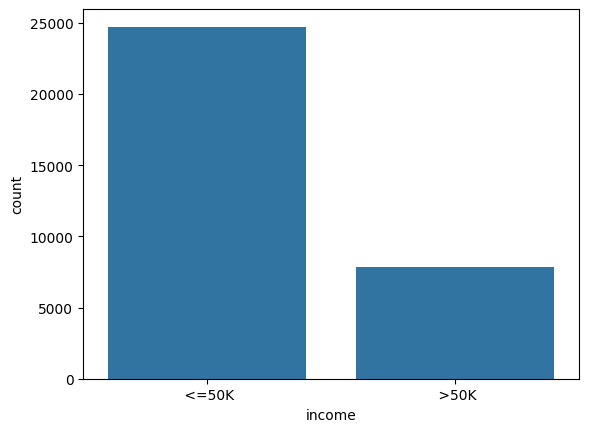

In [ ]:
sns.countplot(x = census_df['income']);

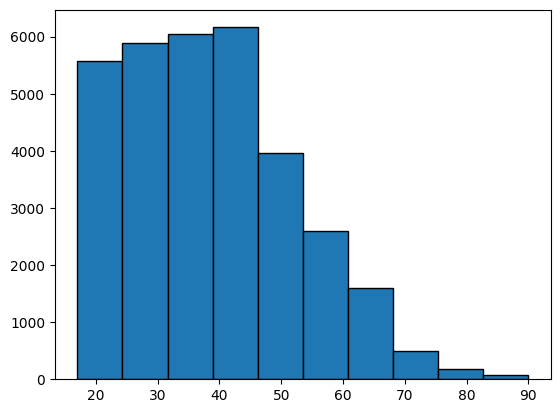

In [68]:
plt.hist(x = census_df['age'], edgecolor = 'black');

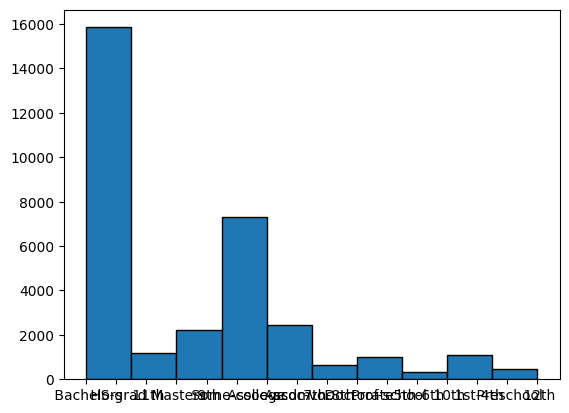

In [69]:
plt.hist(x = census_df['education'], edgecolor = 'black');

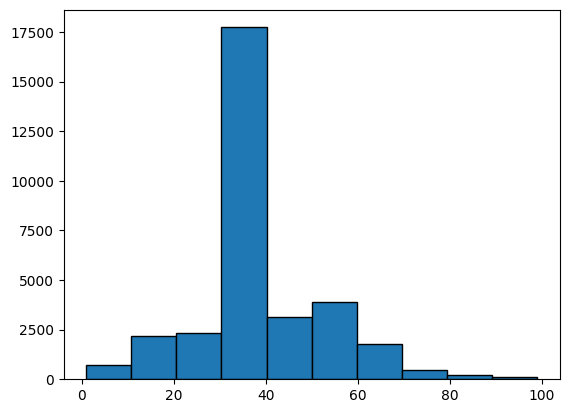

In [70]:
plt.hist(x = census_df['hour-per-week'], edgecolor = 'black');

In [71]:
arvore_categorica_profissao_idade = px.treemap(census_df, path = ['workclass', 'age'])
arvore_categorica_profissao_idade.show()

In [72]:
arvore_categorica_ocupacao_relacao_age = px.treemap(census_df, path = ['occupation', 'relationship', 'age'])
arvore_categorica_ocupacao_relacao_age.show()

In [73]:
parelelo_ocupacao_relacao = px.parallel_categories(census_df, dimensions = ['occupation', 'relationship'])
parelelo_ocupacao_relacao.show()

In [74]:
paralelo_profissao_ocupacao_renda = px.parallel_categories(census_df, dimensions = ['workclass', 'occupation', 'income'])
paralelo_profissao_ocupacao_renda.show()

In [75]:
parelelo_educacao_renda = px.parallel_categories(census_df, dimensions = ['education', 'income'])
parelelo_educacao_renda.show()

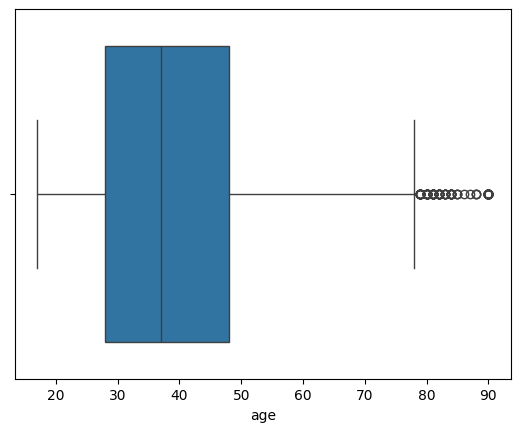

In [ ]:
sns.boxplot(x = census_df['age']);

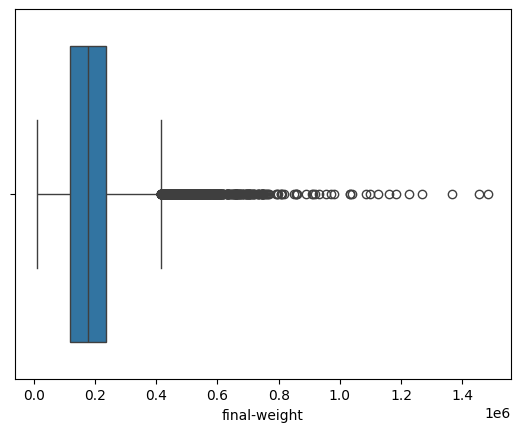

In [ ]:
sns.boxplot(x = census_df['final-weight']);

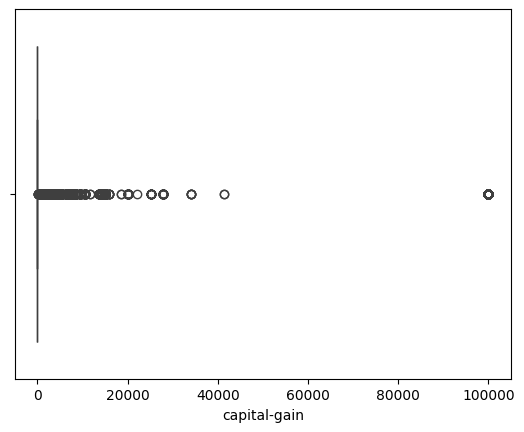

In [ ]:
sns.boxplot(x = census_df['capital-gain']);

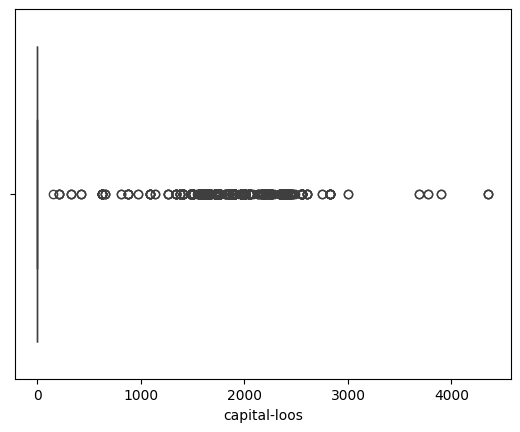

In [ ]:
sns.boxplot(x = census_df['capital-loos']);

# Tratamento das Anomalias

In [ ]:
census_df.mean()

TypeError: Could not convert [' State-gov Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Private Private State-gov Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Federal-gov Private Private Local-gov Private ? Private Private Local-gov Private Private Federal-gov State-gov Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Federal-gov Private Private State-gov Private Private Private Private Federal-gov Self-emp-inc Private Private Private Private Private Private ? Private Private Private Private Private Private Self-emp-inc ? Private Private Self-emp-not-inc Private Private Private Private ? Private Local-gov Private Private Private Private Private Private Local-gov Private Private Federal-gov Private Private Private Private Local-gov Local-gov Self-emp-not-inc Private Private Federal-gov Private Private Self-emp-not-inc Private Private Self-emp-inc ? Private Local-gov Private Private Private Self-emp-not-inc Private Private Private Self-emp-inc Local-gov Private Private Private Private Private State-gov Private Private Private Private ? Private Private Private Self-emp-not-inc Private Private Federal-gov Self-emp-not-inc Private Private Private Self-emp-inc Private Private Private Private Private Private Private Private ? Local-gov Private Private Private ? Private Private Self-emp-not-inc Private Private ? Private Self-emp-inc Private Self-emp-not-inc Private Federal-gov State-gov Private Local-gov Private State-gov Private Private State-gov Private Private Private Private Private Local-gov Private Private Private Federal-gov Private Self-emp-not-inc ? Private State-gov Private Private Local-gov Private Federal-gov Private Private Federal-gov Private Self-emp-not-inc Private ? Private Local-gov State-gov Private Private Private Self-emp-inc Private Local-gov Private Private Private Self-emp-inc Private Private Private Private Private Private ? Private Private Local-gov Private ? Self-emp-not-inc Private Private Private Private Private Private Private State-gov State-gov Private Local-gov Private Private Self-emp-not-inc State-gov ? Private Private Private Private Private Private Private Private Local-gov Local-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Self-emp-inc ? Private Private Private Private Private Self-emp-not-inc Local-gov Private Private Private Private Private Private Private Local-gov Private Private Private Federal-gov Private Private Private Private Private Private Local-gov Private Private Private Self-emp-inc ? Private Private Private Private Private Private Private Private Private Private Private Self-emp-inc Private Private ? Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Self-emp-not-inc ? Private Self-emp-not-inc Private Private Private Private Local-gov Private Private Private Private Private Private Private Private State-gov Private State-gov Self-emp-not-inc ? ? Private Private Private Private Private Local-gov ? Federal-gov Private Private Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Private Private Private Federal-gov Private State-gov Private Private Local-gov Private Private Self-emp-not-inc Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Self-emp-not-inc State-gov Private Private Private ? Private Self-emp-inc Private Private State-gov Private Private Private Private Self-emp-not-inc ? Private Local-gov Private Private Private State-gov Private Private Private Local-gov State-gov Private Private State-gov Private Private Private Federal-gov Private Self-emp-inc Local-gov ? ? Self-emp-not-inc Private Private Private Local-gov Local-gov Private Local-gov Private Private Federal-gov Private Private Private Private Private Private ? Private Self-emp-inc Private Private Self-emp-not-inc Private Private Private Private ? Private Local-gov Private Private Private Private Private Private Private Private Private ? Private Private Private Private Private Private Private Private Private Self-emp-not-inc State-gov Private ? Private ? Local-gov Local-gov Private Private Federal-gov Private Private Private Private Private Private Private ? Local-gov Local-gov Private Private Private Private Private Private Local-gov Private Private ? Private Private Private ? Private ? ? Private Self-emp-inc Private Local-gov Local-gov Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Local-gov Private Private Self-emp-inc ? Private Private Private Private Private Private Private Local-gov Private Private Self-emp-not-inc Self-emp-not-inc Private Private Federal-gov Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-inc Private Self-emp-not-inc Private Private Private Private Private Private Private ? Self-emp-not-inc Local-gov Self-emp-not-inc ? Private Private Private Self-emp-not-inc Private Private Private Private Self-emp-inc ? ? Private Private Private Private ? Self-emp-not-inc Private Private Private Private Private Local-gov Self-emp-not-inc Private Private Private Local-gov Private Private Private Private Local-gov Private Private Private Self-emp-not-inc Self-emp-inc Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Local-gov Private Private Self-emp-not-inc Private Private Private Self-emp-inc Self-emp-not-inc Private Private Private Private Private Self-emp-inc Local-gov Private ? State-gov Private Private Private State-gov Private State-gov ? Private Private Private Self-emp-not-inc Private Private Local-gov Private Private State-gov Private ? Private Federal-gov ? Self-emp-not-inc Private Self-emp-inc Private Private Private Private Self-emp-not-inc Local-gov Private Self-emp-not-inc Local-gov State-gov Private ? Local-gov Private Private Local-gov Private Private Private State-gov ? Private Private Private Private Local-gov Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Local-gov Private Private State-gov Private Private Private Private Private Local-gov Private Private Private Private Private Self-emp-not-inc Private Private Private Private ? Private Private State-gov Private Private Private Self-emp-not-inc Private Private Private Local-gov Private Private Private State-gov State-gov Private Self-emp-not-inc Private Private Private Private Local-gov Federal-gov Private Private Local-gov Local-gov Self-emp-inc Private Private State-gov Private Self-emp-not-inc Private Private Private Private Private Private Local-gov Private Private Private Private State-gov Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private ? ? Private Self-emp-inc ? Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private ? Private Private Private Private ? Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-inc ? Private Private Self-emp-not-inc ? Private Private Private Private Private Private Private Private Local-gov Private Private Local-gov Private Private Private Private Private Self-emp-not-inc Private State-gov Private Local-gov Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private ? Private Self-emp-inc Self-emp-not-inc Private ? Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Private Local-gov Self-emp-not-inc Private ? Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Private Self-emp-inc Self-emp-not-inc Private Private Private Private Private ? Private Private Private Private Private Private ? Local-gov Private Private Private Private Private Private Private Private Private Self-emp-inc Private Private Local-gov Private Self-emp-inc Private Self-emp-not-inc State-gov Private Private Private Private Private Self-emp-inc Local-gov Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-inc Self-emp-not-inc Private ? Private Private Private Private Private Private Private State-gov Private Private Private Private ? Self-emp-not-inc Local-gov Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Federal-gov Private Self-emp-inc Private Private State-gov Local-gov Private Private Private Self-emp-inc Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private ? Private Local-gov Private Private Private Private Private Private Private Self-emp-inc Private State-gov Private Private ? ? Self-emp-inc Private Private ? Private Private Private Private Private Private ? Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Self-emp-not-inc Private Local-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Local-gov Private Private State-gov Private Self-emp-not-inc Private Private Private State-gov Private Local-gov Self-emp-not-inc Local-gov Private Private Private Private Private Private Federal-gov Self-emp-not-inc Private Private Private Self-emp-not-inc Private ? Self-emp-inc Private ? Self-emp-inc Self-emp-inc Private Self-emp-not-inc Local-gov Private Private Private Private Self-emp-inc Private State-gov Private Private Self-emp-inc Private Private Local-gov Private Private Federal-gov State-gov Private Private Private Private Federal-gov Self-emp-not-inc Private Private ? Private Private ? Private Self-emp-not-inc Federal-gov Private Private Private Private Federal-gov Private Self-emp-not-inc Private Self-emp-inc Private Self-emp-inc Self-emp-inc Private Private ? Private State-gov Private Private State-gov Private Private Private Private Private Private Private Private Private ? Self-emp-not-inc Private Private Private Private Private Private ? Private State-gov Private Local-gov ? Private Private Private Private ? Federal-gov Private State-gov Local-gov Private Private Private Private Private Local-gov Local-gov Private Private Private Federal-gov Local-gov Private Private Private Self-emp-inc Local-gov Private ? Private Self-emp-inc Private Private Private Private ? Self-emp-not-inc ? Private Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Federal-gov Private Private Private Private Private Self-emp-not-inc Private Private Private Private State-gov Self-emp-not-inc Local-gov Private Self-emp-inc Private Private Private Self-emp-inc Self-emp-not-inc Private Federal-gov Self-emp-not-inc Private Private Private Federal-gov State-gov Private Private ? Private Self-emp-inc Private Private Self-emp-not-inc Private Local-gov Private Private Private Private Private Local-gov Private Private Private Private Private Federal-gov ? Private Private Private Self-emp-not-inc Private Private Private ? Self-emp-not-inc Private Private Private Private Private Private Local-gov Private Federal-gov Private Self-emp-inc Self-emp-not-inc Private Private Private Private Private Private Federal-gov Private ? Private Private Private Private ? State-gov Private Local-gov Private Private Private Private ? Private Private Private Private Private Private Private Private Private Private Private Private Private State-gov State-gov Private Private State-gov Private Private Self-emp-inc ? Private ? Private Self-emp-inc Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Federal-gov Self-emp-inc Private Federal-gov Private Private Private ? Private Self-emp-inc Local-gov Private Self-emp-not-inc Private Private Private Private Private Local-gov Private Self-emp-not-inc Private Private Self-emp-not-inc ? Private Private Local-gov Private Federal-gov Private Private Private Self-emp-not-inc Private Private Private Private Private Private ? Private Private Local-gov Private Private Private Self-emp-inc Private Private Self-emp-not-inc State-gov Private Private Private Private ? Private Private Private Federal-gov Private Self-emp-inc Private Private Private Private Private Private ? State-gov Self-emp-inc Private Federal-gov Self-emp-not-inc Private Self-emp-inc ? Private Private Self-emp-not-inc Private Self-emp-not-inc Self-emp-not-inc Private Self-emp-inc Private Private ? Self-emp-inc Private Private Private Private ? Self-emp-inc Self-emp-inc Private Private Private Private Federal-gov Private Private Private Private Private Private Local-gov State-gov Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Self-emp-inc Private Local-gov Private Private Private Federal-gov Private Private Private Private State-gov Private Self-emp-inc Private Private Self-emp-not-inc Private Self-emp-inc Private Private Self-emp-inc ? Private State-gov Private Private State-gov Private Self-emp-not-inc Self-emp-inc Self-emp-not-inc Self-emp-inc Private Private Private Private Local-gov Local-gov State-gov Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private State-gov Private Local-gov Local-gov ? Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private ? Private Federal-gov Private Private Private Local-gov ? ? Private Private Private ? Private Self-emp-not-inc State-gov Local-gov ? Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Local-gov ? Private Self-emp-not-inc Private Local-gov Private Private Private Private State-gov State-gov Private State-gov Private ? Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Local-gov Self-emp-not-inc Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private ? Private Local-gov State-gov Private Private Private Private Private Self-emp-inc Private Private Private Private State-gov Self-emp-not-inc Self-emp-inc Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Local-gov Private Private ? Private Private Self-emp-not-inc Local-gov Private Private Private Private ? Self-emp-inc Private Private Private Private Private Private Private Private Private ? Private Federal-gov Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private State-gov Private Private Private Private Private Private Private Private Private Private ? Private Private ? Private Private Private Federal-gov Private Private Private Private Private Private Private Private Private Local-gov Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Local-gov Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Self-emp-not-inc ? Private Private ? Private Private Private Private Private Private Private Private Private Private Private ? Private Private Private Local-gov ? Private Private Private Private Private Private Local-gov Local-gov Private Private Private Federal-gov Private Private Private Private Private Private Private Federal-gov Private Private Private Private Self-emp-inc Private State-gov Private Private Local-gov Self-emp-inc Private Private Private Private Private Private Local-gov Private Private State-gov Private Private Private ? Private Private Self-emp-not-inc Local-gov Private Private State-gov Private Local-gov State-gov Private Private Private Private Private Private Private Local-gov Private Private Private Federal-gov ? Private Private Self-emp-inc Private ? Private Private Self-emp-not-inc Local-gov State-gov Private Private Local-gov Private Private Local-gov Private Local-gov ? Private Federal-gov Private Self-emp-not-inc Private Private Private State-gov Private Private Private Self-emp-not-inc ? Private Private Private Self-emp-not-inc Federal-gov Local-gov Private Private Self-emp-not-inc Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Local-gov Private Private Private Private Private Without-pay Private Private Private Private Local-gov Self-emp-not-inc Private Private Private Private Self-emp-inc Private Self-emp-not-inc Local-gov Private Local-gov Local-gov Private Private Private Private ? Private Private Private Private Private Private Private ? Private Private Private Private Local-gov Private State-gov Local-gov Private Private Local-gov Private Local-gov Private Private State-gov State-gov Private Self-emp-not-inc Local-gov Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Self-emp-not-inc Private ? Private Private Private Private Private Private Self-emp-not-inc Local-gov Local-gov Federal-gov Private Private Self-emp-inc Private Self-emp-inc ? Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private State-gov Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Federal-gov Private Private Local-gov Private Private Private Private ? Private Private Federal-gov State-gov Private Self-emp-not-inc Private Private Private Private ? Private State-gov Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc ? Private Private Private Private Private Private Private Private Local-gov State-gov Private Private Private Private ? Private Local-gov Private Private Private Private Private Private Private Private ? Local-gov Local-gov Federal-gov Private Self-emp-not-inc Private Private Local-gov Private Private Private ? Private Self-emp-inc Private Federal-gov Private Private ? Private Private ? Private Private Local-gov Private Self-emp-not-inc State-gov Private Private Self-emp-inc Private ? Private Private Local-gov Private Private Private Private Private Private State-gov Private Local-gov ? Private Private Private Private Private Private Private ? Private Local-gov State-gov State-gov Local-gov Private Private Private Private Private Federal-gov Private Private Local-gov Private Local-gov Private Private Self-emp-not-inc Private Private State-gov Private Private Private ? Private Private ? Private Self-emp-inc Self-emp-inc Self-emp-not-inc Private Private Private ? ? Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Private Private Self-emp-not-inc Self-emp-not-inc Self-emp-inc Private Self-emp-not-inc Private Private Federal-gov Private Private Private Private Private Private Private Private Private Private Private Federal-gov Private Local-gov Private Private Private Private Self-emp-not-inc Local-gov ? Private Private ? Self-emp-not-inc Private Private Private Private Private Private State-gov ? Private Private State-gov Private Local-gov Private Private Self-emp-not-inc Private Private Private Private Private Private State-gov Private Private Federal-gov Private Private Private Federal-gov Private Self-emp-not-inc Local-gov Private Federal-gov Private State-gov Private Federal-gov Self-emp-inc Private Self-emp-not-inc Private Private Local-gov Private Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Local-gov State-gov ? Private Local-gov Private Private Private Local-gov Private Self-emp-not-inc Private Private ? Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Private Private Private State-gov Private Private Private Local-gov Private Private Private Self-emp-inc State-gov Self-emp-inc Private Local-gov Private ? Federal-gov Private Private ? Private Private Federal-gov Private Self-emp-not-inc Private Private Private Private Private Private Private ? Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Self-emp-not-inc Federal-gov Private Private Private Private ? Private ? Private ? ? Private Private Private Private Private Private Private Self-emp-inc Private Private State-gov Local-gov ? Private Private Private Private Private Private Private ? Private ? Private Private Self-emp-inc Self-emp-not-inc Private Private Local-gov Self-emp-inc Private Private Private Private Private Private ? Private Private State-gov Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Local-gov Self-emp-not-inc Private Private Self-emp-not-inc ? Private Private Self-emp-not-inc Private Private Self-emp-inc ? Private Self-emp-not-inc Private Self-emp-not-inc Private State-gov Private Local-gov State-gov State-gov Private Self-emp-inc Self-emp-not-inc Private Local-gov Private Private Private Private Private Local-gov Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Local-gov Self-emp-not-inc Private Self-emp-not-inc Private Private ? Private Private Private Private Self-emp-not-inc Federal-gov Private Private Self-emp-inc Self-emp-not-inc Private ? Private Self-emp-inc Private Private Self-emp-inc Private Self-emp-not-inc Private Private ? Private Self-emp-not-inc Private Private ? Private Private Private Private ? Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc ? Self-emp-not-inc Self-emp-not-inc Private Private Private Private ? Private Private Private Private Private Private Self-emp-not-inc ? Private Private Private Private Local-gov Private Self-emp-not-inc Federal-gov Private Private Local-gov Private Self-emp-not-inc Private Private Private Private Federal-gov Private Private Private Private ? Private Private Private Local-gov Private Private Private Private Private Private Private Private Local-gov State-gov Private Private Private Private Federal-gov Private Private ? State-gov Self-emp-not-inc Self-emp-inc ? ? Private Private Private Private Self-emp-inc Private ? Private Private Private Private Private Private Private ? Private Private Private Private Private Self-emp-not-inc Private ? Private Private Private Private Private Private Federal-gov State-gov Private Private Private ? Private Private State-gov Private Private State-gov Private Private Private Private Private Private Self-emp-inc Federal-gov Private Private Private Private Self-emp-not-inc Federal-gov Private Private Private Federal-gov Private ? Self-emp-inc ? State-gov State-gov Private ? Private Self-emp-not-inc Local-gov Self-emp-inc Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Federal-gov Private Private Private State-gov Private Private Private Private Self-emp-not-inc Private Private Private Private ? Private Private ? Private Private Private Local-gov Private Local-gov Private Local-gov Federal-gov Private State-gov Private ? Private Self-emp-not-inc Local-gov Private Private Private Private Private Self-emp-not-inc State-gov Self-emp-not-inc Private Federal-gov Private Private Private Local-gov Self-emp-not-inc Private Private Private Private Private Private Private Private State-gov Private Private Private Local-gov Private Private Private Local-gov Private Federal-gov Private Private Private Private Private Private Self-emp-inc Private Private Local-gov Private Private Private Private State-gov Private State-gov Private Private Private Private Private Private Private ? Self-emp-not-inc Private Self-emp-not-inc Private Local-gov Private Private Private ? ? Private Federal-gov Private Private Private Private Private Local-gov Federal-gov Private Private Private Private State-gov Private Self-emp-not-inc Private Private Private Private Private Federal-gov Private Private Private Private State-gov Self-emp-inc Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Private Private Private State-gov Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Federal-gov Private Private Local-gov Private Private State-gov Private Self-emp-not-inc Private Local-gov Private Self-emp-not-inc Self-emp-inc Private Private Private Self-emp-not-inc Private Private Private Local-gov State-gov Local-gov Self-emp-inc Private Private ? Private Private Private State-gov Self-emp-not-inc Private Private Private ? ? ? Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Self-emp-not-inc Local-gov Self-emp-not-inc State-gov Federal-gov Private Private Private Private Private Private Private Private Private Private ? Private Federal-gov Local-gov Private Private Private Private Private Private Private Private Private Local-gov Private Private Self-emp-inc Private Private Private Private Private Local-gov Private Self-emp-inc Private Private Private Local-gov Private Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Private Private ? Self-emp-not-inc ? Self-emp-not-inc Private Local-gov Private Private Private Self-emp-not-inc Private Private Private State-gov Local-gov Private Private ? Private Private Private Private ? Private Private Private Private Local-gov Private Self-emp-inc Private ? Private Self-emp-not-inc Private Private Private Private Self-emp-inc Private Self-emp-not-inc Private Private Private Private Private Private Private Private State-gov Private Private Self-emp-inc Self-emp-not-inc Private Private Local-gov Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Local-gov Private Private Private ? Private Private Private Private Private ? Private Private Private Private Self-emp-inc Private Private State-gov Private Self-emp-not-inc State-gov Federal-gov Private Private State-gov Private Private Private Private Self-emp-not-inc Private Self-emp-inc Private State-gov Private Private Private ? Private Private Local-gov Private Local-gov Self-emp-not-inc Local-gov State-gov ? Private Private Private Private Private Self-emp-not-inc Self-emp-inc Self-emp-inc Private Private Private Self-emp-not-inc Self-emp-not-inc Private Local-gov Private Private Private Private Private Private Private ? Private Local-gov Private Private Private Private ? Private Private Private Private Private State-gov Private State-gov Private Self-emp-inc Private Private Self-emp-not-inc Private Local-gov ? Self-emp-not-inc Private Private Self-emp-not-inc Self-emp-inc Local-gov Self-emp-inc ? Local-gov State-gov Private Private Self-emp-inc Private Private Private Private Local-gov State-gov Private Private Federal-gov Private Private Private Private Private Self-emp-inc Private Private ? Private Private Private Private Private Private State-gov Private Private Federal-gov Private ? Private Private Federal-gov Private Self-emp-not-inc Private Federal-gov Private Private Private Local-gov Private Private Private ? Private Private Self-emp-inc Private State-gov Self-emp-not-inc Federal-gov Private Private Private Private Local-gov Private Local-gov Private Private Local-gov Private Private Private Private Private Private State-gov Self-emp-not-inc State-gov Private Local-gov Private Private Private Self-emp-not-inc Self-emp-not-inc Local-gov Private Private Private State-gov Private Private Private Private Self-emp-inc Private Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Self-emp-inc Private Local-gov ? Private Private Private ? Private Federal-gov Private Private Private Private Private Private Self-emp-inc Local-gov Self-emp-not-inc Private Self-emp-not-inc Self-emp-not-inc Local-gov Private ? Private Private ? Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private ? Private Private Private Private Local-gov Private Private Self-emp-inc Self-emp-inc Private State-gov Private Local-gov Private Self-emp-not-inc ? Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-inc Private Private Private Private ? Private Federal-gov Private Private Local-gov Private Local-gov Private Federal-gov Private Private Local-gov Private Private Private Private Private Self-emp-inc State-gov Private Private ? Private Self-emp-not-inc Private Private Private ? Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Local-gov Federal-gov Private Private Private Private Private Private Private Private Private Private Private Private ? Private Private Private Private Private Private Private ? Private Private Local-gov Private Self-emp-inc Private Private Private Private Private Private Private ? Private Private Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Private Self-emp-not-inc Private Private ? Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Private ? Self-emp-not-inc Private Private Private Private Private Private Self-emp-inc State-gov Federal-gov Private Private Self-emp-not-inc Private ? Private Private Local-gov Private Private Private Private Federal-gov Private Private Private Self-emp-not-inc Private Local-gov Private State-gov Private Private State-gov Private Private Private Private Local-gov Private Self-emp-inc Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Private ? Self-emp-inc Private Private Private Private Private Private Private Self-emp-not-inc Local-gov Private Private State-gov ? Local-gov Private ? Private Private ? Private Private Private Self-emp-inc Private Local-gov Private Private Local-gov Private Private Private Private Private Local-gov Private Private Private Private State-gov Private Private Private Private Private Private ? Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Local-gov Private Private Private Private Private Private Private Self-emp-not-inc ? Private Local-gov Private Private Federal-gov Self-emp-not-inc Private Private Private Private Private Private Private Private ? Private Private Private Private State-gov Self-emp-not-inc Self-emp-inc Private Private Self-emp-not-inc Private Local-gov Local-gov Private Private Private Self-emp-not-inc Private Local-gov Private Private Private Private ? Self-emp-not-inc Private Local-gov Private Self-emp-inc Self-emp-inc Private Private Self-emp-not-inc Private Private Private Private Private Private Private ? ? State-gov Private Private State-gov Self-emp-inc ? Private Private Private Local-gov Private Self-emp-not-inc Private Private ? Local-gov Private Private ? Self-emp-not-inc ? Self-emp-inc Private ? Local-gov Private Private Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-inc Federal-gov Local-gov Private Private Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Local-gov ? Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private State-gov Private Private Private Private Federal-gov Private Private Private State-gov Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private ? Self-emp-not-inc Private Private Private Private Private Local-gov Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Private Private Local-gov Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private ? Local-gov Private Private Private Private Local-gov Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Local-gov Private Private Private Self-emp-inc Private ? Private Private Private Local-gov Private Federal-gov Private State-gov Private Private ? Private Private Private State-gov Private Private Private ? Self-emp-not-inc Private ? Private Private Private Private Private Private Self-emp-not-inc Local-gov Private Self-emp-not-inc Private ? Self-emp-inc Private Private Private Private Private Local-gov Local-gov Private Private State-gov Private Private ? Self-emp-inc ? Federal-gov Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Self-emp-inc Private Private Private Private Private Federal-gov Private Federal-gov Private Private Private Private Private Local-gov Private Private Private Private ? Federal-gov Private Local-gov Private Local-gov Private State-gov Private Private Private Local-gov Self-emp-inc Private Private Self-emp-not-inc Private ? Private Private Private Private Private Federal-gov Private Private Private Private Private ? Private Self-emp-inc Private Self-emp-not-inc Local-gov Private Private Federal-gov ? Self-emp-inc State-gov Private Private Private Private Private ? Private Private Private Private Private Private Private Private Private Local-gov Private ? State-gov Private Private Private Self-emp-not-inc Private Private Local-gov Private Private Private Private Private Private Self-emp-inc Private Federal-gov Private Private Self-emp-not-inc Local-gov Private Private ? Self-emp-not-inc Private Federal-gov Private Private Federal-gov Federal-gov ? State-gov ? Local-gov Private Private ? ? Private Private Private Local-gov Private Private Self-emp-inc Private Private Private Private Private Private ? Private Private Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Local-gov Private Private Private State-gov Private Private Private Local-gov Private ? Private Private Private Private ? Private ? ? Federal-gov Private Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private ? Private Private Private Private Private ? State-gov Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private ? Private Private State-gov Private Private Private Private Private Private ? State-gov Private Private Private Private State-gov Private Private Private Private Private Private ? Private Private Private Private Private Local-gov Private Private Private Private Local-gov Private Private ? ? Self-emp-inc Private ? Private Private Private Private Private Self-emp-not-inc Private Self-emp-inc Local-gov Private Private Private Private Self-emp-not-inc Private Private Private Private State-gov Federal-gov Private Local-gov Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Self-emp-inc Private Private Private Private Private Private Private Private Self-emp-inc Private Self-emp-not-inc Private Private Private Private Local-gov ? Private Private Private Self-emp-not-inc Private Private Private ? Private Private Self-emp-not-inc Private Private ? Private Private Private ? Private Local-gov Local-gov Private Private Private Local-gov Private Private Private Private Local-gov Private Self-emp-inc Private Private Private Private ? Private Private State-gov Private Local-gov Private Private Private Private Private Private Private Private Private Private Local-gov Self-emp-not-inc Self-emp-not-inc Private Private Private Private Self-emp-inc Private Private Private Private Private Self-emp-not-inc Private State-gov Private State-gov Private Private Private Private ? Self-emp-not-inc Private State-gov State-gov ? Self-emp-inc Private ? Private Private Private Private Private Self-emp-not-inc Private State-gov Private Private Private Local-gov Private ? Self-emp-not-inc Local-gov Private Private ? Self-emp-inc Local-gov Private Private Local-gov Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-inc Federal-gov Private Private ? Private Private Private Self-emp-not-inc Private Private Private Local-gov Private Private Private ? Private Self-emp-not-inc ? Private ? Private Private Private Private Private Private Private Self-emp-inc Private Local-gov Private Local-gov Private Self-emp-not-inc Private Private Private State-gov Self-emp-not-inc Private Private Private ? Private Private Private Self-emp-not-inc Federal-gov Local-gov Private Private Private Federal-gov Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Federal-gov Private ? Private Local-gov Private Private Private Private Private Private Federal-gov Private Private Private Private Private Private ? Private Self-emp-not-inc Private Private Private Private Private Private Local-gov Private ? Private Private Private Private Private Private Private Private Self-emp-not-inc ? Private Self-emp-not-inc Private Private Private ? Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Local-gov Self-emp-not-inc Private Self-emp-inc Local-gov Private Private ? Self-emp-inc Federal-gov Private Private Private Local-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Private Federal-gov Private Federal-gov Private Federal-gov Private Private Private Private Federal-gov Private Private Private Private Private ? Private Private Private Private Self-emp-not-inc Private Private Private Private Local-gov Private Self-emp-not-inc Private Private Private Private Federal-gov Private Private Self-emp-inc Self-emp-not-inc Private Private ? Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Self-emp-inc Private ? Private Private Private ? Private Self-emp-not-inc Private Self-emp-inc Private Private Private Private ? Private Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-not-inc State-gov Private ? Private ? Private Private Self-emp-inc Self-emp-inc Private Private Private Local-gov Private Private Federal-gov Private Self-emp-inc Private Self-emp-inc Private Private Self-emp-not-inc State-gov State-gov Self-emp-not-inc State-gov ? Private Private Private ? Private Private Private Private Private Private Private Private Private Self-emp-not-inc State-gov Private State-gov Private Federal-gov Private Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Private State-gov Self-emp-not-inc Private Private ? ? Private Private Private Local-gov Private Private Private Private Self-emp-inc Private Private Private Private Federal-gov Federal-gov Private Private Private ? Private Private Private Local-gov Private Private Private Private Self-emp-not-inc Private Local-gov ? Private Self-emp-not-inc Private Private Local-gov Private Private State-gov Private Private Private Private Private Private Self-emp-not-inc Private ? Private Self-emp-not-inc State-gov Private ? Private Private Private Private State-gov Self-emp-not-inc Private Local-gov Private Private Private Private Private Local-gov Private Private Private Private Private Private Self-emp-inc Private Private State-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Private ? Private Private Private Self-emp-not-inc Private State-gov Self-emp-inc Private Private Private Private Private Private ? ? Private Local-gov Private Private Private ? Self-emp-not-inc Private Private Federal-gov Private State-gov Private ? Private Private Private Private Self-emp-not-inc ? Private Private Private Private Private Private Private Private Private Self-emp-not-inc State-gov Local-gov Self-emp-not-inc Self-emp-not-inc Private Private Local-gov Private Private Private Private Private Private Private Private Private Private ? Local-gov Private Private Private Private Private Local-gov Private Private Private Private Private Private Local-gov Private Private Private Private Self-emp-not-inc Private Private Private State-gov Private Private Self-emp-not-inc Private Federal-gov Private ? Local-gov Private ? Private Private Private Self-emp-not-inc Private Private Local-gov Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Federal-gov Private Federal-gov Private Private State-gov Private Private Private Self-emp-not-inc ? Private Private Self-emp-not-inc Private Private Private State-gov ? Local-gov Private Private Private Private Private Private Private State-gov Federal-gov Private Private Local-gov Private Private ? Private Private Private Local-gov Self-emp-inc Private ? Private Self-emp-inc ? Self-emp-not-inc Federal-gov Private Private Private Federal-gov Private Federal-gov Self-emp-not-inc Private ? Private Federal-gov State-gov Private Local-gov Local-gov Self-emp-not-inc Private Self-emp-not-inc Private Private ? Private Private Self-emp-not-inc ? Private Private Private Private Private Private Federal-gov Self-emp-not-inc Private Private Private Private Private Private Self-emp-inc Local-gov Local-gov Private ? Private Private Private Federal-gov Private Local-gov State-gov Private Private Private ? Private Private Local-gov Private Private ? Private Private Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Private ? Federal-gov Private ? Private Private Federal-gov Private Federal-gov Private Federal-gov Private Private Private Self-emp-not-inc Self-emp-not-inc Private Local-gov Private Private Private Private Self-emp-inc Private Self-emp-not-inc Local-gov Private Private State-gov Private State-gov Private Private Private Private Self-emp-not-inc Private Private Private Private Local-gov Local-gov Federal-gov Private State-gov Private Private Private Private ? Self-emp-inc Private Federal-gov Private Private Self-emp-not-inc Private Private Private Private Self-emp-inc Private Private Self-emp-not-inc Local-gov Private Local-gov Private Private Private Private Private Private Local-gov Local-gov Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Local-gov Private Private ? Private Private State-gov Self-emp-not-inc Local-gov Private Private State-gov Private Federal-gov Federal-gov Private Private State-gov Private Self-emp-inc ? Private Private Local-gov Private Private Federal-gov Private Self-emp-inc Private Self-emp-inc Private Private Local-gov Private Private ? Private Local-gov Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private ? State-gov Private Private Private Private Self-emp-not-inc Private Private Private ? Private ? Private Private Private Federal-gov Local-gov Self-emp-inc Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-inc Private Local-gov Self-emp-inc Private Private Private Private Private Private Self-emp-not-inc Private Private State-gov Self-emp-not-inc State-gov Local-gov Private Private Local-gov Private Federal-gov Private ? Private Private Private Federal-gov Self-emp-inc Local-gov Federal-gov Private Private Private Self-emp-not-inc Private Self-emp-inc Self-emp-not-inc Private Private Private Private Federal-gov State-gov Private Private State-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Local-gov Private State-gov Private State-gov Private Private Private Private Private Private ? Self-emp-not-inc Private Private Local-gov Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Federal-gov Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Private Private State-gov Local-gov Private Self-emp-inc Local-gov Private State-gov Private Self-emp-not-inc Private Private Private Private Self-emp-inc Private Private Private Private Federal-gov Self-emp-not-inc Private Private Private Private State-gov Private Private Private Local-gov Private Private Private State-gov Private Self-emp-not-inc Private State-gov Private Local-gov Private Private Private Self-emp-inc Federal-gov State-gov Private Private Private Private Private Private Private ? Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc ? Private Private Private Local-gov Private Local-gov Private Private Private Federal-gov Local-gov Self-emp-not-inc Self-emp-not-inc Private Private ? Private Private Self-emp-not-inc Private Private Local-gov Local-gov Private Private Private State-gov Private Private Self-emp-not-inc Private Private Private Self-emp-inc Private Private ? Private Local-gov State-gov Private ? Private Federal-gov Self-emp-not-inc Local-gov Private Self-emp-not-inc Private Private ? Private ? Private Private Self-emp-not-inc Private ? Private Private Private Private Self-emp-inc Private Private Federal-gov Private Private Private Private Local-gov ? Private State-gov Private Local-gov Self-emp-inc Self-emp-inc Private Private Private Federal-gov Self-emp-not-inc Private Private State-gov Private Private Federal-gov Private Private Self-emp-not-inc Self-emp-not-inc Private Local-gov Private Local-gov Private ? Private Private Private Private Private Private Private Private Private Federal-gov Self-emp-not-inc Private State-gov Private Private Private Private Private Private Private Private Private Private Self-emp-inc State-gov Private Private Private Private Self-emp-inc Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc ? Private ? Private Private Self-emp-not-inc Private Private ? Private Private Federal-gov Self-emp-not-inc ? Private Private Private Self-emp-not-inc Private Self-emp-not-inc Self-emp-not-inc Private Private Private Local-gov Private ? ? Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Private ? Private Private Private ? Private ? Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Local-gov Never-worked Private Self-emp-not-inc Self-emp-not-inc Local-gov Private Private Self-emp-inc Private Local-gov Private Private Private Private Federal-gov Private Private Private Private Private Private Private ? ? Private State-gov Private Private Self-emp-not-inc Private Private Private State-gov State-gov Private Private Self-emp-not-inc Private Private Self-emp-inc Private Local-gov Private Private Private Private Private Self-emp-not-inc Private Private Local-gov Private Local-gov Private Private Private Private Private Private Private Self-emp-not-inc Private State-gov Private Private Private State-gov Private Private Private Private Private State-gov Private Private Private Federal-gov Private Private ? Private Private Private Private Private ? Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-inc Private Private Self-emp-inc Private Self-emp-not-inc ? Private Private Local-gov Private Private State-gov Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Self-emp-inc Private ? Private Private Private Private Federal-gov Private Private Private Private Private Private Private Private Private Private Private State-gov Private Private Private Private Local-gov State-gov Self-emp-not-inc Private Local-gov Private Private Private Private Private Private Private ? Private Local-gov ? State-gov Self-emp-not-inc State-gov Private Private Private Local-gov State-gov State-gov Self-emp-inc Private Private Self-emp-inc Private Local-gov Local-gov Self-emp-not-inc Private ? Local-gov Private Local-gov Private Private Private Self-emp-inc Private Private Private Private Private ? Local-gov Private Private ? Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-inc Private ? Private Self-emp-not-inc Private Private Private Private Private Private Private Private Local-gov Private Private Private Local-gov Self-emp-inc Private Private Private Local-gov Private State-gov Private Private Private Private Private Private Private Self-emp-inc Private Private ? Private Self-emp-not-inc Private Local-gov Private Private Private Private ? Private Private State-gov Private Private Private Private Private Private Self-emp-not-inc Private Private Private Federal-gov Private State-gov Self-emp-not-inc Private Private ? Private Private Private Private Private Private State-gov Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private State-gov Private Private Private ? Private Private Private Private Private Private State-gov ? Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Self-emp-not-inc Private Local-gov Self-emp-not-inc Federal-gov Private Private State-gov Self-emp-not-inc Private State-gov Private Private Self-emp-inc Private ? Private Private Private Private Private Private Private Local-gov Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Private Private ? Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Local-gov ? Private Federal-gov Private Private Private Private Self-emp-inc Local-gov Private Private Private Private Private Private Private Private Federal-gov Private Private Private State-gov ? Private Private Private Self-emp-inc Local-gov Private Private Federal-gov Private Self-emp-inc Private Private Private Private ? Self-emp-not-inc Private Private Private ? Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Self-emp-inc Self-emp-not-inc Private Private Private Private Private Private ? Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private ? Private Self-emp-not-inc Private Private Private Private Private Self-emp-inc Private Private Private Private Self-emp-not-inc Private Private Private Private State-gov Local-gov Self-emp-not-inc Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Self-emp-inc Self-emp-inc Private State-gov Local-gov Private Private Private Private Private Local-gov Private Private Private Federal-gov Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Private Local-gov Private ? Private Self-emp-inc Private Private ? Private Private Private Self-emp-not-inc Private Private ? Self-emp-not-inc Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Local-gov Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private State-gov Private Self-emp-not-inc Self-emp-not-inc Self-emp-not-inc Private Self-emp-inc Private Private Private Private Private Private Private Private ? Private Self-emp-inc Private Local-gov Private ? Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-inc Private ? Private Self-emp-not-inc Private Self-emp-not-inc Self-emp-not-inc Private Local-gov Private Private Private Private Local-gov Private Private Self-emp-not-inc Self-emp-inc Private Private Local-gov Self-emp-not-inc Private Self-emp-not-inc Private ? Private Self-emp-not-inc Self-emp-inc Private Private Self-emp-not-inc Private Private Private Private Private ? Federal-gov Private Private Self-emp-inc Private Private Private ? Private Private Private State-gov Self-emp-inc Self-emp-not-inc Local-gov Private Private Private Self-emp-not-inc Self-emp-not-inc Private Local-gov Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private State-gov Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Local-gov Self-emp-inc Private Private Private Private Private Private Private Private Private Private Private Self-emp-inc Local-gov Private Private Private Private Federal-gov Local-gov Private Private Self-emp-inc Private Private Private Private Private Private ? Private Federal-gov State-gov Private Private Private Private Private Private Private Local-gov Local-gov Private Private Self-emp-inc Self-emp-not-inc Private Self-emp-inc Self-emp-inc Private Local-gov Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private ? Private Self-emp-not-inc Private Local-gov Private State-gov Private Private Private Private State-gov Private Private Private State-gov Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Federal-gov Local-gov Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Self-emp-inc Self-emp-not-inc Private Private Private Self-emp-not-inc Private Local-gov Private Self-emp-not-inc Private Private Private Private ? Self-emp-not-inc Private Self-emp-inc Private Private Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Local-gov Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-not-inc Private Local-gov Local-gov Self-emp-not-inc Private Private Private Private ? ? Private Private Private Self-emp-not-inc Private Private Private Private Private Self-emp-inc Private Local-gov Private Private Self-emp-not-inc Self-emp-not-inc Private Private State-gov Private Private Private Private Private Private Private Private Private ? State-gov State-gov Private Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Local-gov Private Local-gov Private Private Private ? Private Federal-gov Self-emp-inc Private Private Private Local-gov Private ? Federal-gov Private Private Private Self-emp-not-inc Private Local-gov State-gov Private Private Private Local-gov Private Local-gov Private Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Self-emp-inc Private Private Private Self-emp-inc Self-emp-inc Private Self-emp-inc Private Private Private Private Self-emp-not-inc State-gov State-gov Private Private Federal-gov Private Private Private Self-emp-not-inc Federal-gov Private Private Private Self-emp-inc Private Private ? Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Federal-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Private State-gov Federal-gov ? Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc ? Private Private State-gov Private Federal-gov Private Private Private Private Private Private Private Local-gov Private Private Private Self-emp-inc Private Private Private State-gov Private Local-gov Self-emp-not-inc Private Private Private Local-gov Private Private Private Private Local-gov Self-emp-not-inc Private Federal-gov Self-emp-inc Local-gov Private Private Private Private State-gov Self-emp-inc Self-emp-not-inc Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Federal-gov Private Private ? Private Self-emp-not-inc Private Private Self-emp-inc Private Private Private Self-emp-not-inc Private ? Private Private Self-emp-inc Private Private Private Self-emp-not-inc Private Private Private Private Private State-gov Private ? Private Self-emp-not-inc Private Private Private ? Self-emp-not-inc Private Private Local-gov Private State-gov ? Private Private Private Local-gov Local-gov Private Private Local-gov ? Self-emp-not-inc State-gov Private Private Private ? Private Self-emp-not-inc Self-emp-not-inc Private Private Self-emp-not-inc Private Private Self-emp-inc Private Private Private Local-gov Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-inc Private Private Private Self-emp-not-inc ? Private Private Private Self-emp-inc Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Local-gov Private Private Private Private Self-emp-not-inc Private Private State-gov Private Self-emp-inc Private Private Private Self-emp-inc Private Private Private Private Private Private Private Private Private Private Private Federal-gov Self-emp-not-inc Self-emp-inc ? Private Private Private Private Self-emp-not-inc ? Federal-gov State-gov Private Private Private Private Private Private Private Private Private Local-gov Private Private Federal-gov Private ? State-gov Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Private ? Private Private Private Private Self-emp-not-inc Private Private Private State-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Private Local-gov Self-emp-inc Private Private Local-gov Self-emp-inc Private State-gov Private Private Private Private Private Self-emp-inc Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Local-gov Private Private ? ? State-gov Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Self-emp-not-inc Private Private Self-emp-inc Private Self-emp-not-inc Private ? Private Private Private Local-gov Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private ? Private Private Local-gov Private Private Private Private Private Private Private State-gov Private Private Private Local-gov State-gov Private Private Local-gov Private Private Private Private Private Private Federal-gov Private Private Private State-gov Private ? State-gov Federal-gov Private Self-emp-inc Self-emp-not-inc Self-emp-not-inc Private Private Private Local-gov Private Private Private Private Private Private Private Local-gov Private Private State-gov Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private ? Local-gov Private State-gov Private Private Private Self-emp-not-inc Private Private Federal-gov Private Self-emp-not-inc Private Private Local-gov Private Private Private Private Private Private Private Private Self-emp-inc Self-emp-not-inc ? Local-gov ? Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Local-gov ? Private Federal-gov Private State-gov Private Private Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private ? Private Self-emp-not-inc Private Private Private Private State-gov Private Private Private Local-gov Private Self-emp-not-inc Private Self-emp-not-inc Private Local-gov ? Self-emp-inc Private Private Private Private State-gov Private Private Private Private Private Private Private Self-emp-not-inc Private Local-gov Private Local-gov Private Private ? Private Private Private Private Private Federal-gov Self-emp-inc Private Private Private Private Self-emp-inc ? Private Private Private Self-emp-inc Private Local-gov Private Private Federal-gov Private Private Private Private Private Local-gov Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Self-emp-inc Private Federal-gov Private Self-emp-not-inc Self-emp-not-inc Private Local-gov Private Private Private Private State-gov Private Private Private Private Private Local-gov Private ? Local-gov ? Private Private Private Private Private Local-gov State-gov Private Self-emp-not-inc State-gov Private Private Private Private Private ? Private Private Self-emp-inc Private Private Private Private State-gov Local-gov State-gov Federal-gov Private Self-emp-not-inc Private Private ? Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Federal-gov Private Private Private Private Self-emp-inc Private ? Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Self-emp-not-inc Private Federal-gov Private Federal-gov Private Self-emp-not-inc Private Local-gov Private Private Private Private Private Private Private Private ? Private Private Federal-gov Self-emp-not-inc Private Private Private Local-gov Local-gov Self-emp-inc Private Private Self-emp-inc Private Self-emp-inc Private Private Private Federal-gov Self-emp-not-inc Private Self-emp-not-inc Private Private ? Private ? Private Private Private ? Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Self-emp-not-inc Local-gov Self-emp-not-inc Private Private Self-emp-not-inc Private Private Self-emp-not-inc State-gov Self-emp-not-inc Private Private Private Private Private ? Private Private Local-gov Private Private Private Self-emp-inc Private Private Private Private Private ? Private Private Private Private Private Private Private Private Private Private Private Private Federal-gov Private ? State-gov Private ? Private Private Private Private Private ? Private Self-emp-not-inc Self-emp-inc Private Private Private Private Self-emp-not-inc Private Private Private Local-gov Private Self-emp-not-inc Private Private Private Private Private ? Local-gov Self-emp-not-inc Private Private Local-gov Private Private Self-emp-not-inc Self-emp-not-inc Self-emp-not-inc Private Private Private Self-emp-inc Private Private Private Local-gov Private Private State-gov Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private State-gov State-gov Private Private Private Private Private Private Private Local-gov Federal-gov Federal-gov Private Private Private Private Private Private Private Private Private State-gov Private Self-emp-not-inc State-gov Private Private Private Private Federal-gov Private Private Private Private Private Private Private Private Local-gov Private Self-emp-inc State-gov Private Local-gov Private Private Federal-gov Private Private Self-emp-inc Federal-gov State-gov Self-emp-inc Private Private Local-gov State-gov ? Private Private Private Private State-gov Private Self-emp-not-inc Private Private ? Private Private Private Private Local-gov Private Private Private Private Private Local-gov Private Private Private Private Self-emp-inc Private Private State-gov Private ? Private Private State-gov State-gov State-gov Private Private State-gov Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc ? Local-gov Private Private Private Private Private Local-gov State-gov Private Local-gov Private ? Private Private Self-emp-inc Local-gov Private Private Local-gov Private Private Private Private Private Self-emp-not-inc Private Federal-gov Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Local-gov Private Private Private Federal-gov Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Local-gov Private Self-emp-inc Self-emp-not-inc Private Self-emp-inc Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Self-emp-inc Private Private State-gov Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Local-gov Private Private Private ? Private Local-gov Local-gov Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private ? Private Private Local-gov Federal-gov Local-gov ? Local-gov Private Private Private Private Private Private Private ? Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Local-gov Private Local-gov Private Private Private Private Self-emp-not-inc Private State-gov Private Self-emp-inc Private Private Self-emp-not-inc Self-emp-not-inc Private Local-gov Private Private Private Self-emp-not-inc Private Private ? Private Private Local-gov Private Private Federal-gov Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Local-gov Private Federal-gov Private Private Private Private Private Self-emp-not-inc Private Private Local-gov Private Private Private Private Private Local-gov Private State-gov Private Self-emp-not-inc ? Private Self-emp-inc Self-emp-not-inc Self-emp-inc ? ? Private Private Private Private Private Private Private Private Private Private Private Private Private State-gov Self-emp-not-inc ? Private Private ? Private Private Self-emp-not-inc Private ? Private Private Private Self-emp-not-inc Local-gov Private Private Private State-gov Private Private Private State-gov Private Private Private Private Self-emp-inc Private Local-gov Private Self-emp-not-inc Private Private Private Private ? Private Local-gov Private Federal-gov Private Private Private Private Private Private Private Private Federal-gov Private Private Private Private Private Private Private Private Private State-gov Private Private Local-gov Private Private Private Self-emp-inc Private Self-emp-not-inc Private Private Private Private Private Private Private Federal-gov Private Private Federal-gov Private Private Self-emp-inc Private Private Private Private Self-emp-not-inc ? Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Local-gov Private Private Self-emp-inc Private ? Private Private Local-gov Private Self-emp-not-inc Self-emp-not-inc Private Private Local-gov Self-emp-not-inc Self-emp-inc Private Private Private Federal-gov Private Private Private State-gov Private Private Private Private Private Private Private Local-gov Self-emp-not-inc Private Private Local-gov Private Self-emp-not-inc Private Private Private Private Private Private Private ? Private Private Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private ? Private Private Private Private Private ? Private Private Local-gov ? Self-emp-not-inc Private Private Private Private Private Private Private Private Federal-gov Private Private ? Private Private Private Private Local-gov Private State-gov Private Private ? Private Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-not-inc ? Private Local-gov ? Private Private Private Private Private State-gov Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-inc Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private ? Private Private Private Private Private Private Private Private Private Private ? Self-emp-not-inc Private Federal-gov Private Private Private Private Private Local-gov Private Private Private ? Private Private Self-emp-not-inc Local-gov Private Private Private Private Local-gov Private Private Local-gov Private Self-emp-not-inc Self-emp-not-inc State-gov Local-gov Local-gov Self-emp-not-inc Local-gov Private Private ? Private Private Self-emp-not-inc Self-emp-not-inc Private State-gov Federal-gov Private Private ? Private Self-emp-not-inc Federal-gov ? Private Local-gov Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Local-gov Private Private Private ? Private Private Private Self-emp-inc ? Self-emp-inc Private Private Private Private Self-emp-not-inc Private Local-gov Federal-gov Private Private Private Private Private Private Private Private Private State-gov Private Private Local-gov Private Private Private Private Private Private Private Private State-gov Private Private Private Private Private ? Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Private ? Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc ? Private Self-emp-not-inc Self-emp-not-inc Private Private ? Private Private Federal-gov Private Private Private Private Private Federal-gov Private Private Local-gov Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc ? Private Private ? Self-emp-not-inc Private Private Private ? Private Self-emp-inc State-gov Private Private Private Private Private Private Private Private Private Private State-gov ? Private Private Self-emp-not-inc Private Private Private Private Private Private Federal-gov Private Self-emp-inc Private Private Private Self-emp-not-inc Self-emp-inc Private Private ? Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Federal-gov Private ? Private Private Private ? Federal-gov Private Private Private Self-emp-not-inc Private Federal-gov Private Self-emp-not-inc Private Private ? Private Private Self-emp-not-inc Private State-gov State-gov Self-emp-inc State-gov Private Private Private Private Private Private Private ? Private Private ? Federal-gov Private Private Private Private State-gov Private ? Private ? Private ? Private Self-emp-not-inc Local-gov Private Self-emp-inc Private Federal-gov Private Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Private Private Private Local-gov Private Private State-gov ? Private Private Self-emp-not-inc Self-emp-not-inc Local-gov Private Private Local-gov Private Private Private Private ? Private Private Private Private Private Private Self-emp-not-inc Private Local-gov Private Local-gov Local-gov Private Private Private Private Private Private Private Local-gov ? Private Private State-gov Private Private Self-emp-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private ? Private Local-gov Self-emp-not-inc ? Private Private Private Private Federal-gov Private Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private ? Private Federal-gov Self-emp-not-inc Self-emp-inc Private State-gov Private Self-emp-not-inc Private Local-gov State-gov Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc ? Private Private Private Self-emp-inc Federal-gov Local-gov Private Federal-gov Private State-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Local-gov Private Private Self-emp-not-inc Private Private Private Private Private Private Private Local-gov State-gov Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Federal-gov Private Private ? Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private State-gov Private Local-gov Private Federal-gov Private Private Private ? Private Private State-gov Private State-gov Private Private Private Private Private Private Private State-gov Private Private Private Private Local-gov Private Private Private Private Private Private Local-gov Private State-gov Private Private Private Private Private Self-emp-not-inc Private Local-gov Private Private Private Self-emp-inc Private Private ? Private Private Private Private Private Self-emp-inc Private Private Self-emp-not-inc Private Private Private Private Private Private Federal-gov Private Private State-gov Private Private Private ? State-gov Private Local-gov Local-gov Private Self-emp-inc Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-inc Private State-gov Private Private Private Private ? Private Private Private Private Private Private Private Private Private Private Private Private Private Private State-gov Private ? ? Private Private Private Self-emp-inc Private Federal-gov Private Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private State-gov Private State-gov Private Private Local-gov Private ? Private Self-emp-not-inc Private Private Private State-gov Private Private Private Private Private State-gov Private Private Private Private Private Self-emp-inc Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private ? Private Private Private Private Private Local-gov Private Local-gov State-gov Self-emp-inc Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Local-gov Local-gov Private ? State-gov Private Private Self-emp-inc Private Private Private Local-gov Local-gov State-gov ? Private Private Private Private Private Private Private Self-emp-not-inc Private Private Federal-gov Private Private Private Private Federal-gov Private Federal-gov Private Private Private ? Local-gov Private Private Private Private Private Private Private Federal-gov Self-emp-inc Local-gov Self-emp-not-inc Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Private Federal-gov Private State-gov Private Self-emp-not-inc Private Local-gov Local-gov Private Self-emp-inc ? Private Local-gov Self-emp-not-inc Private State-gov Private Private Private Private Federal-gov Federal-gov Private Private Private Private Private Private Private State-gov Private Private Private Private Private Self-emp-not-inc Private Private Private ? Private Private Private Private State-gov Private ? Private Self-emp-not-inc Private Private Private Private Local-gov Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private State-gov Federal-gov Private Self-emp-not-inc Private Private Private Private State-gov Private ? Self-emp-not-inc Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Local-gov ? Private ? Private Private Self-emp-not-inc Self-emp-not-inc Local-gov State-gov Local-gov Private Private Private Local-gov Private Private Local-gov Private Self-emp-inc Self-emp-not-inc Private Private Private Private Private State-gov Self-emp-not-inc Private Private State-gov Private Private Self-emp-inc Local-gov Private Private Private State-gov Private Private Private Private Private Private Private State-gov Private Self-emp-not-inc Private Self-emp-inc Private State-gov Local-gov Federal-gov Private Private Private ? Private Self-emp-not-inc Local-gov Private Private Local-gov Private ? Private Private Private State-gov Private Private ? State-gov Local-gov Self-emp-not-inc Federal-gov ? Local-gov Private Private State-gov Private Private Self-emp-inc Private Private Private Private Private ? Private Private Private Self-emp-not-inc Private ? Private Private Private Private Private Private ? Private Private Private Private Local-gov Private Private Local-gov Private ? Private Local-gov Local-gov Private Federal-gov Private Private Private Private Private Private Private State-gov Private Private Self-emp-not-inc ? Private Private Self-emp-not-inc Private Self-emp-inc Private Self-emp-not-inc Self-emp-inc Private State-gov Private Local-gov Private Local-gov State-gov Private Private State-gov Local-gov Private Private Private Private Private ? Private Self-emp-not-inc Private Private Self-emp-not-inc ? Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Federal-gov Private Private Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private State-gov Private Self-emp-not-inc Private Private Private Private Local-gov Private Private Private Private Private Self-emp-inc Private Private Private Private Self-emp-inc Federal-gov Private Self-emp-not-inc Private ? Private Private Private Private Private Private Private Private Private Self-emp-inc Private ? Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private ? Private Private Private Private Private Private Private Private ? Private Private Private Private ? Self-emp-not-inc Self-emp-not-inc Self-emp-inc Self-emp-not-inc Self-emp-not-inc Local-gov Self-emp-not-inc Private ? Private Private Private Local-gov Private Private Private Private Local-gov Private Private Private Private Self-emp-inc Private Self-emp-not-inc Self-emp-not-inc Private Self-emp-inc Private Private ? Private Private Private Private Private ? Private Private Private Private ? Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-inc Private Private Private State-gov Private Local-gov Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private ? Private ? Private Local-gov Private Private State-gov Private Private Private Private Private Private Private Private Private Federal-gov Private Private Private Private Private Private Private Private Private Private Private Private State-gov Private Private Private Self-emp-not-inc State-gov Private Private Private Private Private State-gov Private Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-inc Self-emp-not-inc Private State-gov Private Private Private Private Private Private Private Private Private Private Self-emp-inc Local-gov State-gov Private Local-gov Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private ? Private Self-emp-not-inc State-gov Private State-gov Private Federal-gov Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-inc Private Private Self-emp-not-inc Private State-gov Local-gov Private Private Private ? Private ? ? Private Self-emp-not-inc Private Local-gov Private ? ? Private Federal-gov Private State-gov Private Private ? Private Private Private Private Private Private Local-gov Local-gov Private Private Local-gov Self-emp-not-inc Private Private ? Private Private Private Private Private Private Private ? Private Private Local-gov Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private State-gov Private Private ? Private Private Self-emp-not-inc Private Private Private Private Federal-gov Private Private Private Private Self-emp-not-inc ? Federal-gov State-gov ? Local-gov Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private State-gov Private Private Federal-gov Private Private Local-gov Private Private Private Private Private Private ? Private State-gov Local-gov Private Private Private Private Private Federal-gov Private Private Without-pay State-gov Private Self-emp-not-inc Private Private Federal-gov Private Self-emp-not-inc Local-gov Private Local-gov Private Private Private Private Private Self-emp-not-inc Private Local-gov Federal-gov Private Private Self-emp-not-inc Private Private Private Private Private Private Private State-gov Private Private Private Private ? Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Self-emp-inc Self-emp-not-inc Federal-gov Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-inc Private Self-emp-not-inc ? Self-emp-not-inc Local-gov Private Private Private Private Private Private Private Private Private Private State-gov Private Private ? Private ? Private Federal-gov Private Private Private Private Private State-gov ? State-gov ? Private Private Private Self-emp-not-inc ? Private Private Private Local-gov Private Private Private Private ? Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Federal-gov Private Self-emp-not-inc Private Private Local-gov Private Private Private Private Private Private Private Private Self-emp-not-inc Local-gov Self-emp-not-inc State-gov Private Private Local-gov Local-gov Private Private Private ? Private Private Private Private Private Self-emp-not-inc Federal-gov Private Self-emp-inc Private Private Private Private Private Local-gov Private Private Self-emp-inc Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private ? Private Local-gov Private Private Private Private Private State-gov Private Private State-gov Self-emp-not-inc Private Private Private State-gov Self-emp-not-inc Private Local-gov Private Private Private Private Self-emp-not-inc ? Private Local-gov Local-gov Private Private Private ? Private Private Private Private Private ? Private Private Private Self-emp-not-inc Private Local-gov Private Self-emp-not-inc Private ? Private Private Self-emp-inc Private Local-gov State-gov Private Private Self-emp-not-inc Private Private Private Private Local-gov Self-emp-inc Private Local-gov Private Private Private Private Private Self-emp-inc Private Private Private Private Private Local-gov Private ? Private Self-emp-not-inc Private State-gov ? Private Local-gov Local-gov Private Local-gov Private Private Private Private Private Private Federal-gov ? Self-emp-not-inc Private State-gov Private Federal-gov Self-emp-not-inc Private ? Self-emp-not-inc Private Local-gov Private Private Private Private Self-emp-not-inc Private Private State-gov Private Private Local-gov Private Private Private Private Private ? Private Private Federal-gov Private ? Self-emp-not-inc Private Private Self-emp-not-inc Private Local-gov State-gov Private Private Private Private Local-gov Local-gov Federal-gov State-gov Private Local-gov Self-emp-inc Private Private Private Local-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private ? Private Private Private Private Private State-gov Private Private Local-gov ? Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private ? Private Private Private Local-gov Private Local-gov Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private State-gov Self-emp-not-inc Local-gov Local-gov Self-emp-not-inc Private Self-emp-inc Private Private Private Private State-gov Local-gov Private Private Private State-gov Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private State-gov ? Private Private Local-gov Local-gov ? Private Private Private ? Private Private Private Private Self-emp-not-inc Self-emp-not-inc Self-emp-not-inc Local-gov State-gov Private Private Private State-gov Private Private Private Private Self-emp-inc Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private State-gov Private Private Local-gov Private Private Private Local-gov Self-emp-not-inc Private Private Private Private Private Private Local-gov Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Private ? Private Federal-gov Private Local-gov Private Private Self-emp-inc Private ? Self-emp-not-inc Private Private Private Private State-gov Private Local-gov Private Self-emp-inc Private Private Private Private Private Private Private Self-emp-inc Private Private Local-gov Private Private Private Local-gov Private Private Private Private Self-emp-not-inc Federal-gov Private Local-gov Self-emp-inc Private Local-gov Private Local-gov Private Local-gov State-gov Self-emp-inc Private Private Private Self-emp-not-inc Private Private State-gov Private Private Private Private Private Self-emp-inc Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Private Private Local-gov Self-emp-not-inc Private Self-emp-not-inc ? Self-emp-not-inc State-gov Federal-gov Private Private Private Private Private Private Private Federal-gov ? Local-gov Self-emp-inc Local-gov Private Private Local-gov Private Federal-gov Private Private Local-gov Self-emp-inc ? Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Private ? Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-inc Self-emp-not-inc Private Private Private Private Private ? ? Self-emp-not-inc Local-gov Private Federal-gov Self-emp-not-inc Private Private Private Self-emp-not-inc Self-emp-inc ? Federal-gov Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Private Private State-gov State-gov Self-emp-not-inc Private Self-emp-not-inc Private Private Self-emp-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Local-gov Private Private Private Private Local-gov Private Private Private Private Private Private State-gov ? Private Private Private State-gov Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Self-emp-inc Private Private Private State-gov Private Private Private Private Private ? Private ? ? Local-gov Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Private ? Self-emp-inc Private Private Private Private Local-gov Self-emp-inc Private Private Private Local-gov Private Federal-gov Private Federal-gov Self-emp-inc Private Self-emp-not-inc Private State-gov ? Self-emp-not-inc Private Private Private Private Private Private ? Private Private Private Self-emp-not-inc Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Federal-gov Private State-gov State-gov Private ? Private Self-emp-not-inc Private ? Private Self-emp-inc Private ? Private Private Private Private Private Private Private ? Private Private Private State-gov Private Private ? Private State-gov Private Private Local-gov Private Self-emp-not-inc Self-emp-not-inc ? Private Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private ? Private Private Private ? Self-emp-inc Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Private ? Private Private Private Private State-gov Private Private Private Private Private Self-emp-inc Self-emp-not-inc Private Self-emp-not-inc Private Private Private Self-emp-inc Private Private Private Self-emp-not-inc Self-emp-not-inc Self-emp-not-inc Private Private Local-gov Self-emp-not-inc Private Local-gov Private Federal-gov Private Private Private Private Private Private Private Private Private Self-emp-inc Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc State-gov Self-emp-not-inc Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private ? Self-emp-not-inc Private Private Private State-gov State-gov Private Private Self-emp-not-inc ? Private Private Private State-gov Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private ? Private Self-emp-not-inc Private Private Self-emp-inc Private Self-emp-not-inc State-gov Private Private Private Private Self-emp-inc Private Self-emp-inc Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Self-emp-inc Private Private Private Federal-gov Private Federal-gov Self-emp-not-inc Self-emp-inc Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Private Federal-gov Private Private State-gov Private Federal-gov Private Private Private Private Private State-gov Private Private Self-emp-not-inc ? Private Private State-gov Private Local-gov Self-emp-not-inc Private State-gov Private Private Private Private Private ? Self-emp-not-inc Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Private Private Private Federal-gov Private Private Private Private Self-emp-not-inc ? Private Private State-gov Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-inc Private Local-gov Private Private State-gov Private Private Local-gov Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Private Local-gov State-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc ? Private Private Private Private Private Private Private Private Private Private Federal-gov Self-emp-not-inc Private ? Private Private Private Self-emp-inc Private Self-emp-not-inc Self-emp-inc Private State-gov Private Local-gov ? Self-emp-inc Private ? Private Private Self-emp-not-inc Self-emp-inc Local-gov Federal-gov Private Private Private Local-gov Private Local-gov Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private ? Private Private Private Private Private State-gov Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private ? Private Private Private Private Local-gov Private Self-emp-inc Private Private ? ? Private Private Federal-gov Private Private Private Local-gov Private Private Private Private Self-emp-not-inc Self-emp-not-inc Federal-gov Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Federal-gov Private Private Private Private Local-gov Self-emp-inc Self-emp-not-inc Private Private Private State-gov State-gov Private Private Local-gov Private Private Private Private State-gov Private Private Private ? Self-emp-not-inc Private Private Private Private Private ? Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private State-gov Federal-gov Self-emp-not-inc Private Federal-gov Local-gov Local-gov ? Private Private State-gov Private Private Private Private Self-emp-inc Private Self-emp-inc ? Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private State-gov State-gov Private Private Private Private Private Private Private Self-emp-not-inc Private Private State-gov Federal-gov Federal-gov Private Federal-gov Private Local-gov Local-gov State-gov Private Private Private Private Private Private State-gov Private Self-emp-inc Private Self-emp-not-inc Private Local-gov Private Private State-gov Private Self-emp-not-inc Federal-gov Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Self-emp-not-inc Local-gov Private Local-gov Private Private Local-gov Private Local-gov Federal-gov Private Private Private Private Private State-gov Private State-gov Private Private Private Self-emp-not-inc ? Private Private Private Private Self-emp-not-inc ? Private ? Local-gov ? ? Private Private Private Self-emp-inc Private Private Federal-gov Local-gov Private State-gov Federal-gov Private State-gov Private Private ? Private Private State-gov ? Private Private Self-emp-not-inc Federal-gov ? Private Private Federal-gov Private Private ? Private Private ? Private Private Private Private Private Private Private Self-emp-not-inc Private Private Local-gov Federal-gov Local-gov Self-emp-not-inc Private Private Private Private Private Private Private Local-gov Private Private Private Private ? ? Private Private Local-gov Private Private Local-gov Private State-gov Private Private Private Private Private Federal-gov Private Self-emp-inc Private Private Private Private Private Private Private Private Self-emp-inc Self-emp-not-inc Private Local-gov Private Self-emp-inc Private Private Private Local-gov Self-emp-not-inc Private Private ? Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Federal-gov Local-gov State-gov Private Private Private Private ? Private Private State-gov Private Private Private Private Private Private Federal-gov Private Private Private Self-emp-not-inc ? Private Self-emp-inc Private Private Private Private Private ? Private Private Private Private Private Private Private Private ? Private Private State-gov Private Self-emp-not-inc Private Private Never-worked State-gov Private Private Private Private Private Private Private Private Local-gov ? Private Private Local-gov Private Private Local-gov Private Private Private Self-emp-inc Private Local-gov Private Private Private Private Local-gov Private Private Private Private Private Private Private ? Private Private Private Private Private Private Private State-gov Private Self-emp-not-inc Private Private Private State-gov Private Private Private Private State-gov Private Private Private Federal-gov Private Self-emp-inc Private Private Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-inc Private State-gov Private Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Private Private ? ? Local-gov Private Private Private Private Private Private Private Private Local-gov State-gov Private Private Private Local-gov Private Private Private Private Private Self-emp-not-inc Local-gov ? Private Private Federal-gov ? Private Private Private Local-gov Self-emp-inc Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Federal-gov Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Local-gov Private Private Private Private Private ? State-gov Private Private Private Private ? Private Private Private State-gov Private Private Federal-gov Private Private Federal-gov Private Private Local-gov Private Private Private Private Private Private Private Private Federal-gov Private Private Private ? Local-gov Private Self-emp-not-inc Private Private Private Private Private Local-gov Private Private ? Self-emp-not-inc State-gov Private Private State-gov Private ? Private Private Private Private Private Private Private Private Private ? Private Private ? Local-gov Self-emp-inc Private Private Private Private Private Local-gov Private Self-emp-not-inc Private Private Self-emp-inc Self-emp-not-inc Private Local-gov Private Local-gov Private Private Private Private Private Local-gov Private ? Private ? Self-emp-not-inc Private Private Private Private Private Private Private Private Private Local-gov ? Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-inc Private Private Private Federal-gov Private Private Federal-gov Self-emp-not-inc Private Private Local-gov Local-gov Private Private Private State-gov Private Private Local-gov Self-emp-not-inc Private Self-emp-inc Private Private Private Self-emp-not-inc Private Private Private Federal-gov Private Private Private Private Private Private Private Private Private Private Private ? ? Private Private Private Private ? Private Private Private Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Private Private State-gov Private Private Private Private Private Private Local-gov ? Private Private Self-emp-inc Private Private ? State-gov Federal-gov Self-emp-inc Private Self-emp-inc Private Private Federal-gov Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private ? State-gov Self-emp-inc Private Local-gov Self-emp-not-inc Private Private Private Local-gov Self-emp-not-inc ? Private Self-emp-inc Private Private Private ? Private Private Private Self-emp-inc Self-emp-not-inc Self-emp-not-inc Private Local-gov Private Private Self-emp-inc Federal-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Private ? Self-emp-not-inc Private Private Private Private Private Private Federal-gov Private Private Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-inc Private Private ? State-gov Private Private Self-emp-not-inc Private Private Private ? Private Private Private Private Self-emp-inc Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Private State-gov Private ? Private Private Private Self-emp-inc Self-emp-not-inc State-gov Self-emp-not-inc Private Self-emp-not-inc Private Federal-gov ? Federal-gov Private Private Private Local-gov ? Private State-gov Private Private Private ? State-gov Private Self-emp-not-inc Private Private ? Private Private Private Self-emp-not-inc Self-emp-inc Self-emp-inc Private Local-gov ? Private Private State-gov Private Private Private Self-emp-not-inc Private Self-emp-inc Private State-gov Private Private Private Private Private Private Private Private State-gov Federal-gov Private Private Private Self-emp-not-inc State-gov Federal-gov Private Private Private Private Self-emp-inc Private Private Self-emp-not-inc ? Private Local-gov Private Private Private Self-emp-inc Private Private Private Private Private Private Private Private Private Private Private Federal-gov Private Private Private ? Private Private Federal-gov Private Private State-gov Private ? Private Private Private Private Local-gov Private Federal-gov Self-emp-not-inc ? Private Private Private Private Federal-gov Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Federal-gov Private Private Private Private Private Private Federal-gov Private Private ? Private Private Private Private Private Private Self-emp-not-inc Local-gov State-gov Private Private Local-gov Private ? Local-gov Private Private Local-gov Self-emp-not-inc Private State-gov Private Private ? Private Private State-gov State-gov Private Private Private Private Private Federal-gov Private Private Private Private Private ? Private Private Private Private Private Self-emp-not-inc Private Private Private State-gov Private Private Private Private Private ? Private Local-gov Private Local-gov Private Private Private Private Private ? Private Private Self-emp-inc Self-emp-inc Local-gov ? Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Local-gov Local-gov Private ? Private Private Private Local-gov Private ? Private Local-gov State-gov State-gov Private Private Private Private Private Self-emp-not-inc State-gov Private Private Private Self-emp-inc Self-emp-not-inc Private Private Private Private Private Private ? Private Private Private Private ? Private ? Private Private Private Private State-gov Private Private Private Private Self-emp-not-inc ? Private Local-gov Private Private Federal-gov Local-gov Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Private ? Private Private Self-emp-inc Private Private Self-emp-not-inc ? Private Private Local-gov Local-gov Private Private Self-emp-not-inc Private Federal-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Local-gov Local-gov Federal-gov Private Private Private Self-emp-inc Private Private Federal-gov Private Private ? Private Federal-gov State-gov Federal-gov Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-inc Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Self-emp-not-inc State-gov Private Self-emp-inc Self-emp-not-inc ? Private Private ? Private State-gov Private Federal-gov Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Private State-gov Self-emp-not-inc Private Private ? Private Private Private Private Private Private Private Private State-gov Self-emp-inc Federal-gov Private Private Private Private Private Private ? ? Private ? Private Private Private Local-gov Local-gov Private Private State-gov Private Local-gov Private Self-emp-not-inc Federal-gov Private Private Self-emp-inc Private Private Private Private Private Private State-gov Self-emp-inc Private Private Local-gov Private Private Private Private Private State-gov ? Private ? Private Private ? State-gov Private Private State-gov Private Private State-gov Local-gov Local-gov Private State-gov Private Private Private Private Private Self-emp-not-inc Private Federal-gov ? Private Private Private Private Self-emp-inc Private Self-emp-inc Private Private Local-gov Private Private Private Local-gov Private Private Private Private Private Private Self-emp-not-inc Private State-gov Private State-gov Self-emp-inc Local-gov Private Private Private Local-gov Private State-gov Private Private Local-gov Private Private Private Private Local-gov Private Federal-gov Self-emp-not-inc Private Private Private Private Private Private Private Private Private Local-gov Local-gov Private State-gov ? Self-emp-not-inc Private Local-gov Private Private Private Private Private Private State-gov Private Private ? Private Private Private State-gov Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Federal-gov Private Federal-gov Private Self-emp-inc Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Self-emp-not-inc Private Private Private Private Private State-gov Private Private Private State-gov Private Private Private Self-emp-inc Private Private Local-gov Private Private Private Private Private Federal-gov Private State-gov Self-emp-inc Private ? State-gov Private Self-emp-inc Private Local-gov Self-emp-not-inc Private Private State-gov Private Private Private Private Self-emp-not-inc Private Private Self-emp-inc Self-emp-not-inc Private Private Private Private Self-emp-not-inc Federal-gov Private Self-emp-inc Private Private Private Private Private Private Private Private Local-gov Private Local-gov Private Local-gov State-gov Private Private Private Private Private Local-gov Local-gov Private Private Self-emp-not-inc Private Private Private Private Local-gov Private Private Private Private Private Local-gov Self-emp-not-inc Private Private Private Private Local-gov Local-gov ? ? Private State-gov Private Federal-gov Private Local-gov Private Self-emp-inc Local-gov Private Private ? Self-emp-not-inc Private Private Private Private Private State-gov Private ? Private Private Private Private Private Self-emp-not-inc Private Federal-gov Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Federal-gov Private Private State-gov Private Local-gov State-gov Private Private Self-emp-not-inc Local-gov Private Private Private Private Self-emp-inc Private Self-emp-inc Private ? Private Private Federal-gov Private State-gov Self-emp-inc Private Private Private Private Private Private Private Private Private State-gov Private Private Private Private State-gov Self-emp-not-inc Private Private ? Private Private Private Private ? Private Private Private Private Local-gov Private Private State-gov Federal-gov Private Private Private Private Federal-gov Private Private Private Private Local-gov Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-inc Private ? Private Private Self-emp-not-inc State-gov Private Private Private Local-gov Private Private Self-emp-inc Private Private Private Private Private Private Private Private Private Private Private ? Private Private Local-gov Private Private Self-emp-inc Private ? Private Local-gov Private Self-emp-not-inc Private Private Federal-gov Local-gov Private Private Private Local-gov State-gov ? Private Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Self-emp-inc Private Private Private Self-emp-not-inc ? Private Self-emp-not-inc Private Private Private Federal-gov Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Local-gov ? ? Self-emp-not-inc Federal-gov Private ? Private Local-gov Federal-gov Self-emp-not-inc Private Local-gov Private Self-emp-not-inc Private Private Private Private Private Private State-gov Private Private Private Private State-gov Private State-gov Private State-gov Private Private Private Private Private Federal-gov Local-gov Private Private Private ? Private State-gov Private Private Private Private Private Private Private Private Private Private Private Private State-gov Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Local-gov Private Private Private Private State-gov Self-emp-not-inc Private Private Private Self-emp-inc Private Private Self-emp-not-inc Private Private ? Local-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Private Private Private Private Private Private Federal-gov Private Private ? Private State-gov Private Self-emp-not-inc Private Private Private ? Private Private Private State-gov Local-gov Private Private Private Private Private Private Federal-gov Private Private Private Private ? Private Private Local-gov Self-emp-not-inc Self-emp-not-inc Private Private Federal-gov Private Self-emp-not-inc State-gov Local-gov Self-emp-not-inc Self-emp-not-inc Private Private Private Self-emp-not-inc Self-emp-inc Private Private ? Private Private Private ? Self-emp-not-inc Private Private State-gov Private Private Private Federal-gov Local-gov Private Private Private Private Local-gov Private Private State-gov Private Private Private Local-gov Private Private Private Private Private Private ? Self-emp-not-inc State-gov Private Private Private ? Local-gov Private Private Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-inc Private Private Private Private ? Private Private Private Private Private Private Federal-gov Private Private ? Self-emp-inc Self-emp-not-inc Self-emp-not-inc Private Private Private Private Self-emp-inc Private Private Private Self-emp-not-inc ? Self-emp-not-inc Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Local-gov Private Private Private Private Federal-gov Private Private State-gov State-gov Private Private Private Private State-gov Private Private Private Private Private Private ? ? Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Federal-gov Private Private Private Local-gov Private Self-emp-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc State-gov Private Private Private Private Private Private Self-emp-not-inc State-gov Private Private Private Self-emp-not-inc Private Private Private Local-gov ? Local-gov Private Private Local-gov Private Private Private Private Private ? Private Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Private Local-gov Private Private Private Private Private Private Self-emp-inc Private Self-emp-not-inc Private Private Private Private Private Private Federal-gov Private Local-gov Private Private ? Private Private Private Self-emp-not-inc State-gov Private Private Private Self-emp-not-inc Private State-gov Private Private Private Private Private Private Private Private ? Private Private Self-emp-not-inc Private Private Private Private Self-emp-inc Private Private State-gov Private Private Private Self-emp-inc Private Private ? Private Federal-gov Private Private Self-emp-not-inc State-gov Private Private Private Self-emp-inc Private Private Private Private Private Private Federal-gov Private Private Private Private Private Private ? Private Private Private Self-emp-inc Private Private Private Self-emp-inc Private Private Private Private Self-emp-inc Federal-gov Private ? Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Private State-gov Private Self-emp-not-inc Private Private Private Local-gov Private Private Local-gov State-gov Private State-gov Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Federal-gov Self-emp-not-inc Private Private Private Federal-gov Private Private Private Private State-gov Self-emp-not-inc Private Private Private Self-emp-inc Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Private Private Private State-gov Private Private Private Private Private Private Private Private Local-gov Self-emp-inc Private Private Private Private Private State-gov Private Private Self-emp-not-inc Private Private Private Private State-gov State-gov Private Private Private Local-gov Private Private Private Private Private Private Private Private Local-gov Private Local-gov Private State-gov Private ? Private Private Local-gov State-gov Private Federal-gov Private Private Private ? Private Private Self-emp-inc Local-gov Private Private Self-emp-inc Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Local-gov Self-emp-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private State-gov Private State-gov Private Private Private Private Private Private Private Private Private Private Private ? Private Private Private ? Private Private Federal-gov Private ? Private Self-emp-not-inc Private Private Federal-gov Self-emp-not-inc Private Private Federal-gov Federal-gov Private Private Private Private Private Private Private Self-emp-inc Private Private Federal-gov Private Private Private Private State-gov Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Local-gov Private Private Private Private Private Private Private Private State-gov Private Self-emp-inc Private Self-emp-not-inc Private ? Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Private ? ? Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Local-gov ? Private Private Self-emp-inc Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Federal-gov Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Local-gov Private Federal-gov Private State-gov Private Private Self-emp-not-inc Private State-gov Self-emp-inc Private Self-emp-not-inc Private Private Private Private Private Private Private Private ? Federal-gov Private Self-emp-not-inc Private Self-emp-not-inc Private Self-emp-not-inc Private Self-emp-not-inc ? Private Private Private Self-emp-not-inc ? Private Self-emp-not-inc Private Self-emp-not-inc Private Private State-gov Private Private Self-emp-not-inc Private Private Private Self-emp-inc Private Private Self-emp-inc Private Self-emp-not-inc Local-gov Private Private State-gov Self-emp-not-inc Private Private Private Private ? ? Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Private Private ? ? Private Private Private Self-emp-not-inc Private Private Local-gov Private Private State-gov Private Private Private Private Private Private Private Private Private State-gov Private ? Federal-gov Self-emp-inc Private ? State-gov Private Private Self-emp-not-inc ? Private Private Private Private Private Private Private Private Local-gov Private State-gov Private Private Private Self-emp-not-inc Private Private Local-gov State-gov Private ? Federal-gov Private Private Private Private Private Private Self-emp-inc Private Private Local-gov Local-gov Local-gov Private ? Self-emp-not-inc Private Local-gov Private Private Private Private Private Private Private Private Private Local-gov Private Private Self-emp-not-inc Private Local-gov Private Local-gov Federal-gov Local-gov Private State-gov State-gov Local-gov Local-gov Local-gov Private Private Self-emp-not-inc Private Private Private Private Local-gov Private Self-emp-inc Private Local-gov Local-gov Private ? Private Private Private Private Private Private Private ? Private Federal-gov Private Private Local-gov Private Private Private Self-emp-not-inc Private State-gov Private Private Private Private ? Private Private Private ? ? Local-gov Private Private Private Local-gov Private Private Private Self-emp-not-inc Private Self-emp-inc Private Self-emp-inc Private Private Private Private Self-emp-not-inc Private Private ? Private Self-emp-not-inc Local-gov Private Federal-gov Self-emp-inc Private Private Self-emp-not-inc Private Private Local-gov Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Federal-gov ? Private Private Private Local-gov Private Private Local-gov Private Private Private Private Private Private Private State-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Local-gov Private Private Private Private Local-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private ? Private Private Private Local-gov Private Private Private Private Private Private Private ? Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private ? Private Private Private Private Private Private Self-emp-inc Private Private Private Federal-gov Private Private Private Self-emp-not-inc Private Private Local-gov Self-emp-not-inc Private Self-emp-not-inc Private Private Private Self-emp-not-inc ? Local-gov Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Local-gov Private Private Private ? Private Private Private Private ? Private Private Federal-gov Private Private Private Private Local-gov Private Private Self-emp-not-inc Private Self-emp-inc ? Self-emp-inc Self-emp-not-inc Local-gov Local-gov Self-emp-not-inc Private Private Private Federal-gov Self-emp-not-inc Private Private Local-gov Private Local-gov Private Private Private Private Self-emp-inc Private Private Self-emp-not-inc Private Private Private State-gov Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Local-gov Private Private Private Private Private Private Private ? Private Local-gov Private State-gov Private Private State-gov Private Private Self-emp-inc Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Federal-gov Private Private State-gov Local-gov Federal-gov Self-emp-not-inc Private Private Local-gov Private Federal-gov Private Private Private ? Federal-gov Private Private Private ? Private Private Private Private Private ? Private Private Private State-gov Private Private Self-emp-not-inc Local-gov State-gov Private ? Local-gov Private Private Private Private Private Federal-gov Private Private ? Local-gov Private Private Self-emp-not-inc Private Private Private Private ? Private Self-emp-not-inc Federal-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Private Private ? Private Private Private ? Private Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Self-emp-not-inc ? Private Private Private Private Private Private Private Private Private State-gov Self-emp-not-inc Private Private Self-emp-inc State-gov Private ? State-gov Local-gov Self-emp-not-inc State-gov Private Private Private Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private ? Private Self-emp-not-inc Private Private Federal-gov Private Private Self-emp-inc Private Private State-gov Private Private Private Private Local-gov Private ? Private Private Private Private Private State-gov Private Private Private Self-emp-inc Self-emp-inc Private Self-emp-not-inc Local-gov Private Private Federal-gov Private Private ? Self-emp-not-inc Private Private Private Private Private Private Local-gov State-gov Local-gov Private Private Local-gov Private Private Private Private Local-gov Private Private State-gov State-gov Private State-gov Private Private Private Federal-gov Self-emp-not-inc Private Self-emp-not-inc Local-gov Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Federal-gov Private State-gov Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Private ? Private Private Private Private Local-gov Private Private Local-gov Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Private Federal-gov Private Private Private Self-emp-not-inc Private Private ? Private Private Private Private Private Private Private Private Federal-gov Private Private Private Private Self-emp-inc Private Private Private Private Self-emp-not-inc Private Private Private Private Federal-gov Self-emp-inc Private Private Private Private Private Self-emp-not-inc Local-gov Self-emp-not-inc Private Private Private Private Private Private ? Private Private State-gov State-gov Private Private Self-emp-not-inc Private Private Federal-gov Self-emp-not-inc Federal-gov Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-inc Private Private Private Self-emp-not-inc Private Local-gov Private Private Private ? Local-gov Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private State-gov Private Private Private Private Private Federal-gov State-gov Private Private Federal-gov Private ? Private ? Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Self-emp-not-inc Private Self-emp-not-inc Local-gov Private Self-emp-not-inc Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-not-inc Local-gov Private Private Private ? Private Private Private Federal-gov Private Private Private Self-emp-not-inc Private Private Private Private Private Federal-gov Private Private Self-emp-inc Private Private Self-emp-not-inc Local-gov Private Private Private Self-emp-not-inc Self-emp-inc Private Private Private Private Private Local-gov Private Private Private Private Self-emp-inc Private Private State-gov Private Private Self-emp-inc Self-emp-not-inc Self-emp-not-inc Private Self-emp-not-inc State-gov ? Private Private Private Federal-gov Private Private Local-gov State-gov Private Private Self-emp-inc Private Private Private Private ? Local-gov Private Private Private Self-emp-not-inc Federal-gov Private Private Private Private Self-emp-inc Private Private Self-emp-inc Private Private Private Private Private Private Private Private Local-gov Private Local-gov Private Private Local-gov Federal-gov Private Self-emp-not-inc Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-inc Private Self-emp-not-inc Local-gov State-gov ? Private Private Private Private Private Private Private Private Private Self-emp-inc Local-gov Self-emp-inc Private Private Private Private Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc State-gov Private Self-emp-not-inc Private Private Private Private Local-gov Private Local-gov Self-emp-inc Federal-gov Self-emp-inc Private Private Self-emp-inc Local-gov Federal-gov Private Private Private Private Private State-gov ? Private Private Private Private Private Private Private State-gov Private Private Private Private Private ? Private Private Private Private Private Private Private Private Federal-gov Self-emp-not-inc Federal-gov Private Private Private Local-gov Private Private Private Private Private Private Federal-gov Self-emp-not-inc Private Private Private State-gov Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Federal-gov ? Private Private Private Federal-gov Private Private Private Private Private ? Private Private Private State-gov ? Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Local-gov Private Private Private Private Local-gov Private Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc ? Private Private Self-emp-not-inc Private Private Private Private Local-gov Private Private Private Private Private Private Private State-gov Private Local-gov Private Private Private Self-emp-inc Federal-gov Self-emp-not-inc Private Private ? Local-gov Local-gov Private Private Private Self-emp-inc Private Private Private Private Private Private Private State-gov Private Private Self-emp-not-inc Private Private Private Private Private Private Private ? Self-emp-inc Private Private Private Federal-gov Private Private Self-emp-not-inc Private ? Private Local-gov State-gov ? Private Private Self-emp-inc Private Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Local-gov Private Private Private Private Private Self-emp-inc Local-gov Self-emp-inc Private Federal-gov Self-emp-not-inc Private Private Private Private Self-emp-inc Local-gov Self-emp-inc Private Private Private Private Private ? ? Private Self-emp-not-inc Private Self-emp-inc Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-inc State-gov Private Self-emp-inc Self-emp-not-inc Federal-gov Private Private ? Private Self-emp-inc Private Self-emp-inc Self-emp-not-inc Private Local-gov Self-emp-not-inc Federal-gov Private Private Private Federal-gov Private Local-gov Private Private Private Private Self-emp-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Federal-gov Private Private Private Private Private Self-emp-not-inc Private ? Private Private Private Self-emp-not-inc Private Private Private Private Federal-gov Private Private Private Self-emp-inc ? Private Local-gov Local-gov ? Private Private Federal-gov Private Private Private Private Private Private Private Private ? Private Self-emp-inc ? Private Private Private Private Self-emp-inc Private ? Self-emp-inc Private Private Private Federal-gov Self-emp-not-inc Private Local-gov Self-emp-inc Private Self-emp-inc Self-emp-not-inc Private Self-emp-not-inc Private Local-gov Federal-gov Private Private Private Private Private Private Local-gov Local-gov Self-emp-not-inc Self-emp-inc ? Self-emp-not-inc Federal-gov Self-emp-not-inc Private Private Private Private Private Local-gov Private Private Self-emp-not-inc Private Private Private Private Private Private Private ? Private State-gov Private Private Private Private Private Private State-gov Private Private ? Private Private Private Private Self-emp-inc Private Private Self-emp-not-inc Private Private ? Private State-gov Private Private Local-gov Self-emp-inc Private Private Private Self-emp-not-inc Self-emp-inc Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Local-gov Local-gov Private Self-emp-not-inc Local-gov Private Private State-gov Local-gov State-gov Private Federal-gov Private Private Private Private Local-gov Private Private Private Private Private Federal-gov Private Private Private Federal-gov Private Private Private ? Private Private Private State-gov Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Self-emp-not-inc Private Self-emp-not-inc Self-emp-inc Private Private Self-emp-not-inc Private Private Private Private Private Private Private Local-gov Private Private Private Self-emp-inc Private Private Private Local-gov ? ? ? Self-emp-inc Self-emp-not-inc Local-gov Private ? Federal-gov Private Private Local-gov Local-gov Self-emp-not-inc ? Private Self-emp-not-inc Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Self-emp-not-inc Self-emp-inc Private Private Private Private Private Private Private State-gov Private Private Self-emp-not-inc ? Private Self-emp-inc ? Private Local-gov Local-gov ? Private Private Private Private Self-emp-inc Private Private Local-gov Private State-gov Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private ? Self-emp-not-inc Private Private Private Private Private Federal-gov Private State-gov Private Federal-gov Private Federal-gov Private Private ? Private Self-emp-not-inc Private Private Private Private Private Local-gov Private State-gov Private Private Private Local-gov Private Private State-gov Local-gov Local-gov Private Private State-gov Private Private Federal-gov Private Private ? Private State-gov Private Self-emp-not-inc Local-gov Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Private Local-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Private ? Local-gov Self-emp-inc Private Private Self-emp-not-inc Private Private Self-emp-not-inc Self-emp-not-inc Federal-gov Federal-gov Private Private Private Private ? Private Private Private ? Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private State-gov Private Private Private Private Private Self-emp-not-inc Local-gov Private Local-gov Private Private Private ? ? State-gov Private Private Private Private Private ? Private Private State-gov State-gov Private Local-gov Private Federal-gov Private Self-emp-not-inc Private Local-gov Private Self-emp-inc Private Private ? Private Private Private ? Private Private Private Private Private Private Private Private Private Private Federal-gov Private Private Private Private Private Local-gov Local-gov Private Private Private Local-gov Private Local-gov Private Never-worked Private Private State-gov Private Private Private State-gov Private Private Private Self-emp-not-inc Private Private Private Private Local-gov Private Private Private Private Private Federal-gov Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-inc Self-emp-inc Local-gov Private Private Private Self-emp-not-inc Private Self-emp-inc Federal-gov Private Private Private Private State-gov Private Private Private Private Private Self-emp-not-inc Self-emp-inc Private Private Private Private Private Private Federal-gov ? ? Private Private Private Self-emp-inc Private Self-emp-inc Private Private Private ? Self-emp-not-inc Private Private Private Federal-gov Private Private Private Local-gov Private Private Private Private Self-emp-not-inc Private Private ? Private Private Private Private Private Private Private Federal-gov Private Private Private Local-gov Private Private Private Self-emp-inc Private Private State-gov Private Private Private Private ? Private Private Private Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Private Federal-gov Private Private Self-emp-inc Private Private Local-gov Self-emp-inc Private Private Private State-gov Private Private State-gov ? Self-emp-not-inc Private Private Private Self-emp-not-inc ? Local-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Local-gov Private State-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Private State-gov Private Private Private Private ? Private ? Local-gov Private Local-gov Self-emp-not-inc Private Private Private State-gov Self-emp-inc Private Private Private Private Private Private Private State-gov Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private ? Private Private Private Private Private Private Private Private Federal-gov ? Self-emp-inc Private Private Private Self-emp-not-inc Self-emp-not-inc Local-gov Private Local-gov Private ? Private Private Private Self-emp-not-inc Private Private State-gov Private Private Private Federal-gov Private Private Private Private Self-emp-inc Federal-gov Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private ? Private Private Local-gov Local-gov ? Private Private Private Private Federal-gov Local-gov Private Self-emp-inc Private Private Private Private Local-gov Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Self-emp-inc Self-emp-not-inc Local-gov Private Self-emp-inc Self-emp-inc Private Local-gov Local-gov Private Private Private Federal-gov Private Private Private Private Private Private Private State-gov Private Self-emp-not-inc Private Private Private Private Self-emp-inc Private Private ? Federal-gov Private Private Federal-gov Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Local-gov State-gov Private Local-gov Private Federal-gov Self-emp-not-inc Private Private Federal-gov Private Private Private Private Private Private Private Private Private Local-gov Private Private State-gov Self-emp-not-inc Private Private Private Private Private Private ? Self-emp-not-inc Private Private Private Private Private Private State-gov Private Private Private Private Private Private Private ? Private State-gov Private Private Private Private Federal-gov Private Private Private Private Private Private Private Private Private State-gov Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Private Private ? Private Private Private Private Self-emp-inc Private State-gov Private Federal-gov Private State-gov Private Self-emp-not-inc Private Private Private Private ? Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Local-gov Private Private Private ? Private Private Private Private Private Federal-gov Private Local-gov Private ? Private State-gov Private Private Private Private Private Private Private Private Private Private Self-emp-inc Private Private Private Self-emp-not-inc Local-gov Private ? Private Private Private Private Private ? Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private ? ? Private Private Private Private State-gov Private Private Private Private Private Private Federal-gov Private Private Private Local-gov Private Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Federal-gov ? State-gov Self-emp-not-inc Private Federal-gov Private Private Private Private Private Federal-gov Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-inc Private Local-gov Local-gov Private Self-emp-not-inc Local-gov Self-emp-not-inc Private Private Private Private Private Private Private Local-gov Private Private Private Private Local-gov Private Private Local-gov Private Private Private Private Private State-gov Private Private Private Local-gov Private Private Local-gov Private Private Private Private Private Local-gov Private State-gov ? Private Private Self-emp-not-inc Private Private Self-emp-inc Private Private Private ? Self-emp-inc ? Private Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Federal-gov Private Private Private Self-emp-not-inc Private Private State-gov Private Private Self-emp-not-inc Private Private Private Private Local-gov Private Private ? Federal-gov Self-emp-inc Private Private Private Private ? Local-gov Private Private Private ? Private State-gov Private Private Private Private Private ? Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Self-emp-inc Private Private Private Private Local-gov ? Federal-gov Private State-gov Private Private Private Private Private Private Private State-gov Private Private Federal-gov State-gov Private Private Private Private Private Private Self-emp-not-inc Private ? Private Private Private Private Self-emp-inc Self-emp-not-inc Private Private ? Without-pay Private Private Private Self-emp-inc Private Private Self-emp-not-inc Self-emp-inc ? Private Private Private Self-emp-inc ? Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-inc Local-gov Private Private Self-emp-inc Federal-gov State-gov Private Private Private Federal-gov Private Private Private Private Self-emp-not-inc Local-gov Private ? ? Private Private Private ? Federal-gov Private Private Self-emp-inc Private Private Local-gov Private Private Private Self-emp-not-inc ? Private ? Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Local-gov Private Private ? Private Local-gov Private Private Private Private Private Private Local-gov Private Private Private Private Private State-gov Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private ? Private Private Private Private Self-emp-not-inc Federal-gov Self-emp-not-inc Private Private Private Private Private Private Private Federal-gov Local-gov Self-emp-inc Private Private Federal-gov Federal-gov Private Private Private Federal-gov Private Private Private Self-emp-not-inc Private ? Private Private Private Self-emp-not-inc Local-gov Private Private Private Local-gov Self-emp-not-inc ? Private Private Self-emp-not-inc Private Private Private Self-emp-inc Self-emp-not-inc Private Without-pay ? Private Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Self-emp-not-inc Self-emp-inc Self-emp-not-inc Self-emp-not-inc Private Private Self-emp-inc Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private State-gov Private Private Local-gov Self-emp-inc Self-emp-not-inc Private Federal-gov Federal-gov Federal-gov Self-emp-inc Private Private Local-gov Federal-gov Private ? Private Self-emp-inc Private Private Private Federal-gov Private Private Private Private Private Private Private Local-gov Private Private State-gov Private Local-gov Private Private Private Private Private Private Local-gov Private Private Private ? Private Self-emp-not-inc Self-emp-inc Private ? State-gov Local-gov Private ? Federal-gov Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Private Private Local-gov Private Private Local-gov Self-emp-inc Private Private Self-emp-not-inc Private Private Private Federal-gov State-gov Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private State-gov Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private ? Local-gov Local-gov Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private ? Private Private Private Self-emp-not-inc Private State-gov State-gov Federal-gov Self-emp-not-inc Private ? State-gov Private Private Private State-gov Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Federal-gov Private Private Private Federal-gov Private Private Private Private Private Private Federal-gov Private Federal-gov Local-gov Local-gov Self-emp-not-inc Private Private Local-gov Private Private ? Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private State-gov Self-emp-not-inc Private State-gov Private Private Private Private Private Federal-gov Local-gov State-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc ? Local-gov Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Local-gov Private Private Private Local-gov Private Self-emp-not-inc Private Private Local-gov Private Private Self-emp-not-inc Self-emp-inc Federal-gov ? Private Private Private Private ? Private Private State-gov State-gov Private Private Private Private Private Private Private Private Private Private ? Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Local-gov State-gov Private Private Private Private Private Private Private Private Private Local-gov Self-emp-not-inc Private Federal-gov Private Private Self-emp-inc Private Private Private Private Self-emp-inc Private Private Private State-gov Private Private Private Self-emp-not-inc Private Local-gov Private Private ? Private ? Private Private Private Private Private State-gov Private Self-emp-not-inc Private Private Private Private Private Private Private State-gov ? Self-emp-not-inc Private State-gov Private Private Private Private Private Private State-gov Local-gov Private Private Private Private Private Private Federal-gov Private Private ? Private State-gov Private Private Private Private Private Federal-gov Private Private Private Private Private ? State-gov Private Local-gov Private Private ? Private Private Private Private Private Private ? Private Private Local-gov Private Private ? Private Private Self-emp-not-inc Private Local-gov Private Federal-gov Private Private ? Private Self-emp-inc Private Private ? Private Private Private ? Self-emp-not-inc Private Private Private Federal-gov Private Self-emp-not-inc Private Self-emp-inc Private Private Private Private Private Private Private Private ? Private Private Self-emp-not-inc Private Private ? Private Local-gov Private Private Private ? Private Federal-gov Private Private Private Private Private Private Private Private ? Private Private Private State-gov Private Private Private Private Private Private Private Local-gov Private Private Private ? Private Private Private Private Private Private Private Private ? Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Federal-gov Private Self-emp-not-inc Private Private Self-emp-not-inc Self-emp-not-inc Private Private Self-emp-inc Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Local-gov Private Self-emp-inc Local-gov Private Federal-gov Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Local-gov Private Private Private ? Private ? Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private State-gov Private Private Local-gov Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Local-gov Federal-gov Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc State-gov Private Private Private Private Private Private ? State-gov Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Local-gov Private Private Private Private Private Private Self-emp-not-inc Local-gov Private Private Private Private Private Private Self-emp-not-inc Private ? Private Private ? Private Private Private Private Private Private Private Local-gov Private Private Private Local-gov Private Private Private Private ? Federal-gov Private Private Private ? Private Self-emp-not-inc Private State-gov Self-emp-not-inc ? Private Private Private Private Private Private Private Private Private Private Federal-gov Self-emp-inc Private Private Private Private Self-emp-not-inc Private Private State-gov Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private State-gov Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private ? Private ? Private Federal-gov Private Private Private State-gov Private Local-gov Self-emp-not-inc Federal-gov Private Self-emp-not-inc Private Local-gov Private Private Private Self-emp-not-inc Private Local-gov Private Self-emp-not-inc Private Private Private Self-emp-inc Private Private State-gov Private Private ? Private ? Private Self-emp-not-inc Private Private Private Private Private Private Private Private Federal-gov Private State-gov Private Private Private Private State-gov Private State-gov Self-emp-not-inc Private Self-emp-not-inc Private ? Private Private Private Local-gov Private Private Local-gov ? Private Self-emp-inc Private Self-emp-inc Private Private Private Private Private Private Private ? Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Local-gov Private Private Private Private ? Private Private Local-gov Private Private State-gov Private Private Private Self-emp-inc Private Local-gov Private Private Private Private ? Private Private Private State-gov Self-emp-not-inc Private Private Private Private Self-emp-not-inc Self-emp-not-inc ? Private State-gov Private Private Private Local-gov ? Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc State-gov State-gov Private Private Federal-gov Local-gov Private Private Private Private Self-emp-not-inc Private Private State-gov Private Self-emp-not-inc Private Self-emp-not-inc Self-emp-not-inc Private Local-gov Private Private Self-emp-inc Private ? Private State-gov Local-gov Private Private Private Local-gov Private Private Private State-gov Private Local-gov Private Self-emp-not-inc Private ? Private Private Private Private Local-gov Private Private Self-emp-inc Self-emp-not-inc Private Self-emp-inc Private Private Private Private Private Private Private Private ? State-gov Self-emp-not-inc Self-emp-inc Private Private Private Private Private Self-emp-not-inc Local-gov Self-emp-not-inc Local-gov Private Private Private Private State-gov Self-emp-not-inc State-gov Self-emp-inc Private Private Private Private Private Self-emp-not-inc Private Local-gov Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private State-gov Private ? Private Private Self-emp-not-inc Private Private ? Private Private Private Private Local-gov Private Private Private Self-emp-inc Local-gov Private ? Private Private Private Private ? Private ? Self-emp-not-inc Private Private Local-gov ? Private Federal-gov Private Private ? Private ? Private Private Private Private Private Private State-gov Private Private Private Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Private Self-emp-inc Private Private Private Private Self-emp-inc Local-gov Private State-gov Private Private ? Private Private Self-emp-inc ? Private Private Private ? Local-gov Self-emp-not-inc Federal-gov Private Private Private Private ? Local-gov Without-pay Private Private Private Local-gov ? State-gov Private Private Private Private Self-emp-not-inc Private Private Private ? Private State-gov Private Private Private Private Private ? Private Private ? Private Private Private Private State-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Private State-gov ? Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Federal-gov Private Private Local-gov Self-emp-not-inc State-gov Private Private Private Private Private Self-emp-not-inc Private Federal-gov Private Private Private ? Federal-gov Self-emp-not-inc Self-emp-inc Private Private Private Federal-gov Local-gov Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Local-gov Private ? Private Private Private Private Self-emp-not-inc State-gov Private Private Private Private Private ? Private Self-emp-not-inc Private Private Private ? Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Local-gov Private Private Self-emp-inc Private Local-gov Private Private Private Private Private Federal-gov ? Private Private Self-emp-inc Private Private Private Private Private Private Private Private Self-emp-inc Private State-gov ? Private Federal-gov Private Private Private Private Private Private ? Private Local-gov Private Private Private State-gov Local-gov Private Federal-gov Private Self-emp-not-inc Self-emp-inc Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Federal-gov State-gov Private Private Federal-gov Private Self-emp-not-inc Private Self-emp-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private ? Private ? Private Private Local-gov Local-gov Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Federal-gov Private Private Private Private Private Private Private Private Private ? Private Federal-gov Private Private Self-emp-inc Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Local-gov Private Local-gov Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Local-gov Self-emp-inc Private Self-emp-inc Private Local-gov ? Private Private Private Self-emp-inc Local-gov Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Federal-gov Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Local-gov Private Private Private Private Private Private Private ? Private Local-gov Self-emp-not-inc Private Private Private Local-gov Private Private Private Private Self-emp-inc Private Private Federal-gov Private State-gov Self-emp-not-inc Local-gov Self-emp-not-inc Private Local-gov Private Private Private Private Private Private Private Private Private Self-emp-inc Self-emp-inc Self-emp-inc Local-gov Private Local-gov ? Private Private Private Private Private Private Federal-gov Private Private Private Private Self-emp-inc State-gov Private Private Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Local-gov Private Federal-gov Private Private Private Self-emp-not-inc Private ? Private Private Private State-gov Private Self-emp-not-inc Self-emp-inc Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc ? State-gov Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Local-gov ? Local-gov Private Private Local-gov Private Private ? Self-emp-inc Federal-gov State-gov Self-emp-not-inc ? Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc ? Private Private Local-gov Federal-gov Private Private Private Private State-gov Private Private Federal-gov Private Private Private Private Private Private Private Private Private Private Local-gov Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Private Local-gov Private Private Private Private State-gov Private Private Private Private Private ? Private Private Private Private Private Private Private Private Private Local-gov Private Private Self-emp-not-inc Private Private Private Federal-gov Private Private Private ? Private ? Local-gov Private Private Private Self-emp-not-inc Private Private Private Local-gov Private Local-gov Self-emp-not-inc Private Private Private Local-gov Self-emp-not-inc Private Private Private Self-emp-not-inc Self-emp-inc Private Federal-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Self-emp-inc Private Private Private Private State-gov Self-emp-not-inc Private Private Private ? Private Self-emp-inc Private Private Local-gov Private Private ? Private Private Private Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Local-gov Private Private Private Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Self-emp-not-inc State-gov Self-emp-inc Private Private ? Private Private Private Private Private Private Federal-gov Federal-gov Private Private Private Local-gov Private Private Self-emp-not-inc Private Private Private Federal-gov Local-gov Private Federal-gov Private State-gov Private ? Private Local-gov Private Private Private ? Federal-gov Local-gov Private Private Private Private Self-emp-not-inc Private Private Private Federal-gov Private State-gov Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Private State-gov Private Local-gov Private Local-gov Local-gov Private Private Self-emp-inc Private Self-emp-not-inc Self-emp-inc Private Private Private Private ? State-gov Local-gov Private Private Private Private ? Private Private Private Private Self-emp-inc Private Private State-gov Local-gov Self-emp-not-inc Private Private Private Self-emp-not-inc Self-emp-inc Private Self-emp-not-inc Self-emp-inc Self-emp-inc Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc ? Private Private Federal-gov State-gov Self-emp-not-inc Federal-gov Private ? ? Private Private Private ? State-gov Private Private Private Private Private Private Private Private State-gov Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Private Local-gov Private Private Local-gov Self-emp-inc Private State-gov Self-emp-not-inc Private Private Local-gov Private Private Private Private Private Private Local-gov Private Private Private Private Local-gov Private Self-emp-inc Private Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-inc Private State-gov Private Private Private ? Private ? Private Private Private Private Private Local-gov ? Private Private Private Local-gov Private ? Private ? Private Local-gov Private Private State-gov Private Self-emp-inc Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private ? Private ? Private Private Private Local-gov ? Private Local-gov Self-emp-not-inc Private ? Private Private Private Private Private Private Self-emp-inc Self-emp-not-inc Private Private ? Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc ? Private Private Private Private Private Private Private Private Private Private Private Private Private Private Local-gov Local-gov Local-gov Private Private Private ? Private Private Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Self-emp-inc Local-gov Self-emp-not-inc Private Private Private Private Local-gov Private Private Federal-gov Local-gov Private Self-emp-not-inc Private Private ? Private Private Private Self-emp-inc Self-emp-inc Local-gov Private Self-emp-inc Self-emp-inc Private Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Local-gov Private Private Private Private Private Private Private Private Private State-gov Private Private Local-gov Private Private Private Private Private Local-gov Private ? Private Private State-gov State-gov Private ? Local-gov Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Private Private Local-gov Private Self-emp-inc ? State-gov Local-gov ? Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Local-gov State-gov Private Private Federal-gov Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private State-gov Private Private Private Local-gov Private Self-emp-inc Private Private Private Private Private Private Federal-gov Local-gov Private Private Private Private State-gov Self-emp-inc State-gov Private Private Private Self-emp-not-inc Private Local-gov Self-emp-inc Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-inc State-gov Private Private Self-emp-not-inc Private Private Private Private Private State-gov State-gov Private Private Private Private Private Private Self-emp-not-inc Federal-gov State-gov Private Self-emp-inc Private ? Federal-gov ? Local-gov Private Private Private Self-emp-not-inc Private Private Private ? Local-gov Private Private Local-gov Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Local-gov Federal-gov Private ? Self-emp-not-inc Private Private Local-gov Private Private Private Local-gov Private Self-emp-not-inc Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Private ? Private Self-emp-inc Private Local-gov Private Private Self-emp-inc Private Private Private Private Federal-gov Private Private Private Private Private Federal-gov Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Local-gov Private Private Private Federal-gov Local-gov Private ? Private Local-gov Self-emp-not-inc Federal-gov Local-gov Private Private Private Self-emp-not-inc Private Private State-gov Private Private Self-emp-not-inc Private Private Federal-gov Private Private State-gov Private Private Private Self-emp-not-inc Private Local-gov Private Federal-gov Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Private Private Private State-gov Federal-gov Private Private Private Federal-gov Private Private Private Private ? Self-emp-not-inc Local-gov ? Private Local-gov Local-gov Private State-gov Private Private Federal-gov Self-emp-not-inc Local-gov Private Private Self-emp-not-inc Self-emp-not-inc Private Private ? Private Private Private Private Private Private Self-emp-inc Private State-gov Private Private Private ? Private Private Local-gov Self-emp-not-inc Private Private ? Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private State-gov Private ? ? Private State-gov Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private ? Private Self-emp-not-inc Private ? Private Private Private Private Self-emp-inc Private Private ? Self-emp-not-inc Private Private Private Private Private Local-gov Private Private Private Private Private ? Private ? Private Private Private Private Private Private Private Private Private Private Local-gov Self-emp-inc Private State-gov Private Private Private Private Private Private Private Private State-gov Private Private Private Private Private Private Private Private Private Private Private ? Private Private Private Local-gov Private State-gov State-gov Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Local-gov Private Private Self-emp-inc Private Private Self-emp-not-inc ? Self-emp-not-inc Private Private Federal-gov Private Private Private Private ? Local-gov Federal-gov Federal-gov Self-emp-not-inc State-gov ? Private Private Private Private ? Private Private Private State-gov State-gov Private Private Local-gov Private Private Private Private Private ? Private ? Private Private Private ? Private Self-emp-not-inc Private Self-emp-not-inc Self-emp-not-inc Private Local-gov Private Local-gov Private Private State-gov Private Private Local-gov Private Private Private State-gov Private Private ? Private ? Local-gov Private Local-gov Private Private Self-emp-inc Private Private Local-gov Self-emp-not-inc Private Self-emp-inc Self-emp-inc Self-emp-inc Local-gov Private Private Private Private Private Private Self-emp-inc ? Self-emp-not-inc Private Federal-gov Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-inc Private Private Self-emp-not-inc Private Self-emp-not-inc Federal-gov Local-gov Private Private Federal-gov Private Private Private Self-emp-not-inc Private Local-gov Private Private Private Self-emp-inc Private Private Federal-gov Self-emp-not-inc Private Private Self-emp-not-inc Self-emp-inc Self-emp-inc Private Private Private Private Private Private ? Private Private Private ? Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Self-emp-inc Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Self-emp-inc ? Self-emp-inc Private Private Local-gov Private Private Private State-gov Federal-gov Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Federal-gov Private Private Private Private Private Private Private State-gov Private Self-emp-not-inc Private Federal-gov Self-emp-not-inc Private ? Private Private Private Private Private Private ? Self-emp-inc Private Private Private Private Private Private Private Federal-gov Private Private Private Self-emp-inc Private State-gov Self-emp-not-inc Private Private ? Private Private Private ? Self-emp-inc Federal-gov Private Private Private Private Private Private Local-gov Private Private Private ? Private Private Private Private Private Private Private Private Private Private Self-emp-inc Private Private Self-emp-inc Private Private Private Private Federal-gov Federal-gov Self-emp-not-inc ? ? Private Private Self-emp-not-inc ? State-gov Private Private Private Private Federal-gov Private Private Private Private ? Private Private Private Self-emp-not-inc Private Private ? Private Private Local-gov Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private State-gov Private Private Private Private Private Federal-gov Federal-gov Private Private Local-gov Private Local-gov Local-gov Private Private Private Private ? Private Private Private Federal-gov Private Self-emp-not-inc Local-gov Private Private Private Federal-gov Private Private Local-gov Local-gov Private Private Private Local-gov Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Self-emp-inc Self-emp-not-inc Private Private Local-gov Local-gov Private Local-gov Private Private Private Private Private Private Private Private Private Local-gov Private Federal-gov Private Self-emp-not-inc Self-emp-not-inc Federal-gov Local-gov Self-emp-not-inc Private Local-gov Private Private Private Private Local-gov Private Private Local-gov ? Private Private Private Private Local-gov Private Private Local-gov Private ? Private Local-gov Local-gov Private Local-gov Self-emp-not-inc Private Self-emp-not-inc Federal-gov Self-emp-inc Private Private Private Federal-gov Private Private Self-emp-inc Private Private ? Private Private ? Private Private Private Private Self-emp-not-inc Local-gov Private Private Private Federal-gov Self-emp-inc Federal-gov Private Private Local-gov Federal-gov Private Private Self-emp-not-inc State-gov State-gov Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Private Local-gov Private Self-emp-not-inc ? Private Private Private Private Private Private Local-gov Private Private Private ? Self-emp-not-inc Private Private Self-emp-inc Private Private Self-emp-inc State-gov Self-emp-not-inc Private Self-emp-not-inc Self-emp-inc Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Private State-gov Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc State-gov Local-gov Private ? Private Local-gov Private Self-emp-not-inc Private Private Private Private Local-gov Private Local-gov Private Local-gov Private Local-gov Self-emp-not-inc State-gov Private Private Private Local-gov Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Federal-gov Private Private Local-gov Private Self-emp-inc Federal-gov Private Local-gov Private Private Private Local-gov Private Self-emp-not-inc Private Private Self-emp-not-inc Local-gov Local-gov Private State-gov Private Private Self-emp-not-inc Private Private ? Self-emp-not-inc Local-gov Self-emp-not-inc Self-emp-inc Private Private State-gov Private Private Local-gov ? ? Private Private Private Private Local-gov Private ? Private Private ? Self-emp-inc Private Private Federal-gov Self-emp-not-inc Private Private ? State-gov Federal-gov Private Private Private Local-gov Private Private Private ? Self-emp-not-inc State-gov Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Private Private ? Private Self-emp-not-inc Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Local-gov Self-emp-not-inc Private Local-gov ? Private Private ? Local-gov Private Private Private Private Federal-gov Private Local-gov Private Private Private Private Private Private Private Private Private Federal-gov Self-emp-not-inc Private Private Private Private Local-gov Self-emp-not-inc Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Private Federal-gov Private Private Private Private Private State-gov Private Private Private Private Private Self-emp-not-inc Private ? Private Private Private State-gov Private Private Private Local-gov Private Private Private Private Private Private State-gov Private ? Private Private Private Private Self-emp-not-inc Private Private Local-gov Private Private Federal-gov Private Private Private ? Local-gov Private State-gov Local-gov Local-gov Federal-gov Private Private Private Local-gov Self-emp-not-inc Private Private Self-emp-not-inc Private Federal-gov ? Private Private Local-gov Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Self-emp-not-inc Private Private Private Private Private Private Local-gov Private Self-emp-inc Federal-gov Private Private Private Private Private Private Private Private Private Private ? ? Private Private Private Private Private Private Private Private Local-gov Private Private Local-gov State-gov Private Private Private Private Private ? Private Private Private Private Private Private Self-emp-not-inc Local-gov Private Private Private Self-emp-not-inc Private Federal-gov ? Self-emp-not-inc State-gov Private Self-emp-inc Private Private Self-emp-not-inc Private Private Local-gov Private ? Private Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Self-emp-inc Private Private Private Private Private Local-gov Private Private Private Private Private State-gov Private Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Federal-gov Private Private Private Local-gov Private Private Private Private Private Private Private Private ? State-gov Private ? Private Self-emp-inc Private Private Private Private ? State-gov Private Private Private Private Private Private Private Private Self-emp-inc Private Local-gov ? Local-gov ? Private Self-emp-inc State-gov Self-emp-not-inc Private Private Private Private Local-gov Private Private State-gov Private Private Self-emp-inc Private Private Private Local-gov Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc ? State-gov Private Private Private Private Private Self-emp-not-inc Local-gov Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Self-emp-inc Private Federal-gov Local-gov Self-emp-not-inc Private Local-gov Private State-gov ? Private Local-gov State-gov Private Private Private ? Private ? Private Self-emp-not-inc Private Private Federal-gov State-gov Private Private Private Private Local-gov Private Self-emp-inc State-gov Private State-gov ? Private Local-gov Private Private Private Private Self-emp-not-inc ? Private Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-inc Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-not-inc Private Private Local-gov Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Local-gov Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Local-gov Local-gov Private Private Private Private Self-emp-inc Self-emp-inc Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Self-emp-not-inc Private Local-gov Private Private Private Private Local-gov Private Local-gov Private Private Private ? Private Private Private Private ? Private State-gov Private Local-gov Local-gov Federal-gov Private Self-emp-not-inc Local-gov Private Private Self-emp-inc Private Private State-gov Self-emp-inc ? Private Private Private Private Private ? ? Private Private Private Local-gov Self-emp-inc Private Private Private Private Private Private Private State-gov Private Private Private Private Local-gov Private Self-emp-not-inc Private Private Federal-gov Private Private Private Private Private Private ? Private Private Self-emp-inc Private Private Federal-gov Private Private Private Private Private Federal-gov Private Private State-gov Private ? Private Private Private Private Private Local-gov Private Private Self-emp-not-inc Private Private Private State-gov Private Private Private Local-gov Private Private Private Local-gov Self-emp-inc Private Private Private Self-emp-not-inc Private Local-gov Private Local-gov Private Private Private Self-emp-inc ? Private ? Private ? Private Private Private Private Self-emp-not-inc Private Private Private Federal-gov Private Federal-gov State-gov ? Private Private Local-gov Private Private Private Private Private Private Self-emp-not-inc Private Private Local-gov Private Self-emp-not-inc Local-gov Federal-gov Local-gov Local-gov State-gov Private Local-gov Self-emp-not-inc Local-gov Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Private Private Private Local-gov Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private ? Private Local-gov Private ? Private Private Private Private Private Private Private State-gov Private Private Private Private Private Private Private Private Private Private Federal-gov Self-emp-not-inc Private Private Private Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private ? Private Private Private Private State-gov Private Private Private Local-gov Self-emp-not-inc Private Private Self-emp-not-inc Private Private Local-gov Private Private Private Local-gov Private Private Private Private Private Private Private Private Self-emp-not-inc Private Local-gov Self-emp-not-inc Self-emp-not-inc State-gov Local-gov Private Private Self-emp-inc Private Private Local-gov Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc ? Self-emp-inc ? Self-emp-not-inc Self-emp-not-inc Local-gov Private Local-gov Private Private Self-emp-not-inc Self-emp-not-inc Self-emp-not-inc Private Private Private Local-gov Private Private Self-emp-not-inc Self-emp-not-inc Private Private Federal-gov Private Federal-gov Private Federal-gov Private Private Private Private Private Private Private Private Private Self-emp-inc Private Local-gov Private Private Private Self-emp-not-inc Private Private Private Private Self-emp-inc Private Self-emp-not-inc Private Self-emp-not-inc Local-gov Private Private Private State-gov ? Private Private Local-gov Private Private Private Self-emp-not-inc Private Self-emp-not-inc Local-gov ? Private Private Private Private Private Private State-gov Private Private Private ? Private ? Self-emp-not-inc Private Local-gov Private Private Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-inc Private Private Private Private Private Local-gov Private ? Private ? Private Private Self-emp-inc Private ? ? Private Private Private State-gov Private Private Private Private Private ? Private Private Private State-gov Private Private Private Self-emp-not-inc Private Private Private ? Private Federal-gov State-gov Local-gov Self-emp-inc Private Private Private Private Private Private Private Private Private ? Private Private Private Self-emp-inc Self-emp-not-inc Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Private ? Private Private Private Self-emp-inc Local-gov Self-emp-inc ? Private Private Private Self-emp-inc State-gov Private Private Private Private Private State-gov Private Private Private Private Private Private Local-gov Private Private Private Private Self-emp-inc Local-gov Private Private Private Private Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Private Private Private Private Federal-gov Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Local-gov Federal-gov Private Private Private Private Private Private Private Self-emp-not-inc Private Local-gov Private Private Private Private Private Private Private Private Private Local-gov Local-gov Private Private ? State-gov Self-emp-inc Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private ? Private Private Private ? Private ? Private Private Private Private Private Self-emp-not-inc Self-emp-inc ? Self-emp-not-inc Private State-gov Private Private ? Local-gov Private Private Private Private ? Private ? Private Private Self-emp-not-inc Self-emp-not-inc Self-emp-inc Private ? Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Local-gov Private Private Local-gov Private Private Private Private Private Self-emp-not-inc Local-gov Private Private Private Private Private Private ? Private Private Self-emp-not-inc ? Local-gov Private Private ? Without-pay Private Local-gov Private Private Private Federal-gov Private Private Federal-gov Local-gov Private Private Private Private Self-emp-inc State-gov Self-emp-not-inc State-gov Private Private ? Self-emp-not-inc Private Private Private ? Private Local-gov Private Private Private ? Private Private Private Private Federal-gov Private Private Private Private Private Private Self-emp-not-inc Private Local-gov Local-gov Federal-gov Private Private Self-emp-not-inc Private Private Private Private Private Local-gov Private Federal-gov Private Private Private Private Private Private Local-gov Private Private Private Private Federal-gov Self-emp-not-inc Private Private Local-gov Private Private Private Self-emp-inc Private Private State-gov Private Private Private ? Private ? Self-emp-inc Self-emp-inc Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Local-gov Private Private Self-emp-not-inc Private Private Private Private Local-gov Private Local-gov Local-gov Federal-gov Self-emp-not-inc ? Private Private State-gov ? Private Private Private Private Self-emp-inc Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private ? Private Private Self-emp-inc State-gov State-gov Private Self-emp-not-inc Private Private Private Federal-gov State-gov Private Private Private Private Local-gov Private Private Private Private ? Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private State-gov Private Private Private State-gov Self-emp-not-inc Local-gov Federal-gov Private State-gov Private Private Self-emp-not-inc Local-gov Private Private Self-emp-inc Private Local-gov Private Private Private Private Private Private ? Private Private ? Private ? Private Self-emp-not-inc Private Private Local-gov Private Local-gov Private Private Private Federal-gov State-gov Private Self-emp-inc Private Private Private Private Private ? Private Private Private Private Private Local-gov Private Private Private Private ? Private Private Federal-gov Self-emp-not-inc Self-emp-not-inc Private Federal-gov Private Self-emp-not-inc Private Private ? Private Local-gov Private Private Private Private ? Private Federal-gov Private Private Private Private Private Local-gov Private Private Private ? Private Private Private Never-worked Local-gov Private Private Private Private Private Self-emp-not-inc Private Private Private Private Local-gov Private Private Self-emp-not-inc Private State-gov Federal-gov Private Private Private Private Self-emp-not-inc Self-emp-inc Local-gov Private Private Private Private Private Local-gov Self-emp-inc Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Private Private Private Local-gov Private Private Self-emp-not-inc Self-emp-not-inc Private Local-gov Private Federal-gov Private Private ? Private Private ? Private Self-emp-not-inc Private Private Private Private Private Private Federal-gov Private Private Self-emp-not-inc Self-emp-inc Local-gov Private Private Private Self-emp-inc Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private ? Self-emp-inc ? Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private State-gov Private Federal-gov Private Self-emp-not-inc Private Self-emp-inc Local-gov State-gov Private Local-gov Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Private Private Federal-gov ? Private Private Private Private Self-emp-not-inc ? Private Private Local-gov Self-emp-not-inc Private Private Private Private Private Local-gov Self-emp-inc Private State-gov Private Private Private Self-emp-not-inc Private Private Self-emp-inc Private Private Private Self-emp-not-inc Private Private Private Private Private Local-gov Private Private State-gov State-gov Self-emp-not-inc Private Private Private Private Private Private Private Private Federal-gov Federal-gov Private ? Private Private ? Private Private Private Self-emp-not-inc Local-gov Local-gov Federal-gov Local-gov Private Private Private Private Private ? Self-emp-inc Self-emp-not-inc Private Federal-gov Private Private ? Local-gov Federal-gov Private Local-gov Private Private Private Private Private Private Self-emp-not-inc ? State-gov Private Private Private Private Private Private Private Private Private Private Private ? Local-gov Private Private State-gov Private Self-emp-not-inc Private Self-emp-not-inc Private Self-emp-inc Private Local-gov Local-gov Private Private Private Self-emp-not-inc Private ? Private Private Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private ? Private Private Self-emp-not-inc ? Self-emp-not-inc Local-gov Self-emp-not-inc Private Private Local-gov Private Self-emp-not-inc Private Private Private Private Private State-gov Private Private Local-gov Private Private Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Self-emp-inc Private Private Private Private ? Private Local-gov Private Private Self-emp-inc Federal-gov Private Self-emp-not-inc Private ? Self-emp-inc Private Private Private Self-emp-inc Private Private ? Private Private Private Federal-gov Private Federal-gov Private Local-gov Private Private Self-emp-not-inc Federal-gov Private Private Private Private Private Private Private Private Private ? Private Private Private Private Private Private Private Private State-gov Private State-gov Private Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Local-gov State-gov Private Private Private State-gov Private Private Private Local-gov Private Private Private Private Self-emp-inc Private ? Private Private Private Self-emp-inc Private Private Private Private Private Private State-gov Private Private Private Local-gov Private Private Self-emp-not-inc Private Self-emp-inc Local-gov Private Private State-gov Private Local-gov Private Private Self-emp-not-inc Self-emp-not-inc Private Private ? Private Private Private Private State-gov Private Federal-gov Private Private Private Private Private Private Private Private ? Private ? ? Private Private Private Private Private ? Private Private Private Private Private Private Private State-gov Private Private Private Local-gov State-gov Private ? Federal-gov Private Private Self-emp-inc Private ? Private Private Self-emp-inc Self-emp-not-inc Private Private Private Private Private Private Federal-gov Private Federal-gov Private Self-emp-not-inc Private Local-gov Private Self-emp-inc Federal-gov Private ? ? Private Private ? Private Private Private State-gov Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Local-gov Private Private Private Private Self-emp-not-inc Private Private State-gov Private Private Local-gov ? Private Local-gov Private Local-gov Private Private Private Private ? Self-emp-not-inc Federal-gov ? Private Private Private Federal-gov Private Private Private Local-gov Private Self-emp-not-inc Private Private Local-gov Private Private Private Self-emp-not-inc Federal-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private ? Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Private ? Private Private Private Private Private Local-gov Private ? Private Private ? Private Private Private Private Private Private Self-emp-not-inc Private Private State-gov State-gov ? Private Private Self-emp-not-inc Private Private Private Private Private Private ? Local-gov Self-emp-not-inc Private Private Private Private Private Private Private Private Private State-gov Private Private Private Private Private Local-gov Local-gov Private Private Private Federal-gov Private Private Private Private Private Self-emp-not-inc Local-gov Private Private Self-emp-not-inc Local-gov Local-gov Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Federal-gov Private Private Self-emp-not-inc Private Local-gov Private Local-gov Self-emp-not-inc Private Private Private Private Local-gov Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private ? Private Private Private Private Self-emp-inc Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Private Local-gov Private Private State-gov Private Private Self-emp-not-inc Private Federal-gov Private Private Local-gov Federal-gov Private Private Private Federal-gov Private Private Local-gov Private Private Private Private Local-gov Private Private Private Private Private Local-gov Private Private Local-gov Private Private ? Private Private Federal-gov Private Private Private Private State-gov Private Private Private Private Federal-gov Self-emp-not-inc Private Private Local-gov ? Private Private Private Private Federal-gov Private Self-emp-not-inc Private Private Private ? Private Private Private Private Private Private Private Private Local-gov Self-emp-inc Private Private Private Private Self-emp-not-inc Federal-gov ? Private Private Self-emp-not-inc ? Private Private Private Private Self-emp-inc ? Private Private Private Private Private ? Private Private Private Self-emp-inc Private Local-gov Private Local-gov Private Private Private Private Private Private Private Local-gov State-gov ? Private State-gov ? Private Self-emp-not-inc Local-gov Private Local-gov Private Self-emp-not-inc Private Private Private Local-gov Private Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Local-gov Private Private Private Private Self-emp-inc Private Private Private Federal-gov Self-emp-inc State-gov Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Self-emp-inc Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-not-inc ? ? Local-gov Private Private Private Self-emp-not-inc Private Local-gov Private Self-emp-not-inc Private Private Self-emp-inc Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private ? Private ? Private Private Private Private Local-gov Federal-gov Self-emp-inc Private Self-emp-not-inc Private Private Private Private Private ? Self-emp-not-inc Self-emp-inc Self-emp-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private State-gov Private Private Private State-gov Private Private Private Private Private Private Private Private Self-emp-inc Local-gov Self-emp-not-inc Private State-gov Private Private Private Federal-gov Private Private Private Private Private Private Self-emp-not-inc Private Local-gov Local-gov Private Private Self-emp-not-inc Private Private Local-gov Private Private Private ? Private Private Self-emp-not-inc Private Private Private Private ? Federal-gov Private Private Private Private Private Self-emp-not-inc Private Private Private State-gov Private Private Private Private Federal-gov Private Federal-gov Private Private Private Private Private Private Private Local-gov Private Private Private Private Self-emp-not-inc Private Private Self-emp-inc Private Private Self-emp-not-inc ? Private Self-emp-not-inc Federal-gov Federal-gov Self-emp-inc Private Self-emp-inc Self-emp-inc Private Private Private Private Private Self-emp-inc Private ? Private Private ? Self-emp-inc Self-emp-not-inc Local-gov Private Private Self-emp-not-inc Private Private ? Private Local-gov Private State-gov Private ? Private Local-gov Private Federal-gov Self-emp-not-inc Federal-gov Self-emp-not-inc Private ? Private Federal-gov Private Self-emp-not-inc Private Private Private Private Private State-gov Private Private Private Self-emp-inc Self-emp-not-inc ? Private ? Private Private Self-emp-inc Private Private Private Private Private Private ? State-gov Self-emp-inc Private Self-emp-inc Self-emp-not-inc Private Private Self-emp-not-inc Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Private ? Private Private Private ? Private Private Private ? Federal-gov Private Self-emp-not-inc Private Federal-gov Private Private Private Local-gov Private Private Private Self-emp-not-inc Local-gov Private Private Private Private Self-emp-inc Private Private Local-gov Private Private ? Private Private Private Private Private Private Self-emp-inc ? Private Private Private ? Federal-gov Private Private Self-emp-inc State-gov Private Private Private ? Self-emp-not-inc Private Private Private Private Local-gov Self-emp-not-inc ? Private Self-emp-not-inc Private ? Private Federal-gov Private Private Private State-gov Self-emp-inc Private Federal-gov Private Private Private Federal-gov Private Private Private Federal-gov Local-gov Private Private Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Private ? Private Private Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Self-emp-inc Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private State-gov Private Private Private Self-emp-inc Private ? Private Private Private Private ? State-gov Federal-gov Private Self-emp-not-inc Private Self-emp-not-inc Private Private State-gov Private Private Private State-gov Private Private Self-emp-inc ? Private Private Private Self-emp-not-inc Local-gov Local-gov Private Private Self-emp-not-inc Private Private State-gov Private Private Private Private Private ? Local-gov Private Private Private Self-emp-not-inc Private Private Private Private Private Private State-gov Private Private Private Private Private Local-gov Private ? Local-gov Self-emp-not-inc Private Federal-gov Local-gov Private Private Private Private Federal-gov Private ? Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Federal-gov ? Private Private Private Private Private Self-emp-not-inc Private Private State-gov Private Private Local-gov Private Private Private Private Private Private Federal-gov Private ? Private Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Private ? Local-gov Private Private Private Private Federal-gov Private Federal-gov Self-emp-inc Self-emp-inc Private State-gov Self-emp-not-inc Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Self-emp-not-inc Private ? Local-gov Private Private ? Private ? State-gov Private Private Self-emp-not-inc Private Private ? Private Private Private Local-gov Private Local-gov Private Private Private Private Private State-gov Private Private Private Self-emp-not-inc ? Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Self-emp-not-inc Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private ? Private Private Private ? Self-emp-not-inc Private Federal-gov Self-emp-inc Private ? Private Private Self-emp-not-inc ? State-gov Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Private Local-gov Private Private Private Private Federal-gov Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Private ? Private Private Local-gov Private Private Private Private Private Private Private Private Private State-gov Self-emp-not-inc Private Private Private Private State-gov Private Private ? Private Local-gov Private Self-emp-not-inc ? Self-emp-not-inc Self-emp-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Self-emp-inc Private Private Private Federal-gov Private Without-pay Private ? Private Private Private Self-emp-inc Self-emp-not-inc Private Private Private Private State-gov State-gov Private Private Private Private Private Private Private Private Private Private Private Federal-gov Private Private Private Private Private Private Self-emp-not-inc Private Local-gov Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private ? Private Private Private Private State-gov Private Private Private Private Private Local-gov Private Private Local-gov Private ? Private Private Private Private Private State-gov Private Local-gov Local-gov Private ? Private Private Private Private Private Self-emp-not-inc State-gov Self-emp-not-inc ? Private Private Private Self-emp-inc Private Private Private Private Private Private Private Private Private State-gov Private Private Private ? Private Local-gov Private Private Private Private Private Private Private Local-gov Private Private Private Private ? Private Private Private Private Private Private Private Private Private Private Private State-gov Private Private Self-emp-inc Private State-gov Private ? Private Private Private Federal-gov State-gov Private ? State-gov Self-emp-not-inc Private State-gov State-gov Private Private ? Local-gov Private Private Private Private Private Private Private Private State-gov Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Local-gov ? Self-emp-not-inc Federal-gov Federal-gov Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Federal-gov Private Federal-gov Private Private Private Private Private Local-gov Private Private Private Private Private Local-gov Private Private Private Private Private Private State-gov Private ? Private Private Private Private State-gov Private Private ? Private Self-emp-inc Private Private Private Private Local-gov Private Self-emp-not-inc Private Local-gov Private Private Private Private State-gov Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Local-gov Private Private Self-emp-inc Private Self-emp-not-inc Private State-gov Private Local-gov Private Private Without-pay Private Self-emp-not-inc Private Private Private Private Private Private Local-gov ? Private State-gov Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Local-gov Self-emp-not-inc Private Private Private Local-gov Private ? Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Federal-gov Private Self-emp-not-inc Private Self-emp-not-inc Private Self-emp-inc State-gov ? Federal-gov Private Self-emp-inc Private Private Private Federal-gov Self-emp-not-inc Local-gov Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Local-gov Private State-gov Private Private Private Private Private Self-emp-not-inc Private State-gov Private Private Self-emp-not-inc Self-emp-not-inc Local-gov Private Local-gov Private Private Private Local-gov Private Private Private Private Self-emp-not-inc Private Private Private Local-gov Private Private Private Self-emp-not-inc Federal-gov Private Private Local-gov Private Private Private Private Local-gov Private State-gov Private Private Private ? Private ? Local-gov Private Private Private Local-gov Private Private Private Private Private Private Local-gov Private Private Private Self-emp-not-inc Private Private State-gov Private Private Private ? Private Local-gov Private Private ? ? Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private ? Private Self-emp-not-inc Private Private Local-gov Private Private Local-gov ? Private State-gov Private Private Federal-gov State-gov Self-emp-not-inc Private ? Private Private Private State-gov Private Private Private Private Private State-gov Private Self-emp-inc Self-emp-inc Private Private Local-gov ? Private Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Federal-gov Private Private Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Self-emp-inc Private Private Private Private Private Self-emp-not-inc Federal-gov Private Private Private Private Private Self-emp-inc Local-gov Private Private Private Private Self-emp-inc Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Self-emp-not-inc Private Self-emp-not-inc ? Private Private Federal-gov Self-emp-inc Private Private ? Local-gov Private Local-gov Private Self-emp-not-inc Private Private ? Private Private Private Local-gov Private Private Private Self-emp-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Local-gov Private Private Private Private Private Private Local-gov Private ? Private Private Private Private Private Private Private Private Private Self-emp-inc ? Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Self-emp-inc Local-gov Private Federal-gov Private Private Private Private Self-emp-inc Private Private Self-emp-not-inc Private Private Private Federal-gov Self-emp-inc State-gov Private Local-gov Private Private Self-emp-inc Private Private Private Self-emp-not-inc Private Private Federal-gov Private Self-emp-inc Private Local-gov Local-gov State-gov Private Private Private Private Private Private Self-emp-not-inc Private Private Private State-gov Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private ? Private Private Private Self-emp-not-inc Private Private Private Private Private Private ? Private Self-emp-inc Self-emp-inc Private Private Private Private Private Private Private Private State-gov Private Private Private Private Federal-gov Private Private Private Federal-gov Private Private Local-gov Private Private Self-emp-inc Private Private Private Private Private Private Private Self-emp-not-inc Local-gov Local-gov Self-emp-not-inc Private Private Local-gov Private Private Private Private Private Private Private Private State-gov Private Private Private Private Private Private State-gov Federal-gov Local-gov Private Private Private Local-gov Local-gov Private Private State-gov Private Private Private State-gov Private Local-gov Private Private Private Local-gov Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Self-emp-inc Private ? Private Private Private Local-gov State-gov Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Self-emp-not-inc Private Private ? Private Private Private Local-gov Private ? Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Private Private Local-gov Private Private Self-emp-inc Private Self-emp-inc Private Private Private Local-gov Private Private Private Private Private Self-emp-inc Private Private ? Federal-gov Private Private Self-emp-not-inc Self-emp-inc Private Private Private ? Self-emp-not-inc Private ? Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Private Federal-gov Private Private Private Private Federal-gov Private Private Private Private Private Local-gov ? Private Private State-gov Private Private Private Federal-gov Private Federal-gov Private Private State-gov ? Private Private Private Private Local-gov Private Private ? Private Private Self-emp-not-inc Private Private Private ? Private Private Private Private Private Private Private Private Local-gov Local-gov State-gov Private Private Self-emp-not-inc State-gov Private Private Private Federal-gov Private Private Private Local-gov Private Private Self-emp-not-inc Private Private Self-emp-inc Self-emp-not-inc Private Private Private Private Private Private ? Private Self-emp-not-inc Private Private Private Private Self-emp-inc Private State-gov Private Private Private ? Private Private Self-emp-inc Private Local-gov Private Private Local-gov Private Private Local-gov ? Self-emp-inc Local-gov Self-emp-not-inc Private Private Private Private Private State-gov Private Private State-gov Private Self-emp-inc Private Private Private ? Private Self-emp-not-inc State-gov Private Self-emp-inc Private Private Private Private Private State-gov Private Private Private Self-emp-not-inc Private Private Federal-gov Private Federal-gov Private Private ? Private Private Private Self-emp-not-inc State-gov Private Self-emp-not-inc Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Federal-gov State-gov Federal-gov Private Private Private Private Private ? Private Private Private Private State-gov Private ? Private Private Private Local-gov Private Federal-gov Private Private Private Private Private Private Private ? Private Private Private Private Private Private Private Local-gov Private Local-gov Self-emp-not-inc ? Private Self-emp-inc Self-emp-inc Private Local-gov Private Private Private Private ? Private Private Self-emp-not-inc Private Private Private Private Private Federal-gov Self-emp-not-inc Local-gov Private Private Private Local-gov Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Self-emp-inc Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Federal-gov Private Federal-gov Private Private Private Private Private ? Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Local-gov Private Private Private Private Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Federal-gov Private Private Private Private Self-emp-not-inc Private Private Private ? Private Private Private Local-gov Private Federal-gov Self-emp-inc Private Local-gov ? Private Local-gov Private Local-gov Private Private Private Local-gov State-gov Private Private Private Local-gov ? Self-emp-not-inc Private Private Private Local-gov Federal-gov Private Self-emp-not-inc Private Private Self-emp-inc Private ? Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private State-gov Private Private Private Private Private Private Local-gov Private Local-gov Private Private Private Private Private Private Private Private Private Self-emp-inc Private Private Private Local-gov Private Private Private Private ? Local-gov Self-emp-not-inc Private Private Private Self-emp-not-inc Local-gov Private Private Private Private Private State-gov Federal-gov Private ? Private State-gov State-gov Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Private State-gov Private Local-gov Private ? Local-gov Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-inc Private Private Self-emp-not-inc Self-emp-not-inc Private ? Private Federal-gov Private Never-worked Private Private Private Self-emp-inc ? Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Self-emp-inc Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc ? Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-inc ? State-gov Private Private Self-emp-inc Private Private Local-gov Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Local-gov Private Private State-gov Private Private Private Self-emp-inc Self-emp-inc Private Private ? Self-emp-not-inc Private Self-emp-not-inc Private Local-gov Private Private Local-gov Private Private Private State-gov Federal-gov Private ? Private Private ? Federal-gov Private ? Private Private State-gov Private Private ? Self-emp-inc Self-emp-not-inc Private Private Private Private Private Private ? Private ? Private Private Private Self-emp-not-inc Private Private Private Private Private Local-gov Private Private Local-gov Private Local-gov Private Private Private Private ? Private ? Local-gov Private Local-gov Private Private Federal-gov Private Private Federal-gov State-gov Private Private ? Private Private Private Private Federal-gov Private ? Private Private Private Self-emp-not-inc Private Private Private Private Self-emp-inc Private Private Private State-gov Private Private State-gov Private Private Private ? Self-emp-not-inc Private Private Private Private ? Self-emp-inc Private State-gov Private Self-emp-not-inc Private Private Private Self-emp-inc Local-gov Private Local-gov Private Federal-gov Private Private Private State-gov Private Private Private Local-gov Private Private Private Private Private Private Private Private Federal-gov Private Private Private Private Local-gov Private Self-emp-inc Private Private Private Private Private State-gov Local-gov Self-emp-not-inc Private Private Private Private Private Private State-gov Private Self-emp-not-inc Private State-gov Local-gov Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private State-gov State-gov State-gov Private Private ? Private Local-gov Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Private Local-gov Federal-gov Private Private Private Private Private Private Private Federal-gov Self-emp-inc Private Private Private Private Private ? ? Private ? Private Private Local-gov State-gov Local-gov ? Self-emp-not-inc Private Private Private State-gov Private ? Self-emp-inc Private Private Private Private State-gov Private Private Self-emp-not-inc Private Private Private Self-emp-inc Federal-gov Private Self-emp-inc Private Private Local-gov Local-gov Private Private Private Local-gov Private Private Private Private Self-emp-not-inc Federal-gov Private Local-gov Private Private Private Private Private Private Self-emp-inc Private ? Private Private Private Private Private Private Federal-gov Private Local-gov State-gov Private Private Private Private Private Private Private State-gov Private Private Private Private Private Self-emp-inc Private State-gov Private Local-gov Private Private Self-emp-not-inc Private Self-emp-not-inc Local-gov Private Self-emp-not-inc Local-gov Private Private Private Private Federal-gov Private ? Self-emp-inc Private Local-gov Private State-gov State-gov Private Self-emp-inc Private Private Federal-gov Private Private Private Private Private Private Self-emp-inc Local-gov Private Private Private Private Private Private Private Private Private Private Local-gov Private Local-gov Private ? Local-gov Private Self-emp-not-inc Private Private State-gov Private Self-emp-not-inc Private Local-gov Private Private Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Federal-gov Federal-gov Private ? Private Local-gov Private Private Private State-gov Private Private Private Private Private Private Private Private Private Private Private ? Private Private Private Private Private Private Private State-gov Self-emp-not-inc Self-emp-inc Local-gov State-gov Private Private ? Private State-gov Private Private Private Private Private State-gov Private Local-gov ? Private Private Self-emp-inc ? Private Private Private Private Private Local-gov Private Private Private Private State-gov Private Local-gov Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Local-gov Local-gov Private Federal-gov ? Private Private Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Self-emp-inc Self-emp-not-inc Private Private Private Local-gov Local-gov Private Local-gov Self-emp-not-inc Self-emp-inc Private State-gov ? Self-emp-not-inc Private Private ? Private Private ? Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Private Private Private Local-gov Private Private Private Private Private ? Self-emp-not-inc State-gov Private State-gov Self-emp-not-inc Private Self-emp-inc Private Private Private Federal-gov ? Private Self-emp-inc Private Private Private Private State-gov Private Private Private Federal-gov Local-gov Local-gov State-gov ? Private Private Private Private Private Private State-gov Private Private Private Private Self-emp-inc Private Private Private Self-emp-not-inc Local-gov Private Private Self-emp-not-inc Private Federal-gov Local-gov Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private ? Private Private ? Private ? Private Private State-gov Private Private Private Private Private Private Private Private Private Private Private Private ? Self-emp-not-inc Self-emp-inc Self-emp-not-inc Private Private Private Local-gov Private Private Self-emp-not-inc Private Private Private Local-gov Self-emp-not-inc Private Private ? Private Self-emp-not-inc Federal-gov Private Private Private State-gov Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private ? State-gov Private Private Private Private Private Private Private Local-gov Self-emp-not-inc Private Private Local-gov Private Self-emp-not-inc Private Private Federal-gov Self-emp-inc Private Private Private ? Private Private State-gov Private Self-emp-not-inc Private Self-emp-inc Private Private Private Private ? Private State-gov Self-emp-not-inc Private Private Private Private Private Private Local-gov Local-gov Private Private Self-emp-not-inc Private Private Self-emp-not-inc Local-gov Private Private Private Local-gov Private Private Private Private State-gov Self-emp-not-inc Private Private Private ? Self-emp-not-inc Private Private Private Private ? ? Self-emp-not-inc Private Private Private Private Self-emp-inc Private Private Private Self-emp-inc Private Private Self-emp-inc Private Private Private Local-gov Private ? Local-gov Private Private Private Private Private Private Self-emp-not-inc Private Private ? Private Private Private Self-emp-not-inc Self-emp-inc Private Private Private Private Private State-gov Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private ? Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private ? Private Private Federal-gov Local-gov Private Self-emp-not-inc Self-emp-not-inc State-gov Private Private Private Private Private Private Private ? Self-emp-not-inc Private Private Private Private ? Private Private Private Private Self-emp-inc Self-emp-not-inc Private Private Self-emp-inc Private Private Private Private Self-emp-not-inc State-gov Private Private Private Self-emp-inc Private State-gov Private Federal-gov Local-gov Self-emp-not-inc Self-emp-not-inc Private ? Private Private Private Private Private Private Self-emp-inc Self-emp-not-inc Private Private Private ? Private Private Private Private Private Local-gov State-gov Private Private Private Private Private Private Local-gov Private Private State-gov State-gov Private Federal-gov State-gov Private Private Self-emp-not-inc Self-emp-not-inc Private Private Local-gov Private Private Private Private State-gov Self-emp-not-inc Local-gov Private ? Private Private Private Private Private ? Private Private ? Private Private Private Local-gov Local-gov ? Private Private Private Private Self-emp-not-inc Private Private Local-gov Private Private Private Private Private Private Private Private Local-gov State-gov Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private State-gov Self-emp-inc State-gov Private Private Self-emp-not-inc Private Private Private Private State-gov Federal-gov Self-emp-not-inc Private Private Private Private Private Private Private ? State-gov Private Self-emp-not-inc Self-emp-inc Private Private Private Private ? Private Self-emp-not-inc Private State-gov Private Private Private Private State-gov ? Private Self-emp-inc Private Private Private Local-gov Private Local-gov Self-emp-not-inc Private State-gov Self-emp-not-inc Private Private Private Private Private Private Local-gov Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Federal-gov Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Local-gov Private Local-gov Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc ? Private Private Private Private Private Private ? Private Private Private State-gov Private Private Private Private Self-emp-inc Private Private Local-gov Private Private Self-emp-not-inc Local-gov Private Private ? Private Private Private Self-emp-inc Private Private Private Private Private State-gov Local-gov Private Private Private Private Private Private State-gov Private Private Private Local-gov Private ? Private Private Private Federal-gov Private Private Private Private Private Private Local-gov Self-emp-not-inc Private Private Private Self-emp-not-inc Private Federal-gov Private Private Private Private Self-emp-not-inc Self-emp-inc Private Private Self-emp-not-inc Private Private Private State-gov ? Private Private Private Private Private Private Private Local-gov Private Federal-gov Private Private Private ? Private Private Private Private Private Self-emp-not-inc Private Self-emp-inc Self-emp-not-inc ? Federal-gov Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Private State-gov Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Self-emp-inc Self-emp-inc Private Private Private ? Self-emp-not-inc Private Private Private ? Private Local-gov Private Private Private Private Private Private Private Private Local-gov Private Private Self-emp-inc Private State-gov Private Private Private Local-gov Private State-gov Private Private Private Private Private Private Private Private Private Private State-gov Private Private Private Private Private Local-gov Private Private Private Private Self-emp-not-inc Private Private ? ? Private Private Private Private State-gov Private Private Private Private State-gov Private Private Private Private Private Without-pay Local-gov Private Private Self-emp-inc Federal-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Local-gov Self-emp-not-inc Private Private Local-gov Private Private Self-emp-inc Private Private Private Private State-gov Self-emp-not-inc Federal-gov Self-emp-not-inc Private Local-gov State-gov Private Private Private Private ? Private Private Private Private Private Private Private ? Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Local-gov Self-emp-inc Private Local-gov Private Private State-gov Private Self-emp-not-inc Private Self-emp-inc State-gov Private Private Private Federal-gov Self-emp-not-inc Private Federal-gov Private Private ? Private Private Local-gov Self-emp-not-inc Private Private Private ? Private Private Private Private Self-emp-not-inc Private State-gov Private Private ? Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private ? Private Self-emp-inc Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Private ? Private Private Private Private Private Self-emp-not-inc State-gov Self-emp-not-inc Private Private Private Private Private Private Private Private ? Private Self-emp-not-inc Private Federal-gov Private State-gov Self-emp-not-inc ? Private Private Private Private Private Private Private Private Private Self-emp-inc Private Private ? Private Self-emp-not-inc Private Private Self-emp-not-inc ? Private ? Local-gov Private Self-emp-not-inc Private Private ? Private Private Self-emp-inc Self-emp-not-inc Private Private Private Private ? Private Private Local-gov Self-emp-not-inc Self-emp-not-inc Private Private Self-emp-inc Self-emp-inc Self-emp-not-inc Private Private ? Private Private Private ? Private Private Private Local-gov Local-gov Private Private ? Private Local-gov Private Private State-gov Local-gov ? Private Local-gov Private Private Private Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Federal-gov Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Private State-gov Private Private Private Self-emp-not-inc Private Local-gov Private Private Self-emp-not-inc ? ? State-gov Private State-gov Private Private Private Private Local-gov Private Self-emp-not-inc Self-emp-inc Private Private Private State-gov Private Private ? Local-gov Private Self-emp-not-inc Private Private Private Private ? Private Private Private Private Private Local-gov Private Local-gov Private Private ? Private Private Private Private Federal-gov Private Private Private Local-gov Private Private Private State-gov Private Federal-gov Private Private Private Private Self-emp-inc Private Private Private Private Private Federal-gov Self-emp-not-inc Federal-gov Private Private Private Private Private Private Private ? Private Private Private Self-emp-not-inc Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Private Private Self-emp-inc Private Local-gov Private Private Private State-gov Private Private Private Private Private Private Private Private Private Private ? Private Private Private Private Private Private Private Private Private Private ? Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private ? Self-emp-not-inc Private Private Private Private Private Local-gov Private Private ? Private Private Private Private Private Private Private Private ? Private Private ? Local-gov Private Private ? Self-emp-inc Private Private Local-gov Private Private ? Federal-gov Private Private Private Federal-gov Private Private Private ? Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Self-emp-not-inc Private Private Federal-gov Private Private Local-gov State-gov Private Private Private Private Local-gov Local-gov ? Private Self-emp-inc Private Local-gov Private Private Local-gov State-gov Private Private Private Private Self-emp-inc Private Private Local-gov Private Private State-gov Self-emp-inc Private Private ? Private State-gov State-gov Private Private Private Private Private Self-emp-not-inc Local-gov Private ? Private Private Private Private Private State-gov Private Private Local-gov Private Private Private Private Private Private Private Self-emp-not-inc Local-gov Private Private Private Self-emp-not-inc Private Private Private Private Private Private ? Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-inc Local-gov Private Private Private Private Private Private Private Private Private ? Federal-gov State-gov Private Private Private Private Private Private Private Private Private State-gov Private Private Private Private Private Private Private State-gov Private ? Private Private Self-emp-not-inc Federal-gov Private Private Private ? Local-gov Private Private Private Local-gov Private Self-emp-inc Local-gov ? Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private ? Self-emp-not-inc Private Private Private Private Private State-gov Self-emp-not-inc Private Private Private Private Local-gov Private Private Private Private Private Self-emp-inc Private Self-emp-inc Private Self-emp-inc Private Private Private Private ? Private Private Private ? Private Local-gov Private Local-gov Self-emp-inc Self-emp-not-inc Private Local-gov Private Private Local-gov Private Private Private Private Private Private State-gov Private Self-emp-not-inc Private Self-emp-not-inc Private Private ? Self-emp-inc Federal-gov Self-emp-not-inc Private Private Private Private ? Private Federal-gov Federal-gov Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private ? Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-inc Federal-gov Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Self-emp-inc Private Local-gov Local-gov Private Federal-gov Private Private Private ? State-gov Private Private Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Local-gov Private Private Self-emp-inc Private Private Private Local-gov Private State-gov Local-gov Private Local-gov Local-gov Private Private Private Private Private Private Private Self-emp-not-inc Local-gov Private Private Private Local-gov ? Private Private Local-gov Self-emp-not-inc State-gov Private Private Private Private Private Private Private Local-gov Private Private Private Self-emp-not-inc Private Private ? Private Self-emp-not-inc Private Private Private Private ? Self-emp-not-inc Private Local-gov Private Private ? Private Local-gov Private Private Private Private Self-emp-inc Private State-gov Private ? Local-gov Private Self-emp-inc Private Private Private Private Private Private Private Private Private Local-gov Private Private ? Private Private Private Private Private Private Private Self-emp-inc Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Private Self-emp-inc Private Self-emp-not-inc State-gov Private Private Private Local-gov Private Private State-gov Private Private Private Private State-gov Private Self-emp-not-inc Local-gov Without-pay State-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private ? State-gov Private ? Private ? Private Private Private Self-emp-inc Private Self-emp-inc Private Private Local-gov Self-emp-not-inc Private Private ? Private Private Private Private Local-gov Private Private Private Private Private Private State-gov Private Private Private Local-gov Private State-gov State-gov Self-emp-not-inc Private Private Local-gov Private Private Private Private State-gov State-gov Private ? Self-emp-not-inc Private Private State-gov Federal-gov Private Self-emp-not-inc Private Private ? Private Private Private Private Private Private Private Private Local-gov ? Private State-gov Private Private State-gov Private Self-emp-inc Private Self-emp-not-inc Private Federal-gov Local-gov Local-gov Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Self-emp-not-inc Self-emp-inc Private Private Private Private Private Local-gov Federal-gov Private Local-gov Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Self-emp-inc Private Private Private Private Self-emp-inc Private Private ? Self-emp-inc Private Private Federal-gov Private Private State-gov Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Self-emp-inc Local-gov Private Local-gov Private Private Private Private Self-emp-not-inc ? Private Private Private Local-gov Private Private Private State-gov Private Private Local-gov Private Private Private Private ? Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private ? Private Private Private State-gov Private Private Private Private Federal-gov Private Private Local-gov Private Self-emp-not-inc Local-gov Private Private Private Private Private Local-gov Private ? Private Private Private Private Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Self-emp-inc Private Private Private Local-gov Private Self-emp-inc Private Private ? Private Private Local-gov Private Private Private ? Private Private Private Private State-gov Private Self-emp-not-inc Private Private Private Local-gov Private Private Private Private Private ? Private Self-emp-inc Private Private Private Private Private Private Private Private Private Private Private State-gov Private Private Private Private Private Local-gov Private Private Private Private Private Private Federal-gov Self-emp-inc Private ? Private Private Private ? Private Private Private Private Local-gov Private ? Private Private Private Private Local-gov ? State-gov Private Local-gov Private Self-emp-not-inc Private ? Local-gov Self-emp-not-inc Private Self-emp-inc Private Self-emp-not-inc Private Local-gov ? Self-emp-not-inc Private Private Federal-gov Private Self-emp-inc Private Private Private State-gov ? Private Self-emp-not-inc Local-gov Local-gov Private Self-emp-not-inc ? Self-emp-not-inc Local-gov Self-emp-not-inc Private Private State-gov Private Private Self-emp-not-inc Private Private Private Self-emp-inc Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Self-emp-not-inc ? Self-emp-not-inc Private Private Self-emp-inc Private Private Federal-gov Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private ? Private Local-gov Private Private Private Self-emp-not-inc Private Self-emp-inc Self-emp-inc State-gov State-gov Private Private Private Self-emp-inc Private Private Private Private Private Private Self-emp-inc State-gov State-gov Private ? ? ? Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Local-gov Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private State-gov Private Private Private Private Self-emp-not-inc Private Private Self-emp-inc Private Private Private Private Private Private Local-gov Private Private ? Private Local-gov Private ? Private Private Private Local-gov Local-gov Local-gov Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Local-gov Private Private Self-emp-not-inc Federal-gov Private Private Private Private Private Private Private Self-emp-not-inc Private ? Self-emp-not-inc Private Private Local-gov Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private ? Private Private Private Private Private Private State-gov Private Private Private ? Private Private Private Private Private Self-emp-not-inc Private Private Local-gov Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Federal-gov Private Private Private Private Self-emp-not-inc Self-emp-inc Self-emp-not-inc Private Private Private Private Private ? Private Self-emp-inc Private Private Private Private Private Self-emp-inc Self-emp-not-inc Private Local-gov ? Private Private Private Private Private Private Self-emp-not-inc Self-emp-inc Private Private Private Private Private Private Private Private Self-emp-inc Private Private Self-emp-inc Private Local-gov Local-gov Private State-gov ? Private Private Private Private State-gov Private Private ? Federal-gov Local-gov Self-emp-not-inc Private State-gov Private Private State-gov Private ? Local-gov Private Private Private Private ? Local-gov ? Private Self-emp-not-inc Local-gov Private Federal-gov Local-gov Private Private Private Private Private Private Private Private Private State-gov Private ? Private Private Federal-gov Private Private Private Private Private Self-emp-inc State-gov Self-emp-not-inc Federal-gov State-gov Private Private Private Private Private Federal-gov Private Private Private Private Private Local-gov Private Self-emp-inc Private Private Private State-gov Local-gov Private Federal-gov Private Local-gov Private Private Private Private Private State-gov Private Private Self-emp-not-inc Private Private Private Local-gov Private Private Private Local-gov Private Private State-gov Private Private Private Private Local-gov ? Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Local-gov Private Private Self-emp-inc Federal-gov ? Federal-gov Local-gov Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc ? Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Self-emp-inc Private Private Private Private Private ? Private Private Private Private Private Private Private ? ? Private Local-gov Private Self-emp-not-inc Private Private Private Private Private Private Local-gov Self-emp-not-inc Private State-gov State-gov ? Private Private Self-emp-inc Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Local-gov Private Private Self-emp-not-inc ? Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-inc ? Private Local-gov Private State-gov State-gov Private Federal-gov Private Private Private Private Self-emp-inc Private Private ? Private Private State-gov Private Private Private Private Private Private ? Self-emp-not-inc ? Private Local-gov Federal-gov Private Self-emp-not-inc Private Private Self-emp-not-inc Private Federal-gov Private Self-emp-not-inc Private Private Private State-gov Private Local-gov Local-gov Private Private Private Private Private Private Private Private Private Private Federal-gov Private Self-emp-inc Private Private ? Private Private Private Self-emp-inc Private ? Private Private Private Private ? Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Private ? Private Private Private Local-gov Private Private Self-emp-inc Self-emp-not-inc State-gov Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Local-gov Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Self-emp-inc Private Self-emp-not-inc ? Private Private Private Private Private Private Private Private Federal-gov Private Private Private Private ? Private Private Private Private Private Private Private Private ? ? Private Private Private Private Federal-gov Private State-gov Private ? Private Private Private Local-gov Private Private Private Self-emp-not-inc Private Local-gov Local-gov Private Private Private Private Private State-gov Private Local-gov Private Private Private Self-emp-inc Private Private Private ? Private Local-gov Private Private Private Private Private Private State-gov Self-emp-not-inc Self-emp-inc Private State-gov Private Private Self-emp-not-inc ? Private Private Private Private Private Private Private Private Private Private Private Private State-gov Private State-gov Private Private State-gov Private ? Private Private Self-emp-not-inc Private Private State-gov Private Private Private Private Private ? ? Private State-gov Private Private Private Private Private Private Private Self-emp-inc Local-gov Local-gov State-gov Private Self-emp-inc Private Private Self-emp-not-inc Self-emp-not-inc Private Federal-gov Private Private Private Private Self-emp-not-inc Private Self-emp-inc Private Private Private Private Private Private Private Federal-gov Self-emp-inc Private Self-emp-not-inc Federal-gov Private Self-emp-not-inc Private Local-gov Self-emp-not-inc Self-emp-not-inc Private Local-gov Private Private Private Private Federal-gov Private Local-gov Private Private Private Private Private Self-emp-not-inc Private Federal-gov Local-gov Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Local-gov Private Private ? Private Private Local-gov State-gov Private ? ? Local-gov Private Private Private Private Private Self-emp-inc Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Federal-gov Private Private Private Private Private Federal-gov Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Self-emp-not-inc Self-emp-not-inc Private Private Local-gov Private Private Private Private Local-gov Private Private Private Private Private Self-emp-not-inc Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Local-gov Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private State-gov Local-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Private ? Private Private Private Self-emp-inc Private Private Private Private Private Private Federal-gov Private Private Private ? Private Private Private Self-emp-inc Private Private Private Federal-gov Private Private Private Local-gov Private Private Private Private Private Local-gov State-gov Private Private Private State-gov Private Private Local-gov Private Local-gov Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Private Private Local-gov Private Private Private Federal-gov ? Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Self-emp-inc Private Private Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-inc Self-emp-not-inc Self-emp-inc Private Private ? Federal-gov Private Federal-gov Private Private Local-gov Private Private Private State-gov State-gov Private Private Private Private Local-gov Private Private Private State-gov Self-emp-inc Federal-gov Private Self-emp-not-inc Private Private Private Private Local-gov Self-emp-inc Private Private Self-emp-inc Private Private Private Private Local-gov Private Private Private Private Local-gov Private Private Self-emp-inc Local-gov Private State-gov Private Private Local-gov Private Federal-gov Private Private Private ? Private Private Private ? Private Federal-gov Private Private Federal-gov Local-gov Private Self-emp-inc Private Federal-gov Private Private Private Local-gov Local-gov Local-gov Private Private Private Private Private State-gov Private Self-emp-not-inc Private Private Private Private Private ? State-gov Private Private Private Private Private Local-gov Private Self-emp-inc Private State-gov Private Private Local-gov Private Private Private Private Private Private Private Private Private ? Self-emp-not-inc Private Private ? State-gov State-gov Self-emp-not-inc Private State-gov ? Private Private Private Private Private ? State-gov Private Private Private Self-emp-inc State-gov Private Private Private State-gov ? Self-emp-inc Private Private Private State-gov Private Private Private ? Private Private Private ? Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Private Private Private ? Private Private Self-emp-inc Private Local-gov Private Private Private Private State-gov Self-emp-not-inc State-gov ? Self-emp-not-inc Private Private Private Private Self-emp-not-inc Local-gov Private State-gov Private Self-emp-not-inc Private Private Self-emp-not-inc Private Self-emp-inc Private State-gov Local-gov Private Private Private Local-gov Self-emp-not-inc Private Private Private Federal-gov Private Private Private Self-emp-not-inc Private ? ? Local-gov Private Private Local-gov State-gov Private Private Private Private Private Private Private Self-emp-not-inc ? Federal-gov Self-emp-not-inc Private Local-gov Private Private ? Private Local-gov State-gov Private Self-emp-inc Self-emp-not-inc Private Private Private Private Private Local-gov Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Federal-gov State-gov Private Self-emp-not-inc State-gov Self-emp-not-inc Private ? Private Private Private ? Private Private State-gov State-gov Private Private Local-gov Private Private Local-gov Private Self-emp-not-inc Self-emp-not-inc Private Self-emp-inc Private Private Private Federal-gov Private Federal-gov Self-emp-inc Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private ? Self-emp-inc Local-gov Federal-gov Private Private Self-emp-not-inc Private Private Private Private State-gov Self-emp-not-inc Private Private Local-gov Self-emp-not-inc Private Private Private Private Private ? Private Private Private Federal-gov Federal-gov Private Private State-gov Private Self-emp-not-inc Federal-gov Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Local-gov Federal-gov Local-gov ? Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Local-gov Private Private Private Private State-gov Private Private State-gov Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private State-gov Private Private Private Private Private Local-gov Self-emp-not-inc Private Private ? Private ? Private Self-emp-not-inc Private Private Private Self-emp-not-inc State-gov Private Private Private Private Private Private Self-emp-not-inc Private Federal-gov Private Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private State-gov Self-emp-not-inc Self-emp-inc Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private State-gov Self-emp-not-inc Private Private Private Private State-gov ? Private Self-emp-not-inc Private ? Private Private Private Private Private Private Private Private Private ? Private Private Federal-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Self-emp-inc Private Private ? Private Private Private Private State-gov Private Local-gov Self-emp-not-inc Private Private Private Private State-gov Private Self-emp-inc Private Private Self-emp-inc Self-emp-not-inc Private Private Private Self-emp-inc State-gov State-gov Private Self-emp-not-inc Self-emp-not-inc Private Private Federal-gov ? Self-emp-not-inc Private Private Private Private Private State-gov Private Private Private Private Private ? Federal-gov Local-gov State-gov Private Private Private State-gov Private Private Private Local-gov Private Private Private Private Private Private Private Private Private Private Federal-gov Federal-gov Private Private Private Private Federal-gov Private State-gov ? Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Federal-gov Private Private Private Private Private Private Local-gov Private Private Private State-gov Private Private Self-emp-not-inc Private Private ? Self-emp-not-inc Private Private Private Private Local-gov Private Private Private Private Private Self-emp-inc Private ? Private Private Private Private Private Self-emp-not-inc Private Private ? Private Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-inc Local-gov Private Private Private Private Private Self-emp-not-inc ? Private Private Private Private Private Local-gov Private Private ? Private Self-emp-not-inc Private Private Private ? Private Private Private Private ? Private Private Private ? Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-inc Private Private Self-emp-inc Private Private Private Private Private Private Self-emp-not-inc Private ? Federal-gov Private Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private ? Private Self-emp-inc Private Self-emp-not-inc Private ? Private Private State-gov Local-gov Private Private Private Private ? ? Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private ? Private Private Self-emp-not-inc Private ? Private Local-gov Private Private Private Private Self-emp-inc Private Self-emp-inc Self-emp-inc Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private ? Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Local-gov State-gov Self-emp-inc Private Private Local-gov Private Private State-gov ? Self-emp-inc Local-gov Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc ? Private Private Self-emp-inc Private Self-emp-inc Local-gov Private ? Private Private Private Private Private Local-gov Private Private Private Private ? Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Federal-gov Private Private Private Private Private ? Private Private State-gov ? Private Private Private Private ? Private Private Private State-gov Self-emp-not-inc Private Private Private Private Private Private Private Private Local-gov Private ? Private Private Private Private Private Private ? Private Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Without-pay Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-not-inc Private Private Local-gov Private Private ? Federal-gov Private Private ? Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private State-gov Private Private Private Private Self-emp-not-inc Private ? Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Federal-gov Private Private Private Private Self-emp-not-inc Local-gov Private Private Self-emp-inc Private State-gov Private Private Federal-gov Self-emp-not-inc Self-emp-not-inc Private Private Private Private ? Private Local-gov Private Federal-gov Private Private Private Private ? Private Federal-gov Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-inc Private Private Private Private Private Private Private Private Self-emp-not-inc Private Federal-gov Private Private Private Private Private Private State-gov Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Local-gov ? Local-gov State-gov Private Private Local-gov Private Private Federal-gov Private Private Private Private Private Private Private Private ? Private Private Private Private Private Private Private Private Private Private Federal-gov Private Private Private Private Self-emp-not-inc Private Private Private ? Private State-gov Private Self-emp-inc Private Private Private Private ? Private Self-emp-not-inc Self-emp-not-inc Private Federal-gov Private Private Private Private Private Private Private Private Private Private Private Local-gov State-gov Private Private Private Local-gov Private Self-emp-not-inc Private Private ? Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Local-gov Local-gov Private Private Private ? Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private ? Private Private Private Private Private Private Private Private Private Private ? Local-gov Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc ? Private Private Private Private Federal-gov ? Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-inc Local-gov Private Private Private Private Private Local-gov Private Local-gov Private Private Private Private Private Private State-gov Private Private State-gov Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Self-emp-inc Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Self-emp-inc Private ? Private Private State-gov Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Local-gov Private Local-gov Private Private Private State-gov Private Private Private Private ? Private Private Private Private ? ? ? Self-emp-not-inc Private ? Private Private Self-emp-not-inc Private Local-gov Private Private Private Private Private Local-gov Local-gov Private Self-emp-not-inc Private ? Private Private Private Private Private State-gov Private Private State-gov Private ? Federal-gov State-gov Self-emp-inc Private Self-emp-not-inc Private Self-emp-inc Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private ? Private Private Private Private Private Self-emp-inc Private Private Private Private Self-emp-not-inc ? Private Self-emp-inc Private ? Private Private Local-gov Self-emp-not-inc Private Local-gov Private Private Private Private Private State-gov State-gov Private Private Self-emp-not-inc Self-emp-inc State-gov Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Private ? Private Federal-gov Private Private Self-emp-not-inc Private Local-gov Private Private Self-emp-inc Private Private Private Private Self-emp-inc Local-gov Private Self-emp-not-inc Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Private Private ? Local-gov Federal-gov Private Federal-gov ? Private Private Federal-gov Private Private Private Private Private Self-emp-not-inc Local-gov Self-emp-not-inc Private Private Private Private Private ? Self-emp-inc Private Private Private Private State-gov Private Self-emp-inc Private ? Private Private Private Self-emp-inc Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private ? Private Private Private Private Self-emp-inc Private Private Private State-gov Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private ? Private Self-emp-inc Federal-gov Self-emp-inc Self-emp-inc Private Private Private Private Private Private Private Private Local-gov Private State-gov Self-emp-not-inc Private Self-emp-inc Private ? Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Private ? Private ? Private Local-gov Federal-gov Local-gov Local-gov Self-emp-inc Private Local-gov Private ? Private Private Private Private Private Self-emp-inc Private Federal-gov Private Private Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Federal-gov Self-emp-not-inc Private Private Private Private Private ? Private Self-emp-not-inc Federal-gov Federal-gov State-gov State-gov Private Private Private Private Private Private Federal-gov State-gov Private Private Private Private Self-emp-not-inc Private Federal-gov Private Private Private Private Private Private Private Private Local-gov Self-emp-not-inc Local-gov Private Private Private Private Private Federal-gov Local-gov Private Private Private Private Private Private Self-emp-inc Private Private Private Private ? Private ? Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private State-gov Private Private Private Private Private Self-emp-not-inc State-gov Private Federal-gov Private Private Private ? Private State-gov Self-emp-inc Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Federal-gov Private Private Private Local-gov Private Local-gov Private Private Private Private Local-gov Private Private Private Local-gov State-gov Self-emp-inc Private Private Private Private Private Private ? Private Private Private Private ? Private Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-inc Private Private Private Private Local-gov Private Private Local-gov Private Local-gov Federal-gov Private Private Federal-gov State-gov Private Private Private Self-emp-not-inc Private Private Private ? Private Private Local-gov Private Private Self-emp-not-inc State-gov Self-emp-inc Private Private Private Private Private Private Private Private ? Local-gov Self-emp-not-inc State-gov Private Self-emp-not-inc Private Local-gov Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Local-gov Private Private Private Self-emp-not-inc ? Private Private Private Private Private Private Federal-gov Private Private Private Private Private Local-gov Private Private Private Self-emp-not-inc Private Federal-gov Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private State-gov Private Private Private Private Private Private State-gov Private Private Private Private Private Private Private Private Local-gov Self-emp-not-inc Private Private Private Private Local-gov Private Private Private Private ? Self-emp-not-inc ? Self-emp-inc Private Local-gov Local-gov Private Self-emp-inc Self-emp-inc Private Private Private Self-emp-not-inc Private Self-emp-not-inc Federal-gov Private Private Federal-gov Self-emp-not-inc Private Private Private Private Private Private Private Private ? Private Self-emp-not-inc Private Local-gov Private Self-emp-not-inc Private Private Private State-gov Private Private Private Self-emp-inc Private Private Private Private Local-gov Private Private Private Private Private Self-emp-inc Self-emp-not-inc Private Private Private Private Private State-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-inc State-gov Private Local-gov Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private ? Private Private Private Self-emp-not-inc Self-emp-not-inc Private Local-gov Private Private ? Self-emp-not-inc Private Private Private Private Private Self-emp-inc Local-gov Private Private Private Private State-gov Private Self-emp-not-inc Private Private Private ? Self-emp-inc Federal-gov Self-emp-inc Self-emp-not-inc Private Private Private Private ? Self-emp-not-inc Private Local-gov Local-gov Private Private Private Private Private Private Private Private Private Federal-gov Private Local-gov Private Without-pay Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private ? Private Private Private State-gov Self-emp-not-inc ? Private Private Private ? Private Private Private Private Private Private State-gov Private Private Federal-gov Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Local-gov Private ? State-gov Self-emp-not-inc Private Self-emp-not-inc Private ? Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private ? Private Private Private Private Private Local-gov Private Private Self-emp-not-inc Private Local-gov Private Private ? Private Private Private ? Local-gov Private Private Private Private Private State-gov Private Private Private ? Private Private Private Private Private Private Private Private Private ? Local-gov Private Private Self-emp-inc Private Private State-gov Private Self-emp-not-inc ? Private Private Private ? Private Private Private ? Private Private Private Private Federal-gov Private Private Private Private Private Private State-gov Private Self-emp-not-inc Private Private Private Self-emp-inc Self-emp-inc Private Private Private Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Private Private Private Private Federal-gov Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Local-gov Private Private State-gov Private Local-gov Local-gov Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc ? Private Private Self-emp-not-inc Private Private State-gov Private Private Private Private Private Local-gov Federal-gov ? Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Federal-gov Private Private Private Private ? ? Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Private ? Private Private Private Private Private Private Private Private Local-gov Private Private State-gov Private Private Private Private Private Private Private Private Private ? Local-gov Private ? Private Private Private ? Private Private Private Private Private Private Private Local-gov Self-emp-inc Private Local-gov Private Local-gov Private Private Private Self-emp-inc ? Local-gov Self-emp-not-inc Private Private Self-emp-not-inc Private State-gov Private ? Self-emp-inc Private Private Self-emp-not-inc Private Private Private Federal-gov Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private State-gov Private Private Private Self-emp-inc Federal-gov Private Without-pay Private Self-emp-not-inc Private Private Federal-gov Local-gov Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Private Private Private ? Private Private Private Self-emp-inc Private Private Local-gov Private Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private ? Local-gov Self-emp-inc Private Private Local-gov Private Private Private Federal-gov Private Private Private Private Private Private ? Self-emp-not-inc Private Private Private State-gov Private Self-emp-inc Private Private Private Private Private Self-emp-not-inc Self-emp-inc Private Private Private Private Private Self-emp-inc Private Private Local-gov Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Self-emp-inc Self-emp-not-inc Self-emp-inc Self-emp-not-inc ? Private Private Private Self-emp-inc Private Private Local-gov Self-emp-not-inc Local-gov Local-gov Private Private Private Self-emp-not-inc Private Private Private Private Private Local-gov Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private State-gov Local-gov Private ? Self-emp-inc Self-emp-not-inc Private Private Local-gov Private Private Private Self-emp-not-inc Private Private State-gov ? Private Private Private State-gov Private Private Private ? Private Private Private Private Private ? ? Private Self-emp-inc Private Self-emp-not-inc Private Private Private Private Private Private State-gov Federal-gov Private Private ? Private Private Federal-gov Private Private Private Private Private Self-emp-not-inc Federal-gov Self-emp-not-inc Self-emp-inc Private Private Private Self-emp-not-inc Private Private ? ? Private Private Self-emp-inc Private Private Private Federal-gov Federal-gov Private Local-gov Private Private Private Private ? Private Private Private Self-emp-not-inc Private Private State-gov Private Private Private Private Private Private Private Private ? Private Private Private Private Private ? Private Private Self-emp-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Federal-gov Private Private Private Private Private Private ? Private Private Local-gov Private Private Self-emp-not-inc Private Private Private Federal-gov Private Private Private Self-emp-inc ? Private Private Private Private Private Private Private Private Private Private ? Private Private Local-gov Self-emp-not-inc Private Private Private ? Private Private Private Private Self-emp-inc Private Local-gov Private Local-gov ? Private Private Local-gov Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Private Private Self-emp-not-inc ? Private Private Private State-gov Self-emp-not-inc Private Private Private Private Private Private Self-emp-inc Private State-gov Private Private Private Private Private Private Private Local-gov Private Private Private Private State-gov Private Private Private Private Private Private Private Private Private State-gov Private Private Private Private Private Private Private Federal-gov Private ? Private Private Private Private Private Private State-gov Federal-gov Private Local-gov Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Private Private Private Private Federal-gov Private Private Private Private Private Private Private Self-emp-inc Private Private Private Local-gov Private Local-gov Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private ? Private State-gov State-gov ? Private Private Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Federal-gov Private ? Private Private Private Private Private Private Self-emp-inc Self-emp-inc Private Private Private Private ? Private State-gov Self-emp-not-inc Private Private Private Private Federal-gov Private Local-gov Private Federal-gov Self-emp-not-inc Private Private Private Private Self-emp-inc Private Private Private Self-emp-inc Private Private Private Self-emp-not-inc Private Self-emp-inc Private Private Private State-gov Private Private State-gov Private Private Private Private Private Self-emp-inc Private Private State-gov Private Federal-gov Private ? Private Private Private Private Private Private Private Private Local-gov Self-emp-not-inc Private Private Self-emp-inc Private Private Private Private Local-gov Private Private Federal-gov Private Private Private Self-emp-inc Self-emp-inc Private Local-gov Private Private ? Private Private Private Private ? Self-emp-inc Private Self-emp-not-inc Private Private Private Private Self-emp-inc Private Private Private ? Private Private Local-gov Private Private Private Local-gov Self-emp-not-inc Private Private Private Self-emp-not-inc Private ? State-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private ? Self-emp-not-inc State-gov Self-emp-not-inc Private Private Private State-gov Private Self-emp-not-inc Self-emp-not-inc Private Private Local-gov Self-emp-not-inc ? Self-emp-not-inc Private Federal-gov Private State-gov Self-emp-not-inc Private Local-gov Private Private Private Private Private Private Private Private Private State-gov Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Federal-gov Private Private Local-gov Private Private Private Private Private Private Private ? Private Self-emp-not-inc Private Private Private Local-gov ? Federal-gov Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private ? Private Local-gov Private Private Self-emp-inc Local-gov ? Private Self-emp-inc Private Private ? Local-gov Private Local-gov Private Private Private Private Private Self-emp-not-inc Private Private Local-gov Private Private Private ? Local-gov Private Private Private Self-emp-inc Private ? Private Private Private Local-gov Private Local-gov Private Private Self-emp-not-inc Private Private Private Local-gov Private Private Private Local-gov Private Private State-gov Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Local-gov Private Private Self-emp-not-inc Private Local-gov Private ? Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private State-gov Private Private Federal-gov Private Private ? State-gov Private Private Private Private Self-emp-not-inc Self-emp-not-inc Federal-gov Self-emp-not-inc Private Local-gov Private Private Private Private Local-gov Private Local-gov State-gov Private Local-gov Private Private Self-emp-not-inc Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Private Private State-gov Self-emp-inc Private Private Private Private Federal-gov Federal-gov Private Private State-gov Self-emp-inc Private Private Private Private Private Private ? Self-emp-not-inc Private Private Private Private Private Private Private Private Private ? Private Private Private Self-emp-inc Private Private Federal-gov Self-emp-not-inc Local-gov Local-gov State-gov Private Private Self-emp-inc Private Private State-gov Self-emp-not-inc Private Private Local-gov Local-gov Private Private Private Private Private Private Private Local-gov Private Private Local-gov Private Private Private Private Private State-gov State-gov Private Self-emp-not-inc Private Private Private State-gov Federal-gov Private State-gov Private Private Private Self-emp-inc Private Self-emp-not-inc Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Self-emp-not-inc Private Private Private State-gov ? Self-emp-inc Local-gov Private Private Federal-gov Private Federal-gov Private Private Private Private Private Self-emp-inc Private Self-emp-not-inc Federal-gov ? Private ? Private Private Private Private Private Local-gov ? Local-gov Private Private Private Private Federal-gov Self-emp-not-inc Private Private Private Private Private Private Local-gov Private Private Private Private Private State-gov Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private ? Federal-gov Private Private Private Private Private Private Private Federal-gov Private Private Private Self-emp-inc Private Private State-gov Private Private Private Private Self-emp-not-inc Private Local-gov Private Private Private Federal-gov Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Federal-gov Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Local-gov Private Private Private Self-emp-not-inc ? Private ? Private State-gov Private State-gov ? Private Private Private Local-gov Private Private Private Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Private State-gov Private Private Self-emp-not-inc Private Private Self-emp-inc Private Private Private Private Private Private Local-gov Private Private Private Private ? Private ? ? Self-emp-not-inc Self-emp-not-inc Local-gov Self-emp-not-inc Private Federal-gov Private Private ? Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Federal-gov Private State-gov Private Private Private Private Private Self-emp-not-inc Private Self-emp-inc Private Local-gov Private Private State-gov Private Private Private Private Federal-gov State-gov Private Private Private Federal-gov Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private ? Private Private State-gov Private Private Self-emp-inc Private Private ? Private Private Private Private Private Private State-gov Private Private Private Private Private Private Private Private State-gov Private ? Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private Private ? Self-emp-inc Private Private Private Private Self-emp-inc Private Private Private State-gov Private Private Federal-gov Private Private Private Local-gov Private Private Local-gov ? Local-gov Private Private State-gov Private Private State-gov Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private State-gov Local-gov Private Private Private State-gov Local-gov Private Federal-gov Private Private Private Private ? Private Private Private Private State-gov Local-gov Private Private Local-gov Private Private Private Private Private ? Private Private Private Local-gov Private Private Local-gov State-gov Private Private Private Private ? Private Private Self-emp-inc Local-gov ? Private Private State-gov Private Private Private Private Private Private ? Private Private Private Federal-gov Private Private Private Private Private Private Private Private Private Self-emp-inc Private Self-emp-inc Private Local-gov Private Private Private Federal-gov Private Private Private Private Private State-gov Private Private Private ? Private Private State-gov Private Federal-gov ? Private Private Private Private Private ? Local-gov Private Private State-gov Private Private Private Private Self-emp-not-inc Private Private ? Self-emp-not-inc Self-emp-inc State-gov Private Private Private Self-emp-not-inc Private Private Private Private Local-gov Self-emp-not-inc Private Private State-gov Private Private Private State-gov Private Private Private Private Private Private Federal-gov Private Self-emp-not-inc Private Private Private Private Private Private Private Private Local-gov Local-gov Private Private Private Self-emp-not-inc Private ? Private Private Private Private Self-emp-not-inc Local-gov Private State-gov Private Private Private Self-emp-inc Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Federal-gov Private Private Private Self-emp-not-inc Self-emp-inc Private Private Private Private Private Private Private Local-gov Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private State-gov ? Private Local-gov Private Private Private Private Private Private Private Private ? Private Private Self-emp-not-inc Private State-gov Private Private State-gov Private Private Private Private Private Private ? Private Local-gov Private State-gov Private Local-gov Private Local-gov Private Private Private Private Local-gov Private Private Local-gov Federal-gov Private Private Self-emp-not-inc Private Self-emp-inc Private Private Private Self-emp-not-inc Private Private Private Private ? Private Federal-gov Private Self-emp-inc Private Local-gov Private ? ? Private Private Private ? Private Private Local-gov Private Private Private Private State-gov Private Self-emp-inc Private Private ? Self-emp-not-inc Private Private Private State-gov Private State-gov Private Local-gov Private Private Private Private Private Private Private Private Private ? Private Private Private Private Local-gov Private Private Private Self-emp-inc Private Private Local-gov ? Private Private Private ? Private Private Private Private Private Private Private Self-emp-not-inc Private ? Private Local-gov Private Private Private ? Private Private Private Private ? Private Local-gov Private Private Private Private Private Private ? Private Private Private ? Local-gov ? Private Private Private Private Private Private Private Private Self-emp-not-inc ? Private Private Private ? Private Local-gov Private Private Private Private Private Private Private Self-emp-not-inc State-gov Private State-gov Private Private Private ? Private Private Private Private Self-emp-not-inc Private Private Private Private Private Local-gov Private ? Private Private Private Private Private Private Private Private Self-emp-not-inc Self-emp-inc Private Local-gov Private Private Private Federal-gov Self-emp-inc State-gov ? Private Private Private Self-emp-not-inc ? Federal-gov Private ? Private Private Self-emp-inc Self-emp-not-inc Private Private Private Private Private Local-gov Private Local-gov Private Private Private Local-gov State-gov Private Private Private Private Private Self-emp-not-inc Private Private Private Federal-gov Private Local-gov Private Self-emp-not-inc Private State-gov Private Private State-gov Private ? Private Self-emp-not-inc Private Private ? Local-gov State-gov ? State-gov Local-gov Private Private Private Private Private Local-gov Private Private Private State-gov Private Private Private Private Private Private State-gov Local-gov Private Private Private Local-gov Private Private Private Private Private Private Private Self-emp-not-inc Private State-gov Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Local-gov Private Federal-gov Private Private Private Private Private Private Private Private Private Private Private Private ? Local-gov Federal-gov Private Private Private State-gov Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private State-gov Self-emp-not-inc Private Private Self-emp-inc Private Private Self-emp-not-inc Private Private Private Private ? Self-emp-not-inc Local-gov Private Private Private Private Self-emp-inc Federal-gov Private Private Private Private Private Private Private Private ? Private Private State-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Private Private Local-gov Local-gov Private Private Private Private Private ? Private Private Local-gov Private Private Private Self-emp-not-inc Private Local-gov Private Private Private Private Private Self-emp-inc Private Local-gov Self-emp-not-inc State-gov Private Private Private Private Private Private Private Private Private Private Local-gov State-gov Private Private Private Private Private Private Private Self-emp-not-inc Federal-gov ? Private Private Private Private Private Private Private Private Private Private Private Private Private ? Private State-gov Private ? Private Private Private Private Private Private ? Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private Private Private Private Private ? ? Self-emp-not-inc Private Local-gov Local-gov Private Private Private Private Private Private ? Private Private Self-emp-inc Self-emp-not-inc Private Private Private Private Local-gov Private Federal-gov Local-gov Private Private Private Private Private Self-emp-inc Private State-gov ? Private Local-gov Private Private Local-gov Private ? Private Private Local-gov Private Local-gov Private ? Private Private Self-emp-not-inc Private Private Private Private Private Private ? Private Private Private Private ? Private Private Private Private Local-gov Private State-gov Private Local-gov Private Private Private Local-gov Private Private Private Private Private Private State-gov Private Private State-gov Private Federal-gov Self-emp-inc Local-gov Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Private Local-gov Private Private Private Private Private ? Private Self-emp-inc Private Private Private Private Private Private Private Private State-gov Private Private Private ? Self-emp-not-inc Private Local-gov Self-emp-inc Private Self-emp-inc Private ? Private Private Local-gov Private Self-emp-inc Private Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-inc Private Private Private ? Private Private Local-gov Federal-gov Private Private Self-emp-not-inc Private Private Private Private Private Private Local-gov ? Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private ? Private Private Private State-gov Private ? Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Private Self-emp-inc Private Private Private Private Private Private ? Private Private ? Private Private ? Private Self-emp-not-inc Private Self-emp-not-inc Private Private Self-emp-inc Private Self-emp-not-inc Local-gov Self-emp-not-inc Private Private Private Private Local-gov State-gov Private Federal-gov Private Private Private Private Private Private Private State-gov ? Private State-gov Private Local-gov Private ? Private Private Private Private Private State-gov Private Private Private Private Private Local-gov Private State-gov Private Local-gov Private Local-gov Private Federal-gov Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Federal-gov Private Private Private Private Private State-gov Private Private Local-gov Private Private Federal-gov Private ? Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Self-emp-not-inc Private Local-gov Private ? Local-gov Private Private Private Private Local-gov Self-emp-inc Private Private Private Private Private Private Self-emp-not-inc State-gov Private Private ? Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private Local-gov Private Local-gov Federal-gov Private Private Private Private Private Private Private Private Private Private Private Private Federal-gov Private Self-emp-inc Private Private Private ? Private Private Private Private Self-emp-not-inc Private Private Private Self-emp-inc Self-emp-not-inc ? Private Private Private State-gov Private Private Private Private Private Private State-gov Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Local-gov Private Private Local-gov Private Private Private Private Private Private Private Local-gov Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Self-emp-inc Private Private Private Private State-gov Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Local-gov Private Private Federal-gov Private Private Private Self-emp-inc Private State-gov Private Private Private Self-emp-not-inc Private Federal-gov Private Private Private State-gov Private Private Private Private Private State-gov Federal-gov Local-gov Private Private Private Private Private Private Local-gov Self-emp-not-inc Private Private ? Private Private Private Local-gov Private Private Private Self-emp-not-inc ? Private Self-emp-not-inc Self-emp-not-inc ? Private Private Self-emp-not-inc Private Federal-gov Private Private Private Private Private Private Private State-gov Private Private Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Private Private Private Private Private ? Self-emp-not-inc Private Private Private Private Private Private Private ? State-gov Private Self-emp-not-inc Private State-gov Private Private Private Private Private Private Private Private ? Private Private ? Private Private Local-gov Private Private State-gov Private Private Private Private ? Private Private Private Private Private Local-gov Private Private Private Local-gov Private Self-emp-not-inc Private Self-emp-not-inc Private ? Self-emp-not-inc Self-emp-not-inc Private Private Local-gov Private Federal-gov Self-emp-not-inc Private Private Private ? Private ? Private Local-gov Private Private Self-emp-inc Private Private State-gov Private Self-emp-not-inc Private Private Private Private Private State-gov Private Private Local-gov Self-emp-inc Private State-gov Private State-gov Private ? Private Private ? Federal-gov Private Private ? Private State-gov Federal-gov Private Private Private Private Self-emp-inc Private Federal-gov Private Private Private Private Private Federal-gov Private Private Private Self-emp-inc Private Local-gov Private Private Private Private Self-emp-inc ? Private ? Self-emp-not-inc Private Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private ? ? Private Private Private State-gov Private Private Self-emp-inc Private Private Private Private ? Local-gov Private Private Private Local-gov Private Private ? State-gov Private Self-emp-not-inc Self-emp-not-inc Private Private Private ? Private Federal-gov Private Local-gov Private Federal-gov Private Private Private Private Private ? Private ? State-gov Private Private Private ? Private Private Self-emp-inc Private Private Private ? Private Private Private Private Private Private ? Private Private ? Private Private Private Private Private State-gov Self-emp-not-inc Private Private Private Private Private Local-gov Private ? Self-emp-not-inc ? ? Self-emp-inc Local-gov Private Private State-gov Self-emp-not-inc Private Self-emp-not-inc Private Private Federal-gov Private Private Self-emp-not-inc Private Federal-gov ? Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Private ? Private Local-gov Private Private Self-emp-inc Private Private Private Private Local-gov Private Local-gov Private Private ? Private Local-gov Private Private Private Private Local-gov Self-emp-inc Private Local-gov Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Self-emp-not-inc Private Local-gov Private Private Private Private ? Self-emp-not-inc Private Private Private Private Private Self-emp-inc Private ? Private Private Private Private Private Private Self-emp-inc Private Self-emp-not-inc Federal-gov Federal-gov Private Self-emp-inc ? Local-gov Private Private Private Private Private Private Local-gov Self-emp-inc Private Private Private Private Private Private Private Private Local-gov Private Private Private Private ? Private Private Private ? ? Private Self-emp-not-inc Private Private Private Private Private Private Private Federal-gov Private Private Private Private Private Self-emp-not-inc Private Private Self-emp-not-inc Private State-gov Private Self-emp-inc Private Self-emp-not-inc Private Self-emp-not-inc Self-emp-not-inc Local-gov Private Private Private Private Private Private Federal-gov Private Self-emp-not-inc Private Private Private Local-gov Private Private Private Private Self-emp-inc Private Private Private Private Private State-gov Private Local-gov Private Private Self-emp-not-inc Self-emp-inc Private Private Private Private Private Private Private Private Private Local-gov Private Private Self-emp-not-inc Private Private Private Federal-gov State-gov Self-emp-inc Private Private Private Self-emp-inc Self-emp-not-inc ? ? Private Private Local-gov Private Self-emp-inc Private Private Private Private ? Private Private Private Federal-gov Private Private Private ? Private Private Private Private Private Private Private Private Private Private Local-gov Local-gov Local-gov Private Private State-gov Private Private Private Private Self-emp-not-inc Private ? Self-emp-inc Local-gov Private Federal-gov Private Private Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Private Self-emp-not-inc Private ? Private Private Private Self-emp-inc Self-emp-not-inc Private State-gov ? Private Private ? Private ? Federal-gov Private Private Private ? Local-gov Private ? Private Private Private Self-emp-not-inc ? Self-emp-not-inc Private Private Private ? Private Private Private Private Private Private Private Private Local-gov ? Private Federal-gov Self-emp-not-inc Private Private Private Private Private Self-emp-inc Private Private Private Private Private Private Private Federal-gov Private Private Federal-gov Private Private State-gov Private Private Private Self-emp-not-inc Private Private Federal-gov Private Private Private State-gov Self-emp-inc Self-emp-not-inc Private Private Local-gov Private Private Private Private Self-emp-not-inc Private Private Local-gov Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private State-gov Private Private Local-gov Private Private Private Private Private Private Self-emp-inc Self-emp-not-inc Federal-gov Local-gov Private Private Private Private Local-gov Private Self-emp-inc Private Self-emp-not-inc Self-emp-not-inc Private Private ? Private Local-gov State-gov Private State-gov Private Self-emp-inc State-gov Self-emp-inc Private Private ? Private Federal-gov Local-gov Private ? Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Self-emp-inc Private Private Local-gov Private Private Private Private Private Private Private State-gov Private Private Self-emp-not-inc Private Self-emp-not-inc Federal-gov Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Self-emp-inc Self-emp-inc Private Federal-gov Private Without-pay Private Private Local-gov Local-gov Private Private Private Private Local-gov Private Private Private ? Local-gov Private Private Private Private Private Private Private Private Private Private Local-gov Private Private Private ? Private Private Private Private Private Private Private Private Private Local-gov Local-gov Private Never-worked Private Private Self-emp-inc Private Private ? Private Private Private Never-worked Private Federal-gov ? Private Private Private State-gov Local-gov Private State-gov State-gov Private Private Private Private Private Private Private Self-emp-inc Private ? Private Private Local-gov Private Self-emp-not-inc Self-emp-not-inc Private ? Private Private Private State-gov Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private State-gov Local-gov Private Self-emp-not-inc Private Private Private Local-gov Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Private Private Private State-gov Private Local-gov Federal-gov Private Private Federal-gov Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Local-gov Local-gov Private Private Private Private Private Private Private Private Private Private Private Private Private Self-emp-not-inc Private Private Private Private Private Private Private Private Private Private ? Private Federal-gov Local-gov Self-emp-not-inc Private Private Self-emp-not-inc Private Private Private Private Self-emp-not-inc Private Self-emp-not-inc Private Private Private Private Private Private Private Private Self-emp-inc Private Private Private Private Private Self-emp-not-inc Self-emp-not-inc Private Private Private Private Private Self-emp-inc Local-gov Self-emp-inc Private Private Private Self-emp-not-inc Self-emp-inc Private Private Private Federal-gov Private Private Private ? Private State-gov Private Private Private Private Private Private Private Private Private Private ? Private Self-emp-not-inc Private ? Private Private Private Private Private Private Private Local-gov Private Private Private Private Private Private Private Private Local-gov Private Private Private Federal-gov Private Private Local-gov Private Private Private Private Private Private ? Private Private Private Private ? ? Private Private Private Private Private Private Private ? State-gov ? ? Local-gov Private Local-gov Private Private Self-emp-not-inc State-gov Self-emp-not-inc Private Private Private Private Private Private Private Private Private Self-emp-inc'
 ' Bachelors Bachelors HS-grad 11th Bachelors Masters 9th HS-grad Masters Bachelors Some-college Bachelors Bachelors Assoc-acdm Assoc-voc 7th-8th HS-grad HS-grad 11th Masters Doctorate HS-grad 9th 11th HS-grad Bachelors HS-grad Some-college HS-grad HS-grad Assoc-acdm Some-college Bachelors Some-college Some-college 11th Some-college HS-grad Some-college Assoc-acdm 9th Bachelors Bachelors HS-grad HS-grad Bachelors HS-grad Masters Assoc-voc Assoc-voc Some-college HS-grad Prof-school Bachelors HS-grad Some-college 5th-6th Assoc-voc HS-grad HS-grad Bachelors 7th-8th HS-grad Doctorate Some-college HS-grad Some-college HS-grad Some-college Some-college Some-college Bachelors Bachelors Some-college Some-college HS-grad Assoc-acdm 10th 11th 7th-8th HS-grad Bachelors HS-grad HS-grad HS-grad HS-grad HS-grad Masters 9th Doctorate Assoc-voc Some-college Some-college HS-grad Bachelors Some-college Doctorate Some-college Assoc-acdm HS-grad Masters Bachelors Masters Some-college HS-grad HS-grad 10th 11th HS-grad HS-grad Bachelors Prof-school HS-grad Some-college HS-grad 9th Some-college Assoc-voc Some-college HS-grad Some-college Bachelors Bachelors Bachelors Some-college Bachelors Some-college Assoc-acdm HS-grad Some-college Assoc-acdm HS-grad HS-grad Bachelors Assoc-acdm Masters HS-grad Assoc-voc Some-college Some-college HS-grad Some-college Some-college Assoc-voc Some-college HS-grad Some-college HS-grad 11th Some-college Some-college HS-grad Bachelors HS-grad HS-grad HS-grad Bachelors Some-college HS-grad Bachelors 1st-4th HS-grad Masters HS-grad Masters Some-college Assoc-acdm Masters 11th Assoc-voc HS-grad HS-grad Some-college Bachelors Bachelors HS-grad HS-grad HS-grad HS-grad Bachelors Some-college Some-college Some-college 7th-8th Some-college HS-grad Bachelors Bachelors Masters Doctorate Some-college Some-college Bachelors Some-college Bachelors 5th-6th Some-college Masters Masters HS-grad Masters HS-grad Bachelors Some-college HS-grad 11th Bachelors HS-grad HS-grad 11th HS-grad HS-grad Some-college HS-grad 7th-8th Bachelors Assoc-acdm Bachelors Bachelors 10th Some-college 1st-4th HS-grad HS-grad Preschool HS-grad 10th HS-grad Assoc-voc HS-grad 11th HS-grad Some-college Some-college Prof-school HS-grad Some-college Bachelors Masters HS-grad Bachelors HS-grad Assoc-acdm Some-college Some-college HS-grad HS-grad HS-grad Assoc-acdm HS-grad Prof-school Bachelors 10th Some-college Some-college HS-grad HS-grad HS-grad Assoc-voc 7th-8th Bachelors HS-grad 11th Some-college 11th Some-college Some-college HS-grad Bachelors HS-grad HS-grad 9th Masters Masters HS-grad HS-grad Some-college Some-college Some-college Some-college Bachelors Some-college Assoc-acdm Bachelors HS-grad Masters Prof-school Some-college Bachelors 7th-8th Bachelors HS-grad Bachelors Some-college Bachelors HS-grad Bachelors Masters HS-grad HS-grad Bachelors Some-college HS-grad HS-grad Some-college HS-grad Assoc-acdm Assoc-acdm Assoc-acdm Some-college Bachelors Masters Some-college Bachelors Some-college Some-college Some-college 5th-6th Some-college HS-grad HS-grad Some-college HS-grad 11th Masters HS-grad Assoc-voc Some-college HS-grad HS-grad Some-college Bachelors Assoc-voc 10th HS-grad 5th-6th HS-grad Masters HS-grad HS-grad Assoc-acdm Assoc-voc HS-grad HS-grad Some-college Bachelors 11th Assoc-voc Assoc-acdm Bachelors Bachelors HS-grad Bachelors 11th Bachelors HS-grad 11th Assoc-voc HS-grad 9th 10th Masters Bachelors Bachelors HS-grad HS-grad Some-college Assoc-acdm Bachelors HS-grad Some-college 11th Assoc-voc HS-grad HS-grad Some-college HS-grad Some-college Masters HS-grad HS-grad 5th-6th Some-college Some-college Some-college HS-grad HS-grad Some-college Some-college HS-grad HS-grad Bachelors Assoc-acdm Bachelors HS-grad Some-college Some-college HS-grad Bachelors Bachelors Some-college Some-college Bachelors Assoc-voc 7th-8th Masters HS-grad HS-grad Some-college Some-college Some-college HS-grad Some-college Doctorate Some-college 12th 1st-4th 11th 11th HS-grad Some-college 11th Bachelors HS-grad 10th HS-grad Masters HS-grad HS-grad Masters HS-grad 11th Bachelors Assoc-acdm Some-college Masters HS-grad Some-college Some-college Some-college Bachelors HS-grad HS-grad Some-college 9th Some-college HS-grad HS-grad HS-grad 11th HS-grad Some-college HS-grad Assoc-acdm HS-grad Assoc-voc HS-grad Some-college HS-grad Some-college Assoc-acdm HS-grad Bachelors 1st-4th Bachelors HS-grad HS-grad Some-college Masters Bachelors Some-college Some-college HS-grad HS-grad Assoc-voc Bachelors 9th Some-college 10th HS-grad Assoc-acdm Some-college Bachelors HS-grad 12th Some-college 1st-4th HS-grad Bachelors Bachelors HS-grad HS-grad Assoc-acdm HS-grad Bachelors HS-grad Some-college 5th-6th Some-college HS-grad HS-grad HS-grad Some-college Some-college Bachelors Bachelors Some-college Some-college HS-grad HS-grad Assoc-voc 5th-6th Assoc-voc Some-college HS-grad Assoc-voc Some-college Some-college Some-college Bachelors Bachelors HS-grad Some-college Some-college Some-college Some-college Bachelors Some-college HS-grad Masters 11th HS-grad HS-grad Assoc-acdm Prof-school 12th 1st-4th Assoc-voc Bachelors HS-grad Some-college Doctorate Some-college HS-grad Some-college HS-grad 10th Some-college HS-grad Some-college Some-college HS-grad 11th HS-grad Assoc-voc 11th HS-grad HS-grad HS-grad 11th Bachelors Bachelors Some-college HS-grad Bachelors HS-grad Masters 7th-8th HS-grad Masters HS-grad HS-grad 11th Assoc-voc Doctorate Bachelors 12th Assoc-acdm Bachelors Some-college Some-college HS-grad HS-grad HS-grad Bachelors Some-college Some-college 11th 10th Bachelors HS-grad HS-grad 7th-8th Bachelors Bachelors HS-grad Some-college Prof-school Some-college Bachelors Bachelors Some-college 7th-8th 9th Assoc-acdm HS-grad Masters HS-grad HS-grad 10th Masters HS-grad HS-grad Bachelors Bachelors HS-grad HS-grad HS-grad Bachelors Prof-school Bachelors 11th 9th Assoc-voc 9th HS-grad HS-grad HS-grad Some-college Bachelors Some-college 10th Some-college Bachelors HS-grad HS-grad Bachelors Bachelors 5th-6th Doctorate HS-grad HS-grad Some-college Some-college Some-college Doctorate HS-grad HS-grad HS-grad Bachelors Some-college HS-grad Doctorate Some-college HS-grad Some-college 9th HS-grad 7th-8th HS-grad 12th Masters Some-college Masters Some-college Assoc-acdm Some-college HS-grad 11th 9th Some-college 11th 11th Bachelors HS-grad HS-grad 12th Some-college HS-grad HS-grad HS-grad Assoc-voc HS-grad Some-college 11th HS-grad 7th-8th Bachelors Masters HS-grad Some-college Some-college Some-college Some-college Bachelors Assoc-acdm Masters Masters Bachelors HS-grad Bachelors Bachelors Some-college Some-college Doctorate Bachelors 12th Some-college HS-grad 11th Bachelors Some-college Bachelors Assoc-voc Bachelors HS-grad HS-grad HS-grad Some-college Bachelors HS-grad HS-grad Bachelors HS-grad Bachelors Bachelors HS-grad Some-college HS-grad 11th Some-college Some-college Assoc-voc Assoc-voc Some-college Some-college Some-college Bachelors HS-grad Bachelors Some-college HS-grad Masters Assoc-voc 12th Bachelors HS-grad Some-college 11th Bachelors Bachelors Bachelors 10th HS-grad HS-grad Assoc-voc HS-grad Bachelors HS-grad HS-grad HS-grad HS-grad HS-grad Doctorate Bachelors 10th Some-college Some-college Bachelors HS-grad Some-college 5th-6th HS-grad Assoc-voc HS-grad Assoc-voc Some-college Masters Bachelors Some-college Some-college Assoc-voc Assoc-voc Some-college Bachelors Some-college HS-grad 12th HS-grad HS-grad Assoc-voc Bachelors Some-college HS-grad HS-grad Some-college HS-grad HS-grad Masters Bachelors Assoc-acdm HS-grad 11th HS-grad 11th HS-grad Masters Bachelors Bachelors HS-grad HS-grad Some-college Some-college Some-college 10th HS-grad Assoc-voc Some-college HS-grad HS-grad Assoc-voc Masters Assoc-voc HS-grad HS-grad HS-grad HS-grad HS-grad Some-college Bachelors 11th Some-college Some-college HS-grad 11th HS-grad HS-grad Bachelors Bachelors HS-grad 11th Some-college Some-college Bachelors HS-grad Some-college HS-grad Bachelors Bachelors HS-grad Masters Assoc-voc HS-grad Bachelors Doctorate HS-grad HS-grad HS-grad Bachelors Bachelors 11th HS-grad 11th Some-college HS-grad Some-college 10th 11th Some-college Bachelors Bachelors Some-college Masters Bachelors 5th-6th Bachelors HS-grad Assoc-voc HS-grad HS-grad 9th Bachelors HS-grad Bachelors Some-college Some-college Bachelors Some-college HS-grad Assoc-voc Some-college Bachelors Assoc-voc Bachelors Prof-school Masters Some-college Bachelors Bachelors HS-grad 7th-8th 9th HS-grad Assoc-acdm HS-grad HS-grad Some-college Bachelors HS-grad Some-college HS-grad Some-college 10th Some-college HS-grad Bachelors Masters HS-grad HS-grad Some-college Some-college Some-college 5th-6th Some-college HS-grad HS-grad HS-grad Masters Some-college 1st-4th HS-grad Some-college Preschool HS-grad 11th HS-grad Masters Prof-school HS-grad Bachelors Assoc-acdm HS-grad HS-grad HS-grad HS-grad Some-college Some-college Bachelors Some-college Some-college HS-grad Masters 7th-8th HS-grad Some-college 10th Some-college 10th Bachelors Assoc-acdm Some-college HS-grad Bachelors 10th HS-grad HS-grad Some-college HS-grad Bachelors Assoc-voc HS-grad Bachelors Bachelors HS-grad HS-grad Some-college Some-college Masters HS-grad HS-grad HS-grad Assoc-acdm HS-grad HS-grad HS-grad Assoc-voc HS-grad HS-grad HS-grad Some-college Bachelors Assoc-voc HS-grad HS-grad HS-grad HS-grad Masters Bachelors Some-college Bachelors Some-college Doctorate HS-grad Bachelors HS-grad Bachelors HS-grad HS-grad HS-grad Some-college HS-grad Assoc-voc HS-grad Some-college Masters 7th-8th Assoc-voc HS-grad HS-grad HS-grad Some-college Masters HS-grad Some-college HS-grad HS-grad Bachelors HS-grad 10th Masters Assoc-voc Assoc-acdm Some-college HS-grad 7th-8th HS-grad 9th HS-grad HS-grad 11th HS-grad Some-college Some-college Bachelors Some-college Prof-school Assoc-acdm Some-college Some-college Bachelors HS-grad Bachelors Bachelors Some-college Some-college Bachelors 12th Assoc-voc Masters HS-grad HS-grad HS-grad HS-grad Assoc-acdm Some-college Some-college Prof-school 12th Bachelors Assoc-acdm Bachelors HS-grad HS-grad Doctorate 11th Some-college Bachelors Bachelors HS-grad Assoc-voc Bachelors HS-grad HS-grad Some-college Some-college Assoc-voc HS-grad Bachelors Some-college HS-grad Assoc-acdm Bachelors Doctorate HS-grad Some-college Bachelors 10th HS-grad HS-grad Some-college 7th-8th Bachelors 9th Bachelors Assoc-acdm HS-grad Bachelors HS-grad Bachelors Assoc-voc Masters Bachelors Bachelors HS-grad HS-grad Assoc-voc Some-college HS-grad Bachelors Bachelors Some-college HS-grad Some-college Bachelors Some-college Assoc-voc HS-grad HS-grad Some-college Bachelors Some-college HS-grad HS-grad Assoc-voc Some-college Some-college Masters HS-grad HS-grad 1st-4th Some-college Some-college HS-grad Bachelors Some-college Masters Some-college HS-grad HS-grad HS-grad HS-grad Some-college Some-college HS-grad HS-grad Some-college HS-grad Masters Bachelors HS-grad Assoc-voc HS-grad Bachelors Assoc-acdm Bachelors HS-grad Bachelors Some-college Prof-school HS-grad HS-grad 11th Masters Assoc-voc HS-grad Some-college Assoc-voc HS-grad HS-grad 11th HS-grad Bachelors Bachelors HS-grad HS-grad Masters Some-college HS-grad Bachelors Bachelors Assoc-voc Some-college HS-grad Bachelors Some-college Bachelors Assoc-acdm Masters HS-grad HS-grad HS-grad Bachelors Bachelors Bachelors Some-college Masters HS-grad Bachelors Some-college HS-grad Some-college Some-college Some-college Doctorate Some-college Bachelors Some-college HS-grad Bachelors Prof-school HS-grad HS-grad Some-college HS-grad Masters HS-grad Bachelors Some-college HS-grad Prof-school Bachelors HS-grad Bachelors HS-grad 11th Some-college HS-grad HS-grad HS-grad Some-college Masters HS-grad HS-grad HS-grad Some-college Some-college Prof-school HS-grad HS-grad HS-grad Masters Some-college HS-grad HS-grad Some-college HS-grad Bachelors HS-grad Bachelors Some-college HS-grad HS-grad Assoc-voc HS-grad Some-college HS-grad Bachelors Some-college Some-college Bachelors Bachelors Some-college Assoc-acdm HS-grad Some-college Bachelors Bachelors Bachelors HS-grad HS-grad HS-grad Assoc-acdm HS-grad Some-college HS-grad Some-college Bachelors 10th Bachelors HS-grad 12th 1st-4th HS-grad Masters HS-grad 5th-6th Some-college Assoc-acdm Some-college HS-grad Some-college HS-grad Some-college Prof-school Assoc-voc Bachelors Assoc-voc 5th-6th HS-grad HS-grad Bachelors Bachelors Some-college HS-grad Some-college HS-grad Doctorate Assoc-acdm Bachelors Bachelors HS-grad Some-college HS-grad Some-college HS-grad 10th HS-grad HS-grad HS-grad 11th HS-grad Some-college HS-grad Prof-school Assoc-voc Some-college Bachelors HS-grad Bachelors Some-college Prof-school Masters Some-college HS-grad HS-grad Bachelors Bachelors 11th Bachelors 7th-8th Some-college Bachelors HS-grad Some-college 5th-6th HS-grad 10th Bachelors HS-grad Some-college HS-grad HS-grad HS-grad Some-college Assoc-voc HS-grad HS-grad Some-college HS-grad 10th Assoc-acdm HS-grad Masters Bachelors Assoc-voc HS-grad HS-grad HS-grad Masters Bachelors Some-college Bachelors Bachelors Some-college HS-grad Some-college HS-grad Some-college Some-college 11th Bachelors 7th-8th HS-grad HS-grad 10th 10th HS-grad Masters 10th HS-grad HS-grad Assoc-acdm HS-grad HS-grad HS-grad HS-grad 11th Assoc-acdm HS-grad HS-grad HS-grad HS-grad Bachelors Some-college 10th Some-college HS-grad Bachelors Bachelors Some-college Some-college Assoc-voc Assoc-acdm 11th HS-grad 11th Bachelors 9th HS-grad HS-grad Assoc-voc HS-grad Assoc-voc Some-college Some-college 10th Bachelors Assoc-acdm Masters HS-grad HS-grad HS-grad HS-grad Assoc-voc HS-grad Assoc-voc Some-college HS-grad Some-college Some-college HS-grad 11th 10th Masters HS-grad HS-grad HS-grad Some-college HS-grad Prof-school HS-grad 10th Some-college HS-grad 10th HS-grad Some-college Masters Assoc-voc Assoc-acdm Prof-school Bachelors Bachelors Masters Some-college HS-grad HS-grad Assoc-voc 11th Some-college HS-grad Assoc-voc HS-grad HS-grad Bachelors 10th HS-grad HS-grad HS-grad Masters Some-college HS-grad HS-grad HS-grad HS-grad 11th 11th Bachelors Some-college Some-college Bachelors Some-college Some-college Bachelors Masters Assoc-acdm HS-grad HS-grad Some-college Some-college Some-college Assoc-voc Bachelors Assoc-voc Bachelors Bachelors HS-grad Bachelors Bachelors 9th Bachelors 9th Some-college Some-college Bachelors Some-college HS-grad HS-grad Bachelors HS-grad HS-grad 10th Masters 10th Some-college Assoc-acdm Some-college HS-grad 10th HS-grad HS-grad Prof-school HS-grad Some-college 5th-6th Bachelors 10th Bachelors Some-college 10th HS-grad 10th 7th-8th Some-college Doctorate 12th Bachelors HS-grad HS-grad Some-college 12th Some-college Bachelors 7th-8th HS-grad Some-college Some-college 11th Bachelors Some-college Bachelors Assoc-acdm Some-college Some-college 10th Assoc-voc HS-grad Some-college Bachelors HS-grad HS-grad Bachelors Bachelors HS-grad HS-grad Some-college Some-college HS-grad HS-grad Bachelors Some-college Bachelors Some-college Masters Bachelors HS-grad HS-grad Bachelors 11th Bachelors 11th HS-grad Some-college HS-grad HS-grad HS-grad HS-grad HS-grad 10th Some-college 12th Assoc-acdm Masters HS-grad Bachelors HS-grad Prof-school Some-college 11th HS-grad Some-college HS-grad HS-grad Some-college HS-grad Prof-school HS-grad Bachelors HS-grad Assoc-acdm 11th HS-grad Assoc-acdm 5th-6th 1st-4th Some-college 10th HS-grad Bachelors HS-grad HS-grad Bachelors Masters Masters Prof-school HS-grad Some-college HS-grad Bachelors 10th Some-college 9th HS-grad HS-grad HS-grad Bachelors HS-grad HS-grad Some-college 10th HS-grad Bachelors Bachelors 7th-8th HS-grad HS-grad Some-college 11th HS-grad Prof-school Assoc-acdm Some-college 7th-8th Some-college Assoc-acdm Masters HS-grad Some-college Some-college HS-grad HS-grad HS-grad Bachelors HS-grad HS-grad HS-grad HS-grad HS-grad 9th Doctorate HS-grad 11th HS-grad HS-grad Some-college HS-grad HS-grad Some-college HS-grad Masters Some-college Some-college Some-college HS-grad Some-college HS-grad HS-grad 7th-8th Bachelors Masters HS-grad Some-college 12th Bachelors HS-grad Some-college Bachelors Masters Bachelors HS-grad HS-grad HS-grad Bachelors Some-college HS-grad Some-college HS-grad HS-grad Masters Assoc-voc Masters Some-college HS-grad Bachelors Assoc-voc Bachelors Bachelors HS-grad Bachelors HS-grad Bachelors 11th 7th-8th Bachelors Some-college Some-college Bachelors HS-grad HS-grad 11th HS-grad HS-grad HS-grad 10th HS-grad Bachelors Bachelors HS-grad HS-grad Some-college Some-college HS-grad Bachelors 10th Masters Bachelors HS-grad 11th HS-grad Some-college HS-grad Some-college Assoc-voc 10th HS-grad 10th 11th HS-grad 10th Some-college Bachelors HS-grad 10th Bachelors Assoc-acdm Bachelors Masters Masters Assoc-acdm 5th-6th 9th Assoc-acdm 9th Masters Some-college HS-grad Bachelors Assoc-acdm HS-grad 7th-8th Bachelors Some-college HS-grad Prof-school HS-grad Masters 11th HS-grad 7th-8th HS-grad HS-grad Assoc-voc Bachelors 11th HS-grad HS-grad HS-grad HS-grad HS-grad Bachelors 7th-8th 7th-8th Some-college Some-college HS-grad Bachelors HS-grad HS-grad Some-college HS-grad Some-college HS-grad Some-college Masters HS-grad HS-grad Masters HS-grad Some-college Bachelors Some-college Some-college Bachelors Assoc-voc 7th-8th HS-grad Some-college Some-college Bachelors HS-grad HS-grad Masters 9th Bachelors HS-grad Bachelors Masters HS-grad HS-grad Assoc-acdm HS-grad Some-college Bachelors HS-grad HS-grad Bachelors Some-college HS-grad 9th Bachelors 10th HS-grad Some-college Bachelors Some-college Some-college Some-college Bachelors Bachelors Some-college HS-grad Bachelors HS-grad Bachelors Some-college HS-grad HS-grad Some-college HS-grad Some-college HS-grad Some-college HS-grad Masters Some-college Bachelors Bachelors 11th HS-grad Bachelors Some-college 7th-8th HS-grad HS-grad Some-college HS-grad Masters Masters 10th 9th 11th HS-grad Prof-school 1st-4th Some-college Masters Bachelors Assoc-voc Bachelors Bachelors HS-grad Masters Some-college Some-college Bachelors Bachelors Bachelors HS-grad HS-grad Masters Some-college 11th 7th-8th HS-grad HS-grad Bachelors Bachelors Bachelors Bachelors HS-grad Some-college 10th HS-grad HS-grad 11th Masters Masters HS-grad Bachelors Masters Bachelors HS-grad Bachelors HS-grad 10th 11th HS-grad HS-grad Bachelors Some-college HS-grad Masters Masters Bachelors Bachelors HS-grad Some-college HS-grad 10th HS-grad Some-college 11th Masters HS-grad HS-grad Bachelors Bachelors Some-college 11th 10th Prof-school HS-grad Bachelors HS-grad Some-college HS-grad Some-college Assoc-acdm HS-grad Some-college HS-grad HS-grad Some-college HS-grad Bachelors Some-college HS-grad Masters Bachelors HS-grad HS-grad Some-college HS-grad 9th Bachelors HS-grad Some-college 7th-8th HS-grad Some-college Bachelors Some-college Some-college Bachelors Bachelors Prof-school Masters HS-grad Masters 11th Assoc-acdm Doctorate Some-college Assoc-acdm Bachelors Bachelors Assoc-voc HS-grad Some-college Masters Assoc-acdm Some-college Assoc-voc HS-grad 11th HS-grad Some-college 10th Some-college Some-college Bachelors 7th-8th Some-college Bachelors Bachelors 10th HS-grad Some-college HS-grad Bachelors Some-college Bachelors 11th Some-college HS-grad 7th-8th Assoc-voc HS-grad HS-grad 12th HS-grad Some-college Bachelors Masters Some-college HS-grad HS-grad HS-grad Bachelors Some-college Bachelors 11th HS-grad Some-college Some-college HS-grad HS-grad Some-college HS-grad Some-college HS-grad Bachelors Some-college HS-grad HS-grad Masters Assoc-acdm HS-grad HS-grad HS-grad Assoc-acdm Bachelors Some-college Bachelors Some-college Some-college Bachelors HS-grad Some-college Masters Bachelors Assoc-voc HS-grad Some-college Some-college 12th HS-grad Some-college HS-grad Some-college HS-grad Some-college Some-college HS-grad Bachelors Some-college HS-grad Masters Doctorate HS-grad HS-grad HS-grad HS-grad Bachelors 5th-6th HS-grad Some-college HS-grad HS-grad Some-college 11th Masters HS-grad Masters Assoc-voc HS-grad Some-college Some-college HS-grad Bachelors Masters HS-grad Some-college Masters HS-grad HS-grad 11th HS-grad Bachelors Some-college 11th Some-college Some-college Masters 10th 11th Some-college Bachelors Masters 5th-6th HS-grad Some-college 11th Bachelors HS-grad Some-college HS-grad Bachelors Assoc-voc 10th HS-grad HS-grad HS-grad 9th HS-grad Bachelors Some-college HS-grad Assoc-acdm Bachelors Assoc-acdm Bachelors Masters 7th-8th Masters HS-grad Masters Bachelors Some-college Some-college 11th Some-college 12th 9th Bachelors HS-grad Some-college Bachelors Bachelors HS-grad Assoc-voc Assoc-acdm Bachelors Bachelors HS-grad HS-grad HS-grad HS-grad Bachelors HS-grad Some-college HS-grad HS-grad 5th-6th HS-grad Some-college Some-college Masters HS-grad HS-grad 10th HS-grad Some-college 7th-8th 11th Bachelors HS-grad Bachelors Assoc-acdm 7th-8th Bachelors Bachelors HS-grad Assoc-voc 7th-8th Assoc-voc HS-grad Bachelors Some-college Some-college Prof-school 7th-8th Assoc-voc Assoc-acdm Some-college Some-college Masters HS-grad Some-college Bachelors Bachelors Some-college Doctorate Some-college HS-grad Assoc-voc Bachelors HS-grad Masters Bachelors HS-grad Bachelors Assoc-voc Some-college Assoc-voc Some-college 12th HS-grad HS-grad Bachelors HS-grad Assoc-voc Some-college Some-college HS-grad Some-college Assoc-acdm HS-grad 10th Prof-school Some-college 11th HS-grad Bachelors Doctorate Bachelors Masters Bachelors Some-college HS-grad HS-grad HS-grad 11th Some-college HS-grad Assoc-voc HS-grad Bachelors HS-grad Some-college Bachelors HS-grad Some-college Some-college Bachelors Bachelors Some-college Some-college Bachelors HS-grad 7th-8th Some-college Bachelors Assoc-acdm Bachelors Some-college Bachelors HS-grad Masters Bachelors Some-college Some-college HS-grad Some-college Masters Bachelors Some-college Bachelors 11th Some-college Some-college Assoc-voc 11th 11th Some-college Some-college 11th 10th HS-grad Masters Some-college Assoc-voc HS-grad 11th Masters Bachelors Assoc-voc 9th 12th Some-college Assoc-acdm Bachelors Bachelors Bachelors Some-college Assoc-acdm Some-college HS-grad 11th 10th Bachelors Prof-school Some-college HS-grad HS-grad Some-college Assoc-voc Masters HS-grad 9th HS-grad Bachelors 9th Some-college Doctorate HS-grad HS-grad HS-grad Some-college Some-college Some-college 11th HS-grad 7th-8th Some-college Bachelors Bachelors Bachelors 7th-8th Bachelors HS-grad Bachelors Some-college HS-grad Some-college 12th Masters Some-college HS-grad HS-grad Some-college Some-college 7th-8th Bachelors Some-college Assoc-voc Some-college 11th HS-grad Some-college 10th Some-college Some-college Some-college Bachelors Masters 9th Some-college HS-grad 12th Bachelors HS-grad 11th Bachelors 9th HS-grad Prof-school Some-college HS-grad HS-grad HS-grad HS-grad Prof-school Bachelors Bachelors Some-college Masters HS-grad Some-college Some-college HS-grad 9th Some-college Assoc-acdm HS-grad Some-college 5th-6th HS-grad HS-grad 10th Bachelors Assoc-voc 10th HS-grad HS-grad HS-grad HS-grad HS-grad Some-college Assoc-voc Assoc-voc Assoc-acdm Bachelors Assoc-voc HS-grad HS-grad HS-grad HS-grad Bachelors HS-grad Masters Bachelors Assoc-voc Bachelors HS-grad 11th Assoc-voc 10th Bachelors HS-grad Some-college Bachelors 11th Bachelors Doctorate HS-grad 9th HS-grad 7th-8th Some-college HS-grad Some-college HS-grad 11th HS-grad Bachelors Some-college Some-college Bachelors HS-grad Some-college Bachelors 5th-6th HS-grad 7th-8th HS-grad Some-college Prof-school HS-grad Assoc-acdm HS-grad Some-college Bachelors HS-grad Some-college 11th 12th Bachelors HS-grad Bachelors Some-college Masters Assoc-voc Assoc-voc 7th-8th Assoc-voc HS-grad Bachelors Bachelors Masters Some-college Some-college 12th Some-college HS-grad Some-college HS-grad Some-college HS-grad HS-grad Assoc-voc Some-college Some-college HS-grad Some-college HS-grad Some-college Some-college Assoc-voc Doctorate Some-college HS-grad Some-college HS-grad HS-grad Some-college Bachelors Some-college Doctorate Some-college Assoc-voc 9th HS-grad HS-grad Some-college HS-grad HS-grad Masters HS-grad Some-college HS-grad Some-college 9th 11th Bachelors 10th HS-grad HS-grad Masters HS-grad HS-grad 1st-4th 10th Bachelors 1st-4th HS-grad 11th Bachelors Some-college Bachelors HS-grad Some-college HS-grad Masters HS-grad Assoc-acdm 10th Assoc-voc HS-grad Assoc-acdm Bachelors HS-grad Assoc-voc HS-grad 10th HS-grad Some-college Bachelors Some-college Some-college 11th HS-grad HS-grad HS-grad Bachelors Prof-school 5th-6th HS-grad Assoc-voc HS-grad HS-grad Masters HS-grad Bachelors Assoc-acdm 10th HS-grad Assoc-voc HS-grad HS-grad 11th Bachelors Some-college Bachelors 11th Masters Some-college Bachelors Assoc-voc 5th-6th 11th Bachelors Some-college Assoc-voc HS-grad Some-college HS-grad 7th-8th Some-college HS-grad HS-grad Masters Bachelors Some-college Some-college Bachelors HS-grad Some-college HS-grad Prof-school HS-grad HS-grad HS-grad Assoc-voc Bachelors Bachelors HS-grad 5th-6th Some-college Some-college HS-grad 1st-4th Prof-school 11th 7th-8th HS-grad Some-college Some-college Some-college Some-college Bachelors Some-college Bachelors HS-grad Bachelors Some-college HS-grad Masters Bachelors HS-grad 9th Bachelors HS-grad Bachelors Some-college HS-grad Some-college HS-grad HS-grad Masters 10th HS-grad Bachelors 11th Some-college HS-grad HS-grad Prof-school HS-grad HS-grad Some-college Some-college HS-grad Some-college 11th Assoc-voc Masters Bachelors Bachelors HS-grad Some-college Some-college 11th HS-grad Bachelors Masters Bachelors HS-grad Some-college HS-grad HS-grad Prof-school Some-college Some-college HS-grad Some-college HS-grad HS-grad Some-college HS-grad Bachelors HS-grad HS-grad HS-grad Some-college HS-grad Some-college 11th Some-college 9th Assoc-voc HS-grad 7th-8th Bachelors 7th-8th Some-college Masters HS-grad Some-college HS-grad HS-grad 11th HS-grad HS-grad HS-grad Some-college HS-grad Bachelors HS-grad Some-college Some-college Bachelors Some-college HS-grad Bachelors Doctorate Bachelors HS-grad HS-grad HS-grad Some-college Some-college HS-grad Masters 5th-6th Assoc-acdm Some-college Some-college Masters Some-college Some-college HS-grad HS-grad HS-grad Bachelors HS-grad Prof-school Bachelors 11th Bachelors Bachelors 11th Some-college Masters Assoc-acdm 10th Masters HS-grad HS-grad Bachelors Some-college HS-grad HS-grad Some-college Bachelors 5th-6th 11th 1st-4th Masters HS-grad Bachelors Some-college 10th 12th Bachelors HS-grad HS-grad Some-college Bachelors Masters HS-grad Some-college Some-college Prof-school Bachelors 11th HS-grad Some-college 10th 9th Prof-school Prof-school Bachelors Some-college HS-grad Some-college Bachelors HS-grad Some-college Some-college Assoc-acdm Some-college HS-grad HS-grad Some-college Assoc-voc HS-grad 11th 10th Prof-school Masters 1st-4th 12th Bachelors Some-college HS-grad Some-college 7th-8th Bachelors HS-grad 9th HS-grad Bachelors Masters Assoc-acdm HS-grad 5th-6th 11th 7th-8th 11th HS-grad Some-college Bachelors Masters Preschool HS-grad HS-grad HS-grad Bachelors HS-grad HS-grad Some-college Prof-school HS-grad Bachelors Some-college HS-grad 10th Masters HS-grad HS-grad Bachelors HS-grad Some-college Some-college 11th 9th HS-grad 12th Prof-school HS-grad Some-college HS-grad Masters 11th Masters Some-college HS-grad Bachelors HS-grad HS-grad 7th-8th HS-grad Assoc-voc HS-grad Assoc-acdm HS-grad HS-grad Bachelors 10th Some-college HS-grad Assoc-voc Prof-school Bachelors Some-college Some-college HS-grad 11th Some-college HS-grad Some-college HS-grad Bachelors 11th HS-grad Preschool HS-grad Bachelors HS-grad Bachelors Some-college HS-grad Bachelors HS-grad Some-college Bachelors Masters Some-college 10th Bachelors 7th-8th Assoc-voc HS-grad HS-grad Some-college HS-grad HS-grad Bachelors Some-college Bachelors Bachelors HS-grad HS-grad 11th Some-college HS-grad Some-college HS-grad Some-college Masters 9th Some-college HS-grad Some-college Bachelors 11th Some-college Some-college Masters Some-college Some-college Assoc-voc 10th Bachelors 11th Bachelors HS-grad HS-grad HS-grad 7th-8th 7th-8th Some-college Some-college Assoc-acdm Some-college Assoc-voc Some-college HS-grad HS-grad HS-grad Masters Bachelors Doctorate HS-grad HS-grad Bachelors Bachelors HS-grad Some-college Doctorate Prof-school Bachelors 10th HS-grad HS-grad HS-grad Prof-school Some-college Masters HS-grad HS-grad Some-college HS-grad HS-grad Masters Bachelors HS-grad 12th Some-college Prof-school Bachelors Assoc-voc Some-college HS-grad 5th-6th Some-college Bachelors Some-college Assoc-acdm Prof-school Bachelors Some-college HS-grad HS-grad HS-grad HS-grad 10th Some-college HS-grad Some-college Assoc-acdm Some-college HS-grad HS-grad HS-grad Some-college Bachelors Some-college 11th HS-grad Some-college HS-grad HS-grad Some-college Some-college Bachelors Masters Some-college Bachelors Prof-school HS-grad Some-college HS-grad Some-college Some-college HS-grad HS-grad Some-college Bachelors Some-college Prof-school 9th Bachelors Bachelors Bachelors HS-grad Bachelors Some-college 12th HS-grad HS-grad Some-college Some-college Some-college Prof-school Bachelors Doctorate Some-college Some-college Bachelors Doctorate HS-grad Bachelors Some-college Some-college Bachelors Assoc-acdm 5th-6th Bachelors Some-college Some-college HS-grad Assoc-voc Some-college Masters HS-grad Bachelors Some-college Assoc-acdm 11th Some-college Some-college HS-grad Bachelors HS-grad Some-college 10th HS-grad Some-college HS-grad HS-grad HS-grad Masters Bachelors HS-grad 10th Bachelors Some-college HS-grad HS-grad Bachelors Doctorate Bachelors HS-grad HS-grad Prof-school Some-college HS-grad Assoc-voc Masters HS-grad HS-grad HS-grad Prof-school 10th Some-college Masters Bachelors HS-grad Some-college Masters Some-college Some-college Some-college Prof-school Bachelors HS-grad HS-grad 12th HS-grad HS-grad Assoc-acdm HS-grad Bachelors Bachelors Bachelors Bachelors HS-grad Some-college 10th 7th-8th Some-college 12th HS-grad HS-grad 5th-6th HS-grad HS-grad Some-college HS-grad 9th HS-grad Bachelors Bachelors 7th-8th Bachelors Bachelors 10th HS-grad Assoc-acdm 7th-8th Bachelors HS-grad Some-college Some-college Bachelors Bachelors Bachelors 11th Bachelors HS-grad Some-college Bachelors Prof-school Bachelors 10th Bachelors HS-grad 7th-8th Bachelors Some-college 1st-4th HS-grad HS-grad 7th-8th HS-grad Some-college Bachelors Some-college Some-college Some-college HS-grad 9th Bachelors Some-college Assoc-voc HS-grad Bachelors Bachelors 11th Some-college Bachelors HS-grad HS-grad Assoc-voc Bachelors HS-grad HS-grad Assoc-acdm Bachelors HS-grad HS-grad Some-college Assoc-acdm Bachelors Bachelors HS-grad Bachelors HS-grad 10th Masters 10th HS-grad Bachelors Some-college Masters HS-grad HS-grad Bachelors Some-college Doctorate Some-college HS-grad Prof-school HS-grad 5th-6th Some-college Assoc-acdm 11th 11th 7th-8th Bachelors HS-grad HS-grad Some-college HS-grad HS-grad Some-college Some-college Assoc-acdm 11th HS-grad Bachelors HS-grad Bachelors Some-college HS-grad HS-grad Assoc-acdm Some-college Bachelors HS-grad Bachelors 11th 12th Some-college Some-college Some-college HS-grad Some-college Assoc-acdm Some-college Some-college Masters HS-grad Some-college Some-college Bachelors Bachelors 12th HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad Bachelors HS-grad HS-grad HS-grad HS-grad HS-grad Assoc-voc Some-college 11th Assoc-voc 5th-6th HS-grad Bachelors HS-grad Some-college HS-grad HS-grad 11th Bachelors Assoc-voc Some-college HS-grad Masters Bachelors 11th 10th Some-college Some-college Bachelors 11th Bachelors Prof-school HS-grad Prof-school Some-college HS-grad HS-grad 10th Some-college 10th Bachelors HS-grad HS-grad 9th Bachelors Assoc-voc Assoc-voc HS-grad 10th HS-grad HS-grad Bachelors Doctorate Doctorate Some-college Bachelors Assoc-voc HS-grad Prof-school Bachelors HS-grad Bachelors HS-grad Some-college HS-grad HS-grad 11th 5th-6th Some-college Assoc-voc Some-college Assoc-acdm 9th Masters Some-college HS-grad Bachelors Some-college Some-college HS-grad Some-college Bachelors Some-college Some-college HS-grad Assoc-voc Bachelors 5th-6th Assoc-acdm Assoc-acdm Masters Some-college Some-college Bachelors 10th HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad Bachelors Some-college HS-grad Some-college 10th Masters Bachelors Preschool 12th HS-grad Bachelors Assoc-voc Bachelors Assoc-acdm HS-grad Bachelors Some-college Some-college Some-college Bachelors HS-grad HS-grad 7th-8th HS-grad 11th Bachelors Bachelors Masters 7th-8th Bachelors Some-college 10th HS-grad Bachelors Some-college Bachelors Some-college 11th HS-grad Bachelors Masters Assoc-voc 7th-8th HS-grad Masters HS-grad Bachelors HS-grad HS-grad Bachelors Assoc-voc 9th Some-college Assoc-voc HS-grad Bachelors Some-college 11th Some-college HS-grad Masters Bachelors Bachelors Prof-school HS-grad Bachelors Doctorate Some-college Masters Some-college Some-college HS-grad 9th HS-grad Some-college HS-grad Bachelors Some-college HS-grad Bachelors HS-grad HS-grad Some-college 10th Some-college HS-grad HS-grad Some-college HS-grad 10th HS-grad Some-college HS-grad 10th 12th Some-college HS-grad Doctorate HS-grad Assoc-acdm HS-grad Masters Assoc-voc Bachelors Some-college Bachelors Some-college HS-grad 10th HS-grad Bachelors Some-college Some-college Masters 12th Assoc-voc 11th HS-grad Bachelors Bachelors Bachelors HS-grad HS-grad HS-grad HS-grad Some-college Some-college Bachelors HS-grad HS-grad HS-grad 7th-8th HS-grad HS-grad 7th-8th Doctorate Some-college 11th Doctorate Doctorate Bachelors HS-grad Some-college HS-grad Some-college Prof-school HS-grad HS-grad HS-grad Some-college Some-college Some-college Bachelors Preschool HS-grad HS-grad Assoc-voc Some-college HS-grad HS-grad Some-college 11th Bachelors Doctorate 7th-8th HS-grad 10th HS-grad Some-college Some-college HS-grad Assoc-voc HS-grad Bachelors Bachelors Assoc-voc Some-college Bachelors HS-grad HS-grad HS-grad HS-grad Bachelors HS-grad 9th HS-grad Bachelors HS-grad Masters Bachelors HS-grad Bachelors HS-grad Some-college 7th-8th HS-grad 7th-8th 12th Some-college HS-grad Bachelors Bachelors Assoc-acdm 10th Assoc-voc 9th HS-grad HS-grad Bachelors Bachelors Some-college HS-grad Bachelors Masters HS-grad HS-grad Prof-school HS-grad Bachelors Some-college HS-grad HS-grad Some-college HS-grad HS-grad Bachelors Bachelors Bachelors Masters 5th-6th Some-college HS-grad 11th Masters Assoc-acdm Bachelors 5th-6th HS-grad Masters Bachelors 11th Bachelors HS-grad Some-college HS-grad HS-grad HS-grad HS-grad 7th-8th Some-college HS-grad HS-grad HS-grad HS-grad HS-grad Some-college Some-college 9th HS-grad Some-college HS-grad Some-college Some-college HS-grad Some-college Masters 11th Some-college Some-college HS-grad Bachelors HS-grad Some-college Assoc-voc HS-grad Bachelors Some-college Bachelors Bachelors Some-college Some-college HS-grad Bachelors Some-college HS-grad Masters Some-college HS-grad Assoc-voc 9th HS-grad Assoc-voc Some-college HS-grad Masters HS-grad Some-college Assoc-voc 11th HS-grad 9th HS-grad HS-grad Some-college HS-grad HS-grad HS-grad HS-grad Bachelors Some-college Masters Some-college HS-grad HS-grad Bachelors Bachelors HS-grad Bachelors Some-college HS-grad 7th-8th Bachelors Prof-school Some-college Assoc-voc Some-college Assoc-acdm HS-grad Some-college Bachelors HS-grad Bachelors HS-grad Assoc-voc Some-college Some-college Some-college Some-college Some-college Some-college HS-grad Some-college HS-grad HS-grad HS-grad HS-grad Some-college Assoc-acdm Some-college HS-grad Bachelors Bachelors HS-grad Assoc-acdm Some-college Some-college 7th-8th HS-grad Bachelors 10th 11th 10th HS-grad Some-college HS-grad 11th Some-college Prof-school Bachelors Bachelors Some-college Bachelors Some-college HS-grad HS-grad Bachelors Some-college Masters Masters Some-college Some-college Bachelors Assoc-voc HS-grad Assoc-acdm Some-college HS-grad 10th Some-college Some-college Masters HS-grad Bachelors 11th Some-college Bachelors HS-grad Prof-school HS-grad Some-college HS-grad Assoc-voc HS-grad Some-college Some-college Bachelors Bachelors Some-college HS-grad Some-college Some-college Assoc-voc Some-college Some-college 12th HS-grad HS-grad Some-college Some-college Bachelors HS-grad Bachelors HS-grad Assoc-voc Assoc-voc HS-grad HS-grad Some-college HS-grad Assoc-acdm Masters 10th HS-grad HS-grad HS-grad Some-college 7th-8th 7th-8th HS-grad Assoc-voc 5th-6th Some-college HS-grad Some-college 10th Masters HS-grad Assoc-acdm Bachelors HS-grad Assoc-voc Some-college HS-grad HS-grad HS-grad HS-grad Some-college Some-college Some-college HS-grad HS-grad Bachelors Some-college Some-college HS-grad 11th 7th-8th Bachelors HS-grad Bachelors HS-grad HS-grad HS-grad Bachelors Some-college 7th-8th HS-grad Bachelors Some-college HS-grad Bachelors Some-college 11th HS-grad HS-grad Assoc-acdm Some-college Some-college Masters HS-grad HS-grad HS-grad 5th-6th HS-grad HS-grad Masters 11th Assoc-voc Assoc-acdm Some-college HS-grad Bachelors 1st-4th Bachelors HS-grad Some-college Bachelors HS-grad HS-grad HS-grad HS-grad HS-grad Bachelors Some-college Some-college HS-grad HS-grad Masters Assoc-voc Some-college Some-college Some-college HS-grad Assoc-voc HS-grad Bachelors HS-grad Masters 11th 11th Assoc-acdm Bachelors 9th HS-grad HS-grad Some-college Bachelors HS-grad Bachelors Bachelors Masters Assoc-acdm HS-grad Bachelors 10th 9th HS-grad HS-grad Bachelors HS-grad Some-college HS-grad Some-college HS-grad Bachelors HS-grad Some-college HS-grad HS-grad 10th 7th-8th Bachelors HS-grad Bachelors Some-college Prof-school Some-college Bachelors HS-grad HS-grad Assoc-acdm Some-college Some-college 7th-8th Some-college HS-grad Some-college HS-grad Some-college Doctorate Assoc-acdm HS-grad Some-college Assoc-voc HS-grad 10th HS-grad Some-college Some-college HS-grad HS-grad HS-grad HS-grad Assoc-voc Assoc-acdm Some-college Prof-school Bachelors 10th HS-grad HS-grad Bachelors HS-grad Bachelors HS-grad Some-college Assoc-voc HS-grad HS-grad Some-college Assoc-voc Bachelors Bachelors HS-grad Bachelors Bachelors Prof-school Some-college Assoc-voc Assoc-acdm Some-college Bachelors 11th HS-grad HS-grad HS-grad HS-grad HS-grad 11th Assoc-acdm HS-grad 11th Some-college HS-grad Bachelors HS-grad Bachelors HS-grad HS-grad Some-college HS-grad Some-college HS-grad 7th-8th HS-grad Some-college HS-grad 10th Bachelors Bachelors Some-college 11th HS-grad Masters Masters 10th HS-grad HS-grad Masters 11th HS-grad Bachelors HS-grad 9th Some-college Some-college Some-college Bachelors Preschool Bachelors Bachelors HS-grad Some-college Some-college Assoc-voc Bachelors Some-college Assoc-voc HS-grad Bachelors HS-grad Some-college HS-grad Some-college 9th Bachelors HS-grad HS-grad Prof-school Bachelors Some-college 5th-6th Some-college Some-college HS-grad HS-grad HS-grad Bachelors Some-college Some-college HS-grad HS-grad 12th Some-college HS-grad HS-grad Bachelors HS-grad Some-college Assoc-voc Some-college HS-grad Some-college Some-college Bachelors Doctorate 7th-8th Some-college HS-grad HS-grad Some-college HS-grad 9th HS-grad Some-college Assoc-voc Assoc-acdm 11th Some-college Some-college Assoc-voc 10th HS-grad Masters Bachelors 11th HS-grad HS-grad Bachelors HS-grad Bachelors HS-grad Some-college HS-grad HS-grad Bachelors Assoc-voc 11th Some-college HS-grad 7th-8th 12th Some-college HS-grad Some-college 12th HS-grad 9th Some-college HS-grad 12th 11th Assoc-voc HS-grad Bachelors Some-college HS-grad HS-grad Bachelors Masters Some-college Assoc-acdm HS-grad 7th-8th HS-grad HS-grad Masters Some-college Some-college 10th Bachelors HS-grad Some-college Some-college 11th Some-college HS-grad HS-grad HS-grad Assoc-voc Some-college Some-college Assoc-voc 9th Bachelors Some-college Bachelors Doctorate Masters HS-grad Some-college 12th Assoc-acdm Some-college 11th Assoc-acdm HS-grad Bachelors HS-grad 11th Bachelors HS-grad HS-grad Some-college HS-grad Bachelors HS-grad HS-grad HS-grad Assoc-acdm Some-college Some-college HS-grad Some-college HS-grad Bachelors HS-grad Bachelors Bachelors HS-grad Some-college HS-grad HS-grad Some-college HS-grad Bachelors Some-college Bachelors Some-college Bachelors HS-grad Assoc-voc 7th-8th Some-college HS-grad HS-grad HS-grad HS-grad Bachelors 10th Some-college HS-grad 12th Assoc-voc Some-college Prof-school HS-grad HS-grad Masters HS-grad Some-college Some-college HS-grad 9th 1st-4th Some-college HS-grad HS-grad Some-college HS-grad HS-grad Some-college Masters Prof-school Some-college HS-grad Some-college Some-college Bachelors HS-grad Some-college Some-college HS-grad Bachelors Some-college Assoc-voc Bachelors 1st-4th Assoc-voc HS-grad Assoc-acdm HS-grad 7th-8th Doctorate Some-college Some-college Some-college Some-college Bachelors Prof-school Bachelors Some-college HS-grad Some-college Masters HS-grad HS-grad HS-grad HS-grad Some-college Masters HS-grad HS-grad HS-grad Some-college Doctorate 10th Some-college HS-grad Assoc-acdm Bachelors Some-college Assoc-acdm Some-college HS-grad Assoc-voc Bachelors Masters HS-grad Some-college Some-college Some-college HS-grad Some-college 10th Bachelors HS-grad Some-college Some-college 9th 11th Bachelors Bachelors HS-grad Some-college HS-grad Some-college Some-college HS-grad HS-grad HS-grad Bachelors Some-college HS-grad Some-college HS-grad 11th 12th Bachelors Some-college HS-grad 11th Some-college Bachelors Some-college Some-college Bachelors Some-college Some-college HS-grad HS-grad HS-grad Masters Assoc-acdm Some-college HS-grad 9th Some-college HS-grad Some-college Bachelors 11th HS-grad Some-college HS-grad Some-college Bachelors HS-grad HS-grad Bachelors HS-grad HS-grad HS-grad Assoc-acdm Doctorate Assoc-voc Some-college HS-grad Masters Doctorate HS-grad Prof-school Prof-school Bachelors HS-grad 11th Masters HS-grad Some-college Some-college 10th Some-college HS-grad Bachelors HS-grad HS-grad 7th-8th Masters HS-grad HS-grad Bachelors Some-college Some-college Some-college HS-grad 10th Masters Some-college Some-college Assoc-voc 12th 10th HS-grad HS-grad 10th Prof-school Masters HS-grad Some-college Bachelors Prof-school Bachelors Bachelors Some-college Bachelors HS-grad HS-grad 10th Some-college Assoc-voc Assoc-acdm Bachelors 11th Bachelors 11th Some-college Bachelors Some-college 7th-8th Assoc-voc Some-college 11th HS-grad Bachelors Bachelors Bachelors Assoc-acdm HS-grad Some-college Some-college HS-grad Some-college Bachelors Bachelors Some-college Bachelors HS-grad HS-grad HS-grad HS-grad Assoc-acdm HS-grad 10th Some-college Bachelors 1st-4th HS-grad 7th-8th HS-grad 12th 10th Some-college Some-college HS-grad HS-grad HS-grad 10th Bachelors Bachelors HS-grad Masters Assoc-voc HS-grad Assoc-voc HS-grad 10th Assoc-acdm Bachelors HS-grad Assoc-acdm Masters Some-college HS-grad HS-grad 12th Some-college 11th HS-grad Bachelors Some-college HS-grad Some-college 7th-8th HS-grad Assoc-voc Some-college Bachelors Some-college Masters HS-grad HS-grad HS-grad Masters 11th HS-grad HS-grad Bachelors HS-grad Bachelors Assoc-voc Some-college HS-grad 5th-6th Assoc-acdm Some-college Some-college Assoc-acdm HS-grad Some-college Some-college 9th Bachelors 11th Assoc-voc Assoc-voc Assoc-acdm HS-grad Some-college Doctorate Masters Bachelors HS-grad 11th HS-grad Some-college Assoc-voc HS-grad HS-grad Some-college HS-grad HS-grad HS-grad HS-grad Prof-school 9th HS-grad HS-grad Bachelors Assoc-voc Bachelors Some-college Masters 11th Bachelors 11th HS-grad Prof-school Some-college 7th-8th HS-grad Some-college 12th Some-college 10th 7th-8th Some-college Assoc-acdm Assoc-acdm Some-college 10th Bachelors Some-college HS-grad 7th-8th 9th Some-college 9th HS-grad HS-grad Some-college Some-college HS-grad HS-grad HS-grad HS-grad HS-grad 9th Assoc-acdm Bachelors Some-college Some-college Some-college Bachelors Assoc-voc Assoc-voc HS-grad HS-grad HS-grad 11th HS-grad Bachelors Some-college HS-grad Bachelors HS-grad Some-college HS-grad 11th HS-grad Doctorate HS-grad Bachelors Some-college Assoc-voc Assoc-acdm Assoc-acdm Some-college Masters HS-grad Some-college Some-college HS-grad Bachelors Some-college Some-college Some-college HS-grad HS-grad 7th-8th 9th 10th 12th 10th HS-grad 9th Assoc-voc HS-grad HS-grad 10th Some-college Bachelors Some-college Assoc-voc Some-college HS-grad Some-college HS-grad HS-grad HS-grad 1st-4th Bachelors HS-grad Bachelors HS-grad Some-college Bachelors HS-grad Some-college Bachelors Bachelors Some-college HS-grad HS-grad 7th-8th HS-grad Assoc-voc Some-college HS-grad Some-college Some-college HS-grad Bachelors Doctorate Masters Bachelors 12th HS-grad Bachelors Masters Assoc-acdm Bachelors Some-college Bachelors HS-grad 7th-8th HS-grad Bachelors Bachelors Some-college HS-grad 10th Bachelors Bachelors Some-college Bachelors Prof-school HS-grad HS-grad Some-college Masters Some-college 11th HS-grad Some-college Some-college Assoc-acdm Bachelors Some-college Some-college 7th-8th HS-grad Masters Bachelors Bachelors Some-college Assoc-acdm Some-college HS-grad HS-grad Masters HS-grad Some-college HS-grad HS-grad HS-grad HS-grad Bachelors Assoc-voc Bachelors HS-grad Bachelors 12th Masters HS-grad Assoc-acdm HS-grad Doctorate HS-grad 11th Bachelors Some-college Bachelors Bachelors HS-grad HS-grad HS-grad Assoc-acdm Bachelors Bachelors Some-college Assoc-acdm HS-grad Bachelors Bachelors HS-grad HS-grad Some-college Some-college HS-grad 11th Assoc-voc 5th-6th HS-grad HS-grad Some-college Some-college 10th Some-college HS-grad 10th Assoc-voc HS-grad Some-college HS-grad Some-college 7th-8th HS-grad Assoc-acdm Some-college Bachelors Bachelors HS-grad Bachelors Some-college HS-grad Bachelors HS-grad HS-grad Bachelors Some-college HS-grad Bachelors HS-grad HS-grad Assoc-voc HS-grad Bachelors HS-grad HS-grad Some-college Some-college Prof-school HS-grad HS-grad Bachelors Some-college Masters Bachelors Some-college Some-college Assoc-acdm 11th Bachelors 10th Some-college Some-college Bachelors HS-grad Assoc-acdm Bachelors HS-grad Some-college Some-college Assoc-acdm HS-grad Masters HS-grad HS-grad Bachelors Prof-school Masters HS-grad Bachelors Some-college HS-grad 10th HS-grad Bachelors Some-college Assoc-voc Masters HS-grad Bachelors Some-college Bachelors HS-grad 11th Assoc-voc Some-college HS-grad Some-college HS-grad Some-college Some-college Some-college HS-grad Bachelors Some-college Some-college Masters HS-grad 9th HS-grad Some-college Assoc-acdm HS-grad HS-grad 11th 12th Some-college HS-grad HS-grad HS-grad 10th Assoc-voc Some-college Some-college Bachelors HS-grad Some-college Bachelors Assoc-voc HS-grad Some-college Some-college HS-grad HS-grad Bachelors Masters Some-college Assoc-voc 11th Assoc-acdm Assoc-acdm Masters Some-college Bachelors HS-grad Masters HS-grad Some-college HS-grad HS-grad Doctorate 10th Prof-school HS-grad Masters HS-grad Bachelors HS-grad 9th Bachelors Some-college Prof-school HS-grad Some-college 12th Bachelors Some-college Assoc-voc Assoc-acdm 9th HS-grad Some-college Bachelors 5th-6th HS-grad HS-grad HS-grad Some-college Prof-school Bachelors HS-grad HS-grad HS-grad HS-grad 11th Bachelors Bachelors 9th Assoc-voc 5th-6th Masters Masters Some-college HS-grad Some-college HS-grad Some-college 5th-6th Some-college HS-grad HS-grad Some-college HS-grad HS-grad Bachelors Some-college HS-grad 12th HS-grad Bachelors Some-college Prof-school HS-grad HS-grad Assoc-acdm Bachelors Assoc-voc Some-college Some-college HS-grad HS-grad Bachelors Masters Some-college HS-grad Some-college 7th-8th Masters HS-grad HS-grad HS-grad Bachelors HS-grad Some-college Some-college Some-college Assoc-voc Some-college Some-college 11th HS-grad Some-college Some-college 1st-4th HS-grad 11th Some-college Doctorate Some-college HS-grad 7th-8th Doctorate HS-grad HS-grad HS-grad Bachelors HS-grad 7th-8th Some-college HS-grad Bachelors Some-college HS-grad HS-grad HS-grad HS-grad HS-grad Some-college 1st-4th HS-grad Some-college HS-grad HS-grad Some-college HS-grad Assoc-acdm Prof-school Some-college 7th-8th Masters Some-college HS-grad Some-college Assoc-acdm Some-college Assoc-acdm Some-college Bachelors Some-college HS-grad Masters HS-grad HS-grad 7th-8th 9th Bachelors Bachelors HS-grad Masters HS-grad HS-grad Masters 12th HS-grad HS-grad Assoc-voc Some-college Masters 10th Some-college Bachelors HS-grad 11th 7th-8th Assoc-acdm HS-grad Some-college Assoc-voc Bachelors HS-grad Bachelors 10th HS-grad HS-grad Some-college 9th 9th HS-grad HS-grad Some-college Some-college HS-grad Bachelors Some-college HS-grad HS-grad Masters Some-college Bachelors HS-grad HS-grad Masters HS-grad Assoc-voc HS-grad Some-college HS-grad HS-grad 9th HS-grad HS-grad Bachelors Bachelors Some-college HS-grad Some-college HS-grad Masters Bachelors 11th 5th-6th Prof-school Doctorate Some-college Bachelors Assoc-voc 11th HS-grad HS-grad 12th Bachelors HS-grad HS-grad Some-college Doctorate Bachelors Some-college Assoc-acdm Bachelors Masters Prof-school 10th HS-grad Bachelors Some-college Bachelors HS-grad Assoc-voc Some-college 10th Assoc-voc Some-college Bachelors Assoc-voc Bachelors HS-grad Bachelors Bachelors Bachelors 12th Some-college Some-college Bachelors 7th-8th HS-grad HS-grad HS-grad Some-college Some-college Bachelors 7th-8th Some-college Bachelors 11th Some-college Some-college Bachelors Some-college Assoc-acdm Some-college Some-college Assoc-voc HS-grad Bachelors Some-college 11th HS-grad Some-college HS-grad Masters Some-college Assoc-acdm HS-grad HS-grad Bachelors Some-college HS-grad 11th Some-college HS-grad Some-college Some-college Some-college Bachelors HS-grad Some-college Bachelors 9th HS-grad HS-grad 9th Assoc-voc HS-grad Doctorate Masters Assoc-acdm 11th Bachelors Some-college Some-college Some-college Masters Some-college Some-college 9th Bachelors HS-grad 10th Some-college Masters Some-college Some-college Masters HS-grad HS-grad 7th-8th HS-grad Some-college HS-grad Bachelors Some-college Some-college Bachelors Masters Some-college Assoc-voc Some-college Some-college Some-college Doctorate HS-grad Bachelors HS-grad HS-grad Assoc-acdm 5th-6th HS-grad Bachelors HS-grad 9th HS-grad HS-grad HS-grad 7th-8th HS-grad Assoc-acdm Bachelors Bachelors Bachelors Bachelors HS-grad 11th HS-grad Assoc-acdm 12th Masters Assoc-acdm Some-college 5th-6th HS-grad HS-grad Some-college Some-college Assoc-voc Some-college 7th-8th Bachelors Bachelors HS-grad Masters HS-grad HS-grad Bachelors Some-college HS-grad HS-grad HS-grad Some-college HS-grad 10th HS-grad HS-grad HS-grad 5th-6th Bachelors 10th Bachelors Some-college Masters HS-grad Assoc-voc HS-grad Some-college Bachelors Assoc-voc Masters 7th-8th HS-grad Bachelors Bachelors Some-college Some-college HS-grad 9th HS-grad HS-grad Bachelors HS-grad 12th HS-grad Bachelors Assoc-voc Bachelors Bachelors 11th Bachelors 9th HS-grad Bachelors HS-grad Masters Bachelors Assoc-voc Some-college Masters Assoc-voc Some-college HS-grad Assoc-voc Masters Assoc-voc HS-grad Some-college HS-grad HS-grad Some-college Some-college HS-grad HS-grad Some-college Bachelors Some-college Bachelors Bachelors HS-grad Masters HS-grad Bachelors Assoc-voc Some-college Prof-school HS-grad Bachelors 9th Bachelors Some-college Some-college HS-grad HS-grad 5th-6th 12th HS-grad Bachelors HS-grad 10th Some-college HS-grad HS-grad HS-grad 11th Bachelors HS-grad Assoc-voc Bachelors HS-grad Some-college Masters Bachelors HS-grad Bachelors Bachelors 10th HS-grad Assoc-voc HS-grad Some-college Some-college HS-grad HS-grad HS-grad Some-college Prof-school HS-grad HS-grad Some-college Some-college Bachelors Bachelors Some-college 10th Bachelors HS-grad 7th-8th 10th Some-college HS-grad Assoc-voc Some-college Masters HS-grad HS-grad HS-grad Bachelors HS-grad HS-grad Masters Bachelors HS-grad Bachelors Masters Some-college HS-grad Bachelors HS-grad Some-college HS-grad 11th Assoc-acdm 1st-4th HS-grad Some-college HS-grad Bachelors Some-college HS-grad Some-college Bachelors HS-grad HS-grad Some-college Assoc-acdm HS-grad 10th Bachelors Some-college 5th-6th Bachelors HS-grad Masters Some-college Doctorate HS-grad Some-college Bachelors Some-college Masters Masters Some-college 5th-6th HS-grad Assoc-acdm Masters Assoc-acdm Some-college Bachelors Some-college 10th Masters HS-grad HS-grad HS-grad 11th 10th Some-college HS-grad Some-college HS-grad Some-college Some-college 7th-8th Some-college HS-grad Bachelors 10th HS-grad HS-grad Some-college Bachelors Some-college Some-college Some-college Bachelors Bachelors Some-college Bachelors Some-college Assoc-acdm HS-grad Masters HS-grad Some-college HS-grad Bachelors Assoc-voc Assoc-voc Assoc-voc Prof-school Bachelors HS-grad Bachelors Some-college Masters HS-grad HS-grad Bachelors HS-grad HS-grad Bachelors HS-grad Bachelors Bachelors Bachelors 11th Assoc-voc HS-grad 11th 7th-8th HS-grad Assoc-voc HS-grad Doctorate Some-college Masters Some-college HS-grad Bachelors HS-grad HS-grad Some-college Some-college HS-grad 5th-6th Assoc-acdm Bachelors Some-college Some-college Some-college Some-college HS-grad HS-grad Masters HS-grad Masters Some-college 5th-6th Some-college Bachelors Masters 12th HS-grad 11th HS-grad 10th Some-college Some-college HS-grad Masters Bachelors HS-grad Some-college HS-grad Assoc-voc Bachelors Some-college HS-grad Some-college Assoc-acdm Bachelors HS-grad 7th-8th 9th HS-grad HS-grad 1st-4th HS-grad Bachelors Doctorate HS-grad Bachelors Some-college Some-college Masters Some-college Bachelors 10th Some-college Masters Bachelors Bachelors 9th Doctorate Bachelors HS-grad Masters Some-college Some-college HS-grad HS-grad 11th Bachelors HS-grad HS-grad Assoc-voc Some-college Some-college Bachelors 11th HS-grad 7th-8th HS-grad HS-grad Prof-school HS-grad Bachelors Some-college Masters Prof-school Doctorate Some-college HS-grad Some-college Prof-school Assoc-voc Some-college 5th-6th Bachelors Some-college Assoc-voc Bachelors HS-grad Assoc-acdm HS-grad Some-college HS-grad HS-grad Masters Prof-school Assoc-voc Some-college Bachelors Some-college HS-grad 1st-4th Some-college HS-grad 11th HS-grad 9th Some-college 1st-4th HS-grad 7th-8th Bachelors Some-college 9th Bachelors Some-college HS-grad HS-grad 9th 9th Some-college Bachelors HS-grad Assoc-voc Masters Some-college Assoc-voc Some-college HS-grad Some-college HS-grad Doctorate HS-grad Some-college Some-college Some-college Assoc-acdm Some-college Masters HS-grad Some-college Assoc-acdm Some-college HS-grad Some-college Some-college Some-college Some-college Assoc-acdm Assoc-voc Some-college Bachelors Some-college 10th HS-grad Some-college 7th-8th HS-grad HS-grad HS-grad HS-grad HS-grad Bachelors Bachelors Some-college Assoc-voc HS-grad 10th HS-grad Assoc-acdm Some-college Some-college Some-college HS-grad 12th 10th Some-college 9th Assoc-voc HS-grad Assoc-voc Some-college Some-college HS-grad Masters Some-college Some-college Some-college Assoc-acdm Masters HS-grad Some-college 10th HS-grad Some-college 10th 12th HS-grad Bachelors Masters Some-college 1st-4th HS-grad Masters Bachelors Some-college Bachelors Some-college Masters 1st-4th 10th HS-grad Some-college HS-grad HS-grad Bachelors Some-college 10th HS-grad Some-college Some-college Some-college HS-grad Some-college Assoc-acdm 10th HS-grad HS-grad 10th Masters Masters Some-college Bachelors HS-grad Bachelors 11th HS-grad 7th-8th Bachelors 7th-8th Some-college Some-college Some-college Masters 1st-4th HS-grad HS-grad Some-college 10th Masters 10th HS-grad HS-grad HS-grad HS-grad 9th Bachelors Bachelors HS-grad HS-grad Some-college Assoc-acdm Bachelors Some-college Some-college Bachelors Some-college HS-grad HS-grad HS-grad HS-grad HS-grad Some-college HS-grad Bachelors Assoc-voc HS-grad Some-college Some-college HS-grad 11th Some-college Bachelors 11th HS-grad Masters HS-grad 10th HS-grad HS-grad HS-grad Bachelors Some-college Masters Some-college Some-college Bachelors Some-college Some-college HS-grad Some-college Some-college Bachelors Some-college Some-college HS-grad HS-grad Some-college HS-grad 10th Bachelors Bachelors 9th Some-college Bachelors Bachelors Some-college 11th Bachelors Bachelors HS-grad Some-college Some-college HS-grad Assoc-voc 1st-4th HS-grad HS-grad HS-grad Some-college HS-grad HS-grad Bachelors 12th Assoc-voc Doctorate HS-grad Bachelors 5th-6th HS-grad HS-grad HS-grad 5th-6th Bachelors Doctorate HS-grad 10th Bachelors HS-grad HS-grad Some-college Bachelors HS-grad Bachelors 10th Some-college HS-grad Bachelors 9th HS-grad HS-grad HS-grad Some-college 11th HS-grad HS-grad HS-grad 11th 10th Masters HS-grad Assoc-acdm Bachelors 5th-6th Bachelors Assoc-voc HS-grad Bachelors Some-college Bachelors Assoc-voc HS-grad HS-grad HS-grad HS-grad Some-college Assoc-acdm 10th Some-college HS-grad HS-grad HS-grad HS-grad HS-grad Some-college Some-college Bachelors HS-grad Bachelors Assoc-acdm Bachelors Assoc-voc Bachelors HS-grad 7th-8th HS-grad HS-grad Assoc-voc Some-college HS-grad Some-college Some-college HS-grad HS-grad Bachelors Assoc-voc HS-grad HS-grad HS-grad Assoc-acdm 10th HS-grad HS-grad HS-grad HS-grad 9th 10th Assoc-acdm Bachelors Bachelors Bachelors Bachelors HS-grad Some-college Some-college Bachelors HS-grad HS-grad 10th Some-college 9th 11th Some-college Bachelors Masters HS-grad 12th Assoc-voc Some-college Bachelors Some-college HS-grad 9th HS-grad Some-college Some-college Some-college 9th HS-grad 9th Some-college HS-grad HS-grad HS-grad HS-grad HS-grad 9th HS-grad Bachelors 11th Some-college 10th HS-grad HS-grad HS-grad HS-grad Assoc-acdm HS-grad Masters HS-grad Prof-school HS-grad Some-college Some-college HS-grad HS-grad 12th Masters Masters HS-grad HS-grad HS-grad Bachelors HS-grad Some-college Some-college Some-college Bachelors 5th-6th HS-grad Some-college Bachelors Bachelors Some-college Assoc-voc HS-grad Some-college Assoc-voc HS-grad 9th Masters HS-grad HS-grad Some-college Some-college Some-college Assoc-acdm Some-college HS-grad 9th Masters Bachelors Some-college Some-college HS-grad Assoc-acdm HS-grad Bachelors Bachelors HS-grad Some-college HS-grad HS-grad Bachelors HS-grad Some-college HS-grad 7th-8th HS-grad Some-college Doctorate Some-college HS-grad Bachelors Bachelors HS-grad HS-grad Prof-school Prof-school Some-college 10th HS-grad Assoc-acdm Bachelors 10th HS-grad HS-grad Some-college HS-grad Some-college Some-college 11th Some-college Some-college HS-grad 11th Some-college Bachelors Bachelors Assoc-voc HS-grad 11th Masters Some-college Some-college Masters HS-grad HS-grad Masters Some-college HS-grad Bachelors HS-grad Bachelors HS-grad Some-college Assoc-acdm Some-college Some-college Masters Some-college Masters Some-college HS-grad Bachelors HS-grad HS-grad HS-grad Some-college Bachelors Masters 7th-8th Some-college Bachelors 7th-8th HS-grad Some-college HS-grad Assoc-acdm Some-college Assoc-voc 11th HS-grad Some-college 10th HS-grad Bachelors Bachelors Bachelors Some-college HS-grad HS-grad 10th HS-grad HS-grad Bachelors Some-college HS-grad HS-grad Some-college Masters HS-grad 7th-8th HS-grad 11th Some-college Bachelors Some-college 9th Some-college Some-college HS-grad Some-college Some-college HS-grad HS-grad Prof-school 10th Doctorate Some-college 12th HS-grad Some-college Some-college HS-grad Some-college HS-grad HS-grad HS-grad HS-grad HS-grad Some-college Masters HS-grad Some-college HS-grad Masters Some-college HS-grad Some-college Some-college Masters Some-college HS-grad 11th Some-college Some-college Bachelors Some-college 11th Bachelors HS-grad HS-grad HS-grad Bachelors Bachelors HS-grad Assoc-voc Some-college Some-college Some-college Masters Assoc-acdm HS-grad Bachelors Some-college Some-college Some-college Some-college Bachelors Some-college Bachelors HS-grad Masters HS-grad HS-grad Some-college Some-college Bachelors Some-college Some-college HS-grad 7th-8th Assoc-voc Bachelors HS-grad Masters Some-college 11th Assoc-acdm HS-grad Assoc-voc Some-college Bachelors HS-grad HS-grad Doctorate HS-grad Assoc-acdm Bachelors HS-grad Assoc-acdm HS-grad HS-grad HS-grad HS-grad Some-college Bachelors Assoc-voc HS-grad HS-grad Bachelors HS-grad Bachelors 11th Prof-school Bachelors HS-grad HS-grad Some-college Masters Some-college Some-college 12th Masters HS-grad 11th 11th Bachelors Some-college 9th Some-college Bachelors Some-college Bachelors Assoc-voc HS-grad Bachelors Bachelors Some-college Bachelors HS-grad 9th HS-grad Some-college HS-grad Some-college 11th HS-grad 12th Assoc-voc Bachelors Some-college HS-grad HS-grad 11th HS-grad Bachelors Prof-school HS-grad 10th HS-grad HS-grad Some-college HS-grad HS-grad Masters Masters Some-college Some-college Preschool Some-college HS-grad Some-college 11th Some-college 7th-8th HS-grad Bachelors HS-grad Some-college HS-grad HS-grad HS-grad HS-grad Some-college HS-grad Some-college Some-college HS-grad Masters Some-college Masters HS-grad HS-grad 10th 12th HS-grad Some-college Some-college 10th Masters Prof-school HS-grad 10th Masters Some-college Bachelors HS-grad HS-grad Bachelors HS-grad 10th Masters HS-grad Assoc-voc Bachelors Bachelors Masters Bachelors Some-college HS-grad 5th-6th Masters Bachelors Bachelors HS-grad HS-grad HS-grad Prof-school HS-grad HS-grad Bachelors HS-grad HS-grad HS-grad Bachelors Masters 10th HS-grad HS-grad Some-college Bachelors HS-grad Assoc-acdm HS-grad 11th HS-grad HS-grad Bachelors Bachelors Bachelors Some-college Some-college HS-grad 7th-8th Masters HS-grad HS-grad Some-college Some-college Masters Some-college 10th Assoc-acdm Bachelors HS-grad HS-grad 7th-8th Some-college Masters Bachelors Assoc-voc HS-grad Bachelors Some-college HS-grad Some-college 11th 11th HS-grad 9th HS-grad Assoc-acdm Some-college Masters Bachelors HS-grad Some-college HS-grad Bachelors HS-grad 10th Doctorate Assoc-acdm Some-college HS-grad Prof-school Bachelors Some-college HS-grad HS-grad HS-grad HS-grad 11th HS-grad Assoc-voc Some-college Bachelors HS-grad Bachelors Some-college HS-grad Bachelors HS-grad 11th Assoc-voc Masters Some-college Some-college 11th Masters Some-college Some-college HS-grad Some-college Some-college 7th-8th Assoc-voc HS-grad Some-college HS-grad Masters Some-college HS-grad HS-grad Bachelors Bachelors HS-grad 7th-8th Some-college HS-grad Some-college HS-grad Masters Masters Masters HS-grad HS-grad HS-grad 9th Bachelors Masters HS-grad Some-college HS-grad Some-college 5th-6th Masters HS-grad Assoc-acdm 11th Some-college HS-grad HS-grad 11th HS-grad Some-college Bachelors Assoc-acdm Bachelors Bachelors Assoc-voc HS-grad Doctorate Assoc-voc Prof-school Some-college HS-grad Assoc-acdm Bachelors HS-grad HS-grad Some-college 12th Masters Assoc-voc Assoc-voc HS-grad HS-grad HS-grad 11th Some-college Some-college Some-college HS-grad HS-grad Bachelors HS-grad Some-college Some-college Bachelors HS-grad 11th Masters HS-grad Bachelors 11th Assoc-voc Assoc-voc Assoc-acdm Some-college HS-grad Bachelors Bachelors HS-grad HS-grad HS-grad HS-grad Assoc-voc 10th HS-grad Some-college HS-grad Bachelors Some-college HS-grad 10th HS-grad HS-grad Bachelors HS-grad HS-grad Some-college HS-grad Bachelors HS-grad Masters 7th-8th HS-grad Bachelors 11th HS-grad Assoc-acdm 9th Doctorate HS-grad Bachelors HS-grad HS-grad Bachelors Bachelors 12th HS-grad HS-grad 11th 10th Some-college 9th HS-grad Some-college Some-college HS-grad Bachelors Prof-school Assoc-voc HS-grad HS-grad Bachelors HS-grad Some-college HS-grad Masters Some-college HS-grad Assoc-acdm Masters Some-college HS-grad Some-college Some-college HS-grad Some-college Bachelors Some-college Some-college HS-grad Bachelors Prof-school HS-grad Bachelors HS-grad Some-college HS-grad Bachelors Bachelors Some-college 7th-8th HS-grad HS-grad Masters HS-grad Some-college Some-college HS-grad Some-college Bachelors Some-college HS-grad Bachelors 11th HS-grad HS-grad Some-college Some-college Some-college HS-grad Some-college HS-grad Some-college 11th HS-grad Some-college Assoc-acdm Bachelors 11th Bachelors Masters 11th Assoc-acdm Bachelors HS-grad HS-grad 7th-8th Some-college Some-college Some-college Some-college HS-grad 10th HS-grad HS-grad Some-college Some-college HS-grad Bachelors Some-college HS-grad HS-grad Bachelors HS-grad Some-college HS-grad Bachelors HS-grad HS-grad Some-college 10th Some-college Assoc-acdm Bachelors HS-grad HS-grad 11th Some-college Some-college 9th HS-grad Masters Some-college Masters Some-college Masters Some-college 12th Some-college Bachelors HS-grad HS-grad HS-grad Bachelors Masters Assoc-voc HS-grad HS-grad HS-grad Some-college Some-college HS-grad HS-grad Some-college Some-college HS-grad 11th Bachelors HS-grad HS-grad HS-grad Assoc-acdm Assoc-voc Some-college Preschool Some-college HS-grad 7th-8th HS-grad Bachelors Bachelors Masters Assoc-voc 12th 10th Bachelors Masters HS-grad HS-grad Masters Assoc-acdm Some-college HS-grad 11th Assoc-voc Bachelors 7th-8th Bachelors Some-college HS-grad Prof-school Some-college Some-college 12th Assoc-voc Some-college Some-college Bachelors 10th 11th Bachelors Bachelors HS-grad Bachelors HS-grad HS-grad HS-grad Bachelors Some-college Assoc-acdm Bachelors Some-college HS-grad Assoc-acdm 9th Assoc-voc Bachelors Bachelors Some-college Bachelors Assoc-acdm HS-grad HS-grad Some-college Bachelors Prof-school Bachelors Some-college 7th-8th Bachelors Some-college HS-grad Some-college Some-college Bachelors HS-grad Bachelors 10th HS-grad HS-grad HS-grad Masters Some-college Bachelors HS-grad Some-college Some-college HS-grad Some-college Bachelors Bachelors Assoc-voc Assoc-voc HS-grad Masters Some-college Some-college Assoc-acdm HS-grad HS-grad HS-grad HS-grad HS-grad Masters Doctorate Prof-school 10th 7th-8th HS-grad Assoc-acdm HS-grad Some-college 7th-8th Bachelors HS-grad Some-college Assoc-acdm HS-grad 7th-8th Some-college Masters Some-college Bachelors HS-grad 10th Bachelors HS-grad 10th Bachelors HS-grad Some-college Masters Assoc-acdm Some-college HS-grad Some-college Some-college HS-grad 11th HS-grad Doctorate Bachelors Some-college Some-college HS-grad Bachelors HS-grad Some-college Bachelors HS-grad HS-grad Bachelors Bachelors HS-grad Assoc-voc 9th Some-college Bachelors Some-college Assoc-acdm HS-grad Masters Bachelors Prof-school HS-grad Some-college HS-grad Masters Some-college Some-college Bachelors Bachelors 7th-8th Some-college Bachelors Bachelors Some-college Some-college Assoc-voc HS-grad 11th 12th Some-college Doctorate 11th Doctorate Some-college 10th 11th Assoc-voc 10th Masters Bachelors Some-college 7th-8th HS-grad Bachelors Some-college Some-college HS-grad Bachelors HS-grad Bachelors HS-grad Masters Bachelors HS-grad HS-grad HS-grad HS-grad Preschool Bachelors HS-grad HS-grad Some-college HS-grad Bachelors HS-grad Assoc-voc HS-grad 11th 10th Bachelors Bachelors Masters Bachelors HS-grad Masters Some-college 9th Bachelors Some-college 10th Bachelors HS-grad HS-grad Bachelors Assoc-voc Some-college Prof-school Bachelors HS-grad Some-college Some-college Bachelors Masters HS-grad Masters HS-grad HS-grad Some-college HS-grad Bachelors HS-grad HS-grad Assoc-acdm HS-grad HS-grad Assoc-voc Masters Doctorate Some-college 9th HS-grad 5th-6th Assoc-voc Some-college Assoc-acdm 9th Bachelors HS-grad Bachelors Some-college 7th-8th Bachelors HS-grad Assoc-acdm HS-grad Assoc-voc HS-grad HS-grad Assoc-voc HS-grad Doctorate 11th HS-grad Some-college Masters Some-college Assoc-voc HS-grad Some-college Some-college Some-college HS-grad Masters HS-grad 10th HS-grad Some-college Assoc-acdm Some-college HS-grad Prof-school Some-college Some-college HS-grad 11th HS-grad Bachelors Bachelors Bachelors Some-college Preschool Bachelors HS-grad HS-grad Some-college HS-grad HS-grad Bachelors Some-college Assoc-acdm Some-college Bachelors Masters HS-grad Some-college Some-college HS-grad HS-grad HS-grad Bachelors 11th Bachelors Some-college HS-grad HS-grad HS-grad HS-grad 7th-8th Bachelors Bachelors Prof-school Some-college Some-college 7th-8th Bachelors Some-college Some-college HS-grad Some-college 11th HS-grad Bachelors Some-college HS-grad Bachelors HS-grad Some-college Doctorate HS-grad HS-grad HS-grad Assoc-voc HS-grad Some-college HS-grad HS-grad Bachelors HS-grad Some-college HS-grad Some-college HS-grad Bachelors 10th Some-college Bachelors Assoc-voc HS-grad HS-grad Bachelors Bachelors HS-grad Some-college Bachelors HS-grad Assoc-voc Some-college Some-college 11th Bachelors Bachelors 11th HS-grad HS-grad HS-grad Prof-school HS-grad Some-college Assoc-acdm HS-grad Assoc-acdm HS-grad Some-college Bachelors 10th Some-college Prof-school Some-college Some-college Bachelors HS-grad HS-grad Doctorate HS-grad HS-grad Doctorate HS-grad HS-grad HS-grad HS-grad Bachelors Bachelors Masters HS-grad HS-grad HS-grad Some-college Bachelors HS-grad Bachelors 11th HS-grad Assoc-acdm Doctorate HS-grad Some-college HS-grad 1st-4th HS-grad HS-grad Bachelors Bachelors Assoc-voc Bachelors Bachelors 7th-8th HS-grad HS-grad HS-grad 11th Bachelors HS-grad HS-grad Some-college Masters HS-grad 1st-4th Doctorate 7th-8th Some-college Bachelors HS-grad Some-college Assoc-acdm Doctorate 7th-8th HS-grad Masters HS-grad HS-grad Some-college 10th Assoc-voc Some-college Prof-school Some-college Some-college Some-college Some-college Some-college 10th Some-college Some-college HS-grad Bachelors Some-college Bachelors Some-college HS-grad Some-college Masters Assoc-acdm Some-college Assoc-acdm 10th Bachelors Masters 11th 12th Some-college 10th Some-college 11th 7th-8th Some-college Some-college Some-college Bachelors Prof-school Some-college Some-college HS-grad HS-grad HS-grad Some-college Some-college HS-grad Some-college Some-college Some-college HS-grad HS-grad Bachelors Some-college HS-grad Some-college Bachelors HS-grad Assoc-voc Some-college Assoc-acdm HS-grad 10th Some-college Masters Some-college Masters HS-grad Some-college Assoc-acdm Some-college HS-grad Assoc-acdm HS-grad HS-grad Some-college Bachelors Some-college Bachelors Some-college Masters Some-college Some-college HS-grad Bachelors Masters Some-college Some-college Bachelors HS-grad Bachelors 9th Assoc-acdm Some-college Some-college HS-grad Masters 10th HS-grad Some-college Some-college Bachelors HS-grad Some-college HS-grad 5th-6th Bachelors 11th HS-grad Assoc-acdm Assoc-acdm HS-grad HS-grad HS-grad HS-grad HS-grad Some-college HS-grad 11th Assoc-voc Some-college 11th 5th-6th Bachelors HS-grad Some-college HS-grad Masters Bachelors HS-grad Some-college Bachelors Some-college HS-grad Masters HS-grad Some-college Assoc-voc 10th HS-grad Bachelors Some-college HS-grad 12th Some-college HS-grad Some-college 10th HS-grad HS-grad 9th HS-grad Masters Bachelors Assoc-voc Masters Bachelors HS-grad HS-grad HS-grad Prof-school Some-college Bachelors HS-grad Bachelors HS-grad Some-college Some-college Bachelors Some-college Doctorate 10th Assoc-acdm HS-grad Some-college HS-grad Some-college HS-grad HS-grad HS-grad Bachelors 11th 5th-6th Bachelors Doctorate Assoc-acdm HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad 11th 10th Some-college HS-grad HS-grad Some-college Bachelors Masters HS-grad Assoc-acdm Bachelors HS-grad Some-college HS-grad 12th Assoc-acdm HS-grad 11th Masters Some-college Some-college Some-college 11th HS-grad HS-grad HS-grad Some-college Bachelors Some-college HS-grad Masters Bachelors HS-grad Prof-school Bachelors Some-college Bachelors HS-grad Some-college HS-grad HS-grad Assoc-voc 10th Bachelors 11th HS-grad Bachelors HS-grad HS-grad Some-college Assoc-voc Bachelors Some-college Assoc-voc Bachelors HS-grad HS-grad HS-grad Some-college HS-grad HS-grad 11th HS-grad Bachelors Bachelors 7th-8th HS-grad Some-college Bachelors 11th Some-college Some-college Some-college HS-grad Masters HS-grad Some-college HS-grad Bachelors Some-college HS-grad Bachelors HS-grad Some-college Some-college HS-grad Some-college 9th 12th HS-grad HS-grad 11th HS-grad HS-grad HS-grad HS-grad Masters HS-grad HS-grad Bachelors Some-college 7th-8th Some-college HS-grad Prof-school 10th HS-grad Some-college 9th Masters 10th Some-college Bachelors HS-grad Some-college 7th-8th Some-college HS-grad Some-college 9th HS-grad 11th Some-college HS-grad Some-college 11th Some-college 11th HS-grad Bachelors Assoc-acdm Some-college HS-grad HS-grad Bachelors Some-college 12th Bachelors 11th HS-grad Assoc-voc Masters 10th Some-college HS-grad HS-grad Masters HS-grad Bachelors Assoc-acdm Some-college Some-college HS-grad Bachelors Assoc-voc Assoc-voc Bachelors Some-college HS-grad Some-college HS-grad HS-grad Bachelors Bachelors HS-grad Doctorate Some-college Masters HS-grad Some-college Some-college Some-college 7th-8th Some-college Bachelors HS-grad Masters HS-grad Some-college HS-grad 5th-6th HS-grad HS-grad Bachelors Bachelors Bachelors Some-college HS-grad HS-grad Masters HS-grad HS-grad HS-grad Some-college Some-college Masters Bachelors 12th Some-college Bachelors HS-grad Some-college Some-college Some-college 12th 1st-4th HS-grad Prof-school Some-college Some-college HS-grad HS-grad Some-college Some-college 1st-4th Bachelors 7th-8th 9th HS-grad Some-college HS-grad HS-grad Some-college Some-college Bachelors HS-grad 9th Bachelors HS-grad 11th 11th 11th Some-college 10th HS-grad HS-grad Assoc-acdm HS-grad 7th-8th 9th Bachelors HS-grad HS-grad 5th-6th 10th Some-college Some-college HS-grad 7th-8th HS-grad Some-college HS-grad Doctorate Bachelors 11th Bachelors HS-grad Bachelors Assoc-voc Bachelors HS-grad Masters Some-college 11th Prof-school HS-grad HS-grad Assoc-voc Some-college Some-college Assoc-acdm HS-grad Bachelors HS-grad HS-grad Bachelors Bachelors Some-college HS-grad Assoc-acdm Bachelors HS-grad Some-college Some-college HS-grad Assoc-acdm Bachelors Some-college 11th Bachelors HS-grad Some-college HS-grad Bachelors HS-grad Some-college Some-college HS-grad Assoc-acdm Masters Some-college HS-grad Some-college Masters Some-college HS-grad Some-college Some-college HS-grad HS-grad Bachelors 10th Some-college Assoc-acdm 7th-8th Bachelors HS-grad Assoc-voc HS-grad Masters Some-college HS-grad Some-college Bachelors Some-college 1st-4th HS-grad HS-grad Some-college Some-college Some-college Assoc-acdm Masters 11th Some-college Masters HS-grad Some-college Some-college HS-grad HS-grad HS-grad HS-grad Some-college 10th Bachelors 7th-8th HS-grad Some-college Some-college HS-grad HS-grad Some-college Some-college Bachelors HS-grad Some-college Assoc-acdm Some-college HS-grad HS-grad Some-college Bachelors Masters Assoc-acdm 9th Some-college Bachelors HS-grad Preschool HS-grad Masters HS-grad HS-grad Some-college HS-grad 11th Bachelors HS-grad HS-grad 7th-8th Bachelors Some-college HS-grad HS-grad Bachelors Some-college Bachelors HS-grad Masters 7th-8th HS-grad Bachelors HS-grad HS-grad 7th-8th HS-grad HS-grad HS-grad Doctorate HS-grad Some-college Assoc-voc Some-college Some-college HS-grad Bachelors Some-college Some-college Some-college Some-college Bachelors Some-college HS-grad Assoc-voc 11th Assoc-voc Some-college Some-college Some-college HS-grad Some-college 10th HS-grad Bachelors Some-college Some-college Bachelors Some-college Assoc-voc HS-grad Some-college 7th-8th Bachelors HS-grad Some-college Prof-school 12th Some-college 10th HS-grad Some-college 11th Some-college HS-grad 10th 9th Bachelors Bachelors HS-grad Doctorate Masters Prof-school HS-grad Masters Bachelors Some-college HS-grad HS-grad Bachelors Bachelors Some-college Some-college HS-grad Assoc-voc 7th-8th Bachelors Assoc-voc HS-grad HS-grad Prof-school Some-college Bachelors HS-grad Some-college Masters Some-college Some-college HS-grad 11th Some-college HS-grad Some-college HS-grad Bachelors HS-grad Some-college HS-grad Some-college 7th-8th HS-grad Some-college Some-college HS-grad Some-college 10th Some-college 11th Some-college HS-grad HS-grad Bachelors Bachelors HS-grad Masters Bachelors Bachelors HS-grad Some-college Some-college 11th Bachelors Some-college Bachelors Assoc-voc Doctorate Some-college HS-grad Some-college Assoc-voc HS-grad Masters Bachelors HS-grad HS-grad HS-grad Bachelors 7th-8th HS-grad Assoc-acdm Assoc-acdm 9th HS-grad 11th HS-grad HS-grad 9th Some-college 7th-8th Bachelors Some-college HS-grad Bachelors Assoc-voc 5th-6th HS-grad 11th Assoc-acdm Assoc-voc HS-grad Masters HS-grad HS-grad Some-college HS-grad Preschool Prof-school HS-grad Some-college Masters HS-grad Assoc-voc Assoc-voc Preschool Bachelors HS-grad Masters HS-grad HS-grad 10th HS-grad Preschool Masters 12th Some-college Some-college HS-grad HS-grad Some-college Masters Prof-school Some-college Some-college 11th 12th HS-grad HS-grad 7th-8th HS-grad Assoc-voc HS-grad Bachelors Prof-school Bachelors HS-grad 10th Bachelors Some-college 11th Prof-school Bachelors Doctorate Bachelors HS-grad 11th HS-grad HS-grad 10th Assoc-acdm 11th Some-college HS-grad Assoc-voc HS-grad Bachelors HS-grad Some-college Bachelors HS-grad Bachelors HS-grad HS-grad Assoc-acdm Bachelors 10th Prof-school HS-grad Bachelors Bachelors Some-college HS-grad HS-grad Some-college HS-grad Bachelors Bachelors Assoc-acdm HS-grad HS-grad 7th-8th HS-grad HS-grad Masters Some-college HS-grad HS-grad Bachelors Bachelors Bachelors Prof-school HS-grad Some-college HS-grad 12th 7th-8th 12th Assoc-acdm HS-grad HS-grad HS-grad Masters HS-grad Assoc-voc Some-college Some-college HS-grad Masters Some-college Assoc-voc Some-college Bachelors Some-college HS-grad Some-college Some-college HS-grad Some-college Bachelors Some-college 11th Bachelors Bachelors HS-grad Masters Bachelors Some-college 1st-4th Some-college Masters HS-grad HS-grad Assoc-voc HS-grad HS-grad HS-grad Some-college Some-college Assoc-acdm Bachelors Prof-school Doctorate Bachelors Some-college HS-grad Assoc-voc HS-grad HS-grad Bachelors HS-grad Doctorate 10th Some-college Masters 7th-8th Assoc-voc Some-college Some-college Bachelors 12th 10th Some-college HS-grad Some-college Bachelors Prof-school Bachelors Masters HS-grad Some-college HS-grad Bachelors Some-college Some-college Bachelors HS-grad Some-college HS-grad Bachelors Some-college Some-college Bachelors Bachelors Bachelors Bachelors Bachelors Bachelors Some-college HS-grad 5th-6th HS-grad HS-grad HS-grad HS-grad Bachelors HS-grad Doctorate Bachelors 5th-6th Assoc-voc HS-grad HS-grad Masters 5th-6th 11th HS-grad HS-grad 11th 7th-8th HS-grad Some-college Some-college Some-college Some-college Some-college HS-grad HS-grad Bachelors 10th Some-college HS-grad 9th Some-college HS-grad 11th HS-grad 1st-4th HS-grad HS-grad HS-grad HS-grad Some-college HS-grad HS-grad HS-grad 9th HS-grad Some-college Some-college Some-college HS-grad Prof-school HS-grad Prof-school Bachelors HS-grad Some-college HS-grad Some-college Bachelors HS-grad Some-college HS-grad HS-grad HS-grad HS-grad Some-college HS-grad HS-grad Some-college HS-grad HS-grad Bachelors Some-college HS-grad HS-grad Some-college Some-college 11th Bachelors 10th 11th 12th HS-grad HS-grad Bachelors HS-grad Bachelors 11th Prof-school HS-grad HS-grad Bachelors Some-college Bachelors HS-grad 7th-8th Some-college Some-college Some-college Some-college Assoc-voc HS-grad Bachelors Assoc-voc 7th-8th Some-college HS-grad HS-grad Assoc-acdm Some-college HS-grad Assoc-acdm HS-grad Bachelors HS-grad Masters 12th Assoc-acdm Some-college HS-grad HS-grad HS-grad Bachelors HS-grad HS-grad Bachelors Bachelors Bachelors Some-college Bachelors HS-grad Some-college Bachelors Bachelors Bachelors Some-college HS-grad Assoc-acdm Some-college Some-college Bachelors Bachelors HS-grad Bachelors Some-college Bachelors Some-college HS-grad HS-grad Masters HS-grad HS-grad Assoc-voc 9th HS-grad Assoc-acdm 7th-8th HS-grad Some-college HS-grad Some-college HS-grad Bachelors Assoc-acdm Assoc-voc HS-grad HS-grad Masters HS-grad Bachelors Some-college HS-grad Assoc-voc Bachelors HS-grad HS-grad HS-grad HS-grad HS-grad Bachelors Some-college HS-grad Bachelors Bachelors Prof-school Bachelors Bachelors Bachelors HS-grad HS-grad HS-grad 5th-6th Masters Assoc-voc Some-college Assoc-acdm Bachelors Bachelors Some-college HS-grad HS-grad Assoc-voc Some-college Masters Some-college Assoc-acdm Some-college HS-grad HS-grad Bachelors 12th Some-college Some-college Assoc-voc HS-grad Bachelors HS-grad Assoc-voc HS-grad 9th Doctorate Some-college Bachelors 1st-4th Some-college Masters Some-college HS-grad Prof-school Bachelors Assoc-voc Some-college Some-college Masters Some-college Prof-school Bachelors HS-grad HS-grad Assoc-acdm 12th 9th HS-grad HS-grad HS-grad HS-grad 10th HS-grad Assoc-acdm Bachelors Assoc-voc HS-grad Some-college Some-college Masters Assoc-acdm Assoc-voc Some-college Bachelors HS-grad Bachelors Some-college HS-grad Bachelors Some-college HS-grad Bachelors HS-grad HS-grad HS-grad Some-college Some-college HS-grad HS-grad Bachelors Bachelors HS-grad Some-college Assoc-voc Masters 11th HS-grad HS-grad Some-college Bachelors Some-college Bachelors HS-grad 7th-8th HS-grad Some-college HS-grad HS-grad 9th HS-grad HS-grad HS-grad Bachelors Bachelors Bachelors Assoc-voc Prof-school HS-grad HS-grad Some-college Assoc-voc HS-grad HS-grad HS-grad Assoc-acdm Some-college Some-college HS-grad Bachelors Bachelors Some-college HS-grad HS-grad HS-grad Bachelors HS-grad Bachelors Assoc-acdm HS-grad Bachelors Some-college HS-grad HS-grad 7th-8th Some-college Some-college HS-grad HS-grad 10th Masters 7th-8th HS-grad 11th HS-grad Prof-school 10th Bachelors Prof-school Some-college Bachelors Assoc-acdm Some-college Some-college Bachelors Bachelors HS-grad Some-college HS-grad Some-college Masters Some-college HS-grad HS-grad 11th 10th HS-grad HS-grad Some-college HS-grad HS-grad Some-college Bachelors HS-grad Some-college Some-college 11th HS-grad Assoc-voc Some-college HS-grad Assoc-voc Some-college Bachelors Assoc-voc HS-grad 10th Bachelors 10th Some-college HS-grad HS-grad Some-college 10th Some-college Bachelors Some-college HS-grad Bachelors HS-grad Some-college Some-college Masters 10th Assoc-voc Assoc-voc Some-college Bachelors HS-grad HS-grad Masters Bachelors Some-college Bachelors HS-grad HS-grad Some-college 10th Bachelors Assoc-voc Some-college Some-college HS-grad HS-grad HS-grad Prof-school HS-grad Masters Some-college Masters Masters HS-grad HS-grad Bachelors Some-college Some-college Masters Assoc-voc Bachelors Bachelors Some-college Prof-school 10th HS-grad Assoc-voc HS-grad HS-grad HS-grad 9th Bachelors Some-college HS-grad Doctorate Bachelors 12th 10th Bachelors HS-grad Assoc-voc HS-grad HS-grad HS-grad Some-college Some-college Masters Some-college Assoc-acdm Some-college Assoc-acdm Some-college HS-grad Bachelors Bachelors Masters Masters HS-grad HS-grad Some-college HS-grad Some-college Some-college Some-college HS-grad Some-college 1st-4th HS-grad Bachelors Bachelors Some-college HS-grad HS-grad Bachelors Assoc-voc HS-grad Some-college 7th-8th Some-college Masters HS-grad Bachelors Some-college Masters HS-grad HS-grad HS-grad HS-grad Preschool HS-grad 9th Masters Some-college Doctorate Bachelors Assoc-acdm Assoc-acdm Assoc-voc HS-grad HS-grad Some-college Some-college HS-grad HS-grad 10th HS-grad HS-grad HS-grad 7th-8th Bachelors HS-grad Some-college Assoc-acdm Assoc-voc HS-grad Some-college Bachelors HS-grad 11th Prof-school Bachelors Bachelors Doctorate HS-grad 10th Assoc-acdm HS-grad HS-grad Some-college HS-grad Some-college 7th-8th HS-grad Prof-school 7th-8th HS-grad HS-grad HS-grad HS-grad Bachelors HS-grad Some-college HS-grad Bachelors Bachelors Masters Bachelors Bachelors Some-college Bachelors Bachelors 11th 9th HS-grad Some-college HS-grad Assoc-acdm Some-college Some-college Some-college Bachelors HS-grad Bachelors Masters Some-college HS-grad HS-grad HS-grad 10th HS-grad Bachelors Bachelors Some-college 10th Some-college Masters HS-grad Bachelors HS-grad Assoc-acdm 11th HS-grad HS-grad HS-grad 12th HS-grad HS-grad HS-grad Some-college HS-grad HS-grad HS-grad Bachelors Bachelors 7th-8th Masters Prof-school 5th-6th Masters 1st-4th 1st-4th 7th-8th Some-college HS-grad Some-college Some-college 10th Masters Bachelors Bachelors Some-college Some-college 10th HS-grad Some-college HS-grad Bachelors Some-college HS-grad HS-grad Some-college Bachelors Doctorate Bachelors Some-college Bachelors HS-grad Some-college HS-grad Some-college HS-grad Some-college Bachelors HS-grad Bachelors Bachelors Bachelors HS-grad HS-grad HS-grad Assoc-voc Bachelors Bachelors HS-grad Some-college Some-college 7th-8th Some-college Some-college Some-college Some-college Some-college Assoc-acdm Some-college Assoc-voc HS-grad HS-grad HS-grad HS-grad HS-grad 7th-8th Some-college Assoc-voc Bachelors Some-college HS-grad Bachelors Assoc-voc Some-college HS-grad Some-college HS-grad HS-grad Some-college Bachelors Prof-school HS-grad Bachelors HS-grad Assoc-voc Bachelors 9th Some-college Some-college Assoc-voc HS-grad Bachelors HS-grad HS-grad 10th Some-college 5th-6th Prof-school 11th Masters HS-grad 5th-6th Some-college Assoc-voc Some-college HS-grad Prof-school Bachelors HS-grad HS-grad Some-college Assoc-voc Some-college 5th-6th Some-college 11th HS-grad HS-grad 1st-4th HS-grad HS-grad Assoc-acdm Some-college Bachelors 10th HS-grad Bachelors Doctorate Some-college HS-grad Some-college Prof-school HS-grad HS-grad Bachelors Some-college 1st-4th 7th-8th Some-college Bachelors HS-grad Some-college HS-grad 11th Assoc-voc Some-college Bachelors Some-college HS-grad HS-grad HS-grad Some-college HS-grad 10th HS-grad Some-college HS-grad HS-grad Bachelors Bachelors HS-grad Some-college Assoc-voc Bachelors 5th-6th Assoc-voc 12th HS-grad HS-grad Bachelors HS-grad HS-grad HS-grad Bachelors 9th Bachelors Some-college Prof-school Some-college HS-grad Prof-school Bachelors Prof-school HS-grad Assoc-voc 9th HS-grad 12th Bachelors HS-grad Bachelors Some-college Assoc-voc HS-grad Assoc-voc Some-college Assoc-acdm Bachelors 10th Assoc-voc HS-grad HS-grad Bachelors Assoc-voc Some-college HS-grad HS-grad Some-college 10th Masters HS-grad Some-college 10th Some-college 11th Masters Bachelors 10th HS-grad Assoc-acdm Some-college Some-college Bachelors Masters 7th-8th HS-grad Masters Bachelors Bachelors Some-college Some-college Some-college Some-college Bachelors HS-grad Some-college 10th Masters HS-grad 11th HS-grad Bachelors HS-grad Some-college Doctorate 10th HS-grad Some-college Masters Masters Some-college Some-college HS-grad 5th-6th Some-college 11th Bachelors Assoc-voc Masters 10th HS-grad 7th-8th Bachelors Prof-school Masters 10th HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad Some-college HS-grad 11th HS-grad HS-grad Some-college Bachelors Masters Bachelors HS-grad Bachelors Assoc-voc Some-college Some-college Some-college Some-college Some-college Some-college Some-college 11th Some-college Assoc-voc Bachelors Bachelors HS-grad Masters Some-college 11th Bachelors Assoc-voc HS-grad Some-college HS-grad Bachelors Some-college HS-grad Some-college Some-college Doctorate Bachelors HS-grad Bachelors Bachelors Prof-school 7th-8th Bachelors HS-grad Assoc-acdm Bachelors HS-grad 7th-8th HS-grad HS-grad HS-grad Masters Assoc-voc HS-grad HS-grad Bachelors Bachelors HS-grad Bachelors Bachelors HS-grad HS-grad 11th HS-grad HS-grad 11th Assoc-acdm HS-grad Masters Bachelors HS-grad 10th 7th-8th Bachelors HS-grad Bachelors Some-college Some-college Bachelors HS-grad 12th HS-grad HS-grad Bachelors Some-college Assoc-acdm Some-college HS-grad HS-grad Some-college HS-grad HS-grad Bachelors 5th-6th HS-grad Some-college Bachelors HS-grad HS-grad 11th 10th HS-grad 10th HS-grad Masters 12th HS-grad HS-grad 11th Some-college HS-grad HS-grad HS-grad Some-college Bachelors Bachelors Some-college Masters Bachelors Bachelors HS-grad Some-college 7th-8th HS-grad 10th Some-college 5th-6th HS-grad Bachelors HS-grad Assoc-acdm 11th HS-grad 7th-8th Some-college HS-grad Bachelors Assoc-acdm Some-college Bachelors Bachelors HS-grad Some-college Bachelors Bachelors HS-grad HS-grad Masters Some-college Bachelors HS-grad Bachelors Some-college HS-grad Some-college Assoc-acdm Some-college 10th HS-grad Masters HS-grad HS-grad Some-college Some-college Bachelors Bachelors Bachelors Some-college Assoc-voc Some-college Doctorate Some-college Bachelors 9th HS-grad 7th-8th Assoc-voc HS-grad Some-college Assoc-acdm Some-college HS-grad Some-college HS-grad Some-college Bachelors Masters Some-college Some-college Bachelors Some-college Assoc-voc 11th Doctorate 12th Masters HS-grad Some-college HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad Some-college 10th HS-grad Bachelors 12th HS-grad Bachelors Bachelors Some-college 11th HS-grad Some-college Some-college HS-grad Some-college HS-grad HS-grad Bachelors Assoc-acdm HS-grad HS-grad HS-grad Some-college HS-grad 5th-6th Some-college Masters HS-grad 11th HS-grad HS-grad Some-college HS-grad Bachelors 7th-8th Masters HS-grad HS-grad Some-college 9th Some-college HS-grad HS-grad Some-college HS-grad Some-college Some-college Assoc-acdm Some-college Prof-school Bachelors HS-grad Doctorate Bachelors HS-grad HS-grad Bachelors HS-grad Some-college Bachelors 7th-8th HS-grad HS-grad Bachelors HS-grad Some-college 7th-8th Masters HS-grad Some-college HS-grad HS-grad Bachelors 10th Bachelors HS-grad Masters HS-grad 11th HS-grad 5th-6th HS-grad HS-grad Some-college HS-grad HS-grad Some-college Bachelors Masters HS-grad Assoc-voc Some-college HS-grad Some-college Some-college Some-college Some-college Some-college Some-college HS-grad HS-grad Some-college Masters Bachelors Some-college HS-grad Some-college Bachelors Some-college Some-college Some-college Some-college HS-grad HS-grad Bachelors Some-college 11th Some-college HS-grad HS-grad Bachelors Bachelors Some-college HS-grad Some-college Bachelors HS-grad Some-college 7th-8th Some-college 11th HS-grad HS-grad Some-college HS-grad Some-college Bachelors Bachelors 10th Some-college HS-grad HS-grad Some-college HS-grad 11th Some-college Some-college Some-college Masters Some-college HS-grad Bachelors Masters 11th Bachelors HS-grad HS-grad Masters HS-grad HS-grad Assoc-acdm Assoc-voc HS-grad Masters Some-college HS-grad Some-college Masters Some-college Some-college Some-college HS-grad HS-grad Some-college HS-grad Some-college Some-college HS-grad Some-college HS-grad Some-college Assoc-acdm HS-grad Bachelors HS-grad HS-grad Masters HS-grad Assoc-voc Some-college Masters 10th Some-college Doctorate Some-college Bachelors Bachelors Bachelors Some-college Bachelors 11th HS-grad 7th-8th 11th Bachelors Some-college 11th 9th 11th 10th HS-grad HS-grad HS-grad Masters Bachelors Some-college Bachelors Assoc-acdm Some-college 10th Some-college HS-grad Masters Masters HS-grad Some-college HS-grad HS-grad Some-college 5th-6th HS-grad HS-grad Some-college Masters Some-college Some-college HS-grad HS-grad HS-grad Bachelors Some-college 11th HS-grad Assoc-voc Bachelors Some-college 10th Bachelors Bachelors HS-grad HS-grad Some-college Some-college HS-grad Some-college Some-college Bachelors Assoc-voc Assoc-voc Bachelors Prof-school 5th-6th HS-grad Masters HS-grad HS-grad Bachelors Bachelors 7th-8th HS-grad Bachelors HS-grad 10th Bachelors Doctorate Some-college HS-grad Some-college Some-college 5th-6th 7th-8th Assoc-acdm Bachelors HS-grad Bachelors Bachelors Assoc-acdm Bachelors Some-college 10th Bachelors Some-college 1st-4th HS-grad Some-college Assoc-voc Some-college Prof-school 12th HS-grad HS-grad Masters 11th HS-grad HS-grad Some-college Bachelors Prof-school HS-grad Assoc-voc Bachelors 10th HS-grad HS-grad Bachelors 11th HS-grad Bachelors Some-college Some-college Some-college 9th 12th 10th Bachelors Some-college Assoc-voc Some-college HS-grad Some-college HS-grad Some-college HS-grad Masters Assoc-voc Bachelors Assoc-acdm Masters HS-grad Bachelors Bachelors HS-grad HS-grad HS-grad Some-college Bachelors 11th Bachelors HS-grad Bachelors Bachelors HS-grad Prof-school HS-grad Masters Masters Some-college Assoc-acdm HS-grad HS-grad 10th HS-grad HS-grad HS-grad Bachelors Some-college Bachelors HS-grad Bachelors Masters Some-college Bachelors Some-college Bachelors 10th HS-grad HS-grad HS-grad 12th Some-college 11th Bachelors HS-grad Prof-school Bachelors Prof-school Masters Assoc-acdm 5th-6th HS-grad 9th 1st-4th Assoc-acdm HS-grad HS-grad HS-grad Bachelors HS-grad Prof-school Some-college Bachelors Bachelors Some-college Bachelors 7th-8th Some-college Some-college Assoc-acdm HS-grad Some-college Some-college Some-college 9th Some-college Assoc-voc Assoc-voc Some-college HS-grad Some-college 5th-6th Bachelors Some-college HS-grad HS-grad Some-college HS-grad Bachelors Masters Bachelors HS-grad HS-grad Some-college Some-college Some-college Some-college Some-college Some-college 10th HS-grad Some-college HS-grad Bachelors HS-grad HS-grad HS-grad Prof-school Masters Assoc-voc Masters HS-grad Assoc-voc Prof-school HS-grad Doctorate Assoc-acdm 10th Assoc-voc Bachelors Masters Some-college Bachelors Masters Doctorate Some-college 10th Masters HS-grad Bachelors HS-grad Some-college Doctorate HS-grad Bachelors 1st-4th HS-grad HS-grad Bachelors 12th HS-grad Some-college Some-college Some-college 10th Some-college HS-grad 11th HS-grad 5th-6th HS-grad Masters HS-grad Prof-school HS-grad Bachelors Some-college Some-college Bachelors HS-grad Some-college Some-college Masters Some-college Bachelors Some-college Some-college Masters HS-grad Masters HS-grad Bachelors Some-college Bachelors Some-college 7th-8th HS-grad Some-college Some-college HS-grad Masters HS-grad 11th HS-grad 11th Some-college Some-college Some-college HS-grad HS-grad Bachelors 12th HS-grad HS-grad Assoc-voc Some-college HS-grad Bachelors Bachelors Assoc-acdm HS-grad Some-college Bachelors HS-grad Bachelors Some-college Some-college Assoc-voc Some-college Some-college HS-grad Some-college HS-grad Doctorate HS-grad Some-college Bachelors HS-grad HS-grad HS-grad 9th HS-grad 11th 11th HS-grad Some-college Bachelors Some-college Some-college HS-grad HS-grad HS-grad HS-grad HS-grad Some-college Prof-school Bachelors HS-grad HS-grad Some-college Assoc-acdm Bachelors Bachelors HS-grad HS-grad HS-grad Some-college HS-grad Masters HS-grad HS-grad HS-grad HS-grad Masters Bachelors HS-grad HS-grad HS-grad Bachelors Some-college HS-grad Some-college Bachelors HS-grad 11th HS-grad Bachelors 7th-8th Masters HS-grad Some-college Some-college HS-grad Some-college HS-grad Masters Bachelors HS-grad Bachelors HS-grad 10th Bachelors Masters 7th-8th Bachelors 9th 12th Some-college HS-grad HS-grad Assoc-voc Some-college HS-grad Some-college 1st-4th Some-college Some-college Bachelors Some-college Masters HS-grad Assoc-acdm HS-grad Bachelors HS-grad Bachelors HS-grad Doctorate HS-grad 9th Some-college Assoc-acdm Some-college Masters HS-grad HS-grad HS-grad 11th 11th Bachelors Assoc-voc Bachelors HS-grad Some-college Bachelors Some-college 11th HS-grad Some-college HS-grad Some-college HS-grad Some-college HS-grad 10th Some-college HS-grad 9th Doctorate HS-grad 7th-8th Some-college Some-college Some-college HS-grad Assoc-voc Some-college Doctorate HS-grad 11th HS-grad Bachelors 11th Some-college Bachelors Bachelors HS-grad Assoc-acdm Some-college HS-grad Assoc-acdm Prof-school HS-grad HS-grad Some-college HS-grad HS-grad Some-college Some-college 7th-8th 12th 10th Some-college 9th HS-grad Bachelors Bachelors HS-grad Bachelors 7th-8th Assoc-acdm Some-college HS-grad Bachelors HS-grad Assoc-voc Bachelors Masters Some-college HS-grad Some-college Some-college Bachelors Some-college HS-grad 10th 9th 11th HS-grad Some-college Some-college HS-grad HS-grad Bachelors Some-college Bachelors Some-college 11th HS-grad Some-college Doctorate HS-grad HS-grad 11th Some-college Some-college HS-grad Bachelors Masters Bachelors 7th-8th HS-grad Some-college HS-grad 11th HS-grad Some-college 12th HS-grad HS-grad HS-grad Masters Bachelors HS-grad Some-college 5th-6th HS-grad 11th HS-grad 10th Bachelors Bachelors HS-grad HS-grad HS-grad Bachelors Some-college HS-grad HS-grad Some-college Some-college Assoc-acdm HS-grad Some-college 10th Bachelors HS-grad Some-college Some-college HS-grad HS-grad Masters HS-grad 5th-6th Bachelors Some-college Bachelors Masters HS-grad HS-grad 7th-8th Doctorate 12th Masters Some-college Doctorate 11th Some-college Some-college Some-college Doctorate Some-college Bachelors Assoc-acdm Assoc-acdm HS-grad 7th-8th Assoc-acdm Some-college HS-grad HS-grad HS-grad Bachelors Assoc-acdm HS-grad Some-college Some-college HS-grad Some-college Some-college Assoc-voc HS-grad Some-college Bachelors Bachelors Bachelors Some-college Bachelors HS-grad 12th Some-college Bachelors HS-grad Some-college Some-college Bachelors 9th Some-college Some-college HS-grad HS-grad HS-grad Some-college Bachelors Some-college HS-grad Some-college HS-grad HS-grad Some-college Assoc-voc HS-grad 10th HS-grad HS-grad Bachelors HS-grad Bachelors Some-college Some-college Some-college 9th Bachelors HS-grad Assoc-voc HS-grad Assoc-voc HS-grad HS-grad 10th 12th HS-grad 10th HS-grad Some-college Some-college HS-grad Masters HS-grad Some-college 1st-4th Bachelors 9th HS-grad Bachelors Prof-school HS-grad Assoc-voc HS-grad HS-grad Some-college HS-grad Bachelors Some-college Bachelors Some-college HS-grad HS-grad HS-grad Assoc-voc Some-college HS-grad Doctorate 7th-8th Bachelors HS-grad Masters 10th HS-grad HS-grad HS-grad 11th HS-grad Some-college HS-grad HS-grad HS-grad Assoc-voc HS-grad Assoc-acdm Bachelors HS-grad HS-grad 5th-6th Some-college Assoc-voc Preschool HS-grad Some-college HS-grad Bachelors Bachelors Masters Masters Some-college HS-grad HS-grad Some-college Some-college HS-grad Some-college Prof-school Masters Prof-school Masters HS-grad HS-grad Bachelors 9th Bachelors HS-grad Bachelors 11th HS-grad HS-grad Bachelors 9th Some-college Bachelors Bachelors 5th-6th 1st-4th HS-grad Assoc-voc Bachelors Bachelors Bachelors Bachelors Assoc-voc Bachelors Bachelors Bachelors HS-grad Some-college Some-college HS-grad Masters Some-college HS-grad HS-grad Some-college Bachelors Bachelors Some-college Some-college HS-grad Some-college Some-college Some-college Some-college 9th HS-grad HS-grad HS-grad Bachelors Assoc-acdm Some-college Some-college Bachelors Some-college Assoc-acdm HS-grad Some-college Some-college HS-grad Masters HS-grad Some-college HS-grad Prof-school Masters Masters Bachelors HS-grad HS-grad Bachelors Some-college 7th-8th Bachelors 11th 5th-6th Some-college Bachelors HS-grad HS-grad Bachelors 11th HS-grad HS-grad Bachelors HS-grad HS-grad Bachelors HS-grad Assoc-voc Some-college HS-grad Some-college Assoc-acdm Bachelors Some-college Bachelors Some-college Some-college 10th Bachelors HS-grad Bachelors HS-grad HS-grad Prof-school HS-grad Bachelors HS-grad Bachelors HS-grad HS-grad 12th 5th-6th 10th Bachelors Bachelors Bachelors Bachelors Some-college 10th Some-college 12th HS-grad Bachelors Some-college Prof-school Assoc-voc Assoc-voc Some-college Masters HS-grad Bachelors HS-grad Some-college 9th 11th Bachelors Some-college Masters HS-grad Some-college HS-grad Some-college HS-grad HS-grad Some-college Some-college 7th-8th Some-college Masters HS-grad HS-grad Bachelors HS-grad 11th 11th Some-college HS-grad Bachelors Masters HS-grad Some-college Bachelors Masters Some-college 9th HS-grad HS-grad HS-grad 5th-6th Bachelors HS-grad Bachelors HS-grad Bachelors HS-grad HS-grad HS-grad HS-grad HS-grad Some-college HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad 5th-6th HS-grad HS-grad HS-grad HS-grad Bachelors HS-grad Bachelors Bachelors Bachelors Bachelors Bachelors Bachelors Assoc-acdm HS-grad HS-grad Masters Some-college Bachelors HS-grad Some-college HS-grad Some-college Masters Some-college Some-college HS-grad Bachelors HS-grad 7th-8th HS-grad Prof-school Some-college Masters HS-grad Bachelors Bachelors 7th-8th HS-grad Some-college HS-grad Some-college 1st-4th HS-grad 12th HS-grad Some-college HS-grad HS-grad Some-college Bachelors Masters Bachelors Some-college HS-grad HS-grad HS-grad Some-college Bachelors Masters 9th Some-college Some-college Bachelors HS-grad Masters Bachelors HS-grad Bachelors Some-college Some-college Some-college Some-college Prof-school HS-grad HS-grad Bachelors Some-college Some-college Bachelors Masters HS-grad Some-college Bachelors HS-grad Masters 11th HS-grad HS-grad Some-college HS-grad HS-grad Bachelors Assoc-voc Some-college Bachelors HS-grad 11th HS-grad Assoc-voc HS-grad Bachelors Bachelors 10th HS-grad Some-college Some-college Assoc-voc Assoc-voc Assoc-voc HS-grad HS-grad Bachelors HS-grad Some-college Bachelors Some-college HS-grad Bachelors Bachelors Bachelors Some-college Some-college HS-grad HS-grad Some-college Assoc-voc 7th-8th HS-grad Bachelors Doctorate HS-grad HS-grad HS-grad HS-grad Assoc-acdm Some-college Bachelors Some-college HS-grad Prof-school Some-college Masters Some-college Prof-school HS-grad Assoc-acdm 5th-6th HS-grad Assoc-acdm Masters Bachelors HS-grad Prof-school 12th Some-college Bachelors Doctorate HS-grad HS-grad Bachelors HS-grad 11th HS-grad 10th Bachelors Bachelors 11th Bachelors Bachelors Some-college Assoc-voc 9th Masters HS-grad HS-grad Bachelors HS-grad Bachelors 12th HS-grad HS-grad Some-college Doctorate Bachelors Assoc-acdm Some-college Bachelors HS-grad HS-grad Bachelors Some-college Masters 10th Some-college HS-grad Assoc-acdm 1st-4th HS-grad HS-grad Assoc-voc Assoc-acdm Some-college HS-grad Bachelors Bachelors HS-grad Bachelors Masters Bachelors Masters HS-grad Some-college Assoc-acdm Assoc-voc HS-grad Some-college Some-college Assoc-voc Prof-school Some-college Some-college HS-grad Bachelors Assoc-voc HS-grad HS-grad HS-grad HS-grad Some-college Some-college Assoc-acdm Bachelors HS-grad HS-grad Bachelors 5th-6th HS-grad Some-college 10th Masters HS-grad Prof-school HS-grad Bachelors Bachelors Some-college Some-college HS-grad Some-college HS-grad Some-college Bachelors Some-college Bachelors Bachelors Some-college Bachelors HS-grad HS-grad HS-grad Some-college Some-college HS-grad 9th HS-grad 10th Some-college Some-college Some-college HS-grad HS-grad Some-college Some-college HS-grad Bachelors Some-college HS-grad Some-college 12th HS-grad Some-college Doctorate Some-college HS-grad Some-college HS-grad Some-college Some-college HS-grad Some-college Masters 9th Assoc-acdm Some-college HS-grad HS-grad Bachelors Some-college Some-college Some-college HS-grad Some-college Bachelors Some-college Bachelors Some-college Some-college 11th HS-grad Some-college 7th-8th Assoc-voc HS-grad Doctorate HS-grad HS-grad Bachelors Bachelors 11th HS-grad 5th-6th HS-grad Some-college HS-grad Assoc-voc Bachelors Bachelors 7th-8th HS-grad HS-grad HS-grad Bachelors 7th-8th HS-grad Some-college Bachelors Bachelors Some-college Some-college Masters HS-grad HS-grad Some-college HS-grad HS-grad Some-college HS-grad Bachelors Some-college Assoc-acdm Some-college 11th HS-grad HS-grad HS-grad HS-grad Some-college Prof-school Bachelors HS-grad HS-grad Bachelors HS-grad HS-grad HS-grad HS-grad HS-grad Some-college Assoc-acdm Bachelors HS-grad Some-college HS-grad Assoc-voc Some-college Bachelors HS-grad Bachelors Bachelors 11th HS-grad Some-college Assoc-voc Some-college Bachelors HS-grad HS-grad 5th-6th Some-college HS-grad Some-college HS-grad Bachelors HS-grad HS-grad Assoc-voc HS-grad HS-grad HS-grad Some-college 12th Masters Bachelors HS-grad HS-grad HS-grad Some-college Assoc-voc Bachelors Some-college HS-grad HS-grad 10th 10th 12th Assoc-voc Assoc-voc Some-college HS-grad Bachelors Bachelors Masters Some-college 5th-6th HS-grad Assoc-voc HS-grad Some-college Assoc-voc Doctorate 10th 9th Some-college Bachelors Masters Bachelors 10th HS-grad HS-grad Bachelors Doctorate HS-grad HS-grad HS-grad Some-college Some-college Doctorate Bachelors Bachelors HS-grad Some-college HS-grad HS-grad 1st-4th HS-grad Some-college HS-grad HS-grad HS-grad 7th-8th Assoc-acdm Prof-school HS-grad HS-grad HS-grad Some-college HS-grad HS-grad HS-grad Some-college Some-college Bachelors Some-college Bachelors 7th-8th HS-grad Some-college Some-college Assoc-acdm 7th-8th HS-grad Bachelors HS-grad Some-college 10th Bachelors 11th Bachelors HS-grad Some-college Assoc-voc HS-grad Bachelors Bachelors Assoc-acdm HS-grad Bachelors HS-grad 11th Some-college Assoc-voc Some-college Some-college Doctorate Some-college HS-grad Assoc-acdm Bachelors Bachelors Prof-school Some-college Some-college HS-grad Bachelors 5th-6th Masters HS-grad 11th HS-grad 10th Bachelors Masters Prof-school HS-grad HS-grad Assoc-voc Bachelors HS-grad HS-grad Some-college HS-grad Bachelors HS-grad Assoc-voc HS-grad Bachelors Some-college 11th Assoc-voc Some-college HS-grad Bachelors Masters HS-grad 11th Some-college Some-college 9th Some-college HS-grad HS-grad Bachelors Some-college 10th HS-grad Bachelors HS-grad 10th 11th Bachelors Bachelors Some-college Bachelors Some-college Bachelors Assoc-acdm 10th Some-college Bachelors 9th Assoc-voc Bachelors Masters Some-college Bachelors Assoc-voc Some-college 12th Bachelors 11th HS-grad HS-grad HS-grad HS-grad HS-grad Masters Bachelors 7th-8th HS-grad Bachelors 11th 11th Some-college Bachelors 11th HS-grad Some-college HS-grad Masters Some-college 5th-6th Bachelors HS-grad Some-college 7th-8th Bachelors Bachelors HS-grad HS-grad Bachelors Masters 10th HS-grad Assoc-voc HS-grad Bachelors Preschool Masters HS-grad HS-grad Bachelors HS-grad 11th HS-grad HS-grad Some-college Bachelors 10th Assoc-voc HS-grad Some-college HS-grad Some-college HS-grad Assoc-acdm Masters Some-college 11th Bachelors HS-grad 12th Some-college Some-college HS-grad HS-grad HS-grad 10th Some-college Bachelors Assoc-voc Assoc-acdm Bachelors 11th HS-grad Some-college HS-grad HS-grad Some-college HS-grad Assoc-voc HS-grad HS-grad HS-grad HS-grad Some-college Some-college Bachelors Bachelors HS-grad Some-college HS-grad HS-grad Some-college Masters HS-grad HS-grad 11th HS-grad 11th 10th HS-grad Assoc-acdm HS-grad HS-grad HS-grad Masters Masters HS-grad Some-college Some-college Assoc-acdm HS-grad Doctorate HS-grad Bachelors HS-grad HS-grad HS-grad Masters Assoc-acdm Some-college Some-college HS-grad HS-grad HS-grad Some-college HS-grad Bachelors Some-college HS-grad Some-college Bachelors HS-grad Some-college HS-grad Bachelors 11th HS-grad HS-grad 11th Some-college HS-grad Assoc-voc HS-grad Some-college 11th HS-grad Bachelors Some-college HS-grad Bachelors HS-grad Some-college 7th-8th Some-college Prof-school Assoc-voc Some-college Some-college Masters HS-grad Assoc-acdm Masters 7th-8th Some-college HS-grad Some-college HS-grad HS-grad HS-grad Some-college HS-grad Assoc-acdm Some-college Some-college HS-grad HS-grad HS-grad Assoc-voc Assoc-voc 10th Bachelors Some-college 11th HS-grad Masters Bachelors HS-grad Bachelors HS-grad Some-college Bachelors Some-college Assoc-voc 11th Bachelors 1st-4th HS-grad 11th 1st-4th HS-grad 12th 12th HS-grad Assoc-acdm 7th-8th Some-college Bachelors Some-college Some-college Prof-school HS-grad Bachelors HS-grad Bachelors Some-college Doctorate Bachelors Some-college Assoc-voc HS-grad HS-grad HS-grad Some-college Some-college Some-college Assoc-acdm HS-grad Some-college Masters Some-college HS-grad Some-college Bachelors HS-grad HS-grad Masters Bachelors Bachelors HS-grad HS-grad HS-grad 5th-6th HS-grad Bachelors HS-grad 11th Bachelors HS-grad Some-college 11th Some-college Bachelors HS-grad Some-college HS-grad Bachelors HS-grad Some-college HS-grad HS-grad Bachelors Preschool HS-grad Some-college Some-college Some-college 11th HS-grad Assoc-acdm HS-grad 10th Some-college HS-grad Some-college Bachelors 7th-8th Some-college HS-grad HS-grad HS-grad 10th Some-college Bachelors Some-college HS-grad Prof-school Some-college Some-college HS-grad 9th HS-grad Some-college Some-college Assoc-acdm HS-grad HS-grad Some-college Masters HS-grad HS-grad Some-college HS-grad Assoc-acdm HS-grad 11th Doctorate 10th 5th-6th Some-college Bachelors Masters Bachelors HS-grad 10th 11th HS-grad HS-grad HS-grad Some-college Bachelors Bachelors Some-college Assoc-acdm Some-college HS-grad Some-college 12th Bachelors Some-college Some-college Some-college 9th HS-grad Some-college HS-grad HS-grad HS-grad Bachelors 12th Assoc-voc 5th-6th HS-grad Masters Assoc-acdm HS-grad Some-college HS-grad Some-college HS-grad Bachelors Some-college Doctorate HS-grad 11th 7th-8th Assoc-acdm Some-college HS-grad HS-grad Bachelors 11th Some-college Some-college HS-grad HS-grad 9th HS-grad Bachelors HS-grad Some-college HS-grad Bachelors Some-college Bachelors HS-grad HS-grad Some-college Bachelors 10th 5th-6th HS-grad Bachelors HS-grad Assoc-voc Some-college HS-grad Prof-school HS-grad Some-college Assoc-acdm Some-college Some-college HS-grad HS-grad Some-college Bachelors Some-college Some-college Some-college Bachelors 7th-8th Some-college Bachelors Some-college HS-grad HS-grad Bachelors Some-college Some-college Some-college 10th Bachelors HS-grad HS-grad Bachelors Bachelors Bachelors 12th Bachelors HS-grad HS-grad Some-college Bachelors Some-college 11th Bachelors Masters Some-college HS-grad HS-grad HS-grad Bachelors HS-grad Prof-school Assoc-voc Some-college 10th 7th-8th HS-grad Prof-school HS-grad Some-college Bachelors Bachelors HS-grad 10th Bachelors HS-grad HS-grad Bachelors Some-college HS-grad HS-grad HS-grad HS-grad Bachelors Bachelors HS-grad 11th 11th HS-grad Some-college Doctorate Bachelors Assoc-voc Doctorate Assoc-acdm 7th-8th 5th-6th HS-grad HS-grad 11th 10th Some-college HS-grad HS-grad HS-grad Bachelors Bachelors Assoc-voc Some-college HS-grad Some-college Some-college Some-college Bachelors Masters Some-college Some-college Some-college Assoc-voc HS-grad HS-grad 10th Masters Some-college Some-college Bachelors Masters Some-college Some-college Bachelors 5th-6th 11th HS-grad Some-college Bachelors Assoc-voc HS-grad HS-grad Some-college HS-grad Bachelors HS-grad Some-college Bachelors Doctorate Some-college Assoc-voc Bachelors Assoc-acdm Bachelors 11th 10th 9th Masters HS-grad HS-grad 10th Bachelors 9th Some-college Some-college HS-grad Some-college HS-grad HS-grad Bachelors HS-grad Some-college HS-grad Bachelors 5th-6th HS-grad HS-grad Some-college Some-college Bachelors 11th Bachelors Some-college 10th Bachelors Masters Assoc-acdm Some-college HS-grad HS-grad HS-grad Some-college HS-grad Some-college Masters Bachelors 11th Some-college Prof-school 11th HS-grad HS-grad HS-grad Bachelors Assoc-voc Assoc-voc HS-grad Masters Assoc-voc 10th Masters HS-grad Assoc-voc Masters Some-college HS-grad Some-college HS-grad 11th Bachelors Bachelors HS-grad HS-grad Bachelors 9th Some-college HS-grad Bachelors Some-college 7th-8th 11th 11th Some-college Bachelors HS-grad HS-grad Some-college HS-grad HS-grad HS-grad Some-college HS-grad Some-college Masters Bachelors HS-grad HS-grad HS-grad 11th HS-grad Bachelors Bachelors HS-grad HS-grad Masters HS-grad Some-college Masters Assoc-voc Assoc-acdm 11th HS-grad HS-grad Doctorate HS-grad 5th-6th HS-grad Preschool Some-college Bachelors HS-grad Assoc-acdm HS-grad HS-grad Bachelors Some-college HS-grad Prof-school Bachelors Some-college Bachelors HS-grad Bachelors HS-grad Some-college Some-college Masters Some-college HS-grad HS-grad 10th Bachelors HS-grad Masters Bachelors 11th Some-college Masters Bachelors HS-grad HS-grad HS-grad Some-college HS-grad 10th HS-grad HS-grad 12th HS-grad Assoc-voc Masters HS-grad Some-college Masters Masters Prof-school HS-grad Masters HS-grad HS-grad Bachelors 9th Bachelors HS-grad HS-grad HS-grad HS-grad Bachelors HS-grad Some-college HS-grad Bachelors HS-grad HS-grad Some-college Some-college HS-grad Bachelors Some-college HS-grad Some-college 7th-8th Some-college HS-grad HS-grad Bachelors Some-college Bachelors Some-college Some-college HS-grad Masters 9th HS-grad HS-grad Masters HS-grad Some-college Some-college Doctorate Some-college HS-grad Bachelors Bachelors Some-college HS-grad Bachelors Some-college Bachelors Bachelors 1st-4th 10th Some-college HS-grad Masters Masters HS-grad HS-grad HS-grad 10th Masters Masters Assoc-acdm Bachelors 12th Masters Some-college Masters Some-college Assoc-voc 12th HS-grad Bachelors HS-grad Some-college HS-grad Some-college HS-grad Some-college Bachelors HS-grad 10th Some-college Some-college HS-grad HS-grad Masters 1st-4th HS-grad HS-grad Assoc-voc Some-college 10th Masters HS-grad Assoc-voc 7th-8th HS-grad Assoc-acdm Some-college Some-college Some-college Bachelors Some-college Some-college HS-grad Some-college Some-college HS-grad Assoc-acdm Some-college HS-grad Masters 12th HS-grad HS-grad HS-grad Masters 5th-6th Masters HS-grad Assoc-voc Some-college Some-college Bachelors HS-grad HS-grad HS-grad Bachelors Some-college Assoc-voc HS-grad Doctorate Doctorate HS-grad HS-grad Some-college 10th 10th Some-college HS-grad Bachelors Masters Some-college Assoc-acdm HS-grad Bachelors HS-grad Bachelors HS-grad 5th-6th HS-grad HS-grad Some-college HS-grad Some-college Masters HS-grad HS-grad 11th HS-grad Bachelors HS-grad HS-grad Some-college HS-grad HS-grad HS-grad HS-grad HS-grad Some-college HS-grad 11th Bachelors Masters Bachelors HS-grad Bachelors Some-college 5th-6th HS-grad Some-college Some-college HS-grad HS-grad Some-college Assoc-voc Bachelors Masters Bachelors Some-college Assoc-acdm HS-grad Assoc-voc Some-college 1st-4th HS-grad Some-college Masters HS-grad Bachelors HS-grad HS-grad HS-grad Prof-school HS-grad Bachelors HS-grad Bachelors Bachelors Bachelors Some-college Masters Assoc-voc HS-grad HS-grad Some-college 12th Masters Assoc-voc Masters Bachelors 9th Some-college Some-college HS-grad 10th Bachelors Masters HS-grad HS-grad Doctorate Some-college Some-college Prof-school Bachelors Bachelors Some-college HS-grad 10th Assoc-voc Some-college 7th-8th Some-college Bachelors 7th-8th HS-grad Some-college 7th-8th Some-college Bachelors Some-college HS-grad HS-grad Assoc-voc HS-grad HS-grad Bachelors Bachelors 11th 9th HS-grad Masters Bachelors Assoc-acdm Bachelors Some-college Masters HS-grad 11th Some-college Prof-school HS-grad HS-grad HS-grad Masters 5th-6th HS-grad Some-college HS-grad HS-grad Some-college HS-grad HS-grad HS-grad 10th HS-grad Doctorate Assoc-voc HS-grad HS-grad HS-grad Assoc-acdm HS-grad HS-grad HS-grad HS-grad Assoc-voc 12th HS-grad HS-grad HS-grad Some-college Assoc-voc Some-college HS-grad Some-college Some-college HS-grad 7th-8th Some-college HS-grad HS-grad HS-grad 10th HS-grad Some-college HS-grad HS-grad Some-college Assoc-acdm Masters Bachelors Masters Some-college 7th-8th HS-grad Prof-school Bachelors Some-college Assoc-acdm 1st-4th Some-college HS-grad HS-grad Some-college Some-college Some-college Some-college 10th Bachelors HS-grad HS-grad 5th-6th 9th HS-grad HS-grad HS-grad Some-college HS-grad HS-grad HS-grad Masters HS-grad Prof-school Some-college Some-college Some-college HS-grad Some-college 10th HS-grad 12th Some-college HS-grad Bachelors HS-grad HS-grad HS-grad Some-college Bachelors HS-grad Bachelors Some-college Some-college HS-grad Assoc-voc HS-grad Some-college HS-grad HS-grad Some-college Bachelors Some-college Assoc-acdm Bachelors HS-grad Masters Some-college HS-grad HS-grad 10th HS-grad Bachelors HS-grad 9th Masters Bachelors Bachelors Some-college HS-grad 12th Bachelors HS-grad Some-college HS-grad HS-grad HS-grad Bachelors Some-college Some-college 11th Bachelors Some-college Some-college Masters Some-college Some-college HS-grad HS-grad Masters Assoc-acdm 7th-8th HS-grad Some-college Bachelors Some-college 7th-8th HS-grad Bachelors HS-grad Some-college HS-grad Masters Some-college 11th Some-college Masters Assoc-acdm HS-grad Assoc-acdm Some-college Some-college HS-grad Some-college Some-college Some-college HS-grad 5th-6th HS-grad HS-grad 9th HS-grad HS-grad 11th Bachelors HS-grad Some-college Bachelors HS-grad HS-grad Masters Masters HS-grad Prof-school Bachelors Some-college 5th-6th Bachelors 11th HS-grad HS-grad 7th-8th HS-grad Bachelors HS-grad HS-grad Some-college HS-grad Bachelors HS-grad Masters HS-grad 5th-6th HS-grad HS-grad Assoc-acdm HS-grad Some-college Assoc-voc Bachelors HS-grad Bachelors Some-college HS-grad HS-grad HS-grad HS-grad Some-college Bachelors HS-grad Doctorate HS-grad HS-grad 11th 11th HS-grad Bachelors Bachelors Assoc-acdm HS-grad HS-grad HS-grad Some-college Bachelors HS-grad Doctorate Some-college Some-college 7th-8th HS-grad HS-grad Some-college Some-college Some-college 7th-8th Prof-school Bachelors Bachelors HS-grad Masters 11th Bachelors Some-college Some-college Some-college Bachelors HS-grad Assoc-acdm Some-college Assoc-acdm HS-grad Some-college 7th-8th Some-college 7th-8th 10th HS-grad HS-grad Masters Bachelors Doctorate HS-grad Assoc-acdm HS-grad HS-grad Assoc-acdm Assoc-voc 10th HS-grad HS-grad Bachelors 7th-8th HS-grad Some-college 9th Assoc-acdm Masters Bachelors Bachelors HS-grad Some-college Bachelors Some-college 11th Masters Assoc-voc HS-grad HS-grad 10th HS-grad Some-college Bachelors Bachelors HS-grad HS-grad 10th 7th-8th 7th-8th Bachelors HS-grad HS-grad Bachelors Some-college Masters Some-college Masters Bachelors Bachelors Bachelors 5th-6th HS-grad Some-college Some-college Masters HS-grad Bachelors Doctorate Some-college 11th Assoc-voc Masters HS-grad Some-college HS-grad Some-college HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad 11th Some-college Bachelors 12th Bachelors HS-grad HS-grad Assoc-voc Some-college Masters Bachelors HS-grad Some-college 11th HS-grad 1st-4th 10th 12th Masters HS-grad Prof-school Bachelors HS-grad Some-college Bachelors Some-college HS-grad HS-grad HS-grad Bachelors Some-college Bachelors Bachelors HS-grad HS-grad HS-grad Masters Bachelors HS-grad Bachelors HS-grad Some-college Some-college Masters HS-grad Masters 7th-8th Bachelors HS-grad HS-grad Some-college Some-college Masters Bachelors Some-college HS-grad HS-grad HS-grad HS-grad Bachelors Assoc-acdm Bachelors Some-college HS-grad Some-college Assoc-voc HS-grad 5th-6th Some-college HS-grad Assoc-voc HS-grad HS-grad Assoc-voc Bachelors HS-grad HS-grad Some-college 11th HS-grad Some-college Some-college Some-college Some-college Bachelors Assoc-voc Some-college HS-grad Bachelors Bachelors HS-grad Some-college Assoc-voc Some-college HS-grad Some-college Some-college 9th Some-college Some-college HS-grad Bachelors 9th Some-college Bachelors Some-college Some-college HS-grad HS-grad Prof-school Some-college HS-grad Assoc-voc Bachelors HS-grad 11th 7th-8th Some-college HS-grad HS-grad Some-college HS-grad Bachelors 10th HS-grad Bachelors HS-grad Some-college HS-grad Some-college HS-grad HS-grad Prof-school HS-grad Bachelors HS-grad HS-grad Bachelors Bachelors Some-college Some-college Assoc-acdm Bachelors HS-grad Some-college Bachelors Bachelors Assoc-voc Assoc-voc HS-grad Some-college Bachelors HS-grad HS-grad Masters 7th-8th Masters Some-college HS-grad Masters HS-grad 11th Assoc-voc HS-grad Doctorate HS-grad Some-college HS-grad Bachelors HS-grad Bachelors Bachelors HS-grad Bachelors HS-grad Masters HS-grad Some-college Bachelors HS-grad HS-grad Some-college Some-college HS-grad 10th Some-college Masters HS-grad Bachelors Some-college Bachelors Doctorate Bachelors Bachelors HS-grad Bachelors Bachelors Bachelors 11th 9th 10th Masters Some-college HS-grad Some-college Some-college 10th 5th-6th Some-college Some-college 1st-4th Bachelors 12th Prof-school HS-grad Masters Doctorate HS-grad Some-college HS-grad Some-college HS-grad Some-college HS-grad Masters HS-grad Bachelors HS-grad Bachelors 11th Bachelors Assoc-voc Some-college Bachelors 11th Bachelors HS-grad HS-grad Bachelors HS-grad HS-grad HS-grad HS-grad 11th Some-college Assoc-voc HS-grad Some-college HS-grad Some-college Bachelors Assoc-acdm Some-college Assoc-acdm HS-grad HS-grad Some-college Bachelors 12th Bachelors Masters 7th-8th HS-grad Bachelors Assoc-acdm Assoc-voc Some-college Some-college Doctorate 12th Bachelors Some-college 12th HS-grad Some-college Bachelors Prof-school 11th HS-grad Assoc-voc Assoc-acdm Some-college HS-grad Bachelors Some-college Bachelors Some-college Some-college HS-grad Bachelors Some-college Some-college HS-grad HS-grad HS-grad Masters HS-grad HS-grad HS-grad Some-college Assoc-acdm Assoc-voc Some-college Prof-school HS-grad Doctorate Doctorate Some-college HS-grad Some-college Some-college HS-grad Some-college 12th Prof-school HS-grad Bachelors Masters Some-college Some-college Bachelors Prof-school HS-grad Masters HS-grad Some-college Bachelors Assoc-voc HS-grad Some-college HS-grad Some-college HS-grad HS-grad HS-grad Masters Some-college Assoc-acdm Some-college HS-grad HS-grad Assoc-acdm Bachelors HS-grad HS-grad HS-grad 12th Assoc-acdm HS-grad Masters Masters Some-college 11th Bachelors Some-college Masters HS-grad Some-college Some-college Some-college Masters Doctorate HS-grad Some-college Some-college Masters HS-grad Bachelors Some-college HS-grad HS-grad Some-college Some-college Masters 1st-4th Some-college HS-grad Some-college 11th Doctorate 10th Assoc-acdm Some-college 7th-8th Bachelors Bachelors Some-college HS-grad Bachelors Bachelors HS-grad Bachelors Bachelors 10th Some-college HS-grad HS-grad Bachelors Bachelors Some-college Some-college 11th HS-grad Some-college 11th Bachelors Some-college Bachelors Assoc-acdm Some-college Masters HS-grad HS-grad HS-grad Masters Bachelors Assoc-voc Some-college Assoc-acdm Some-college Some-college Masters Masters Assoc-voc Some-college 12th 11th HS-grad Doctorate 12th Assoc-voc HS-grad Assoc-acdm Assoc-acdm Bachelors 10th HS-grad 7th-8th HS-grad Some-college Some-college HS-grad HS-grad Some-college Prof-school Bachelors Bachelors Some-college 7th-8th HS-grad HS-grad HS-grad Some-college Bachelors HS-grad Some-college Masters HS-grad Bachelors Some-college Some-college 5th-6th Assoc-voc HS-grad HS-grad Masters Bachelors Some-college Assoc-acdm Some-college Bachelors HS-grad 10th Masters HS-grad 12th Some-college HS-grad HS-grad Assoc-voc Assoc-voc Some-college 11th Assoc-acdm Masters HS-grad Masters Bachelors Some-college HS-grad Bachelors HS-grad HS-grad Bachelors Bachelors HS-grad 11th Bachelors 10th 11th HS-grad HS-grad 10th Masters Bachelors HS-grad HS-grad Some-college Some-college Assoc-acdm 11th Some-college HS-grad Some-college HS-grad Bachelors 11th 10th HS-grad HS-grad Bachelors HS-grad HS-grad HS-grad Some-college HS-grad HS-grad HS-grad Bachelors HS-grad Some-college HS-grad 11th Assoc-voc Some-college HS-grad Doctorate Some-college Some-college Masters HS-grad HS-grad 10th HS-grad Masters HS-grad Some-college 11th Some-college HS-grad Some-college Assoc-voc Bachelors HS-grad Some-college Doctorate HS-grad Bachelors HS-grad HS-grad Some-college Some-college 11th Some-college HS-grad HS-grad 10th HS-grad HS-grad Bachelors Assoc-voc HS-grad 10th Bachelors Bachelors HS-grad HS-grad 10th Some-college HS-grad Assoc-acdm HS-grad 10th Some-college Assoc-voc Some-college Some-college HS-grad Some-college Prof-school Bachelors Doctorate HS-grad Bachelors HS-grad Some-college Prof-school HS-grad HS-grad HS-grad 10th Masters Bachelors Assoc-voc Assoc-acdm HS-grad Prof-school Prof-school Some-college Some-college HS-grad 10th HS-grad 7th-8th 12th 11th 5th-6th Assoc-acdm Some-college HS-grad HS-grad HS-grad Bachelors Some-college Bachelors HS-grad 12th Some-college 7th-8th 9th HS-grad HS-grad HS-grad Some-college 9th HS-grad HS-grad Some-college Some-college Bachelors 12th Some-college HS-grad Bachelors Masters 11th HS-grad Masters 9th HS-grad HS-grad 9th 9th Bachelors Some-college HS-grad Some-college HS-grad HS-grad 7th-8th Assoc-acdm Bachelors Some-college 12th Bachelors Bachelors HS-grad HS-grad HS-grad 7th-8th HS-grad HS-grad HS-grad Some-college Bachelors 1st-4th HS-grad Some-college HS-grad Assoc-voc 7th-8th Assoc-voc 11th Bachelors Some-college Some-college Masters Bachelors Bachelors HS-grad Some-college Some-college 7th-8th HS-grad HS-grad 11th HS-grad HS-grad Masters HS-grad Bachelors Some-college Doctorate Bachelors Bachelors Bachelors HS-grad Masters HS-grad Some-college Some-college Masters Masters 5th-6th Masters HS-grad Assoc-acdm 10th Some-college Bachelors 10th Bachelors HS-grad Masters HS-grad Masters Some-college Some-college Assoc-acdm Some-college Bachelors Assoc-voc 12th 5th-6th Bachelors 11th Some-college Bachelors Assoc-voc HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad 10th 11th HS-grad Assoc-acdm Some-college Bachelors Some-college Bachelors Prof-school Assoc-voc Assoc-voc Masters 11th HS-grad 7th-8th Masters Some-college Bachelors Some-college HS-grad HS-grad HS-grad Some-college Masters Some-college Some-college Assoc-voc HS-grad Some-college HS-grad HS-grad Bachelors HS-grad HS-grad Some-college Assoc-voc Bachelors Bachelors Some-college Assoc-voc Assoc-acdm Bachelors Bachelors HS-grad HS-grad Prof-school 9th Bachelors HS-grad Bachelors Assoc-voc Masters Bachelors Bachelors Bachelors Bachelors HS-grad HS-grad Bachelors Assoc-voc Bachelors Bachelors Some-college 10th HS-grad Some-college Some-college Bachelors 5th-6th Bachelors Some-college HS-grad 10th Bachelors Bachelors HS-grad Bachelors 9th Masters Some-college Some-college HS-grad 10th Bachelors HS-grad 12th Bachelors Some-college Some-college HS-grad Masters 11th Some-college Preschool HS-grad HS-grad HS-grad Bachelors HS-grad HS-grad 9th HS-grad HS-grad HS-grad HS-grad Some-college HS-grad HS-grad HS-grad Some-college HS-grad Some-college Some-college HS-grad Bachelors Masters Bachelors Bachelors Bachelors HS-grad Bachelors Bachelors HS-grad HS-grad Some-college HS-grad Some-college Bachelors Some-college Some-college HS-grad 5th-6th Prof-school HS-grad Bachelors Bachelors Bachelors Masters Bachelors Bachelors 1st-4th HS-grad HS-grad Some-college HS-grad Assoc-acdm Some-college 5th-6th Some-college Bachelors Assoc-acdm Bachelors HS-grad Some-college HS-grad Bachelors 11th HS-grad Bachelors HS-grad HS-grad Assoc-acdm Some-college Bachelors 10th Some-college HS-grad 10th HS-grad Some-college Assoc-acdm Some-college HS-grad Some-college Some-college 1st-4th Some-college HS-grad Bachelors Some-college 11th Some-college HS-grad Assoc-acdm Bachelors Some-college HS-grad Bachelors Bachelors 12th HS-grad HS-grad HS-grad Some-college HS-grad Assoc-voc Assoc-acdm Bachelors HS-grad Some-college Some-college HS-grad Some-college Some-college 10th Bachelors Bachelors HS-grad HS-grad HS-grad Some-college HS-grad Bachelors Bachelors HS-grad Masters Some-college HS-grad Some-college Some-college Bachelors Masters Bachelors Masters Bachelors Assoc-voc Bachelors Some-college Bachelors Bachelors Bachelors HS-grad HS-grad Some-college Some-college Bachelors Some-college 10th Bachelors Some-college Bachelors 10th Masters HS-grad HS-grad HS-grad HS-grad Bachelors Some-college HS-grad HS-grad Bachelors Some-college Assoc-acdm Some-college Assoc-voc Bachelors HS-grad Masters Bachelors HS-grad Some-college 11th Assoc-voc Bachelors HS-grad Some-college Bachelors Bachelors Some-college HS-grad Assoc-voc Bachelors HS-grad Some-college 12th HS-grad HS-grad Some-college Bachelors HS-grad 9th HS-grad Bachelors Some-college Some-college HS-grad Some-college Prof-school HS-grad HS-grad Bachelors Some-college HS-grad 9th Some-college Doctorate Some-college Bachelors Masters Some-college 7th-8th HS-grad 7th-8th Some-college Masters Some-college HS-grad Bachelors Some-college Bachelors Doctorate HS-grad Assoc-acdm Some-college 7th-8th Some-college 11th HS-grad HS-grad Some-college Assoc-acdm Assoc-acdm Some-college Masters 11th Some-college HS-grad Masters HS-grad HS-grad Some-college Masters Assoc-voc HS-grad HS-grad HS-grad Bachelors HS-grad Some-college Bachelors Bachelors Bachelors Prof-school Bachelors HS-grad Bachelors Assoc-voc Bachelors 5th-6th Masters Bachelors HS-grad Some-college HS-grad Some-college Assoc-voc HS-grad Some-college Bachelors 11th HS-grad Assoc-acdm HS-grad HS-grad HS-grad Bachelors Some-college Prof-school HS-grad Some-college Bachelors HS-grad Bachelors HS-grad HS-grad HS-grad Assoc-voc Masters HS-grad HS-grad 10th HS-grad 10th Bachelors Assoc-voc 7th-8th 1st-4th Some-college Assoc-acdm Some-college Some-college Masters Assoc-voc Prof-school HS-grad Doctorate HS-grad HS-grad HS-grad Assoc-acdm Some-college Bachelors Prof-school Bachelors Bachelors Bachelors HS-grad Some-college Some-college Bachelors HS-grad Assoc-voc HS-grad 12th Masters HS-grad HS-grad HS-grad Some-college Some-college HS-grad Bachelors Some-college Some-college HS-grad Some-college HS-grad Bachelors HS-grad HS-grad 11th 9th Assoc-voc Some-college Doctorate Bachelors Some-college Bachelors Some-college Assoc-acdm HS-grad Bachelors Some-college Bachelors 1st-4th 9th 9th HS-grad HS-grad 11th 11th Some-college 9th 10th HS-grad Some-college HS-grad Bachelors Bachelors 11th Assoc-acdm 10th Assoc-voc Some-college HS-grad HS-grad Bachelors HS-grad Bachelors Prof-school 10th HS-grad Bachelors Some-college Some-college Masters HS-grad HS-grad 12th Bachelors 11th Assoc-voc HS-grad 7th-8th Masters Some-college Some-college HS-grad Bachelors Some-college HS-grad HS-grad HS-grad Some-college Bachelors Bachelors HS-grad Some-college Masters Bachelors HS-grad Some-college 9th HS-grad Masters Bachelors HS-grad Some-college 1st-4th Bachelors HS-grad Bachelors 9th HS-grad HS-grad Some-college HS-grad Some-college HS-grad Assoc-acdm HS-grad Some-college Bachelors Some-college Bachelors HS-grad 1st-4th HS-grad Assoc-voc Bachelors HS-grad Assoc-acdm HS-grad HS-grad Bachelors Bachelors Bachelors HS-grad 5th-6th Masters HS-grad HS-grad Some-college HS-grad Bachelors HS-grad 12th Some-college 11th Bachelors 11th Assoc-voc Some-college HS-grad HS-grad Some-college HS-grad Assoc-acdm Some-college HS-grad Masters HS-grad Some-college Some-college HS-grad HS-grad Bachelors Some-college Bachelors HS-grad Some-college HS-grad HS-grad Bachelors HS-grad Some-college Some-college HS-grad HS-grad HS-grad HS-grad HS-grad Prof-school Some-college 11th 7th-8th 11th HS-grad 11th 11th Some-college Masters Masters HS-grad Bachelors HS-grad HS-grad Some-college Some-college Some-college HS-grad Some-college HS-grad 1st-4th 12th HS-grad Bachelors HS-grad HS-grad 10th 10th Some-college HS-grad HS-grad Assoc-acdm HS-grad Bachelors Some-college HS-grad Some-college HS-grad Bachelors Bachelors Bachelors Bachelors Bachelors Bachelors Some-college Prof-school Bachelors Some-college Bachelors Doctorate Assoc-acdm Bachelors HS-grad Some-college Some-college HS-grad Some-college HS-grad HS-grad Some-college Bachelors HS-grad Bachelors 10th HS-grad Assoc-acdm Bachelors Assoc-voc 11th Some-college HS-grad Bachelors HS-grad 10th Bachelors Some-college Some-college Bachelors 5th-6th HS-grad HS-grad HS-grad 10th Assoc-voc 7th-8th HS-grad 10th Bachelors Bachelors Assoc-voc HS-grad HS-grad HS-grad HS-grad Some-college 5th-6th Assoc-voc Bachelors HS-grad Some-college HS-grad Assoc-acdm Prof-school Assoc-voc HS-grad HS-grad Bachelors Bachelors Bachelors HS-grad 11th 5th-6th HS-grad Assoc-acdm Some-college HS-grad Some-college Some-college Some-college Doctorate HS-grad Assoc-acdm HS-grad Bachelors Some-college Assoc-voc HS-grad HS-grad HS-grad Assoc-voc HS-grad Some-college Some-college Bachelors HS-grad Masters HS-grad HS-grad Some-college Some-college 10th Some-college HS-grad HS-grad Masters HS-grad HS-grad HS-grad Assoc-acdm 11th HS-grad HS-grad Some-college Bachelors 11th Assoc-voc HS-grad HS-grad Masters HS-grad HS-grad Assoc-acdm Masters HS-grad Some-college Bachelors Some-college Bachelors 11th HS-grad HS-grad HS-grad 7th-8th Some-college Assoc-acdm Some-college HS-grad 10th HS-grad Bachelors Some-college Some-college Some-college Assoc-voc HS-grad Doctorate 7th-8th HS-grad Some-college Bachelors HS-grad HS-grad Masters Some-college HS-grad Some-college HS-grad 7th-8th HS-grad Some-college HS-grad Masters Bachelors Some-college Some-college HS-grad Assoc-voc Some-college Bachelors Some-college Some-college Some-college Assoc-voc 11th 12th Assoc-voc HS-grad 5th-6th HS-grad Some-college HS-grad Bachelors HS-grad Some-college Bachelors HS-grad Bachelors Masters HS-grad 11th Some-college 11th Bachelors Bachelors Assoc-acdm Bachelors Masters HS-grad Some-college Assoc-voc HS-grad Some-college HS-grad Bachelors Masters HS-grad HS-grad HS-grad Some-college Assoc-acdm HS-grad HS-grad Prof-school Some-college HS-grad HS-grad Bachelors HS-grad Masters Bachelors 11th HS-grad Assoc-acdm HS-grad Some-college Masters HS-grad Assoc-voc Some-college Bachelors HS-grad Bachelors Some-college Some-college HS-grad Some-college Masters Some-college Bachelors 12th HS-grad Some-college Bachelors Bachelors Bachelors Some-college HS-grad HS-grad Some-college Bachelors Some-college Some-college HS-grad HS-grad Assoc-voc HS-grad Assoc-voc HS-grad Bachelors HS-grad Assoc-acdm HS-grad Prof-school Masters HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad Bachelors Bachelors 11th 11th 11th HS-grad HS-grad Some-college HS-grad Masters HS-grad Some-college Bachelors Some-college Bachelors HS-grad Some-college HS-grad HS-grad HS-grad Bachelors Some-college Some-college Some-college Some-college HS-grad 12th HS-grad Some-college HS-grad HS-grad HS-grad HS-grad HS-grad Bachelors 1st-4th 12th Some-college Some-college 5th-6th 10th HS-grad Bachelors HS-grad Some-college 10th Some-college Masters 5th-6th HS-grad HS-grad Some-college Bachelors Some-college Some-college Prof-school HS-grad 10th Bachelors HS-grad HS-grad Some-college Some-college Some-college Bachelors HS-grad Some-college HS-grad Prof-school Some-college HS-grad Prof-school HS-grad Some-college 5th-6th HS-grad 12th HS-grad HS-grad Assoc-acdm HS-grad Bachelors HS-grad HS-grad HS-grad HS-grad Some-college HS-grad HS-grad HS-grad HS-grad Bachelors 10th Bachelors Bachelors Assoc-acdm Bachelors 9th Bachelors Bachelors HS-grad HS-grad Some-college Some-college Some-college HS-grad 10th Some-college HS-grad HS-grad Assoc-acdm Some-college HS-grad Assoc-acdm HS-grad Some-college 11th HS-grad Some-college Bachelors Doctorate Some-college HS-grad Bachelors HS-grad Assoc-acdm HS-grad HS-grad 12th HS-grad Bachelors Masters Masters HS-grad HS-grad Some-college HS-grad 7th-8th Some-college HS-grad HS-grad 7th-8th 11th Doctorate 9th HS-grad HS-grad Some-college Bachelors HS-grad Some-college HS-grad HS-grad Assoc-voc Some-college HS-grad HS-grad Bachelors Bachelors Bachelors Masters Bachelors Assoc-voc 10th 11th HS-grad Bachelors Bachelors Bachelors HS-grad Some-college Some-college Some-college 7th-8th HS-grad Bachelors HS-grad Bachelors 11th 7th-8th Masters HS-grad Some-college Some-college Some-college HS-grad Bachelors Assoc-voc Some-college Prof-school HS-grad Some-college HS-grad HS-grad HS-grad HS-grad Some-college 1st-4th Bachelors Bachelors HS-grad Doctorate 5th-6th Bachelors Assoc-voc Some-college HS-grad Some-college Assoc-voc 12th Prof-school Assoc-acdm HS-grad Assoc-voc Some-college 9th 11th Bachelors HS-grad Some-college HS-grad Some-college 11th Bachelors Masters Bachelors HS-grad 7th-8th Masters HS-grad 11th Some-college 9th Bachelors Some-college 10th Prof-school HS-grad 10th HS-grad 10th Bachelors HS-grad Some-college HS-grad Masters HS-grad Some-college Bachelors 9th Some-college Bachelors HS-grad Prof-school Some-college 10th Masters Some-college Assoc-acdm Assoc-voc HS-grad 9th HS-grad Some-college Assoc-voc Bachelors 5th-6th Some-college Some-college Bachelors 11th Masters Some-college HS-grad Assoc-voc HS-grad Bachelors Bachelors 1st-4th Bachelors Bachelors Doctorate HS-grad Some-college Some-college HS-grad HS-grad HS-grad HS-grad HS-grad Some-college 12th HS-grad Bachelors Bachelors Some-college Some-college Masters Bachelors Some-college Some-college Some-college Bachelors Bachelors HS-grad HS-grad 10th HS-grad Bachelors HS-grad Some-college HS-grad Masters HS-grad Assoc-voc Some-college Some-college Prof-school Bachelors HS-grad HS-grad Assoc-acdm Some-college Some-college HS-grad HS-grad HS-grad Some-college Assoc-acdm HS-grad Masters Bachelors HS-grad HS-grad Bachelors Bachelors HS-grad Bachelors Assoc-acdm HS-grad Bachelors Assoc-voc HS-grad HS-grad HS-grad Masters Some-college Bachelors HS-grad Some-college Bachelors HS-grad HS-grad HS-grad Bachelors 11th HS-grad Bachelors HS-grad Assoc-voc Bachelors Bachelors Some-college HS-grad HS-grad HS-grad Masters 10th Bachelors HS-grad Assoc-voc Doctorate HS-grad HS-grad HS-grad HS-grad HS-grad 10th HS-grad Bachelors 12th 11th HS-grad Some-college Assoc-voc HS-grad HS-grad Bachelors Assoc-voc HS-grad 11th 9th HS-grad Some-college Some-college HS-grad Bachelors HS-grad Masters HS-grad Some-college HS-grad Some-college Assoc-acdm Some-college 11th Some-college Some-college Some-college Bachelors 5th-6th Bachelors Some-college HS-grad 9th Bachelors HS-grad Bachelors HS-grad Bachelors Masters Some-college HS-grad HS-grad Assoc-acdm Assoc-voc 11th Bachelors HS-grad Doctorate HS-grad Some-college HS-grad HS-grad Bachelors HS-grad 5th-6th HS-grad HS-grad Bachelors Assoc-voc Some-college Some-college HS-grad Assoc-voc HS-grad Some-college 10th HS-grad 9th Bachelors HS-grad HS-grad 5th-6th Some-college HS-grad Some-college HS-grad Some-college HS-grad HS-grad HS-grad HS-grad 11th Bachelors 10th 11th HS-grad HS-grad Some-college Masters 9th Masters Assoc-voc Bachelors HS-grad HS-grad HS-grad Assoc-acdm 11th Bachelors HS-grad 7th-8th 10th Some-college HS-grad Some-college HS-grad Some-college HS-grad Some-college HS-grad HS-grad Some-college HS-grad 9th 5th-6th Masters HS-grad HS-grad 10th Some-college Bachelors Masters 11th Bachelors 11th 9th Some-college Doctorate Bachelors HS-grad HS-grad Assoc-voc Assoc-acdm Prof-school HS-grad Some-college HS-grad Bachelors HS-grad Bachelors Bachelors Bachelors Prof-school 7th-8th Some-college Bachelors HS-grad Bachelors Masters 10th HS-grad 5th-6th Prof-school Masters Some-college Bachelors Some-college Masters Bachelors HS-grad Some-college 11th Bachelors HS-grad HS-grad Some-college Bachelors HS-grad HS-grad HS-grad Bachelors HS-grad Bachelors Some-college 11th Some-college Some-college HS-grad Some-college Bachelors HS-grad 11th HS-grad Bachelors Bachelors HS-grad Bachelors 7th-8th HS-grad Assoc-acdm Some-college Some-college HS-grad Bachelors HS-grad Some-college Assoc-acdm Some-college Some-college Bachelors Assoc-voc Assoc-voc HS-grad Some-college Masters HS-grad Bachelors Assoc-acdm Bachelors Assoc-acdm HS-grad 7th-8th HS-grad Some-college Bachelors HS-grad Assoc-voc Some-college HS-grad Masters HS-grad Bachelors Assoc-acdm HS-grad HS-grad Masters Some-college Bachelors HS-grad HS-grad Masters 11th Some-college Some-college Bachelors HS-grad Bachelors Bachelors Some-college HS-grad HS-grad 9th Masters Some-college Some-college HS-grad 9th HS-grad HS-grad HS-grad HS-grad Some-college Bachelors HS-grad Masters HS-grad Assoc-acdm 11th Assoc-voc HS-grad 7th-8th HS-grad Some-college Some-college Some-college 10th Some-college Masters HS-grad Bachelors HS-grad HS-grad Some-college HS-grad 10th HS-grad Doctorate HS-grad HS-grad HS-grad Assoc-voc Bachelors Masters Bachelors Assoc-voc Some-college HS-grad HS-grad Prof-school 11th 5th-6th 12th 7th-8th 9th Bachelors Bachelors HS-grad Prof-school Some-college HS-grad Some-college Some-college Some-college HS-grad Prof-school Some-college HS-grad Bachelors Bachelors Some-college HS-grad Some-college HS-grad Masters HS-grad Bachelors HS-grad Some-college Bachelors Doctorate Assoc-voc Assoc-voc HS-grad HS-grad Some-college HS-grad Bachelors Some-college Assoc-voc Bachelors Bachelors HS-grad HS-grad Assoc-voc 11th Bachelors HS-grad Assoc-voc 11th Some-college HS-grad 10th HS-grad Masters HS-grad 11th Some-college HS-grad Masters HS-grad Masters HS-grad Assoc-voc Bachelors 11th 5th-6th Assoc-voc Bachelors Assoc-acdm 10th HS-grad HS-grad Bachelors Bachelors HS-grad Bachelors HS-grad HS-grad HS-grad Assoc-acdm HS-grad Assoc-voc Masters Assoc-voc Some-college HS-grad HS-grad Bachelors HS-grad Assoc-voc Some-college 10th HS-grad 10th Prof-school Bachelors Some-college Bachelors HS-grad Some-college Masters Masters 11th Some-college Assoc-voc Some-college Bachelors HS-grad Assoc-voc HS-grad Masters 11th HS-grad HS-grad Prof-school Some-college Some-college HS-grad Masters HS-grad Some-college Bachelors Some-college Some-college Some-college Bachelors Masters HS-grad Some-college HS-grad 9th Some-college HS-grad 10th Doctorate Bachelors HS-grad HS-grad HS-grad Assoc-voc Some-college HS-grad Assoc-voc Some-college Some-college Bachelors HS-grad HS-grad Bachelors Bachelors HS-grad Assoc-voc Assoc-acdm Some-college Some-college HS-grad 1st-4th Bachelors 7th-8th Some-college Bachelors Bachelors Bachelors 7th-8th Bachelors Some-college 11th 11th Some-college HS-grad Masters Bachelors 5th-6th Bachelors 5th-6th 11th Some-college HS-grad HS-grad 7th-8th Some-college Assoc-acdm HS-grad Bachelors 11th Masters Bachelors 11th 5th-6th Assoc-voc 7th-8th HS-grad 5th-6th Bachelors Assoc-voc Bachelors Doctorate HS-grad Bachelors HS-grad Some-college HS-grad 7th-8th Some-college Some-college Some-college Some-college Bachelors Some-college Some-college Doctorate Bachelors Bachelors Assoc-voc 5th-6th 10th HS-grad Doctorate Some-college Some-college 9th HS-grad HS-grad HS-grad 11th Some-college Some-college Masters Prof-school 10th 11th Some-college Bachelors Assoc-acdm 12th HS-grad Some-college Masters HS-grad Masters Bachelors HS-grad Prof-school Bachelors Assoc-voc HS-grad HS-grad HS-grad 11th HS-grad HS-grad 5th-6th Assoc-voc HS-grad Some-college HS-grad HS-grad HS-grad HS-grad 5th-6th Bachelors Some-college Some-college Bachelors Masters HS-grad HS-grad HS-grad Bachelors Doctorate HS-grad Bachelors Bachelors Bachelors Some-college Some-college Masters HS-grad Bachelors Some-college Masters Assoc-voc Assoc-acdm Assoc-voc Bachelors Bachelors Bachelors 1st-4th Bachelors HS-grad Some-college 5th-6th HS-grad Some-college Bachelors HS-grad HS-grad Bachelors Bachelors 5th-6th Bachelors Some-college 7th-8th Some-college 11th 11th HS-grad 7th-8th Some-college HS-grad Some-college Some-college Some-college Doctorate 12th Some-college Bachelors Some-college HS-grad HS-grad Bachelors HS-grad HS-grad Some-college Some-college 11th HS-grad Some-college Masters HS-grad Some-college HS-grad HS-grad Masters HS-grad Some-college HS-grad HS-grad Preschool HS-grad Some-college Assoc-voc Some-college Some-college Some-college 10th Some-college Bachelors Some-college Bachelors HS-grad Bachelors Bachelors Bachelors Masters HS-grad Assoc-acdm Bachelors Some-college HS-grad HS-grad Assoc-voc Bachelors Bachelors Bachelors HS-grad Bachelors HS-grad Bachelors Assoc-voc HS-grad Some-college Bachelors 11th HS-grad Some-college Bachelors Bachelors Assoc-voc Bachelors Assoc-acdm Some-college HS-grad HS-grad Some-college 7th-8th Bachelors Masters 11th Assoc-voc Some-college HS-grad 10th HS-grad Some-college Assoc-voc Some-college Bachelors Bachelors Some-college HS-grad Doctorate 9th 10th Some-college Bachelors Some-college 5th-6th Assoc-voc 10th Bachelors Bachelors 11th HS-grad HS-grad Bachelors HS-grad HS-grad Some-college Some-college Doctorate HS-grad Some-college Assoc-voc HS-grad Bachelors HS-grad 11th Masters Some-college Assoc-acdm Bachelors Bachelors HS-grad Some-college Some-college Assoc-voc HS-grad HS-grad Bachelors Bachelors 7th-8th Some-college HS-grad HS-grad HS-grad HS-grad Bachelors 10th Some-college 5th-6th Bachelors HS-grad Bachelors Bachelors 1st-4th HS-grad HS-grad Bachelors 11th 9th Some-college Assoc-voc HS-grad HS-grad Masters Some-college Masters Some-college Assoc-acdm Masters Bachelors HS-grad HS-grad Some-college Assoc-voc 7th-8th 10th Some-college 10th Some-college Assoc-voc HS-grad Doctorate Assoc-voc Some-college HS-grad Some-college Bachelors Some-college Assoc-voc Bachelors Bachelors HS-grad Bachelors HS-grad HS-grad HS-grad Bachelors Masters Some-college HS-grad Assoc-acdm HS-grad Bachelors Assoc-voc Prof-school Some-college Some-college HS-grad Bachelors HS-grad HS-grad HS-grad Bachelors HS-grad Some-college Bachelors Some-college Some-college 12th Assoc-voc HS-grad Some-college Some-college 9th HS-grad Bachelors HS-grad Bachelors 1st-4th Masters Masters HS-grad HS-grad HS-grad Masters Some-college Bachelors 9th Bachelors Bachelors 9th Some-college HS-grad 11th Some-college Some-college HS-grad HS-grad Some-college HS-grad Bachelors Assoc-voc Bachelors HS-grad HS-grad Some-college Doctorate Assoc-acdm HS-grad 11th Bachelors Some-college Some-college Assoc-voc Assoc-acdm HS-grad Assoc-acdm Bachelors 7th-8th HS-grad 11th HS-grad HS-grad Assoc-acdm HS-grad HS-grad HS-grad HS-grad Some-college Some-college HS-grad 9th HS-grad Masters HS-grad Some-college HS-grad 11th Some-college 11th HS-grad HS-grad Doctorate Some-college Some-college Bachelors Some-college Doctorate HS-grad Assoc-acdm Masters Some-college Some-college Masters Bachelors HS-grad HS-grad Some-college Bachelors Bachelors HS-grad Prof-school Bachelors 10th HS-grad Some-college Bachelors Bachelors Masters 5th-6th Masters 11th Masters Assoc-voc Masters 9th Bachelors 10th HS-grad Bachelors HS-grad HS-grad Some-college HS-grad 11th HS-grad HS-grad Some-college HS-grad Bachelors 5th-6th Assoc-voc Bachelors HS-grad Some-college Prof-school HS-grad HS-grad HS-grad Some-college 11th Some-college HS-grad HS-grad HS-grad Some-college HS-grad 9th HS-grad Masters Bachelors HS-grad HS-grad Some-college Masters Bachelors HS-grad Some-college HS-grad Masters HS-grad Bachelors HS-grad 11th Assoc-voc Some-college Some-college Some-college HS-grad HS-grad Some-college HS-grad HS-grad HS-grad Assoc-voc Masters Assoc-voc Some-college Assoc-acdm Assoc-voc HS-grad HS-grad Bachelors HS-grad Assoc-acdm Bachelors Bachelors Some-college Assoc-voc HS-grad 10th 9th Bachelors Masters Some-college HS-grad HS-grad Some-college Some-college Some-college Bachelors Assoc-acdm Bachelors Doctorate HS-grad HS-grad Assoc-voc 10th Bachelors HS-grad HS-grad HS-grad Bachelors Assoc-voc HS-grad Prof-school HS-grad Bachelors HS-grad HS-grad HS-grad Some-college HS-grad Some-college HS-grad 9th Some-college Bachelors Bachelors Assoc-acdm HS-grad 11th Some-college Some-college Bachelors 12th HS-grad Assoc-voc 10th HS-grad 11th HS-grad HS-grad HS-grad Some-college Bachelors 9th HS-grad Some-college HS-grad HS-grad HS-grad Prof-school HS-grad Bachelors Some-college Bachelors HS-grad HS-grad HS-grad HS-grad Prof-school Bachelors HS-grad Doctorate 7th-8th Assoc-acdm HS-grad 10th Some-college HS-grad Bachelors HS-grad Some-college HS-grad Bachelors HS-grad Some-college Some-college Some-college HS-grad Some-college Bachelors Some-college Bachelors 11th Some-college HS-grad Bachelors HS-grad HS-grad Some-college Bachelors HS-grad 11th Some-college HS-grad Bachelors Some-college HS-grad HS-grad HS-grad Some-college Some-college Some-college HS-grad HS-grad 10th Some-college 10th Bachelors Some-college HS-grad Masters 5th-6th 12th HS-grad Bachelors Masters Bachelors Prof-school Some-college HS-grad Masters 9th Bachelors 5th-6th HS-grad Bachelors Bachelors Bachelors Some-college HS-grad Some-college 11th HS-grad HS-grad HS-grad Some-college HS-grad 7th-8th 1st-4th Some-college Prof-school Bachelors 11th Bachelors 11th Bachelors Some-college Assoc-acdm Assoc-voc Some-college Assoc-acdm HS-grad HS-grad Masters Bachelors Masters Some-college 9th Masters Masters HS-grad Assoc-acdm HS-grad HS-grad Bachelors Assoc-acdm Bachelors Bachelors Bachelors 10th HS-grad HS-grad Bachelors HS-grad Assoc-acdm HS-grad Some-college Assoc-voc Some-college Bachelors HS-grad Some-college Prof-school Bachelors Some-college HS-grad HS-grad Some-college Bachelors HS-grad Prof-school Bachelors 10th Bachelors Bachelors HS-grad Assoc-voc Masters Some-college HS-grad Some-college Some-college Prof-school Some-college HS-grad Prof-school HS-grad Some-college Masters Some-college HS-grad Assoc-voc Some-college Assoc-voc Some-college Bachelors HS-grad HS-grad Bachelors Assoc-voc Bachelors HS-grad Some-college Bachelors Some-college Bachelors HS-grad Some-college Prof-school HS-grad Bachelors HS-grad Masters Bachelors Bachelors HS-grad HS-grad Bachelors Assoc-voc Some-college HS-grad HS-grad Bachelors Masters Some-college HS-grad HS-grad Some-college HS-grad Some-college HS-grad HS-grad Assoc-acdm Assoc-voc HS-grad Masters Bachelors HS-grad Some-college HS-grad 11th HS-grad Masters HS-grad HS-grad Some-college HS-grad 10th Bachelors Some-college Masters HS-grad Doctorate HS-grad 11th HS-grad Bachelors Bachelors Assoc-acdm HS-grad Some-college HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad Assoc-acdm Doctorate Some-college Bachelors Masters HS-grad Some-college Bachelors Some-college HS-grad Masters HS-grad Bachelors Masters HS-grad Assoc-acdm HS-grad Some-college Assoc-voc Doctorate Bachelors Assoc-voc HS-grad Bachelors HS-grad Some-college Assoc-voc HS-grad HS-grad 11th HS-grad Masters Bachelors Assoc-voc Masters HS-grad HS-grad HS-grad 9th Some-college 11th Bachelors Bachelors Masters HS-grad 9th 7th-8th HS-grad Some-college Bachelors Bachelors HS-grad 11th HS-grad Assoc-acdm 10th Some-college Doctorate Some-college Prof-school HS-grad HS-grad 7th-8th Bachelors Masters Assoc-voc Bachelors HS-grad Some-college HS-grad HS-grad 9th HS-grad Some-college HS-grad Assoc-voc Some-college Assoc-acdm HS-grad HS-grad Assoc-acdm HS-grad HS-grad HS-grad HS-grad HS-grad Bachelors Prof-school HS-grad HS-grad Assoc-acdm Some-college Some-college HS-grad Bachelors HS-grad Assoc-acdm Some-college Bachelors 12th Some-college HS-grad 7th-8th HS-grad HS-grad Masters Doctorate Some-college Masters HS-grad Bachelors 1st-4th HS-grad 11th 10th HS-grad HS-grad 7th-8th HS-grad HS-grad 7th-8th Masters 11th HS-grad 11th Some-college Some-college HS-grad Some-college Assoc-acdm Bachelors Some-college HS-grad Bachelors 7th-8th HS-grad HS-grad Assoc-voc HS-grad Some-college HS-grad Bachelors HS-grad Assoc-voc Assoc-voc Some-college Bachelors HS-grad Some-college HS-grad Bachelors Bachelors Prof-school HS-grad Bachelors HS-grad HS-grad HS-grad HS-grad HS-grad Some-college Assoc-acdm 11th Bachelors Some-college 7th-8th Bachelors HS-grad HS-grad Some-college HS-grad HS-grad 12th Some-college Bachelors HS-grad Assoc-acdm HS-grad 10th HS-grad 10th Bachelors HS-grad Masters Some-college Some-college HS-grad HS-grad Assoc-acdm Assoc-acdm Some-college Some-college Some-college Some-college Bachelors Some-college 12th Some-college 10th HS-grad Bachelors HS-grad Masters Bachelors Some-college Bachelors Bachelors 10th HS-grad HS-grad Some-college HS-grad HS-grad 10th Doctorate Assoc-voc 10th HS-grad Bachelors HS-grad HS-grad Some-college Doctorate 7th-8th Some-college HS-grad Bachelors Some-college Prof-school HS-grad Some-college Some-college Some-college HS-grad HS-grad Bachelors HS-grad 7th-8th Bachelors Masters HS-grad HS-grad Some-college HS-grad HS-grad Some-college Some-college Some-college Bachelors Some-college HS-grad HS-grad Some-college 12th Some-college HS-grad HS-grad Some-college HS-grad HS-grad Some-college 10th Masters Some-college 9th HS-grad HS-grad HS-grad Bachelors HS-grad HS-grad HS-grad Some-college HS-grad Some-college Bachelors Bachelors Some-college HS-grad HS-grad Bachelors Masters Bachelors HS-grad Assoc-acdm HS-grad Bachelors Some-college 7th-8th HS-grad HS-grad Assoc-acdm HS-grad Assoc-voc 7th-8th HS-grad HS-grad HS-grad Some-college Bachelors HS-grad Some-college Some-college Bachelors HS-grad HS-grad Some-college HS-grad HS-grad HS-grad Masters HS-grad 11th Some-college HS-grad Some-college Bachelors Assoc-acdm HS-grad Assoc-voc HS-grad 11th 7th-8th HS-grad Some-college Prof-school HS-grad Masters HS-grad Some-college Some-college Some-college HS-grad HS-grad Bachelors HS-grad Some-college HS-grad Bachelors 5th-6th Bachelors HS-grad HS-grad HS-grad HS-grad HS-grad Some-college 11th Some-college Bachelors 1st-4th Bachelors Bachelors Masters Some-college Some-college Bachelors Doctorate Some-college 7th-8th 12th HS-grad Some-college Some-college 10th Some-college Bachelors Bachelors Bachelors HS-grad 10th Some-college Some-college HS-grad Bachelors HS-grad Some-college 1st-4th HS-grad Bachelors Assoc-acdm Bachelors 9th Bachelors Some-college Bachelors Some-college Masters 7th-8th Some-college HS-grad Some-college Some-college Some-college Bachelors HS-grad HS-grad 9th HS-grad 10th HS-grad HS-grad HS-grad HS-grad HS-grad 12th Assoc-acdm Bachelors Masters HS-grad 11th Assoc-acdm 7th-8th Some-college HS-grad Some-college 5th-6th Masters HS-grad Masters Some-college Assoc-voc HS-grad 10th Some-college HS-grad Masters Bachelors HS-grad Some-college Some-college HS-grad 11th HS-grad HS-grad Bachelors 9th HS-grad Some-college HS-grad HS-grad HS-grad Bachelors 7th-8th Bachelors Some-college HS-grad Some-college Bachelors Assoc-voc Prof-school Masters HS-grad Some-college Some-college HS-grad HS-grad 7th-8th Bachelors Some-college HS-grad HS-grad Bachelors 11th Bachelors HS-grad Bachelors Assoc-voc Masters 11th Some-college 7th-8th HS-grad HS-grad Some-college HS-grad Some-college HS-grad Bachelors Some-college Some-college HS-grad Bachelors Some-college 9th Masters Bachelors HS-grad Bachelors HS-grad HS-grad Some-college Some-college HS-grad Bachelors Some-college HS-grad 11th Some-college 9th 11th HS-grad HS-grad Masters HS-grad Bachelors Some-college HS-grad HS-grad 9th Assoc-voc HS-grad Some-college Some-college Assoc-voc Assoc-voc HS-grad Bachelors HS-grad Assoc-acdm Prof-school Assoc-voc HS-grad HS-grad 9th Assoc-acdm HS-grad HS-grad Some-college 11th 10th HS-grad HS-grad Bachelors Doctorate Bachelors Some-college HS-grad Assoc-acdm Masters HS-grad Bachelors Prof-school Prof-school 7th-8th Assoc-voc Some-college Assoc-voc HS-grad HS-grad HS-grad Some-college Bachelors Assoc-voc HS-grad Assoc-voc HS-grad HS-grad Assoc-acdm 12th Assoc-acdm Some-college Bachelors HS-grad HS-grad Some-college 10th 12th HS-grad HS-grad HS-grad HS-grad Some-college Some-college HS-grad Masters HS-grad Some-college HS-grad Some-college HS-grad HS-grad Some-college HS-grad Bachelors Masters 11th Bachelors HS-grad HS-grad Bachelors 9th HS-grad HS-grad Some-college HS-grad Some-college Some-college HS-grad Assoc-voc Bachelors HS-grad Bachelors Some-college Bachelors Assoc-voc Assoc-voc Masters Doctorate Bachelors Masters HS-grad HS-grad Bachelors Some-college Some-college Some-college Assoc-voc Some-college HS-grad 7th-8th Bachelors HS-grad HS-grad Masters Assoc-acdm Bachelors HS-grad 11th Bachelors HS-grad Masters HS-grad HS-grad Bachelors Bachelors HS-grad Bachelors 5th-6th 12th Assoc-voc 5th-6th HS-grad 11th Masters Some-college Some-college Assoc-acdm HS-grad HS-grad Bachelors Bachelors HS-grad HS-grad Bachelors Some-college HS-grad Some-college HS-grad Bachelors HS-grad 11th HS-grad Bachelors Assoc-acdm HS-grad Masters Bachelors Bachelors Bachelors HS-grad HS-grad 7th-8th 11th Some-college HS-grad HS-grad Bachelors Doctorate HS-grad Assoc-voc Bachelors Some-college Bachelors 12th 10th Some-college HS-grad HS-grad Bachelors HS-grad Bachelors Bachelors HS-grad HS-grad Assoc-acdm Prof-school HS-grad HS-grad HS-grad 11th 12th Bachelors HS-grad HS-grad Some-college 11th HS-grad HS-grad Some-college Bachelors HS-grad Assoc-voc Masters 10th Assoc-acdm HS-grad Masters HS-grad 10th Bachelors Bachelors Masters Assoc-voc HS-grad 1st-4th HS-grad HS-grad HS-grad Some-college HS-grad Bachelors HS-grad HS-grad Bachelors Some-college Masters 11th 7th-8th 11th Assoc-voc Bachelors Some-college 11th HS-grad Doctorate Assoc-acdm HS-grad Prof-school HS-grad 9th 10th 7th-8th Some-college Some-college Bachelors Doctorate HS-grad Bachelors Bachelors Bachelors HS-grad Bachelors Some-college HS-grad Bachelors Bachelors Some-college 5th-6th 9th Masters Preschool Some-college HS-grad Doctorate HS-grad Doctorate Some-college Bachelors 5th-6th Some-college HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad Some-college 11th Some-college Some-college HS-grad HS-grad Bachelors Masters Masters Some-college HS-grad HS-grad Doctorate Bachelors Some-college HS-grad 12th 7th-8th Some-college 11th HS-grad HS-grad Bachelors HS-grad HS-grad Some-college Bachelors HS-grad HS-grad Masters Prof-school Some-college Some-college Assoc-voc HS-grad Bachelors HS-grad Assoc-acdm Some-college HS-grad HS-grad 9th 7th-8th HS-grad Bachelors Assoc-acdm Some-college HS-grad Bachelors Preschool HS-grad Some-college Assoc-voc Bachelors HS-grad HS-grad HS-grad HS-grad 11th HS-grad Doctorate 5th-6th HS-grad Some-college 12th Masters 12th Some-college HS-grad Bachelors Some-college Some-college Bachelors HS-grad Bachelors Bachelors Masters Assoc-acdm Some-college HS-grad HS-grad 7th-8th Masters HS-grad Bachelors 11th 9th Some-college Bachelors HS-grad Assoc-acdm 7th-8th 7th-8th 11th Bachelors Bachelors Some-college HS-grad HS-grad Bachelors Bachelors Doctorate HS-grad HS-grad Assoc-voc Some-college Masters Bachelors Bachelors Some-college Masters HS-grad HS-grad Some-college Prof-school Some-college Bachelors Bachelors Bachelors HS-grad Some-college HS-grad Masters HS-grad Masters Bachelors Some-college Assoc-acdm Some-college HS-grad Assoc-voc HS-grad Bachelors HS-grad Assoc-voc 11th Bachelors Bachelors HS-grad HS-grad Masters Some-college Bachelors Some-college Doctorate Bachelors Some-college Bachelors Some-college Some-college Bachelors Some-college Some-college 11th Prof-school Assoc-acdm HS-grad Assoc-acdm HS-grad 10th Some-college Some-college HS-grad HS-grad Some-college Some-college Some-college Some-college 10th Bachelors HS-grad Assoc-voc Some-college HS-grad Some-college Some-college Bachelors Some-college HS-grad HS-grad HS-grad HS-grad Assoc-voc Masters Some-college Bachelors Bachelors Masters HS-grad Masters Some-college Assoc-voc HS-grad Bachelors Bachelors Prof-school HS-grad 11th Some-college Some-college HS-grad HS-grad HS-grad Masters Bachelors Some-college Masters Some-college Some-college Assoc-voc Some-college HS-grad Some-college HS-grad Some-college HS-grad Bachelors 10th HS-grad Bachelors HS-grad 9th 10th HS-grad Bachelors Some-college Assoc-voc Doctorate HS-grad Bachelors 10th Bachelors HS-grad Some-college Bachelors Some-college HS-grad Some-college 9th Masters HS-grad Bachelors HS-grad 10th Some-college 10th Bachelors Some-college Assoc-voc HS-grad HS-grad 11th Bachelors HS-grad HS-grad HS-grad Some-college 11th Assoc-voc Some-college HS-grad HS-grad 12th HS-grad HS-grad Masters Bachelors Some-college 11th Bachelors Bachelors 7th-8th Assoc-acdm HS-grad 11th Doctorate Bachelors Bachelors HS-grad Some-college 11th Some-college HS-grad Assoc-voc Bachelors HS-grad HS-grad Masters HS-grad Bachelors Masters HS-grad HS-grad HS-grad Some-college Bachelors Some-college Bachelors Bachelors HS-grad 5th-6th Assoc-voc HS-grad Bachelors HS-grad HS-grad HS-grad Some-college HS-grad Some-college HS-grad Some-college HS-grad HS-grad Assoc-acdm 12th Bachelors HS-grad HS-grad Bachelors HS-grad Bachelors Assoc-voc Some-college Masters Some-college Some-college HS-grad Some-college 10th Assoc-voc Bachelors HS-grad HS-grad 11th Bachelors Masters Some-college HS-grad Some-college Bachelors 12th HS-grad 7th-8th HS-grad Some-college HS-grad HS-grad Some-college Masters Bachelors Bachelors Assoc-voc HS-grad Assoc-voc Assoc-acdm Some-college Bachelors HS-grad HS-grad Masters Some-college HS-grad Some-college Prof-school Some-college HS-grad Some-college Some-college HS-grad HS-grad Bachelors Some-college Some-college 12th Masters Assoc-acdm Some-college Some-college HS-grad 9th Bachelors Bachelors 11th HS-grad Bachelors HS-grad 11th 11th HS-grad Bachelors 10th HS-grad Assoc-acdm Some-college Bachelors Masters Doctorate HS-grad Some-college Some-college Bachelors Bachelors HS-grad HS-grad Masters Bachelors Bachelors 9th Bachelors Assoc-voc Bachelors Some-college Some-college HS-grad Bachelors HS-grad Some-college Some-college 10th HS-grad Assoc-acdm 10th Bachelors Some-college Bachelors Some-college 11th Bachelors 9th Some-college Assoc-acdm Assoc-voc Bachelors Some-college Bachelors HS-grad HS-grad HS-grad HS-grad Assoc-acdm Some-college HS-grad Assoc-acdm 1st-4th Some-college 9th Some-college Bachelors Masters Bachelors Masters Some-college 7th-8th Some-college 7th-8th Assoc-acdm Bachelors Bachelors HS-grad Assoc-acdm HS-grad HS-grad Bachelors 9th 10th Masters 7th-8th 9th 12th HS-grad HS-grad 11th 9th Bachelors HS-grad Masters Assoc-voc Bachelors 7th-8th HS-grad 11th Assoc-voc Some-college Some-college Doctorate 12th Masters Some-college Bachelors Bachelors HS-grad 10th Some-college Some-college Some-college HS-grad HS-grad HS-grad 11th Bachelors Some-college Bachelors Masters Bachelors Masters Bachelors HS-grad 1st-4th Prof-school Bachelors Some-college HS-grad HS-grad HS-grad Assoc-voc Some-college Some-college 12th Assoc-voc Some-college 9th Assoc-acdm HS-grad HS-grad Assoc-voc Some-college HS-grad HS-grad Bachelors Some-college 11th Some-college Some-college 11th Bachelors HS-grad HS-grad Some-college Masters Masters HS-grad Some-college 11th 11th Assoc-acdm Some-college 9th Assoc-voc Bachelors HS-grad Some-college HS-grad HS-grad HS-grad HS-grad Bachelors Assoc-voc HS-grad HS-grad Bachelors 9th 10th HS-grad Bachelors Bachelors HS-grad HS-grad Assoc-voc HS-grad Assoc-voc 7th-8th HS-grad HS-grad 11th Bachelors HS-grad HS-grad 5th-6th HS-grad HS-grad Bachelors HS-grad Some-college HS-grad HS-grad Some-college 10th Assoc-acdm Bachelors HS-grad Some-college 10th HS-grad Bachelors Some-college HS-grad Bachelors Bachelors Masters HS-grad HS-grad Some-college Bachelors HS-grad Some-college HS-grad Some-college Some-college Prof-school HS-grad Masters Assoc-acdm Masters HS-grad HS-grad HS-grad Bachelors Some-college Assoc-voc HS-grad Doctorate Bachelors Some-college HS-grad 9th 9th Some-college HS-grad Masters Assoc-voc HS-grad HS-grad HS-grad Bachelors Some-college HS-grad Bachelors 11th HS-grad Bachelors Masters Some-college HS-grad HS-grad Some-college Bachelors HS-grad Some-college Bachelors HS-grad Assoc-voc Some-college HS-grad Some-college HS-grad Assoc-voc Bachelors 11th Prof-school Bachelors Bachelors Some-college Some-college Some-college Bachelors Masters Some-college Bachelors HS-grad HS-grad Bachelors Assoc-voc Some-college HS-grad 10th Masters Some-college 10th HS-grad Some-college HS-grad Some-college Bachelors HS-grad HS-grad Bachelors Bachelors Masters Bachelors HS-grad Some-college Some-college 11th Some-college HS-grad HS-grad Bachelors Some-college 7th-8th Masters Some-college HS-grad Assoc-acdm Some-college HS-grad HS-grad Some-college Bachelors HS-grad HS-grad Bachelors 11th Bachelors Some-college Masters Some-college HS-grad 7th-8th Some-college HS-grad HS-grad 7th-8th Some-college HS-grad Some-college Bachelors Masters HS-grad HS-grad HS-grad Some-college HS-grad HS-grad Some-college HS-grad Bachelors 7th-8th Some-college Assoc-voc HS-grad Doctorate 5th-6th HS-grad Some-college HS-grad Prof-school Bachelors Bachelors 7th-8th Some-college 11th Assoc-acdm Assoc-voc HS-grad 12th HS-grad HS-grad Bachelors Some-college HS-grad Assoc-voc 10th 10th Masters Some-college Bachelors Some-college HS-grad Some-college Some-college HS-grad Some-college Masters HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad Some-college HS-grad Bachelors HS-grad Doctorate Assoc-acdm Some-college HS-grad 11th 11th Some-college Bachelors HS-grad Doctorate Some-college 7th-8th HS-grad Some-college Some-college Some-college Masters Masters HS-grad Prof-school Bachelors Assoc-voc 10th HS-grad Assoc-voc Some-college Some-college Some-college Bachelors 11th HS-grad Masters Bachelors HS-grad HS-grad 10th HS-grad Assoc-voc Bachelors HS-grad Bachelors HS-grad Some-college HS-grad HS-grad 5th-6th Assoc-voc Some-college HS-grad Bachelors Some-college HS-grad Assoc-acdm HS-grad Some-college Some-college Assoc-voc HS-grad HS-grad Masters Bachelors Bachelors Bachelors 11th HS-grad Bachelors HS-grad Some-college Masters Bachelors HS-grad Masters HS-grad Some-college Bachelors HS-grad HS-grad Some-college Masters Bachelors Some-college Assoc-voc HS-grad Some-college 9th 1st-4th HS-grad Some-college Bachelors Masters HS-grad 5th-6th Some-college HS-grad Masters Some-college HS-grad HS-grad Some-college HS-grad 11th HS-grad Some-college Bachelors 11th 10th Bachelors 9th 10th Bachelors Bachelors HS-grad HS-grad Bachelors HS-grad Some-college HS-grad HS-grad HS-grad Bachelors Bachelors Assoc-acdm Bachelors Masters Some-college HS-grad HS-grad Bachelors HS-grad HS-grad Bachelors HS-grad HS-grad Some-college Some-college HS-grad 7th-8th HS-grad Some-college Bachelors HS-grad 11th HS-grad Bachelors Some-college Bachelors 1st-4th Bachelors Some-college HS-grad Some-college HS-grad Some-college 7th-8th 10th HS-grad 10th HS-grad Some-college Some-college Bachelors HS-grad Some-college HS-grad HS-grad HS-grad HS-grad Some-college 11th Some-college Some-college Some-college Some-college 7th-8th Some-college 7th-8th Some-college HS-grad 10th HS-grad Some-college Doctorate Some-college Prof-school Bachelors Some-college Masters 10th HS-grad HS-grad Prof-school 5th-6th HS-grad Some-college Some-college 9th HS-grad HS-grad HS-grad HS-grad Assoc-voc Masters Some-college Masters HS-grad HS-grad Bachelors HS-grad Some-college Bachelors HS-grad Bachelors HS-grad Bachelors HS-grad Bachelors HS-grad HS-grad Some-college HS-grad Some-college Doctorate Some-college HS-grad Some-college Bachelors Bachelors HS-grad Bachelors Bachelors Bachelors HS-grad 7th-8th 10th HS-grad HS-grad 10th Some-college Bachelors Prof-school Masters Doctorate HS-grad Bachelors 11th HS-grad Assoc-acdm HS-grad HS-grad Assoc-acdm HS-grad Some-college Bachelors HS-grad Some-college Masters Some-college Bachelors Bachelors Some-college HS-grad HS-grad 5th-6th Bachelors Bachelors 10th 10th 12th Bachelors HS-grad HS-grad Bachelors HS-grad Assoc-voc Some-college Bachelors 10th Some-college HS-grad HS-grad HS-grad 11th Some-college Some-college HS-grad Some-college HS-grad Some-college Some-college HS-grad HS-grad HS-grad HS-grad Some-college HS-grad HS-grad Some-college HS-grad Bachelors Assoc-acdm Bachelors HS-grad Assoc-voc Assoc-acdm HS-grad HS-grad HS-grad Some-college HS-grad HS-grad 12th 7th-8th 7th-8th Bachelors HS-grad HS-grad HS-grad 10th HS-grad HS-grad 7th-8th Some-college Masters Doctorate Some-college Bachelors HS-grad Bachelors Bachelors 11th Bachelors HS-grad HS-grad HS-grad 7th-8th Assoc-acdm Some-college 5th-6th Some-college Bachelors Some-college Some-college HS-grad HS-grad 11th Some-college HS-grad Bachelors Bachelors Bachelors Some-college Bachelors HS-grad Bachelors Bachelors Masters HS-grad Some-college Assoc-voc Some-college HS-grad Some-college Assoc-voc Bachelors Bachelors Bachelors Some-college HS-grad Some-college 12th Some-college HS-grad Bachelors Prof-school HS-grad HS-grad Some-college 11th Some-college Masters Assoc-acdm HS-grad Some-college HS-grad HS-grad Some-college Masters Assoc-acdm Bachelors 7th-8th Some-college Masters 5th-6th Assoc-voc Some-college HS-grad 10th HS-grad HS-grad HS-grad HS-grad HS-grad Some-college Bachelors Bachelors Masters Assoc-voc HS-grad Assoc-acdm 5th-6th Masters HS-grad HS-grad HS-grad Some-college Assoc-voc HS-grad HS-grad Bachelors HS-grad HS-grad Masters Some-college 11th 11th HS-grad HS-grad 12th Assoc-voc Assoc-acdm Assoc-voc HS-grad HS-grad Some-college Bachelors Some-college Some-college Bachelors 7th-8th 9th Some-college Assoc-acdm Bachelors Some-college Some-college Doctorate Assoc-voc 11th Bachelors Some-college 12th HS-grad HS-grad Some-college 1st-4th Bachelors Masters Prof-school Assoc-acdm HS-grad Bachelors Prof-school Bachelors HS-grad Assoc-voc HS-grad HS-grad HS-grad Some-college Bachelors HS-grad Some-college HS-grad HS-grad HS-grad HS-grad Some-college Some-college HS-grad HS-grad Some-college Assoc-voc Doctorate HS-grad HS-grad 9th HS-grad Assoc-voc Doctorate Assoc-voc Prof-school Bachelors HS-grad Bachelors HS-grad Some-college 1st-4th Some-college HS-grad Some-college Assoc-acdm HS-grad Assoc-voc HS-grad Some-college Bachelors Masters Masters Some-college Some-college Bachelors 5th-6th 11th HS-grad HS-grad HS-grad Some-college HS-grad HS-grad Assoc-acdm Bachelors HS-grad Prof-school Assoc-acdm Prof-school HS-grad HS-grad Some-college Prof-school Bachelors Bachelors Some-college Assoc-acdm 7th-8th Assoc-acdm HS-grad Bachelors Bachelors HS-grad Some-college HS-grad Some-college Some-college HS-grad Bachelors Some-college Masters Bachelors HS-grad Assoc-voc HS-grad Assoc-acdm Some-college Bachelors Bachelors Bachelors Bachelors HS-grad HS-grad Some-college 12th Bachelors 7th-8th HS-grad Some-college 12th Some-college HS-grad Bachelors HS-grad 5th-6th Bachelors Bachelors HS-grad HS-grad Some-college 7th-8th 9th 9th HS-grad 12th 11th HS-grad Some-college Some-college Prof-school HS-grad HS-grad 10th HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad Some-college 12th HS-grad Assoc-voc Some-college Some-college HS-grad Bachelors 7th-8th HS-grad Some-college HS-grad Some-college 11th HS-grad 5th-6th Some-college 10th Some-college Bachelors Assoc-voc HS-grad Bachelors Bachelors HS-grad Bachelors 10th Prof-school 11th HS-grad Masters Some-college HS-grad HS-grad HS-grad Some-college Some-college Some-college HS-grad 7th-8th Masters Bachelors Bachelors 5th-6th Some-college Some-college Some-college 10th HS-grad HS-grad Bachelors Assoc-acdm Bachelors Some-college Some-college Some-college HS-grad Some-college HS-grad HS-grad Bachelors Bachelors HS-grad Bachelors HS-grad Some-college HS-grad HS-grad HS-grad Some-college 11th HS-grad Bachelors Some-college Bachelors Bachelors HS-grad HS-grad HS-grad HS-grad Masters 11th Bachelors HS-grad 12th Bachelors Some-college HS-grad HS-grad 10th Bachelors Some-college HS-grad HS-grad Some-college HS-grad Some-college Masters HS-grad Some-college HS-grad Assoc-acdm Bachelors 9th HS-grad Bachelors HS-grad Bachelors HS-grad Prof-school HS-grad Some-college Bachelors 10th HS-grad Bachelors HS-grad Some-college Doctorate Bachelors Assoc-acdm Bachelors Some-college Bachelors Bachelors 11th Masters Some-college Some-college Masters HS-grad Some-college 9th Bachelors Assoc-acdm Assoc-voc HS-grad HS-grad 10th HS-grad 12th HS-grad Assoc-voc HS-grad Assoc-acdm HS-grad Bachelors HS-grad Some-college Prof-school Bachelors Some-college HS-grad Masters HS-grad 9th HS-grad 5th-6th HS-grad Prof-school Bachelors HS-grad Some-college Some-college 7th-8th Some-college Masters HS-grad Doctorate 10th Bachelors Some-college Some-college Bachelors Some-college HS-grad HS-grad 9th Masters Doctorate Some-college HS-grad Bachelors HS-grad Some-college HS-grad Prof-school Some-college Bachelors Masters Assoc-acdm Bachelors Some-college Bachelors HS-grad Some-college HS-grad Some-college Assoc-voc Assoc-acdm Some-college Some-college Some-college HS-grad Some-college HS-grad HS-grad HS-grad Some-college Assoc-voc HS-grad Bachelors Assoc-acdm HS-grad Bachelors HS-grad Bachelors Some-college Some-college Bachelors 11th Bachelors 10th HS-grad Bachelors Assoc-voc Some-college Some-college HS-grad Masters 9th Assoc-voc HS-grad HS-grad HS-grad Assoc-voc HS-grad Assoc-voc Prof-school HS-grad HS-grad Bachelors Assoc-acdm Prof-school Assoc-acdm Some-college HS-grad Assoc-voc Bachelors Some-college HS-grad Bachelors Bachelors HS-grad Assoc-acdm HS-grad Some-college HS-grad HS-grad Bachelors HS-grad Bachelors Bachelors Some-college Bachelors Doctorate Some-college HS-grad HS-grad Assoc-acdm Some-college 11th 10th Bachelors 11th HS-grad Some-college Some-college Some-college HS-grad 10th HS-grad HS-grad 7th-8th HS-grad Bachelors HS-grad 9th HS-grad Doctorate HS-grad Some-college HS-grad Some-college HS-grad Prof-school Some-college HS-grad Some-college Masters 9th Some-college Some-college HS-grad Some-college HS-grad Some-college 7th-8th HS-grad HS-grad HS-grad Some-college Assoc-voc Bachelors HS-grad HS-grad Some-college Some-college Some-college Some-college Bachelors Assoc-voc HS-grad Bachelors Some-college Bachelors HS-grad Assoc-voc Bachelors HS-grad HS-grad HS-grad Bachelors Some-college HS-grad Bachelors HS-grad HS-grad 7th-8th Assoc-acdm Prof-school Assoc-voc 10th HS-grad Bachelors 7th-8th Masters Some-college HS-grad HS-grad Some-college 10th Assoc-acdm Bachelors Some-college HS-grad Bachelors Masters Assoc-acdm Some-college 9th Bachelors Some-college 10th HS-grad Some-college Assoc-acdm HS-grad Bachelors Bachelors HS-grad 10th HS-grad Some-college Bachelors Some-college Some-college HS-grad Doctorate Some-college Some-college Bachelors HS-grad Bachelors Some-college HS-grad Some-college 10th HS-grad Assoc-voc Some-college HS-grad Assoc-acdm Masters 7th-8th HS-grad Some-college Assoc-voc HS-grad HS-grad Some-college Some-college Some-college HS-grad HS-grad Some-college Doctorate Some-college 5th-6th HS-grad HS-grad Some-college Some-college 5th-6th HS-grad 11th 10th Some-college 7th-8th HS-grad 12th Bachelors HS-grad Bachelors HS-grad 11th Bachelors 11th HS-grad Doctorate Bachelors HS-grad Some-college HS-grad 9th Some-college HS-grad HS-grad Bachelors HS-grad Assoc-voc Some-college Bachelors Masters Bachelors Some-college 5th-6th Assoc-voc HS-grad HS-grad HS-grad HS-grad HS-grad Some-college 10th Some-college Masters Some-college Bachelors Some-college HS-grad HS-grad 9th Doctorate Some-college Bachelors Bachelors HS-grad Some-college HS-grad HS-grad Some-college Prof-school Some-college Assoc-voc Bachelors 11th Assoc-voc 11th HS-grad Some-college Some-college HS-grad Some-college Prof-school HS-grad Some-college Bachelors HS-grad 10th 9th Bachelors 1st-4th Bachelors HS-grad 11th HS-grad HS-grad Some-college 11th Bachelors Bachelors HS-grad HS-grad HS-grad Bachelors HS-grad Masters Bachelors Bachelors HS-grad 10th HS-grad HS-grad Prof-school Bachelors HS-grad Bachelors Prof-school Bachelors Prof-school Preschool Some-college Some-college HS-grad Bachelors Bachelors Some-college 9th HS-grad HS-grad HS-grad HS-grad Assoc-voc Some-college HS-grad Masters HS-grad HS-grad HS-grad HS-grad HS-grad Some-college Masters Some-college HS-grad HS-grad HS-grad Some-college Bachelors Some-college HS-grad Assoc-acdm HS-grad 10th HS-grad Bachelors 10th Bachelors Bachelors Masters HS-grad HS-grad Prof-school HS-grad Bachelors Some-college Some-college 10th Prof-school Some-college HS-grad HS-grad 11th Assoc-voc 10th 10th Some-college Assoc-acdm Bachelors Some-college Some-college HS-grad Some-college 7th-8th Bachelors Some-college HS-grad Assoc-voc Doctorate Some-college Some-college Bachelors HS-grad HS-grad Bachelors HS-grad Assoc-voc Some-college HS-grad Some-college Assoc-voc HS-grad Some-college 9th Some-college HS-grad HS-grad 10th 11th Some-college HS-grad Some-college Some-college HS-grad HS-grad Some-college Prof-school Some-college 11th 7th-8th Some-college 11th Some-college Some-college Some-college Assoc-acdm Bachelors Masters Bachelors HS-grad Some-college Bachelors Some-college HS-grad Assoc-acdm Some-college Bachelors 11th Some-college HS-grad HS-grad 5th-6th 9th Bachelors HS-grad 9th Bachelors HS-grad Bachelors HS-grad HS-grad Some-college Some-college HS-grad HS-grad HS-grad Bachelors Some-college HS-grad Masters HS-grad Bachelors Doctorate Some-college HS-grad HS-grad Some-college 9th Some-college Some-college HS-grad Assoc-acdm Bachelors HS-grad HS-grad Bachelors Some-college Bachelors Some-college Some-college Bachelors Some-college Assoc-acdm HS-grad Bachelors HS-grad 12th HS-grad Bachelors 9th HS-grad Masters Some-college HS-grad 9th 7th-8th 12th 11th 11th HS-grad Assoc-voc Bachelors HS-grad Prof-school HS-grad HS-grad HS-grad HS-grad Assoc-voc HS-grad Some-college Some-college HS-grad 10th HS-grad 12th HS-grad Bachelors HS-grad Some-college Bachelors Assoc-voc HS-grad HS-grad Some-college HS-grad 11th Assoc-voc Assoc-voc Some-college Some-college HS-grad 9th HS-grad Bachelors 12th HS-grad Bachelors Bachelors Assoc-acdm 10th Assoc-acdm Bachelors HS-grad 11th HS-grad Bachelors Bachelors Assoc-voc Some-college Some-college 5th-6th HS-grad Some-college Masters Bachelors Some-college 11th Some-college Doctorate Some-college Some-college HS-grad HS-grad Bachelors Bachelors HS-grad HS-grad HS-grad HS-grad Bachelors HS-grad HS-grad HS-grad Some-college HS-grad 10th HS-grad Assoc-acdm Masters Some-college Some-college Masters Masters 9th Bachelors Assoc-acdm 12th 7th-8th Some-college HS-grad Bachelors Some-college 5th-6th Masters HS-grad HS-grad HS-grad Some-college Some-college 12th 10th Some-college HS-grad HS-grad HS-grad Bachelors Prof-school Some-college Masters Assoc-voc HS-grad Assoc-voc HS-grad HS-grad 11th HS-grad Bachelors Assoc-voc Bachelors 11th Some-college Some-college Some-college HS-grad 11th 12th Bachelors Bachelors HS-grad HS-grad Some-college Bachelors Bachelors Masters HS-grad HS-grad Bachelors HS-grad HS-grad HS-grad HS-grad HS-grad Bachelors Some-college HS-grad 10th Bachelors HS-grad Some-college 9th Some-college 10th Some-college Some-college Some-college Some-college Bachelors Some-college HS-grad 10th Some-college 5th-6th HS-grad HS-grad 9th Some-college HS-grad Masters Masters HS-grad HS-grad Some-college Some-college HS-grad 11th HS-grad HS-grad Bachelors Bachelors 9th Some-college 11th HS-grad Bachelors Bachelors Prof-school HS-grad Some-college 10th HS-grad HS-grad HS-grad 10th Some-college HS-grad Some-college Some-college HS-grad Masters HS-grad HS-grad Prof-school HS-grad Some-college 10th HS-grad HS-grad Assoc-acdm Assoc-acdm Bachelors HS-grad HS-grad HS-grad Bachelors 10th 11th Masters HS-grad Prof-school HS-grad HS-grad Bachelors Assoc-acdm Assoc-voc Some-college Some-college Bachelors 7th-8th Some-college HS-grad Some-college HS-grad Bachelors Some-college Assoc-voc HS-grad Masters HS-grad Bachelors Bachelors Some-college 10th HS-grad Assoc-acdm Some-college 5th-6th 7th-8th Assoc-acdm Bachelors HS-grad Some-college Assoc-voc Some-college HS-grad Some-college HS-grad Bachelors Bachelors 1st-4th HS-grad 11th Bachelors Some-college Masters Bachelors Some-college HS-grad HS-grad Bachelors Some-college HS-grad 10th HS-grad Bachelors HS-grad Assoc-voc Some-college Assoc-acdm HS-grad Masters HS-grad 12th HS-grad Bachelors HS-grad HS-grad Prof-school Some-college Bachelors Some-college HS-grad Some-college Some-college Some-college Prof-school Some-college HS-grad Masters HS-grad HS-grad HS-grad Some-college 12th HS-grad HS-grad Assoc-voc HS-grad Bachelors Bachelors 1st-4th Bachelors Bachelors HS-grad Some-college 11th HS-grad HS-grad HS-grad Assoc-voc Masters Bachelors HS-grad Assoc-voc Some-college HS-grad 10th Some-college Some-college Some-college Some-college HS-grad Some-college Some-college Bachelors Bachelors 7th-8th 7th-8th Some-college Bachelors Assoc-voc HS-grad 12th Some-college HS-grad HS-grad Some-college HS-grad Masters Some-college Some-college Assoc-voc Assoc-voc HS-grad 10th Bachelors HS-grad Some-college Bachelors Assoc-voc Bachelors HS-grad HS-grad Some-college HS-grad Bachelors Some-college Some-college Some-college Some-college Some-college Assoc-voc HS-grad 11th HS-grad HS-grad Bachelors 1st-4th HS-grad Some-college Some-college Bachelors HS-grad Bachelors HS-grad HS-grad Bachelors Prof-school Bachelors HS-grad Masters Some-college Bachelors HS-grad HS-grad Bachelors HS-grad Bachelors Bachelors Some-college Assoc-acdm Bachelors HS-grad Bachelors Bachelors HS-grad HS-grad Prof-school 11th 10th Bachelors HS-grad 12th HS-grad 7th-8th Some-college 5th-6th Some-college HS-grad Bachelors HS-grad 10th Bachelors HS-grad HS-grad HS-grad Assoc-voc Bachelors Some-college HS-grad Some-college HS-grad Bachelors Some-college Bachelors Some-college 12th Some-college Assoc-acdm HS-grad Bachelors Masters Bachelors HS-grad Bachelors HS-grad HS-grad Bachelors Some-college Some-college 1st-4th Bachelors 10th Some-college HS-grad Bachelors HS-grad HS-grad HS-grad Bachelors HS-grad Some-college HS-grad HS-grad HS-grad HS-grad 12th HS-grad Some-college 7th-8th Bachelors HS-grad Some-college Doctorate Some-college 5th-6th Some-college Some-college 7th-8th HS-grad HS-grad Bachelors HS-grad Bachelors Some-college Some-college Some-college HS-grad HS-grad Bachelors Bachelors Some-college Bachelors Bachelors Some-college Some-college 12th Some-college Some-college Some-college HS-grad Some-college Doctorate HS-grad Assoc-voc HS-grad HS-grad HS-grad Assoc-acdm HS-grad Some-college Some-college HS-grad Bachelors 10th Some-college Some-college 1st-4th 12th HS-grad Some-college Some-college HS-grad HS-grad Assoc-voc HS-grad Some-college HS-grad HS-grad HS-grad Some-college Some-college Assoc-voc Assoc-voc Some-college Assoc-acdm HS-grad Some-college Bachelors 10th 11th Some-college HS-grad HS-grad Some-college 11th 7th-8th Some-college Doctorate HS-grad Some-college 9th HS-grad Bachelors Some-college HS-grad HS-grad HS-grad 12th Bachelors Some-college Masters HS-grad Some-college 10th Some-college HS-grad 9th HS-grad Bachelors Some-college HS-grad HS-grad 5th-6th Bachelors Masters Doctorate HS-grad 11th Assoc-voc Assoc-voc Some-college Assoc-acdm 11th 1st-4th 10th HS-grad HS-grad Bachelors HS-grad Bachelors 7th-8th Bachelors 11th HS-grad 12th HS-grad Prof-school Bachelors HS-grad HS-grad Some-college HS-grad Doctorate HS-grad Bachelors Some-college Some-college HS-grad Some-college HS-grad 10th Some-college Bachelors Some-college HS-grad 11th Some-college Some-college Bachelors Some-college HS-grad Assoc-acdm Some-college Assoc-acdm HS-grad Some-college HS-grad HS-grad 5th-6th Masters HS-grad HS-grad HS-grad Some-college 9th HS-grad Some-college Bachelors HS-grad Some-college 10th Some-college 11th Some-college HS-grad Some-college HS-grad Some-college Some-college 12th Some-college Masters 11th Bachelors Some-college Some-college HS-grad 11th Bachelors Bachelors Bachelors Bachelors Masters Assoc-acdm HS-grad Bachelors Bachelors Bachelors Masters HS-grad 7th-8th Some-college HS-grad Some-college HS-grad HS-grad Bachelors 11th Masters 11th HS-grad Some-college HS-grad Some-college HS-grad 10th Masters HS-grad HS-grad HS-grad HS-grad HS-grad Masters Some-college HS-grad Prof-school Masters HS-grad HS-grad Bachelors HS-grad HS-grad HS-grad Masters HS-grad Some-college Some-college 9th Bachelors Some-college HS-grad 11th HS-grad Assoc-acdm Masters Some-college Assoc-acdm HS-grad Assoc-voc Some-college Some-college Bachelors Bachelors HS-grad 10th HS-grad Bachelors Masters Assoc-acdm Assoc-voc Doctorate 12th HS-grad HS-grad Assoc-voc Some-college 9th Bachelors Masters Some-college HS-grad HS-grad HS-grad HS-grad Some-college Some-college Some-college Assoc-acdm HS-grad Assoc-voc Bachelors Some-college Bachelors HS-grad Some-college Bachelors Assoc-acdm Masters Bachelors Bachelors HS-grad Bachelors HS-grad Some-college 11th Assoc-voc Some-college Bachelors Some-college HS-grad HS-grad Prof-school HS-grad Bachelors HS-grad Bachelors HS-grad Assoc-acdm Bachelors HS-grad HS-grad HS-grad Masters Some-college 10th 12th Assoc-acdm HS-grad Assoc-voc HS-grad Masters HS-grad 9th Assoc-voc 11th HS-grad HS-grad HS-grad 12th Bachelors Assoc-voc Some-college Bachelors Some-college Some-college Assoc-voc HS-grad HS-grad HS-grad HS-grad HS-grad Bachelors 1st-4th HS-grad Bachelors Some-college Some-college Some-college Bachelors Some-college HS-grad Masters Some-college Doctorate HS-grad HS-grad Masters Bachelors Assoc-voc Bachelors Bachelors Assoc-acdm 9th Some-college HS-grad HS-grad HS-grad Bachelors Masters 10th Assoc-voc Some-college Some-college Assoc-acdm Some-college Some-college Assoc-acdm Some-college Some-college HS-grad HS-grad Assoc-voc HS-grad Masters Masters HS-grad Bachelors Some-college Bachelors HS-grad HS-grad HS-grad Assoc-voc HS-grad 10th HS-grad HS-grad HS-grad Masters HS-grad HS-grad Bachelors 10th HS-grad HS-grad HS-grad HS-grad Bachelors Bachelors Prof-school Bachelors HS-grad Bachelors Doctorate Assoc-acdm Bachelors Some-college Bachelors HS-grad Masters HS-grad HS-grad Assoc-voc HS-grad Bachelors Assoc-voc Bachelors Assoc-voc Some-college 10th 10th Assoc-voc 10th Bachelors HS-grad Bachelors Assoc-voc HS-grad Some-college HS-grad Masters Bachelors HS-grad Masters Some-college 11th Some-college HS-grad HS-grad HS-grad HS-grad Some-college HS-grad Some-college Bachelors HS-grad HS-grad HS-grad Some-college 10th Bachelors Some-college HS-grad HS-grad Bachelors HS-grad Bachelors Some-college HS-grad HS-grad Some-college Bachelors Some-college 12th Assoc-voc Assoc-voc HS-grad Assoc-acdm 9th Bachelors 11th Some-college HS-grad HS-grad Some-college 10th Some-college Some-college Bachelors HS-grad 10th Assoc-voc 11th Some-college Some-college 1st-4th 10th Masters HS-grad HS-grad Assoc-acdm Some-college Bachelors Some-college Some-college 5th-6th HS-grad Some-college Masters Some-college 1st-4th Masters Bachelors Some-college HS-grad HS-grad Bachelors Assoc-voc 5th-6th Some-college HS-grad HS-grad 11th Some-college Some-college Bachelors HS-grad HS-grad Bachelors Bachelors Some-college HS-grad Some-college HS-grad Assoc-voc Some-college HS-grad HS-grad Assoc-voc HS-grad 7th-8th Some-college Bachelors Some-college HS-grad Some-college HS-grad HS-grad HS-grad Some-college Some-college Bachelors Masters HS-grad HS-grad Assoc-voc HS-grad Some-college 10th 11th Prof-school HS-grad Some-college HS-grad Bachelors Bachelors 11th Some-college 10th Prof-school HS-grad HS-grad HS-grad HS-grad HS-grad 10th Some-college Masters HS-grad Bachelors HS-grad HS-grad 10th HS-grad Some-college HS-grad HS-grad HS-grad Some-college Bachelors Masters HS-grad 11th HS-grad HS-grad 11th Some-college HS-grad Some-college HS-grad HS-grad 10th HS-grad 11th HS-grad 11th HS-grad Bachelors HS-grad Some-college Some-college Masters Some-college HS-grad 7th-8th Bachelors Bachelors Some-college 10th 10th Some-college HS-grad HS-grad HS-grad Some-college HS-grad Bachelors HS-grad Bachelors Assoc-voc Assoc-acdm Some-college Some-college Bachelors HS-grad Bachelors HS-grad 11th Some-college Assoc-voc 12th 7th-8th HS-grad 10th Masters 10th 11th Bachelors Some-college HS-grad Bachelors HS-grad Bachelors HS-grad HS-grad Some-college Bachelors Some-college Masters Bachelors HS-grad Bachelors HS-grad Assoc-acdm HS-grad Doctorate Masters Bachelors Some-college HS-grad HS-grad HS-grad Some-college 10th HS-grad HS-grad 7th-8th Bachelors HS-grad Some-college HS-grad 7th-8th 7th-8th HS-grad HS-grad HS-grad HS-grad Bachelors Assoc-voc Some-college Some-college HS-grad HS-grad HS-grad Assoc-voc Some-college HS-grad Doctorate HS-grad Bachelors HS-grad 11th Bachelors 7th-8th HS-grad HS-grad HS-grad Some-college Bachelors 10th 11th Assoc-voc Some-college Some-college Assoc-acdm HS-grad Some-college 9th HS-grad Bachelors Bachelors 10th 11th Prof-school Bachelors Some-college Bachelors HS-grad Some-college Assoc-acdm HS-grad Bachelors Bachelors HS-grad HS-grad Some-college Some-college 12th HS-grad Some-college HS-grad Bachelors HS-grad Assoc-voc Doctorate Some-college HS-grad Bachelors HS-grad Assoc-acdm Bachelors Some-college Some-college 11th Some-college Masters Assoc-voc Bachelors HS-grad Masters Some-college Bachelors 7th-8th Masters HS-grad HS-grad Assoc-acdm HS-grad Some-college Bachelors HS-grad Some-college Some-college HS-grad Assoc-voc Some-college Assoc-acdm Masters Some-college Masters Bachelors HS-grad Some-college Doctorate HS-grad HS-grad HS-grad Some-college Bachelors Some-college Assoc-acdm Some-college 11th Bachelors HS-grad Doctorate Masters 9th HS-grad HS-grad Masters HS-grad HS-grad HS-grad 9th Some-college HS-grad Assoc-acdm HS-grad HS-grad Some-college Some-college Bachelors Assoc-voc Some-college 12th HS-grad 5th-6th Bachelors HS-grad Bachelors Some-college 10th 11th Assoc-voc Bachelors HS-grad HS-grad Some-college Masters Masters HS-grad Some-college Bachelors Bachelors Doctorate 10th HS-grad Masters Some-college Bachelors HS-grad Some-college 7th-8th HS-grad HS-grad Bachelors Assoc-acdm Bachelors HS-grad Some-college 10th Assoc-acdm Bachelors Masters HS-grad HS-grad 11th 11th Bachelors Prof-school HS-grad HS-grad 12th HS-grad Assoc-voc 10th Some-college Some-college HS-grad HS-grad 10th Bachelors Assoc-voc HS-grad HS-grad Bachelors 10th Assoc-acdm Some-college HS-grad HS-grad 10th Some-college Some-college Some-college 10th Assoc-voc HS-grad HS-grad Bachelors HS-grad HS-grad 9th HS-grad Doctorate Bachelors Bachelors Bachelors 11th HS-grad 7th-8th Masters Some-college HS-grad Bachelors Masters Bachelors Some-college Some-college Bachelors HS-grad Some-college Some-college 5th-6th Bachelors HS-grad HS-grad 11th 12th Some-college Assoc-voc Bachelors Some-college Assoc-voc Some-college Bachelors HS-grad Bachelors HS-grad 12th 7th-8th Some-college HS-grad HS-grad Bachelors Bachelors Assoc-acdm HS-grad Some-college HS-grad Some-college Assoc-acdm Some-college Bachelors HS-grad HS-grad HS-grad Bachelors 1st-4th Some-college Assoc-voc Bachelors Assoc-voc Bachelors 12th Some-college Assoc-acdm HS-grad 12th HS-grad Bachelors HS-grad Some-college HS-grad 7th-8th Some-college Assoc-acdm Bachelors 9th Masters Some-college HS-grad Doctorate Some-college Bachelors HS-grad HS-grad HS-grad Bachelors Masters Masters Assoc-voc Some-college Some-college Masters Masters Assoc-acdm HS-grad HS-grad HS-grad HS-grad Some-college HS-grad Bachelors Some-college 11th Bachelors Some-college HS-grad Some-college HS-grad 9th Bachelors Some-college Bachelors HS-grad HS-grad Some-college Assoc-voc HS-grad 10th HS-grad Bachelors Assoc-voc Bachelors Masters HS-grad HS-grad 11th HS-grad Some-college 7th-8th Masters HS-grad HS-grad Some-college Masters 10th Assoc-acdm Assoc-acdm Assoc-voc Masters Some-college 7th-8th Assoc-voc 7th-8th Some-college Bachelors Some-college HS-grad HS-grad Some-college Assoc-voc HS-grad 12th Some-college Some-college HS-grad 7th-8th HS-grad HS-grad Some-college HS-grad Masters Some-college 7th-8th HS-grad Bachelors Masters Bachelors HS-grad HS-grad Assoc-voc Bachelors Bachelors HS-grad HS-grad Prof-school Assoc-voc Assoc-voc 10th 9th Bachelors Some-college Some-college Bachelors Assoc-voc Some-college Some-college Some-college HS-grad Bachelors Some-college Masters Some-college Bachelors Assoc-voc Some-college Assoc-acdm HS-grad Some-college 7th-8th Some-college Masters 11th Prof-school Bachelors Some-college Bachelors Bachelors HS-grad Masters Assoc-acdm Prof-school 1st-4th 7th-8th Assoc-voc HS-grad Bachelors Masters HS-grad HS-grad 7th-8th 10th HS-grad 11th HS-grad HS-grad HS-grad 10th Some-college HS-grad Some-college Some-college HS-grad Some-college Doctorate HS-grad Some-college Assoc-acdm Bachelors HS-grad Some-college Masters Prof-school Assoc-acdm HS-grad HS-grad Masters HS-grad Some-college Bachelors Some-college Bachelors HS-grad Bachelors HS-grad Bachelors Some-college Some-college Doctorate Bachelors Some-college HS-grad HS-grad Masters HS-grad Prof-school 11th HS-grad Masters Some-college Bachelors Some-college 10th Bachelors Some-college HS-grad Some-college HS-grad 11th Some-college Some-college Bachelors HS-grad HS-grad Masters 12th HS-grad 9th Bachelors Some-college Assoc-voc 10th 11th Bachelors Some-college HS-grad Bachelors HS-grad HS-grad Some-college HS-grad Some-college HS-grad Assoc-voc HS-grad Some-college 10th Bachelors 11th Bachelors HS-grad Some-college Bachelors Some-college Some-college HS-grad Some-college Masters 11th Assoc-voc Some-college HS-grad HS-grad Bachelors Masters Bachelors Doctorate HS-grad Some-college Bachelors 9th HS-grad Some-college Bachelors 11th HS-grad Some-college Some-college Bachelors Bachelors 10th HS-grad HS-grad Some-college HS-grad Some-college Some-college HS-grad Assoc-voc HS-grad Bachelors HS-grad 7th-8th Some-college Some-college Some-college 10th HS-grad Bachelors Bachelors 7th-8th HS-grad Bachelors HS-grad Assoc-acdm Masters 11th Bachelors HS-grad Bachelors Bachelors Bachelors HS-grad 11th Prof-school Masters HS-grad Bachelors 11th HS-grad HS-grad Some-college Some-college 5th-6th Some-college HS-grad Some-college Some-college Some-college Bachelors 7th-8th Some-college 12th HS-grad HS-grad Some-college HS-grad HS-grad 11th 9th Some-college HS-grad HS-grad Some-college Some-college Some-college HS-grad Prof-school Bachelors Bachelors Bachelors Bachelors HS-grad 9th HS-grad 11th HS-grad Prof-school Some-college Some-college 11th Some-college Bachelors HS-grad Bachelors Assoc-voc Assoc-acdm Masters Bachelors Some-college Assoc-voc Some-college Some-college 11th Masters HS-grad Assoc-acdm 12th HS-grad 12th Some-college HS-grad Some-college HS-grad Bachelors 5th-6th HS-grad Assoc-voc Masters HS-grad Some-college HS-grad Prof-school 9th Masters Bachelors Assoc-acdm 7th-8th Masters 10th 11th HS-grad 5th-6th Some-college Doctorate Masters HS-grad HS-grad Some-college Some-college Some-college 9th HS-grad Some-college HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad 12th Preschool Prof-school Prof-school Some-college Masters Some-college Some-college Some-college 11th HS-grad HS-grad Some-college Some-college Some-college HS-grad 9th HS-grad HS-grad HS-grad Bachelors 10th Bachelors Some-college HS-grad 7th-8th Prof-school Some-college Some-college HS-grad Assoc-voc 11th Some-college HS-grad Bachelors HS-grad HS-grad HS-grad Bachelors HS-grad Assoc-voc 7th-8th 11th HS-grad Doctorate Bachelors Bachelors HS-grad HS-grad HS-grad Assoc-voc Masters Bachelors Some-college Bachelors Bachelors HS-grad HS-grad 10th Some-college HS-grad Bachelors 11th HS-grad Some-college 5th-6th Assoc-voc HS-grad Bachelors HS-grad 1st-4th Assoc-voc 10th Bachelors Masters Some-college HS-grad HS-grad HS-grad 10th 11th HS-grad HS-grad Assoc-acdm Bachelors HS-grad HS-grad Some-college Masters HS-grad Some-college HS-grad HS-grad 11th Assoc-voc Assoc-voc HS-grad Bachelors Bachelors HS-grad HS-grad 10th HS-grad HS-grad Doctorate Some-college Prof-school Bachelors HS-grad Assoc-voc Bachelors Some-college Some-college Bachelors Bachelors Some-college Bachelors Some-college Masters Assoc-voc Some-college Some-college HS-grad Bachelors Masters Bachelors 11th HS-grad Some-college Bachelors Some-college HS-grad 12th Bachelors Some-college Some-college Some-college Doctorate HS-grad Some-college HS-grad HS-grad Bachelors Bachelors HS-grad Bachelors HS-grad Bachelors HS-grad HS-grad Bachelors Some-college Some-college HS-grad HS-grad 11th HS-grad 11th 10th Bachelors Assoc-acdm Some-college Assoc-acdm Bachelors Bachelors Some-college 7th-8th HS-grad Some-college HS-grad Assoc-voc Masters Bachelors HS-grad HS-grad HS-grad 11th HS-grad HS-grad Masters HS-grad Assoc-voc Assoc-acdm HS-grad HS-grad 11th Some-college Bachelors HS-grad Bachelors Bachelors Some-college HS-grad HS-grad Bachelors Assoc-voc Bachelors HS-grad Some-college Masters HS-grad Some-college Bachelors Assoc-acdm HS-grad 12th Bachelors Some-college Assoc-voc HS-grad Assoc-voc 11th Assoc-voc HS-grad HS-grad Some-college 10th 11th 12th 9th Bachelors HS-grad Assoc-voc Bachelors Bachelors Assoc-voc HS-grad Bachelors Bachelors Some-college Assoc-voc HS-grad 10th Some-college 12th HS-grad HS-grad Some-college Some-college Some-college HS-grad Doctorate Assoc-voc HS-grad Bachelors Masters HS-grad Some-college HS-grad Some-college Some-college Bachelors HS-grad HS-grad HS-grad Bachelors Assoc-acdm Some-college 12th Bachelors Bachelors HS-grad Some-college Masters HS-grad Assoc-acdm Assoc-voc Bachelors Some-college Bachelors Masters 12th HS-grad Bachelors Bachelors HS-grad HS-grad 5th-6th Bachelors Bachelors Some-college 5th-6th HS-grad Some-college HS-grad HS-grad Some-college Some-college Some-college Some-college Some-college Some-college Bachelors Some-college Assoc-acdm HS-grad Prof-school Masters 9th Some-college HS-grad HS-grad HS-grad Bachelors Bachelors Some-college 7th-8th 9th HS-grad HS-grad HS-grad HS-grad Some-college HS-grad HS-grad HS-grad Some-college Masters 10th HS-grad HS-grad HS-grad Masters Some-college Bachelors Bachelors 9th 7th-8th Some-college Bachelors HS-grad HS-grad HS-grad 11th Some-college Some-college HS-grad Some-college HS-grad Assoc-acdm Assoc-acdm Masters Some-college Some-college 10th Some-college HS-grad HS-grad HS-grad Assoc-acdm 9th Bachelors 12th Some-college Some-college HS-grad Bachelors HS-grad 11th Some-college Some-college HS-grad Bachelors 5th-6th Masters Bachelors HS-grad Bachelors HS-grad Some-college Some-college HS-grad Bachelors HS-grad HS-grad Some-college 12th Bachelors HS-grad HS-grad Bachelors HS-grad HS-grad Some-college Some-college Assoc-voc Bachelors Bachelors 11th 5th-6th Assoc-voc Masters HS-grad Bachelors Bachelors HS-grad Assoc-acdm Some-college Bachelors HS-grad HS-grad HS-grad HS-grad HS-grad Some-college Some-college HS-grad Bachelors Some-college HS-grad 7th-8th Bachelors Some-college HS-grad Prof-school Bachelors Some-college Bachelors HS-grad 10th 9th Some-college HS-grad Some-college Some-college Bachelors Bachelors Some-college Some-college Bachelors HS-grad Assoc-voc 7th-8th Masters Some-college Some-college HS-grad Masters 10th Assoc-acdm HS-grad 7th-8th HS-grad HS-grad Some-college HS-grad HS-grad 10th Some-college Bachelors Some-college HS-grad Some-college Some-college Assoc-voc HS-grad HS-grad Bachelors HS-grad HS-grad Some-college HS-grad HS-grad Assoc-acdm 12th HS-grad Bachelors HS-grad Some-college Some-college Some-college Masters HS-grad Some-college Some-college HS-grad 9th Some-college HS-grad HS-grad Some-college HS-grad HS-grad Some-college HS-grad Prof-school 9th HS-grad Bachelors Some-college Some-college 10th HS-grad HS-grad 10th Some-college Assoc-voc Bachelors Bachelors Some-college Some-college Some-college Some-college Some-college HS-grad HS-grad 11th HS-grad Assoc-voc HS-grad HS-grad Some-college Bachelors Some-college HS-grad Some-college 11th Bachelors HS-grad HS-grad HS-grad HS-grad HS-grad Some-college HS-grad Masters Some-college HS-grad Some-college HS-grad Masters HS-grad 11th Bachelors HS-grad HS-grad Some-college Bachelors HS-grad Masters Some-college Bachelors Assoc-voc Assoc-acdm HS-grad Bachelors 9th Some-college HS-grad HS-grad Some-college HS-grad 11th HS-grad Masters Some-college HS-grad Some-college HS-grad HS-grad 10th Some-college 11th Bachelors Some-college HS-grad HS-grad Some-college Some-college Bachelors 9th 11th 9th HS-grad Masters Bachelors HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad Bachelors Bachelors Bachelors HS-grad 11th Doctorate 10th Bachelors 5th-6th Some-college Bachelors Prof-school Some-college HS-grad Bachelors Bachelors Bachelors HS-grad Bachelors Assoc-voc Bachelors Some-college Some-college Masters Masters Some-college 1st-4th Some-college Bachelors Bachelors HS-grad Assoc-voc Bachelors Some-college HS-grad HS-grad HS-grad 11th Some-college Some-college Some-college Bachelors 7th-8th Some-college Assoc-acdm Assoc-acdm Some-college 12th Some-college Bachelors Bachelors Assoc-acdm 11th HS-grad Assoc-acdm HS-grad HS-grad Masters Assoc-acdm HS-grad Some-college HS-grad Bachelors HS-grad Some-college Bachelors HS-grad Some-college HS-grad HS-grad Assoc-acdm Bachelors 12th 7th-8th Some-college 1st-4th Some-college HS-grad Bachelors HS-grad Some-college 5th-6th Doctorate 11th HS-grad 12th Prof-school Some-college HS-grad HS-grad Some-college 7th-8th Assoc-voc Bachelors HS-grad 10th HS-grad HS-grad Some-college Some-college Some-college Some-college Some-college Some-college Bachelors Some-college Masters Some-college Bachelors 7th-8th Assoc-voc 7th-8th Bachelors HS-grad HS-grad Some-college Some-college HS-grad Some-college Some-college Prof-school Assoc-acdm HS-grad 7th-8th HS-grad Some-college 7th-8th Some-college Some-college 10th Some-college Some-college 10th Assoc-acdm Some-college HS-grad Bachelors Some-college HS-grad Masters Bachelors Assoc-acdm Some-college HS-grad Some-college Assoc-acdm 12th HS-grad HS-grad Assoc-voc Some-college HS-grad HS-grad Some-college Some-college Bachelors 5th-6th 10th Some-college Bachelors Some-college HS-grad Some-college Some-college HS-grad Some-college Prof-school Bachelors Masters Doctorate Bachelors Bachelors HS-grad Bachelors 10th Some-college Some-college Bachelors 10th HS-grad Some-college Bachelors Some-college Assoc-acdm Masters HS-grad HS-grad HS-grad HS-grad Some-college Bachelors HS-grad Bachelors Some-college Bachelors Bachelors HS-grad HS-grad Some-college Some-college Some-college HS-grad Bachelors Some-college Masters HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad Bachelors Bachelors HS-grad 9th Assoc-acdm HS-grad HS-grad Prof-school 9th HS-grad HS-grad Bachelors Bachelors 9th HS-grad 11th Assoc-voc Bachelors Assoc-acdm Bachelors HS-grad 11th Masters Assoc-voc HS-grad HS-grad Masters Bachelors Assoc-voc Some-college 7th-8th HS-grad Some-college 11th Some-college Some-college Masters Some-college HS-grad Some-college 10th Bachelors Some-college 7th-8th Some-college Some-college Bachelors Masters Bachelors HS-grad Prof-school 11th 9th Some-college 11th Some-college Some-college Bachelors Bachelors Masters HS-grad Bachelors HS-grad Masters Assoc-voc Bachelors Some-college HS-grad Bachelors Bachelors HS-grad 10th 11th Assoc-voc Bachelors 12th 9th Assoc-voc HS-grad Some-college Some-college Some-college Bachelors HS-grad HS-grad Some-college HS-grad HS-grad Assoc-acdm HS-grad 5th-6th Some-college Assoc-acdm Some-college HS-grad Some-college HS-grad Some-college Assoc-voc HS-grad Bachelors HS-grad HS-grad Some-college Masters Some-college HS-grad 11th Some-college Masters Bachelors Masters 7th-8th HS-grad Bachelors Bachelors HS-grad 11th Assoc-voc 9th HS-grad Some-college HS-grad Some-college Masters Some-college Bachelors 11th 9th Assoc-acdm Assoc-acdm HS-grad HS-grad Bachelors Bachelors Some-college Some-college Preschool Bachelors Prof-school Masters HS-grad Bachelors Assoc-voc Some-college Bachelors Bachelors 7th-8th Some-college Masters HS-grad Some-college Bachelors Bachelors Bachelors Preschool Some-college Bachelors HS-grad Bachelors Bachelors Some-college Some-college HS-grad Masters Bachelors Bachelors HS-grad Bachelors HS-grad HS-grad HS-grad HS-grad Some-college Assoc-voc 11th Some-college 10th HS-grad 11th HS-grad Prof-school Some-college Some-college Some-college Assoc-voc 7th-8th 11th HS-grad Some-college Bachelors Some-college HS-grad Some-college HS-grad HS-grad Masters Doctorate HS-grad HS-grad HS-grad Bachelors HS-grad HS-grad 11th HS-grad Bachelors Assoc-acdm Bachelors Assoc-voc HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad HS-grad Bachelors Masters HS-grad Bachelors HS-grad 7th-8th Masters Some-college HS-grad HS-grad 11th 10th Bachelors Bachelors Assoc-voc Some-college Some-college Doctorate Masters Bachelors 7th-8th HS-grad HS-grad Doctorate HS-grad 11th Bachelors Assoc-acdm 12th HS-grad HS-grad HS-grad Bachelors HS-grad Some-college Some-college Some-college Bachelors Some-college Bachelors Some-college HS-grad Bachelors HS-grad HS-grad HS-grad Some-college HS-grad 12th Some-college Bachelors HS-grad HS-grad HS-grad Bachelors Bachelors HS-grad Some-college Assoc-acdm 1st-4th Some-college HS-grad Bachelors Some-college Bachelors HS-grad 7th-8th Bachelors Some-college HS-grad Assoc-voc HS-grad 11th Masters HS-grad 11th 10th Prof-school 11th Bachelors Bachelors Some-college Some-college HS-grad 12th 9th Bachelors HS-grad HS-grad HS-grad Some-college 5th-6th 11th 12th Assoc-voc 12th HS-grad Assoc-voc HS-grad 10th Some-college Bachelors Some-college HS-grad Bachelors Some-college 11th Assoc-voc Some-college Some-college HS-grad 11th Bachelors Bachelors Some-college 7th-8th Assoc-voc Assoc-acdm HS-grad Masters HS-grad HS-grad Bachelors Doctorate Assoc-acdm HS-grad HS-grad HS-grad Prof-school Assoc-acdm 11th Bachelors HS-grad Some-college HS-grad Bachelors HS-grad Assoc-voc HS-grad Assoc-voc Bachelors HS-grad HS-grad HS-grad Some-college HS-grad Assoc-acdm HS-grad HS-grad Doctorate Some-college HS-grad Masters 11th Some-college Bachelors Assoc-voc Bachelors Some-college HS-grad HS-grad Assoc-voc HS-grad Some-college Bachelors Bachelors HS-grad Some-college 9th Assoc-acdm HS-grad HS-grad Some-college HS-grad HS-grad HS-grad 7th-8th Assoc-acdm HS-grad Some-college Prof-school HS-grad HS-grad HS-grad HS-grad Assoc-voc 1st-4th Assoc-acdm Bachelors Assoc-voc Some-college Doctorate Some-college Some-college Bachelors Some-college Bachelors Some-college 7th-8th Some-college HS-grad HS-grad HS-grad Bachelors Some-college Assoc-acdm HS-grad Some-college Masters Assoc-voc HS-grad HS-grad Some-college HS-grad HS-grad Some-college 10th HS-grad 12th Masters 12th HS-grad HS-grad Some-college Some-college Assoc-acdm Bachelors HS-grad Some-college Some-college Masters Bachelors HS-grad HS-grad HS-grad 9th HS-grad Some-college Assoc-voc Bachelors HS-grad Masters Some-college Bachelors Some-college HS-grad HS-grad HS-grad 12th Some-college HS-grad Bachelors Some-college 11th HS-grad Masters HS-grad HS-grad Some-college Bachelors HS-grad HS-grad Bachelors Some-college 9th Assoc-acdm HS-grad HS-grad HS-grad Bachelors Bachelors Assoc-voc Preschool Bachelors HS-grad Some-college HS-grad HS-grad Bachelors Bachelors 10th Bachelors Assoc-voc Some-college Some-college Some-college HS-grad Some-college Some-college 11th 10th Masters HS-grad HS-grad HS-grad Some-college 5th-6th Assoc-acdm HS-grad HS-grad Some-college Some-college HS-grad Some-college Some-college Bachelors 11th Some-college HS-grad HS-grad 10th HS-grad HS-grad Bachelors Some-college Some-college Some-college 11th Masters HS-grad Bachelors HS-grad Some-college 10th Some-college HS-grad 5th-6th Some-college 5th-6th Doctorate Some-college Bachelors Some-college Some-college HS-grad Some-college 7th-8th 11th HS-grad Masters Assoc-acdm HS-grad HS-grad HS-grad Preschool Some-college Bachelors Bachelors 5th-6th Prof-school HS-grad Some-college Bachelors Some-college Some-college Bachelors HS-grad Some-college Some-college HS-grad Assoc-voc HS-grad Assoc-voc 11th 11th Some-college Some-college HS-grad Masters Some-college HS-grad Some-college HS-grad Some-college Bachelors Assoc-voc Some-college 10th HS-grad Some-college 7th-8th Bachelors Bachelors HS-grad HS-grad Prof-school Some-college Masters Some-college HS-grad Doctorate HS-grad Some-college Some-college Some-college HS-grad HS-grad HS-grad Some-college Some-college HS-grad Some-college HS-grad 7th-8th Some-college Prof-school Some-college HS-grad 11th HS-grad HS-grad Masters Prof-school 5th-6th Assoc-voc 11th HS-grad Bachelors Assoc-voc HS-grad HS-grad 1st-4th Bachelors Some-college Bachelors 7th-8th Bachelors Some-college Some-college Bachelors Bachelors Assoc-acdm HS-grad HS-grad Masters Bachelors Some-college HS-grad 12th Some-college Masters Some-college Prof-school Masters Bachelors Masters Bachelors HS-grad HS-grad Some-college HS-grad HS-grad Bachelors 11th HS-grad HS-grad 1st-4th HS-grad Some-college Some-college 12th Prof-school Some-college 11th Some-college 10th HS-grad 12th Some-college Some-college 7th-8th HS-grad 11th 11th HS-grad 10th HS-grad Some-college HS-grad HS-grad HS-grad Some-college 11th Some-college Some-college Bachelors 10th HS-grad Some-college HS-grad HS-grad HS-grad HS-grad 10th HS-grad Masters HS-grad Prof-school 9th Bachelors Bachelors 12th 11th Some-college Some-college Some-college HS-grad Bachelors Masters HS-grad Some-college HS-grad HS-grad HS-grad Bachelors Some-college Assoc-voc Some-college HS-grad Some-college Bachelors Masters Some-college HS-grad HS-grad HS-grad Prof-school 10th Bachelors 7th-8th Assoc-acdm Bachelors Some-college Bachelors HS-grad Some-college Bachelors Some-college HS-grad 9th Assoc-voc HS-grad Bachelors Bachelors HS-grad 5th-6th HS-grad HS-grad Bachelors Bachelors Prof-school HS-grad Assoc-voc Some-college HS-grad HS-grad 9th HS-grad Bachelors Some-college Some-college Doctorate Some-college Bachelors Some-college Some-college HS-grad HS-grad Some-college HS-grad Bachelors HS-grad HS-grad Some-college Bachelors HS-grad Masters Some-college Doctorate Assoc-voc Masters Masters Masters HS-grad Masters HS-grad Some-college Bachelors Bachelors 7th-8th Bachelors Bachelors Bachelors HS-grad Some-college HS-grad HS-grad HS-grad Assoc-voc Some-college Masters HS-grad Some-college Bachelors HS-grad Some-college HS-grad Bachelors Bachelors HS-grad Bachelors Assoc-acdm Some-college 5th-6th Some-college 12th Assoc-voc Some-college 10th Prof-school HS-grad HS-grad 11th HS-grad HS-grad HS-grad Bachelors Assoc-voc HS-grad HS-grad Assoc-acdm HS-grad Some-college HS-grad HS-grad Some-college Some-college HS-grad Some-college HS-grad HS-grad HS-grad HS-grad HS-grad Some-college Masters 11th Some-college Bachelors Some-college HS-grad Some-college HS-grad HS-grad Some-college Some-college Some-college 10th Some-college 7th-8th Some-college HS-grad Bachelors HS-grad HS-grad HS-grad Some-college Assoc-voc 10th Some-college Some-college Some-college Assoc-voc Bachelors 11th 7th-8th HS-grad HS-grad Masters Some-college Masters Assoc-acdm HS-grad Some-college Some-college HS-grad Some-college Assoc-voc HS-grad HS-grad Bachelors Masters Bachelors Bachelors Some-college 9th Bachelors HS-grad Some-college HS-grad HS-grad Some-college HS-grad Masters Assoc-voc Assoc-voc HS-grad Assoc-acdm HS-grad Bachelors Some-college Bachelors HS-grad Some-college HS-grad Some-college HS-grad Preschool Some-college Bachelors HS-grad Bachelors Assoc-voc 10th Bachelors Masters Some-college HS-grad Some-college HS-grad Bachelors Bachelors HS-grad 9th Some-college 12th HS-grad Some-college Some-college Bachelors HS-grad Bachelors 11th Some-college Bachelors Bachelors HS-grad Bachelors Some-college HS-grad 7th-8th HS-grad HS-grad 10th HS-grad Some-college Bachelors Some-college HS-grad HS-grad Bachelors HS-grad HS-grad 10th Masters HS-grad Some-college HS-grad HS-grad Some-college Bachelors HS-grad Some-college HS-grad Masters Prof-school HS-grad Masters Bachelors 11th HS-grad Some-college Bachelors Some-college 11th Bachelors Assoc-acdm HS-grad HS-grad HS-grad HS-grad Some-college Assoc-acdm 12th Bachelors HS-grad Some-college Bachelors Some-college Some-college HS-grad HS-grad Masters 12th HS-grad HS-grad Some-college Prof-school 10th HS-grad Masters HS-grad HS-grad 12th Some-college Doctorate Some-college HS-grad HS-grad Bachelors HS-grad Some-college Bachelors Masters HS-grad HS-grad Some-college HS-grad Some-college Some-college Doctorate Some-college HS-grad Some-college Doctorate Some-college Bachelors Some-college Some-college Masters HS-grad HS-grad HS-grad Bachelors Masters Masters Bachelors HS-grad 11th Some-college 1st-4th Assoc-voc HS-grad HS-grad Assoc-acdm Some-college Some-college Bachelors Some-college Some-college HS-grad HS-grad 11th 10th HS-grad Some-college HS-grad Prof-school HS-grad HS-grad Masters HS-grad Some-college Bachelors Bachelors HS-grad 5th-6th Assoc-acdm HS-grad Prof-school Some-college HS-grad Some-college 11th Bachelors Bachelors 11th Bachelors Masters 5th-6th HS-grad HS-grad Masters Some-college Some-college 5th-6th HS-grad Some-college 1st-4th HS-grad 10th Bachelors HS-grad HS-grad HS-grad HS-grad Some-college HS-grad 9th HS-grad Some-college Doctorate Some-college Some-college HS-grad 9th Bachelors Bachelors Bachelors Prof-school 7th-8th Masters HS-grad 5th-6th Some-college Some-college HS-grad HS-grad 7th-8th Some-college Bachelors HS-grad 11th HS-grad Bachelors Bachelors HS-grad Some-college Assoc-acdm HS-grad Masters 7th-8th HS-grad Some-college HS-grad Bachelors 12th 10th Masters Bachelors HS-grad Masters Doctorate Some-college HS-grad Some-college HS-grad HS-grad HS-grad Masters Some-college HS-grad HS-grad HS-grad Assoc-acdm Bachelors HS-grad Some-college HS-grad HS-grad Some-college HS-grad 7th-8th 10th HS-grad 12th 11th Bachelors 11th HS-grad Masters 10th HS-grad HS-grad Masters HS-grad Bachelors HS-grad HS-grad Bachelors Assoc-acdm Assoc-voc HS-grad HS-grad Some-college 7th-8th 11th HS-grad Prof-school HS-grad HS-grad Prof-school Some-college Some-college Bachelors HS-grad HS-grad Some-college Some-college 11th HS-grad Some-college Assoc-voc HS-grad 11th Bachelors HS-grad Bachelors HS-grad Bachelors HS-grad Assoc-voc Bachelors Some-college 11th Bachelors HS-grad 10th Some-college 11th 9th Some-college Assoc-acdm Some-college Some-college 10th 10th Bachelors HS-grad HS-grad HS-grad HS-grad Bachelors HS-grad Some-college 9th 11th 10th Bachelors Bachelors HS-grad 9th 10th Bachelors HS-grad Some-college Assoc-voc HS-grad Some-college Bachelors HS-grad HS-grad 1st-4th Some-college Masters Assoc-acdm HS-grad Some-college Assoc-acdm HS-grad HS-grad HS-grad Some-college HS-grad Some-college HS-grad Assoc-acdm Prof-school HS-grad Bachelors HS-grad Preschool HS-grad 9th Assoc-voc 11th Masters Doctorate HS-grad HS-grad HS-grad 9th Prof-school Masters Prof-school HS-grad Assoc-voc Bachelors Assoc-acdm Some-college HS-grad HS-grad Some-college Assoc-voc Some-college Prof-school Bachelors Some-college HS-grad HS-grad Some-college Assoc-voc HS-grad HS-grad Masters 12th HS-grad HS-grad 11th Bachelors Masters 1st-4th Some-college Assoc-voc Assoc-acdm Bachelors 7th-8th HS-grad Masters Some-college HS-grad HS-grad 11th Some-college HS-grad HS-grad HS-grad HS-grad HS-grad Some-college Bachelors Bachelors Doctorate Bachelors Assoc-acdm Assoc-acdm HS-grad Some-college Some-college HS-grad Bachelors HS-grad Bachelors Some-college HS-grad Some-college HS-grad 12th Assoc-voc HS-grad Some-college Prof-school Bachelors Masters Masters Bachelors Some-college 5th-6th Bachelors HS-grad Bachelors Some-college Some-college 11th HS-grad Bachelors Assoc-voc Assoc-voc Bachelors HS-grad Prof-school HS-grad Some-college 11th Bachelors Bachelors HS-grad Masters Assoc-voc Prof-school Masters 12th Some-college Some-college Assoc-voc Some-college Assoc-voc Bachelors HS-grad Some-college Bachelors 9th Some-college Some-college HS-grad HS-grad Bachelors HS-grad HS-grad Some-college HS-grad Assoc-acdm HS-grad Bachelors HS-grad Some-college Some-college Bachelors Masters HS-grad 9th Bachelors HS-grad 11th HS-grad Some-college HS-grad Bachelors Some-college HS-grad Some-college Some-college Masters Some-college Masters 9th 7th-8th 12th Assoc-voc HS-grad Some-college HS-grad Some-college HS-grad Some-college 12th Bachelors Bachelors Bachelors HS-grad Assoc-acdm Masters Bachelors HS-grad Some-college HS-grad Bachelors 10th Masters Some-college Bachelors Bachelors Some-college Bachelors HS-grad HS-grad Bachelors Some-college Some-college Bachelors Prof-school 11th Doctorate Bachelors Bachelors HS-grad HS-grad Bachelors Bachelors 11th HS-grad Assoc-voc Bachelors Masters Bachelors Masters Masters Assoc-voc Bachelors Bachelors HS-grad Some-college HS-grad HS-grad HS-grad Assoc-acdm Bachelors HS-grad Masters Bachelors Bachelors Bachelors Some-college Some-college HS-grad Bachelors 7th-8th Some-college Prof-school HS-grad Some-college Bachelors Prof-school HS-grad Some-college HS-grad 11th Some-college HS-grad HS-grad Bachelors HS-grad 11th 9th HS-grad HS-grad Some-college HS-grad Some-college HS-grad HS-grad HS-grad HS-grad Masters HS-grad HS-grad HS-grad Some-college Some-college Some-college 12th Masters Bachelors HS-grad Some-college HS-grad HS-grad Some-college 7th-8th Some-college Assoc-voc HS-grad Some-college Some-college Bachelors Some-college Assoc-voc Some-college Some-college HS-grad HS-grad Some-college Bachelors Assoc-acdm HS-grad 9th Some-college Assoc-voc Some-college Some-college HS-grad Bachelors Some-college HS-grad HS-grad HS-grad HS-grad Bachelors HS-grad Prof-school Masters 12th Some-college HS-grad Some-college HS-grad Assoc-voc HS-grad Masters HS-grad Some-college Some-college HS-grad HS-grad Bachelors Masters Assoc-acdm Some-college 12th 11th HS-grad HS-grad Some-college Bachelors Assoc-voc Some-college Some-college 12th Bachelors Assoc-voc HS-grad Some-college Some-college Bachelors HS-grad HS-grad 5th-6th Doctorate HS-grad Masters 12th HS-grad 11th 11th Some-college HS-grad Bachelors Bachelors 7th-8th Some-college 12th Some-college Bachelors HS-grad 5th-6th Some-college HS-grad Bachelors HS-grad Some-college Bachelors HS-grad Bachelors Assoc-voc HS-grad Some-college 11th HS-grad 5th-6th 10th Some-college HS-grad HS-grad HS-grad HS-grad Prof-school Masters 9th Some-college Masters 12th Bachelors Some-college Prof-school Some-college Assoc-acdm HS-grad HS-grad HS-grad Prof-school HS-grad HS-grad Assoc-acdm Some-college Assoc-voc Assoc-acdm 10th Some-college 10th Some-college HS-grad Bachelors HS-grad Prof-school 11th HS-grad Bachelors Some-college HS-grad HS-grad Preschool HS-grad HS-grad HS-grad Assoc-voc 10th HS-grad 11th Bachelors HS-grad Some-college Assoc-acdm Some-college Bachelors Bachelors HS-grad Masters 11th 11th 11th HS-grad HS-grad Some-college Some-college Some-college 7th-8th HS-grad Bachelors Bachelors Prof-school HS-grad HS-grad HS-grad 11th Some-college HS-grad 5th-6th HS-grad Masters Some-college Some-college Bachelors Some-college Some-college Bachelors Bachelors Some-college HS-grad Bachelors Bachelors HS-grad Masters Some-college Some-college 9th HS-grad Masters Some-college Some-college Bachelors HS-grad 5th-6th Bachelors HS-grad Bachelors Assoc-acdm Assoc-voc 11th Masters HS-grad HS-grad Prof-school 1st-4th 9th HS-grad Bachelors Bachelors Some-college Some-college Bachelors HS-grad Bachelors Bachelors Bachelors Some-college Some-college Some-college 7th-8th Assoc-acdm Some-college HS-grad Bachelors Bachelors HS-grad HS-grad Some-college Assoc-acdm HS-grad HS-grad Some-college Masters Some-college 10th Bachelors Some-college Some-college HS-grad 9th 11th Bachelors Bachelors 10th Bachelors Some-college HS-grad Bachelors HS-grad HS-grad Bachelors Some-college HS-grad Bachelors Some-college Assoc-acdm Some-college Bachelors Bachelors HS-grad Some-college Bachelors 5th-6th HS-grad 5th-6th Assoc-acdm Some-college HS-grad HS-grad HS-grad Doctorate HS-grad Assoc-voc Assoc-acdm HS-grad HS-grad HS-grad HS-grad Assoc-voc Doctorate Assoc-voc Bachelors Assoc-acdm HS-grad HS-grad Some-college Assoc-voc Some-college Some-college HS-grad 10th 10th 9th Bachelors Some-college Masters Bachelors Assoc-voc HS-grad HS-grad Some-college 11th Some-college 12th HS-grad Bachelors Some-college HS-grad Some-college Bachelors Some-college Some-college 11th 9th Some-college Assoc-voc Bachelors 1st-4th Some-college Prof-school Some-college Assoc-voc Masters Bachelors Some-college Some-college 7th-8th 11th Some-college 10th HS-grad HS-grad Bachelors HS-grad Assoc-voc HS-grad 10th HS-grad Some-college Some-college Some-college Some-college HS-grad Assoc-voc HS-grad Some-college HS-grad Assoc-acdm Some-college HS-grad HS-grad Assoc-voc HS-grad HS-grad Assoc-acdm Masters Some-college 12th Assoc-acdm HS-grad HS-grad 5th-6th 11th 7th-8th Some-college 12th 5th-6th 9th HS-grad Prof-school 7th-8th HS-grad 7th-8th HS-grad HS-grad HS-grad Some-college Bachelors HS-grad Some-college Some-college 11th Masters Bachelors Some-college Some-college Doctorate Some-college Prof-school HS-grad Some-college HS-grad Assoc-voc Bachelors HS-grad HS-grad HS-grad HS-grad HS-grad 7th-8th HS-grad Bachelors HS-grad Some-college HS-grad HS-grad HS-grad 7th-8th 12th HS-grad Assoc-acdm HS-grad Bachelors Some-college HS-grad Assoc-voc Bachelors Bachelors Assoc-acdm 10th 9th HS-grad Some-college Bachelors Some-college HS-grad Bachelors Some-college Bachelors Some-college HS-grad 11th Some-college HS-grad HS-grad HS-grad HS-grad 12th HS-grad HS-grad Bachelors Assoc-acdm HS-grad Assoc-voc HS-grad HS-grad HS-grad Doctorate Bachelors HS-grad HS-grad HS-grad Bachelors 9th Some-college HS-grad Some-college HS-grad Doctorate Some-college HS-grad Bachelors HS-grad Some-college HS-grad Some-college Some-college Assoc-acdm HS-grad Some-college Prof-school Masters Bachelors Bachelors Prof-school HS-grad Some-college HS-grad 5th-6th Some-college HS-grad 9th Bachelors HS-grad 12th HS-grad HS-grad HS-grad HS-grad Assoc-acdm 12th Assoc-voc Some-college Bachelors HS-grad Masters HS-grad Assoc-voc Some-college Bachelors Bachelors HS-grad Masters HS-grad Bachelors Assoc-voc Masters Some-college Assoc-voc Bachelors Assoc-voc Some-college Doctorate Some-college Some-college Bachelors Bachelors HS-grad Some-college HS-grad HS-grad 12th Some-college HS-grad HS-grad 11th HS-grad Some-college HS-grad Some-college HS-grad Masters Some-college HS-grad Some-college Some-college Masters HS-grad Some-college Assoc-acdm Some-college Bachelors Some-college Bachelors HS-grad Some-college Bachelors 12th 10th Some-college Bachelors Bachelors Bachelors HS-grad Some-college 11th Some-college Assoc-acdm Masters Some-college Masters Prof-school Assoc-acdm Bachelors HS-grad 11th Bachelors 11th Some-college HS-grad HS-grad HS-grad HS-grad Masters Prof-school Some-college HS-grad Some-college Bachelors Some-college Masters HS-grad HS-grad Masters 11th Some-college 10th 10th HS-grad Some-college Bachelors HS-grad 7th-8th HS-grad HS-grad Prof-school HS-grad HS-grad HS-grad HS-grad Some-college HS-grad 10th Doctorate HS-grad HS-grad 11th HS-grad 7th-8th 11th 7th-8th Doctorate Bachelors 10th Prof-school Some-college Masters HS-grad 10th HS-grad HS-grad Assoc-voc HS-grad Some-college 10th Assoc-voc Assoc-acdm Bachelors HS-grad 11th 11th Masters Some-college Prof-school HS-grad 7th-8th Bachelors HS-grad HS-grad Some-college 7th-8th Bachelors Some-college HS-grad HS-grad Some-college HS-grad Bachelors HS-grad Bachelors Assoc-voc 10th Doctorate HS-grad Bachelors Some-college HS-grad HS-grad Bachelors Masters HS-grad Assoc-voc 7th-8th Bachelors Some-college Some-college Doctorate HS-grad HS-grad Some-college Some-college Some-college HS-grad HS-grad HS-grad HS-grad Bachelors HS-grad Assoc-acdm Some-college Assoc-voc 10th 9th Some-college Bachelors HS-grad 10th 5th-6th HS-grad Some-college Masters HS-grad HS-grad Assoc-voc HS-grad HS-grad Bachelors Bachelors 11th HS-grad Bachelors HS-grad 1st-4th Masters Bachelors Assoc-voc HS-grad HS-grad HS-grad 7th-8th Some-college HS-grad Some-college Assoc-voc HS-grad Bachelors HS-grad Some-college HS-grad Assoc-voc HS-grad Some-college Some-college Bachelors Bachelors 9th 11th Bachelors Some-college Some-college HS-grad HS-grad HS-grad Some-college Some-college Some-college 10th HS-grad Some-college HS-grad Bachelors Masters HS-grad HS-grad Some-college Masters Bachelors Some-college HS-grad HS-grad HS-grad Prof-school Some-college HS-grad Bachelors Masters HS-grad Prof-school Some-college Bachelors Some-college Bachelors Masters Masters Some-college HS-grad Some-college Some-college Bachelors Some-college Bachelors 10th Bachelors Bachelors Assoc-voc HS-grad Some-college HS-grad HS-grad Some-college HS-grad Bachelors Doctorate 11th HS-grad Assoc-voc HS-grad HS-grad Some-college Some-college Bachelors Masters Some-college Assoc-acdm Some-college Assoc-voc Some-college Some-college HS-grad HS-grad HS-grad Some-college Assoc-voc HS-grad HS-grad Bachelors Bachelors 1st-4th Masters Some-college Masters HS-grad Assoc-voc Some-college Bachelors Some-college Assoc-voc HS-grad HS-grad Bachelors Some-college 12th Assoc-acdm Some-college 12th 10th Assoc-voc HS-grad Some-college Bachelors Some-college Some-college HS-grad Prof-school Bachelors 11th HS-grad Some-college 5th-6th Some-college HS-grad Some-college HS-grad Bachelors 12th HS-grad Bachelors Bachelors HS-grad Some-college Some-college HS-grad 10th Assoc-voc HS-grad HS-grad HS-grad HS-grad Some-college HS-grad HS-grad Some-college Some-college HS-grad Bachelors 5th-6th Some-college HS-grad Some-college 9th Prof-school Some-college Bachelors Some-college Masters Bachelors Bachelors Assoc-voc 10th HS-grad Assoc-acdm Bachelors HS-grad HS-grad Bachelors HS-grad Assoc-voc 10th HS-grad HS-grad Bachelors HS-grad HS-grad Bachelors Some-college Bachelors Some-college Assoc-voc Bachelors Some-college HS-grad Some-college HS-grad HS-grad Bachelors Bachelors Some-college Assoc-acdm HS-grad Bachelors Some-college Some-college Bachelors Bachelors 5th-6th Some-college HS-grad HS-grad Assoc-voc Assoc-voc Assoc-acdm Assoc-voc 12th 7th-8th Assoc-voc Bachelors Some-college Bachelors Doctorate 7th-8th HS-grad HS-grad HS-grad Masters HS-grad HS-grad HS-grad 10th HS-grad Some-college HS-grad Doctorate Some-college HS-grad Masters HS-grad Some-college 10th Bachelors Some-college 11th 10th HS-grad HS-grad Some-college Masters HS-grad Bachelors HS-grad HS-grad Masters Some-college Assoc-acdm HS-grad Some-college Assoc-voc 11th HS-grad Some-college Some-college 7th-8th Some-college HS-grad 7th-8th Some-college Some-college Some-college Bachelors Some-college Bachelors 5th-6th HS-grad 9th HS-grad Bachelors 11th Some-college HS-grad Some-college HS-grad HS-grad Assoc-voc Masters Bachelors Some-college 5th-6th HS-grad HS-grad Assoc-voc HS-grad 11th HS-grad Assoc-voc Some-college HS-grad Bachelors Assoc-voc Bachelors HS-grad Bachelors Some-college HS-grad 11th HS-grad Some-college HS-grad Some-college 7th-8th Bachelors 12th 11th HS-grad Some-college Bachelors Assoc-voc 9th HS-grad 10th 7th-8th HS-grad HS-grad Assoc-acdm HS-grad Bachelors Assoc-acdm 12th Bachelors Some-college HS-grad HS-grad HS-grad Bachelors 10th Some-college Bachelors HS-grad Assoc-acdm Masters HS-grad Some-college HS-grad Bachelors HS-grad Some-college HS-grad Some-college HS-grad 10th 11th Some-college Prof-school HS-grad HS-grad Some-college Some-college Doctorate Masters 7th-8th 12th Some-college Bachelors Some-college Bachelors 12th Bachelors Some-college Some-college HS-grad Some-college Bachelors 11th Bachelors Bachelors Masters Bachelors HS-grad Bachelors HS-grad Some-college Some-college Some-college HS-grad HS-grad HS-grad Bachelors Bachelors Bachelors 10th HS-grad HS-grad Some-college 11th 10th HS-grad HS-grad Assoc-acdm 9th HS-grad Bachelors Some-college 12th Some-college Some-college 5th-6th Assoc-voc Some-college 12th Bachelors HS-grad 5th-6th Assoc-acdm 1st-4th Bachelors Some-college Some-college Assoc-voc Bachelors HS-grad 10th Some-college Bachelors HS-grad Bachelors 11th Assoc-voc 12th 10th Some-college HS-grad Some-college HS-grad Assoc-voc Some-college HS-grad Doctorate Some-college Bachelors HS-grad HS-grad Some-college HS-grad Some-college HS-grad Masters Masters HS-grad HS-grad Masters Some-college HS-grad Masters Some-college Bachelors Assoc-acdm Masters 11th HS-grad Bachelors Assoc-acdm Some-college HS-grad Some-college HS-grad HS-grad Bachelors Bachelors Some-college Assoc-acdm Some-college Bachelors HS-grad Masters Assoc-acdm Assoc-voc HS-grad Bachelors 10th Masters HS-grad Bachelors Some-college Bachelors 11th HS-grad HS-grad HS-grad HS-grad HS-grad Masters Some-college Prof-school 11th Masters 11th Some-college Some-college Bachelors Bachelors HS-grad 7th-8th Some-college 10th HS-grad Prof-school Bachelors Some-college Assoc-voc Assoc-acdm HS-grad Masters Assoc-voc 11th Some-college HS-grad Assoc-voc HS-grad Bachelors Some-college Some-college Some-college Assoc-acdm 10th Some-college Some-college HS-grad HS-grad Some-college HS-grad 7th-8th HS-grad Masters Masters Assoc-acdm HS-grad HS-grad Some-college 12th Bachelors Bachelors Some-college 10th Some-college Assoc-acdm HS-grad Some-college 10th HS-grad Bachelors Some-college Prof-school Some-college HS-grad Some-college HS-grad HS-grad HS-grad Bachelors Bachelors Bachelors Some-college Some-college HS-grad Some-college HS-grad HS-grad HS-grad Bachelors Bachelors HS-grad Some-college HS-grad Assoc-acdm HS-grad Bachelors Bachelors Bachelors HS-grad HS-grad Masters HS-grad 12th 7th-8th Assoc-voc Prof-school Bachelors HS-grad HS-grad Bachelors 11th HS-grad Bachelors 9th 11th Some-college Assoc-acdm HS-grad 12th 11th Some-college HS-grad Some-college Bachelors HS-grad HS-grad Bachelors HS-grad Some-college Masters Bachelors Some-college Bachelors Some-college Some-college Doctorate HS-grad Some-college Bachelors 11th Prof-school 7th-8th Some-college Masters Bachelors Assoc-acdm Some-college HS-grad Bachelors Some-college HS-grad Doctorate 11th Some-college Bachelors HS-grad 10th HS-grad Bachelors HS-grad Doctorate Some-college Assoc-voc HS-grad Masters HS-grad HS-grad Bachelors Prof-school HS-grad Bachelors Some-college HS-grad Bachelors Bachelors Bachelors HS-grad Assoc-voc HS-grad Preschool Some-college Some-college Bachelors Bachelors Masters HS-grad Bachelors Bachelors Assoc-voc Bachelors Some-college HS-grad Some-college 11th Masters Some-college HS-grad Bachelors Bachelors Some-college Bachelors Some-college HS-grad Masters Bachelors HS-grad HS-grad Prof-school Some-college Bachelors HS-grad Assoc-voc Some-college Assoc-voc HS-grad Some-college Assoc-voc Some-college 11th HS-grad Masters HS-grad 10th HS-grad Prof-school Some-college HS-grad Assoc-voc HS-grad Assoc-acdm Masters Assoc-acdm HS-grad Doctorate Masters HS-grad 7th-8th HS-grad Some-college HS-grad Assoc-voc Some-college 1st-4th 11th 7th-8th Some-college HS-grad HS-grad Some-college Bachelors HS-grad 10th 11th Some-college Bachelors HS-grad Some-college Some-college 7th-8th HS-grad HS-grad Assoc-voc HS-grad 9th Bachelors Some-college HS-grad HS-grad 9th HS-grad 7th-8th Some-college HS-grad 10th Doctorate 9th Some-college Assoc-acdm HS-grad HS-grad Some-college HS-grad HS-grad Bachelors 7th-8th Doctorate Bachelors Some-college HS-grad Some-college 10th Some-college HS-grad Some-college Some-college HS-grad HS-grad Bachelors HS-grad Bachelors 5th-6th Assoc-acdm HS-grad Bachelors Assoc-voc HS-grad 7th-8th Bachelors HS-grad Assoc-acdm Bachelors HS-grad Some-college Prof-school HS-grad Some-college HS-grad Bachelors HS-grad Bachelors Some-college Doctorate HS-grad Masters HS-grad HS-grad Assoc-acdm Some-college Some-college HS-grad Bachelors Assoc-voc 7th-8th Prof-school Bachelors 9th Some-college Some-college Some-college HS-grad 10th HS-grad HS-grad Some-college HS-grad HS-grad Bachelors HS-grad HS-grad HS-grad Assoc-voc HS-grad HS-grad Assoc-acdm Assoc-acdm HS-grad Some-college Masters Assoc-acdm HS-grad Bachelors 11th HS-grad 10th HS-grad Assoc-acdm Bachelors Bachelors Assoc-acdm Some-college Some-college Bachelors Masters 7th-8th Some-college 10th HS-grad HS-grad Masters HS-grad Bachelors HS-grad Some-college Masters Bachelors Bachelors HS-grad 11th Some-college Some-college Some-college HS-grad Some-college Some-college Some-college 10th HS-grad Bachelors Bachelors Bachelors Bachelors Bachelors 11th Bachelors Masters Prof-school Assoc-voc Some-college 10th 11th Assoc-acdm Some-college Bachelors Bachelors HS-grad HS-grad 10th HS-grad HS-grad Doctorate HS-grad Some-college Some-college Assoc-voc 10th HS-grad 1st-4th Assoc-acdm Bachelors Some-college HS-grad HS-grad HS-grad 11th Some-college HS-grad HS-grad Some-college Doctorate HS-grad Bachelors Some-college HS-grad HS-grad HS-grad Bachelors Bachelors Masters HS-grad 7th-8th Bachelors Some-college HS-grad Bachelors Bachelors Bachelors Bachelors Bachelors Bachelors Assoc-acdm Bachelors Bachelors 7th-8th Masters Some-college HS-grad 11th HS-grad HS-grad Masters HS-grad Assoc-voc 9th Some-college HS-grad HS-grad HS-grad 7th-8th HS-grad HS-grad Masters HS-grad HS-grad Some-college Some-college Prof-school HS-grad Masters 9th 9th Some-college Some-college Bachelors HS-grad HS-grad 11th Bachelors Assoc-voc Some-college HS-grad Some-college Some-college 9th Some-college Some-college Some-college Bachelors 9th Prof-school Masters Some-college HS-grad HS-grad HS-grad Prof-school Some-college 11th Some-college Prof-school 11th Some-college HS-grad Bachelors Assoc-voc Bachelors 7th-8th Prof-school Some-college HS-grad Bachelors Some-college 11th HS-grad 9th HS-grad HS-grad HS-grad Bachelors Some-college 11th Bachelors HS-grad Bachelors HS-grad HS-grad Bachelors 11th Bachelors Bachelors Assoc-acdm Some-college HS-grad Assoc-acdm Some-college Bachelors HS-grad 10th HS-grad Masters HS-grad Bachelors 10th Preschool HS-grad Bachelors Assoc-voc Bachelors Some-college HS-grad Masters Some-college Bachelors Some-college HS-grad Bachelors Masters 12th Bachelors Some-college Some-college Some-college HS-grad HS-grad HS-grad Some-college 10th HS-grad HS-grad Some-college 10th Bachelors 10th HS-grad Some-college HS-grad Bachelors HS-grad Bachelors 7th-8th HS-grad Assoc-acdm Bachelors Assoc-voc HS-grad Bachelors Some-college Some-college Bachelors HS-grad Bachelors Assoc-voc 11th HS-grad 11th HS-grad Assoc-voc HS-grad Some-college Some-college Some-college Bachelors HS-grad Bachelors 11th HS-grad HS-grad 10th Some-college Some-college Bachelors HS-grad Some-college HS-grad Bachelors Bachelors Doctorate HS-grad Assoc-voc Assoc-voc HS-grad Bachelors Some-college HS-grad HS-grad 12th Masters Some-college HS-grad 12th HS-grad HS-grad Some-college Some-college Doctorate 12th Some-college Some-college Some-college Some-college HS-grad HS-grad 11th HS-grad Bachelors HS-grad HS-grad Masters HS-grad HS-grad Masters HS-grad 12th Some-college Some-college HS-grad Doctorate HS-grad Prof-school HS-grad Assoc-acdm Masters HS-grad Some-college Prof-school Assoc-acdm 11th HS-grad Some-college Bachelors Some-college 10th HS-grad Some-college HS-grad Some-college Assoc-voc Some-college 9th 11th HS-grad 9th HS-grad Preschool HS-grad HS-grad HS-grad Some-college HS-grad HS-grad Assoc-voc HS-grad Some-college Bachelors HS-grad Some-college HS-grad HS-grad Bachelors HS-grad 12th HS-grad HS-grad HS-grad Some-college HS-grad Bachelors Bachelors Some-college Some-college Some-college HS-grad Some-college HS-grad HS-grad Some-college Some-college HS-grad Some-college Masters Bachelors HS-grad HS-grad Masters 11th HS-grad Some-college HS-grad Some-college Masters HS-grad HS-grad HS-grad Some-college Some-college HS-grad HS-grad HS-grad Some-college Some-college 7th-8th Some-college Some-college HS-grad 7th-8th 11th Bachelors Bachelors HS-grad HS-grad HS-grad Bachelors HS-grad HS-grad HS-grad Doctorate HS-grad Some-college Assoc-acdm HS-grad Masters HS-grad HS-grad Bachelors HS-grad 10th Some-college Bachelors 11th 11th Bachelors HS-grad HS-grad Bachelors Assoc-acdm Prof-school Some-college HS-grad HS-grad HS-grad HS-grad Some-college 7th-8th HS-grad Assoc-acdm Some-college HS-grad 10th HS-grad Bachelors Bachelors Some-college HS-grad 9th Some-college Bachelors HS-grad Some-college Bachelors HS-grad Some-college HS-grad Some-college Assoc-voc Some-college Some-college Some-college Assoc-voc Bachelors 11th Some-college Doctorate Some-college Bachelors Some-college Bachelors Assoc-acdm Bachelors Some-college Assoc-acdm Bachelors HS-grad HS-grad HS-grad Bachelors Some-college HS-grad 7th-8th HS-grad HS-grad HS-grad HS-grad Prof-school Bachelors Some-college Prof-school Some-college HS-grad 11th Bachelors HS-grad HS-grad Some-college Some-college HS-grad 9th 10th HS-grad 12th Some-college Some-college Some-college Assoc-acdm Prof-school HS-grad HS-grad Bachelors Some-college HS-grad Bachelors HS-grad Assoc-acdm Assoc-voc 12th Bachelors HS-grad HS-grad Some-college HS-grad Assoc-acdm Bachelors Bachelors Some-college Assoc-acdm Bachelors 10th Doctorate Some-college 9th Masters Bachelors Some-college HS-grad 9th HS-grad Bachelors 12th HS-grad 9th HS-grad HS-grad Bachelors Bachelors Bachelors HS-grad Some-college HS-grad HS-grad Some-college Some-college Assoc-acdm Assoc-voc Some-college HS-grad Some-college 12th HS-grad 9th Masters HS-grad Some-college HS-grad HS-grad Assoc-acdm Some-college Some-college Some-college HS-grad 11th Some-college HS-grad Bachelors Bachelors Some-college HS-grad Bachelors HS-grad Bachelors Bachelors HS-grad 10th HS-grad Some-college HS-grad HS-grad Bachelors 9th 7th-8th Some-college 11th Bachelors Assoc-voc Some-college Some-college HS-grad HS-grad Masters Some-college Some-college HS-grad Assoc-acdm 9th Some-college Some-college HS-grad 1st-4th HS-grad HS-grad HS-grad HS-grad 9th 11th HS-grad Bachelors Some-college Some-college Bachelors Some-college Bachelors Some-college 10th Bachelors Some-college Assoc-acdm Assoc-acdm Some-college Some-college HS-grad HS-grad HS-grad 10th HS-grad HS-grad Some-college Bachelors 11th Some-college 10th HS-grad HS-grad HS-grad HS-grad 9th Assoc-voc Bachelors Some-college HS-grad Masters 9th Some-college Some-college Some-college Some-college Bachelors HS-grad HS-grad 11th Bachelors Bachelors 11th 7th-8th Masters Assoc-acdm 9th HS-grad Some-college 9th Some-college HS-grad Some-college Bachelors HS-grad Prof-school Bachelors HS-grad 12th Masters Bachelors HS-grad Some-college Some-college HS-grad HS-grad Assoc-acdm Assoc-acdm HS-grad Bachelors HS-grad HS-grad Some-college Some-college HS-grad Assoc-voc Bachelors Some-college Some-college Some-college Some-college HS-grad Some-college Assoc-voc HS-grad HS-grad Some-college Assoc-acdm HS-grad HS-grad HS-grad HS-grad 9th Some-college Some-college HS-grad 10th Bachelors Assoc-voc HS-grad Some-college Some-college 10th HS-grad HS-grad Bachelors Bachelors Assoc-acdm HS-grad Masters Bachelors Some-college Some-college Bachelors HS-grad Bachelors Masters HS-grad Preschool Some-college 12th Assoc-acdm HS-grad Masters HS-grad HS-grad Masters HS-grad HS-grad 10th 7th-8th Preschool 11th HS-grad Some-college HS-grad Bachelors Assoc-voc Bachelors Masters HS-grad Some-college Some-college HS-grad HS-grad HS-grad Some-college HS-grad HS-grad 9th Bachelors Some-college Some-college Doctorate Some-college Bachelors Some-college Assoc-voc HS-grad Assoc-voc HS-grad HS-grad 9th 7th-8th HS-grad Bachelors HS-grad 7th-8th Masters Some-college Prof-school 12th Assoc-voc Bachelors Bachelors Some-college HS-grad 7th-8th HS-grad HS-grad 11th Masters Some-college Assoc-acdm Bachelors Some-college Some-college Some-college Some-college 10th Some-college Some-college HS-grad HS-grad HS-grad Assoc-acdm Doctorate 7th-8th HS-grad 5th-6th HS-grad HS-grad Bachelors Some-college HS-grad Some-college 7th-8th Some-college Some-college Some-college Bachelors Some-college Bachelors Bachelors Bachelors Assoc-voc Bachelors Some-college 11th Some-college Assoc-voc 12th Bachelors HS-grad HS-grad Some-college HS-grad HS-grad Masters Prof-school Some-college Bachelors Assoc-acdm Masters Some-college HS-grad HS-grad 10th HS-grad HS-grad Some-college Bachelors Assoc-acdm 10th HS-grad Preschool Some-college HS-grad Bachelors Some-college Some-college HS-grad HS-grad HS-grad 12th Bachelors 11th 11th HS-grad Masters Some-college Doctorate Bachelors HS-grad 7th-8th Some-college Assoc-voc Some-college 11th Masters HS-grad Some-college HS-grad HS-grad Bachelors HS-grad Bachelors HS-grad Bachelors Doctorate Assoc-acdm Assoc-acdm Bachelors HS-grad Bachelors Some-college Assoc-acdm HS-grad Assoc-acdm Bachelors Bachelors 7th-8th Masters 7th-8th 7th-8th Some-college Bachelors HS-grad 10th Bachelors 5th-6th Some-college HS-grad HS-grad HS-grad Prof-school Masters HS-grad Prof-school Assoc-voc Assoc-voc Some-college Masters Bachelors HS-grad 11th Assoc-voc HS-grad Some-college Bachelors HS-grad 7th-8th Bachelors Bachelors Bachelors 10th 12th Some-college Some-college Prof-school Bachelors Prof-school Some-college Prof-school HS-grad 5th-6th Some-college Assoc-voc 12th Bachelors HS-grad HS-grad HS-grad Some-college HS-grad HS-grad HS-grad HS-grad Masters Some-college Bachelors 9th 10th Masters HS-grad HS-grad Some-college Some-college Bachelors Some-college HS-grad Some-college HS-grad HS-grad 10th 5th-6th Bachelors HS-grad Bachelors 5th-6th HS-grad Bachelors Masters Bachelors Masters Some-college Bachelors Bachelors Doctorate HS-grad HS-grad Some-college HS-grad 10th 7th-8th Some-college HS-grad Some-college HS-grad Some-college HS-grad Bachelors HS-grad HS-grad Some-college HS-grad Some-college Masters HS-grad Bachelors Masters Assoc-voc 11th Assoc-voc HS-grad Some-college HS-grad Bachelors Assoc-voc Masters Masters 11th Assoc-acdm Some-college Some-college HS-grad HS-grad Bachelors Assoc-acdm Some-college Some-college 11th HS-grad Some-college HS-grad 9th Some-college HS-grad 11th HS-grad HS-grad Assoc-voc Bachelors HS-grad HS-grad Some-college HS-grad Assoc-voc Some-college Assoc-voc HS-grad Bachelors Some-college Some-college Assoc-acdm Masters HS-grad HS-grad Assoc-acdm HS-grad Bachelors Bachelors Some-college HS-grad Bachelors Doctorate Masters HS-grad HS-grad Bachelors HS-grad HS-grad Some-college HS-grad HS-grad Assoc-acdm Some-college Bachelors 10th Some-college HS-grad 10th 10th Some-college Doctorate Bachelors Assoc-acdm 9th HS-grad Bachelors Some-college HS-grad Some-college Bachelors HS-grad 10th Some-college Bachelors Assoc-acdm Some-college HS-grad HS-grad Assoc-acdm HS-grad HS-grad HS-grad 10th HS-grad HS-grad Some-college Bachelors HS-grad Bachelors HS-grad Some-college 10th Some-college HS-grad HS-grad Masters Some-college HS-grad Assoc-acdm 9th Some-college Assoc-acdm HS-grad HS-grad Some-college Doctorate 9th Masters Some-college Assoc-acdm Some-college Some-college Some-college HS-grad 5th-6th Some-college Some-college HS-grad Some-college Some-college 10th 10th Some-college 10th Masters Bachelors 9th Bachelors Some-college Assoc-voc Some-college 10th Bachelors Some-college HS-grad Assoc-acdm HS-grad HS-grad Some-college Some-college HS-grad Prof-school Assoc-acdm HS-grad Masters 10th HS-grad HS-grad 5th-6th 11th HS-grad 1st-4th Assoc-voc Doctorate Some-college Assoc-acdm HS-grad Masters Bachelors Some-college Bachelors Bachelors HS-grad HS-grad Assoc-voc HS-grad HS-grad HS-grad 12th Some-college Bachelors HS-grad HS-grad 5th-6th HS-grad 11th Bachelors Bachelors HS-grad HS-grad Bachelors 7th-8th 10th Some-college HS-grad Bachelors Some-college Bachelors HS-grad HS-grad Some-college Bachelors HS-grad 10th Some-college 9th Bachelors Bachelors 11th Bachelors HS-grad 11th 7th-8th Some-college Bachelors Some-college HS-grad Some-college Assoc-acdm 7th-8th Bachelors HS-grad Bachelors Some-college Some-college Prof-school 11th Some-college Some-college HS-grad Some-college Masters Bachelors HS-grad Assoc-acdm Bachelors HS-grad HS-grad HS-grad HS-grad Some-college HS-grad Some-college Assoc-acdm 9th HS-grad Bachelors Prof-school Bachelors HS-grad Some-college Bachelors 10th HS-grad Some-college Assoc-acdm Some-college HS-grad Bachelors Bachelors Masters 12th HS-grad Bachelors HS-grad HS-grad Preschool Assoc-voc Bachelors Some-college 12th Bachelors Bachelors Some-college Bachelors Masters HS-grad Masters Some-college HS-grad Some-college HS-grad Assoc-voc Some-college HS-grad Some-college HS-grad Bachelors Masters Assoc-voc HS-grad HS-grad 12th HS-grad Bachelors Bachelors 9th Bachelors Bachelors HS-grad HS-grad 10th HS-grad Some-college 11th HS-grad Masters Some-college Some-college HS-grad Some-college Some-college Masters Some-college Prof-school Some-college HS-grad Some-college Some-college Some-college Assoc-acdm 10th HS-grad Some-college 10th HS-grad HS-grad Assoc-voc 10th Assoc-acdm 9th HS-grad Prof-school HS-grad Some-college HS-grad HS-grad 10th Bachelors Bachelors HS-grad 11th 10th Masters Doctorate 7th-8th Doctorate Bachelors HS-grad HS-grad Some-college Bachelors Some-college Masters HS-grad Some-college Bachelors Prof-school HS-grad Some-college Bachelors HS-grad Some-college Some-college Assoc-voc Bachelors Assoc-acdm Some-college 11th 11th Some-college Assoc-voc HS-grad Some-college HS-grad 1st-4th Some-college HS-grad Some-college HS-grad Bachelors 11th Some-college HS-grad Assoc-voc Assoc-acdm HS-grad HS-grad Bachelors 11th HS-grad Masters 7th-8th HS-grad Some-college Some-college Some-college Some-college 12th Bachelors Bachelors Prof-school 11th Prof-school Bachelors Some-college Masters 11th Bachelors HS-grad Doctorate 10th Some-college Masters Some-college HS-grad Doctorate Bachelors Some-college HS-grad 7th-8th Assoc-voc Some-college Bachelors 12th HS-grad Some-college HS-grad 11th Bachelors Some-college Bachelors HS-grad Bachelors HS-grad Some-college Masters Assoc-voc Bachelors Masters Some-college Bachelors Bachelors HS-grad 11th Doctorate HS-grad Assoc-voc Some-college 10th HS-grad Bachelors Bachelors Some-college Some-college Bachelors Bachelors HS-grad HS-grad Some-college Bachelors Masters 7th-8th 9th Bachelors Bachelors Bachelors HS-grad 7th-8th Masters Some-college Some-college Assoc-voc Some-college Bachelors 5th-6th HS-grad HS-grad HS-grad Some-college Some-college HS-grad HS-grad Masters 7th-8th HS-grad 5th-6th Bachelors Bachelors HS-grad 7th-8th HS-grad Masters Assoc-acdm HS-grad Bachelors Some-college HS-grad Some-college Bachelors HS-grad HS-grad HS-grad HS-grad Some-college 12th Some-college HS-grad Masters HS-grad Some-college 11th HS-grad Bachelors HS-grad Some-college HS-grad Some-college Prof-school HS-grad HS-grad Some-college Masters Bachelors Bachelors Some-college 7th-8th Some-college Masters Bachelors 5th-6th Bachelors Bachelors HS-grad Assoc-voc HS-grad Some-college Some-college HS-grad Some-college Masters Bachelors HS-grad 12th Some-college Some-college HS-grad Bachelors 12th Some-college HS-grad Prof-school Some-college HS-grad 11th Bachelors HS-grad Preschool Some-college Masters Some-college HS-grad Some-college 9th Some-college Assoc-acdm HS-grad HS-grad HS-grad HS-grad 10th HS-grad Doctorate 7th-8th HS-grad Bachelors HS-grad Some-college Assoc-voc HS-grad Masters Bachelors HS-grad 11th Some-college HS-grad Bachelors Doctorate HS-grad Assoc-acdm Doctorate Masters HS-grad HS-grad 9th HS-grad HS-grad 11th HS-grad 7th-8th Some-college Bachelors Assoc-voc Some-college Assoc-acdm Bachelors HS-grad Assoc-acdm Some-college Bachelors HS-grad HS-grad Some-college HS-grad HS-grad HS-grad Some-college Bachelors Some-college Assoc-voc HS-grad Masters HS-grad 11th HS-grad Masters Some-college HS-grad Assoc-acdm Some-college 11th Some-college Some-college 12th HS-grad Bachelors HS-grad Assoc-voc Some-college HS-grad Bachelors HS-grad HS-grad Assoc-voc HS-grad Bachelors Bachelors Doctorate HS-grad HS-grad HS-grad HS-grad Masters Assoc-acdm HS-grad 11th Prof-school Assoc-voc HS-grad HS-grad Assoc-acdm Bachelors Some-college HS-grad Some-college Some-college HS-grad HS-grad HS-grad HS-grad Bachelors Bachelors HS-grad Masters Doctorate 12th Some-college HS-grad Bachelors Bachelors HS-grad Masters HS-grad Some-college Some-college Bachelors Bachelors HS-grad Bachelors HS-grad Prof-school 11th Some-college Some-college HS-grad 7th-8th HS-grad Masters HS-grad Bachelors Bachelors HS-grad 11th Prof-school 12th Bachelors HS-grad Doctorate 11th 5th-6th Bachelors HS-grad Bachelors 11th Bachelors Some-college HS-grad HS-grad Bachelors Bachelors HS-grad 7th-8th Prof-school Assoc-voc Prof-school HS-grad HS-grad HS-grad Some-college Masters HS-grad HS-grad Bachelors 10th Some-college Some-college HS-grad Some-college HS-grad HS-grad 10th Some-college Assoc-acdm Bachelors Masters Bachelors Bachelors HS-grad Bachelors Masters Bachelors Some-college Prof-school HS-grad Bachelors HS-grad Some-college Bachelors Some-college Assoc-acdm HS-grad HS-grad 11th HS-grad Doctorate Masters Some-college Some-college 9th Doctorate HS-grad HS-grad Some-college Bachelors Some-college Bachelors Some-college HS-grad Some-college HS-grad Some-college Bachelors HS-grad Some-college Prof-school HS-grad Assoc-voc Masters Some-college HS-grad Some-college Some-college Masters HS-grad Some-college 10th Bachelors HS-grad 11th Bachelors Masters 1st-4th HS-grad 9th Prof-school HS-grad Some-college HS-grad Some-college HS-grad HS-grad HS-grad Some-college Bachelors HS-grad 12th Bachelors 10th HS-grad HS-grad Bachelors Bachelors Doctorate Bachelors HS-grad HS-grad Bachelors Some-college HS-grad Masters Masters Some-college HS-grad Masters HS-grad Bachelors Bachelors HS-grad Some-college HS-grad Bachelors HS-grad Some-college 7th-8th HS-grad Masters Bachelors Some-college HS-grad Some-college Bachelors HS-grad Some-college HS-grad 7th-8th Assoc-voc Bachelors Bachelors HS-grad Some-college Masters Some-college HS-grad Bachelors Assoc-voc Assoc-acdm Some-college Prof-school Some-college HS-grad Some-college Bachelors Bachelors Some-college Some-college HS-grad HS-grad 11th Assoc-voc Some-college Bachelors 5th-6th Doctorate Some-college Masters HS-grad 9th Some-college HS-grad 7th-8th Bachelors HS-grad Assoc-acdm 5th-6th HS-grad Bachelors Some-college HS-grad HS-grad Bachelors Some-college HS-grad Some-college Some-college Some-college HS-grad Some-college HS-grad HS-grad 9th 7th-8th Some-college Bachelors 12th Doctorate 11th 9th Assoc-voc Some-college Bachelors 10th Masters HS-grad 11th Bachelors Some-college Masters Masters Bachelors HS-grad Some-college Assoc-voc HS-grad Prof-school Some-college 10th HS-grad HS-grad Some-college HS-grad HS-grad Bachelors HS-grad HS-grad Some-college Some-college Doctorate HS-grad HS-grad Masters Some-college Some-college HS-grad Bachelors HS-grad HS-grad HS-grad Bachelors Bachelors 12th Prof-school Bachelors HS-grad HS-grad Some-college Some-college Bachelors Some-college Bachelors Some-college Masters Some-college 10th HS-grad Bachelors HS-grad Some-college Some-college Some-college Assoc-voc Some-college Some-college HS-grad 11th Assoc-acdm HS-grad HS-grad HS-grad Assoc-voc 11th Some-college Assoc-acdm Assoc-acdm HS-grad HS-grad HS-grad Assoc-voc HS-grad Bachelors Some-college HS-grad HS-grad Some-college Some-college Some-college Masters HS-grad HS-grad Some-college Some-college Bachelors HS-grad Bachelors 7th-8th Some-college Some-college HS-grad HS-grad HS-grad Prof-school Assoc-voc 5th-6th HS-grad Bachelors 9th Bachelors HS-grad Some-college Masters Masters 10th Bachelors HS-grad Bachelors Assoc-voc Some-college Assoc-voc HS-grad HS-grad 12th Bachelors Doctorate Some-college Some-college 1st-4th Doctorate HS-grad 9th Some-college Some-college Bachelors Some-college HS-grad Bachelors Prof-school HS-grad Prof-school Some-college HS-grad 12th Some-college Bachelors 9th HS-grad HS-grad Some-college Bachelors 7th-8th HS-grad 7th-8th HS-grad Bachelors Some-college Masters HS-grad Some-college 10th Assoc-voc 12th Doctorate Assoc-voc Some-college Assoc-voc 7th-8th Prof-school HS-grad Assoc-acdm Some-college HS-grad HS-grad Bachelors Doctorate HS-grad HS-grad Some-college HS-grad HS-grad Some-college Bachelors HS-grad Some-college Some-college Bachelors 10th Some-college HS-grad Bachelors Some-college Masters HS-grad 11th Bachelors Some-college HS-grad Bachelors Preschool HS-grad Bachelors HS-grad Bachelors 7th-8th HS-grad HS-grad HS-grad Assoc-acdm Some-college Masters Bachelors Some-college Some-college HS-grad HS-grad Some-college Bachelors Some-college Assoc-acdm HS-grad Some-college Assoc-acdm 11th Bachelors Assoc-voc 7th-8th HS-grad Assoc-voc Some-college HS-grad HS-grad Some-college Masters HS-grad Some-college HS-grad 9th Some-college Masters HS-grad Bachelors Bachelors Bachelors Some-college HS-grad HS-grad Some-college HS-grad Masters Bachelors Some-college Some-college HS-grad Bachelors HS-grad Masters HS-grad Some-college HS-grad HS-grad Assoc-voc HS-grad HS-grad HS-grad HS-grad Some-college Bachelors Doctorate Assoc-acdm HS-grad HS-grad Some-college Some-college HS-grad Some-college HS-grad Assoc-voc Bachelors Doctorate HS-grad HS-grad Bachelors Some-college HS-grad 11th Some-college HS-grad 11th Masters Bachelors Bachelors Some-college HS-grad Assoc-acdm Some-college Some-college Some-college HS-grad HS-grad Some-college HS-grad Assoc-acdm HS-grad Preschool Bachelors HS-grad HS-grad Some-college Masters Assoc-voc Bachelors Some-college HS-grad HS-grad HS-grad Prof-school 7th-8th Assoc-voc 9th HS-grad Some-college Some-college HS-grad Assoc-voc HS-grad Bachelors Some-college Bachelors HS-grad Prof-school HS-grad HS-grad Some-college 12th HS-grad Bachelors Bachelors 11th Prof-school HS-grad Masters 10th Bachelors Some-college Prof-school Bachelors Bachelors Some-college HS-grad Assoc-acdm HS-grad Masters Some-college HS-grad 7th-8th HS-grad Some-college Assoc-voc Masters 11th Some-college HS-grad Some-college Some-college 10th HS-grad 7th-8th Bachelors Some-college 11th HS-grad Bachelors HS-grad 10th Some-college HS-grad 7th-8th Some-college HS-grad HS-grad Masters Bachelors Some-college Some-college HS-grad Some-college Assoc-acdm HS-grad Some-college Assoc-acdm Some-college 10th HS-grad HS-grad HS-grad Bachelors Some-college HS-grad HS-grad HS-grad HS-grad HS-grad Assoc-voc Some-college Some-college HS-grad Some-college Bachelors HS-grad HS-grad Some-college Bachelors Some-college Bachelors 11th 7th-8th HS-grad 10th HS-grad Masters HS-grad 10th Some-college HS-grad Bachelors Bachelors Assoc-acdm Some-college HS-grad Some-college Bachelors HS-grad 10th Masters Some-college HS-grad Some-college Bachelors Masters Bachelors 5th-6th Masters Some-college Assoc-acdm Some-college Bachelors Masters HS-grad HS-grad Bachelors Some-college Assoc-voc Bachelors Masters 11th Some-college HS-grad HS-grad 11th 10th HS-grad HS-grad Masters Masters 10th HS-grad HS-grad Some-college Bachelors 10th HS-grad 1st-4th HS-grad Some-college Assoc-voc Some-college HS-grad Some-college HS-grad Assoc-acdm Bachelors HS-grad 11th HS-grad HS-grad HS-grad HS-grad 11th 11th 5th-6th 10th Some-college Masters Bachelors Bachelors HS-grad Some-college Some-college HS-grad 7th-8th Masters Doctorate 5th-6th Bachelors 9th HS-grad Assoc-acdm HS-grad Prof-school Bachelors Assoc-acdm HS-grad 9th Some-college Some-college Bachelors 10th Some-college HS-grad HS-grad Some-college Bachelors Doctorate Some-college Assoc-voc Assoc-acdm Bachelors HS-grad 11th Some-college Assoc-voc 5th-6th Bachelors HS-grad Some-college Assoc-acdm Some-college Bachelors Some-college Assoc-acdm HS-grad HS-grad Assoc-voc Assoc-voc Bachelors HS-grad HS-grad HS-grad Bachelors HS-grad HS-grad HS-grad Bachelors 11th Masters Bachelors HS-grad HS-grad 11th Bachelors Assoc-acdm 11th Assoc-voc HS-grad 11th Some-college Bachelors Assoc-acdm HS-grad Bachelors Some-college 9th Some-college Bachelors Bachelors Bachelors HS-grad Bachelors 12th Bachelors HS-grad 10th HS-grad Prof-school Prof-school HS-grad HS-grad Bachelors Doctorate 10th Bachelors Some-college Some-college HS-grad 1st-4th 9th Some-college HS-grad Some-college 5th-6th Assoc-voc Bachelors HS-grad Bachelors Bachelors HS-grad Doctorate HS-grad Some-college Bachelors HS-grad 11th Bachelors Some-college HS-grad 11th Bachelors Bachelors Some-college HS-grad Prof-school HS-grad 5th-6th Bachelors HS-grad HS-grad Bachelors Masters HS-grad Some-college HS-grad Some-college 11th Prof-school Some-college Bachelors 10th HS-grad Some-college Bachelors Masters HS-grad Some-college HS-grad 11th Some-college HS-grad Masters HS-grad 7th-8th 12th HS-grad Some-college Bachelors Assoc-acdm 7th-8th Masters Bachelors HS-grad 10th Assoc-voc Some-college HS-grad 11th Prof-school HS-grad Some-college 12th HS-grad Assoc-voc HS-grad HS-grad Masters HS-grad Some-college HS-grad Masters Some-college HS-grad Bachelors Bachelors 7th-8th Some-college Some-college Bachelors HS-grad Some-college Assoc-voc Bachelors Some-college Assoc-voc HS-grad 1st-4th HS-grad Bachelors Some-college Assoc-voc 11th Assoc-voc HS-grad Some-college Masters HS-grad Assoc-voc Assoc-voc Masters 10th Bachelors Some-college Some-college Bachelors HS-grad Bachelors Bachelors Assoc-acdm HS-grad Bachelors Some-college HS-grad HS-grad Assoc-voc 7th-8th HS-grad Some-college Some-college Bachelors HS-grad Some-college HS-grad Bachelors Bachelors Bachelors Assoc-acdm 10th HS-grad HS-grad Some-college Some-college HS-grad Some-college 11th Bachelors Some-college Some-college Some-college HS-grad Prof-school Bachelors Some-college HS-grad 7th-8th Some-college HS-grad Bachelors 10th 12th 10th Doctorate Some-college Some-college HS-grad Masters HS-grad Assoc-acdm Assoc-voc Bachelors Bachelors Assoc-acdm Masters 1st-4th Some-college HS-grad Bachelors HS-grad 9th 7th-8th HS-grad HS-grad Masters Bachelors Bachelors HS-grad Some-college 12th Masters Bachelors Assoc-acdm Masters Some-college HS-grad HS-grad Assoc-voc 12th Bachelors Assoc-voc Assoc-acdm HS-grad Bachelors HS-grad HS-grad 5th-6th Some-college Bachelors HS-grad 11th Masters HS-grad Masters Assoc-voc HS-grad Bachelors 10th Some-college Bachelors HS-grad Bachelors Masters Prof-school HS-grad Some-college Some-college Some-college Masters Some-college Assoc-voc Bachelors Some-college HS-grad HS-grad Bachelors Bachelors Masters HS-grad Bachelors HS-grad Some-college HS-grad Doctorate Bachelors Assoc-voc Bachelors 12th Some-college Some-college HS-grad HS-grad Bachelors Assoc-voc HS-grad Preschool HS-grad HS-grad HS-grad HS-grad Masters Some-college Masters Bachelors HS-grad Some-college Assoc-voc 7th-8th Masters Masters 10th 7th-8th Some-college Masters HS-grad HS-grad Some-college HS-grad HS-grad HS-grad Some-college HS-grad HS-grad 12th Some-college Bachelors 11th Some-college Some-college 10th 10th HS-grad HS-grad Bachelors Some-college Some-college 1st-4th HS-grad Some-college Assoc-acdm Assoc-voc Some-college Bachelors Bachelors HS-grad Some-college HS-grad HS-grad HS-grad Bachelors Some-college Bachelors Some-college HS-grad HS-grad Bachelors Assoc-acdm Bachelors Bachelors HS-grad HS-grad Some-college Masters Prof-school Bachelors Some-college Masters HS-grad Some-college Masters 10th HS-grad HS-grad 7th-8th HS-grad Assoc-voc Bachelors Assoc-acdm Bachelors HS-grad HS-grad Some-college Preschool Bachelors Some-college HS-grad Some-college Masters Masters Bachelors Masters HS-grad Some-college Some-college Bachelors HS-grad Some-college HS-grad Bachelors 12th HS-grad HS-grad Bachelors Masters HS-grad Some-college 10th Bachelors HS-grad Some-college Bachelors HS-grad HS-grad HS-grad Some-college HS-grad HS-grad 11th HS-grad Bachelors Bachelors 11th HS-grad HS-grad HS-grad Masters Some-college Some-college HS-grad 11th Bachelors Bachelors Bachelors HS-grad Assoc-acdm Some-college HS-grad HS-grad HS-grad 11th Bachelors HS-grad Some-college Assoc-acdm Assoc-voc 11th Some-college Some-college Bachelors HS-grad Some-college Doctorate 12th Bachelors 7th-8th Bachelors Assoc-voc Bachelors Bachelors HS-grad Doctorate 10th Bachelors HS-grad 7th-8th Bachelors HS-grad Assoc-voc Assoc-voc HS-grad Some-college HS-grad Masters 5th-6th Bachelors Bachelors 11th Bachelors Some-college HS-grad Some-college HS-grad 10th Some-college HS-grad 10th HS-grad Bachelors Bachelors Masters Bachelors HS-grad HS-grad 11th Assoc-voc Some-college Some-college Some-college Some-college HS-grad Assoc-voc Masters Some-college Bachelors Some-college HS-grad Bachelors 11th Bachelors 10th Some-college Bachelors 5th-6th HS-grad Prof-school Some-college Some-college Bachelors Masters HS-grad HS-grad HS-grad Some-college Bachelors HS-grad Some-college Bachelors 11th 11th HS-grad Some-college Some-college HS-grad Doctorate Assoc-acdm Bachelors HS-grad HS-grad HS-grad HS-grad Bachelors HS-grad HS-grad HS-grad Masters 5th-6th Bachelors HS-grad 5th-6th HS-grad Bachelors HS-grad 12th HS-grad Some-college 11th Prof-school HS-grad HS-grad 10th Some-college HS-grad HS-grad HS-grad 5th-6th HS-grad Bachelors Bachelors HS-grad 12th HS-grad Bachelors 10th Some-college Bachelors Prof-school Masters Bachelors Some-college Bachelors Masters Some-college Bachelors HS-grad Bachelors Some-college Some-college 7th-8th Some-college Bachelors HS-grad Assoc-acdm Some-college Assoc-voc Some-college Some-college HS-grad HS-grad 11th Bachelors Assoc-voc Assoc-acdm Some-college HS-grad Some-college Some-college 11th Bachelors Bachelors HS-grad Some-college Prof-school Some-college Bachelors Bachelors Bachelors Assoc-voc Assoc-acdm Some-college HS-grad Some-college HS-grad HS-grad 12th 9th HS-grad HS-grad Some-college 11th HS-grad 11th 5th-6th Bachelors Bachelors Some-college Masters Some-college Bachelors Bachelors Some-college 7th-8th Bachelors Bachelors Bachelors 11th 11th Some-college Some-college 5th-6th Bachelors 10th HS-grad Assoc-acdm HS-grad HS-grad 5th-6th 11th Bachelors HS-grad HS-grad Some-college HS-grad HS-grad Some-college Bachelors Some-college Assoc-voc HS-grad Bachelors Some-college Some-college 12th HS-grad HS-grad 1st-4th Bachelors HS-grad HS-grad HS-grad Some-college Bachelors HS-grad 10th Some-college HS-grad Some-college 7th-8th Some-college 5th-6th Bachelors Some-college 12th Some-college HS-grad HS-grad Assoc-voc Some-college Some-college 11th HS-grad HS-grad HS-grad 7th-8th HS-grad 11th Assoc-acdm HS-grad Some-college Bachelors Some-college Some-college Bachelors HS-grad Some-college 7th-8th Assoc-voc HS-grad 7th-8th 11th HS-grad HS-grad HS-grad Bachelors Bachelors Assoc-voc Some-college HS-grad 11th Masters HS-grad HS-grad Some-college HS-grad Some-college HS-grad Bachelors Assoc-acdm HS-grad Assoc-acdm HS-grad Some-college Some-college HS-grad Masters HS-grad HS-grad HS-grad Some-college HS-grad HS-grad 9th HS-grad HS-grad Some-college Some-college Some-college Some-college Prof-school 11th Bachelors HS-grad 11th Assoc-voc HS-grad Some-college Masters Assoc-voc Assoc-voc HS-grad Assoc-voc Some-college HS-grad Bachelors HS-grad 12th Bachelors Assoc-acdm Bachelors Bachelors Bachelors Assoc-acdm 10th Masters Masters Masters Bachelors HS-grad Masters Bachelors Some-college Bachelors HS-grad Some-college Bachelors HS-grad HS-grad HS-grad 10th Masters Some-college 9th HS-grad 11th Assoc-acdm Bachelors HS-grad Bachelors Bachelors 11th Bachelors HS-grad HS-grad 11th Masters Bachelors Bachelors Assoc-voc Some-college Assoc-acdm HS-grad Some-college Some-college Assoc-voc Bachelors 11th HS-grad Assoc-acdm 7th-8th HS-grad Assoc-voc Assoc-voc 11th HS-grad HS-grad HS-grad Masters 10th HS-grad 10th HS-grad 10th Some-college HS-grad 11th Masters 7th-8th Bachelors HS-grad Some-college HS-grad 10th 7th-8th Masters HS-grad Assoc-voc HS-grad 5th-6th 7th-8th Some-college Bachelors Some-college Some-college 11th Assoc-acdm Masters Masters HS-grad HS-grad 5th-6th HS-grad 12th HS-grad Bachelors 9th HS-grad HS-grad HS-grad Bachelors HS-grad Some-college Some-college HS-grad HS-grad Some-college Some-college HS-grad Bachelors HS-grad HS-grad Some-college HS-grad 5th-6th Some-college Assoc-voc Assoc-acdm Bachelors Bachelors Some-college Bachelors Bachelors Prof-school HS-grad 10th Assoc-voc HS-grad 9th 11th Bachelors 11th HS-grad Assoc-voc Some-college Assoc-acdm 7th-8th Some-college Masters 11th Some-college 5th-6th Masters Some-college HS-grad HS-grad 11th HS-grad Prof-school Some-college Bachelors 9th 12th HS-grad Some-college Bachelors Masters HS-grad HS-grad 10th Some-college 7th-8th Prof-school HS-grad Some-college HS-grad Some-college Some-college Some-college Some-college HS-grad Assoc-acdm Some-college Some-college Some-college Some-college Masters Bachelors Some-college Some-college Some-college 12th HS-grad Some-college Some-college HS-grad 5th-6th Some-college Some-college HS-grad HS-grad Bachelors Masters Some-college HS-grad Bachelors HS-grad Doctorate Bachelors HS-grad Some-college HS-grad Assoc-acdm HS-grad Bachelors HS-grad Bachelors Bachelors Some-college Some-college HS-grad 1st-4th Some-college HS-grad Bachelors Bachelors HS-grad HS-grad 11th 9th Bachelors Prof-school Prof-school Some-college HS-grad Masters HS-grad Prof-school Masters Masters 11th Assoc-acdm Some-college Masters Some-college HS-grad Some-college 10th HS-grad HS-grad Masters HS-grad Bachelors HS-grad Some-college HS-grad Some-college Some-college Some-college 7th-8th Bachelors Bachelors HS-grad HS-grad HS-grad 11th Some-college HS-grad 12th HS-grad HS-grad Some-college HS-grad HS-grad Some-college HS-grad Some-college Prof-school HS-grad Bachelors Some-college Some-college Assoc-acdm HS-grad 7th-8th HS-grad HS-grad 9th HS-grad Some-college Assoc-acdm Some-college Bachelors HS-grad 10th HS-grad Bachelors Some-college 11th Bachelors Assoc-voc Masters HS-grad HS-grad HS-grad HS-grad HS-grad 7th-8th Some-college 11th Some-college 9th Bachelors Some-college 5th-6th Some-college Bachelors Some-college Bachelors Some-college HS-grad HS-grad Bachelors Bachelors Some-college HS-grad HS-grad Some-college HS-grad Masters Masters HS-grad Bachelors HS-grad Bachelors Some-college HS-grad Some-college Some-college Some-college HS-grad Assoc-voc Some-college Masters HS-grad HS-grad Assoc-voc HS-grad Some-college Bachelors Bachelors Some-college Assoc-voc Some-college Some-college Bachelors Bachelors Assoc-voc 7th-8th HS-grad Bachelors Masters HS-grad 5th-6th Bachelors Assoc-voc HS-grad HS-grad HS-grad 10th Masters HS-grad HS-grad 7th-8th Assoc-acdm HS-grad HS-grad Some-college 5th-6th Some-college HS-grad HS-grad Some-college HS-grad 1st-4th 10th Some-college HS-grad Assoc-acdm Some-college HS-grad 1st-4th HS-grad Some-college HS-grad Assoc-acdm 9th Some-college HS-grad Bachelors Some-college Assoc-voc Some-college Bachelors Some-college HS-grad HS-grad HS-grad Some-college 7th-8th Some-college Some-college Bachelors HS-grad Assoc-voc Assoc-acdm 10th HS-grad Assoc-acdm 12th Some-college Assoc-acdm HS-grad HS-grad Some-college HS-grad HS-grad HS-grad HS-grad HS-grad Bachelors HS-grad 1st-4th 9th Bachelors HS-grad HS-grad Some-college Bachelors Bachelors Some-college Bachelors Assoc-voc 12th 7th-8th HS-grad Bachelors 12th Masters HS-grad HS-grad HS-grad Masters Bachelors 7th-8th HS-grad Some-college HS-grad Doctorate Bachelors HS-grad Bachelors HS-grad Prof-school Bachelors HS-grad HS-grad HS-grad 10th HS-grad Bachelors HS-grad Some-college HS-grad Some-college HS-grad Some-college Some-college HS-grad 12th HS-grad Some-college HS-grad Bachelors Some-college Some-college HS-grad 10th HS-grad Some-college 7th-8th Some-college HS-grad HS-grad HS-grad Prof-school HS-grad HS-grad Bachelors 9th Bachelors 7th-8th Bachelors Assoc-acdm Some-college Bachelors Bachelors HS-grad 1st-4th Some-college Bachelors HS-grad Masters HS-grad HS-grad Masters HS-grad HS-grad Bachelors Bachelors Some-college HS-grad Assoc-voc HS-grad 9th 9th HS-grad Some-college Some-college Doctorate HS-grad Bachelors Some-college HS-grad HS-grad Masters Bachelors Bachelors HS-grad Bachelors HS-grad HS-grad HS-grad 11th HS-grad Some-college HS-grad 11th Bachelors Doctorate HS-grad HS-grad Doctorate Some-college Some-college Some-college Bachelors HS-grad HS-grad Some-college 11th Masters HS-grad Some-college HS-grad Some-college HS-grad HS-grad HS-grad Some-college Bachelors Some-college Prof-school Prof-school Bachelors Some-college Some-college HS-grad Bachelors Some-college HS-grad Masters Assoc-acdm 7th-8th HS-grad Bachelors 12th HS-grad Some-college HS-grad HS-grad Assoc-voc 12th HS-grad 1st-4th Some-college 5th-6th HS-grad Bachelors Bachelors Bachelors Bachelors HS-grad 9th Some-college Assoc-acdm HS-grad Doctorate HS-grad HS-grad Bachelors 5th-6th HS-grad 11th Some-college Some-college HS-grad Some-college HS-grad Bachelors Bachelors Bachelors Some-college HS-grad 1st-4th HS-grad HS-grad HS-grad 11th HS-grad HS-grad Some-college HS-grad Doctorate HS-grad Some-college HS-grad HS-grad 10th 11th Prof-school HS-grad Doctorate Doctorate HS-grad HS-grad Bachelors HS-grad Masters HS-grad Bachelors Some-college Some-college HS-grad HS-grad Some-college 11th 11th HS-grad HS-grad HS-grad Some-college Assoc-voc Bachelors Masters HS-grad HS-grad Assoc-acdm Masters Some-college Bachelors HS-grad 5th-6th HS-grad Some-college Some-college Assoc-acdm Prof-school HS-grad HS-grad HS-grad HS-grad HS-grad Some-college Some-college Bachelors HS-grad Some-college Some-college Some-college HS-grad HS-grad Some-college HS-grad Masters HS-grad HS-grad HS-grad Masters 9th Bachelors Prof-school Masters Some-college 11th Bachelors HS-grad HS-grad HS-grad HS-grad Some-college Bachelors 7th-8th Some-college Masters Bachelors Some-college HS-grad Bachelors Bachelors HS-grad HS-grad HS-grad HS-grad Some-college Doctorate HS-grad Some-college HS-grad Assoc-voc Bachelors Some-college HS-grad HS-grad Some-college HS-grad Some-college Some-college Bachelors Some-college HS-grad HS-grad HS-grad HS-grad Bachelors Bachelors HS-grad HS-grad Bachelors HS-grad HS-grad Some-college HS-grad Bachelors Bachelors Masters Some-college HS-grad HS-grad 10th Bachelors HS-grad Bachelors Bachelors HS-grad HS-grad Some-college HS-grad Assoc-voc Bachelors Some-college Preschool Bachelors Some-college Some-college HS-grad HS-grad HS-grad Some-college 11th HS-grad Bachelors 7th-8th Some-college HS-grad HS-grad HS-grad 10th Some-college HS-grad 9th HS-grad 5th-6th Some-college HS-grad HS-grad Some-college Bachelors HS-grad HS-grad 11th Some-college HS-grad Masters 9th Some-college HS-grad Some-college HS-grad Masters Bachelors HS-grad Some-college HS-grad Assoc-voc HS-grad Some-college 5th-6th 5th-6th 11th HS-grad 7th-8th Some-college Bachelors Some-college HS-grad Assoc-acdm Some-college Masters Assoc-voc Bachelors HS-grad 11th Bachelors Bachelors Bachelors HS-grad HS-grad Bachelors HS-grad HS-grad HS-grad HS-grad Some-college 9th HS-grad Bachelors HS-grad 9th Some-college HS-grad Bachelors Some-college 10th 10th HS-grad Assoc-acdm 9th Bachelors 5th-6th Some-college HS-grad HS-grad Assoc-acdm HS-grad Bachelors HS-grad HS-grad HS-grad Bachelors 9th HS-grad Assoc-voc Bachelors HS-grad Some-college HS-grad 7th-8th Some-college Some-college Assoc-acdm Some-college Some-college 1st-4th Bachelors Assoc-voc Some-college Doctorate Bachelors Bachelors Bachelors Assoc-acdm HS-grad 11th HS-grad Prof-school HS-grad Assoc-voc Some-college Masters 7th-8th Some-college HS-grad 10th Prof-school HS-grad Assoc-voc Some-college 11th Bachelors Masters Bachelors Bachelors Masters Bachelors HS-grad Some-college 10th HS-grad Some-college HS-grad HS-grad Some-college Masters HS-grad HS-grad Bachelors Some-college HS-grad Bachelors Assoc-acdm Some-college Some-college Masters HS-grad Assoc-voc 7th-8th Masters Bachelors Bachelors 5th-6th Some-college Some-college 10th 11th Masters HS-grad Assoc-acdm 10th HS-grad Some-college HS-grad Some-college Masters Bachelors HS-grad HS-grad HS-grad 9th Some-college HS-grad Bachelors 5th-6th Some-college 7th-8th HS-grad Some-college Some-college HS-grad HS-grad Bachelors HS-grad Bachelors 1st-4th HS-grad Bachelors HS-grad HS-grad Bachelors 5th-6th Some-college 5th-6th Bachelors Assoc-acdm Some-college HS-grad Some-college Assoc-voc Some-college HS-grad HS-grad HS-grad Assoc-acdm Some-college Some-college Some-college HS-grad Bachelors Bachelors 11th Some-college HS-grad Bachelors Some-college Doctorate HS-grad Some-college Some-college 11th Assoc-acdm HS-grad 11th HS-grad Assoc-acdm HS-grad HS-grad Some-college Bachelors Bachelors HS-grad Bachelors Assoc-voc Some-college HS-grad Assoc-voc HS-grad Some-college Prof-school Prof-school Some-college HS-grad HS-grad HS-grad 11th Bachelors Assoc-voc HS-grad HS-grad Some-college Some-college 9th Prof-school Some-college 11th Bachelors Doctorate Masters Masters Some-college Assoc-acdm Assoc-voc Bachelors HS-grad Some-college Some-college Some-college Bachelors Masters HS-grad Some-college HS-grad 9th HS-grad 7th-8th Some-college Bachelors Masters Bachelors Assoc-voc 11th HS-grad Assoc-acdm Some-college Masters Masters HS-grad Assoc-voc HS-grad HS-grad HS-grad Some-college Masters Some-college HS-grad HS-grad Some-college HS-grad Some-college 11th Some-college 5th-6th 7th-8th HS-grad Assoc-voc HS-grad Bachelors Some-college HS-grad 10th Masters HS-grad HS-grad HS-grad HS-grad Some-college Prof-school Some-college Bachelors HS-grad Some-college Assoc-acdm HS-grad HS-grad HS-grad HS-grad 11th HS-grad 5th-6th 12th Assoc-voc HS-grad Some-college Bachelors Masters Masters 5th-6th HS-grad Some-college Bachelors 11th 11th Some-college Some-college HS-grad Doctorate Bachelors Bachelors Some-college HS-grad Some-college HS-grad 10th HS-grad HS-grad HS-grad 11th 7th-8th Bachelors 11th Some-college Masters 1st-4th Some-college Some-college Bachelors 10th Some-college Bachelors Assoc-voc 10th 10th HS-grad Assoc-acdm Some-college Assoc-voc HS-grad Bachelors HS-grad Doctorate HS-grad Some-college Assoc-acdm Bachelors HS-grad Masters Some-college HS-grad Bachelors HS-grad HS-grad HS-grad Some-college Some-college Bachelors Some-college HS-grad Bachelors 11th 5th-6th HS-grad Bachelors 12th Some-college Some-college HS-grad Some-college HS-grad Some-college Some-college HS-grad Some-college Bachelors Some-college Masters 7th-8th Some-college Prof-school 10th Doctorate Some-college 7th-8th Some-college HS-grad 10th HS-grad HS-grad HS-grad HS-grad 5th-6th HS-grad HS-grad HS-grad HS-grad Some-college Assoc-acdm HS-grad Bachelors Masters HS-grad Bachelors HS-grad Some-college Some-college HS-grad 7th-8th Some-college HS-grad 10th Some-college Bachelors Bachelors Bachelors Bachelors Some-college Bachelors Bachelors Assoc-voc 5th-6th Bachelors HS-grad HS-grad Some-college HS-grad Bachelors Some-college Bachelors HS-grad Some-college HS-grad Masters Some-college HS-grad Masters HS-grad HS-grad HS-grad Bachelors Assoc-acdm Bachelors HS-grad Some-college Some-college Bachelors Bachelors Some-college Masters Some-college HS-grad Bachelors HS-grad Assoc-acdm Some-college HS-grad Bachelors 11th Some-college Masters Some-college Bachelors HS-grad 7th-8th HS-grad 11th HS-grad HS-grad Some-college Assoc-voc Some-college HS-grad Bachelors Bachelors HS-grad Some-college HS-grad Bachelors HS-grad HS-grad HS-grad Some-college Some-college Assoc-voc HS-grad HS-grad Masters 7th-8th HS-grad Bachelors HS-grad Some-college Some-college Masters 10th Masters Assoc-acdm 7th-8th Some-college Some-college Assoc-acdm Bachelors Some-college HS-grad Some-college Some-college Some-college Bachelors 7th-8th Bachelors HS-grad HS-grad Some-college HS-grad Some-college Some-college Bachelors 7th-8th Some-college Masters 9th Some-college Some-college HS-grad Some-college Some-college Bachelors Prof-school HS-grad Doctorate 9th HS-grad HS-grad Some-college Some-college Some-college Assoc-voc HS-grad Bachelors Some-college Some-college 10th HS-grad HS-grad HS-grad HS-grad Masters HS-grad Some-college Some-college 11th Bachelors HS-grad Bachelors Bachelors Assoc-acdm Masters Masters Bachelors HS-grad Bachelors HS-grad HS-grad HS-grad HS-grad 12th HS-grad Some-college 9th HS-grad HS-grad HS-grad Some-college HS-grad 9th Bachelors Some-college Some-college Some-college Masters HS-grad Doctorate HS-grad Some-college Assoc-acdm HS-grad HS-grad 9th Bachelors Some-college Some-college HS-grad Some-college HS-grad HS-grad Masters Some-college Some-college 7th-8th Some-college Some-college Bachelors Some-college HS-grad Bachelors Bachelors Masters 10th Some-college HS-grad Assoc-voc 12th HS-grad Bachelors Assoc-voc HS-grad HS-grad HS-grad Some-college Assoc-voc Some-college 7th-8th Some-college HS-grad 5th-6th HS-grad Bachelors HS-grad Some-college Bachelors Some-college Assoc-acdm Some-college Some-college Some-college Masters Some-college HS-grad HS-grad 7th-8th HS-grad 7th-8th Some-college HS-grad Bachelors HS-grad 9th Bachelors Some-college 12th Some-college Some-college HS-grad Assoc-voc Some-college Some-college Some-college HS-grad Some-college 10th HS-grad Bachelors Bachelors Assoc-voc Some-college Assoc-voc Some-college Some-college HS-grad Assoc-voc Some-college Some-college Some-college HS-grad Some-college Some-college Some-college 11th HS-grad 9th Doctorate Bachelors 11th HS-grad Some-college Some-college Masters Doctorate HS-grad Some-college 9th HS-grad Bachelors Some-college Bachelors 11th HS-grad HS-grad 11th Some-college Bachelors Some-college Masters Bachelors Assoc-voc Masters HS-grad HS-grad HS-grad HS-grad Some-college 10th HS-grad HS-grad Some-college HS-grad Some-college HS-grad HS-grad HS-grad Bachelors Bachelors 7th-8th HS-grad Some-college Some-college Bachelors Some-college Some-college Some-college Bachelors Some-college HS-grad Some-college Some-college HS-grad HS-grad Bachelors Masters Some-college HS-grad Some-college HS-grad Bachelors HS-grad HS-grad Some-college Assoc-voc Some-college HS-grad HS-grad HS-grad HS-grad Some-college HS-grad Assoc-voc Bachelors Assoc-acdm HS-grad Assoc-acdm Bachelors Some-college Some-college 11th HS-grad Some-college HS-grad HS-grad Some-college Some-college HS-grad Some-college 10th Some-college Bachelors 10th Prof-school Some-college Bachelors HS-grad HS-grad HS-grad Bachelors Bachelors Bachelors Some-college Some-college Some-college 7th-8th HS-grad Prof-school Bachelors Bachelors HS-grad HS-grad Bachelors HS-grad HS-grad Assoc-voc HS-grad Bachelors Some-college HS-grad HS-grad Prof-school HS-grad 12th HS-grad 10th Some-college Assoc-voc HS-grad Some-college Bachelors HS-grad Masters HS-grad Some-college Bachelors 5th-6th Some-college 9th Some-college Bachelors Bachelors Masters HS-grad Some-college 10th Some-college Some-college HS-grad HS-grad 5th-6th Bachelors 7th-8th Bachelors HS-grad Assoc-acdm Assoc-voc Some-college Some-college HS-grad Some-college Masters Prof-school HS-grad HS-grad HS-grad Bachelors Assoc-acdm Some-college Some-college HS-grad HS-grad Some-college HS-grad Masters Masters HS-grad Bachelors HS-grad Bachelors Some-college Bachelors HS-grad 12th Some-college Bachelors Some-college HS-grad 1st-4th Bachelors Masters Some-college Bachelors HS-grad Prof-school Some-college Some-college HS-grad HS-grad Bachelors Some-college Some-college Some-college Some-college HS-grad 5th-6th 7th-8th HS-grad HS-grad 11th HS-grad HS-grad 10th HS-grad HS-grad HS-grad Some-college HS-grad Masters HS-grad Bachelors HS-grad HS-grad Bachelors Some-college HS-grad HS-grad HS-grad HS-grad Prof-school HS-grad Bachelors Assoc-acdm Bachelors Assoc-voc 10th Some-college HS-grad HS-grad Masters Bachelors Some-college Bachelors HS-grad HS-grad HS-grad HS-grad 5th-6th HS-grad Some-college Bachelors HS-grad HS-grad Some-college HS-grad HS-grad HS-grad Some-college 9th HS-grad HS-grad HS-grad HS-grad Bachelors HS-grad Some-college HS-grad 5th-6th Assoc-voc HS-grad Some-college HS-grad Assoc-acdm HS-grad HS-grad Assoc-acdm HS-grad Bachelors HS-grad 1st-4th HS-grad HS-grad Some-college Bachelors 1st-4th Assoc-voc Assoc-voc Assoc-voc HS-grad HS-grad HS-grad Assoc-voc Bachelors HS-grad Bachelors Prof-school HS-grad Bachelors Assoc-acdm Some-college Bachelors Prof-school 11th 10th HS-grad HS-grad Some-college Some-college 1st-4th 11th HS-grad Some-college Some-college Some-college HS-grad Some-college Assoc-voc HS-grad Some-college 9th Some-college HS-grad HS-grad 1st-4th 11th Some-college Prof-school Some-college 7th-8th Bachelors Bachelors 11th HS-grad Bachelors Bachelors Some-college Some-college Prof-school 7th-8th 11th Bachelors HS-grad Some-college Some-college Some-college HS-grad HS-grad 12th Assoc-voc HS-grad Masters Assoc-voc HS-grad Masters HS-grad Assoc-acdm HS-grad Bachelors Bachelors HS-grad Assoc-voc Some-college HS-grad HS-grad HS-grad Some-college HS-grad HS-grad Bachelors Some-college Bachelors Bachelors Masters Some-college 10th 10th Some-college Some-college HS-grad HS-grad HS-grad HS-grad Some-college Some-college 11th Some-college Some-college Some-college Some-college Doctorate Assoc-acdm Some-college HS-grad 10th HS-grad Some-college HS-grad Assoc-acdm 9th 11th Doctorate Assoc-voc Some-college Masters Some-college HS-grad HS-grad Masters Some-college HS-grad Bachelors Assoc-voc Some-college Bachelors Some-college Some-college HS-grad HS-grad Some-college Bachelors Some-college Bachelors HS-grad 10th Bachelors Assoc-voc Bachelors HS-grad HS-grad Bachelors Some-college HS-grad HS-grad Bachelors HS-grad HS-grad HS-grad 11th HS-grad 5th-6th HS-grad Bachelors Bachelors HS-grad Bachelors 10th Assoc-voc Some-college Some-college Some-college Some-college Bachelors HS-grad Bachelors Some-college Some-college HS-grad Doctorate Bachelors Bachelors 1st-4th Some-college Bachelors Assoc-acdm HS-grad HS-grad HS-grad HS-grad HS-grad 11th Some-college Assoc-acdm HS-grad HS-grad Prof-school Some-college 7th-8th 10th Some-college Bachelors Masters Bachelors Masters HS-grad HS-grad Some-college Some-college HS-grad Some-college Masters Bachelors Bachelors Bachelors HS-grad HS-grad Bachelors 10th Prof-school Assoc-voc Assoc-voc HS-grad Bachelors Bachelors Bachelors Bachelors Some-college 9th Assoc-acdm Bachelors HS-grad HS-grad 11th Some-college Some-college HS-grad Assoc-voc Assoc-voc HS-grad HS-grad Some-college HS-grad Bachelors 11th Assoc-voc Some-college Some-college Some-college Some-college Prof-school Assoc-acdm Bachelors HS-grad Some-college 7th-8th Some-college HS-grad Some-college Masters HS-grad 11th Bachelors Some-college Bachelors 7th-8th Bachelors Assoc-acdm 5th-6th Masters Bachelors HS-grad 10th 1st-4th Bachelors Assoc-voc HS-grad Assoc-acdm Bachelors Bachelors 9th HS-grad Bachelors Masters Bachelors Bachelors Assoc-acdm Bachelors HS-grad Assoc-voc HS-grad HS-grad Some-college HS-grad HS-grad Assoc-voc Bachelors HS-grad Bachelors Bachelors HS-grad Some-college Assoc-acdm Some-college Some-college Masters Prof-school Bachelors HS-grad Some-college HS-grad Masters Prof-school Some-college 12th HS-grad Bachelors HS-grad HS-grad Some-college HS-grad Bachelors Some-college HS-grad HS-grad 10th HS-grad Bachelors Some-college Masters Assoc-voc Assoc-acdm Prof-school HS-grad 1st-4th Assoc-voc HS-grad 12th Bachelors 12th Assoc-acdm Bachelors Some-college Some-college HS-grad Some-college HS-grad HS-grad HS-grad Some-college HS-grad Prof-school 11th HS-grad Some-college Assoc-acdm Masters Bachelors Assoc-acdm Some-college Bachelors Some-college Bachelors HS-grad Bachelors Assoc-acdm HS-grad Assoc-voc Bachelors Bachelors HS-grad Assoc-acdm HS-grad HS-grad Bachelors Some-college Assoc-acdm Masters Bachelors Some-college Assoc-voc Some-college Some-college 11th 5th-6th Some-college Bachelors Some-college Bachelors HS-grad Bachelors Bachelors 10th Bachelors Prof-school Some-college Bachelors Bachelors 11th Some-college Bachelors HS-grad 7th-8th Some-college HS-grad HS-grad HS-grad HS-grad Bachelors Some-college HS-grad Prof-school HS-grad HS-grad Bachelors Assoc-voc 11th Assoc-voc HS-grad HS-grad Assoc-voc Some-college Some-college Assoc-voc Bachelors Some-college HS-grad Some-college Bachelors Some-college 9th HS-grad HS-grad Some-college Some-college Some-college HS-grad Some-college Some-college HS-grad Bachelors 5th-6th Some-college 1st-4th 7th-8th Assoc-acdm HS-grad Masters Some-college Bachelors Bachelors Masters HS-grad Bachelors Some-college Masters HS-grad Some-college HS-grad Some-college HS-grad Prof-school Bachelors 11th 1st-4th HS-grad Masters Masters HS-grad HS-grad HS-grad Bachelors Some-college HS-grad Assoc-voc HS-grad Masters Some-college Some-college Doctorate Masters HS-grad HS-grad Some-college Assoc-voc 10th 10th Some-college Masters HS-grad Prof-school Some-college 11th HS-grad HS-grad Bachelors HS-grad Some-college Some-college Some-college HS-grad Some-college Bachelors HS-grad Bachelors Some-college Masters Some-college Some-college HS-grad HS-grad Masters HS-grad HS-grad Some-college 7th-8th Doctorate Bachelors HS-grad Some-college HS-grad Bachelors Doctorate Some-college 11th Some-college Some-college 7th-8th 11th Some-college Prof-school Bachelors HS-grad HS-grad Some-college 9th Bachelors HS-grad 9th 10th Bachelors 11th Masters Some-college Some-college Bachelors Bachelors HS-grad Masters HS-grad Some-college Some-college HS-grad HS-grad Some-college 9th HS-grad HS-grad Some-college Assoc-acdm 11th Some-college Bachelors Bachelors HS-grad Masters Bachelors HS-grad HS-grad Bachelors 10th HS-grad Masters HS-grad Masters HS-grad Bachelors Some-college Assoc-acdm Some-college 11th HS-grad HS-grad Masters Assoc-voc Some-college HS-grad HS-grad Some-college HS-grad 11th Some-college Some-college HS-grad Masters Some-college Some-college Bachelors Some-college Doctorate Bachelors Bachelors Some-college 11th Some-college Some-college Some-college HS-grad Some-college Bachelors Some-college Some-college Assoc-voc Some-college 11th Some-college Some-college HS-grad HS-grad Bachelors Some-college Assoc-acdm Assoc-voc HS-grad Bachelors HS-grad Assoc-acdm HS-grad Bachelors Some-college Some-college Bachelors HS-grad HS-grad Bachelors HS-grad HS-grad Masters Some-college HS-grad HS-grad HS-grad 10th HS-grad HS-grad HS-grad HS-grad HS-grad 12th 11th Assoc-voc Assoc-voc Some-college Some-college Prof-school Bachelors HS-grad Masters HS-grad Assoc-voc Masters 11th Some-college 9th Masters Bachelors Some-college Bachelors 10th Assoc-voc HS-grad HS-grad Some-college HS-grad Bachelors 10th Bachelors HS-grad Masters HS-grad 10th HS-grad HS-grad Masters HS-grad HS-grad Assoc-voc Masters 11th 10th 11th Bachelors Bachelors HS-grad Bachelors Some-college Some-college Assoc-voc Bachelors Prof-school HS-grad HS-grad 5th-6th HS-grad HS-grad HS-grad Bachelors 11th Some-college HS-grad 11th 7th-8th HS-grad Some-college HS-grad Masters Bachelors Assoc-acdm HS-grad Some-college Some-college HS-grad HS-grad Some-college 11th HS-grad HS-grad HS-grad Some-college Some-college HS-grad Bachelors 11th HS-grad HS-grad 9th 9th Bachelors Bachelors Some-college Doctorate HS-grad Some-college HS-grad HS-grad Masters HS-grad Assoc-acdm HS-grad 9th 12th Assoc-voc Assoc-voc HS-grad HS-grad 10th Assoc-acdm HS-grad 12th HS-grad HS-grad Bachelors Bachelors Assoc-acdm Assoc-voc HS-grad HS-grad Some-college Some-college Some-college Bachelors Some-college Some-college 11th 11th HS-grad Bachelors Bachelors Some-college 10th Bachelors Some-college HS-grad Some-college Some-college Prof-school Assoc-acdm Some-college HS-grad 7th-8th HS-grad Some-college 11th Prof-school Some-college Some-college 10th 11th Assoc-voc HS-grad Masters Some-college Some-college Some-college Bachelors Bachelors HS-grad Some-college Some-college 12th Bachelors Some-college HS-grad Some-college Some-college Some-college HS-grad 11th HS-grad Masters HS-grad Some-college 11th Masters Assoc-acdm HS-grad Assoc-voc Bachelors HS-grad 11th Some-college HS-grad Prof-school 11th Prof-school Some-college Masters Some-college HS-grad Some-college Some-college Masters HS-grad 12th Bachelors Bachelors Some-college HS-grad Masters Some-college Some-college HS-grad HS-grad HS-grad Masters Some-college 9th HS-grad Some-college Masters 7th-8th HS-grad HS-grad HS-grad Some-college Some-college HS-grad Bachelors HS-grad Prof-school Bachelors HS-grad HS-grad 5th-6th 7th-8th HS-grad HS-grad Bachelors HS-grad HS-grad Some-college Some-college 9th Masters Some-college Bachelors HS-grad 7th-8th HS-grad 10th Bachelors Bachelors HS-grad Some-college HS-grad Some-college Assoc-voc Some-college HS-grad HS-grad 7th-8th Some-college Assoc-acdm HS-grad Some-college Bachelors Some-college 11th Some-college Bachelors Assoc-voc HS-grad 11th 5th-6th Some-college Some-college 10th Some-college HS-grad HS-grad HS-grad HS-grad 11th 11th HS-grad Some-college Doctorate Bachelors HS-grad HS-grad Bachelors Some-college HS-grad Bachelors HS-grad Bachelors Assoc-voc HS-grad 5th-6th 7th-8th Assoc-voc Assoc-acdm HS-grad HS-grad Some-college Assoc-voc HS-grad HS-grad HS-grad 5th-6th Assoc-voc 12th Some-college HS-grad HS-grad 10th HS-grad Some-college HS-grad 10th HS-grad HS-grad Masters Masters Assoc-acdm HS-grad Bachelors Some-college HS-grad HS-grad HS-grad Masters Some-college HS-grad HS-grad HS-grad Assoc-acdm 12th 10th Masters Some-college HS-grad HS-grad Some-college 10th HS-grad HS-grad Some-college Some-college Masters 11th HS-grad Bachelors Bachelors 11th Assoc-voc 10th Assoc-voc Assoc-voc Some-college 5th-6th Some-college Masters Some-college Some-college HS-grad HS-grad Some-college Bachelors HS-grad Bachelors Some-college Some-college HS-grad Prof-school HS-grad Bachelors Bachelors Assoc-voc Bachelors HS-grad HS-grad Bachelors HS-grad Assoc-voc HS-grad HS-grad HS-grad HS-grad 10th HS-grad Bachelors 10th HS-grad HS-grad HS-grad Some-college Some-college 12th HS-grad HS-grad Some-college HS-grad Some-college HS-grad Bachelors HS-grad 5th-6th 12th Some-college Assoc-voc Bachelors HS-grad Bachelors HS-grad HS-grad Assoc-voc HS-grad Some-college Bachelors HS-grad 7th-8th HS-grad HS-grad Some-college Bachelors Masters HS-grad Assoc-acdm HS-grad Some-college 5th-6th Assoc-voc Doctorate Assoc-acdm HS-grad Some-college HS-grad Some-college HS-grad Some-college Some-college HS-grad Masters 10th 10th Some-college HS-grad Some-college 11th HS-grad Some-college HS-grad Some-college Some-college HS-grad HS-grad HS-grad 5th-6th HS-grad Some-college 11th Some-college Masters 12th Some-college Some-college Bachelors HS-grad Some-college HS-grad HS-grad Some-college Some-college HS-grad Bachelors HS-grad Some-college Masters 7th-8th Assoc-acdm HS-grad 9th Masters Bachelors 10th HS-grad Doctorate Assoc-acdm HS-grad Assoc-voc HS-grad Some-college Bachelors Some-college 11th Some-college HS-grad Masters HS-grad HS-grad Bachelors Some-college HS-grad Doctorate Assoc-acdm 1st-4th HS-grad Some-college HS-grad Bachelors HS-grad Bachelors 11th Masters Assoc-acdm HS-grad Some-college Some-college Assoc-voc Assoc-acdm HS-grad Bachelors Some-college Assoc-acdm Some-college Bachelors 11th 9th HS-grad HS-grad HS-grad HS-grad Assoc-voc Assoc-acdm 5th-6th Some-college HS-grad Assoc-acdm HS-grad HS-grad 10th HS-grad Bachelors Bachelors Masters Assoc-voc HS-grad 7th-8th HS-grad Some-college HS-grad HS-grad Bachelors HS-grad Some-college 10th Bachelors Some-college 11th HS-grad 11th Assoc-voc Some-college Some-college Bachelors HS-grad Bachelors HS-grad Bachelors HS-grad Some-college Some-college Bachelors Bachelors 10th Bachelors HS-grad HS-grad HS-grad Prof-school 11th Some-college 10th Masters HS-grad HS-grad Bachelors Assoc-voc Assoc-acdm Bachelors HS-grad Assoc-acdm HS-grad Assoc-voc Bachelors HS-grad HS-grad Bachelors Masters Bachelors Bachelors HS-grad Some-college Some-college Masters HS-grad Some-college Some-college Bachelors Bachelors HS-grad HS-grad HS-grad 9th Bachelors Bachelors Bachelors 7th-8th HS-grad Doctorate HS-grad HS-grad Assoc-acdm Assoc-voc Some-college 12th HS-grad Bachelors Assoc-acdm HS-grad Prof-school Some-college 11th HS-grad 10th Some-college Bachelors Masters Some-college HS-grad HS-grad HS-grad HS-grad 9th HS-grad Some-college Bachelors Masters 11th Some-college Some-college Assoc-voc HS-grad Some-college HS-grad HS-grad Some-college HS-grad HS-grad Bachelors Some-college HS-grad Bachelors Some-college Assoc-acdm Some-college 10th HS-grad HS-grad Some-college HS-grad HS-grad HS-grad HS-grad Some-college Bachelors HS-grad HS-grad HS-grad Bachelors HS-grad HS-grad Bachelors Masters 9th Bachelors Bachelors Some-college HS-grad HS-grad Some-college HS-grad Some-college 10th HS-grad Bachelors Assoc-acdm HS-grad HS-grad Assoc-acdm Some-college Prof-school HS-grad HS-grad HS-grad Bachelors HS-grad 12th Some-college HS-grad Some-college 11th Some-college HS-grad Some-college Masters Some-college Some-college Assoc-voc Some-college Bachelors Assoc-voc 10th 11th Some-college Some-college HS-grad HS-grad Some-college 10th HS-grad HS-grad Assoc-acdm Assoc-acdm Prof-school Prof-school HS-grad Some-college 10th Assoc-acdm Some-college HS-grad HS-grad Bachelors Some-college Some-college Assoc-acdm HS-grad HS-grad Assoc-acdm HS-grad 1st-4th HS-grad Bachelors HS-grad HS-grad Some-college HS-grad HS-grad Some-college Assoc-acdm Bachelors Bachelors 11th Bachelors Some-college 11th Assoc-acdm 7th-8th HS-grad Bachelors Bachelors Assoc-voc HS-grad Some-college Masters Some-college 11th Prof-school Masters Assoc-acdm 10th Assoc-voc Prof-school Masters Masters Bachelors HS-grad 1st-4th HS-grad Some-college HS-grad Some-college Bachelors 9th 11th Bachelors HS-grad HS-grad Bachelors 12th HS-grad HS-grad 1st-4th 1st-4th Bachelors HS-grad HS-grad HS-grad Masters HS-grad Bachelors Assoc-voc Some-college 10th Bachelors Masters Bachelors Masters Assoc-acdm HS-grad Some-college HS-grad HS-grad HS-grad Bachelors HS-grad Some-college HS-grad HS-grad Assoc-voc Prof-school Some-college HS-grad HS-grad Some-college 12th Bachelors HS-grad 12th Some-college Some-college HS-grad HS-grad 12th 9th Bachelors Bachelors Some-college 9th Bachelors HS-grad HS-grad 9th Some-college Assoc-acdm Some-college Assoc-acdm Some-college Bachelors Masters 11th HS-grad Some-college HS-grad Doctorate HS-grad Assoc-voc HS-grad Some-college HS-grad 7th-8th Some-college HS-grad 11th HS-grad Assoc-voc HS-grad HS-grad Bachelors Bachelors Bachelors HS-grad 11th Bachelors HS-grad HS-grad Some-college HS-grad HS-grad Some-college Some-college Masters HS-grad HS-grad Assoc-voc HS-grad HS-grad Bachelors Some-college HS-grad Bachelors Masters HS-grad Bachelors 11th HS-grad HS-grad HS-grad HS-grad Some-college HS-grad HS-grad HS-grad HS-grad Some-college Assoc-voc HS-grad Some-college Some-college Bachelors HS-grad Doctorate Assoc-acdm Bachelors HS-grad Bachelors Assoc-acdm Bachelors Assoc-voc 11th Bachelors HS-grad HS-grad Some-college HS-grad HS-grad HS-grad 5th-6th Masters Some-college Bachelors Assoc-acdm Bachelors Some-college Bachelors Masters Some-college 11th Some-college HS-grad HS-grad HS-grad Assoc-voc HS-grad Bachelors Some-college Some-college Bachelors HS-grad Masters 7th-8th Bachelors Masters HS-grad Some-college HS-grad Some-college 12th HS-grad HS-grad 7th-8th HS-grad Some-college HS-grad Bachelors Some-college HS-grad Assoc-voc Some-college HS-grad Doctorate Some-college Some-college HS-grad Bachelors 10th 11th Assoc-voc Bachelors HS-grad 5th-6th HS-grad Bachelors Bachelors Bachelors Some-college Bachelors Some-college Masters Masters Assoc-voc HS-grad Bachelors Some-college 9th Some-college Bachelors Some-college HS-grad Some-college HS-grad Assoc-acdm Masters Bachelors HS-grad HS-grad Assoc-acdm Masters Some-college 11th HS-grad Masters Masters Masters Some-college Bachelors Bachelors 5th-6th Some-college HS-grad Some-college 11th HS-grad HS-grad 1st-4th Bachelors Some-college HS-grad Assoc-acdm Masters 10th Bachelors Masters Assoc-voc 12th HS-grad HS-grad Some-college 9th HS-grad HS-grad Some-college Masters Some-college Assoc-voc HS-grad Some-college Some-college HS-grad Assoc-voc HS-grad HS-grad 9th HS-grad HS-grad Some-college Bachelors Some-college Some-college 10th 9th Assoc-voc Some-college Some-college Masters HS-grad Masters 11th Some-college Some-college Some-college Some-college Masters Bachelors HS-grad Bachelors 10th 1st-4th Bachelors HS-grad Bachelors HS-grad Masters Bachelors Prof-school Bachelors Masters Some-college Assoc-acdm Assoc-voc Some-college Some-college 9th Prof-school Some-college HS-grad HS-grad Bachelors Bachelors Assoc-voc Some-college Some-college HS-grad HS-grad HS-grad Bachelors HS-grad Some-college Bachelors HS-grad Bachelors HS-grad Some-college HS-grad HS-grad HS-grad Some-college HS-grad Some-college HS-grad HS-grad Doctorate Assoc-voc HS-grad Bachelors Some-college Some-college Some-college HS-grad Some-college Some-college HS-grad Some-college 10th Masters Bachelors Some-college Some-college HS-grad 12th Some-college 7th-8th Bachelors Bachelors Assoc-voc Assoc-voc HS-grad Some-college Assoc-acdm Some-college Some-college Some-college Prof-school Assoc-voc HS-grad HS-grad Assoc-acdm Some-college Some-college Bachelors Masters HS-grad HS-grad HS-grad HS-grad Assoc-voc 10th Some-college Bachelors 10th 11th Some-college 9th HS-grad Some-college 10th Some-college 11th 1st-4th Bachelors HS-grad Some-college HS-grad 12th HS-grad Some-college Bachelors Assoc-acdm Some-college HS-grad Prof-school Bachelors HS-grad HS-grad 10th HS-grad Bachelors Some-college HS-grad Bachelors Some-college Assoc-voc Prof-school HS-grad Prof-school HS-grad HS-grad Some-college Bachelors 10th HS-grad 10th Some-college HS-grad Assoc-voc Some-college Bachelors HS-grad Assoc-voc HS-grad Some-college 9th Bachelors Some-college Bachelors Bachelors Bachelors Some-college HS-grad HS-grad HS-grad Masters Some-college HS-grad HS-grad HS-grad Assoc-acdm HS-grad Masters HS-grad 10th HS-grad Masters Assoc-voc Some-college Bachelors 11th Masters Some-college 7th-8th 9th Some-college Some-college Some-college Some-college Some-college Bachelors Some-college Assoc-voc Bachelors Bachelors Assoc-acdm HS-grad Bachelors HS-grad Doctorate HS-grad Assoc-acdm HS-grad Prof-school Some-college HS-grad Bachelors HS-grad Bachelors Bachelors Some-college HS-grad Some-college HS-grad Some-college Some-college Some-college Bachelors HS-grad HS-grad Bachelors HS-grad Masters HS-grad Bachelors Some-college Masters Masters HS-grad Bachelors Some-college Bachelors HS-grad Bachelors 9th Bachelors Bachelors Some-college Some-college 5th-6th Masters HS-grad 5th-6th HS-grad HS-grad Bachelors 1st-4th Prof-school 10th 10th Bachelors HS-grad 11th HS-grad Some-college HS-grad HS-grad Bachelors Bachelors HS-grad Masters Some-college HS-grad HS-grad HS-grad Some-college Some-college HS-grad Bachelors HS-grad Masters Bachelors Assoc-acdm HS-grad HS-grad Bachelors Prof-school Bachelors Assoc-voc Some-college HS-grad HS-grad Some-college HS-grad Some-college Some-college Assoc-acdm Bachelors Prof-school HS-grad Masters HS-grad Some-college 10th HS-grad Masters Some-college Bachelors HS-grad Some-college HS-grad Some-college HS-grad Some-college Masters Masters HS-grad 11th Assoc-voc 11th 11th Some-college Some-college 11th HS-grad HS-grad Some-college Some-college Bachelors HS-grad Masters Masters Masters HS-grad HS-grad Bachelors Masters Some-college HS-grad 11th HS-grad HS-grad HS-grad HS-grad Assoc-acdm Some-college 7th-8th HS-grad Masters Some-college Some-college HS-grad 12th Prof-school HS-grad HS-grad 12th HS-grad HS-grad Bachelors HS-grad Assoc-voc HS-grad Assoc-acdm HS-grad Assoc-acdm Bachelors Bachelors Some-college Assoc-voc Assoc-acdm Bachelors Some-college 10th Some-college Bachelors Some-college HS-grad HS-grad Some-college Bachelors HS-grad Assoc-voc Some-college Assoc-voc HS-grad Bachelors Bachelors Bachelors 5th-6th Bachelors Doctorate HS-grad Masters Assoc-voc Assoc-voc Some-college Bachelors 1st-4th Bachelors HS-grad Some-college HS-grad Assoc-voc Assoc-acdm HS-grad HS-grad HS-grad Some-college Some-college 10th Masters Some-college HS-grad Some-college 7th-8th HS-grad Some-college Bachelors 11th HS-grad Assoc-voc HS-grad Bachelors 10th Bachelors HS-grad HS-grad Some-college HS-grad 5th-6th Bachelors HS-grad Some-college Bachelors 5th-6th 12th Some-college Bachelors HS-grad HS-grad Doctorate HS-grad HS-grad Bachelors Bachelors HS-grad HS-grad HS-grad Doctorate HS-grad HS-grad Assoc-voc HS-grad Some-college HS-grad Bachelors 11th Bachelors HS-grad Prof-school HS-grad Assoc-acdm Some-college Some-college Some-college HS-grad Bachelors Bachelors HS-grad HS-grad Prof-school Masters Assoc-voc 10th Some-college Masters Masters HS-grad 9th Bachelors 10th Assoc-acdm Some-college HS-grad 12th HS-grad Bachelors Bachelors Assoc-acdm HS-grad Bachelors HS-grad Some-college Doctorate Bachelors HS-grad HS-grad Some-college HS-grad HS-grad 9th HS-grad Prof-school Bachelors HS-grad HS-grad Some-college Bachelors HS-grad Some-college Bachelors HS-grad Bachelors HS-grad 7th-8th Bachelors Bachelors HS-grad HS-grad HS-grad 7th-8th HS-grad Some-college HS-grad Bachelors HS-grad HS-grad Some-college HS-grad Bachelors Prof-school Some-college Bachelors Masters Bachelors Some-college 7th-8th 10th Some-college HS-grad HS-grad Some-college HS-grad Some-college HS-grad HS-grad Assoc-voc 7th-8th HS-grad Masters Assoc-voc HS-grad Bachelors Bachelors Some-college HS-grad HS-grad HS-grad 10th HS-grad HS-grad 12th 11th Some-college HS-grad Some-college Some-college Bachelors HS-grad Assoc-voc Assoc-acdm Some-college Some-college Some-college HS-grad HS-grad Some-college Assoc-acdm Some-college 11th 12th HS-grad HS-grad HS-grad HS-grad Some-college Assoc-voc Some-college 9th Some-college HS-grad HS-grad Assoc-acdm Bachelors Some-college Some-college HS-grad Some-college Assoc-voc HS-grad Some-college 7th-8th Some-college HS-grad Some-college Some-college Masters Assoc-voc Bachelors Some-college 11th Doctorate Assoc-acdm 7th-8th Prof-school Bachelors Bachelors Some-college HS-grad Some-college Assoc-acdm Bachelors Prof-school Prof-school Prof-school 11th Bachelors Assoc-voc Some-college Bachelors Some-college Some-college Some-college Bachelors HS-grad HS-grad Some-college 10th HS-grad HS-grad Bachelors 1st-4th Some-college Bachelors Some-college HS-grad Some-college Bachelors Some-college HS-grad Some-college 10th Bachelors HS-grad Doctorate HS-grad HS-grad Bachelors Assoc-acdm Some-college Prof-school Some-college HS-grad Bachelors Some-college HS-grad Some-college Bachelors HS-grad HS-grad Some-college HS-grad HS-grad Some-college Masters HS-grad Some-college Preschool Prof-school Some-college Masters Masters 11th Some-college Some-college HS-grad Bachelors Assoc-acdm HS-grad Some-college HS-grad Some-college Bachelors 7th-8th Doctorate Masters Bachelors Prof-school Assoc-voc 9th HS-grad HS-grad Some-college 9th Some-college Some-college Some-college Masters HS-grad Prof-school HS-grad Some-college Assoc-voc Some-college Bachelors Assoc-acdm Assoc-acdm HS-grad Assoc-acdm HS-grad HS-grad Some-college Bachelors Some-college Some-college Bachelors Some-college Assoc-voc Assoc-voc Some-college Prof-school Some-college HS-grad Assoc-voc HS-grad Bachelors HS-grad HS-grad HS-grad Some-college Some-college Assoc-voc Bachelors 12th 1st-4th HS-grad 10th Bachelors Some-college HS-grad 11th Bachelors 1st-4th HS-grad HS-grad HS-grad Bachelors HS-grad HS-grad Assoc-acdm Some-college Bachelors Some-college Masters Some-college Bachelors 10th HS-grad Assoc-acdm Some-college Some-college HS-grad Masters Some-college Some-college Some-college 12th Bachelors Some-college HS-grad Bachelors 10th Masters 10th 12th Assoc-acdm Masters Some-college HS-grad Masters Some-college HS-grad HS-grad Bachelors HS-grad 9th 9th Some-college 7th-8th Some-college Bachelors HS-grad Some-college Some-college Bachelors Assoc-voc 11th HS-grad HS-grad HS-grad Bachelors Some-college HS-grad Some-college 11th Some-college Some-college Bachelors HS-grad HS-grad 7th-8th Bachelors Some-college Bachelors 9th Masters Some-college Assoc-acdm Bachelors Bachelors 11th HS-grad Bachelors 10th Assoc-voc 11th HS-grad HS-grad HS-grad Assoc-acdm 12th HS-grad HS-grad HS-grad HS-grad Doctorate Some-college HS-grad HS-grad Bachelors Masters Prof-school Some-college Bachelors Some-college Some-college Assoc-voc HS-grad HS-grad Some-college HS-grad Bachelors Some-college Some-college Bachelors Assoc-voc Some-college Some-college Some-college Prof-school Some-college HS-grad Some-college 11th Some-college Assoc-acdm Some-college 12th Some-college Some-college Masters Assoc-acdm Bachelors Some-college HS-grad HS-grad HS-grad 1st-4th Masters HS-grad HS-grad Masters HS-grad Bachelors Bachelors HS-grad Masters 11th Bachelors Some-college Assoc-acdm HS-grad 12th HS-grad Some-college HS-grad Masters Bachelors Masters Some-college 7th-8th Bachelors HS-grad 7th-8th Preschool 11th Bachelors Bachelors HS-grad Bachelors HS-grad Assoc-voc Bachelors 1st-4th Some-college Bachelors Some-college HS-grad Masters HS-grad Bachelors Some-college HS-grad Bachelors HS-grad 12th Bachelors Some-college Some-college HS-grad Doctorate Some-college Assoc-voc Bachelors 12th Bachelors HS-grad 12th HS-grad HS-grad Bachelors HS-grad 7th-8th Assoc-voc Masters Some-college Assoc-voc Bachelors Bachelors 9th Bachelors Some-college HS-grad 9th Some-college 11th HS-grad HS-grad HS-grad Bachelors Bachelors Bachelors Assoc-voc HS-grad Bachelors Assoc-voc HS-grad HS-grad Some-college HS-grad Bachelors Masters 7th-8th HS-grad Masters Some-college Some-college Some-college Assoc-acdm HS-grad 9th Bachelors 7th-8th Masters HS-grad 10th HS-grad Some-college Some-college Some-college HS-grad HS-grad Some-college HS-grad HS-grad Bachelors 11th Assoc-voc Some-college Masters Prof-school Some-college HS-grad HS-grad HS-grad Masters Masters 11th Prof-school HS-grad Some-college Some-college HS-grad Some-college HS-grad Some-college Assoc-acdm Bachelors Assoc-voc Bachelors 12th 11th 5th-6th HS-grad Some-college Bachelors Some-college HS-grad Bachelors Some-college HS-grad Bachelors Bachelors Bachelors Some-college Bachelors Masters HS-grad HS-grad 10th HS-grad Assoc-acdm Masters Bachelors Bachelors HS-grad Some-college Masters 10th Some-college Bachelors HS-grad Some-college HS-grad Bachelors HS-grad 12th Bachelors HS-grad Bachelors Some-college Some-college 10th HS-grad HS-grad HS-grad Some-college Some-college Some-college Masters HS-grad Assoc-acdm Doctorate Bachelors 12th 5th-6th Some-college Some-college Assoc-voc Bachelors 12th Assoc-voc Bachelors 5th-6th Some-college HS-grad HS-grad HS-grad HS-grad 11th HS-grad Doctorate HS-grad Preschool 9th HS-grad Some-college Assoc-voc Some-college Prof-school HS-grad Some-college Some-college HS-grad Assoc-acdm Some-college Assoc-voc Prof-school HS-grad Assoc-voc Bachelors HS-grad HS-grad HS-grad Assoc-acdm Some-college Bachelors Masters Bachelors Bachelors HS-grad Bachelors Bachelors Some-college HS-grad Doctorate HS-grad Prof-school 10th Some-college HS-grad Some-college HS-grad 11th Bachelors Masters Masters HS-grad Assoc-voc HS-grad Some-college Some-college Assoc-acdm HS-grad Some-college Some-college HS-grad 12th HS-grad Some-college Bachelors 11th HS-grad Bachelors Assoc-acdm Bachelors Doctorate 9th Assoc-voc HS-grad Some-college Some-college HS-grad Bachelors Some-college Some-college HS-grad Some-college Bachelors Masters 7th-8th HS-grad HS-grad HS-grad Some-college 1st-4th Bachelors Some-college 10th Some-college Masters 12th Some-college Some-college HS-grad HS-grad Some-college Bachelors HS-grad HS-grad HS-grad Some-college HS-grad Some-college Some-college Doctorate Bachelors 10th Bachelors 12th HS-grad HS-grad Some-college 5th-6th 11th HS-grad Bachelors HS-grad HS-grad Masters Bachelors Some-college HS-grad Bachelors 12th HS-grad Bachelors Bachelors 11th Assoc-voc 7th-8th HS-grad 10th Assoc-voc Assoc-voc Some-college Some-college Some-college Preschool HS-grad Masters HS-grad Some-college Assoc-voc Masters HS-grad 7th-8th HS-grad HS-grad Prof-school Bachelors Some-college Bachelors Assoc-voc HS-grad HS-grad HS-grad HS-grad HS-grad Some-college 9th HS-grad Bachelors Some-college HS-grad HS-grad Some-college Assoc-acdm Some-college Some-college HS-grad 12th Bachelors HS-grad HS-grad HS-grad HS-grad HS-grad Bachelors Some-college 7th-8th Some-college 1st-4th HS-grad 11th Some-college Some-college Bachelors Some-college HS-grad HS-grad Some-college 5th-6th HS-grad HS-grad Assoc-acdm Some-college Bachelors Bachelors Bachelors HS-grad HS-grad 11th Bachelors 1st-4th HS-grad HS-grad Bachelors Doctorate 7th-8th 7th-8th Preschool Bachelors HS-grad HS-grad Prof-school HS-grad Masters Bachelors Some-college Some-college Some-college HS-grad HS-grad HS-grad HS-grad 10th 7th-8th Masters 9th Some-college Some-college Some-college Some-college Bachelors 11th Masters Bachelors Bachelors HS-grad Bachelors HS-grad HS-grad Bachelors HS-grad Prof-school 9th HS-grad Doctorate Doctorate Some-college Masters Masters Assoc-acdm HS-grad 12th 12th Assoc-acdm 7th-8th Masters Assoc-voc Some-college Some-college Some-college HS-grad Some-college Some-college Some-college HS-grad 9th HS-grad HS-grad 11th HS-grad Some-college 11th HS-grad HS-grad HS-grad 11th 9th Bachelors HS-grad Masters 10th Assoc-voc Bachelors 10th HS-grad HS-grad Bachelors HS-grad Masters Assoc-voc 10th Assoc-voc 7th-8th HS-grad Some-college HS-grad HS-grad 11th HS-grad Assoc-acdm Assoc-voc 10th Some-college HS-grad HS-grad Bachelors Bachelors Doctorate Bachelors Some-college 12th Bachelors HS-grad Bachelors Doctorate HS-grad HS-grad HS-grad Assoc-acdm Masters Assoc-acdm Assoc-acdm HS-grad Prof-school Some-college Some-college 10th Assoc-voc Masters Masters Some-college Assoc-acdm HS-grad HS-grad HS-grad HS-grad'
 ' Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-AF-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Divorced Divorced Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Separated Divorced Separated Divorced Never-married Divorced Never-married Married-civ-spouse Divorced Never-married Widowed Never-married Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Widowed Divorced Separated Divorced Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Never-married Married-civ-spouse Never-married Separated Widowed Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Separated Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Never-married Divorced Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Separated Divorced Married-spouse-absent Widowed Never-married Married-civ-spouse Divorced Widowed Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Separated Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Separated Widowed Married-civ-spouse Divorced Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Separated Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Separated Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Widowed Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Widowed Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Widowed Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Separated Married-civ-spouse Divorced Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Separated Married-spouse-absent Married-civ-spouse Divorced Never-married Never-married Separated Divorced Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Divorced Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Widowed Married-civ-spouse Widowed Widowed Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Divorced Divorced Never-married Widowed Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Widowed Divorced Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Divorced Never-married Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Widowed Divorced Never-married Never-married Never-married Never-married Widowed Divorced Never-married Divorced Divorced Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Divorced Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Never-married Never-married Never-married Widowed Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-spouse-absent Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Widowed Divorced Married-civ-spouse Never-married Divorced Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Never-married Widowed Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Separated Widowed Married-civ-spouse Never-married Widowed Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Widowed Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-spouse-absent Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Divorced Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Separated Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Widowed Never-married Married-civ-spouse Married-civ-spouse Widowed Divorced Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Separated Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Never-married Never-married Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Widowed Never-married Never-married Never-married Widowed Never-married Divorced Divorced Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Divorced Married-spouse-absent Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Widowed Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Divorced Never-married Divorced Never-married Widowed Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Divorced Married-civ-spouse Widowed Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-AF-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Never-married Divorced Married-civ-spouse Married-spouse-absent Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Never-married Married-spouse-absent Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Widowed Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Separated Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Never-married Divorced Divorced Widowed Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Widowed Widowed Widowed Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Separated Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Never-married Widowed Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Separated Never-married Never-married Never-married Never-married Separated Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Divorced Never-married Never-married Divorced Married-civ-spouse Separated Divorced Separated Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Widowed Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Married-spouse-absent Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Separated Married-civ-spouse Never-married Married-spouse-absent Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Separated Divorced Never-married Never-married Never-married Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Separated Divorced Never-married Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-spouse-absent Divorced Divorced Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Separated Widowed Married-civ-spouse Married-spouse-absent Widowed Never-married Divorced Married-civ-spouse Never-married Divorced Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-spouse-absent Never-married Never-married Widowed Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Separated Widowed Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Divorced Divorced Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Widowed Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Divorced Never-married Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Separated Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Widowed Married-civ-spouse Never-married Never-married Divorced Widowed Divorced Divorced Widowed Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Widowed Divorced Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Divorced Widowed Widowed Married-civ-spouse Married-AF-spouse Divorced Married-civ-spouse Married-spouse-absent Separated Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Separated Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Widowed Divorced Never-married Married-civ-spouse Never-married Never-married Separated Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Divorced Never-married Never-married Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Separated Married-civ-spouse Divorced Married-AF-spouse Married-civ-spouse Widowed Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-spouse-absent Widowed Never-married Widowed Divorced Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Widowed Never-married Never-married Never-married Divorced Divorced Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-spouse-absent Never-married Married-civ-spouse Never-married Never-married Widowed Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Separated Married-civ-spouse Married-civ-spouse Separated Never-married Divorced Divorced Married-spouse-absent Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Widowed Widowed Married-civ-spouse Widowed Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Separated Divorced Never-married Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Never-married Never-married Separated Never-married Never-married Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Divorced Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Widowed Widowed Separated Divorced Separated Married-civ-spouse Never-married Never-married Separated Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Never-married Separated Divorced Married-spouse-absent Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Widowed Divorced Never-married Never-married Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Separated Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Divorced Never-married Never-married Divorced Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Widowed Never-married Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Divorced Never-married Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Widowed Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Separated Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Widowed Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Divorced Divorced Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-AF-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Separated Divorced Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Separated Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Separated Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Never-married Never-married Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Widowed Never-married Divorced Married-spouse-absent Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Never-married Divorced Separated Divorced Never-married Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Divorced Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Widowed Never-married Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Separated Never-married Never-married Widowed Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Never-married Never-married Never-married Never-married Divorced Divorced Never-married Never-married Separated Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Married-spouse-absent Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Widowed Separated Married-civ-spouse Never-married Never-married Separated Divorced Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Widowed Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Divorced Never-married Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Divorced Never-married Married-civ-spouse Widowed Never-married Separated Married-civ-spouse Widowed Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Divorced Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Divorced Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Widowed Married-spouse-absent Married-civ-spouse Never-married Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Separated Never-married Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Widowed Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Divorced Never-married Divorced Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Separated Separated Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Widowed Divorced Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Divorced Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Divorced Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Never-married Divorced Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-spouse-absent Widowed Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Divorced Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Separated Married-spouse-absent Divorced Divorced Never-married Never-married Divorced Separated Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Widowed Separated Never-married Widowed Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-spouse-absent Separated Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Separated Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Widowed Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Widowed Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Divorced Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-spouse-absent Married-civ-spouse Separated Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Separated Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Divorced Never-married Divorced Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Never-married Never-married Divorced Divorced Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Widowed Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Never-married Separated Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-spouse-absent Divorced Divorced Never-married Never-married Divorced Never-married Divorced Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Widowed Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Separated Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Married-spouse-absent Married-civ-spouse Widowed Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Divorced Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-spouse-absent Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Divorced Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Separated Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Never-married Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Separated Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Separated Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Widowed Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Divorced Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Widowed Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-spouse-absent Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Never-married Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Separated Separated Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-spouse-absent Widowed Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Separated Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Widowed Divorced Divorced Married-civ-spouse Never-married Divorced Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Divorced Divorced Divorced Married-spouse-absent Divorced Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Separated Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Divorced Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Never-married Never-married Divorced Never-married Never-married Never-married Married-spouse-absent Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Widowed Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Married-spouse-absent Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Divorced Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Separated Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Separated Never-married Divorced Married-civ-spouse Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Separated Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Never-married Never-married Divorced Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Widowed Never-married Never-married Married-civ-spouse Widowed Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-spouse-absent Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Separated Never-married Divorced Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Separated Never-married Married-civ-spouse Never-married Divorced Never-married Divorced Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Separated Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-spouse-absent Never-married Widowed Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Never-married Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Separated Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Widowed Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Divorced Separated Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Divorced Divorced Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Widowed Divorced Never-married Divorced Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Never-married Married-civ-spouse Divorced Widowed Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Divorced Married-spouse-absent Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Separated Married-civ-spouse Married-spouse-absent Never-married Divorced Never-married Never-married Divorced Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Never-married Married-spouse-absent Divorced Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Widowed Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Widowed Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Never-married Divorced Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Separated Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Divorced Never-married Divorced Never-married Never-married Never-married Divorced Divorced Never-married Never-married Divorced Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Divorced Never-married Never-married Widowed Never-married Separated Married-civ-spouse Divorced Divorced Never-married Married-spouse-absent Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Separated Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Separated Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-spouse-absent Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Widowed Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-spouse-absent Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Separated Separated Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Separated Divorced Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Divorced Never-married Married-spouse-absent Married-civ-spouse Divorced Divorced Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Divorced Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Widowed Divorced Never-married Never-married Never-married Separated Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Divorced Divorced Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Divorced Widowed Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-spouse-absent Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Divorced Never-married Married-civ-spouse Divorced Divorced Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Never-married Separated Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Married-AF-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Divorced Never-married Never-married Married-spouse-absent Married-civ-spouse Never-married Divorced Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Separated Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Never-married Divorced Never-married Separated Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Separated Widowed Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Widowed Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Widowed Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Widowed Widowed Never-married Never-married Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Separated Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Divorced Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Widowed Never-married Never-married Never-married Widowed Divorced Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Widowed Divorced Divorced Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Widowed Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Divorced Never-married Divorced Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Divorced Never-married Divorced Widowed Never-married Married-AF-spouse Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-spouse-absent Never-married Married-civ-spouse Separated Never-married Never-married Never-married Never-married Never-married Divorced Never-married Separated Never-married Divorced Married-spouse-absent Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Widowed Married-spouse-absent Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Divorced Separated Never-married Divorced Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Divorced Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-spouse-absent Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Divorced Divorced Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Never-married Divorced Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Separated Never-married Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Widowed Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Widowed Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Separated Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-spouse-absent Divorced Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Divorced Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-spouse-absent Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Widowed Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Divorced Married-spouse-absent Never-married Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Divorced Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Married-spouse-absent Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Married-spouse-absent Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Divorced Never-married Divorced Divorced Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Divorced Divorced Divorced Divorced Separated Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Never-married Separated Separated Married-civ-spouse Married-spouse-absent Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Widowed Never-married Divorced Never-married Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Widowed Divorced Married-civ-spouse Divorced Never-married Separated Separated Married-civ-spouse Divorced Divorced Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Never-married Never-married Divorced Married-civ-spouse Married-spouse-absent Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Separated Never-married Divorced Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Married-civ-spouse Widowed Never-married Never-married Never-married Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Divorced Widowed Married-civ-spouse Divorced Never-married Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Divorced Married-spouse-absent Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Divorced Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Widowed Never-married Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Never-married Never-married Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Married-spouse-absent Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Separated Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Divorced Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-spouse-absent Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Divorced Divorced Never-married Divorced Divorced Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Separated Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Widowed Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Never-married Separated Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Never-married Divorced Never-married Never-married Married-spouse-absent Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Divorced Divorced Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Widowed Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Separated Widowed Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-spouse-absent Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Widowed Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Separated Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Divorced Married-civ-spouse Never-married Never-married Never-married Divorced Separated Never-married Never-married Never-married Never-married Married-civ-spouse Widowed Separated Divorced Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Separated Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Divorced Never-married Never-married Divorced Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Married-spouse-absent Divorced Married-civ-spouse Married-civ-spouse Divorced Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Divorced Separated Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Widowed Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Divorced Never-married Widowed Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Divorced Divorced Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Divorced Never-married Never-married Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Widowed Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Divorced Married-spouse-absent Widowed Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Never-married Never-married Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-AF-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Divorced Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Divorced Never-married Widowed Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Divorced Never-married Widowed Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Separated Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Separated Separated Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Separated Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Divorced Widowed Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Widowed Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Married-spouse-absent Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Separated Divorced Widowed Divorced Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Divorced Married-civ-spouse Divorced Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Widowed Widowed Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Widowed Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Widowed Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Separated Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Never-married Separated Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Separated Never-married Married-civ-spouse Divorced Divorced Never-married Widowed Divorced Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-AF-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Widowed Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Widowed Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-spouse-absent Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Divorced Divorced Divorced Never-married Divorced Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Divorced Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Separated Married-civ-spouse Married-civ-spouse Widowed Never-married Divorced Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Married-spouse-absent Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Divorced Divorced Never-married Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Divorced Divorced Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Divorced Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Separated Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Divorced Married-spouse-absent Never-married Never-married Never-married Never-married Never-married Divorced Never-married Separated Never-married Married-civ-spouse Married-spouse-absent Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Widowed Never-married Divorced Married-civ-spouse Divorced Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-spouse-absent Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Divorced Married-civ-spouse Never-married Divorced Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Divorced Separated Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Never-married Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Divorced Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Widowed Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-spouse-absent Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-spouse-absent Never-married Never-married Never-married Separated Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Separated Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Divorced Married-civ-spouse Married-civ-spouse Widowed Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Divorced Widowed Never-married Separated Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-spouse-absent Married-civ-spouse Never-married Divorced Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Widowed Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Widowed Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Widowed Divorced Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Widowed Married-civ-spouse Divorced Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Divorced Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Widowed Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Divorced Never-married Divorced Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Divorced Never-married Widowed Never-married Never-married Married-civ-spouse Married-AF-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Separated Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Widowed Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Never-married Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Widowed Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Separated Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Separated Divorced Widowed Widowed Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Widowed Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-spouse-absent Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Divorced Never-married Married-civ-spouse Married-spouse-absent Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Divorced Divorced Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Never-married Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Widowed Never-married Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Divorced Never-married Married-civ-spouse Separated Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Separated Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-spouse-absent Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Separated Widowed Married-civ-spouse Never-married Never-married Never-married Widowed Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-spouse-absent Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Widowed Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Separated Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Widowed Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Separated Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Never-married Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Widowed Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-spouse-absent Never-married Never-married Separated Divorced Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Divorced Never-married Widowed Never-married Never-married Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Widowed Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-AF-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Widowed Separated Never-married Widowed Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Widowed Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Widowed Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Separated Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Never-married Divorced Never-married Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Separated Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Never-married Divorced Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-spouse-absent Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Divorced Widowed Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-spouse-absent Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Widowed Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Separated Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Widowed Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Widowed Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-spouse-absent Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Divorced Divorced Never-married Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Widowed Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Divorced Widowed Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-spouse-absent Never-married Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Divorced Widowed Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Widowed Married-civ-spouse Married-civ-spouse Widowed Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Divorced Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Widowed Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Separated Widowed Never-married Married-civ-spouse Divorced Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Separated Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Divorced Never-married Divorced Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Widowed Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-spouse-absent Married-civ-spouse Never-married Never-married Widowed Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-AF-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Divorced Divorced Separated Never-married Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Separated Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Separated Divorced Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Divorced Widowed Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Never-married Divorced Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-spouse-absent Separated Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Divorced Divorced Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Separated Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Divorced Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Separated Never-married Married-civ-spouse Married-spouse-absent Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Widowed Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Widowed Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Divorced Divorced Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Widowed Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Never-married Married-spouse-absent Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Never-married Married-spouse-absent Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Divorced Divorced Never-married Widowed Married-civ-spouse Married-civ-spouse Widowed Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Widowed Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Divorced Divorced Widowed Never-married Never-married Separated Married-civ-spouse Married-civ-spouse Divorced Never-married Widowed Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Divorced Married-spouse-absent Never-married Never-married Married-spouse-absent Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Never-married Widowed Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Never-married Married-spouse-absent Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Divorced Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Separated Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Never-married Never-married Divorced Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Widowed Married-spouse-absent Never-married Separated Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Separated Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Widowed Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Separated Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Divorced Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Divorced Never-married Widowed Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Separated Married-civ-spouse Divorced Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Separated Never-married Never-married Divorced Never-married Never-married Married-spouse-absent Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-spouse-absent Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Widowed Separated Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Widowed Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Widowed Never-married Widowed Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Separated Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Divorced Divorced Never-married Never-married Separated Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Widowed Divorced Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Divorced Never-married Married-spouse-absent Divorced Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Divorced Never-married Never-married Never-married Separated Never-married Never-married Divorced Divorced Never-married Widowed Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Divorced Widowed Married-civ-spouse Married-civ-spouse Divorced Never-married Separated Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Never-married Divorced Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Widowed Separated Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Separated Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Married-AF-spouse Married-spouse-absent Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Widowed Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-spouse-absent Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-spouse-absent Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Widowed Never-married Separated Divorced Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Divorced Divorced Widowed Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Divorced Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Separated Divorced Never-married Married-civ-spouse Divorced Divorced Widowed Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Divorced Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Divorced Never-married Never-married Separated Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Separated Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Separated Separated Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Separated Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Separated Never-married Never-married Never-married Separated Married-civ-spouse Never-married Widowed Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Divorced Divorced Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Never-married Divorced Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Separated Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Widowed Never-married Never-married Married-civ-spouse Never-married Divorced Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Separated Never-married Divorced Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Separated Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Separated Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Widowed Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Widowed Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Divorced Divorced Never-married Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Widowed Never-married Never-married Married-civ-spouse Divorced Divorced Married-spouse-absent Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Separated Married-civ-spouse Divorced Never-married Never-married Never-married Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Divorced Divorced Divorced Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Married-spouse-absent Never-married Divorced Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Divorced Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Widowed Divorced Never-married Married-civ-spouse Divorced Never-married Widowed Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Divorced Never-married Married-civ-spouse Never-married Divorced Never-married Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Widowed Never-married Separated Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-spouse-absent Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Widowed Married-civ-spouse Divorced Married-civ-spouse Widowed Married-civ-spouse Never-married Widowed Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Married-AF-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Separated Married-civ-spouse Never-married Divorced Divorced Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Widowed Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-spouse-absent Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Widowed Separated Never-married Divorced Married-spouse-absent Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Widowed Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Separated Never-married Separated Married-civ-spouse Never-married Widowed Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Divorced Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Widowed Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Divorced Never-married Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Widowed Never-married Never-married Never-married Divorced Widowed Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Separated Widowed Separated Widowed Widowed Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-spouse-absent Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Separated Divorced Married-civ-spouse Widowed Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Separated Never-married Divorced Never-married Never-married Never-married Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Divorced Divorced Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Divorced Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Widowed Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Widowed Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Separated Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Widowed Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-AF-spouse Divorced Separated Married-civ-spouse Married-civ-spouse Married-spouse-absent Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Never-married Never-married Never-married Never-married Separated Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Divorced Married-civ-spouse Married-spouse-absent Widowed Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Widowed Married-civ-spouse Separated Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Never-married Married-spouse-absent Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Widowed Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Divorced Divorced Widowed Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Widowed Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Widowed Divorced Divorced Married-spouse-absent Divorced Divorced Never-married Married-civ-spouse Divorced Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Never-married Never-married Divorced Never-married Never-married Divorced Never-married Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-spouse-absent Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Widowed Never-married Married-civ-spouse Separated Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Never-married Married-spouse-absent Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Separated Married-civ-spouse Divorced Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Divorced Never-married Never-married Never-married Separated Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Separated Divorced Married-civ-spouse Widowed Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Divorced Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Separated Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Separated Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Separated Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Divorced Widowed Divorced Separated Never-married Married-civ-spouse Never-married Never-married Never-married Separated Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Never-married Divorced Never-married Never-married Married-civ-spouse Married-spouse-absent Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-spouse-absent Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Divorced Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Widowed Separated Divorced Divorced Married-civ-spouse Divorced Separated Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Divorced Widowed Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-spouse-absent Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Widowed Divorced Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Separated Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Widowed Never-married Married-spouse-absent Never-married Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Never-married Widowed Married-civ-spouse Married-spouse-absent Divorced Divorced Divorced Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-spouse-absent Divorced Married-civ-spouse Never-married Married-spouse-absent Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Separated Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Widowed Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Separated Never-married Widowed Married-civ-spouse Divorced Never-married Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Divorced Married-civ-spouse Never-married Married-spouse-absent Never-married Divorced Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-spouse-absent Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Separated Divorced Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-spouse-absent Divorced Never-married Divorced Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Never-married Married-spouse-absent Divorced Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Divorced Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Separated Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Widowed Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Never-married Widowed Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Divorced Divorced Separated Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Divorced Widowed Separated Divorced Divorced Never-married Never-married Never-married Married-civ-spouse Separated Never-married Married-spouse-absent Widowed Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Divorced Divorced Married-civ-spouse Divorced Married-spouse-absent Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Never-married Widowed Separated Separated Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Divorced Divorced Divorced Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Widowed Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Separated Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-spouse-absent Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Widowed Married-civ-spouse Separated Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Never-married Never-married Divorced Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Separated Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Married-spouse-absent Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-spouse-absent Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Divorced Never-married Divorced Married-civ-spouse Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Never-married Widowed Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Never-married Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Widowed Never-married Married-civ-spouse Divorced Separated Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Widowed Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Separated Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Divorced Married-spouse-absent Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Divorced Never-married Never-married Never-married Never-married Separated Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Divorced Divorced Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Divorced Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Divorced Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Separated Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Separated Divorced Married-civ-spouse Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Widowed Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Widowed Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Separated Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Separated Married-civ-spouse Divorced Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Divorced Divorced Never-married Divorced Married-civ-spouse Married-spouse-absent Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Never-married Separated Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Divorced Married-spouse-absent Widowed Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Widowed Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Widowed Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Widowed Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-spouse-absent Married-spouse-absent Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Widowed Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Widowed Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Widowed Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Divorced Separated Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Divorced Divorced Married-civ-spouse Divorced Never-married Divorced Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Divorced Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Widowed Never-married Divorced Never-married Never-married Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Never-married Divorced Never-married Divorced Divorced Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Divorced Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Divorced Divorced Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Separated Divorced Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Divorced Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Never-married Divorced Married-civ-spouse Divorced Never-married Divorced Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Never-married Married-spouse-absent Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-spouse-absent Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Separated Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Widowed Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Widowed Never-married Married-civ-spouse Never-married Divorced Never-married Never-married Never-married Separated Never-married Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Widowed Never-married Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Widowed Never-married Married-spouse-absent Married-civ-spouse Never-married Separated Never-married Separated Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Divorced Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Never-married Widowed Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Never-married Divorced Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Widowed Never-married Never-married Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Widowed Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Divorced Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Divorced Separated Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Divorced Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Divorced Separated Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Never-married Widowed Never-married Married-civ-spouse Separated Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Divorced Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Never-married Divorced Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Divorced Never-married Never-married Divorced Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Divorced Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Divorced Separated Married-civ-spouse Never-married Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Widowed Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Separated Divorced Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Never-married Widowed Divorced Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Divorced Widowed Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Divorced Divorced Divorced Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Separated Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Separated Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Married-spouse-absent Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Divorced Divorced Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Divorced Never-married Married-spouse-absent Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Separated Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Divorced Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Divorced Divorced Married-civ-spouse Widowed Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Widowed Never-married Never-married Married-civ-spouse Separated Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Widowed Separated Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Divorced Divorced Married-civ-spouse Never-married Never-married Widowed Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Separated Married-civ-spouse Married-civ-spouse Widowed Never-married Never-married Married-civ-spouse Married-spouse-absent Separated Divorced Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-AF-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Widowed Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Widowed Married-civ-spouse Separated Divorced Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Separated Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Separated Never-married Widowed Divorced Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-spouse-absent Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Married-civ-spouse Married-spouse-absent Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Never-married Never-married Divorced Never-married Separated Separated Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Widowed Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Widowed Separated Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Never-married Never-married Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Separated Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Widowed Never-married Widowed Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Separated Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Separated Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Divorced Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Never-married Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Widowed Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Divorced Married-spouse-absent Separated Widowed Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Separated Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Separated Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Divorced Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Widowed Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Divorced Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Separated Never-married Married-civ-spouse Divorced Never-married Widowed Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Separated Divorced Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Divorced Separated Married-civ-spouse Never-married Separated Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Divorced Separated Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Separated Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Widowed Divorced Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Divorced Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Separated Married-civ-spouse Separated Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Divorced Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-spouse-absent Widowed Never-married Married-civ-spouse Divorced Divorced Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Widowed Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Divorced Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Widowed Separated Never-married Divorced Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Separated Never-married Never-married Never-married Separated Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Divorced Never-married Widowed Separated Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Divorced Never-married Married-spouse-absent Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Separated Widowed Married-civ-spouse Divorced Married-civ-spouse Separated Never-married Never-married Divorced Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Divorced Divorced Never-married Separated Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Married-AF-spouse Divorced Divorced Never-married Never-married Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Never-married Never-married Married-spouse-absent Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Divorced Divorced Never-married Never-married Married-civ-spouse Separated Never-married Never-married Divorced Never-married Divorced Married-civ-spouse Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-spouse-absent Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Divorced Married-civ-spouse Never-married Divorced Never-married Divorced Married-civ-spouse Widowed Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Divorced Widowed Married-civ-spouse Separated Never-married Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Widowed Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Widowed Married-civ-spouse Separated Never-married Never-married Divorced Married-AF-spouse Divorced Never-married Never-married Never-married Never-married Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Widowed Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Divorced Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Separated Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Separated Divorced Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Separated Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Divorced Never-married Married-spouse-absent Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Separated Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Separated Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Divorced Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Widowed Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Never-married Divorced Separated Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Married-spouse-absent Never-married Divorced Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Widowed Never-married Widowed Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Married-spouse-absent Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Divorced Never-married Married-civ-spouse Widowed Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Divorced Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Never-married Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Divorced Never-married Divorced Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Divorced Married-spouse-absent Divorced Widowed Married-civ-spouse Separated Married-civ-spouse Separated Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Widowed Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-spouse-absent Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Divorced Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Separated Married-civ-spouse Married-civ-spouse Separated Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Divorced Never-married Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Never-married Widowed Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Divorced Never-married Never-married Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Widowed Never-married Widowed Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-spouse-absent Never-married Divorced Divorced Separated Married-civ-spouse Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Divorced Married-civ-spouse Divorced Divorced Separated Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Widowed Divorced Married-civ-spouse Never-married Divorced Separated Never-married Married-civ-spouse Widowed Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Divorced Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Divorced Married-civ-spouse Divorced Married-spouse-absent Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Widowed Separated Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Divorced Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Widowed Divorced Never-married Widowed Never-married Married-civ-spouse Divorced Divorced Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Widowed Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Separated Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Separated Married-civ-spouse Never-married Separated Married-civ-spouse Divorced Divorced Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Married-civ-spouse Divorced Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Widowed Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Divorced Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Never-married Never-married Never-married Married-spouse-absent Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-spouse-absent Married-spouse-absent Married-civ-spouse Married-civ-spouse Divorced Widowed Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Divorced Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-spouse-absent Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Widowed Widowed Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Separated Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Divorced Divorced Never-married Separated Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Divorced Separated Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Never-married Divorced Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Widowed Separated Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Widowed Divorced Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Separated Married-civ-spouse Never-married Never-married Married-AF-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Widowed Divorced Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-AF-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Divorced Divorced Never-married Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Divorced Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Separated Never-married Married-civ-spouse Divorced Divorced Separated Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Separated Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Separated Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Divorced Never-married Married-civ-spouse Married-civ-spouse Married-AF-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Widowed Married-civ-spouse Never-married Divorced Married-civ-spouse Married-spouse-absent Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-spouse-absent Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-spouse-absent Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Widowed Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Separated Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Widowed Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Divorced Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Divorced Divorced Separated Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Separated Married-civ-spouse Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Divorced Married-civ-spouse Divorced Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Separated Divorced Married-spouse-absent Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Widowed Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Widowed Divorced Separated Never-married Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-spouse-absent Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Never-married Never-married Never-married Never-married Never-married Separated Married-civ-spouse Divorced Divorced Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Never-married Never-married Widowed Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Divorced Married-civ-spouse Divorced Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Widowed Never-married Never-married Never-married Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Divorced Never-married Separated Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Divorced Divorced Divorced Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Never-married Divorced Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Divorced Divorced Divorced Widowed Never-married Married-civ-spouse Never-married Widowed Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Widowed Widowed Never-married Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Separated Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Never-married Married-civ-spouse Separated Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Separated Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Widowed Divorced Married-civ-spouse Separated Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Separated Never-married Divorced Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Widowed Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Widowed Divorced Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Widowed Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Separated Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Widowed Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Widowed Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Separated Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Separated Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Widowed Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Widowed Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Divorced Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Divorced Never-married Divorced Never-married Married-civ-spouse Widowed Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Widowed Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Separated Divorced Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Separated Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Divorced Never-married Separated Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Separated Divorced Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Separated Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Married-spouse-absent Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Divorced Never-married Never-married Never-married Never-married Never-married Never-married Widowed Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Separated Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Divorced Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Separated Married-civ-spouse Married-civ-spouse Divorced Never-married Widowed Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Never-married Divorced Never-married Never-married Never-married Married-spouse-absent Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Divorced Never-married Separated Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Widowed Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Widowed Divorced Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Separated Never-married Divorced Never-married Divorced Never-married Never-married Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Widowed Divorced Never-married Divorced Never-married Never-married Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-AF-spouse Never-married Divorced Divorced Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-spouse-absent Never-married Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Divorced Never-married Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Divorced Never-married Divorced Divorced Never-married Married-civ-spouse Married-spouse-absent Divorced Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Widowed Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-AF-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Separated Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Divorced Never-married Never-married Widowed Divorced Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Divorced Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Divorced Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Separated Never-married Married-civ-spouse Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Separated Never-married Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Never-married Married-spouse-absent Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Divorced Divorced Separated Never-married Never-married Never-married Divorced Widowed Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Divorced Divorced Never-married Never-married Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Separated Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Widowed Divorced Never-married Never-married Separated Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Widowed Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Never-married Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Separated Never-married Widowed Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Divorced Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Divorced Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Never-married Divorced Widowed Never-married Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Widowed Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Separated Divorced Divorced Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Divorced Divorced Never-married Divorced Never-married Never-married Never-married Divorced Separated Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Divorced Divorced Separated Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Separated Never-married Never-married Never-married Never-married Never-married Never-married Never-married Never-married Divorced Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Widowed Divorced Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Separated Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Divorced Never-married Divorced Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Separated Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Separated Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Separated Never-married Divorced Divorced Never-married Separated Married-civ-spouse Widowed Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Divorced Separated Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Widowed Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-spouse-absent Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Separated Never-married Widowed Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Divorced Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Divorced Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-spouse-absent Married-spouse-absent Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Divorced Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Divorced Married-civ-spouse Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Married-civ-spouse Married-spouse-absent Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Separated Married-spouse-absent Never-married Never-married Separated Never-married Divorced Married-civ-spouse Never-married Never-married Divorced Widowed Married-civ-spouse Never-married Widowed Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Divorced Divorced Never-married Divorced Divorced Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Separated Never-married Separated Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Never-married Never-married Never-married Never-married Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Widowed Never-married Never-married Never-married Divorced Never-married Never-married Married-civ-spouse Separated Married-civ-spouse Widowed Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Separated Divorced Divorced Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Separated Never-married Never-married Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Never-married Never-married Never-married Married-civ-spouse Divorced Divorced Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Separated Married-civ-spouse Separated Never-married Separated Divorced Separated Married-civ-spouse Never-married Divorced Divorced Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Divorced Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Widowed Divorced Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Never-married Divorced Widowed Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Never-married Never-married Never-married Never-married Divorced Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Separated Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Widowed Never-married Divorced Never-married Married-civ-spouse Never-married Divorced Never-married Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Divorced Separated Never-married Divorced Divorced Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Widowed Divorced Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Divorced Married-spouse-absent Divorced Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-spouse-absent Never-married Never-married Never-married Divorced Married-civ-spouse Widowed Widowed Married-civ-spouse Widowed Married-spouse-absent Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-spouse-absent Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Divorced Married-civ-spouse Separated Never-married Divorced Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Separated Married-civ-spouse Married-civ-spouse Separated Never-married Never-married Divorced Never-married Divorced Separated Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Never-married Never-married Never-married Married-civ-spouse Never-married Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Never-married Never-married Married-civ-spouse Never-married Married-civ-spouse Divorced Widowed Married-civ-spouse Married-civ-spouse Never-married Divorced Married-civ-spouse Divorced Married-civ-spouse Divorced Divorced Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-spouse-absent Married-civ-spouse Never-married Never-married Married-civ-spouse Widowed Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-spouse-absent Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Widowed Married-civ-spouse Married-civ-spouse Never-married Never-married Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Separated Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Divorced Divorced Divorced Divorced Never-married Never-married Never-married Never-married Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Never-married Married-civ-spouse Married-civ-spouse Divorced Separated Married-civ-spouse Never-married Never-married Married-civ-spouse Married-civ-spouse Married-civ-spouse Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Divorced Married-civ-spouse Never-married Married-civ-spouse Separated Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Divorced Never-married Never-married Never-married Divorced Married-civ-spouse Separated Separated Married-civ-spouse Divorced Divorced Married-civ-spouse Divorced Married-civ-spouse Never-married Divorced Married-civ-spouse Married-civ-spouse Married-civ-spouse Never-married Married-civ-spouse Never-married Married-civ-spouse Married-civ-spouse Widowed Never-married Married-civ-spouse'
 ' Adm-clerical Exec-managerial Handlers-cleaners Handlers-cleaners Prof-specialty Exec-managerial Other-service Exec-managerial Prof-specialty Exec-managerial Exec-managerial Prof-specialty Adm-clerical Sales Craft-repair Transport-moving Farming-fishing Machine-op-inspct Sales Exec-managerial Prof-specialty Other-service Farming-fishing Transport-moving Tech-support Tech-support Craft-repair ? Exec-managerial Craft-repair Protective-serv Sales Exec-managerial Adm-clerical Other-service Machine-op-inspct Machine-op-inspct Adm-clerical Sales Prof-specialty Machine-op-inspct Prof-specialty Tech-support Adm-clerical Handlers-cleaners Prof-specialty Machine-op-inspct Exec-managerial Craft-repair Prof-specialty Exec-managerial Other-service Prof-specialty Exec-managerial Exec-managerial Tech-support Machine-op-inspct Other-service Adm-clerical Machine-op-inspct Sales ? Transport-moving Prof-specialty Tech-support Craft-repair Adm-clerical Adm-clerical Exec-managerial ? Prof-specialty Sales Sales Machine-op-inspct Prof-specialty Other-service Adm-clerical ? Other-service Farming-fishing Sales Other-service Other-service Sales Craft-repair Sales Protective-serv Prof-specialty Sales Prof-specialty Prof-specialty Craft-repair Machine-op-inspct Sales Protective-serv Handlers-cleaners Prof-specialty Sales Exec-managerial Other-service Exec-managerial Exec-managerial Prof-specialty Tech-support Craft-repair Craft-repair ? Handlers-cleaners Adm-clerical Handlers-cleaners Sales Prof-specialty Other-service Sales Machine-op-inspct Handlers-cleaners Sales Craft-repair Sales Craft-repair Other-service Exec-managerial Exec-managerial Prof-specialty Other-service Exec-managerial Adm-clerical Adm-clerical ? Craft-repair Sales Other-service Craft-repair Sales Tech-support Prof-specialty Craft-repair Adm-clerical Sales Craft-repair Craft-repair Sales Other-service Prof-specialty Tech-support Transport-moving Other-service Other-service Craft-repair ? Adm-clerical Adm-clerical Exec-managerial Craft-repair ? Craft-repair Handlers-cleaners Sales Craft-repair Other-service ? Other-service Exec-managerial Exec-managerial Sales Other-service Exec-managerial Protective-serv Handlers-cleaners Prof-specialty Other-service Protective-serv Sales Craft-repair Prof-specialty Sales Craft-repair Handlers-cleaners Other-service Prof-specialty Exec-managerial Adm-clerical Craft-repair Machine-op-inspct Adm-clerical Adm-clerical Exec-managerial ? Prof-specialty Prof-specialty Machine-op-inspct Machine-op-inspct Craft-repair Tech-support Tech-support Transport-moving Craft-repair Exec-managerial Prof-specialty Sales Prof-specialty ? Exec-managerial Prof-specialty Adm-clerical Sales Other-service Craft-repair Sales Sales Transport-moving Craft-repair Sales Craft-repair Machine-op-inspct Exec-managerial Sales Sales Prof-specialty Craft-repair Handlers-cleaners ? Other-service Adm-clerical Machine-op-inspct Sales ? Farming-fishing Adm-clerical Adm-clerical Transport-moving Sales Adm-clerical Craft-repair Prof-specialty Other-service Adm-clerical Exec-managerial Exec-managerial Transport-moving Prof-specialty Other-service Protective-serv ? Craft-repair Adm-clerical Adm-clerical Other-service Tech-support Adm-clerical Prof-specialty Adm-clerical Other-service Adm-clerical Transport-moving Farming-fishing Other-service Other-service Exec-managerial Craft-repair Prof-specialty Sales Other-service Sales Craft-repair Exec-managerial ? Exec-managerial Prof-specialty Craft-repair Exec-managerial Other-service Farming-fishing Prof-specialty Prof-specialty Handlers-cleaners Craft-repair Exec-managerial Tech-support Machine-op-inspct Prof-specialty Craft-repair Sales Prof-specialty Handlers-cleaners Sales Prof-specialty Other-service Exec-managerial Craft-repair Prof-specialty Prof-specialty Protective-serv Sales Tech-support Transport-moving Sales ? Craft-repair Sales Adm-clerical Other-service Transport-moving Sales Adm-clerical Adm-clerical Tech-support Prof-specialty Adm-clerical Farming-fishing Sales Exec-managerial ? Prof-specialty Sales Machine-op-inspct Sales Machine-op-inspct Tech-support Other-service Exec-managerial Craft-repair Transport-moving Exec-managerial Craft-repair Farming-fishing ? Prof-specialty Handlers-cleaners Transport-moving Craft-repair Adm-clerical Other-service Adm-clerical Transport-moving Other-service Craft-repair Prof-specialty Sales Other-service Sales Craft-repair Protective-serv Farming-fishing Protective-serv Sales ? ? Other-service Prof-specialty Exec-managerial Other-service Exec-managerial Transport-moving ? Adm-clerical Other-service Tech-support Adm-clerical Craft-repair Other-service Prof-specialty Transport-moving Exec-managerial Sales Craft-repair Sales Sales Exec-managerial Sales Adm-clerical Other-service Machine-op-inspct Machine-op-inspct Craft-repair Adm-clerical Craft-repair Sales Exec-managerial Sales Transport-moving Craft-repair Craft-repair Sales Transport-moving Other-service Machine-op-inspct Adm-clerical Adm-clerical Other-service Other-service Craft-repair Craft-repair Exec-managerial Other-service Tech-support Handlers-cleaners ? Exec-managerial Exec-managerial Handlers-cleaners Other-service Protective-serv Tech-support Handlers-cleaners Exec-managerial Adm-clerical Craft-repair ? Exec-managerial Other-service Handlers-cleaners Exec-managerial Exec-managerial Machine-op-inspct Craft-repair Machine-op-inspct Other-service Machine-op-inspct Transport-moving Sales Handlers-cleaners Exec-managerial Farming-fishing Craft-repair Transport-moving Prof-specialty Handlers-cleaners Exec-managerial Prof-specialty ? ? Prof-specialty Other-service Craft-repair Prof-specialty Farming-fishing Protective-serv Adm-clerical Adm-clerical Prof-specialty Adm-clerical Armed-Forces Prof-specialty Craft-repair Sales Exec-managerial Craft-repair Machine-op-inspct ? Machine-op-inspct Craft-repair Craft-repair Exec-managerial Sales Machine-op-inspct Exec-managerial Transport-moving Transport-moving ? Farming-fishing Transport-moving Prof-specialty Craft-repair Tech-support Adm-clerical Transport-moving Transport-moving Exec-managerial Tech-support Prof-specialty ? Craft-repair Transport-moving Other-service Craft-repair Other-service Handlers-cleaners Other-service Other-service Craft-repair Craft-repair Prof-specialty Craft-repair ? Adm-clerical ? Transport-moving Prof-specialty Sales Other-service Adm-clerical Exec-managerial Prof-specialty Craft-repair Adm-clerical Machine-op-inspct Other-service Prof-specialty ? Farming-fishing Transport-moving Adm-clerical Other-service Sales Exec-managerial Protective-serv Exec-managerial Adm-clerical Other-service Handlers-cleaners ? Craft-repair Prof-specialty Craft-repair ? Adm-clerical ? ? Prof-specialty Exec-managerial Exec-managerial Handlers-cleaners Tech-support Machine-op-inspct Sales Exec-managerial Adm-clerical Craft-repair Prof-specialty Machine-op-inspct Machine-op-inspct Other-service Exec-managerial Prof-specialty Tech-support Priv-house-serv Craft-repair Farming-fishing ? Transport-moving Prof-specialty Handlers-cleaners Transport-moving Sales Handlers-cleaners Other-service Protective-serv Handlers-cleaners Craft-repair Exec-managerial Other-service Adm-clerical Machine-op-inspct Craft-repair Machine-op-inspct Machine-op-inspct Adm-clerical Tech-support Other-service Transport-moving Sales Prof-specialty Handlers-cleaners Prof-specialty Handlers-cleaners Exec-managerial Other-service Craft-repair Exec-managerial Craft-repair Prof-specialty Sales Craft-repair Prof-specialty Exec-managerial ? Sales Prof-specialty Craft-repair ? Sales Craft-repair Machine-op-inspct Tech-support Sales Adm-clerical Other-service Craft-repair Prof-specialty ? ? Transport-moving Prof-specialty Adm-clerical Sales ? Prof-specialty Tech-support Prof-specialty Tech-support Adm-clerical Other-service Other-service Farming-fishing Adm-clerical Craft-repair Craft-repair Exec-managerial Other-service Prof-specialty Craft-repair Handlers-cleaners Prof-specialty Other-service Handlers-cleaners Transport-moving Exec-managerial Sales Prof-specialty Sales Other-service Priv-house-serv Transport-moving Handlers-cleaners Farming-fishing Sales Sales Exec-managerial Sales Other-service Other-service Craft-repair Adm-clerical Craft-repair Other-service Handlers-cleaners Exec-managerial Transport-moving Prof-specialty Craft-repair Craft-repair Handlers-cleaners Sales Craft-repair Prof-specialty Adm-clerical Craft-repair ? Tech-support Other-service Exec-managerial Prof-specialty Exec-managerial Machine-op-inspct Adm-clerical ? Craft-repair Craft-repair Machine-op-inspct Handlers-cleaners Sales Prof-specialty Prof-specialty Sales Prof-specialty Transport-moving Craft-repair ? Machine-op-inspct Exec-managerial ? Farming-fishing Exec-managerial Sales Sales Other-service Adm-clerical Craft-repair Exec-managerial Protective-serv Craft-repair Craft-repair Exec-managerial Adm-clerical Exec-managerial ? Prof-specialty Exec-managerial Other-service Farming-fishing Machine-op-inspct Prof-specialty Prof-specialty Tech-support ? Prof-specialty Tech-support Prof-specialty Sales Prof-specialty Sales Handlers-cleaners Craft-repair Prof-specialty Exec-managerial Other-service Sales Craft-repair Other-service Prof-specialty Adm-clerical Prof-specialty Tech-support Adm-clerical Other-service Machine-op-inspct Tech-support Sales Exec-managerial Other-service Craft-repair Prof-specialty Exec-managerial Exec-managerial Prof-specialty Sales Other-service Other-service Exec-managerial Other-service Adm-clerical Adm-clerical Other-service ? Craft-repair Sales Prof-specialty Other-service Tech-support Other-service Transport-moving Exec-managerial Tech-support Handlers-cleaners Prof-specialty Transport-moving Adm-clerical Craft-repair Prof-specialty Exec-managerial Prof-specialty Craft-repair Transport-moving Handlers-cleaners Craft-repair Transport-moving Prof-specialty Adm-clerical Farming-fishing Other-service Adm-clerical Protective-serv Exec-managerial Sales Other-service Other-service Sales Sales Machine-op-inspct Farming-fishing Farming-fishing Craft-repair Tech-support Sales Tech-support Adm-clerical Prof-specialty Sales Tech-support Craft-repair Machine-op-inspct Exec-managerial Exec-managerial Sales Adm-clerical Farming-fishing Machine-op-inspct ? ? Tech-support Tech-support ? Sales Transport-moving Other-service Machine-op-inspct Machine-op-inspct Tech-support Exec-managerial Craft-repair Other-service Farming-fishing Adm-clerical Sales Craft-repair ? Prof-specialty Prof-specialty Transport-moving Other-service ? Exec-managerial Adm-clerical Farming-fishing Other-service Prof-specialty Craft-repair Transport-moving Transport-moving Adm-clerical Prof-specialty Tech-support Adm-clerical Exec-managerial Transport-moving Other-service Machine-op-inspct Adm-clerical Sales ? Adm-clerical Handlers-cleaners Exec-managerial ? Machine-op-inspct Adm-clerical Prof-specialty Exec-managerial Farming-fishing Sales Craft-repair Prof-specialty Prof-specialty Craft-repair Prof-specialty Other-service Exec-managerial Craft-repair Craft-repair Prof-specialty Adm-clerical Sales Prof-specialty Prof-specialty Transport-moving Adm-clerical Other-service Prof-specialty Exec-managerial Adm-clerical Farming-fishing Exec-managerial Exec-managerial Machine-op-inspct Sales Handlers-cleaners Sales Farming-fishing Prof-specialty Exec-managerial Transport-moving Sales Sales Other-service Exec-managerial Handlers-cleaners Adm-clerical Transport-moving Adm-clerical Machine-op-inspct Adm-clerical Craft-repair Sales Craft-repair ? Exec-managerial Craft-repair Sales Tech-support ? Exec-managerial Adm-clerical Prof-specialty Farming-fishing Prof-specialty Sales Exec-managerial Exec-managerial Tech-support Other-service Craft-repair Handlers-cleaners ? Sales Machine-op-inspct Machine-op-inspct Prof-specialty Handlers-cleaners Tech-support Sales Craft-repair Farming-fishing Craft-repair Sales Exec-managerial Prof-specialty Exec-managerial Exec-managerial Other-service Sales Transport-moving Machine-op-inspct Adm-clerical ? Machine-op-inspct Machine-op-inspct Exec-managerial Sales Priv-house-serv Machine-op-inspct ? Other-service Adm-clerical Machine-op-inspct Craft-repair Prof-specialty Prof-specialty Craft-repair Sales Other-service Machine-op-inspct Exec-managerial Other-service Machine-op-inspct Exec-managerial Adm-clerical Exec-managerial Craft-repair Farming-fishing Prof-specialty Exec-managerial Other-service Other-service Exec-managerial Craft-repair Sales Transport-moving Exec-managerial Exec-managerial Prof-specialty Machine-op-inspct Craft-repair Exec-managerial Transport-moving Other-service Sales Craft-repair Exec-managerial ? Craft-repair Tech-support Exec-managerial Craft-repair Transport-moving Sales Exec-managerial Prof-specialty Other-service Handlers-cleaners Adm-clerical Adm-clerical ? Farming-fishing Protective-serv Other-service Craft-repair Adm-clerical Craft-repair Prof-specialty Sales Machine-op-inspct Craft-repair Adm-clerical Exec-managerial Exec-managerial Prof-specialty Exec-managerial Machine-op-inspct Exec-managerial Other-service Prof-specialty Prof-specialty Prof-specialty Other-service Adm-clerical Machine-op-inspct Exec-managerial Craft-repair Sales Machine-op-inspct Transport-moving Machine-op-inspct Prof-specialty Prof-specialty Handlers-cleaners Tech-support Other-service Craft-repair ? Craft-repair Prof-specialty Sales Other-service Machine-op-inspct Other-service Prof-specialty Exec-managerial Adm-clerical Sales Adm-clerical Other-service Sales Other-service ? ? Exec-managerial Other-service Priv-house-serv ? Other-service Machine-op-inspct Adm-clerical Exec-managerial Tech-support Prof-specialty ? Other-service Sales Prof-specialty Machine-op-inspct Sales Adm-clerical Sales Craft-repair Sales Transport-moving Craft-repair Prof-specialty Craft-repair Exec-managerial Machine-op-inspct Other-service Other-service Sales Other-service Prof-specialty Transport-moving Exec-managerial Tech-support Prof-specialty Craft-repair Craft-repair Prof-specialty Adm-clerical Craft-repair Sales Sales Craft-repair Prof-specialty Prof-specialty Exec-managerial Farming-fishing Protective-serv Adm-clerical Transport-moving Protective-serv Exec-managerial Exec-managerial Craft-repair Prof-specialty Sales Prof-specialty Craft-repair Adm-clerical Prof-specialty Machine-op-inspct ? Sales Prof-specialty ? Machine-op-inspct Exec-managerial Exec-managerial Prof-specialty Adm-clerical Prof-specialty Handlers-cleaners Craft-repair Transport-moving Sales Sales Adm-clerical Sales Handlers-cleaners Machine-op-inspct Craft-repair Transport-moving Prof-specialty Prof-specialty Tech-support Tech-support Exec-managerial Tech-support Other-service Adm-clerical Transport-moving Handlers-cleaners Other-service Prof-specialty Machine-op-inspct ? Other-service Adm-clerical ? Exec-managerial Exec-managerial Adm-clerical Craft-repair Craft-repair Other-service Sales Sales Other-service Sales Prof-specialty Exec-managerial Machine-op-inspct Exec-managerial Exec-managerial Other-service Adm-clerical ? Craft-repair Protective-serv Farming-fishing Exec-managerial Prof-specialty Transport-moving Handlers-cleaners Craft-repair Transport-moving Sales Tech-support Prof-specialty Adm-clerical Adm-clerical ? Prof-specialty Transport-moving Adm-clerical Other-service Farming-fishing Other-service Other-service ? Adm-clerical Prof-specialty Adm-clerical Other-service ? Exec-managerial Prof-specialty Adm-clerical Craft-repair ? Exec-managerial Craft-repair Adm-clerical Prof-specialty Other-service Craft-repair Transport-moving Tech-support Other-service Prof-specialty Prof-specialty Prof-specialty Machine-op-inspct Craft-repair Adm-clerical Prof-specialty Craft-repair Other-service Craft-repair Sales Protective-serv Sales ? Machine-op-inspct Sales Adm-clerical Craft-repair Prof-specialty Other-service ? Craft-repair ? Exec-managerial Prof-specialty Craft-repair Craft-repair Craft-repair Adm-clerical Transport-moving Adm-clerical Prof-specialty Farming-fishing Adm-clerical Prof-specialty Prof-specialty Adm-clerical Adm-clerical Craft-repair Other-service Sales Sales Sales Other-service Adm-clerical Prof-specialty Adm-clerical Exec-managerial Exec-managerial Other-service Other-service Prof-specialty Adm-clerical Adm-clerical Handlers-cleaners Exec-managerial Exec-managerial Adm-clerical Adm-clerical Transport-moving Craft-repair Adm-clerical Sales Prof-specialty Adm-clerical Craft-repair Transport-moving ? Other-service Craft-repair Sales Prof-specialty Craft-repair Adm-clerical Protective-serv Exec-managerial Other-service Other-service Tech-support Other-service Adm-clerical Sales Protective-serv Transport-moving Sales Sales Prof-specialty ? Farming-fishing Adm-clerical Transport-moving Sales Other-service Exec-managerial Craft-repair ? Other-service Transport-moving Prof-specialty Handlers-cleaners Craft-repair Other-service Tech-support Other-service Craft-repair Armed-Forces Other-service Transport-moving Prof-specialty Exec-managerial Machine-op-inspct Machine-op-inspct Adm-clerical Sales Craft-repair Exec-managerial Prof-specialty ? Adm-clerical Handlers-cleaners Machine-op-inspct Prof-specialty ? Prof-specialty Craft-repair Adm-clerical Adm-clerical Sales Transport-moving Adm-clerical ? Handlers-cleaners Other-service Sales Other-service Machine-op-inspct Machine-op-inspct Machine-op-inspct Prof-specialty Prof-specialty Prof-specialty Prof-specialty Exec-managerial Tech-support Exec-managerial Prof-specialty Prof-specialty Adm-clerical Adm-clerical Sales Adm-clerical Exec-managerial ? Exec-managerial ? Prof-specialty Craft-repair Sales Craft-repair Machine-op-inspct Farming-fishing Craft-repair Tech-support Sales Machine-op-inspct Craft-repair Craft-repair Other-service Sales Exec-managerial Exec-managerial Machine-op-inspct Adm-clerical Exec-managerial Handlers-cleaners Other-service ? Other-service Sales Adm-clerical Sales Transport-moving Farming-fishing Sales Exec-managerial Adm-clerical Sales Prof-specialty Handlers-cleaners Exec-managerial Machine-op-inspct Sales Exec-managerial ? Other-service Tech-support Craft-repair Sales Adm-clerical Machine-op-inspct Transport-moving Transport-moving Sales Handlers-cleaners Transport-moving Adm-clerical Tech-support Adm-clerical Craft-repair ? Other-service Sales Craft-repair Transport-moving Transport-moving Other-service Other-service Prof-specialty Exec-managerial Exec-managerial Adm-clerical Other-service Sales Prof-specialty Adm-clerical ? Handlers-cleaners Adm-clerical Other-service Adm-clerical Machine-op-inspct Farming-fishing Other-service Machine-op-inspct Transport-moving Machine-op-inspct Exec-managerial Sales ? Protective-serv Transport-moving Other-service Adm-clerical Prof-specialty Sales Craft-repair ? Exec-managerial Craft-repair Other-service Transport-moving Sales Exec-managerial Exec-managerial Exec-managerial Craft-repair Transport-moving ? Exec-managerial Craft-repair Adm-clerical Craft-repair Transport-moving ? Prof-specialty Exec-managerial Machine-op-inspct Craft-repair Transport-moving Craft-repair Adm-clerical Craft-repair Exec-managerial Protective-serv Prof-specialty Transport-moving Prof-specialty Prof-specialty Prof-specialty Handlers-cleaners Adm-clerical Other-service Adm-clerical Adm-clerical Other-service Craft-repair Craft-repair Sales Craft-repair Prof-specialty Farming-fishing Adm-clerical Other-service Adm-clerical Exec-managerial Sales Exec-managerial Adm-clerical Adm-clerical Handlers-cleaners Craft-repair Sales Sales Exec-managerial Adm-clerical Exec-managerial Machine-op-inspct Other-service Exec-managerial ? Craft-repair Exec-managerial Sales Adm-clerical Adm-clerical Prof-specialty Prof-specialty Prof-specialty Prof-specialty Exec-managerial Other-service Adm-clerical Adm-clerical Exec-managerial Other-service Protective-serv Other-service Exec-managerial Farming-fishing Prof-specialty Handlers-cleaners Other-service Machine-op-inspct Exec-managerial Exec-managerial Craft-repair Machine-op-inspct Exec-managerial Transport-moving Other-service Prof-specialty Exec-managerial Machine-op-inspct Machine-op-inspct Other-service Adm-clerical Prof-specialty Protective-serv Craft-repair ? Craft-repair Sales Adm-clerical Craft-repair Machine-op-inspct Adm-clerical Handlers-cleaners Machine-op-inspct Adm-clerical Prof-specialty Transport-moving Adm-clerical Sales Transport-moving Other-service Handlers-cleaners Craft-repair ? Protective-serv Other-service Other-service Farming-fishing Other-service Craft-repair ? ? Craft-repair Other-service Handlers-cleaners ? Adm-clerical Farming-fishing Tech-support Prof-specialty ? Sales Sales Sales Adm-clerical Farming-fishing Craft-repair Exec-managerial Craft-repair Exec-managerial Adm-clerical Protective-serv Prof-specialty ? Prof-specialty Other-service Prof-specialty Adm-clerical Sales Machine-op-inspct Sales Craft-repair Exec-managerial Prof-specialty Machine-op-inspct Tech-support Adm-clerical ? Craft-repair Craft-repair Other-service Sales Prof-specialty Prof-specialty Machine-op-inspct Adm-clerical Prof-specialty Prof-specialty Exec-managerial Craft-repair Transport-moving Sales Exec-managerial Other-service Exec-managerial Other-service Prof-specialty Craft-repair Sales Machine-op-inspct ? Other-service Other-service Adm-clerical Farming-fishing Machine-op-inspct Exec-managerial Other-service Sales Prof-specialty Machine-op-inspct Other-service Prof-specialty Prof-specialty Prof-specialty Prof-specialty Adm-clerical Machine-op-inspct Sales Exec-managerial Adm-clerical Handlers-cleaners Craft-repair Sales Protective-serv Craft-repair Prof-specialty ? Craft-repair Sales Craft-repair Craft-repair Exec-managerial Prof-specialty Protective-serv Handlers-cleaners ? Sales Sales Adm-clerical Prof-specialty Sales Exec-managerial Craft-repair Sales Adm-clerical Exec-managerial ? Craft-repair Craft-repair Transport-moving Other-service Machine-op-inspct Exec-managerial Machine-op-inspct Transport-moving Exec-managerial Other-service Exec-managerial Other-service Prof-specialty Other-service Adm-clerical Sales Exec-managerial Sales Machine-op-inspct Exec-managerial Handlers-cleaners Craft-repair Prof-specialty Adm-clerical Other-service Handlers-cleaners Craft-repair ? Machine-op-inspct Craft-repair ? Machine-op-inspct Exec-managerial Sales Craft-repair Machine-op-inspct Sales Machine-op-inspct Adm-clerical Adm-clerical Prof-specialty Sales Transport-moving Adm-clerical Protective-serv Sales Exec-managerial Other-service Craft-repair Craft-repair Sales Prof-specialty Other-service Exec-managerial Exec-managerial Sales Other-service Sales Exec-managerial Craft-repair Other-service Other-service Transport-moving Adm-clerical Other-service Craft-repair Adm-clerical Craft-repair Exec-managerial Prof-specialty Adm-clerical Other-service Adm-clerical Machine-op-inspct Transport-moving Adm-clerical Machine-op-inspct Exec-managerial Exec-managerial Exec-managerial Farming-fishing ? Other-service Prof-specialty ? Adm-clerical Machine-op-inspct Exec-managerial Prof-specialty Handlers-cleaners Machine-op-inspct Protective-serv Tech-support Protective-serv Exec-managerial Craft-repair ? Other-service Machine-op-inspct Machine-op-inspct Farming-fishing ? Sales Sales Exec-managerial Other-service Exec-managerial Adm-clerical Prof-specialty Prof-specialty Exec-managerial Adm-clerical Handlers-cleaners Tech-support Craft-repair Other-service Adm-clerical Machine-op-inspct Sales Adm-clerical Handlers-cleaners Adm-clerical Sales Adm-clerical Adm-clerical Other-service Prof-specialty Exec-managerial Prof-specialty Machine-op-inspct Sales Protective-serv Exec-managerial Exec-managerial Exec-managerial Transport-moving Sales Sales Handlers-cleaners Craft-repair Craft-repair Craft-repair Adm-clerical Handlers-cleaners Craft-repair Sales ? Transport-moving Exec-managerial Prof-specialty Adm-clerical Sales Transport-moving Other-service Sales Prof-specialty Prof-specialty Craft-repair Adm-clerical Sales Farming-fishing Adm-clerical Adm-clerical Craft-repair Transport-moving Craft-repair Craft-repair Transport-moving Transport-moving ? Other-service Prof-specialty Craft-repair Handlers-cleaners ? Handlers-cleaners Craft-repair Transport-moving Prof-specialty Prof-specialty Other-service Other-service Adm-clerical Sales Machine-op-inspct Exec-managerial Craft-repair Protective-serv ? Other-service Adm-clerical Other-service Prof-specialty Transport-moving Adm-clerical Exec-managerial Adm-clerical Other-service Sales Exec-managerial Sales ? Adm-clerical Other-service Tech-support Prof-specialty Exec-managerial Exec-managerial Other-service Sales Farming-fishing Other-service Exec-managerial Farming-fishing Exec-managerial Other-service Prof-specialty Sales Exec-managerial Sales Transport-moving Machine-op-inspct Prof-specialty Other-service Farming-fishing Transport-moving Adm-clerical Craft-repair Machine-op-inspct Prof-specialty Prof-specialty Transport-moving Transport-moving Craft-repair Machine-op-inspct Exec-managerial Craft-repair Craft-repair Exec-managerial Sales Protective-serv Prof-specialty Adm-clerical Adm-clerical Craft-repair Tech-support ? Sales Exec-managerial Sales Handlers-cleaners Craft-repair Prof-specialty Adm-clerical ? Machine-op-inspct Tech-support Sales Exec-managerial Prof-specialty Exec-managerial Exec-managerial Adm-clerical Farming-fishing Sales Protective-serv Adm-clerical Adm-clerical Exec-managerial Prof-specialty Adm-clerical Prof-specialty Exec-managerial Exec-managerial Exec-managerial Prof-specialty Machine-op-inspct Protective-serv Transport-moving Sales Other-service Prof-specialty Exec-managerial Adm-clerical Prof-specialty Prof-specialty Sales Transport-moving Other-service Sales Adm-clerical Craft-repair Sales Sales ? Prof-specialty Other-service Sales Prof-specialty Exec-managerial Sales Farming-fishing Handlers-cleaners Prof-specialty Adm-clerical Exec-managerial Craft-repair Exec-managerial Machine-op-inspct Sales ? Craft-repair Sales Priv-house-serv Handlers-cleaners Sales Exec-managerial Exec-managerial Machine-op-inspct Sales Prof-specialty Sales Craft-repair Craft-repair Sales Farming-fishing Exec-managerial Sales Farming-fishing Adm-clerical Craft-repair Craft-repair Other-service Exec-managerial Other-service Other-service Prof-specialty Prof-specialty Prof-specialty Prof-specialty Adm-clerical Exec-managerial Craft-repair Other-service Prof-specialty Other-service Other-service Exec-managerial ? Machine-op-inspct Handlers-cleaners Tech-support Prof-specialty Exec-managerial Prof-specialty Craft-repair Craft-repair Sales Exec-managerial ? Craft-repair Prof-specialty Exec-managerial Exec-managerial Other-service Farming-fishing Exec-managerial Exec-managerial Adm-clerical ? Craft-repair Craft-repair Prof-specialty Adm-clerical Sales Other-service Sales Sales Transport-moving Prof-specialty Transport-moving Handlers-cleaners Adm-clerical Other-service ? Prof-specialty Exec-managerial Adm-clerical Priv-house-serv Exec-managerial Adm-clerical Other-service Exec-managerial Prof-specialty Farming-fishing ? Exec-managerial Protective-serv Adm-clerical Other-service Machine-op-inspct Farming-fishing Exec-managerial Protective-serv Exec-managerial Exec-managerial Machine-op-inspct ? Exec-managerial Sales Adm-clerical Adm-clerical Other-service Sales ? Sales Sales ? Craft-repair Prof-specialty Adm-clerical Prof-specialty Craft-repair Exec-managerial Craft-repair Craft-repair Sales Transport-moving ? Craft-repair Craft-repair Farming-fishing Sales Protective-serv Adm-clerical Adm-clerical Sales Exec-managerial Tech-support Craft-repair Prof-specialty ? Craft-repair Adm-clerical Machine-op-inspct Protective-serv Tech-support Priv-house-serv Sales ? Craft-repair Other-service Prof-specialty Adm-clerical Prof-specialty Adm-clerical Exec-managerial Craft-repair Sales Priv-house-serv Adm-clerical Other-service Exec-managerial Prof-specialty Tech-support Adm-clerical Prof-specialty Transport-moving Craft-repair Prof-specialty Machine-op-inspct Prof-specialty Craft-repair Machine-op-inspct Adm-clerical ? Prof-specialty Priv-house-serv ? Craft-repair Sales Sales Sales Exec-managerial Other-service Craft-repair ? ? Other-service Sales Exec-managerial Sales Priv-house-serv Craft-repair Protective-serv Machine-op-inspct Transport-moving Sales Prof-specialty Craft-repair Adm-clerical Machine-op-inspct Exec-managerial Exec-managerial Prof-specialty Sales Farming-fishing Sales Craft-repair Prof-specialty Machine-op-inspct Sales Transport-moving Transport-moving Adm-clerical Adm-clerical Handlers-cleaners Sales Machine-op-inspct Craft-repair Adm-clerical Adm-clerical Transport-moving Farming-fishing Adm-clerical Adm-clerical Prof-specialty Exec-managerial Machine-op-inspct Transport-moving Other-service Sales Protective-serv ? Other-service Handlers-cleaners ? Other-service Sales Adm-clerical Exec-managerial Machine-op-inspct Sales Craft-repair Other-service ? Craft-repair Transport-moving Tech-support Adm-clerical Prof-specialty Adm-clerical Transport-moving Sales Exec-managerial Sales Sales Machine-op-inspct Prof-specialty Tech-support Prof-specialty Tech-support Adm-clerical Prof-specialty Craft-repair Handlers-cleaners Craft-repair Exec-managerial Craft-repair Sales Adm-clerical Handlers-cleaners Adm-clerical Exec-managerial Adm-clerical Adm-clerical Exec-managerial Exec-managerial Other-service Farming-fishing Other-service Sales Exec-managerial Transport-moving Craft-repair Adm-clerical Craft-repair Exec-managerial Sales Machine-op-inspct Transport-moving Craft-repair Sales Craft-repair Machine-op-inspct Sales Sales Craft-repair Machine-op-inspct Other-service Craft-repair Sales Prof-specialty Prof-specialty ? Other-service Prof-specialty Prof-specialty Sales Prof-specialty Prof-specialty Protective-serv Craft-repair Handlers-cleaners Craft-repair ? Craft-repair Craft-repair Machine-op-inspct Craft-repair Adm-clerical Other-service Adm-clerical Exec-managerial Sales Tech-support Other-service Sales Other-service Craft-repair Handlers-cleaners Prof-specialty Adm-clerical Transport-moving Prof-specialty Sales Adm-clerical Adm-clerical Craft-repair Exec-managerial Sales Prof-specialty Sales Craft-repair Protective-serv Craft-repair ? Exec-managerial Exec-managerial Craft-repair ? Farming-fishing Sales Exec-managerial Prof-specialty Transport-moving Transport-moving Exec-managerial Adm-clerical Machine-op-inspct Transport-moving Tech-support Exec-managerial ? Craft-repair Farming-fishing Other-service Exec-managerial Sales Tech-support Handlers-cleaners Craft-repair Exec-managerial Exec-managerial Exec-managerial Exec-managerial Farming-fishing ? Sales ? Other-service ? ? Exec-managerial Prof-specialty Craft-repair Handlers-cleaners Transport-moving Other-service Adm-clerical Prof-specialty Craft-repair Handlers-cleaners Protective-serv Prof-specialty ? Craft-repair Prof-specialty Sales Sales Machine-op-inspct Adm-clerical Exec-managerial ? Craft-repair ? Other-service Exec-managerial Sales Sales Farming-fishing Transport-moving Adm-clerical Exec-managerial Prof-specialty Handlers-cleaners Handlers-cleaners Sales Machine-op-inspct Prof-specialty ? Sales Machine-op-inspct Adm-clerical Machine-op-inspct Other-service Exec-managerial Sales Machine-op-inspct Exec-managerial Other-service Adm-clerical Other-service Other-service Adm-clerical Exec-managerial Farming-fishing Exec-managerial Prof-specialty Farming-fishing Adm-clerical Sales Craft-repair ? Adm-clerical Transport-moving Sales Machine-op-inspct Machine-op-inspct Prof-specialty ? Sales Farming-fishing Craft-repair Craft-repair Sales Exec-managerial Tech-support Other-service Adm-clerical Other-service Tech-support Craft-repair Sales Machine-op-inspct Adm-clerical Craft-repair Sales Prof-specialty Handlers-cleaners Other-service Protective-serv Other-service Sales Other-service Sales Adm-clerical Adm-clerical Machine-op-inspct Sales Craft-repair Adm-clerical Craft-repair Craft-repair Craft-repair Exec-managerial Protective-serv ? Sales Machine-op-inspct Sales Sales Sales Tech-support Prof-specialty Tech-support Sales Craft-repair Transport-moving ? Craft-repair Machine-op-inspct Handlers-cleaners Sales Exec-managerial Adm-clerical Exec-managerial Prof-specialty Craft-repair ? Adm-clerical Craft-repair Sales Craft-repair ? Handlers-cleaners Craft-repair Exec-managerial Transport-moving ? Exec-managerial Sales Protective-serv Adm-clerical Exec-managerial Machine-op-inspct Craft-repair Transport-moving Craft-repair ? Sales Craft-repair Craft-repair Protective-serv Adm-clerical Adm-clerical ? Transport-moving Handlers-cleaners Other-service Exec-managerial Other-service Craft-repair Craft-repair ? Craft-repair Other-service Machine-op-inspct Machine-op-inspct Prof-specialty Exec-managerial Exec-managerial Exec-managerial Other-service Other-service Protective-serv Sales Craft-repair Adm-clerical Adm-clerical Sales Machine-op-inspct Exec-managerial Adm-clerical Adm-clerical Sales Machine-op-inspct ? Sales Transport-moving Adm-clerical Adm-clerical Prof-specialty Other-service Farming-fishing Sales Adm-clerical Exec-managerial Farming-fishing Sales Prof-specialty Prof-specialty Adm-clerical Adm-clerical Machine-op-inspct Exec-managerial Adm-clerical Sales Adm-clerical ? Prof-specialty Farming-fishing Exec-managerial ? ? Craft-repair Machine-op-inspct Prof-specialty Sales Sales Adm-clerical ? Transport-moving Transport-moving Machine-op-inspct Craft-repair Exec-managerial Craft-repair Adm-clerical ? Prof-specialty Exec-managerial Craft-repair Adm-clerical Craft-repair Machine-op-inspct Exec-managerial ? Handlers-cleaners Craft-repair Prof-specialty Transport-moving Adm-clerical Adm-clerical Transport-moving Tech-support Exec-managerial Handlers-cleaners Other-service ? Exec-managerial Other-service Exec-managerial Sales Transport-moving Sales Machine-op-inspct Exec-managerial Adm-clerical Transport-moving Adm-clerical Sales Handlers-cleaners Transport-moving Sales Craft-repair Craft-repair Craft-repair Craft-repair Exec-managerial Craft-repair Handlers-cleaners Craft-repair Tech-support Tech-support ? Sales ? Prof-specialty Adm-clerical Exec-managerial ? Machine-op-inspct Craft-repair Prof-specialty Adm-clerical Craft-repair Other-service Craft-repair Other-service Sales Adm-clerical Adm-clerical Adm-clerical Exec-managerial Prof-specialty Adm-clerical Exec-managerial Adm-clerical Sales Adm-clerical Transport-moving Prof-specialty Craft-repair Craft-repair Machine-op-inspct Prof-specialty Exec-managerial Sales Handlers-cleaners Other-service Other-service Exec-managerial Handlers-cleaners Sales Prof-specialty ? Other-service Craft-repair ? Adm-clerical Farming-fishing Tech-support Prof-specialty Prof-specialty Prof-specialty Tech-support Exec-managerial Adm-clerical Prof-specialty Prof-specialty Transport-moving ? Craft-repair Adm-clerical Other-service Exec-managerial Craft-repair Transport-moving Other-service Sales Farming-fishing Prof-specialty Sales Adm-clerical Sales Other-service Other-service Tech-support Handlers-cleaners Prof-specialty Sales Adm-clerical Tech-support Machine-op-inspct Other-service Exec-managerial Craft-repair Adm-clerical Prof-specialty Sales Exec-managerial Sales Adm-clerical Sales Handlers-cleaners Exec-managerial Prof-specialty Prof-specialty Prof-specialty Adm-clerical Other-service Other-service Priv-house-serv Prof-specialty Other-service Exec-managerial Craft-repair Prof-specialty Protective-serv Sales Adm-clerical Exec-managerial Exec-managerial Other-service Other-service Adm-clerical Sales Machine-op-inspct Exec-managerial Machine-op-inspct Transport-moving Machine-op-inspct Sales ? Exec-managerial Sales Farming-fishing Other-service Exec-managerial Handlers-cleaners Exec-managerial Exec-managerial ? ? Craft-repair Adm-clerical Other-service Adm-clerical Craft-repair Transport-moving Sales Protective-serv Adm-clerical Exec-managerial Other-service Other-service Tech-support Prof-specialty Sales Transport-moving Adm-clerical Other-service Prof-specialty Sales Sales Protective-serv Handlers-cleaners Adm-clerical Sales Sales Prof-specialty Machine-op-inspct Adm-clerical Adm-clerical Craft-repair Sales Prof-specialty Machine-op-inspct Prof-specialty Adm-clerical Other-service Prof-specialty Prof-specialty Other-service Prof-specialty Prof-specialty Adm-clerical Sales Prof-specialty Other-service Other-service Adm-clerical Farming-fishing Other-service Sales Adm-clerical Sales Transport-moving Craft-repair Machine-op-inspct Prof-specialty Other-service Exec-managerial Machine-op-inspct Craft-repair Prof-specialty Prof-specialty Exec-managerial Craft-repair Machine-op-inspct Exec-managerial Prof-specialty Exec-managerial Exec-managerial Sales Prof-specialty Adm-clerical Sales Craft-repair Other-service Sales Craft-repair Prof-specialty Prof-specialty Adm-clerical Other-service Sales Sales Prof-specialty ? Exec-managerial Other-service Farming-fishing Prof-specialty Sales Sales Prof-specialty Other-service ? ? ? Prof-specialty Sales Machine-op-inspct Handlers-cleaners Prof-specialty Sales Machine-op-inspct Handlers-cleaners Other-service Prof-specialty Handlers-cleaners Craft-repair Protective-serv Craft-repair Prof-specialty Adm-clerical Protective-serv Craft-repair Craft-repair Handlers-cleaners Other-service Handlers-cleaners Adm-clerical Exec-managerial Exec-managerial Craft-repair ? Craft-repair Sales Prof-specialty Adm-clerical Other-service Adm-clerical Exec-managerial Prof-specialty Exec-managerial Adm-clerical Machine-op-inspct Other-service Prof-specialty Tech-support Transport-moving Exec-managerial Handlers-cleaners Sales Other-service Other-service Priv-house-serv Adm-clerical Other-service Exec-managerial Handlers-cleaners Sales Adm-clerical Adm-clerical Machine-op-inspct Sales Sales Tech-support Exec-managerial Sales Farming-fishing Craft-repair Craft-repair Exec-managerial Craft-repair Sales Craft-repair Machine-op-inspct Adm-clerical Transport-moving ? Craft-repair ? Prof-specialty Machine-op-inspct Adm-clerical Other-service Other-service Machine-op-inspct Farming-fishing Sales Exec-managerial Craft-repair Tech-support Other-service Craft-repair Other-service ? Prof-specialty Craft-repair Prof-specialty Exec-managerial ? Protective-serv Machine-op-inspct Prof-specialty Exec-managerial Prof-specialty Exec-managerial Farming-fishing Prof-specialty ? Prof-specialty Farming-fishing Craft-repair Exec-managerial Craft-repair Adm-clerical Sales Sales Farming-fishing Prof-specialty Handlers-cleaners Sales Craft-repair Adm-clerical Craft-repair Sales Machine-op-inspct Adm-clerical Exec-managerial Handlers-cleaners Exec-managerial Farming-fishing Adm-clerical Other-service Craft-repair Handlers-cleaners Craft-repair Exec-managerial Prof-specialty Sales Exec-managerial Farming-fishing Sales Transport-moving Exec-managerial Machine-op-inspct Handlers-cleaners ? Machine-op-inspct Craft-repair Other-service Sales Adm-clerical ? Tech-support Tech-support Craft-repair Craft-repair Sales Exec-managerial Prof-specialty Prof-specialty Handlers-cleaners Exec-managerial Adm-clerical Prof-specialty Farming-fishing Exec-managerial Prof-specialty Craft-repair Craft-repair Craft-repair Sales Craft-repair Machine-op-inspct Prof-specialty Other-service Exec-managerial Machine-op-inspct Machine-op-inspct Craft-repair ? Adm-clerical Sales Prof-specialty Adm-clerical Craft-repair Sales Exec-managerial Prof-specialty ? Adm-clerical Handlers-cleaners Transport-moving Adm-clerical Sales Farming-fishing Exec-managerial Transport-moving Sales Transport-moving Handlers-cleaners Exec-managerial Machine-op-inspct Sales Exec-managerial Adm-clerical Transport-moving Other-service Prof-specialty Craft-repair Handlers-cleaners Prof-specialty ? Transport-moving Adm-clerical Exec-managerial Other-service Exec-managerial Exec-managerial ? Craft-repair Sales Sales Sales Exec-managerial Other-service Exec-managerial Prof-specialty Machine-op-inspct Exec-managerial Craft-repair Handlers-cleaners Farming-fishing Machine-op-inspct Adm-clerical ? Sales Adm-clerical Tech-support Farming-fishing Exec-managerial Prof-specialty Exec-managerial ? Prof-specialty Prof-specialty Sales Machine-op-inspct Farming-fishing Machine-op-inspct Other-service Sales Prof-specialty Exec-managerial Prof-specialty Exec-managerial Sales Prof-specialty Prof-specialty Adm-clerical Exec-managerial Other-service Tech-support Sales Farming-fishing Farming-fishing ? Adm-clerical Craft-repair Adm-clerical Adm-clerical Adm-clerical Exec-managerial Adm-clerical Exec-managerial Machine-op-inspct Prof-specialty Other-service ? Transport-moving Craft-repair Prof-specialty Transport-moving Farming-fishing Sales Adm-clerical Adm-clerical Craft-repair Craft-repair Craft-repair Exec-managerial Exec-managerial Sales ? Prof-specialty Exec-managerial Exec-managerial Handlers-cleaners Prof-specialty Exec-managerial Prof-specialty Sales Sales Prof-specialty Other-service Craft-repair Exec-managerial Prof-specialty Craft-repair Machine-op-inspct Exec-managerial Adm-clerical Exec-managerial Craft-repair Prof-specialty Exec-managerial Transport-moving Adm-clerical Sales Prof-specialty Handlers-cleaners Exec-managerial Prof-specialty Adm-clerical Handlers-cleaners Other-service Other-service Protective-serv Craft-repair Machine-op-inspct Sales Prof-specialty Sales Sales Other-service Sales Machine-op-inspct Craft-repair Machine-op-inspct Other-service Machine-op-inspct Other-service Sales Farming-fishing Sales Machine-op-inspct Sales Exec-managerial Machine-op-inspct Sales Sales Sales Craft-repair Exec-managerial ? Machine-op-inspct Prof-specialty Handlers-cleaners ? Sales Other-service Adm-clerical Craft-repair Farming-fishing Craft-repair Sales Adm-clerical Exec-managerial Other-service Craft-repair Adm-clerical Sales Farming-fishing Transport-moving Sales ? Machine-op-inspct Exec-managerial ? Exec-managerial Machine-op-inspct Other-service Craft-repair Craft-repair Prof-specialty Exec-managerial ? Other-service Other-service Handlers-cleaners Machine-op-inspct Prof-specialty Sales Sales Adm-clerical Sales Exec-managerial Adm-clerical Sales Prof-specialty Handlers-cleaners Craft-repair ? Prof-specialty Craft-repair Handlers-cleaners Prof-specialty Prof-specialty Craft-repair Transport-moving Adm-clerical Exec-managerial Exec-managerial Tech-support Prof-specialty Prof-specialty ? Other-service Exec-managerial Craft-repair Craft-repair Prof-specialty Adm-clerical Prof-specialty Craft-repair Craft-repair Exec-managerial Transport-moving Prof-specialty Farming-fishing Other-service Adm-clerical Other-service Other-service Farming-fishing Craft-repair Craft-repair Exec-managerial ? Prof-specialty Exec-managerial Exec-managerial Tech-support Transport-moving ? Other-service Sales Adm-clerical Craft-repair Adm-clerical Other-service Adm-clerical Exec-managerial Sales Adm-clerical Handlers-cleaners Adm-clerical Sales Prof-specialty Farming-fishing Prof-specialty Transport-moving Sales Protective-serv Tech-support Exec-managerial Machine-op-inspct Adm-clerical Tech-support Craft-repair Transport-moving Prof-specialty Adm-clerical Farming-fishing Prof-specialty Prof-specialty Adm-clerical ? Tech-support Adm-clerical Craft-repair Handlers-cleaners Machine-op-inspct Adm-clerical Exec-managerial ? Craft-repair Other-service Adm-clerical Other-service Sales Adm-clerical Machine-op-inspct Adm-clerical Craft-repair Craft-repair Prof-specialty Farming-fishing ? Adm-clerical Craft-repair Handlers-cleaners Prof-specialty Adm-clerical Adm-clerical Adm-clerical Exec-managerial Sales Priv-house-serv Other-service Exec-managerial Adm-clerical Exec-managerial Machine-op-inspct Exec-managerial Prof-specialty Exec-managerial Prof-specialty ? Other-service Tech-support Craft-repair Craft-repair Transport-moving Sales Craft-repair Adm-clerical Machine-op-inspct Exec-managerial Craft-repair Craft-repair Machine-op-inspct Transport-moving Sales ? Farming-fishing Prof-specialty Prof-specialty Other-service Prof-specialty Farming-fishing Other-service Prof-specialty Exec-managerial Machine-op-inspct Exec-managerial Transport-moving Craft-repair Craft-repair ? Farming-fishing Adm-clerical Exec-managerial Machine-op-inspct Exec-managerial Sales Handlers-cleaners Exec-managerial Machine-op-inspct Machine-op-inspct Sales Craft-repair Craft-repair Exec-managerial Sales Exec-managerial Exec-managerial Other-service Adm-clerical Other-service Prof-specialty Farming-fishing Other-service Prof-specialty Sales Sales Transport-moving Tech-support Sales Machine-op-inspct Sales Other-service Transport-moving Craft-repair Craft-repair Craft-repair ? Prof-specialty Handlers-cleaners Craft-repair Other-service Prof-specialty Exec-managerial Farming-fishing Craft-repair Sales Exec-managerial Sales Prof-specialty Adm-clerical ? Prof-specialty Machine-op-inspct ? Prof-specialty Sales ? Craft-repair Other-service Transport-moving Prof-specialty Adm-clerical Prof-specialty Exec-managerial Machine-op-inspct Prof-specialty Sales Exec-managerial Transport-moving Prof-specialty Other-service Prof-specialty Exec-managerial Sales Machine-op-inspct Sales Exec-managerial Tech-support Handlers-cleaners Sales Prof-specialty Craft-repair Exec-managerial ? Machine-op-inspct Exec-managerial Prof-specialty Other-service Adm-clerical Prof-specialty Other-service Exec-managerial Other-service Other-service Craft-repair Handlers-cleaners Prof-specialty Tech-support Prof-specialty Craft-repair Exec-managerial Exec-managerial Exec-managerial Adm-clerical Protective-serv Transport-moving Sales Sales Craft-repair Adm-clerical Tech-support Exec-managerial Prof-specialty ? Craft-repair Protective-serv Other-service Craft-repair Craft-repair Craft-repair Exec-managerial Handlers-cleaners Machine-op-inspct Adm-clerical Handlers-cleaners Other-service Machine-op-inspct Sales ? Farming-fishing Transport-moving Other-service Other-service Exec-managerial Adm-clerical Exec-managerial Craft-repair Sales Farming-fishing Sales Adm-clerical Adm-clerical Sales Handlers-cleaners Craft-repair Sales Sales Exec-managerial Sales Craft-repair Sales Sales ? Exec-managerial Adm-clerical Prof-specialty Exec-managerial Other-service Farming-fishing Machine-op-inspct Craft-repair Exec-managerial Other-service Prof-specialty Machine-op-inspct Machine-op-inspct Tech-support Machine-op-inspct Craft-repair ? ? Prof-specialty Exec-managerial Other-service Prof-specialty Prof-specialty ? Craft-repair Transport-moving Other-service Protective-serv Prof-specialty Other-service Prof-specialty Sales ? Exec-managerial Tech-support Prof-specialty ? Farming-fishing ? Other-service Adm-clerical ? Adm-clerical Tech-support Other-service Prof-specialty Prof-specialty Transport-moving Sales Other-service Transport-moving Craft-repair Machine-op-inspct Prof-specialty Adm-clerical Sales Tech-support Adm-clerical Craft-repair Tech-support Exec-managerial Farming-fishing Other-service Sales Adm-clerical Sales Priv-house-serv Machine-op-inspct Adm-clerical Exec-managerial Adm-clerical Prof-specialty Exec-managerial Prof-specialty Prof-specialty ? Adm-clerical Protective-serv Craft-repair Machine-op-inspct Machine-op-inspct Adm-clerical Craft-repair Sales Transport-moving Transport-moving Machine-op-inspct Craft-repair Machine-op-inspct Other-service Sales Machine-op-inspct Exec-managerial Other-service Adm-clerical Exec-managerial Prof-specialty Craft-repair Transport-moving Prof-specialty Machine-op-inspct Other-service Sales Handlers-cleaners Transport-moving Adm-clerical Farming-fishing Machine-op-inspct Prof-specialty Sales Exec-managerial Exec-managerial Transport-moving Machine-op-inspct ? Exec-managerial Prof-specialty Craft-repair Prof-specialty Handlers-cleaners Machine-op-inspct Prof-specialty Adm-clerical Sales Protective-serv Sales Exec-managerial Adm-clerical Exec-managerial Craft-repair Other-service Handlers-cleaners Handlers-cleaners Exec-managerial Transport-moving Craft-repair Craft-repair Adm-clerical Other-service Sales Machine-op-inspct Sales Exec-managerial Machine-op-inspct Exec-managerial Handlers-cleaners Craft-repair ? Prof-specialty Craft-repair Other-service Craft-repair Adm-clerical Prof-specialty Adm-clerical Farming-fishing Adm-clerical Protective-serv Exec-managerial Adm-clerical Exec-managerial Exec-managerial Other-service Adm-clerical Transport-moving Exec-managerial Adm-clerical Sales Exec-managerial ? Adm-clerical Prof-specialty Craft-repair Exec-managerial Adm-clerical Craft-repair Machine-op-inspct Prof-specialty Sales Adm-clerical ? Other-service Craft-repair Other-service Other-service Adm-clerical Transport-moving Prof-specialty ? Farming-fishing Priv-house-serv ? Craft-repair Adm-clerical Exec-managerial Tech-support Machine-op-inspct Adm-clerical Sales Protective-serv Adm-clerical Farming-fishing Transport-moving ? Craft-repair Prof-specialty Other-service Adm-clerical Handlers-cleaners Sales Protective-serv Adm-clerical Other-service Other-service Prof-specialty Priv-house-serv Transport-moving ? Exec-managerial ? Adm-clerical Prof-specialty Protective-serv Transport-moving Adm-clerical Adm-clerical Craft-repair Sales Craft-repair Transport-moving Exec-managerial Protective-serv Exec-managerial Exec-managerial Sales Exec-managerial Adm-clerical Other-service Craft-repair Transport-moving Machine-op-inspct Transport-moving Sales Craft-repair Protective-serv Other-service Adm-clerical Other-service Other-service ? Prof-specialty Exec-managerial Prof-specialty Sales Prof-specialty Tech-support Protective-serv Prof-specialty Prof-specialty Other-service Prof-specialty Exec-managerial Craft-repair Adm-clerical Farming-fishing Other-service ? Craft-repair Farming-fishing Transport-moving Farming-fishing Transport-moving Craft-repair Exec-managerial Other-service Prof-specialty Transport-moving Prof-specialty ? Other-service Prof-specialty Exec-managerial Exec-managerial Craft-repair Adm-clerical Machine-op-inspct Adm-clerical ? Exec-managerial Adm-clerical Adm-clerical Sales Tech-support Exec-managerial Sales ? Other-service Other-service Handlers-cleaners Sales Adm-clerical Sales Prof-specialty Exec-managerial Sales Transport-moving Tech-support ? Craft-repair Sales Transport-moving Handlers-cleaners Craft-repair Sales Handlers-cleaners Protective-serv Machine-op-inspct Sales Exec-managerial Handlers-cleaners Transport-moving Exec-managerial Exec-managerial Machine-op-inspct Protective-serv Prof-specialty Exec-managerial Machine-op-inspct Prof-specialty Sales Tech-support ? Craft-repair Craft-repair Adm-clerical Machine-op-inspct Sales Prof-specialty Adm-clerical ? Prof-specialty ? Other-service Craft-repair Exec-managerial ? ? Other-service Adm-clerical Handlers-cleaners Prof-specialty Adm-clerical Other-service Exec-managerial Sales Craft-repair Prof-specialty Exec-managerial Craft-repair Craft-repair ? Other-service Prof-specialty Transport-moving Protective-serv Craft-repair Adm-clerical Other-service Adm-clerical Sales Prof-specialty Exec-managerial Handlers-cleaners Craft-repair Sales Other-service Craft-repair Craft-repair Prof-specialty Sales Adm-clerical Prof-specialty Craft-repair Machine-op-inspct Prof-specialty Machine-op-inspct ? Adm-clerical Machine-op-inspct Exec-managerial Tech-support ? Exec-managerial ? ? Prof-specialty Tech-support Transport-moving Sales Machine-op-inspct Prof-specialty Prof-specialty Craft-repair Craft-repair Prof-specialty Craft-repair Craft-repair ? Prof-specialty Transport-moving Prof-specialty Craft-repair Transport-moving ? Adm-clerical Handlers-cleaners Handlers-cleaners Adm-clerical Adm-clerical Exec-managerial Farming-fishing Adm-clerical Sales Sales ? Machine-op-inspct Prof-specialty Exec-managerial Other-service Other-service Adm-clerical Other-service Machine-op-inspct Protective-serv ? Adm-clerical Craft-repair Tech-support Exec-managerial Adm-clerical Other-service Craft-repair Transport-moving Craft-repair Sales Machine-op-inspct Sales ? Prof-specialty Craft-repair Sales Priv-house-serv Handlers-cleaners Prof-specialty Adm-clerical Sales Handlers-cleaners Adm-clerical Protective-serv Exec-managerial Machine-op-inspct ? ? Sales Adm-clerical ? Sales Adm-clerical Tech-support Craft-repair Exec-managerial Farming-fishing Other-service Exec-managerial Protective-serv Prof-specialty Craft-repair Other-service Craft-repair Prof-specialty Exec-managerial Other-service Transport-moving Craft-repair Exec-managerial Adm-clerical Handlers-cleaners Other-service Sales Machine-op-inspct Machine-op-inspct Other-service Craft-repair Craft-repair Sales Prof-specialty Transport-moving Craft-repair Exec-managerial Prof-specialty Handlers-cleaners Adm-clerical Craft-repair Adm-clerical Sales Sales Sales Adm-clerical Sales Sales Other-service Handlers-cleaners Exec-managerial Other-service Handlers-cleaners Adm-clerical ? Prof-specialty Adm-clerical Exec-managerial Craft-repair Sales Tech-support Sales ? Handlers-cleaners Craft-repair Other-service Craft-repair Other-service ? Exec-managerial Prof-specialty Adm-clerical ? Craft-repair Prof-specialty Prof-specialty Machine-op-inspct Exec-managerial Handlers-cleaners Prof-specialty Handlers-cleaners Transport-moving Craft-repair Other-service Transport-moving Handlers-cleaners Sales Handlers-cleaners Sales Other-service Sales ? Adm-clerical Transport-moving Protective-serv Other-service Adm-clerical Prof-specialty Transport-moving Tech-support Sales Transport-moving Adm-clerical Adm-clerical Machine-op-inspct Other-service Sales Transport-moving Exec-managerial Prof-specialty Prof-specialty Other-service Craft-repair Exec-managerial Farming-fishing Craft-repair Adm-clerical Adm-clerical Exec-managerial Craft-repair Adm-clerical Other-service Protective-serv Machine-op-inspct Adm-clerical Exec-managerial Craft-repair Prof-specialty Craft-repair ? Farming-fishing Other-service Adm-clerical Prof-specialty ? Sales Prof-specialty ? Adm-clerical Handlers-cleaners Priv-house-serv Sales Craft-repair Craft-repair Craft-repair Tech-support Other-service Exec-managerial Other-service Exec-managerial Other-service ? Sales Other-service Tech-support Farming-fishing ? Other-service Craft-repair Exec-managerial Adm-clerical Prof-specialty Transport-moving Other-service Sales Craft-repair Prof-specialty Adm-clerical Craft-repair Machine-op-inspct Transport-moving Exec-managerial Craft-repair Machine-op-inspct Machine-op-inspct Sales Craft-repair Craft-repair Prof-specialty Protective-serv Machine-op-inspct Other-service ? Machine-op-inspct Exec-managerial Exec-managerial Farming-fishing Other-service Machine-op-inspct Sales Prof-specialty Tech-support Prof-specialty Farming-fishing ? Machine-op-inspct Craft-repair ? Sales ? Sales Prof-specialty Adm-clerical Sales Craft-repair Craft-repair Other-service Adm-clerical Other-service Other-service Adm-clerical Transport-moving Craft-repair Exec-managerial Exec-managerial Prof-specialty Exec-managerial Prof-specialty Prof-specialty Transport-moving Exec-managerial Sales ? Prof-specialty Craft-repair Craft-repair Sales Craft-repair Prof-specialty Handlers-cleaners Other-service Sales Machine-op-inspct Tech-support Craft-repair Adm-clerical Handlers-cleaners Tech-support Adm-clerical Craft-repair Transport-moving Other-service Sales Other-service Adm-clerical Farming-fishing Exec-managerial Exec-managerial Prof-specialty Craft-repair Transport-moving Other-service Adm-clerical Exec-managerial ? Other-service Prof-specialty Handlers-cleaners Sales Sales Adm-clerical Prof-specialty Handlers-cleaners Other-service Sales Other-service Machine-op-inspct Machine-op-inspct Adm-clerical Machine-op-inspct ? Sales Craft-repair Machine-op-inspct Exec-managerial Prof-specialty Prof-specialty Sales Other-service Exec-managerial Other-service ? Sales Farming-fishing Other-service Craft-repair Craft-repair Adm-clerical Tech-support Machine-op-inspct Farming-fishing ? Tech-support Sales Prof-specialty Craft-repair Exec-managerial ? Craft-repair Adm-clerical Adm-clerical Exec-managerial Craft-repair Adm-clerical Exec-managerial Craft-repair Prof-specialty Craft-repair Transport-moving Exec-managerial Handlers-cleaners Exec-managerial Protective-serv Exec-managerial Prof-specialty Exec-managerial Sales Prof-specialty Other-service ? Prof-specialty Prof-specialty Adm-clerical Craft-repair Sales Prof-specialty Transport-moving Exec-managerial Adm-clerical Exec-managerial Handlers-cleaners Exec-managerial Handlers-cleaners Machine-op-inspct Transport-moving Prof-specialty Prof-specialty Craft-repair Exec-managerial Craft-repair Adm-clerical Prof-specialty Prof-specialty Handlers-cleaners Craft-repair Transport-moving Exec-managerial Sales Sales Machine-op-inspct Exec-managerial ? Machine-op-inspct Transport-moving Exec-managerial Adm-clerical Prof-specialty Craft-repair Exec-managerial Prof-specialty Machine-op-inspct Sales Exec-managerial Exec-managerial Machine-op-inspct Sales Machine-op-inspct Craft-repair Craft-repair Adm-clerical Craft-repair Craft-repair Prof-specialty Craft-repair Other-service ? Prof-specialty Handlers-cleaners Sales Prof-specialty Sales Exec-managerial Other-service Exec-managerial Sales Sales Craft-repair Exec-managerial Adm-clerical Sales Adm-clerical ? Transport-moving Prof-specialty Other-service ? Adm-clerical Craft-repair Adm-clerical Adm-clerical Exec-managerial Other-service Machine-op-inspct Exec-managerial ? Craft-repair Sales Craft-repair Transport-moving Other-service Adm-clerical Handlers-cleaners Adm-clerical Adm-clerical Exec-managerial Prof-specialty Tech-support ? Exec-managerial ? Prof-specialty Sales Prof-specialty Prof-specialty Exec-managerial Sales Machine-op-inspct Exec-managerial Other-service Exec-managerial Adm-clerical Craft-repair Sales Craft-repair Adm-clerical Adm-clerical Sales Craft-repair Prof-specialty Protective-serv Farming-fishing Prof-specialty ? Other-service Sales Adm-clerical ? Exec-managerial Prof-specialty Sales Machine-op-inspct Sales Transport-moving Adm-clerical Adm-clerical Transport-moving Prof-specialty Prof-specialty Craft-repair Other-service Exec-managerial Prof-specialty Sales Prof-specialty Exec-managerial Sales Adm-clerical Adm-clerical Craft-repair Other-service Prof-specialty Other-service Sales Sales Prof-specialty Sales Craft-repair Exec-managerial Farming-fishing Craft-repair Other-service ? ? Handlers-cleaners Exec-managerial Prof-specialty Prof-specialty Transport-moving Handlers-cleaners Machine-op-inspct Handlers-cleaners Machine-op-inspct Other-service Exec-managerial Craft-repair Other-service Exec-managerial Adm-clerical Adm-clerical Sales Transport-moving ? Other-service Handlers-cleaners Adm-clerical Prof-specialty Craft-repair Exec-managerial Machine-op-inspct Other-service Other-service Adm-clerical Exec-managerial ? Handlers-cleaners Machine-op-inspct Handlers-cleaners Sales Prof-specialty Prof-specialty Sales Prof-specialty Adm-clerical Adm-clerical Farming-fishing Farming-fishing Craft-repair Exec-managerial Prof-specialty Craft-repair ? Exec-managerial Machine-op-inspct Prof-specialty Craft-repair ? Other-service Handlers-cleaners Adm-clerical Sales Transport-moving Exec-managerial Machine-op-inspct Other-service Other-service Sales Adm-clerical Craft-repair Sales Prof-specialty Protective-serv Adm-clerical Adm-clerical Exec-managerial Handlers-cleaners Adm-clerical Farming-fishing Prof-specialty Machine-op-inspct Protective-serv Other-service Prof-specialty Other-service Transport-moving Adm-clerical Sales Sales Other-service Adm-clerical Adm-clerical Other-service Machine-op-inspct Sales Craft-repair ? Exec-managerial Other-service Sales Craft-repair Exec-managerial Prof-specialty Machine-op-inspct Craft-repair Other-service Transport-moving Craft-repair Adm-clerical Sales ? ? Exec-managerial Other-service Craft-repair Sales Prof-specialty ? Farming-fishing Transport-moving Adm-clerical Prof-specialty Exec-managerial Protective-serv Exec-managerial ? Exec-managerial Other-service Sales Prof-specialty Handlers-cleaners ? Craft-repair Adm-clerical Craft-repair Adm-clerical Transport-moving Other-service Tech-support Prof-specialty Craft-repair Craft-repair Other-service Prof-specialty Craft-repair Exec-managerial Other-service Other-service Other-service Adm-clerical Transport-moving Handlers-cleaners Sales Sales Sales Exec-managerial Prof-specialty Craft-repair Handlers-cleaners ? Prof-specialty Exec-managerial Other-service Transport-moving Other-service Sales Prof-specialty Craft-repair Handlers-cleaners Other-service Prof-specialty Farming-fishing Exec-managerial Prof-specialty Craft-repair Sales Sales Craft-repair Exec-managerial Tech-support Sales Craft-repair Prof-specialty Exec-managerial Exec-managerial Exec-managerial Prof-specialty Transport-moving Adm-clerical ? Prof-specialty Machine-op-inspct ? Craft-repair Tech-support Adm-clerical Tech-support Tech-support Craft-repair Other-service Sales Other-service Craft-repair Craft-repair Craft-repair Handlers-cleaners Sales Handlers-cleaners Transport-moving Machine-op-inspct Farming-fishing Craft-repair Other-service Prof-specialty Craft-repair Protective-serv Adm-clerical Craft-repair Handlers-cleaners Adm-clerical Other-service Craft-repair Other-service Exec-managerial Other-service ? Sales Craft-repair Sales Craft-repair Transport-moving Prof-specialty Prof-specialty ? Other-service Craft-repair Farming-fishing Adm-clerical Other-service Sales Exec-managerial Machine-op-inspct Transport-moving Exec-managerial Prof-specialty Prof-specialty Prof-specialty Sales Exec-managerial ? Sales Prof-specialty Exec-managerial Prof-specialty Sales Prof-specialty ? Craft-repair Exec-managerial ? Craft-repair Machine-op-inspct Craft-repair Sales Sales Prof-specialty Adm-clerical Protective-serv Prof-specialty Machine-op-inspct ? Prof-specialty Tech-support Craft-repair Other-service Other-service Other-service Farming-fishing Tech-support Craft-repair Prof-specialty Sales ? Sales Exec-managerial Craft-repair ? Handlers-cleaners Exec-managerial Craft-repair Transport-moving Machine-op-inspct Prof-specialty Other-service Prof-specialty Adm-clerical Machine-op-inspct Handlers-cleaners Machine-op-inspct Exec-managerial Adm-clerical Sales Transport-moving Adm-clerical Transport-moving ? Machine-op-inspct Other-service Farming-fishing Prof-specialty Transport-moving Sales Adm-clerical Tech-support Sales Prof-specialty ? Machine-op-inspct Adm-clerical Adm-clerical Exec-managerial Exec-managerial ? Adm-clerical Machine-op-inspct Sales Prof-specialty Craft-repair Other-service Adm-clerical Adm-clerical Craft-repair Other-service Other-service Craft-repair Adm-clerical Craft-repair Sales Adm-clerical ? Prof-specialty Adm-clerical ? Tech-support Other-service Adm-clerical Sales Craft-repair Handlers-cleaners Adm-clerical Craft-repair Exec-managerial Exec-managerial Farming-fishing Craft-repair Exec-managerial Protective-serv Handlers-cleaners Tech-support Adm-clerical Sales Exec-managerial Transport-moving Farming-fishing Prof-specialty Machine-op-inspct Transport-moving Exec-managerial Craft-repair Protective-serv Craft-repair Machine-op-inspct Sales Other-service Prof-specialty Adm-clerical Prof-specialty Sales Adm-clerical Exec-managerial Prof-specialty Adm-clerical Exec-managerial Prof-specialty Transport-moving Craft-repair Craft-repair Sales ? Exec-managerial Exec-managerial Adm-clerical Exec-managerial Craft-repair Farming-fishing Other-service Other-service Tech-support Exec-managerial Farming-fishing Sales Prof-specialty Prof-specialty Prof-specialty Craft-repair Exec-managerial Craft-repair Craft-repair Other-service Exec-managerial Prof-specialty Adm-clerical Craft-repair Prof-specialty Machine-op-inspct Adm-clerical Adm-clerical Handlers-cleaners Craft-repair Exec-managerial Other-service Prof-specialty Exec-managerial Adm-clerical Adm-clerical Exec-managerial Adm-clerical Sales Exec-managerial ? Tech-support Adm-clerical Prof-specialty Transport-moving Other-service Other-service Craft-repair Other-service Handlers-cleaners Adm-clerical Adm-clerical Adm-clerical Adm-clerical Adm-clerical Machine-op-inspct Craft-repair ? Exec-managerial Sales Prof-specialty Sales Machine-op-inspct Prof-specialty Sales Exec-managerial Sales Exec-managerial Adm-clerical Sales Other-service Exec-managerial Other-service ? Adm-clerical Prof-specialty Exec-managerial Craft-repair Prof-specialty Transport-moving Prof-specialty Machine-op-inspct Exec-managerial Exec-managerial Prof-specialty ? Transport-moving Prof-specialty Farming-fishing Prof-specialty Adm-clerical Craft-repair Craft-repair Sales Handlers-cleaners ? Adm-clerical ? Prof-specialty Craft-repair Handlers-cleaners Other-service Prof-specialty Exec-managerial Exec-managerial Sales Transport-moving Handlers-cleaners Exec-managerial Exec-managerial Machine-op-inspct Craft-repair Craft-repair Adm-clerical Prof-specialty Prof-specialty Tech-support Exec-managerial Machine-op-inspct Craft-repair Sales Other-service Sales Transport-moving Protective-serv Tech-support Transport-moving Prof-specialty Prof-specialty Transport-moving Machine-op-inspct Prof-specialty Adm-clerical Exec-managerial Handlers-cleaners ? Craft-repair Transport-moving Adm-clerical Adm-clerical Sales Prof-specialty Exec-managerial Farming-fishing Sales Other-service Sales Handlers-cleaners Prof-specialty Farming-fishing Priv-house-serv Adm-clerical Exec-managerial Machine-op-inspct Craft-repair Protective-serv Craft-repair Adm-clerical Prof-specialty Exec-managerial Prof-specialty Craft-repair Transport-moving Farming-fishing Prof-specialty Exec-managerial Sales Sales Prof-specialty Craft-repair Other-service Machine-op-inspct Other-service Exec-managerial Adm-clerical Transport-moving Craft-repair Craft-repair Craft-repair ? Craft-repair Exec-managerial Handlers-cleaners Craft-repair Prof-specialty Prof-specialty Farming-fishing Sales Prof-specialty Sales Sales Other-service Other-service Craft-repair Machine-op-inspct Sales Transport-moving Protective-serv Adm-clerical Sales Farming-fishing Craft-repair Craft-repair Craft-repair Sales Other-service Exec-managerial Craft-repair Machine-op-inspct Machine-op-inspct Adm-clerical Other-service Sales Prof-specialty Protective-serv Farming-fishing Exec-managerial Other-service Sales Other-service Craft-repair Exec-managerial Craft-repair Sales Other-service Machine-op-inspct Other-service Transport-moving Machine-op-inspct Exec-managerial Prof-specialty Craft-repair Sales Sales Other-service Prof-specialty Craft-repair Other-service Prof-specialty Sales Sales Machine-op-inspct Exec-managerial Sales Exec-managerial Craft-repair Adm-clerical Exec-managerial Transport-moving Other-service Craft-repair Handlers-cleaners Adm-clerical Protective-serv Other-service Exec-managerial Transport-moving Other-service Adm-clerical Sales Sales Exec-managerial ? Craft-repair Machine-op-inspct Machine-op-inspct Sales Adm-clerical Adm-clerical Craft-repair Farming-fishing ? Adm-clerical Exec-managerial Craft-repair Prof-specialty Adm-clerical Other-service Sales Craft-repair Prof-specialty Adm-clerical Handlers-cleaners Farming-fishing Farming-fishing Craft-repair Sales ? Exec-managerial Sales Exec-managerial Sales Adm-clerical Transport-moving Prof-specialty Prof-specialty Craft-repair Handlers-cleaners Prof-specialty Exec-managerial Sales Sales Prof-specialty Transport-moving Adm-clerical Craft-repair Other-service Exec-managerial ? Machine-op-inspct Adm-clerical Prof-specialty Sales ? Adm-clerical Exec-managerial Prof-specialty Prof-specialty Prof-specialty Craft-repair Prof-specialty Other-service ? Other-service ? Sales Machine-op-inspct Farming-fishing Sales ? Exec-managerial Sales Craft-repair Exec-managerial Exec-managerial Prof-specialty Adm-clerical Prof-specialty Adm-clerical Exec-managerial Machine-op-inspct Craft-repair Exec-managerial ? Handlers-cleaners Other-service Exec-managerial Other-service Sales Adm-clerical Sales Tech-support Sales Protective-serv Prof-specialty Tech-support Other-service Exec-managerial Prof-specialty Craft-repair Exec-managerial Adm-clerical Handlers-cleaners Craft-repair Sales Sales Prof-specialty Machine-op-inspct Protective-serv Machine-op-inspct ? Other-service Craft-repair Adm-clerical Other-service Adm-clerical Craft-repair Tech-support Other-service Sales Adm-clerical Transport-moving Sales Prof-specialty Transport-moving Transport-moving Transport-moving Adm-clerical Sales Protective-serv Prof-specialty Exec-managerial Prof-specialty Handlers-cleaners Sales Protective-serv Handlers-cleaners Exec-managerial Prof-specialty Sales Adm-clerical Handlers-cleaners Exec-managerial Transport-moving Machine-op-inspct Prof-specialty Prof-specialty Sales Farming-fishing ? Transport-moving ? Handlers-cleaners Adm-clerical Farming-fishing Handlers-cleaners Machine-op-inspct ? Other-service Exec-managerial Adm-clerical Farming-fishing ? Other-service Craft-repair Exec-managerial Prof-specialty Exec-managerial Adm-clerical Farming-fishing Craft-repair Adm-clerical Craft-repair Protective-serv Craft-repair ? ? Sales Transport-moving Machine-op-inspct Handlers-cleaners Farming-fishing Protective-serv Exec-managerial Prof-specialty Other-service Exec-managerial Handlers-cleaners Handlers-cleaners Exec-managerial Exec-managerial Craft-repair Prof-specialty Adm-clerical Exec-managerial ? Machine-op-inspct Machine-op-inspct Adm-clerical ? Handlers-cleaners ? Machine-op-inspct Other-service Exec-managerial Other-service Prof-specialty Craft-repair Transport-moving Exec-managerial Handlers-cleaners Sales Handlers-cleaners Prof-specialty Other-service Craft-repair ? Craft-repair Craft-repair Sales Other-service Prof-specialty Sales Sales Transport-moving Exec-managerial Protective-serv Sales Craft-repair Protective-serv Exec-managerial Craft-repair Prof-specialty Transport-moving Sales Exec-managerial Adm-clerical Sales ? ? Handlers-cleaners Exec-managerial Adm-clerical Tech-support Sales Other-service Machine-op-inspct Adm-clerical Tech-support Prof-specialty Adm-clerical Other-service Adm-clerical Craft-repair Other-service Exec-managerial Transport-moving Prof-specialty Exec-managerial Craft-repair Prof-specialty Exec-managerial Prof-specialty Sales Sales Adm-clerical Prof-specialty Other-service Adm-clerical Sales Adm-clerical Other-service Sales Craft-repair Transport-moving Farming-fishing Farming-fishing Prof-specialty Other-service Other-service Exec-managerial Handlers-cleaners Adm-clerical Machine-op-inspct Sales Craft-repair Other-service Prof-specialty Adm-clerical Adm-clerical Machine-op-inspct Prof-specialty Exec-managerial Craft-repair Adm-clerical ? Craft-repair Craft-repair Exec-managerial Sales Machine-op-inspct ? Other-service Transport-moving Handlers-cleaners Sales Machine-op-inspct Adm-clerical Craft-repair Adm-clerical Craft-repair Prof-specialty Adm-clerical Prof-specialty Exec-managerial Adm-clerical Sales Sales Machine-op-inspct Exec-managerial Exec-managerial Handlers-cleaners Adm-clerical Other-service Prof-specialty Craft-repair ? Handlers-cleaners Prof-specialty Other-service Craft-repair Other-service Prof-specialty Craft-repair Exec-managerial Tech-support Adm-clerical Sales Other-service Prof-specialty Machine-op-inspct Sales Prof-specialty Craft-repair Exec-managerial Sales Protective-serv ? Sales Prof-specialty Adm-clerical Machine-op-inspct Adm-clerical Other-service Craft-repair Sales Prof-specialty Adm-clerical Machine-op-inspct Adm-clerical Craft-repair Craft-repair Craft-repair Sales Other-service Other-service Machine-op-inspct Sales Sales Prof-specialty Adm-clerical Craft-repair Machine-op-inspct Prof-specialty Sales Other-service Transport-moving Craft-repair Adm-clerical Craft-repair Exec-managerial ? Other-service Prof-specialty ? Prof-specialty Machine-op-inspct Prof-specialty Sales Other-service Other-service Transport-moving Prof-specialty Prof-specialty Exec-managerial Handlers-cleaners Machine-op-inspct Exec-managerial Exec-managerial Protective-serv Adm-clerical Other-service Sales ? Prof-specialty Craft-repair Protective-serv Sales Sales Craft-repair Exec-managerial Sales Other-service Sales Adm-clerical Prof-specialty ? Protective-serv Craft-repair Tech-support ? Sales Transport-moving Craft-repair Exec-managerial Craft-repair Adm-clerical Sales Transport-moving Exec-managerial Farming-fishing Transport-moving Machine-op-inspct Priv-house-serv Machine-op-inspct Tech-support Craft-repair Exec-managerial Craft-repair Exec-managerial Adm-clerical Prof-specialty Handlers-cleaners Prof-specialty Exec-managerial ? Sales Sales Prof-specialty Other-service Craft-repair Prof-specialty Craft-repair Handlers-cleaners Sales Tech-support Exec-managerial Prof-specialty Exec-managerial Other-service Prof-specialty Exec-managerial Craft-repair Transport-moving Sales Protective-serv Sales Adm-clerical Sales Craft-repair Farming-fishing Other-service Exec-managerial Exec-managerial Other-service Transport-moving Craft-repair Other-service ? Adm-clerical Exec-managerial Other-service Adm-clerical Farming-fishing Craft-repair Sales Other-service ? Adm-clerical Exec-managerial Prof-specialty Craft-repair Sales Craft-repair Tech-support Other-service Transport-moving Sales Tech-support Sales Other-service Transport-moving Adm-clerical Protective-serv Prof-specialty Machine-op-inspct Craft-repair ? Other-service Tech-support Sales Other-service Craft-repair Exec-managerial Prof-specialty Machine-op-inspct Craft-repair Exec-managerial Craft-repair Handlers-cleaners Other-service Transport-moving Machine-op-inspct Prof-specialty Craft-repair Prof-specialty Protective-serv Sales Adm-clerical Adm-clerical Prof-specialty Other-service Prof-specialty Adm-clerical ? Prof-specialty Sales Exec-managerial Tech-support Craft-repair Sales Adm-clerical ? Adm-clerical Other-service Craft-repair Exec-managerial Other-service Adm-clerical Tech-support Sales Protective-serv Adm-clerical Machine-op-inspct Sales Machine-op-inspct Craft-repair Craft-repair Prof-specialty Other-service Exec-managerial Craft-repair Prof-specialty Prof-specialty Prof-specialty Adm-clerical Adm-clerical Craft-repair Prof-specialty Machine-op-inspct Other-service Other-service Sales Farming-fishing Machine-op-inspct ? Craft-repair Sales Adm-clerical Handlers-cleaners Exec-managerial Machine-op-inspct Transport-moving Protective-serv Exec-managerial Protective-serv Exec-managerial Prof-specialty Exec-managerial Craft-repair Handlers-cleaners Machine-op-inspct Machine-op-inspct Craft-repair Priv-house-serv Other-service Machine-op-inspct Adm-clerical Craft-repair Prof-specialty Transport-moving Sales Prof-specialty Exec-managerial Machine-op-inspct Exec-managerial Machine-op-inspct Machine-op-inspct ? Prof-specialty Handlers-cleaners Transport-moving Prof-specialty Adm-clerical Tech-support Prof-specialty Exec-managerial Tech-support Other-service Prof-specialty Transport-moving ? Craft-repair Adm-clerical Transport-moving Sales Tech-support Other-service Craft-repair Adm-clerical Tech-support Craft-repair Adm-clerical Adm-clerical Prof-specialty Sales Adm-clerical Tech-support Tech-support Other-service Exec-managerial Craft-repair Adm-clerical ? Other-service Machine-op-inspct Craft-repair Exec-managerial Exec-managerial Protective-serv Transport-moving Adm-clerical Adm-clerical Exec-managerial Craft-repair Other-service Craft-repair Prof-specialty ? Farming-fishing Tech-support Transport-moving Other-service ? Sales Machine-op-inspct Exec-managerial Transport-moving Exec-managerial Craft-repair Exec-managerial Sales Sales Other-service Other-service Exec-managerial Machine-op-inspct Prof-specialty Machine-op-inspct Sales Farming-fishing Handlers-cleaners Craft-repair Sales Other-service Machine-op-inspct Exec-managerial ? Exec-managerial Other-service Exec-managerial Prof-specialty Exec-managerial Adm-clerical Exec-managerial Transport-moving Prof-specialty Priv-house-serv Other-service Handlers-cleaners Transport-moving Other-service Craft-repair Exec-managerial Other-service Other-service Adm-clerical Machine-op-inspct ? Craft-repair Farming-fishing Craft-repair Craft-repair Machine-op-inspct Adm-clerical Handlers-cleaners Sales Sales Prof-specialty Transport-moving Prof-specialty Farming-fishing Craft-repair Sales Machine-op-inspct Craft-repair Prof-specialty Other-service Machine-op-inspct Craft-repair Machine-op-inspct Sales Farming-fishing Other-service Craft-repair Transport-moving Machine-op-inspct Sales Craft-repair Sales Craft-repair Craft-repair Exec-managerial Adm-clerical Prof-specialty Sales Other-service Adm-clerical Adm-clerical Protective-serv Adm-clerical Adm-clerical Transport-moving Adm-clerical Craft-repair Craft-repair Exec-managerial Sales Transport-moving Handlers-cleaners Craft-repair Other-service Exec-managerial Adm-clerical Craft-repair Machine-op-inspct Adm-clerical Exec-managerial Other-service Adm-clerical Exec-managerial ? Craft-repair Craft-repair Machine-op-inspct Other-service ? Transport-moving Craft-repair Prof-specialty Tech-support Prof-specialty Transport-moving ? Sales Sales Prof-specialty Handlers-cleaners Craft-repair Adm-clerical Adm-clerical Adm-clerical Sales Craft-repair Sales Craft-repair Other-service Handlers-cleaners Prof-specialty Prof-specialty Sales Craft-repair Exec-managerial Prof-specialty Tech-support Sales Prof-specialty Prof-specialty Adm-clerical Adm-clerical Machine-op-inspct Craft-repair Craft-repair Machine-op-inspct Other-service Adm-clerical Craft-repair Exec-managerial Priv-house-serv Exec-managerial Exec-managerial Craft-repair Transport-moving Prof-specialty Machine-op-inspct Prof-specialty Machine-op-inspct Craft-repair Other-service Machine-op-inspct Farming-fishing Exec-managerial ? Farming-fishing Transport-moving Exec-managerial Transport-moving Transport-moving ? Prof-specialty Exec-managerial Other-service Craft-repair Machine-op-inspct Craft-repair Sales Other-service Handlers-cleaners Other-service Machine-op-inspct Tech-support Transport-moving Craft-repair Craft-repair Craft-repair Exec-managerial Adm-clerical Prof-specialty Machine-op-inspct Sales Exec-managerial Farming-fishing Exec-managerial Tech-support Machine-op-inspct Sales Exec-managerial Prof-specialty Sales Handlers-cleaners ? Sales Sales Tech-support Sales Exec-managerial Other-service Transport-moving Handlers-cleaners Exec-managerial Prof-specialty Craft-repair Farming-fishing Other-service Prof-specialty Sales Sales Adm-clerical Adm-clerical Adm-clerical Exec-managerial Transport-moving Transport-moving Other-service ? Tech-support Other-service Sales Other-service Adm-clerical Craft-repair Adm-clerical Sales Adm-clerical Transport-moving Craft-repair ? Other-service Adm-clerical Machine-op-inspct Exec-managerial Sales Farming-fishing Craft-repair ? Adm-clerical Sales Prof-specialty Prof-specialty Exec-managerial Exec-managerial Prof-specialty Machine-op-inspct Exec-managerial Transport-moving Farming-fishing Craft-repair Adm-clerical Transport-moving Adm-clerical Craft-repair Prof-specialty Prof-specialty Craft-repair Other-service Exec-managerial Machine-op-inspct Prof-specialty Adm-clerical Transport-moving Transport-moving Transport-moving Adm-clerical Sales Adm-clerical Other-service Craft-repair Tech-support Sales Other-service Other-service Machine-op-inspct Craft-repair Adm-clerical Handlers-cleaners Craft-repair Prof-specialty Farming-fishing Craft-repair Other-service Exec-managerial Other-service Other-service Craft-repair Machine-op-inspct Adm-clerical Exec-managerial Craft-repair Prof-specialty Adm-clerical Protective-serv Exec-managerial Machine-op-inspct Transport-moving Transport-moving Exec-managerial Prof-specialty Sales Other-service Craft-repair Tech-support Other-service Adm-clerical Exec-managerial Prof-specialty Prof-specialty ? Farming-fishing Tech-support Adm-clerical Exec-managerial Adm-clerical Sales Other-service Craft-repair Other-service Transport-moving Other-service Prof-specialty Adm-clerical Craft-repair Exec-managerial Exec-managerial Other-service Exec-managerial Exec-managerial Craft-repair Other-service Exec-managerial Sales Transport-moving Other-service Craft-repair Sales Other-service Prof-specialty Sales Exec-managerial Sales Craft-repair Transport-moving Adm-clerical Protective-serv Adm-clerical Exec-managerial Exec-managerial Handlers-cleaners Other-service Prof-specialty Adm-clerical Craft-repair Sales Sales ? Craft-repair Farming-fishing Prof-specialty Exec-managerial Other-service Protective-serv Adm-clerical Other-service Handlers-cleaners Adm-clerical Protective-serv Other-service Prof-specialty Adm-clerical Exec-managerial Sales Adm-clerical Tech-support Exec-managerial Other-service Exec-managerial Prof-specialty Sales Craft-repair Prof-specialty Craft-repair Exec-managerial Other-service Craft-repair Exec-managerial Protective-serv Craft-repair Adm-clerical Tech-support Farming-fishing Farming-fishing Sales Prof-specialty Exec-managerial Craft-repair Adm-clerical Exec-managerial Adm-clerical Sales Adm-clerical Prof-specialty Adm-clerical Prof-specialty Exec-managerial Exec-managerial Adm-clerical Handlers-cleaners ? Prof-specialty Prof-specialty Craft-repair Adm-clerical Exec-managerial Farming-fishing Handlers-cleaners Adm-clerical Sales Prof-specialty Prof-specialty Prof-specialty Other-service Craft-repair Craft-repair Sales Exec-managerial Adm-clerical Craft-repair Sales Sales Sales Adm-clerical Craft-repair Exec-managerial Other-service Prof-specialty Protective-serv Craft-repair Adm-clerical Handlers-cleaners Prof-specialty Craft-repair Farming-fishing Craft-repair Other-service Other-service Prof-specialty Craft-repair Adm-clerical Sales Adm-clerical Craft-repair Sales Protective-serv Protective-serv Craft-repair Prof-specialty Craft-repair Exec-managerial Transport-moving Sales ? ? Adm-clerical Adm-clerical Exec-managerial Sales Sales Adm-clerical Sales Adm-clerical Other-service Exec-managerial Prof-specialty Other-service Other-service Prof-specialty Craft-repair Craft-repair Machine-op-inspct Sales Prof-specialty Adm-clerical Transport-moving Sales Exec-managerial Sales Tech-support Craft-repair Sales Exec-managerial ? Exec-managerial Other-service Adm-clerical Prof-specialty Other-service Exec-managerial Sales Farming-fishing Tech-support Sales Prof-specialty Other-service Adm-clerical Adm-clerical Adm-clerical Craft-repair Exec-managerial Prof-specialty Adm-clerical Prof-specialty Sales Prof-specialty Transport-moving Protective-serv Tech-support Exec-managerial Sales ? Exec-managerial Adm-clerical Craft-repair Exec-managerial Sales Sales Prof-specialty Adm-clerical ? Craft-repair Transport-moving Adm-clerical Sales Sales Craft-repair Adm-clerical Prof-specialty Priv-house-serv Exec-managerial Machine-op-inspct Farming-fishing Exec-managerial Adm-clerical Machine-op-inspct Adm-clerical Handlers-cleaners Transport-moving Adm-clerical Craft-repair Exec-managerial Farming-fishing Exec-managerial Farming-fishing Prof-specialty Transport-moving Prof-specialty Adm-clerical Transport-moving Other-service Exec-managerial Exec-managerial Prof-specialty Exec-managerial Other-service Prof-specialty Craft-repair Handlers-cleaners Farming-fishing Prof-specialty Prof-specialty Priv-house-serv Adm-clerical Tech-support Handlers-cleaners Exec-managerial Other-service Transport-moving Tech-support Adm-clerical Prof-specialty Prof-specialty Farming-fishing Other-service Sales ? Sales Exec-managerial Other-service Craft-repair Handlers-cleaners Craft-repair Prof-specialty Exec-managerial Adm-clerical Farming-fishing Handlers-cleaners Exec-managerial Sales Prof-specialty Adm-clerical Other-service Sales Craft-repair Sales Other-service Other-service Exec-managerial Prof-specialty Craft-repair ? Farming-fishing Craft-repair Machine-op-inspct Sales Other-service Sales Other-service Craft-repair Prof-specialty Exec-managerial Exec-managerial Adm-clerical Machine-op-inspct Other-service Exec-managerial ? Adm-clerical Other-service Craft-repair Machine-op-inspct Exec-managerial Handlers-cleaners Prof-specialty Other-service Transport-moving Sales Sales Adm-clerical Adm-clerical Adm-clerical Sales Exec-managerial Prof-specialty Craft-repair Transport-moving Exec-managerial Adm-clerical Adm-clerical Adm-clerical Craft-repair Sales Prof-specialty Prof-specialty Prof-specialty Transport-moving Exec-managerial Prof-specialty Sales Prof-specialty Prof-specialty Exec-managerial Prof-specialty Sales Prof-specialty Prof-specialty Other-service Sales Craft-repair Transport-moving Prof-specialty Exec-managerial Exec-managerial Prof-specialty Adm-clerical Handlers-cleaners Craft-repair Craft-repair Prof-specialty Farming-fishing Sales Tech-support Handlers-cleaners Other-service Other-service Tech-support Craft-repair Machine-op-inspct ? Other-service Protective-serv Sales Handlers-cleaners Sales Adm-clerical Transport-moving Machine-op-inspct Exec-managerial Transport-moving ? Sales Adm-clerical Prof-specialty Sales Adm-clerical Transport-moving Prof-specialty Adm-clerical Sales Adm-clerical Craft-repair Prof-specialty Prof-specialty Sales ? Craft-repair Machine-op-inspct Transport-moving Adm-clerical Other-service ? Sales Machine-op-inspct Adm-clerical Protective-serv Sales Exec-managerial ? Handlers-cleaners Tech-support Transport-moving Prof-specialty Transport-moving Craft-repair Prof-specialty Tech-support ? Farming-fishing Prof-specialty Prof-specialty Transport-moving Transport-moving ? Adm-clerical Farming-fishing Adm-clerical Farming-fishing Tech-support Sales Farming-fishing Adm-clerical Exec-managerial Tech-support Handlers-cleaners Sales Other-service Other-service Adm-clerical Exec-managerial Other-service Craft-repair Priv-house-serv Craft-repair Sales Exec-managerial Other-service Exec-managerial Machine-op-inspct Adm-clerical ? Sales Sales Other-service Sales Sales Handlers-cleaners Machine-op-inspct Tech-support Sales Other-service Machine-op-inspct Sales Other-service Other-service Craft-repair Prof-specialty Exec-managerial Prof-specialty Protective-serv Adm-clerical Other-service Handlers-cleaners Tech-support Exec-managerial Transport-moving Sales Transport-moving Adm-clerical Farming-fishing Exec-managerial Sales Craft-repair Craft-repair Exec-managerial Adm-clerical Craft-repair Transport-moving Other-service Sales Exec-managerial Prof-specialty Prof-specialty Sales Craft-repair Transport-moving Prof-specialty Craft-repair Prof-specialty ? Machine-op-inspct Adm-clerical Prof-specialty Craft-repair Sales ? Adm-clerical Adm-clerical Craft-repair Handlers-cleaners Transport-moving Machine-op-inspct Farming-fishing Machine-op-inspct Craft-repair Other-service Handlers-cleaners Other-service Sales Sales Craft-repair Adm-clerical ? Prof-specialty Protective-serv Adm-clerical Prof-specialty Machine-op-inspct Exec-managerial Handlers-cleaners Tech-support Prof-specialty Adm-clerical Craft-repair Exec-managerial Tech-support Tech-support Sales ? Machine-op-inspct Sales Sales Craft-repair Sales Adm-clerical Exec-managerial Adm-clerical Other-service Other-service Machine-op-inspct Prof-specialty Adm-clerical Prof-specialty Machine-op-inspct Other-service Adm-clerical Craft-repair Prof-specialty Transport-moving Adm-clerical Transport-moving Exec-managerial Prof-specialty Sales Exec-managerial Adm-clerical Other-service Prof-specialty Exec-managerial Prof-specialty Handlers-cleaners Craft-repair Sales Prof-specialty Transport-moving Exec-managerial Farming-fishing Other-service Machine-op-inspct Prof-specialty Craft-repair Craft-repair Adm-clerical Prof-specialty Exec-managerial Prof-specialty Prof-specialty Craft-repair Handlers-cleaners Craft-repair Sales Handlers-cleaners ? ? Prof-specialty Farming-fishing Other-service Craft-repair Exec-managerial Exec-managerial Transport-moving Other-service Farming-fishing Farming-fishing Other-service Prof-specialty Other-service Sales Other-service Prof-specialty Prof-specialty Other-service ? Other-service Machine-op-inspct Adm-clerical Prof-specialty Sales Craft-repair Craft-repair Craft-repair Adm-clerical Prof-specialty Craft-repair Craft-repair ? Adm-clerical Farming-fishing Adm-clerical Adm-clerical Craft-repair Adm-clerical Priv-house-serv Handlers-cleaners Exec-managerial Adm-clerical Other-service Exec-managerial Machine-op-inspct Adm-clerical Farming-fishing Adm-clerical Sales Other-service Craft-repair Craft-repair Sales Craft-repair Exec-managerial Other-service Sales Adm-clerical Adm-clerical Other-service Sales Transport-moving Sales ? Exec-managerial Exec-managerial Sales Sales Prof-specialty Exec-managerial Craft-repair Sales Adm-clerical Prof-specialty Exec-managerial Adm-clerical Prof-specialty Prof-specialty Handlers-cleaners Exec-managerial Tech-support Prof-specialty Craft-repair Machine-op-inspct Adm-clerical Other-service Exec-managerial Sales Sales Other-service Prof-specialty Transport-moving Other-service Adm-clerical Handlers-cleaners Craft-repair Prof-specialty Adm-clerical Prof-specialty ? Prof-specialty Other-service Exec-managerial Adm-clerical Prof-specialty Other-service Craft-repair Exec-managerial Sales Prof-specialty Prof-specialty Adm-clerical Prof-specialty Craft-repair Protective-serv Craft-repair Transport-moving Transport-moving Craft-repair Adm-clerical Adm-clerical Other-service Sales Craft-repair Exec-managerial ? Adm-clerical ? Other-service Farming-fishing Sales Transport-moving Handlers-cleaners Other-service Exec-managerial Tech-support Exec-managerial Tech-support Farming-fishing Other-service Prof-specialty Prof-specialty ? Machine-op-inspct Exec-managerial Sales Protective-serv Adm-clerical Other-service Prof-specialty Prof-specialty Transport-moving Sales Adm-clerical Adm-clerical Prof-specialty Adm-clerical Prof-specialty Other-service Craft-repair Sales ? Adm-clerical Transport-moving Craft-repair Exec-managerial Exec-managerial Other-service Exec-managerial Transport-moving Prof-specialty Protective-serv Prof-specialty Adm-clerical Prof-specialty Exec-managerial Machine-op-inspct Craft-repair Adm-clerical ? Exec-managerial Exec-managerial Other-service Sales Prof-specialty Other-service Handlers-cleaners Craft-repair Tech-support Sales Prof-specialty Prof-specialty Adm-clerical Exec-managerial Prof-specialty Adm-clerical Craft-repair Adm-clerical Prof-specialty Exec-managerial ? Exec-managerial Machine-op-inspct Sales Craft-repair Adm-clerical Exec-managerial Exec-managerial Exec-managerial Adm-clerical Craft-repair Exec-managerial Transport-moving ? Craft-repair Exec-managerial Sales Exec-managerial Other-service Prof-specialty Tech-support Craft-repair Adm-clerical Adm-clerical Machine-op-inspct Sales Transport-moving Sales Prof-specialty Prof-specialty Prof-specialty Transport-moving Adm-clerical Other-service Craft-repair Adm-clerical Craft-repair Sales Exec-managerial Adm-clerical Adm-clerical Tech-support Transport-moving Farming-fishing Craft-repair Prof-specialty Adm-clerical Prof-specialty Craft-repair Other-service Adm-clerical Handlers-cleaners Machine-op-inspct Prof-specialty Transport-moving Adm-clerical Prof-specialty Sales ? Exec-managerial ? Sales Adm-clerical Other-service Adm-clerical Prof-specialty Prof-specialty Adm-clerical Machine-op-inspct Other-service Prof-specialty Craft-repair Adm-clerical Machine-op-inspct Other-service Exec-managerial ? Sales Machine-op-inspct Sales Handlers-cleaners Craft-repair Adm-clerical Exec-managerial Protective-serv Protective-serv Prof-specialty Prof-specialty Prof-specialty Craft-repair Other-service Adm-clerical ? Tech-support Transport-moving Sales Exec-managerial Machine-op-inspct Sales Sales Sales Sales Adm-clerical Adm-clerical Farming-fishing Sales Craft-repair Tech-support Sales Sales Tech-support Craft-repair Exec-managerial Machine-op-inspct ? Adm-clerical Adm-clerical Exec-managerial Craft-repair Craft-repair Adm-clerical Adm-clerical Prof-specialty Craft-repair Other-service Prof-specialty Other-service Exec-managerial Other-service Craft-repair Exec-managerial Exec-managerial Other-service Other-service Transport-moving Farming-fishing Adm-clerical Machine-op-inspct Transport-moving Exec-managerial ? Adm-clerical Machine-op-inspct Prof-specialty Craft-repair Sales Other-service Sales Prof-specialty Prof-specialty Exec-managerial Other-service Exec-managerial Craft-repair Other-service Sales Other-service Adm-clerical Tech-support Adm-clerical Tech-support Machine-op-inspct Farming-fishing Tech-support Prof-specialty ? Machine-op-inspct ? Sales Prof-specialty Prof-specialty ? Exec-managerial Adm-clerical Sales Protective-serv Farming-fishing Exec-managerial Sales Exec-managerial Sales Farming-fishing Sales Transport-moving Sales Prof-specialty Transport-moving Craft-repair Sales Other-service Tech-support Adm-clerical Sales Craft-repair Prof-specialty Tech-support Prof-specialty Adm-clerical Farming-fishing Tech-support Machine-op-inspct ? Other-service Other-service Craft-repair Transport-moving Adm-clerical Tech-support Prof-specialty Machine-op-inspct Handlers-cleaners Other-service Prof-specialty Exec-managerial ? Handlers-cleaners Adm-clerical Craft-repair Sales Craft-repair Prof-specialty Sales Machine-op-inspct Sales Sales Prof-specialty Craft-repair Adm-clerical Prof-specialty ? Adm-clerical Handlers-cleaners ? Machine-op-inspct Other-service Exec-managerial Prof-specialty Adm-clerical ? Prof-specialty Craft-repair Transport-moving Machine-op-inspct Adm-clerical Machine-op-inspct Prof-specialty Other-service Adm-clerical Exec-managerial Exec-managerial Prof-specialty Other-service Farming-fishing Sales Craft-repair Machine-op-inspct Sales Prof-specialty ? Prof-specialty Farming-fishing Machine-op-inspct Adm-clerical Craft-repair Adm-clerical Tech-support Tech-support Prof-specialty Prof-specialty Sales Craft-repair Sales Exec-managerial Machine-op-inspct Adm-clerical Adm-clerical Protective-serv Craft-repair Transport-moving Protective-serv Craft-repair Other-service Prof-specialty Craft-repair Prof-specialty Adm-clerical Tech-support Sales Sales Craft-repair Sales Adm-clerical Machine-op-inspct Handlers-cleaners Sales Machine-op-inspct Sales Tech-support Adm-clerical Other-service Protective-serv Transport-moving Adm-clerical Prof-specialty Other-service Craft-repair Handlers-cleaners Tech-support Adm-clerical Adm-clerical Other-service Transport-moving Farming-fishing Exec-managerial Protective-serv Craft-repair Handlers-cleaners Sales Adm-clerical Machine-op-inspct Tech-support Adm-clerical Craft-repair Prof-specialty Sales Sales Sales Sales Exec-managerial Craft-repair Prof-specialty Prof-specialty Sales Craft-repair Prof-specialty Other-service Exec-managerial Protective-serv Machine-op-inspct Exec-managerial Exec-managerial Exec-managerial Craft-repair Prof-specialty Sales Other-service Sales Craft-repair Prof-specialty Prof-specialty Prof-specialty Exec-managerial Other-service Machine-op-inspct Adm-clerical Exec-managerial ? Sales Other-service Transport-moving Adm-clerical Exec-managerial Prof-specialty Other-service Craft-repair Prof-specialty ? Transport-moving Tech-support Prof-specialty Exec-managerial Prof-specialty Craft-repair Machine-op-inspct Exec-managerial Other-service Machine-op-inspct Transport-moving Prof-specialty Craft-repair Priv-house-serv Adm-clerical Sales Sales Machine-op-inspct Prof-specialty Machine-op-inspct ? Prof-specialty Machine-op-inspct Other-service Protective-serv Prof-specialty Machine-op-inspct Adm-clerical Protective-serv Handlers-cleaners Exec-managerial Sales Craft-repair Craft-repair Sales Prof-specialty Exec-managerial Craft-repair ? Protective-serv Craft-repair Transport-moving Machine-op-inspct Machine-op-inspct Craft-repair Adm-clerical Other-service Adm-clerical Protective-serv Craft-repair ? Prof-specialty Adm-clerical Transport-moving Tech-support Craft-repair Adm-clerical Prof-specialty Handlers-cleaners Other-service Exec-managerial Other-service Adm-clerical Sales Transport-moving Tech-support Other-service Transport-moving Prof-specialty Prof-specialty Protective-serv Exec-managerial Craft-repair Protective-serv Exec-managerial Other-service Other-service Tech-support Protective-serv Prof-specialty Machine-op-inspct Machine-op-inspct Machine-op-inspct Farming-fishing Other-service Farming-fishing Adm-clerical Craft-repair Transport-moving Sales Prof-specialty Sales Craft-repair Craft-repair Craft-repair Prof-specialty Prof-specialty Prof-specialty Other-service Sales Sales Exec-managerial Other-service Adm-clerical Adm-clerical Craft-repair Exec-managerial Prof-specialty Handlers-cleaners Tech-support Other-service Prof-specialty Sales Handlers-cleaners Transport-moving Adm-clerical Exec-managerial Sales Other-service Adm-clerical Adm-clerical Exec-managerial Craft-repair Other-service Farming-fishing Handlers-cleaners Other-service Prof-specialty Handlers-cleaners Tech-support Tech-support Adm-clerical Adm-clerical Other-service Adm-clerical ? Machine-op-inspct Prof-specialty Other-service Transport-moving Craft-repair Exec-managerial Sales Craft-repair Exec-managerial Protective-serv Sales Adm-clerical Adm-clerical Sales Exec-managerial Sales Machine-op-inspct Other-service Craft-repair ? Adm-clerical Adm-clerical Adm-clerical Prof-specialty Other-service ? Protective-serv Exec-managerial Priv-house-serv Exec-managerial Other-service Prof-specialty Prof-specialty Other-service ? Adm-clerical Adm-clerical Other-service Handlers-cleaners Adm-clerical Other-service Craft-repair Sales Protective-serv Other-service Other-service Adm-clerical Prof-specialty Prof-specialty Machine-op-inspct Prof-specialty Exec-managerial Craft-repair Other-service Transport-moving Prof-specialty Craft-repair Adm-clerical Transport-moving Sales Exec-managerial Adm-clerical Farming-fishing Exec-managerial Other-service Prof-specialty Handlers-cleaners Adm-clerical Craft-repair Craft-repair Adm-clerical Transport-moving ? Adm-clerical Transport-moving Prof-specialty Handlers-cleaners Other-service Prof-specialty Sales Craft-repair Adm-clerical Craft-repair Machine-op-inspct Adm-clerical Craft-repair Machine-op-inspct Other-service Craft-repair Farming-fishing Adm-clerical Tech-support Exec-managerial Prof-specialty Prof-specialty Exec-managerial Tech-support Adm-clerical Craft-repair Adm-clerical Machine-op-inspct Sales Protective-serv Craft-repair Handlers-cleaners Prof-specialty Exec-managerial Exec-managerial Exec-managerial Sales Other-service Other-service Adm-clerical Exec-managerial Exec-managerial Sales ? Exec-managerial Exec-managerial Sales Prof-specialty ? ? Sales Adm-clerical Sales Transport-moving Transport-moving Sales Craft-repair Tech-support Other-service Farming-fishing Exec-managerial Craft-repair Adm-clerical Adm-clerical Prof-specialty ? Craft-repair Adm-clerical ? Handlers-cleaners Machine-op-inspct Sales Handlers-cleaners ? Adm-clerical Adm-clerical Sales Prof-specialty Prof-specialty Machine-op-inspct Machine-op-inspct Sales Prof-specialty Craft-repair Tech-support Exec-managerial Prof-specialty Other-service Exec-managerial Transport-moving Prof-specialty Sales Sales Exec-managerial Transport-moving Machine-op-inspct Transport-moving Adm-clerical Machine-op-inspct Farming-fishing ? Machine-op-inspct Other-service Transport-moving Adm-clerical Other-service Exec-managerial Other-service Adm-clerical Machine-op-inspct Exec-managerial Adm-clerical Handlers-cleaners Adm-clerical Adm-clerical Craft-repair Adm-clerical Adm-clerical Prof-specialty Handlers-cleaners Sales Exec-managerial Craft-repair Prof-specialty Other-service Adm-clerical Prof-specialty Craft-repair Other-service Machine-op-inspct Exec-managerial Farming-fishing Exec-managerial Other-service Transport-moving Craft-repair Other-service Machine-op-inspct Sales Sales Craft-repair Sales Craft-repair Prof-specialty Other-service Sales Prof-specialty Other-service Prof-specialty Sales Sales Exec-managerial ? Machine-op-inspct Adm-clerical Prof-specialty Other-service Handlers-cleaners Farming-fishing Tech-support Prof-specialty Exec-managerial Prof-specialty Machine-op-inspct Craft-repair Craft-repair Other-service Protective-serv Adm-clerical Exec-managerial Sales Other-service ? Exec-managerial Transport-moving Adm-clerical Exec-managerial Sales Farming-fishing Prof-specialty Craft-repair Prof-specialty Craft-repair Exec-managerial Exec-managerial Craft-repair Craft-repair Tech-support Tech-support Machine-op-inspct Exec-managerial Protective-serv Adm-clerical Sales Craft-repair Machine-op-inspct Craft-repair Exec-managerial Prof-specialty Prof-specialty Prof-specialty Sales Adm-clerical Prof-specialty Machine-op-inspct Other-service Adm-clerical Exec-managerial Adm-clerical Prof-specialty Exec-managerial Handlers-cleaners Prof-specialty ? Machine-op-inspct Sales Handlers-cleaners Exec-managerial Adm-clerical Prof-specialty Handlers-cleaners Tech-support Tech-support Other-service Sales Other-service Craft-repair Other-service Craft-repair ? Other-service Other-service Other-service Adm-clerical Machine-op-inspct ? Craft-repair Priv-house-serv Exec-managerial ? Adm-clerical Tech-support Machine-op-inspct Sales Other-service Handlers-cleaners Tech-support Handlers-cleaners Adm-clerical Other-service Sales Other-service ? Craft-repair Prof-specialty Adm-clerical Sales Other-service Handlers-cleaners Protective-serv Prof-specialty Machine-op-inspct ? Machine-op-inspct Farming-fishing Other-service Exec-managerial Exec-managerial Other-service Exec-managerial Machine-op-inspct Sales Farming-fishing ? Handlers-cleaners Protective-serv ? Farming-fishing Exec-managerial Adm-clerical Machine-op-inspct Prof-specialty Tech-support Adm-clerical Prof-specialty Craft-repair Tech-support Machine-op-inspct Other-service Prof-specialty Adm-clerical Sales Other-service Sales Exec-managerial Other-service Sales Sales Farming-fishing Prof-specialty Exec-managerial Adm-clerical Adm-clerical Exec-managerial ? Other-service Prof-specialty Prof-specialty Sales Sales Craft-repair Protective-serv Handlers-cleaners Tech-support Exec-managerial ? Craft-repair Prof-specialty Exec-managerial Craft-repair Exec-managerial Sales Sales Craft-repair Prof-specialty Adm-clerical Exec-managerial Sales ? Machine-op-inspct Exec-managerial Prof-specialty Craft-repair Sales Adm-clerical Craft-repair Adm-clerical Protective-serv Other-service Other-service Prof-specialty Adm-clerical Prof-specialty Farming-fishing Farming-fishing Prof-specialty Prof-specialty Craft-repair Protective-serv Prof-specialty Machine-op-inspct ? Craft-repair Craft-repair Exec-managerial Craft-repair Sales Machine-op-inspct Craft-repair Exec-managerial Handlers-cleaners ? Tech-support Craft-repair Transport-moving ? Exec-managerial Tech-support Sales Transport-moving Adm-clerical Other-service Craft-repair Craft-repair Exec-managerial Transport-moving Exec-managerial Prof-specialty Prof-specialty Machine-op-inspct Machine-op-inspct Other-service Exec-managerial Machine-op-inspct Other-service Prof-specialty Machine-op-inspct Other-service Transport-moving ? Other-service Prof-specialty Adm-clerical Sales ? Exec-managerial Sales Adm-clerical Handlers-cleaners Adm-clerical Machine-op-inspct Sales Protective-serv Adm-clerical Machine-op-inspct Machine-op-inspct Adm-clerical Machine-op-inspct Craft-repair Craft-repair Exec-managerial Exec-managerial Adm-clerical Prof-specialty Other-service Other-service Protective-serv Adm-clerical Transport-moving Exec-managerial Exec-managerial Sales Adm-clerical Other-service Other-service Tech-support Other-service Machine-op-inspct Handlers-cleaners Other-service Other-service ? Other-service Sales Machine-op-inspct Machine-op-inspct Tech-support Other-service Prof-specialty Handlers-cleaners Other-service Prof-specialty Protective-serv Adm-clerical Craft-repair Sales Machine-op-inspct Prof-specialty Sales Other-service Adm-clerical Sales ? Other-service Craft-repair Craft-repair Craft-repair Exec-managerial Adm-clerical Sales ? Prof-specialty Adm-clerical Craft-repair Prof-specialty Prof-specialty ? Handlers-cleaners Prof-specialty Exec-managerial Exec-managerial Priv-house-serv Tech-support Sales Handlers-cleaners Craft-repair Machine-op-inspct Machine-op-inspct Exec-managerial Farming-fishing Prof-specialty Craft-repair Machine-op-inspct Machine-op-inspct Prof-specialty Craft-repair Exec-managerial Machine-op-inspct ? Prof-specialty Adm-clerical ? Sales Adm-clerical Other-service Other-service ? Handlers-cleaners Sales Adm-clerical Adm-clerical Other-service Sales Other-service Craft-repair Sales Adm-clerical Adm-clerical Handlers-cleaners Other-service Craft-repair ? Craft-repair Adm-clerical Craft-repair Exec-managerial Exec-managerial Other-service Exec-managerial Sales Prof-specialty Adm-clerical Prof-specialty Sales Other-service Exec-managerial Adm-clerical Farming-fishing Exec-managerial Craft-repair Craft-repair ? Other-service Prof-specialty Craft-repair Prof-specialty Exec-managerial Exec-managerial Sales Prof-specialty Sales Transport-moving ? Prof-specialty Exec-managerial Craft-repair ? Sales Machine-op-inspct Exec-managerial Machine-op-inspct Adm-clerical Other-service Exec-managerial Machine-op-inspct Sales Sales Prof-specialty ? Other-service Handlers-cleaners Other-service Sales Protective-serv Prof-specialty Farming-fishing Craft-repair Adm-clerical Exec-managerial Farming-fishing Prof-specialty Craft-repair Other-service Sales ? Machine-op-inspct Exec-managerial ? Prof-specialty Transport-moving Exec-managerial Exec-managerial Machine-op-inspct Farming-fishing Other-service ? Prof-specialty ? Handlers-cleaners ? Machine-op-inspct Prof-specialty Adm-clerical Exec-managerial Prof-specialty Other-service Adm-clerical Handlers-cleaners Other-service Craft-repair Sales Other-service Prof-specialty Handlers-cleaners Other-service Craft-repair Prof-specialty Exec-managerial Transport-moving Machine-op-inspct Exec-managerial Sales Transport-moving Prof-specialty Sales Prof-specialty Adm-clerical Exec-managerial Sales Adm-clerical Other-service Transport-moving Adm-clerical ? Sales Transport-moving Farming-fishing Sales Prof-specialty Other-service Sales Prof-specialty Handlers-cleaners Prof-specialty Transport-moving Machine-op-inspct ? Adm-clerical Transport-moving Prof-specialty Exec-managerial Exec-managerial Sales Sales Other-service Exec-managerial Exec-managerial Transport-moving Tech-support Handlers-cleaners Adm-clerical Other-service Machine-op-inspct Machine-op-inspct Adm-clerical Sales Exec-managerial ? Handlers-cleaners Transport-moving Craft-repair Farming-fishing Prof-specialty Prof-specialty Sales Adm-clerical Craft-repair Other-service Other-service Other-service Other-service Transport-moving Transport-moving Protective-serv Exec-managerial Machine-op-inspct Exec-managerial Adm-clerical ? Craft-repair Adm-clerical Sales ? Tech-support Prof-specialty Sales Sales Adm-clerical Craft-repair Handlers-cleaners Adm-clerical Prof-specialty Priv-house-serv Other-service Exec-managerial Farming-fishing Exec-managerial Exec-managerial Exec-managerial Adm-clerical Transport-moving Exec-managerial Exec-managerial Handlers-cleaners Other-service Sales Other-service Adm-clerical Craft-repair Adm-clerical Other-service ? Sales Prof-specialty Prof-specialty Exec-managerial Transport-moving Protective-serv Tech-support Farming-fishing Prof-specialty Prof-specialty Other-service Exec-managerial Prof-specialty Tech-support Exec-managerial Craft-repair Exec-managerial Sales ? Adm-clerical Transport-moving Machine-op-inspct Craft-repair Adm-clerical Adm-clerical Other-service Prof-specialty Other-service Prof-specialty Transport-moving Handlers-cleaners Adm-clerical Sales Craft-repair Adm-clerical Sales Craft-repair Craft-repair Sales Exec-managerial Craft-repair Machine-op-inspct Adm-clerical Exec-managerial Sales Exec-managerial Adm-clerical Prof-specialty Machine-op-inspct Sales Handlers-cleaners Other-service Farming-fishing Craft-repair Other-service Craft-repair Sales Prof-specialty Exec-managerial Machine-op-inspct Exec-managerial Sales Exec-managerial Prof-specialty Handlers-cleaners Transport-moving Craft-repair Transport-moving Handlers-cleaners Machine-op-inspct Other-service Adm-clerical Transport-moving Machine-op-inspct ? Craft-repair Craft-repair Adm-clerical Exec-managerial Adm-clerical Adm-clerical Other-service Other-service Sales Sales Transport-moving Exec-managerial Priv-house-serv Adm-clerical Other-service Adm-clerical Adm-clerical Transport-moving Handlers-cleaners Sales Adm-clerical Transport-moving Exec-managerial Transport-moving ? Craft-repair Transport-moving Exec-managerial Adm-clerical Prof-specialty Prof-specialty Adm-clerical Exec-managerial Craft-repair Other-service Sales Adm-clerical Adm-clerical Other-service Handlers-cleaners Adm-clerical Adm-clerical Protective-serv Prof-specialty Exec-managerial Handlers-cleaners Adm-clerical Transport-moving Machine-op-inspct Adm-clerical Machine-op-inspct Other-service Sales Adm-clerical Sales Craft-repair Craft-repair Exec-managerial Sales Adm-clerical Other-service Exec-managerial Tech-support Sales Craft-repair Exec-managerial ? Prof-specialty Prof-specialty Prof-specialty Exec-managerial Sales Craft-repair Other-service Sales Craft-repair Sales Handlers-cleaners Other-service Farming-fishing Machine-op-inspct Other-service Adm-clerical Sales Adm-clerical Adm-clerical Sales Other-service Prof-specialty ? Exec-managerial Sales Prof-specialty Other-service Transport-moving Exec-managerial Exec-managerial Sales Craft-repair Exec-managerial Handlers-cleaners Other-service Prof-specialty Transport-moving Prof-specialty Adm-clerical Adm-clerical Craft-repair Adm-clerical Exec-managerial Adm-clerical Prof-specialty Craft-repair Adm-clerical Sales Craft-repair Craft-repair Sales Tech-support Handlers-cleaners Sales Craft-repair Sales Exec-managerial Exec-managerial Exec-managerial Prof-specialty Exec-managerial Craft-repair Other-service Handlers-cleaners ? Prof-specialty Handlers-cleaners Craft-repair Craft-repair Sales Adm-clerical Handlers-cleaners Exec-managerial Adm-clerical Prof-specialty Transport-moving Craft-repair Exec-managerial Tech-support Exec-managerial Adm-clerical ? ? Sales Machine-op-inspct Prof-specialty Exec-managerial Priv-house-serv Adm-clerical Exec-managerial Other-service Tech-support Other-service Prof-specialty Prof-specialty Prof-specialty Other-service Adm-clerical Exec-managerial Exec-managerial Other-service Adm-clerical Prof-specialty Adm-clerical Transport-moving Exec-managerial Sales ? Craft-repair Farming-fishing Exec-managerial Prof-specialty Priv-house-serv Prof-specialty Exec-managerial Exec-managerial Other-service Protective-serv Other-service Adm-clerical Transport-moving Transport-moving Tech-support Tech-support Farming-fishing Sales Farming-fishing Tech-support Other-service Machine-op-inspct Craft-repair Other-service Prof-specialty Handlers-cleaners ? Exec-managerial Other-service Handlers-cleaners Exec-managerial Prof-specialty Protective-serv Sales Adm-clerical Prof-specialty Transport-moving Prof-specialty Craft-repair Adm-clerical Other-service Other-service Other-service Sales Craft-repair Transport-moving Machine-op-inspct Handlers-cleaners Other-service Prof-specialty Machine-op-inspct Exec-managerial Sales Machine-op-inspct Adm-clerical Adm-clerical Prof-specialty Adm-clerical Handlers-cleaners ? Prof-specialty Handlers-cleaners Other-service Exec-managerial Other-service Tech-support Sales Craft-repair Protective-serv Machine-op-inspct ? Protective-serv Exec-managerial Sales Craft-repair Machine-op-inspct Exec-managerial Prof-specialty Farming-fishing Craft-repair Other-service Prof-specialty Prof-specialty Transport-moving Machine-op-inspct Craft-repair Tech-support Sales Exec-managerial Exec-managerial Other-service Machine-op-inspct ? Craft-repair Adm-clerical Transport-moving Sales Craft-repair Adm-clerical Other-service Prof-specialty Exec-managerial Craft-repair Prof-specialty Farming-fishing Machine-op-inspct Sales Adm-clerical Farming-fishing Adm-clerical Other-service Sales Adm-clerical Craft-repair Other-service Craft-repair Prof-specialty Tech-support Other-service Other-service Other-service Exec-managerial Other-service Exec-managerial Protective-serv Sales Adm-clerical Adm-clerical Craft-repair Adm-clerical Other-service Craft-repair Transport-moving Exec-managerial ? Handlers-cleaners Prof-specialty Transport-moving Craft-repair Other-service Machine-op-inspct Sales Machine-op-inspct Sales Prof-specialty Exec-managerial Exec-managerial Prof-specialty Sales Sales Prof-specialty Exec-managerial Handlers-cleaners Prof-specialty Adm-clerical Tech-support Sales Sales Machine-op-inspct Craft-repair Craft-repair Transport-moving Machine-op-inspct ? Adm-clerical Craft-repair Adm-clerical Other-service Tech-support Sales ? Machine-op-inspct Machine-op-inspct Craft-repair Tech-support Exec-managerial Priv-house-serv Prof-specialty Craft-repair Adm-clerical Sales Protective-serv Machine-op-inspct Other-service Other-service Sales Craft-repair Craft-repair Exec-managerial Farming-fishing Adm-clerical Adm-clerical Tech-support Transport-moving Sales Craft-repair Exec-managerial Adm-clerical Prof-specialty Sales ? Farming-fishing Transport-moving Prof-specialty Transport-moving Machine-op-inspct Prof-specialty Craft-repair Craft-repair Prof-specialty Adm-clerical Handlers-cleaners Other-service Craft-repair Craft-repair Prof-specialty Craft-repair Craft-repair Craft-repair ? Handlers-cleaners ? Other-service Prof-specialty Farming-fishing Farming-fishing Exec-managerial Craft-repair Craft-repair Exec-managerial Prof-specialty Other-service Prof-specialty Other-service Exec-managerial Prof-specialty Sales Prof-specialty Farming-fishing Exec-managerial Prof-specialty Exec-managerial Sales Machine-op-inspct Craft-repair Exec-managerial Exec-managerial Exec-managerial Prof-specialty Transport-moving Other-service Sales Prof-specialty Machine-op-inspct Adm-clerical Transport-moving Transport-moving Prof-specialty Exec-managerial Other-service Prof-specialty Other-service Machine-op-inspct Machine-op-inspct Adm-clerical Other-service Farming-fishing Exec-managerial Sales Exec-managerial Exec-managerial Handlers-cleaners Transport-moving Exec-managerial Adm-clerical Machine-op-inspct ? Tech-support Sales Adm-clerical Handlers-cleaners Craft-repair Prof-specialty Prof-specialty ? Machine-op-inspct Transport-moving Exec-managerial Tech-support Machine-op-inspct Handlers-cleaners ? Protective-serv Prof-specialty Exec-managerial Protective-serv ? Prof-specialty Other-service Other-service Prof-specialty Sales Other-service Exec-managerial Machine-op-inspct Prof-specialty Sales Prof-specialty Exec-managerial ? Transport-moving Handlers-cleaners Craft-repair Craft-repair Farming-fishing ? Prof-specialty Adm-clerical Machine-op-inspct Craft-repair Craft-repair Tech-support ? Transport-moving Craft-repair Other-service Other-service Protective-serv Sales Handlers-cleaners Exec-managerial Other-service ? Prof-specialty Prof-specialty Prof-specialty Prof-specialty Tech-support Protective-serv Adm-clerical Adm-clerical Exec-managerial Other-service Exec-managerial Machine-op-inspct Handlers-cleaners Other-service Prof-specialty Craft-repair ? Protective-serv Sales Sales Exec-managerial Exec-managerial Other-service Sales Exec-managerial Exec-managerial Prof-specialty Sales Prof-specialty Prof-specialty Protective-serv Prof-specialty Transport-moving Handlers-cleaners Protective-serv Protective-serv Adm-clerical Adm-clerical Handlers-cleaners Other-service Priv-house-serv ? Machine-op-inspct Craft-repair Tech-support Protective-serv Exec-managerial ? Sales Other-service Adm-clerical Exec-managerial Prof-specialty Handlers-cleaners Craft-repair Adm-clerical Exec-managerial Craft-repair Craft-repair Machine-op-inspct Farming-fishing Craft-repair Craft-repair Sales Machine-op-inspct Other-service Adm-clerical Adm-clerical Craft-repair Sales Farming-fishing Adm-clerical Machine-op-inspct Prof-specialty Sales Farming-fishing Exec-managerial Prof-specialty Priv-house-serv Prof-specialty Farming-fishing Craft-repair Craft-repair Adm-clerical Transport-moving Sales Adm-clerical Other-service Exec-managerial Handlers-cleaners Craft-repair Other-service Exec-managerial Handlers-cleaners Craft-repair Other-service Transport-moving Sales Adm-clerical Adm-clerical Farming-fishing Adm-clerical ? Prof-specialty Prof-specialty Handlers-cleaners Sales Handlers-cleaners Sales Adm-clerical Other-service Craft-repair Sales Exec-managerial ? Adm-clerical Adm-clerical Sales Transport-moving Handlers-cleaners Farming-fishing Machine-op-inspct Exec-managerial Exec-managerial Craft-repair Adm-clerical Transport-moving Craft-repair Transport-moving Sales Machine-op-inspct Craft-repair Machine-op-inspct Exec-managerial ? Sales Craft-repair Adm-clerical Handlers-cleaners Protective-serv Adm-clerical Machine-op-inspct Sales ? Prof-specialty Exec-managerial Transport-moving Other-service ? Adm-clerical Farming-fishing Exec-managerial Farming-fishing Transport-moving Adm-clerical Farming-fishing Prof-specialty ? Exec-managerial Adm-clerical Exec-managerial Exec-managerial Sales Sales Sales Craft-repair Adm-clerical Sales Adm-clerical Craft-repair Craft-repair Exec-managerial Transport-moving Prof-specialty Exec-managerial Exec-managerial Sales Craft-repair Tech-support ? Sales Handlers-cleaners Prof-specialty Sales Transport-moving ? Adm-clerical Adm-clerical Craft-repair Handlers-cleaners ? Other-service Craft-repair Handlers-cleaners Transport-moving Sales Handlers-cleaners Prof-specialty Craft-repair Machine-op-inspct Machine-op-inspct Craft-repair Exec-managerial Prof-specialty Other-service Handlers-cleaners Sales Prof-specialty Transport-moving Other-service Sales Exec-managerial Farming-fishing Machine-op-inspct Handlers-cleaners Sales Sales Machine-op-inspct Exec-managerial Machine-op-inspct Sales Handlers-cleaners ? Exec-managerial ? Craft-repair Exec-managerial Craft-repair Adm-clerical Adm-clerical Other-service Handlers-cleaners Transport-moving Sales Exec-managerial Tech-support Other-service Priv-house-serv Tech-support Prof-specialty Other-service Exec-managerial Machine-op-inspct Prof-specialty Craft-repair Prof-specialty Sales Exec-managerial Handlers-cleaners Other-service Sales Prof-specialty Tech-support Prof-specialty Adm-clerical Adm-clerical Prof-specialty Exec-managerial Prof-specialty Craft-repair Farming-fishing Machine-op-inspct Other-service Adm-clerical Exec-managerial Handlers-cleaners Exec-managerial Adm-clerical Transport-moving Sales Adm-clerical Prof-specialty Adm-clerical Exec-managerial Machine-op-inspct Other-service Adm-clerical Protective-serv Exec-managerial Craft-repair Machine-op-inspct Other-service Other-service Exec-managerial Adm-clerical Exec-managerial Adm-clerical Exec-managerial Other-service Protective-serv Transport-moving Prof-specialty Sales Machine-op-inspct Machine-op-inspct Adm-clerical Adm-clerical Sales Farming-fishing Exec-managerial ? Craft-repair Sales Prof-specialty Prof-specialty Prof-specialty Transport-moving Adm-clerical Sales Exec-managerial Other-service Craft-repair Handlers-cleaners Sales Craft-repair Craft-repair Other-service Prof-specialty Farming-fishing Sales Prof-specialty Handlers-cleaners Other-service Craft-repair Exec-managerial Prof-specialty Adm-clerical Other-service Craft-repair Other-service Sales Sales ? Adm-clerical ? ? Handlers-cleaners Farming-fishing Prof-specialty Prof-specialty Exec-managerial ? ? Sales Craft-repair Adm-clerical Protective-serv Adm-clerical Transport-moving ? Sales Sales Exec-managerial Handlers-cleaners Craft-repair Other-service Prof-specialty Prof-specialty Sales Other-service Prof-specialty Craft-repair Exec-managerial Craft-repair ? Prof-specialty Adm-clerical Handlers-cleaners Sales Exec-managerial Adm-clerical Adm-clerical ? Exec-managerial Craft-repair Prof-specialty Sales Machine-op-inspct Prof-specialty Tech-support Craft-repair Other-service Machine-op-inspct Exec-managerial Other-service Machine-op-inspct Exec-managerial Adm-clerical Prof-specialty Prof-specialty Transport-moving ? Sales Prof-specialty Transport-moving Other-service Other-service Prof-specialty Tech-support Adm-clerical Farming-fishing Handlers-cleaners Handlers-cleaners Other-service Exec-managerial ? Prof-specialty Adm-clerical ? Craft-repair Sales Exec-managerial Exec-managerial Prof-specialty Adm-clerical Handlers-cleaners Prof-specialty Tech-support Craft-repair Protective-serv Sales Prof-specialty Sales Sales Other-service Craft-repair Exec-managerial Transport-moving Tech-support Handlers-cleaners Craft-repair Adm-clerical Adm-clerical Prof-specialty Adm-clerical Sales Craft-repair Sales Machine-op-inspct ? Craft-repair Craft-repair Exec-managerial Other-service Transport-moving Craft-repair Other-service Adm-clerical Adm-clerical Sales Machine-op-inspct Farming-fishing Other-service Transport-moving Exec-managerial Other-service Handlers-cleaners Prof-specialty Other-service Sales Exec-managerial Transport-moving Exec-managerial Tech-support Sales Other-service Sales Prof-specialty Exec-managerial Other-service Prof-specialty Prof-specialty Tech-support Machine-op-inspct Craft-repair Sales Exec-managerial Craft-repair Craft-repair Sales Adm-clerical Other-service Craft-repair Exec-managerial Other-service Other-service Transport-moving ? Adm-clerical Exec-managerial Craft-repair Adm-clerical Exec-managerial Prof-specialty Craft-repair Other-service Prof-specialty Farming-fishing Adm-clerical Other-service Exec-managerial Craft-repair Sales Prof-specialty Sales Exec-managerial Craft-repair Other-service Adm-clerical Exec-managerial Transport-moving Craft-repair Prof-specialty Adm-clerical Sales Sales Prof-specialty Farming-fishing ? Prof-specialty Adm-clerical Craft-repair Other-service Exec-managerial Adm-clerical Exec-managerial Machine-op-inspct Sales Machine-op-inspct Craft-repair Sales Protective-serv Exec-managerial Sales ? Adm-clerical ? Other-service Protective-serv Exec-managerial Farming-fishing Adm-clerical Exec-managerial Sales Prof-specialty ? Prof-specialty ? Prof-specialty Machine-op-inspct Handlers-cleaners Sales ? Handlers-cleaners Machine-op-inspct Machine-op-inspct Farming-fishing Other-service Machine-op-inspct Exec-managerial Tech-support ? Machine-op-inspct Adm-clerical Handlers-cleaners Machine-op-inspct Prof-specialty Prof-specialty Exec-managerial Craft-repair Sales Adm-clerical Exec-managerial Handlers-cleaners Tech-support Other-service Other-service Sales Exec-managerial Other-service Exec-managerial Craft-repair Protective-serv Craft-repair Craft-repair Transport-moving Exec-managerial Craft-repair Other-service Sales Sales Sales Farming-fishing Prof-specialty Farming-fishing Prof-specialty Other-service Farming-fishing Other-service Other-service Tech-support Transport-moving Craft-repair ? Exec-managerial Adm-clerical Handlers-cleaners Sales Exec-managerial Prof-specialty Exec-managerial Craft-repair Prof-specialty Prof-specialty Sales Sales Adm-clerical Exec-managerial Adm-clerical Prof-specialty Machine-op-inspct Craft-repair Craft-repair Prof-specialty Transport-moving Other-service Craft-repair Sales Tech-support Transport-moving Transport-moving Craft-repair Sales Transport-moving Exec-managerial Priv-house-serv Machine-op-inspct Exec-managerial Craft-repair Adm-clerical Craft-repair Machine-op-inspct Protective-serv Craft-repair Farming-fishing Craft-repair ? Exec-managerial Prof-specialty Handlers-cleaners Protective-serv Other-service Handlers-cleaners Craft-repair Adm-clerical Adm-clerical Adm-clerical Adm-clerical Sales Exec-managerial Transport-moving Other-service Prof-specialty Prof-specialty Machine-op-inspct Exec-managerial Craft-repair Sales Transport-moving Exec-managerial Sales ? Transport-moving Craft-repair Adm-clerical Craft-repair Other-service Adm-clerical ? Transport-moving Exec-managerial Machine-op-inspct Craft-repair Farming-fishing ? Exec-managerial Other-service Adm-clerical Exec-managerial Machine-op-inspct Adm-clerical Other-service Other-service Other-service ? Sales Prof-specialty Sales Farming-fishing Transport-moving Transport-moving Sales Craft-repair Other-service Other-service Handlers-cleaners Machine-op-inspct Other-service Prof-specialty Exec-managerial Sales Prof-specialty Prof-specialty Craft-repair Transport-moving Exec-managerial Other-service Sales Craft-repair Other-service Sales Tech-support Craft-repair Prof-specialty Sales ? Adm-clerical Sales Transport-moving Other-service ? Other-service Craft-repair Exec-managerial Other-service Prof-specialty Other-service Craft-repair Craft-repair Other-service Transport-moving Tech-support Other-service ? Craft-repair Handlers-cleaners Prof-specialty Adm-clerical Tech-support Adm-clerical Sales ? Adm-clerical Other-service Craft-repair Exec-managerial Prof-specialty Other-service Sales Sales Other-service Exec-managerial Other-service Handlers-cleaners Adm-clerical Other-service Other-service Transport-moving Craft-repair Machine-op-inspct Adm-clerical ? Machine-op-inspct Other-service Tech-support Adm-clerical ? Other-service Other-service Sales Farming-fishing Adm-clerical Prof-specialty Prof-specialty Adm-clerical Other-service Sales Machine-op-inspct Handlers-cleaners Other-service Adm-clerical Adm-clerical Other-service Tech-support Exec-managerial Sales Other-service Transport-moving Adm-clerical Craft-repair Craft-repair Adm-clerical Sales Prof-specialty Prof-specialty Other-service Other-service Sales Adm-clerical Craft-repair ? Prof-specialty Adm-clerical Sales Prof-specialty Other-service Adm-clerical Adm-clerical Other-service Prof-specialty ? Farming-fishing Other-service Exec-managerial Protective-serv Handlers-cleaners Exec-managerial Farming-fishing Machine-op-inspct Sales Machine-op-inspct Craft-repair Craft-repair Exec-managerial Prof-specialty Sales Craft-repair Sales Sales Farming-fishing Other-service Prof-specialty Handlers-cleaners Exec-managerial ? Exec-managerial Exec-managerial Adm-clerical Transport-moving Other-service Prof-specialty Sales Other-service Adm-clerical Adm-clerical Machine-op-inspct Sales Prof-specialty Machine-op-inspct Machine-op-inspct Machine-op-inspct Prof-specialty Craft-repair Transport-moving Adm-clerical Transport-moving Adm-clerical Prof-specialty Adm-clerical Adm-clerical Craft-repair Transport-moving Sales Craft-repair Tech-support Machine-op-inspct Craft-repair Adm-clerical Adm-clerical Sales Sales Transport-moving Exec-managerial Transport-moving Sales Sales Prof-specialty Tech-support Sales Sales Machine-op-inspct Craft-repair Adm-clerical Prof-specialty Handlers-cleaners Craft-repair Adm-clerical ? Sales Craft-repair Prof-specialty Other-service ? Craft-repair Exec-managerial Other-service ? Prof-specialty Other-service Exec-managerial Machine-op-inspct Transport-moving Prof-specialty Transport-moving Prof-specialty Prof-specialty Exec-managerial Tech-support Adm-clerical Transport-moving Other-service Handlers-cleaners Machine-op-inspct Handlers-cleaners Exec-managerial Adm-clerical Sales Adm-clerical Exec-managerial Craft-repair Exec-managerial Prof-specialty Adm-clerical Sales Farming-fishing Handlers-cleaners Transport-moving Exec-managerial Craft-repair Other-service Farming-fishing Sales Exec-managerial Prof-specialty Tech-support Prof-specialty Exec-managerial Protective-serv Farming-fishing Craft-repair Adm-clerical Other-service Sales Adm-clerical Transport-moving Protective-serv Exec-managerial Machine-op-inspct Prof-specialty Exec-managerial Exec-managerial Sales Craft-repair Prof-specialty Machine-op-inspct Craft-repair Adm-clerical Sales Adm-clerical Sales Adm-clerical Sales ? Other-service Craft-repair Craft-repair Protective-serv Tech-support Adm-clerical Craft-repair Adm-clerical ? Craft-repair Craft-repair Adm-clerical Transport-moving Sales Adm-clerical Prof-specialty Craft-repair Exec-managerial Craft-repair Exec-managerial Exec-managerial Machine-op-inspct Exec-managerial Craft-repair Other-service Sales Exec-managerial Priv-house-serv Craft-repair Adm-clerical Farming-fishing Other-service Prof-specialty Prof-specialty Prof-specialty Exec-managerial Transport-moving Prof-specialty Prof-specialty Adm-clerical Prof-specialty Prof-specialty Other-service Sales Prof-specialty Exec-managerial Adm-clerical Adm-clerical Prof-specialty Prof-specialty Protective-serv Transport-moving Prof-specialty Craft-repair Farming-fishing Machine-op-inspct Other-service Prof-specialty Handlers-cleaners Adm-clerical Priv-house-serv Adm-clerical Craft-repair Sales Machine-op-inspct Craft-repair Sales Transport-moving Craft-repair Other-service Other-service Exec-managerial Adm-clerical Machine-op-inspct Priv-house-serv Craft-repair Sales Adm-clerical Prof-specialty Craft-repair Exec-managerial ? Craft-repair Prof-specialty Adm-clerical Craft-repair Sales Prof-specialty Sales Exec-managerial Machine-op-inspct Sales Prof-specialty ? Exec-managerial Sales Protective-serv Other-service Adm-clerical Protective-serv Machine-op-inspct Adm-clerical Adm-clerical Tech-support Farming-fishing Exec-managerial ? Other-service Machine-op-inspct Sales Sales Craft-repair Machine-op-inspct Other-service Craft-repair Protective-serv Other-service Adm-clerical Sales Craft-repair Other-service Exec-managerial Prof-specialty Sales Exec-managerial Exec-managerial Craft-repair Exec-managerial ? Exec-managerial Exec-managerial Adm-clerical Sales Adm-clerical Transport-moving Machine-op-inspct Sales Transport-moving Prof-specialty Craft-repair Exec-managerial Exec-managerial Craft-repair Sales Exec-managerial Craft-repair Craft-repair ? ? Prof-specialty Adm-clerical Tech-support Adm-clerical Craft-repair Handlers-cleaners Other-service Transport-moving Farming-fishing Exec-managerial ? Prof-specialty Prof-specialty Prof-specialty Transport-moving Transport-moving Sales Sales Other-service Handlers-cleaners Other-service Other-service Adm-clerical Other-service Prof-specialty Other-service Sales Craft-repair Other-service Sales Prof-specialty Transport-moving Machine-op-inspct Handlers-cleaners Prof-specialty Prof-specialty Exec-managerial Other-service Exec-managerial Exec-managerial Craft-repair Machine-op-inspct Adm-clerical Craft-repair Prof-specialty Machine-op-inspct Machine-op-inspct Other-service Machine-op-inspct Adm-clerical Sales Prof-specialty Prof-specialty Adm-clerical Exec-managerial Transport-moving Craft-repair Prof-specialty Prof-specialty ? Sales Handlers-cleaners Other-service Adm-clerical Machine-op-inspct Priv-house-serv Craft-repair Sales Other-service Transport-moving Other-service Sales Adm-clerical Exec-managerial Craft-repair Exec-managerial Adm-clerical Sales Farming-fishing Protective-serv Priv-house-serv Prof-specialty Sales Prof-specialty Sales ? Sales ? ? Exec-managerial Sales Machine-op-inspct Handlers-cleaners Adm-clerical Sales Priv-house-serv Prof-specialty Prof-specialty Handlers-cleaners Exec-managerial Prof-specialty Machine-op-inspct Sales Craft-repair Other-service Sales Adm-clerical ? Prof-specialty Adm-clerical Craft-repair Adm-clerical Craft-repair Handlers-cleaners Prof-specialty Craft-repair Prof-specialty Other-service Protective-serv Exec-managerial Handlers-cleaners Other-service Other-service Prof-specialty Adm-clerical Craft-repair Handlers-cleaners Prof-specialty ? Farming-fishing Prof-specialty Sales Transport-moving Tech-support Prof-specialty Sales ? Prof-specialty Other-service Craft-repair Prof-specialty Craft-repair Machine-op-inspct Protective-serv Machine-op-inspct Handlers-cleaners Machine-op-inspct Machine-op-inspct Adm-clerical Farming-fishing Sales Exec-managerial Sales Sales Prof-specialty Farming-fishing Exec-managerial Other-service Farming-fishing Sales Prof-specialty Exec-managerial Prof-specialty Prof-specialty Adm-clerical Transport-moving ? Other-service Prof-specialty Other-service ? Craft-repair Craft-repair Other-service ? Protective-serv Craft-repair Machine-op-inspct Adm-clerical Adm-clerical Other-service Machine-op-inspct ? Craft-repair Sales Machine-op-inspct Prof-specialty Adm-clerical Adm-clerical ? Transport-moving Prof-specialty Other-service Exec-managerial Prof-specialty Craft-repair Farming-fishing Adm-clerical ? Sales Handlers-cleaners Craft-repair Machine-op-inspct Other-service Farming-fishing Handlers-cleaners Adm-clerical Exec-managerial Prof-specialty Farming-fishing Other-service ? Craft-repair Handlers-cleaners Farming-fishing ? Exec-managerial Exec-managerial Transport-moving Exec-managerial Handlers-cleaners Sales Adm-clerical Other-service Sales Craft-repair Adm-clerical Craft-repair Handlers-cleaners Craft-repair Handlers-cleaners Exec-managerial Other-service ? Craft-repair Machine-op-inspct Adm-clerical Other-service Protective-serv Machine-op-inspct Prof-specialty Sales Prof-specialty Exec-managerial Sales Sales Machine-op-inspct Prof-specialty Priv-house-serv Exec-managerial Craft-repair Prof-specialty Priv-house-serv Exec-managerial Sales Adm-clerical Prof-specialty Farming-fishing Exec-managerial Other-service Protective-serv Craft-repair Sales Prof-specialty Prof-specialty Tech-support Handlers-cleaners Machine-op-inspct Prof-specialty Prof-specialty Craft-repair Craft-repair Machine-op-inspct Machine-op-inspct Exec-managerial Sales Prof-specialty Machine-op-inspct Adm-clerical Prof-specialty Other-service Sales Farming-fishing Protective-serv Prof-specialty Other-service Craft-repair Prof-specialty Other-service Other-service Craft-repair Exec-managerial Transport-moving Exec-managerial ? Sales Handlers-cleaners Handlers-cleaners Exec-managerial Adm-clerical Exec-managerial Exec-managerial Tech-support Craft-repair ? Sales Handlers-cleaners Exec-managerial Handlers-cleaners Sales Handlers-cleaners Exec-managerial Other-service Exec-managerial Craft-repair Craft-repair Sales Craft-repair Craft-repair Handlers-cleaners Exec-managerial Adm-clerical Craft-repair Other-service Exec-managerial ? Sales Sales Other-service Adm-clerical Exec-managerial Craft-repair Farming-fishing Prof-specialty Exec-managerial Exec-managerial Farming-fishing Prof-specialty Transport-moving Machine-op-inspct Exec-managerial Prof-specialty Prof-specialty Sales Adm-clerical Sales Craft-repair Adm-clerical Other-service Adm-clerical Prof-specialty Other-service Exec-managerial Farming-fishing Transport-moving Machine-op-inspct Tech-support Other-service Prof-specialty Craft-repair Exec-managerial Craft-repair Exec-managerial Transport-moving Adm-clerical Craft-repair Machine-op-inspct Other-service Tech-support Prof-specialty Craft-repair Adm-clerical Transport-moving Sales Handlers-cleaners Adm-clerical Exec-managerial Handlers-cleaners Handlers-cleaners Machine-op-inspct Adm-clerical Craft-repair Machine-op-inspct Other-service Other-service Adm-clerical Tech-support Adm-clerical Exec-managerial Exec-managerial Protective-serv Adm-clerical Transport-moving Adm-clerical Other-service Transport-moving Tech-support Prof-specialty Prof-specialty Prof-specialty ? Adm-clerical Machine-op-inspct Prof-specialty Sales Prof-specialty Craft-repair Adm-clerical Other-service Other-service Other-service Craft-repair Farming-fishing Adm-clerical ? Craft-repair Craft-repair Machine-op-inspct Adm-clerical Farming-fishing Other-service Exec-managerial Prof-specialty Sales Exec-managerial Other-service Adm-clerical Protective-serv Craft-repair Other-service Other-service Handlers-cleaners Handlers-cleaners ? Sales Adm-clerical Tech-support Prof-specialty Sales Prof-specialty Exec-managerial Protective-serv Exec-managerial Craft-repair Machine-op-inspct Sales Adm-clerical Sales Transport-moving Transport-moving Sales Protective-serv Exec-managerial Craft-repair Exec-managerial Sales Adm-clerical Protective-serv Prof-specialty Handlers-cleaners Craft-repair Prof-specialty Protective-serv Craft-repair Craft-repair Prof-specialty Prof-specialty Prof-specialty Exec-managerial Sales Handlers-cleaners Adm-clerical Adm-clerical Farming-fishing Prof-specialty Craft-repair Sales Prof-specialty Sales Other-service Machine-op-inspct Exec-managerial Craft-repair ? Adm-clerical Sales Craft-repair Adm-clerical Adm-clerical Sales Transport-moving Sales Other-service Prof-specialty Farming-fishing Prof-specialty Craft-repair ? Prof-specialty Machine-op-inspct Craft-repair Prof-specialty Sales Exec-managerial Machine-op-inspct Other-service Prof-specialty Adm-clerical Prof-specialty ? Exec-managerial Machine-op-inspct ? Other-service Other-service Other-service Farming-fishing Handlers-cleaners Prof-specialty Sales Adm-clerical Other-service Adm-clerical Other-service Adm-clerical Sales Prof-specialty Prof-specialty Machine-op-inspct Exec-managerial Craft-repair Exec-managerial ? Sales Machine-op-inspct Adm-clerical Adm-clerical Protective-serv Exec-managerial Other-service Farming-fishing Transport-moving Sales Adm-clerical Other-service Machine-op-inspct Craft-repair ? Farming-fishing Transport-moving Adm-clerical Exec-managerial Other-service Exec-managerial Prof-specialty Exec-managerial Other-service ? ? Prof-specialty Farming-fishing Exec-managerial Other-service Other-service Other-service Prof-specialty Craft-repair Craft-repair Exec-managerial Machine-op-inspct Sales Exec-managerial Adm-clerical Transport-moving Exec-managerial Other-service Protective-serv Exec-managerial Transport-moving Machine-op-inspct Machine-op-inspct Protective-serv Adm-clerical Craft-repair Craft-repair Farming-fishing Sales Adm-clerical Craft-repair Machine-op-inspct Prof-specialty Adm-clerical Adm-clerical Transport-moving Prof-specialty Craft-repair Prof-specialty Other-service Prof-specialty Adm-clerical Exec-managerial Exec-managerial Exec-managerial Sales Sales Prof-specialty Machine-op-inspct Prof-specialty Sales Craft-repair Sales ? Exec-managerial Exec-managerial Adm-clerical Transport-moving Sales Craft-repair ? Exec-managerial Sales Exec-managerial Exec-managerial Machine-op-inspct Prof-specialty Other-service Machine-op-inspct Other-service Priv-house-serv Handlers-cleaners Craft-repair Farming-fishing Craft-repair Farming-fishing Transport-moving Adm-clerical Transport-moving Craft-repair Exec-managerial Adm-clerical Prof-specialty Prof-specialty ? Adm-clerical Exec-managerial Protective-serv Other-service Prof-specialty Protective-serv Other-service Exec-managerial Machine-op-inspct Sales ? Prof-specialty Exec-managerial Craft-repair Adm-clerical Adm-clerical Adm-clerical Adm-clerical Craft-repair Prof-specialty Craft-repair Sales Other-service Exec-managerial Adm-clerical Prof-specialty Prof-specialty Adm-clerical Adm-clerical Exec-managerial Transport-moving Prof-specialty Craft-repair Craft-repair Other-service Machine-op-inspct Adm-clerical Protective-serv Adm-clerical Craft-repair Craft-repair Adm-clerical Craft-repair Adm-clerical Craft-repair Tech-support Handlers-cleaners Exec-managerial Handlers-cleaners Craft-repair Craft-repair Other-service Adm-clerical Craft-repair Exec-managerial Machine-op-inspct Exec-managerial Sales Protective-serv Other-service Other-service Exec-managerial Transport-moving Exec-managerial Exec-managerial Prof-specialty Exec-managerial Other-service Transport-moving Machine-op-inspct Craft-repair Prof-specialty Adm-clerical Transport-moving Other-service Sales Exec-managerial Craft-repair Craft-repair Craft-repair Craft-repair Tech-support Machine-op-inspct Other-service Adm-clerical Machine-op-inspct Prof-specialty Sales Prof-specialty Other-service Prof-specialty Handlers-cleaners Prof-specialty Transport-moving Protective-serv Protective-serv Exec-managerial Adm-clerical Farming-fishing Prof-specialty Sales Craft-repair ? Prof-specialty Handlers-cleaners Other-service Adm-clerical Farming-fishing ? Handlers-cleaners ? Prof-specialty ? ? Prof-specialty Handlers-cleaners Prof-specialty Sales Handlers-cleaners Prof-specialty Prof-specialty Adm-clerical Prof-specialty Exec-managerial Exec-managerial Transport-moving Adm-clerical Other-service Sales ? Prof-specialty Exec-managerial Craft-repair ? Adm-clerical Other-service Craft-repair Tech-support ? Other-service Sales Adm-clerical Tech-support Other-service ? Transport-moving Sales ? Sales Handlers-cleaners Sales Prof-specialty Handlers-cleaners Tech-support Transport-moving Craft-repair Tech-support Farming-fishing Exec-managerial Adm-clerical Protective-serv Machine-op-inspct Transport-moving Craft-repair Adm-clerical Prof-specialty Exec-managerial Transport-moving Other-service Prof-specialty Craft-repair Machine-op-inspct Sales Transport-moving ? ? Adm-clerical Craft-repair Craft-repair Other-service Adm-clerical Sales Transport-moving Adm-clerical Other-service Handlers-cleaners Prof-specialty Sales Prof-specialty Adm-clerical Prof-specialty Exec-managerial Adm-clerical Other-service Adm-clerical Transport-moving Exec-managerial Sales Exec-managerial Other-service Sales Sales Sales Prof-specialty Adm-clerical Craft-repair Craft-repair Handlers-cleaners Exec-managerial Adm-clerical Craft-repair Tech-support Other-service ? Sales Craft-repair Other-service Adm-clerical Transport-moving Adm-clerical Other-service Prof-specialty Transport-moving Machine-op-inspct Adm-clerical Craft-repair Machine-op-inspct Prof-specialty Exec-managerial Tech-support Exec-managerial Tech-support Adm-clerical Prof-specialty ? Machine-op-inspct Exec-managerial Prof-specialty Machine-op-inspct Adm-clerical Prof-specialty Other-service Other-service Exec-managerial Adm-clerical Other-service Sales Adm-clerical Sales ? Other-service Sales Sales Craft-repair Craft-repair Handlers-cleaners Craft-repair ? Tech-support Machine-op-inspct Exec-managerial Adm-clerical Machine-op-inspct Prof-specialty Other-service Other-service ? Other-service Sales Adm-clerical Craft-repair Tech-support Tech-support Prof-specialty ? Other-service Exec-managerial Craft-repair Exec-managerial Other-service Craft-repair Adm-clerical Adm-clerical Priv-house-serv Protective-serv ? Craft-repair Adm-clerical Prof-specialty Sales Other-service Machine-op-inspct Adm-clerical Adm-clerical Tech-support Craft-repair Craft-repair Prof-specialty Other-service Transport-moving Craft-repair Craft-repair Protective-serv Exec-managerial Prof-specialty Sales Craft-repair Craft-repair Exec-managerial Machine-op-inspct ? Craft-repair Handlers-cleaners Other-service Exec-managerial Machine-op-inspct Tech-support Other-service Other-service Sales Prof-specialty Sales Prof-specialty Adm-clerical Prof-specialty Prof-specialty Craft-repair Other-service Machine-op-inspct Protective-serv Machine-op-inspct Prof-specialty Adm-clerical Adm-clerical Transport-moving Exec-managerial Transport-moving Exec-managerial Machine-op-inspct Exec-managerial Craft-repair Machine-op-inspct Prof-specialty Other-service Machine-op-inspct Adm-clerical Exec-managerial Prof-specialty Exec-managerial Craft-repair Transport-moving Craft-repair Handlers-cleaners Adm-clerical Craft-repair Exec-managerial Sales Craft-repair Transport-moving Machine-op-inspct ? ? Other-service Transport-moving Exec-managerial Sales Adm-clerical Tech-support Sales Sales Craft-repair Protective-serv Exec-managerial Handlers-cleaners Craft-repair Adm-clerical Exec-managerial Craft-repair Handlers-cleaners Sales Prof-specialty Prof-specialty Exec-managerial Other-service ? Sales Prof-specialty Prof-specialty ? Craft-repair Adm-clerical Protective-serv Craft-repair Prof-specialty Other-service Exec-managerial Machine-op-inspct Craft-repair Farming-fishing Sales Farming-fishing Machine-op-inspct Craft-repair Handlers-cleaners Farming-fishing Craft-repair Farming-fishing Adm-clerical Prof-specialty Tech-support Other-service Handlers-cleaners Sales Adm-clerical Sales Sales Other-service Craft-repair Prof-specialty Handlers-cleaners Prof-specialty Other-service Craft-repair Prof-specialty ? Protective-serv Farming-fishing Farming-fishing Exec-managerial Sales ? Craft-repair Exec-managerial Handlers-cleaners Prof-specialty Other-service Exec-managerial Other-service Other-service Exec-managerial Adm-clerical Exec-managerial Sales Prof-specialty Machine-op-inspct Transport-moving Craft-repair Craft-repair Craft-repair Exec-managerial Exec-managerial Adm-clerical Tech-support Machine-op-inspct Exec-managerial Sales ? Exec-managerial Tech-support Craft-repair Other-service Transport-moving Exec-managerial Transport-moving Transport-moving Tech-support Craft-repair Other-service ? Exec-managerial Protective-serv Machine-op-inspct Adm-clerical Prof-specialty Sales ? Tech-support Machine-op-inspct Craft-repair Craft-repair Machine-op-inspct Farming-fishing Craft-repair Transport-moving Craft-repair ? Craft-repair Other-service ? Prof-specialty Exec-managerial Other-service Farming-fishing Exec-managerial Craft-repair Prof-specialty Other-service Prof-specialty Prof-specialty Adm-clerical Transport-moving Exec-managerial Craft-repair Craft-repair Craft-repair Other-service Prof-specialty Exec-managerial Exec-managerial Exec-managerial Transport-moving Exec-managerial Adm-clerical Other-service ? Tech-support ? Sales Adm-clerical Exec-managerial Prof-specialty Prof-specialty Prof-specialty Exec-managerial Transport-moving Prof-specialty Handlers-cleaners Protective-serv ? Machine-op-inspct Farming-fishing Machine-op-inspct Exec-managerial Prof-specialty Machine-op-inspct Prof-specialty Sales Tech-support Other-service Other-service Exec-managerial Craft-repair Sales Craft-repair Craft-repair Prof-specialty Sales Other-service Other-service Adm-clerical Machine-op-inspct Farming-fishing Prof-specialty Exec-managerial Exec-managerial Craft-repair Prof-specialty Exec-managerial Handlers-cleaners Craft-repair Other-service Craft-repair Exec-managerial Machine-op-inspct Prof-specialty Exec-managerial Other-service Exec-managerial Adm-clerical Craft-repair Craft-repair Transport-moving Priv-house-serv Exec-managerial Other-service Craft-repair Adm-clerical Farming-fishing Craft-repair Other-service Transport-moving Adm-clerical Prof-specialty Machine-op-inspct Adm-clerical Prof-specialty Tech-support ? ? Craft-repair Sales Other-service Craft-repair ? Sales Prof-specialty Machine-op-inspct Craft-repair Prof-specialty Adm-clerical Machine-op-inspct Craft-repair Craft-repair Machine-op-inspct Other-service Craft-repair Prof-specialty Other-service Handlers-cleaners Priv-house-serv Exec-managerial Adm-clerical Sales Prof-specialty Exec-managerial Machine-op-inspct Adm-clerical Machine-op-inspct Transport-moving Adm-clerical Prof-specialty ? Machine-op-inspct Sales Sales Machine-op-inspct Machine-op-inspct ? Exec-managerial Adm-clerical Exec-managerial Adm-clerical Exec-managerial Tech-support Adm-clerical Adm-clerical Exec-managerial Craft-repair Other-service Prof-specialty Craft-repair Handlers-cleaners Adm-clerical Adm-clerical Tech-support Prof-specialty ? Adm-clerical Sales Other-service Craft-repair Craft-repair Transport-moving Sales Prof-specialty Protective-serv Exec-managerial ? Prof-specialty Sales Sales Machine-op-inspct Craft-repair ? Craft-repair Adm-clerical Handlers-cleaners Sales Craft-repair Farming-fishing Craft-repair Farming-fishing Machine-op-inspct Other-service Exec-managerial Tech-support Transport-moving Tech-support Sales Handlers-cleaners Farming-fishing Handlers-cleaners Prof-specialty Craft-repair Craft-repair Other-service Prof-specialty Adm-clerical Sales Prof-specialty ? Exec-managerial Sales Protective-serv Handlers-cleaners Craft-repair Exec-managerial Adm-clerical Adm-clerical Tech-support Farming-fishing Machine-op-inspct Craft-repair Craft-repair Exec-managerial Craft-repair Exec-managerial Transport-moving Adm-clerical Farming-fishing Adm-clerical Machine-op-inspct Exec-managerial Exec-managerial Craft-repair ? Adm-clerical Adm-clerical Exec-managerial Craft-repair Tech-support Sales Adm-clerical ? Farming-fishing Sales Craft-repair Handlers-cleaners Exec-managerial Handlers-cleaners Craft-repair Transport-moving Handlers-cleaners Adm-clerical Handlers-cleaners Prof-specialty Craft-repair Prof-specialty Craft-repair Other-service Adm-clerical Adm-clerical Sales Exec-managerial Craft-repair ? Other-service Other-service Tech-support Exec-managerial Craft-repair Prof-specialty Exec-managerial Exec-managerial Exec-managerial Other-service Sales ? Tech-support Sales Exec-managerial Other-service Exec-managerial ? Exec-managerial Protective-serv Sales Farming-fishing Handlers-cleaners ? Adm-clerical Adm-clerical Farming-fishing Prof-specialty Tech-support ? Sales Craft-repair Other-service Prof-specialty Craft-repair Sales Machine-op-inspct Adm-clerical ? Exec-managerial Adm-clerical Adm-clerical Sales Other-service Craft-repair Craft-repair Sales Exec-managerial Other-service Other-service Adm-clerical Other-service Handlers-cleaners Exec-managerial Prof-specialty Protective-serv Exec-managerial Other-service Other-service Adm-clerical Craft-repair Handlers-cleaners Machine-op-inspct Other-service Exec-managerial Adm-clerical Craft-repair Tech-support Craft-repair Handlers-cleaners Exec-managerial Other-service Other-service Other-service ? Tech-support Other-service Handlers-cleaners Sales Prof-specialty Craft-repair Transport-moving Other-service Craft-repair Exec-managerial Sales Priv-house-serv Prof-specialty Other-service Handlers-cleaners Adm-clerical Prof-specialty Prof-specialty Prof-specialty Craft-repair Handlers-cleaners ? Craft-repair Sales Adm-clerical Craft-repair Sales Prof-specialty Sales ? Adm-clerical Sales Handlers-cleaners Handlers-cleaners Craft-repair Adm-clerical Exec-managerial Craft-repair ? Prof-specialty Tech-support Other-service Transport-moving Adm-clerical Adm-clerical Sales Exec-managerial Handlers-cleaners Exec-managerial Prof-specialty Adm-clerical Transport-moving Other-service Machine-op-inspct Craft-repair Other-service Craft-repair Adm-clerical Prof-specialty Machine-op-inspct Transport-moving Transport-moving Exec-managerial Adm-clerical Craft-repair Exec-managerial Prof-specialty Craft-repair ? Craft-repair Craft-repair Transport-moving Craft-repair Craft-repair Prof-specialty Farming-fishing Craft-repair Machine-op-inspct Exec-managerial Other-service Prof-specialty Machine-op-inspct ? Exec-managerial Prof-specialty Sales Protective-serv Farming-fishing Exec-managerial Adm-clerical Other-service Adm-clerical ? Prof-specialty Handlers-cleaners Adm-clerical Exec-managerial Sales Adm-clerical Handlers-cleaners Transport-moving Craft-repair Prof-specialty Craft-repair Handlers-cleaners Craft-repair Adm-clerical Other-service ? Adm-clerical Sales Farming-fishing Transport-moving Sales Exec-managerial Exec-managerial Craft-repair Other-service Prof-specialty Transport-moving Other-service Prof-specialty Exec-managerial Handlers-cleaners ? Tech-support Prof-specialty Sales Adm-clerical Exec-managerial Other-service Other-service Sales Exec-managerial ? Priv-house-serv Sales Sales Exec-managerial Adm-clerical ? Other-service Sales Transport-moving Craft-repair Adm-clerical Exec-managerial Craft-repair Exec-managerial Prof-specialty Prof-specialty Adm-clerical ? Craft-repair Craft-repair Sales Prof-specialty Other-service ? Handlers-cleaners Other-service Other-service Protective-serv Sales Machine-op-inspct Other-service Priv-house-serv Other-service Craft-repair Prof-specialty Craft-repair Sales Prof-specialty Exec-managerial Other-service Machine-op-inspct Adm-clerical Craft-repair Other-service Other-service Adm-clerical ? Craft-repair Priv-house-serv Exec-managerial Exec-managerial ? Machine-op-inspct ? Exec-managerial Craft-repair Other-service Prof-specialty Prof-specialty Adm-clerical Craft-repair Adm-clerical Craft-repair Craft-repair ? Farming-fishing Prof-specialty Adm-clerical Adm-clerical Exec-managerial Prof-specialty Craft-repair Adm-clerical Exec-managerial Transport-moving Machine-op-inspct Machine-op-inspct Protective-serv Prof-specialty Prof-specialty Machine-op-inspct Sales Adm-clerical Exec-managerial Sales Sales Adm-clerical ? Prof-specialty Exec-managerial Sales Other-service Craft-repair Exec-managerial ? Other-service Priv-house-serv Adm-clerical Other-service Adm-clerical Farming-fishing Prof-specialty Farming-fishing Exec-managerial Tech-support Sales Other-service Prof-specialty Other-service Prof-specialty Sales Adm-clerical Transport-moving Sales Other-service Sales Adm-clerical Sales Sales Prof-specialty Transport-moving Adm-clerical Sales Sales Exec-managerial Exec-managerial Exec-managerial Adm-clerical Handlers-cleaners Sales Craft-repair ? Machine-op-inspct Prof-specialty Adm-clerical Prof-specialty Farming-fishing Other-service Prof-specialty Prof-specialty Adm-clerical Craft-repair Other-service Sales Prof-specialty Craft-repair Craft-repair Prof-specialty Sales Machine-op-inspct Machine-op-inspct Farming-fishing Exec-managerial Prof-specialty Transport-moving Sales Other-service Sales Craft-repair Adm-clerical Exec-managerial ? Machine-op-inspct Craft-repair ? Adm-clerical Exec-managerial Exec-managerial Adm-clerical Craft-repair Adm-clerical Sales Exec-managerial Sales Exec-managerial Machine-op-inspct Exec-managerial Handlers-cleaners Adm-clerical Adm-clerical Craft-repair Other-service Other-service Prof-specialty Adm-clerical Craft-repair ? Other-service Farming-fishing Craft-repair Exec-managerial Prof-specialty Tech-support Other-service Prof-specialty Other-service Sales Exec-managerial Craft-repair Exec-managerial Machine-op-inspct Adm-clerical Other-service Prof-specialty ? ? Adm-clerical ? Adm-clerical Prof-specialty Transport-moving Adm-clerical Craft-repair Other-service Sales Adm-clerical Craft-repair Prof-specialty Adm-clerical Exec-managerial Adm-clerical Craft-repair Handlers-cleaners Sales Other-service Craft-repair Exec-managerial Exec-managerial Craft-repair Craft-repair Other-service Exec-managerial Craft-repair Prof-specialty Exec-managerial Machine-op-inspct Tech-support Exec-managerial Adm-clerical Transport-moving Adm-clerical ? Tech-support ? Other-service Handlers-cleaners ? Other-service Farming-fishing Prof-specialty Exec-managerial Adm-clerical Craft-repair Exec-managerial Exec-managerial Prof-specialty Machine-op-inspct Exec-managerial Adm-clerical Machine-op-inspct Sales Craft-repair Prof-specialty Sales Adm-clerical Machine-op-inspct ? Sales Farming-fishing Adm-clerical Craft-repair Exec-managerial Adm-clerical Exec-managerial Adm-clerical Prof-specialty Transport-moving Prof-specialty Craft-repair Transport-moving Adm-clerical Prof-specialty Craft-repair Craft-repair Other-service Exec-managerial Other-service Farming-fishing Sales Adm-clerical Adm-clerical Prof-specialty Adm-clerical Transport-moving Exec-managerial Exec-managerial Other-service Protective-serv Other-service Prof-specialty Sales Craft-repair Protective-serv Adm-clerical Exec-managerial Handlers-cleaners Prof-specialty Protective-serv Transport-moving Exec-managerial Other-service Machine-op-inspct Prof-specialty Adm-clerical Exec-managerial Exec-managerial Craft-repair Exec-managerial Handlers-cleaners Machine-op-inspct Prof-specialty Prof-specialty Prof-specialty Prof-specialty ? Prof-specialty Tech-support Prof-specialty Handlers-cleaners Farming-fishing Transport-moving Exec-managerial Sales Craft-repair Adm-clerical Handlers-cleaners Other-service ? Protective-serv Prof-specialty Machine-op-inspct Other-service Other-service Tech-support Transport-moving Adm-clerical Prof-specialty Craft-repair Craft-repair Craft-repair Craft-repair Sales Transport-moving Exec-managerial Transport-moving Adm-clerical Handlers-cleaners Adm-clerical Adm-clerical Other-service Adm-clerical Protective-serv Prof-specialty Sales Tech-support Craft-repair Exec-managerial Other-service Adm-clerical Protective-serv Sales Other-service Exec-managerial Protective-serv Machine-op-inspct Other-service Craft-repair Prof-specialty Transport-moving Prof-specialty Transport-moving Sales Exec-managerial Farming-fishing Prof-specialty Craft-repair Sales Sales Prof-specialty Adm-clerical Adm-clerical Craft-repair Prof-specialty Prof-specialty Exec-managerial Farming-fishing Sales Transport-moving Other-service Adm-clerical Other-service Farming-fishing Exec-managerial Transport-moving Craft-repair Other-service Sales Craft-repair Prof-specialty Sales Machine-op-inspct ? Exec-managerial Exec-managerial Exec-managerial Protective-serv Prof-specialty Craft-repair Other-service Machine-op-inspct Adm-clerical Sales Craft-repair Craft-repair Machine-op-inspct Adm-clerical Exec-managerial Craft-repair Exec-managerial Transport-moving Adm-clerical Adm-clerical Farming-fishing Other-service Prof-specialty Prof-specialty Craft-repair Exec-managerial Adm-clerical Machine-op-inspct Adm-clerical Adm-clerical Machine-op-inspct Craft-repair Transport-moving Adm-clerical Prof-specialty Other-service Prof-specialty Prof-specialty Craft-repair Other-service Transport-moving Other-service Prof-specialty Other-service Other-service Protective-serv Prof-specialty Other-service Adm-clerical Other-service Machine-op-inspct Transport-moving Prof-specialty Sales Prof-specialty Other-service Prof-specialty Exec-managerial Exec-managerial Prof-specialty Exec-managerial Craft-repair Craft-repair Transport-moving Exec-managerial Craft-repair Prof-specialty Craft-repair ? ? Machine-op-inspct Farming-fishing Handlers-cleaners Adm-clerical Other-service Protective-serv Prof-specialty Other-service Craft-repair Prof-specialty Adm-clerical ? Prof-specialty Exec-managerial Exec-managerial Other-service Tech-support Other-service Protective-serv Exec-managerial ? Handlers-cleaners Prof-specialty Handlers-cleaners Sales Sales Farming-fishing Other-service Prof-specialty Adm-clerical Craft-repair Transport-moving Adm-clerical Other-service Exec-managerial Sales Adm-clerical Transport-moving Machine-op-inspct Craft-repair Exec-managerial Sales Craft-repair Exec-managerial Adm-clerical Prof-specialty Adm-clerical Protective-serv Handlers-cleaners Prof-specialty Farming-fishing Transport-moving Transport-moving Prof-specialty Machine-op-inspct Exec-managerial Handlers-cleaners Craft-repair Machine-op-inspct ? Sales Other-service Handlers-cleaners Other-service Protective-serv Prof-specialty Other-service Machine-op-inspct Adm-clerical Craft-repair Sales Sales Sales Adm-clerical Craft-repair Craft-repair Other-service Sales Machine-op-inspct Transport-moving Adm-clerical Farming-fishing Other-service Machine-op-inspct ? Sales Machine-op-inspct Machine-op-inspct Prof-specialty ? Adm-clerical Craft-repair Craft-repair Adm-clerical Prof-specialty Adm-clerical Adm-clerical Tech-support Protective-serv Exec-managerial Other-service Exec-managerial Exec-managerial Handlers-cleaners Exec-managerial Prof-specialty Other-service Craft-repair Prof-specialty Machine-op-inspct Craft-repair Sales Sales Adm-clerical Sales Prof-specialty Craft-repair Craft-repair Exec-managerial Craft-repair Transport-moving ? Machine-op-inspct Adm-clerical Craft-repair Craft-repair Exec-managerial Other-service Adm-clerical Other-service Adm-clerical Handlers-cleaners Prof-specialty Transport-moving Exec-managerial Sales Exec-managerial Exec-managerial Other-service Adm-clerical Other-service Other-service Craft-repair Prof-specialty ? Other-service Adm-clerical Protective-serv Prof-specialty Adm-clerical Sales Other-service ? Exec-managerial Exec-managerial Handlers-cleaners Prof-specialty Transport-moving Adm-clerical Handlers-cleaners Prof-specialty Other-service Adm-clerical Machine-op-inspct Prof-specialty Prof-specialty ? Adm-clerical Exec-managerial Craft-repair Handlers-cleaners Sales Machine-op-inspct Machine-op-inspct Prof-specialty Prof-specialty Prof-specialty Adm-clerical Other-service Craft-repair Sales Adm-clerical Exec-managerial Craft-repair Exec-managerial Craft-repair Tech-support Craft-repair Sales ? Exec-managerial Exec-managerial Sales Prof-specialty Adm-clerical Adm-clerical Transport-moving Craft-repair Prof-specialty Machine-op-inspct Tech-support Craft-repair Adm-clerical Protective-serv ? ? Craft-repair Prof-specialty Adm-clerical ? Adm-clerical Prof-specialty Adm-clerical Craft-repair Other-service Protective-serv Adm-clerical Sales Adm-clerical Sales Craft-repair Adm-clerical Exec-managerial Exec-managerial Adm-clerical Adm-clerical Other-service Adm-clerical Sales Machine-op-inspct Machine-op-inspct Transport-moving Craft-repair Exec-managerial Handlers-cleaners Adm-clerical Prof-specialty Transport-moving Craft-repair Exec-managerial Prof-specialty Protective-serv Prof-specialty Transport-moving ? Craft-repair Prof-specialty Machine-op-inspct Handlers-cleaners Craft-repair Craft-repair Machine-op-inspct Craft-repair Craft-repair Craft-repair Other-service Handlers-cleaners Prof-specialty Craft-repair Prof-specialty Craft-repair Priv-house-serv Handlers-cleaners Adm-clerical Sales Craft-repair Machine-op-inspct Farming-fishing Tech-support Craft-repair Prof-specialty Adm-clerical Adm-clerical Machine-op-inspct Craft-repair Machine-op-inspct Adm-clerical Craft-repair Handlers-cleaners Prof-specialty Craft-repair Adm-clerical Other-service Handlers-cleaners Protective-serv Other-service Prof-specialty Craft-repair Other-service Machine-op-inspct ? Protective-serv Exec-managerial Craft-repair Prof-specialty Craft-repair Handlers-cleaners Machine-op-inspct Other-service Handlers-cleaners Exec-managerial Craft-repair Exec-managerial Machine-op-inspct Prof-specialty Prof-specialty Exec-managerial Farming-fishing Prof-specialty Sales Prof-specialty Sales Tech-support Exec-managerial Adm-clerical Sales Handlers-cleaners ? Sales Other-service Exec-managerial Sales Craft-repair Farming-fishing Sales ? Sales Prof-specialty Exec-managerial Prof-specialty Adm-clerical Craft-repair Adm-clerical Tech-support Tech-support Craft-repair Other-service Exec-managerial Sales Prof-specialty Other-service Transport-moving ? Other-service Sales Prof-specialty Adm-clerical Sales Exec-managerial Other-service Exec-managerial Adm-clerical Farming-fishing Exec-managerial Protective-serv Transport-moving Prof-specialty Sales Craft-repair Adm-clerical Sales Exec-managerial Adm-clerical Machine-op-inspct ? Transport-moving Other-service Tech-support ? Craft-repair Other-service Sales Prof-specialty Adm-clerical Exec-managerial Prof-specialty Protective-serv Prof-specialty Handlers-cleaners Adm-clerical Farming-fishing Handlers-cleaners Adm-clerical Handlers-cleaners Sales Prof-specialty Exec-managerial Machine-op-inspct Handlers-cleaners Prof-specialty Farming-fishing Exec-managerial Craft-repair Sales Craft-repair Farming-fishing ? Craft-repair Protective-serv Adm-clerical Sales Prof-specialty ? Transport-moving Other-service Adm-clerical Sales Craft-repair Craft-repair Prof-specialty Sales Other-service Prof-specialty Adm-clerical Sales Farming-fishing Exec-managerial Other-service Prof-specialty ? Prof-specialty Exec-managerial Craft-repair Craft-repair Prof-specialty Craft-repair Craft-repair Handlers-cleaners Craft-repair ? Exec-managerial Sales Craft-repair Machine-op-inspct Transport-moving Transport-moving Exec-managerial Exec-managerial Adm-clerical Tech-support Craft-repair Farming-fishing ? Exec-managerial Handlers-cleaners Prof-specialty Machine-op-inspct Sales Tech-support Handlers-cleaners Craft-repair Transport-moving Exec-managerial Exec-managerial Craft-repair Sales Exec-managerial Other-service Craft-repair Exec-managerial Sales Machine-op-inspct Craft-repair Handlers-cleaners Machine-op-inspct Sales Adm-clerical Transport-moving Farming-fishing Tech-support Craft-repair Adm-clerical Other-service Craft-repair Exec-managerial Tech-support Prof-specialty Craft-repair Transport-moving Transport-moving Adm-clerical Handlers-cleaners ? ? Sales Craft-repair Adm-clerical Adm-clerical Craft-repair Sales Adm-clerical Craft-repair Sales Exec-managerial Craft-repair Other-service Other-service Other-service Other-service Exec-managerial Craft-repair Exec-managerial Other-service Machine-op-inspct Prof-specialty Adm-clerical Sales Craft-repair Sales Prof-specialty Craft-repair Transport-moving Craft-repair Exec-managerial Craft-repair Transport-moving Farming-fishing Exec-managerial Machine-op-inspct Adm-clerical Prof-specialty Adm-clerical Exec-managerial Craft-repair Exec-managerial Prof-specialty Transport-moving Other-service Transport-moving Exec-managerial Exec-managerial Exec-managerial Exec-managerial Craft-repair ? Protective-serv Craft-repair Exec-managerial Protective-serv Sales Adm-clerical Sales Adm-clerical Craft-repair ? Sales Craft-repair Exec-managerial Craft-repair Machine-op-inspct Other-service Prof-specialty Adm-clerical Craft-repair Exec-managerial Farming-fishing Exec-managerial Tech-support Sales Exec-managerial Craft-repair Other-service Priv-house-serv Craft-repair Prof-specialty Sales Exec-managerial Sales Prof-specialty Sales Sales Adm-clerical Handlers-cleaners Prof-specialty Transport-moving Prof-specialty Sales Adm-clerical Exec-managerial Other-service ? Prof-specialty Exec-managerial Other-service Farming-fishing Adm-clerical Exec-managerial Craft-repair Prof-specialty Sales Adm-clerical Prof-specialty Exec-managerial Exec-managerial Machine-op-inspct Exec-managerial Prof-specialty Exec-managerial Priv-house-serv Prof-specialty ? Adm-clerical Adm-clerical Farming-fishing Prof-specialty Adm-clerical Machine-op-inspct Craft-repair Sales Adm-clerical Other-service Exec-managerial Farming-fishing Prof-specialty Other-service Prof-specialty Prof-specialty Adm-clerical ? Sales Adm-clerical Transport-moving Sales Craft-repair Exec-managerial Transport-moving Other-service Other-service Exec-managerial Machine-op-inspct Other-service Handlers-cleaners Tech-support Other-service Craft-repair Prof-specialty Other-service Transport-moving Exec-managerial Machine-op-inspct Craft-repair Transport-moving ? Other-service Farming-fishing Prof-specialty Exec-managerial Sales Machine-op-inspct Adm-clerical Adm-clerical Adm-clerical Adm-clerical Craft-repair Other-service Exec-managerial Exec-managerial Prof-specialty ? Adm-clerical Exec-managerial Machine-op-inspct Other-service Adm-clerical Tech-support Adm-clerical Sales Sales Exec-managerial Sales Other-service Exec-managerial Craft-repair Adm-clerical Exec-managerial Exec-managerial Prof-specialty Other-service Sales Adm-clerical Tech-support Protective-serv Sales Adm-clerical Sales Sales Prof-specialty Craft-repair Adm-clerical Adm-clerical Other-service Farming-fishing Other-service Handlers-cleaners Adm-clerical Exec-managerial Exec-managerial Machine-op-inspct Handlers-cleaners Prof-specialty Craft-repair Tech-support Sales Prof-specialty Craft-repair Prof-specialty Prof-specialty Sales Adm-clerical Sales Sales Sales Handlers-cleaners Handlers-cleaners Prof-specialty Craft-repair Craft-repair Prof-specialty Sales Adm-clerical Prof-specialty Prof-specialty Adm-clerical Exec-managerial Adm-clerical Sales Exec-managerial Adm-clerical Craft-repair Other-service Exec-managerial Other-service Transport-moving Craft-repair Exec-managerial Prof-specialty Sales Craft-repair Sales Other-service Transport-moving Prof-specialty Exec-managerial Craft-repair Sales Transport-moving Sales Tech-support Machine-op-inspct Adm-clerical Exec-managerial Adm-clerical Craft-repair Craft-repair Other-service Adm-clerical Adm-clerical Sales Prof-specialty Sales Prof-specialty Prof-specialty Craft-repair Other-service Sales Prof-specialty Adm-clerical Exec-managerial Craft-repair Protective-serv Prof-specialty Craft-repair Adm-clerical Prof-specialty Craft-repair ? Machine-op-inspct Sales Adm-clerical Prof-specialty Sales Adm-clerical Craft-repair Craft-repair Sales ? Protective-serv Other-service Exec-managerial Prof-specialty Machine-op-inspct Sales Adm-clerical Sales Exec-managerial Tech-support Prof-specialty Adm-clerical Adm-clerical Other-service Other-service Other-service Craft-repair Adm-clerical Other-service Tech-support Adm-clerical Other-service Exec-managerial Sales Exec-managerial Handlers-cleaners Craft-repair Machine-op-inspct Exec-managerial Sales Sales Sales Exec-managerial Sales Adm-clerical Prof-specialty Prof-specialty Transport-moving Adm-clerical Adm-clerical Tech-support Other-service Prof-specialty Prof-specialty Craft-repair Machine-op-inspct Exec-managerial Sales Exec-managerial Machine-op-inspct Craft-repair Priv-house-serv Prof-specialty Adm-clerical ? Farming-fishing Farming-fishing Sales ? Other-service Exec-managerial Other-service Transport-moving ? Adm-clerical Craft-repair Adm-clerical Exec-managerial Craft-repair Other-service Craft-repair Other-service Craft-repair Machine-op-inspct Sales Machine-op-inspct Other-service Craft-repair Craft-repair Exec-managerial Tech-support Exec-managerial Other-service Sales Adm-clerical Adm-clerical Other-service Exec-managerial Adm-clerical Craft-repair Sales Machine-op-inspct Farming-fishing Farming-fishing Craft-repair Farming-fishing Machine-op-inspct Sales Prof-specialty Machine-op-inspct Exec-managerial Machine-op-inspct Adm-clerical Other-service Tech-support Exec-managerial Other-service Prof-specialty Sales Exec-managerial Craft-repair Sales Sales ? Adm-clerical Other-service Other-service Craft-repair Other-service Sales Sales Adm-clerical Prof-specialty ? ? Prof-specialty Craft-repair Craft-repair Adm-clerical Craft-repair Adm-clerical Priv-house-serv Sales Protective-serv Adm-clerical Craft-repair Exec-managerial Sales Exec-managerial Machine-op-inspct Craft-repair ? Prof-specialty Exec-managerial Adm-clerical Craft-repair Sales Machine-op-inspct Exec-managerial Machine-op-inspct Sales Craft-repair Exec-managerial Adm-clerical Farming-fishing Handlers-cleaners Farming-fishing Exec-managerial Prof-specialty Other-service Machine-op-inspct Other-service Adm-clerical Other-service Other-service Protective-serv Exec-managerial Adm-clerical Other-service Prof-specialty Sales Adm-clerical Sales Adm-clerical Prof-specialty Exec-managerial Sales Prof-specialty Adm-clerical Craft-repair Exec-managerial Sales Transport-moving Other-service Exec-managerial Machine-op-inspct ? Exec-managerial Tech-support Craft-repair Machine-op-inspct Craft-repair Sales Farming-fishing Handlers-cleaners Transport-moving ? Other-service Other-service Sales Craft-repair ? Craft-repair Prof-specialty Machine-op-inspct Prof-specialty Craft-repair Prof-specialty Adm-clerical Craft-repair Prof-specialty Exec-managerial Other-service Machine-op-inspct Craft-repair Prof-specialty Tech-support Handlers-cleaners Sales Other-service Prof-specialty Prof-specialty Sales Sales Exec-managerial Other-service Machine-op-inspct Machine-op-inspct Craft-repair Handlers-cleaners ? ? Machine-op-inspct Transport-moving Craft-repair Other-service Sales Adm-clerical Exec-managerial Other-service Adm-clerical Other-service Machine-op-inspct Handlers-cleaners Craft-repair Sales Adm-clerical ? ? Sales Handlers-cleaners Sales Craft-repair Exec-managerial Transport-moving Adm-clerical Handlers-cleaners Prof-specialty Adm-clerical Other-service Exec-managerial Prof-specialty Machine-op-inspct Machine-op-inspct Sales Farming-fishing Machine-op-inspct Other-service Other-service Machine-op-inspct ? Craft-repair Craft-repair Transport-moving ? Exec-managerial Farming-fishing Other-service Prof-specialty ? Other-service Transport-moving Sales Craft-repair Craft-repair Handlers-cleaners Machine-op-inspct Craft-repair Prof-specialty Priv-house-serv Protective-serv Handlers-cleaners Craft-repair Adm-clerical Farming-fishing Adm-clerical Priv-house-serv Protective-serv Adm-clerical Exec-managerial ? Adm-clerical Other-service Machine-op-inspct Prof-specialty Sales Priv-house-serv Exec-managerial Machine-op-inspct Transport-moving Exec-managerial Prof-specialty Exec-managerial Other-service Prof-specialty ? Sales Exec-managerial Prof-specialty Craft-repair Sales Prof-specialty Adm-clerical Adm-clerical Adm-clerical Sales Prof-specialty Sales Exec-managerial Other-service Machine-op-inspct Other-service Adm-clerical Prof-specialty Other-service Prof-specialty Exec-managerial Prof-specialty Adm-clerical Prof-specialty Machine-op-inspct Other-service Adm-clerical Craft-repair Sales Prof-specialty Craft-repair Handlers-cleaners Adm-clerical Craft-repair Exec-managerial Prof-specialty Sales Exec-managerial Sales Other-service Adm-clerical Adm-clerical ? Handlers-cleaners Sales Handlers-cleaners Adm-clerical Other-service Prof-specialty Transport-moving ? Sales Prof-specialty Adm-clerical Adm-clerical Exec-managerial Transport-moving Craft-repair Farming-fishing Prof-specialty Sales Prof-specialty Machine-op-inspct Exec-managerial Prof-specialty Craft-repair ? Adm-clerical Exec-managerial Machine-op-inspct ? ? Adm-clerical Sales Exec-managerial Prof-specialty Craft-repair Handlers-cleaners Prof-specialty Transport-moving Sales Adm-clerical Prof-specialty Craft-repair Exec-managerial Prof-specialty Prof-specialty Handlers-cleaners Handlers-cleaners Prof-specialty Craft-repair Prof-specialty ? Prof-specialty Craft-repair Prof-specialty Sales Adm-clerical Exec-managerial Exec-managerial Other-service Craft-repair Tech-support Prof-specialty Prof-specialty Other-service Sales Craft-repair Adm-clerical Sales Prof-specialty Sales Craft-repair Prof-specialty Other-service Sales Machine-op-inspct Exec-managerial Other-service Sales Prof-specialty Craft-repair Prof-specialty ? Other-service Tech-support Other-service Prof-specialty Prof-specialty Priv-house-serv Prof-specialty Machine-op-inspct Sales Sales Prof-specialty Machine-op-inspct Adm-clerical Machine-op-inspct Craft-repair Exec-managerial Farming-fishing Exec-managerial Craft-repair Adm-clerical Sales Adm-clerical Exec-managerial Machine-op-inspct Sales Craft-repair Farming-fishing Prof-specialty Other-service Sales Machine-op-inspct Handlers-cleaners Sales Sales Adm-clerical Prof-specialty Prof-specialty Exec-managerial Prof-specialty Exec-managerial Sales Handlers-cleaners Sales Sales Adm-clerical Adm-clerical Sales Prof-specialty Sales Exec-managerial Machine-op-inspct Other-service Prof-specialty Machine-op-inspct Exec-managerial ? Prof-specialty Exec-managerial Prof-specialty Prof-specialty Prof-specialty Other-service Craft-repair Other-service Machine-op-inspct Craft-repair Adm-clerical ? Prof-specialty Sales Handlers-cleaners Sales Machine-op-inspct Machine-op-inspct Other-service Prof-specialty Machine-op-inspct Other-service Transport-moving Adm-clerical Exec-managerial Prof-specialty Adm-clerical Sales Handlers-cleaners Sales ? Other-service Handlers-cleaners Adm-clerical Sales Adm-clerical Adm-clerical Exec-managerial Sales Priv-house-serv Prof-specialty Adm-clerical Prof-specialty Adm-clerical Craft-repair Farming-fishing Adm-clerical Adm-clerical Prof-specialty Exec-managerial Adm-clerical Sales Prof-specialty Sales Machine-op-inspct Farming-fishing ? Protective-serv Transport-moving Exec-managerial Machine-op-inspct Exec-managerial Protective-serv Other-service Tech-support Adm-clerical Exec-managerial Prof-specialty Machine-op-inspct Exec-managerial Prof-specialty Adm-clerical Handlers-cleaners Transport-moving ? Exec-managerial Exec-managerial Prof-specialty Machine-op-inspct ? Machine-op-inspct Adm-clerical Handlers-cleaners Craft-repair Other-service Prof-specialty Prof-specialty Exec-managerial Exec-managerial Craft-repair Sales Adm-clerical Sales ? Sales Craft-repair Transport-moving Prof-specialty Farming-fishing Prof-specialty Farming-fishing Machine-op-inspct Prof-specialty Exec-managerial Exec-managerial Craft-repair Prof-specialty Craft-repair Adm-clerical Sales Craft-repair Adm-clerical Exec-managerial Craft-repair Sales Prof-specialty Sales Prof-specialty Craft-repair Prof-specialty Adm-clerical Transport-moving Exec-managerial Machine-op-inspct Adm-clerical Craft-repair Exec-managerial Tech-support Sales Sales Machine-op-inspct Exec-managerial Protective-serv Adm-clerical Sales Adm-clerical Exec-managerial Adm-clerical Sales Transport-moving Machine-op-inspct Prof-specialty Craft-repair Exec-managerial Craft-repair Other-service Craft-repair Sales Protective-serv Sales Craft-repair Adm-clerical Sales Transport-moving Adm-clerical Adm-clerical ? Craft-repair Craft-repair Craft-repair Prof-specialty Adm-clerical Prof-specialty Prof-specialty Exec-managerial Handlers-cleaners Adm-clerical Craft-repair Sales Prof-specialty Sales Sales Craft-repair Transport-moving Handlers-cleaners Prof-specialty Sales Other-service Craft-repair Machine-op-inspct Other-service Other-service Machine-op-inspct Prof-specialty Adm-clerical Prof-specialty Adm-clerical Exec-managerial Exec-managerial Sales Other-service Adm-clerical Exec-managerial Other-service Craft-repair Craft-repair Prof-specialty Craft-repair Adm-clerical Adm-clerical Adm-clerical Exec-managerial ? Other-service Transport-moving Prof-specialty Sales ? Sales Other-service Exec-managerial Prof-specialty Handlers-cleaners ? Sales Sales Craft-repair Prof-specialty Exec-managerial Prof-specialty Farming-fishing Other-service Tech-support Prof-specialty ? Transport-moving Craft-repair Machine-op-inspct Craft-repair Other-service Exec-managerial Tech-support Prof-specialty Other-service ? Prof-specialty Machine-op-inspct Exec-managerial Farming-fishing Craft-repair Craft-repair Other-service Prof-specialty ? Transport-moving Farming-fishing Adm-clerical Machine-op-inspct Sales Craft-repair Other-service Priv-house-serv Protective-serv Machine-op-inspct Sales Sales Prof-specialty Adm-clerical Prof-specialty Craft-repair Exec-managerial ? Adm-clerical Machine-op-inspct Sales ? Sales Prof-specialty Other-service Prof-specialty Exec-managerial Farming-fishing Adm-clerical Machine-op-inspct Craft-repair Craft-repair Prof-specialty Sales ? Prof-specialty Handlers-cleaners Adm-clerical Machine-op-inspct Transport-moving Craft-repair Craft-repair Tech-support Sales Adm-clerical Exec-managerial Other-service Exec-managerial Prof-specialty Adm-clerical Prof-specialty ? Farming-fishing Craft-repair Exec-managerial Prof-specialty Adm-clerical Other-service Prof-specialty Exec-managerial Other-service Adm-clerical Farming-fishing Craft-repair Sales Sales Other-service Other-service Sales Transport-moving Transport-moving Other-service Craft-repair ? Transport-moving Transport-moving Adm-clerical Machine-op-inspct Tech-support Exec-managerial Sales Sales Exec-managerial Other-service Exec-managerial Craft-repair Handlers-cleaners Craft-repair Sales Prof-specialty Prof-specialty ? Sales Sales Adm-clerical Sales Prof-specialty Farming-fishing Protective-serv Adm-clerical Prof-specialty Exec-managerial Farming-fishing Adm-clerical Machine-op-inspct Prof-specialty Adm-clerical Sales Adm-clerical Sales Adm-clerical ? Sales Craft-repair Transport-moving Exec-managerial Exec-managerial Machine-op-inspct Handlers-cleaners Prof-specialty Exec-managerial Other-service Exec-managerial Farming-fishing Transport-moving Sales Prof-specialty Adm-clerical Machine-op-inspct Handlers-cleaners Adm-clerical Craft-repair Tech-support Adm-clerical Transport-moving Craft-repair Adm-clerical Other-service Adm-clerical Adm-clerical Exec-managerial Craft-repair Exec-managerial Prof-specialty Craft-repair Transport-moving Exec-managerial Exec-managerial Craft-repair Craft-repair Machine-op-inspct Handlers-cleaners Craft-repair Machine-op-inspct Adm-clerical Adm-clerical Exec-managerial Protective-serv Other-service Sales Sales Craft-repair Handlers-cleaners Transport-moving Transport-moving Exec-managerial Machine-op-inspct Farming-fishing Sales Farming-fishing Prof-specialty Other-service Protective-serv Farming-fishing Protective-serv Adm-clerical ? Sales Prof-specialty Sales Sales Prof-specialty Transport-moving Other-service Protective-serv Machine-op-inspct Adm-clerical Prof-specialty Craft-repair Prof-specialty Sales Adm-clerical Transport-moving Exec-managerial Exec-managerial Machine-op-inspct Exec-managerial Adm-clerical Exec-managerial Adm-clerical Exec-managerial Craft-repair Craft-repair Prof-specialty Sales Other-service Farming-fishing Sales Craft-repair ? Transport-moving Transport-moving Exec-managerial Prof-specialty Other-service Exec-managerial Craft-repair Craft-repair Adm-clerical Exec-managerial Sales Adm-clerical Handlers-cleaners Craft-repair Other-service Sales Sales Exec-managerial Farming-fishing Adm-clerical Sales Farming-fishing Machine-op-inspct Prof-specialty Exec-managerial Exec-managerial Adm-clerical Sales Sales Machine-op-inspct Sales Other-service Farming-fishing Sales Exec-managerial Prof-specialty Prof-specialty Sales Adm-clerical ? Adm-clerical Adm-clerical Exec-managerial Prof-specialty Machine-op-inspct Exec-managerial Other-service Craft-repair Other-service Adm-clerical Exec-managerial Adm-clerical Sales Machine-op-inspct Adm-clerical Adm-clerical Prof-specialty Handlers-cleaners Craft-repair Prof-specialty Exec-managerial Exec-managerial Sales Adm-clerical Craft-repair Sales Exec-managerial Sales Prof-specialty Sales ? Prof-specialty Other-service Craft-repair Exec-managerial Craft-repair Machine-op-inspct Craft-repair Craft-repair Craft-repair Craft-repair Exec-managerial Machine-op-inspct Sales Adm-clerical Tech-support Protective-serv Craft-repair Adm-clerical Handlers-cleaners Craft-repair Sales Adm-clerical Tech-support Craft-repair Sales Prof-specialty Prof-specialty ? Craft-repair ? Prof-specialty Sales Machine-op-inspct Machine-op-inspct Priv-house-serv Sales Other-service Craft-repair Craft-repair Sales Craft-repair Machine-op-inspct Prof-specialty Craft-repair Transport-moving Transport-moving Exec-managerial Exec-managerial Transport-moving Other-service Other-service Prof-specialty Craft-repair Craft-repair Sales Farming-fishing Sales Exec-managerial Exec-managerial Adm-clerical Machine-op-inspct Adm-clerical Other-service Craft-repair Other-service Exec-managerial Sales Prof-specialty ? Craft-repair Machine-op-inspct Handlers-cleaners Adm-clerical Sales Other-service Prof-specialty Prof-specialty Priv-house-serv Adm-clerical Machine-op-inspct Craft-repair Priv-house-serv Adm-clerical Adm-clerical Craft-repair Exec-managerial Other-service Adm-clerical Exec-managerial Transport-moving Sales Other-service Transport-moving Craft-repair Sales Craft-repair Exec-managerial Sales Sales Sales Transport-moving Craft-repair Machine-op-inspct Adm-clerical Adm-clerical Exec-managerial Tech-support Other-service Prof-specialty Handlers-cleaners Other-service Exec-managerial Prof-specialty Exec-managerial Transport-moving Exec-managerial Other-service ? Other-service Transport-moving Handlers-cleaners Adm-clerical Handlers-cleaners Machine-op-inspct Prof-specialty Exec-managerial Handlers-cleaners Transport-moving Exec-managerial Prof-specialty Adm-clerical Exec-managerial Adm-clerical ? Prof-specialty Craft-repair Other-service Machine-op-inspct Prof-specialty Adm-clerical Priv-house-serv Other-service Other-service Adm-clerical Exec-managerial Exec-managerial Adm-clerical Exec-managerial Craft-repair Sales Prof-specialty Craft-repair Transport-moving Other-service Prof-specialty Other-service Other-service Transport-moving Prof-specialty Exec-managerial Exec-managerial Transport-moving Tech-support Farming-fishing Craft-repair Craft-repair Protective-serv Craft-repair Other-service Adm-clerical Craft-repair Prof-specialty Handlers-cleaners Other-service Tech-support Prof-specialty Tech-support Other-service Craft-repair Exec-managerial Sales Exec-managerial Exec-managerial Transport-moving Exec-managerial Adm-clerical Other-service Protective-serv Exec-managerial ? Other-service Farming-fishing Prof-specialty Sales Adm-clerical Sales Adm-clerical Sales Other-service Sales Protective-serv Exec-managerial Adm-clerical Craft-repair Farming-fishing Exec-managerial Exec-managerial Adm-clerical Adm-clerical Handlers-cleaners Other-service Craft-repair Sales Handlers-cleaners Sales Farming-fishing Machine-op-inspct Sales Sales Transport-moving Adm-clerical Adm-clerical Farming-fishing Sales Adm-clerical Prof-specialty Exec-managerial Sales Exec-managerial Transport-moving Adm-clerical Sales Craft-repair Other-service Sales Handlers-cleaners Transport-moving ? Adm-clerical Craft-repair Adm-clerical Sales Exec-managerial Craft-repair Handlers-cleaners Adm-clerical Adm-clerical Tech-support Machine-op-inspct Other-service Other-service ? Other-service Exec-managerial Sales Exec-managerial Transport-moving Other-service Other-service Other-service Adm-clerical Tech-support Prof-specialty Other-service Tech-support Exec-managerial Protective-serv Adm-clerical Handlers-cleaners Transport-moving Tech-support Craft-repair Other-service Other-service Craft-repair Adm-clerical Craft-repair Exec-managerial Other-service Handlers-cleaners Exec-managerial Machine-op-inspct Adm-clerical Other-service Transport-moving Adm-clerical Craft-repair Other-service Prof-specialty Machine-op-inspct Sales Prof-specialty ? Other-service Craft-repair Machine-op-inspct Craft-repair Adm-clerical Craft-repair Sales Adm-clerical Prof-specialty ? Sales Prof-specialty Adm-clerical Tech-support ? Adm-clerical Other-service Protective-serv Other-service Prof-specialty Craft-repair Prof-specialty Machine-op-inspct Craft-repair Other-service Handlers-cleaners Sales Machine-op-inspct Adm-clerical Craft-repair Craft-repair Craft-repair Transport-moving Exec-managerial Exec-managerial Other-service Prof-specialty Machine-op-inspct Exec-managerial Prof-specialty Craft-repair Sales ? Sales Adm-clerical Transport-moving Transport-moving Adm-clerical Other-service Craft-repair Adm-clerical Adm-clerical Adm-clerical Prof-specialty Exec-managerial Other-service Transport-moving Exec-managerial Prof-specialty Sales Prof-specialty Other-service Protective-serv Exec-managerial Exec-managerial Other-service Transport-moving Machine-op-inspct Handlers-cleaners ? Prof-specialty Prof-specialty Adm-clerical Transport-moving Craft-repair Craft-repair Handlers-cleaners Craft-repair Adm-clerical Craft-repair Adm-clerical Other-service Machine-op-inspct Prof-specialty Other-service Tech-support Other-service Machine-op-inspct Prof-specialty Craft-repair Machine-op-inspct Handlers-cleaners Sales Exec-managerial ? Sales Sales Protective-serv Tech-support Adm-clerical Prof-specialty Tech-support Other-service Craft-repair ? Sales Prof-specialty Prof-specialty ? Other-service Sales Exec-managerial Other-service Sales Machine-op-inspct Prof-specialty Adm-clerical Prof-specialty Sales Craft-repair Exec-managerial Other-service Adm-clerical Transport-moving Exec-managerial Exec-managerial Craft-repair Farming-fishing Craft-repair Prof-specialty Machine-op-inspct Handlers-cleaners Craft-repair Transport-moving Adm-clerical Craft-repair Handlers-cleaners Sales Prof-specialty Prof-specialty Machine-op-inspct Sales Adm-clerical Prof-specialty Machine-op-inspct ? ? Craft-repair Other-service Handlers-cleaners Prof-specialty Other-service Exec-managerial Prof-specialty Exec-managerial Machine-op-inspct Craft-repair Exec-managerial Handlers-cleaners Other-service Exec-managerial Other-service Adm-clerical Exec-managerial Prof-specialty Exec-managerial Exec-managerial Prof-specialty Prof-specialty Craft-repair Machine-op-inspct ? Exec-managerial Exec-managerial Exec-managerial Other-service Prof-specialty Adm-clerical Craft-repair Transport-moving Craft-repair Prof-specialty Other-service Adm-clerical Exec-managerial Prof-specialty Other-service Adm-clerical Craft-repair Handlers-cleaners Machine-op-inspct Craft-repair Adm-clerical Exec-managerial Exec-managerial Sales Adm-clerical Adm-clerical Adm-clerical Farming-fishing Handlers-cleaners Handlers-cleaners Craft-repair Adm-clerical Other-service Sales Transport-moving Adm-clerical Sales Tech-support Handlers-cleaners Prof-specialty Sales Craft-repair Craft-repair Transport-moving Other-service Exec-managerial Other-service Prof-specialty Exec-managerial ? Sales Tech-support Prof-specialty Other-service Adm-clerical Craft-repair Craft-repair Adm-clerical Handlers-cleaners Adm-clerical Sales Prof-specialty Sales ? Prof-specialty Exec-managerial Prof-specialty ? Adm-clerical Sales Protective-serv Adm-clerical Transport-moving Other-service Craft-repair Machine-op-inspct Farming-fishing Craft-repair Sales ? Prof-specialty Sales ? Craft-repair Sales Prof-specialty Exec-managerial Sales Sales ? Sales Other-service Other-service Machine-op-inspct Transport-moving Craft-repair Adm-clerical Adm-clerical Prof-specialty Prof-specialty Adm-clerical Machine-op-inspct Sales Craft-repair Machine-op-inspct Prof-specialty Exec-managerial Other-service Exec-managerial Prof-specialty Exec-managerial Transport-moving Priv-house-serv Exec-managerial Craft-repair Prof-specialty Farming-fishing ? Exec-managerial Adm-clerical Exec-managerial Craft-repair Handlers-cleaners Machine-op-inspct Other-service Tech-support Other-service Craft-repair Prof-specialty Exec-managerial Adm-clerical Prof-specialty Transport-moving Machine-op-inspct Exec-managerial Handlers-cleaners Prof-specialty ? Machine-op-inspct Exec-managerial Sales Craft-repair Other-service Machine-op-inspct Craft-repair Transport-moving Protective-serv Tech-support Transport-moving ? Craft-repair Craft-repair Machine-op-inspct Other-service Exec-managerial Adm-clerical Craft-repair Craft-repair Transport-moving Sales ? Adm-clerical Protective-serv Tech-support Tech-support Craft-repair Craft-repair Other-service Exec-managerial Adm-clerical Transport-moving Craft-repair Other-service Transport-moving Exec-managerial Adm-clerical Sales Exec-managerial Transport-moving Sales Prof-specialty Other-service Machine-op-inspct Protective-serv Adm-clerical Sales Craft-repair Adm-clerical Prof-specialty Tech-support Craft-repair Farming-fishing Adm-clerical Prof-specialty Sales Exec-managerial Protective-serv Prof-specialty Sales Adm-clerical Transport-moving Machine-op-inspct Craft-repair Sales Other-service Adm-clerical Craft-repair Adm-clerical Tech-support Adm-clerical Adm-clerical Prof-specialty Tech-support Machine-op-inspct Adm-clerical Craft-repair Exec-managerial Craft-repair ? Craft-repair Sales Priv-house-serv Transport-moving Sales Sales Farming-fishing Adm-clerical Machine-op-inspct Transport-moving Other-service Farming-fishing Transport-moving Exec-managerial Craft-repair Handlers-cleaners Craft-repair Craft-repair Sales Prof-specialty Machine-op-inspct Exec-managerial Farming-fishing Sales Adm-clerical Other-service Craft-repair Sales Sales Prof-specialty Other-service Other-service Handlers-cleaners Protective-serv ? ? ? Sales Farming-fishing Protective-serv Other-service ? Adm-clerical Craft-repair Craft-repair Handlers-cleaners Prof-specialty Sales ? Machine-op-inspct Exec-managerial Exec-managerial Sales Prof-specialty Sales Craft-repair Craft-repair Sales Prof-specialty Exec-managerial Exec-managerial Farming-fishing Craft-repair Sales Prof-specialty Machine-op-inspct Adm-clerical Adm-clerical Prof-specialty Adm-clerical Prof-specialty ? Sales Prof-specialty ? Exec-managerial Exec-managerial Exec-managerial ? Exec-managerial Transport-moving Craft-repair Machine-op-inspct Prof-specialty Prof-specialty Other-service Exec-managerial Other-service Prof-specialty Farming-fishing Other-service Prof-specialty Sales Exec-managerial Sales Transport-moving Sales Tech-support Adm-clerical Craft-repair Other-service Exec-managerial ? Exec-managerial Adm-clerical Transport-moving Craft-repair Other-service Craft-repair Craft-repair Exec-managerial Craft-repair Other-service Armed-Forces Adm-clerical Adm-clerical Sales Exec-managerial ? Adm-clerical Farming-fishing Other-service Transport-moving Machine-op-inspct Prof-specialty Farming-fishing Protective-serv Handlers-cleaners Craft-repair Craft-repair Exec-managerial Other-service Adm-clerical Sales Exec-managerial Prof-specialty Transport-moving Prof-specialty Sales Exec-managerial Prof-specialty Other-service Protective-serv Exec-managerial Exec-managerial Adm-clerical ? Machine-op-inspct Machine-op-inspct Handlers-cleaners Exec-managerial Tech-support Sales Sales Handlers-cleaners Adm-clerical Exec-managerial Tech-support Exec-managerial Craft-repair Handlers-cleaners Prof-specialty Exec-managerial Craft-repair Craft-repair Adm-clerical Adm-clerical Craft-repair Prof-specialty Adm-clerical Transport-moving Other-service ? Prof-specialty Prof-specialty Adm-clerical Exec-managerial Craft-repair Exec-managerial Sales Exec-managerial Prof-specialty Adm-clerical Prof-specialty Transport-moving Tech-support Sales Exec-managerial ? Other-service Adm-clerical Other-service ? Craft-repair Other-service Prof-specialty Handlers-cleaners Exec-managerial Sales Exec-managerial Exec-managerial Tech-support Exec-managerial Adm-clerical Adm-clerical Sales Craft-repair Exec-managerial Exec-managerial Craft-repair Other-service Adm-clerical Prof-specialty Adm-clerical Prof-specialty Exec-managerial Tech-support ? ? Prof-specialty Other-service Transport-moving Transport-moving Adm-clerical Handlers-cleaners ? Exec-managerial Handlers-cleaners Prof-specialty Adm-clerical Exec-managerial Adm-clerical Craft-repair Transport-moving Craft-repair Prof-specialty Prof-specialty Craft-repair Prof-specialty Exec-managerial Adm-clerical Exec-managerial ? Adm-clerical Exec-managerial Exec-managerial ? Craft-repair Transport-moving Sales Exec-managerial Sales Adm-clerical Adm-clerical Adm-clerical Adm-clerical Exec-managerial Protective-serv Craft-repair Prof-specialty Prof-specialty Adm-clerical Craft-repair Protective-serv Exec-managerial Transport-moving Prof-specialty Other-service Craft-repair Craft-repair Adm-clerical Adm-clerical ? Craft-repair Prof-specialty Transport-moving Transport-moving Machine-op-inspct Machine-op-inspct Prof-specialty Prof-specialty Exec-managerial Sales Exec-managerial Sales Handlers-cleaners Craft-repair Adm-clerical Sales Adm-clerical Craft-repair Sales Other-service Exec-managerial Tech-support Craft-repair Transport-moving Adm-clerical Craft-repair Adm-clerical Tech-support Handlers-cleaners Sales Other-service Craft-repair Sales Machine-op-inspct Protective-serv Prof-specialty Other-service Exec-managerial Prof-specialty Craft-repair Other-service Sales Sales Prof-specialty Adm-clerical Exec-managerial Craft-repair Other-service Prof-specialty Exec-managerial Machine-op-inspct Adm-clerical Tech-support Transport-moving Prof-specialty Sales Sales Adm-clerical Other-service Transport-moving Handlers-cleaners Transport-moving Prof-specialty Sales Tech-support Farming-fishing Protective-serv Craft-repair Transport-moving Tech-support Other-service Adm-clerical Sales Exec-managerial Prof-specialty Transport-moving Priv-house-serv Other-service Sales Adm-clerical Craft-repair Exec-managerial Prof-specialty Tech-support Machine-op-inspct Adm-clerical ? ? Exec-managerial Sales Machine-op-inspct Sales Adm-clerical Sales Sales Other-service Handlers-cleaners ? Craft-repair Craft-repair Sales Adm-clerical Protective-serv Machine-op-inspct Craft-repair Adm-clerical Transport-moving Adm-clerical Tech-support Adm-clerical Adm-clerical Farming-fishing Protective-serv Exec-managerial ? Protective-serv Handlers-cleaners Adm-clerical Other-service Sales Other-service Exec-managerial Craft-repair Transport-moving Craft-repair Transport-moving Other-service Craft-repair Transport-moving Prof-specialty Exec-managerial Prof-specialty Sales Prof-specialty Prof-specialty Sales Farming-fishing Adm-clerical ? Other-service Farming-fishing Sales Craft-repair Adm-clerical Prof-specialty Protective-serv Exec-managerial Adm-clerical Farming-fishing Transport-moving Other-service Exec-managerial Other-service Sales Exec-managerial Prof-specialty Exec-managerial Transport-moving Prof-specialty Exec-managerial Craft-repair Sales Transport-moving Machine-op-inspct Other-service Prof-specialty ? Transport-moving Handlers-cleaners Sales Other-service Craft-repair ? Adm-clerical Other-service Craft-repair Prof-specialty Craft-repair Other-service Adm-clerical Other-service Protective-serv Sales Exec-managerial Other-service Prof-specialty Sales Prof-specialty Sales Transport-moving Prof-specialty Adm-clerical Tech-support Handlers-cleaners Handlers-cleaners Machine-op-inspct Craft-repair Sales Other-service Other-service Transport-moving Other-service Other-service Transport-moving Craft-repair Other-service Sales ? Sales ? Craft-repair Other-service Prof-specialty Farming-fishing Machine-op-inspct Prof-specialty Protective-serv Prof-specialty Exec-managerial Adm-clerical Prof-specialty Prof-specialty Adm-clerical Transport-moving Exec-managerial Craft-repair Exec-managerial Transport-moving Prof-specialty Craft-repair Sales Prof-specialty Exec-managerial Sales Exec-managerial Farming-fishing Tech-support Sales Protective-serv ? Transport-moving Adm-clerical Tech-support Priv-house-serv Machine-op-inspct Sales Sales Machine-op-inspct Prof-specialty ? Exec-managerial Other-service Handlers-cleaners Machine-op-inspct Craft-repair Craft-repair Adm-clerical Craft-repair Adm-clerical Adm-clerical ? Exec-managerial Transport-moving Adm-clerical Other-service Adm-clerical Machine-op-inspct Protective-serv Adm-clerical Adm-clerical Machine-op-inspct Adm-clerical Exec-managerial Machine-op-inspct Adm-clerical Sales Transport-moving Adm-clerical Sales Exec-managerial Craft-repair Prof-specialty Sales Craft-repair Other-service Craft-repair Farming-fishing Sales Other-service Other-service Tech-support ? Adm-clerical Machine-op-inspct Adm-clerical Prof-specialty ? Adm-clerical Exec-managerial Sales Other-service Exec-managerial Prof-specialty Sales Sales Tech-support Craft-repair Adm-clerical Prof-specialty Exec-managerial Other-service Prof-specialty Protective-serv Craft-repair Sales Sales Sales Prof-specialty Machine-op-inspct Adm-clerical Prof-specialty Craft-repair Exec-managerial Tech-support Adm-clerical Sales Other-service Sales Sales Adm-clerical Craft-repair Craft-repair Sales Transport-moving Exec-managerial Prof-specialty Machine-op-inspct Adm-clerical Prof-specialty Craft-repair Other-service Craft-repair Prof-specialty Craft-repair Exec-managerial Exec-managerial Sales Adm-clerical Adm-clerical Prof-specialty Craft-repair Machine-op-inspct Machine-op-inspct Other-service Exec-managerial Adm-clerical Handlers-cleaners ? Tech-support Exec-managerial Other-service Adm-clerical Machine-op-inspct Prof-specialty Transport-moving Craft-repair Other-service Craft-repair Prof-specialty Other-service Other-service Other-service Farming-fishing Prof-specialty Adm-clerical Other-service Prof-specialty Craft-repair Adm-clerical Exec-managerial Sales Handlers-cleaners Adm-clerical Sales Other-service Other-service Craft-repair Prof-specialty Exec-managerial Farming-fishing Farming-fishing Craft-repair Transport-moving Other-service Other-service Prof-specialty Craft-repair Sales Machine-op-inspct Prof-specialty Sales Prof-specialty Adm-clerical ? Farming-fishing Machine-op-inspct Exec-managerial Other-service Handlers-cleaners Craft-repair Sales Other-service Sales Prof-specialty Exec-managerial Exec-managerial Exec-managerial Other-service Exec-managerial ? Priv-house-serv Other-service Other-service Transport-moving Other-service Craft-repair Prof-specialty Machine-op-inspct Tech-support Machine-op-inspct Handlers-cleaners Prof-specialty Other-service Machine-op-inspct Other-service Adm-clerical Protective-serv Craft-repair Adm-clerical Craft-repair Adm-clerical Other-service Prof-specialty Other-service Machine-op-inspct Exec-managerial Sales ? Exec-managerial Other-service Sales Adm-clerical Exec-managerial Prof-specialty Prof-specialty Sales Adm-clerical Sales Prof-specialty Transport-moving Exec-managerial Adm-clerical Other-service Handlers-cleaners Sales ? Craft-repair Machine-op-inspct Craft-repair Tech-support Machine-op-inspct Sales Other-service Machine-op-inspct Adm-clerical Prof-specialty Sales Protective-serv Other-service Prof-specialty Exec-managerial Craft-repair Machine-op-inspct ? Exec-managerial Craft-repair Exec-managerial Machine-op-inspct Exec-managerial Craft-repair Craft-repair Prof-specialty Other-service ? Handlers-cleaners Prof-specialty Adm-clerical Adm-clerical Adm-clerical Sales Craft-repair Prof-specialty Tech-support Craft-repair Other-service Craft-repair Prof-specialty Sales Transport-moving Transport-moving Farming-fishing Protective-serv Adm-clerical ? Adm-clerical Machine-op-inspct Sales Prof-specialty Craft-repair ? Handlers-cleaners Transport-moving Other-service Sales Exec-managerial Transport-moving Adm-clerical Exec-managerial Transport-moving Machine-op-inspct Adm-clerical Other-service Adm-clerical Sales Machine-op-inspct Prof-specialty ? ? Machine-op-inspct Other-service Craft-repair Adm-clerical Prof-specialty Machine-op-inspct Adm-clerical Exec-managerial Handlers-cleaners Exec-managerial Craft-repair Other-service Exec-managerial Sales Exec-managerial Prof-specialty Exec-managerial Craft-repair Other-service Craft-repair Exec-managerial Handlers-cleaners Other-service Prof-specialty Prof-specialty Machine-op-inspct Other-service Sales Prof-specialty Prof-specialty Sales Machine-op-inspct Prof-specialty Sales Tech-support Adm-clerical Exec-managerial Farming-fishing Prof-specialty ? Craft-repair Prof-specialty Craft-repair Adm-clerical Machine-op-inspct Transport-moving Machine-op-inspct Other-service Transport-moving Adm-clerical Craft-repair Tech-support Other-service Tech-support Prof-specialty Craft-repair Prof-specialty Prof-specialty Exec-managerial Machine-op-inspct Transport-moving Protective-serv Sales Craft-repair Protective-serv Exec-managerial Craft-repair Prof-specialty Other-service Machine-op-inspct Adm-clerical Prof-specialty Farming-fishing Protective-serv Craft-repair Exec-managerial Exec-managerial Sales Transport-moving Craft-repair Adm-clerical Exec-managerial Farming-fishing Exec-managerial Craft-repair Transport-moving Sales Adm-clerical Farming-fishing Transport-moving Craft-repair Adm-clerical Machine-op-inspct Craft-repair Protective-serv Machine-op-inspct Prof-specialty Exec-managerial Exec-managerial Machine-op-inspct Protective-serv Tech-support Craft-repair ? Exec-managerial Craft-repair Transport-moving Exec-managerial Machine-op-inspct Tech-support Sales Machine-op-inspct Other-service ? Exec-managerial ? Machine-op-inspct Handlers-cleaners Exec-managerial Sales Transport-moving Adm-clerical Exec-managerial Sales Sales Prof-specialty Farming-fishing Machine-op-inspct Adm-clerical Machine-op-inspct Prof-specialty Machine-op-inspct Machine-op-inspct Prof-specialty Adm-clerical Tech-support Craft-repair Prof-specialty Other-service Exec-managerial Adm-clerical Other-service Adm-clerical Adm-clerical Craft-repair Other-service Sales Adm-clerical Adm-clerical Prof-specialty Prof-specialty Sales Machine-op-inspct ? Exec-managerial Exec-managerial Prof-specialty Other-service Machine-op-inspct Exec-managerial ? Exec-managerial Transport-moving Machine-op-inspct Craft-repair ? Prof-specialty Exec-managerial Other-service Adm-clerical Exec-managerial Machine-op-inspct Priv-house-serv ? Prof-specialty Exec-managerial Prof-specialty Craft-repair Exec-managerial Machine-op-inspct Other-service Farming-fishing Transport-moving Prof-specialty Prof-specialty Adm-clerical Prof-specialty Other-service ? Adm-clerical Other-service Adm-clerical Adm-clerical Prof-specialty Farming-fishing Other-service Sales Sales Craft-repair Protective-serv Adm-clerical Exec-managerial Craft-repair Exec-managerial Tech-support Adm-clerical Exec-managerial Other-service Sales Exec-managerial Sales Craft-repair ? Sales Exec-managerial Handlers-cleaners Other-service Prof-specialty Exec-managerial Sales Other-service ? Craft-repair Other-service Prof-specialty Exec-managerial Exec-managerial Exec-managerial Transport-moving Craft-repair Exec-managerial ? Craft-repair Exec-managerial Sales Sales ? Handlers-cleaners Machine-op-inspct Prof-specialty Exec-managerial Other-service Exec-managerial Sales Other-service Sales Farming-fishing Prof-specialty Transport-moving Craft-repair Sales Tech-support Adm-clerical Other-service Sales Protective-serv Other-service Farming-fishing Tech-support Craft-repair Exec-managerial Adm-clerical Transport-moving Transport-moving Sales Prof-specialty Prof-specialty Craft-repair ? ? Exec-managerial Adm-clerical Other-service ? Adm-clerical Prof-specialty Tech-support Craft-repair Prof-specialty Exec-managerial Prof-specialty Tech-support Machine-op-inspct Tech-support Exec-managerial ? Machine-op-inspct ? Exec-managerial Other-service Exec-managerial Prof-specialty Sales Exec-managerial Machine-op-inspct Machine-op-inspct Adm-clerical Prof-specialty Sales Prof-specialty Sales Tech-support Adm-clerical Craft-repair Exec-managerial ? Priv-house-serv Prof-specialty Sales Other-service Exec-managerial Sales Exec-managerial Other-service Craft-repair Prof-specialty Exec-managerial Craft-repair Sales Machine-op-inspct Exec-managerial Craft-repair Prof-specialty Craft-repair Craft-repair Craft-repair Craft-repair Exec-managerial Adm-clerical Handlers-cleaners Farming-fishing Machine-op-inspct ? Exec-managerial Handlers-cleaners Craft-repair Craft-repair Sales Adm-clerical Transport-moving Craft-repair Prof-specialty Adm-clerical Exec-managerial Sales Sales Other-service Adm-clerical Protective-serv Exec-managerial Farming-fishing Other-service Other-service Prof-specialty Sales Prof-specialty Priv-house-serv Adm-clerical Exec-managerial Craft-repair Machine-op-inspct Craft-repair Tech-support ? Adm-clerical Handlers-cleaners Exec-managerial Prof-specialty Prof-specialty Sales Craft-repair Farming-fishing Adm-clerical Other-service ? Machine-op-inspct Craft-repair Craft-repair Exec-managerial Other-service Prof-specialty Sales Farming-fishing Other-service Handlers-cleaners ? Machine-op-inspct Prof-specialty Craft-repair Other-service Exec-managerial Sales Machine-op-inspct Exec-managerial Craft-repair Sales Craft-repair Prof-specialty Exec-managerial Craft-repair Craft-repair Adm-clerical Exec-managerial Other-service Craft-repair Sales Machine-op-inspct Exec-managerial Other-service Craft-repair Prof-specialty Craft-repair Machine-op-inspct Sales Transport-moving Exec-managerial Prof-specialty Handlers-cleaners Sales Prof-specialty Sales Other-service Prof-specialty Handlers-cleaners Craft-repair Transport-moving Sales Exec-managerial Prof-specialty Other-service Other-service Other-service ? Prof-specialty Exec-managerial Sales Craft-repair Adm-clerical Prof-specialty Transport-moving Adm-clerical Craft-repair Exec-managerial Transport-moving Craft-repair Transport-moving Prof-specialty Sales Machine-op-inspct Exec-managerial Handlers-cleaners Adm-clerical Craft-repair Adm-clerical Prof-specialty Handlers-cleaners Sales Prof-specialty Prof-specialty Exec-managerial Other-service Craft-repair ? Adm-clerical Sales Prof-specialty Craft-repair ? Exec-managerial Craft-repair Craft-repair ? Prof-specialty Adm-clerical Prof-specialty Farming-fishing Transport-moving Craft-repair Craft-repair Exec-managerial Tech-support Exec-managerial Other-service Adm-clerical Farming-fishing Other-service Other-service Craft-repair Adm-clerical Machine-op-inspct Craft-repair Exec-managerial Sales Exec-managerial Adm-clerical Prof-specialty Craft-repair Adm-clerical Sales Craft-repair Other-service Prof-specialty Prof-specialty Transport-moving Machine-op-inspct Craft-repair Craft-repair Craft-repair Farming-fishing Adm-clerical Adm-clerical Adm-clerical Craft-repair Sales Machine-op-inspct Other-service Farming-fishing Machine-op-inspct Craft-repair Craft-repair Prof-specialty Prof-specialty Sales Machine-op-inspct Adm-clerical Prof-specialty Farming-fishing Exec-managerial Transport-moving Machine-op-inspct Adm-clerical Other-service Transport-moving Exec-managerial Adm-clerical ? Prof-specialty Other-service Machine-op-inspct Sales Exec-managerial Sales Other-service Prof-specialty Prof-specialty Prof-specialty Sales Sales Adm-clerical ? Sales Handlers-cleaners Other-service Exec-managerial Adm-clerical Other-service Prof-specialty Adm-clerical Craft-repair Exec-managerial ? Prof-specialty Craft-repair Exec-managerial Adm-clerical Adm-clerical Exec-managerial Prof-specialty Transport-moving Prof-specialty Adm-clerical Exec-managerial Other-service Machine-op-inspct Tech-support Farming-fishing Adm-clerical Handlers-cleaners Handlers-cleaners Sales Sales Exec-managerial Adm-clerical Craft-repair Craft-repair Sales Craft-repair Handlers-cleaners Other-service Prof-specialty Adm-clerical Adm-clerical Other-service Handlers-cleaners Farming-fishing Sales Sales Other-service Prof-specialty Prof-specialty ? Craft-repair Sales Adm-clerical Adm-clerical Adm-clerical Tech-support Adm-clerical Exec-managerial Sales Prof-specialty Craft-repair Tech-support Adm-clerical Machine-op-inspct Craft-repair Other-service Adm-clerical Prof-specialty Adm-clerical Machine-op-inspct Exec-managerial Sales Other-service Machine-op-inspct Adm-clerical Other-service Sales Craft-repair Prof-specialty Exec-managerial Adm-clerical Handlers-cleaners Exec-managerial Machine-op-inspct Adm-clerical Transport-moving Exec-managerial Farming-fishing Exec-managerial Adm-clerical Sales Transport-moving Prof-specialty Transport-moving Craft-repair Prof-specialty Exec-managerial Prof-specialty ? Prof-specialty Craft-repair Farming-fishing Prof-specialty Prof-specialty Other-service Protective-serv Sales Other-service Craft-repair Exec-managerial Sales Transport-moving Transport-moving Protective-serv Craft-repair Sales Exec-managerial Exec-managerial Sales Sales Exec-managerial Machine-op-inspct Farming-fishing Handlers-cleaners Adm-clerical Other-service Prof-specialty Other-service Prof-specialty Machine-op-inspct Handlers-cleaners Craft-repair Craft-repair Machine-op-inspct Farming-fishing Other-service Exec-managerial ? Prof-specialty Prof-specialty Exec-managerial Other-service ? Other-service Adm-clerical Prof-specialty Exec-managerial Sales Sales Adm-clerical Sales Adm-clerical Sales Craft-repair Handlers-cleaners Exec-managerial Craft-repair ? Machine-op-inspct Other-service Other-service Adm-clerical Sales Exec-managerial Craft-repair Handlers-cleaners Exec-managerial Prof-specialty Machine-op-inspct Other-service Craft-repair Machine-op-inspct Adm-clerical Exec-managerial Exec-managerial Craft-repair Adm-clerical Adm-clerical Craft-repair Adm-clerical Exec-managerial Prof-specialty Sales Sales Sales Other-service Protective-serv Adm-clerical Sales Prof-specialty Transport-moving Sales Protective-serv Adm-clerical Adm-clerical Handlers-cleaners Tech-support Adm-clerical Prof-specialty Craft-repair Prof-specialty ? Exec-managerial ? Machine-op-inspct Other-service Machine-op-inspct Exec-managerial Handlers-cleaners Craft-repair Transport-moving Transport-moving Exec-managerial Transport-moving Handlers-cleaners Prof-specialty Prof-specialty Exec-managerial Exec-managerial Adm-clerical ? Prof-specialty Other-service Tech-support Adm-clerical Machine-op-inspct Machine-op-inspct Prof-specialty Adm-clerical Exec-managerial Prof-specialty Prof-specialty Exec-managerial Machine-op-inspct Sales Prof-specialty Handlers-cleaners Handlers-cleaners Tech-support Handlers-cleaners Handlers-cleaners ? Exec-managerial Prof-specialty Transport-moving Handlers-cleaners Craft-repair Prof-specialty Other-service Armed-Forces Adm-clerical Prof-specialty Craft-repair Farming-fishing Transport-moving ? Adm-clerical Other-service Craft-repair Sales Transport-moving ? Protective-serv Other-service Craft-repair Machine-op-inspct Craft-repair Adm-clerical ? Other-service Transport-moving Adm-clerical Other-service Machine-op-inspct ? Machine-op-inspct Sales Farming-fishing Machine-op-inspct Handlers-cleaners Other-service Prof-specialty Other-service Sales ? Tech-support Adm-clerical Machine-op-inspct Machine-op-inspct ? Sales Sales Handlers-cleaners ? Sales Adm-clerical Machine-op-inspct Transport-moving Adm-clerical Sales Craft-repair Craft-repair Sales Exec-managerial Transport-moving Sales Prof-specialty Transport-moving Exec-managerial Machine-op-inspct Adm-clerical ? Prof-specialty Tech-support Prof-specialty Prof-specialty Adm-clerical ? Handlers-cleaners Other-service Craft-repair Exec-managerial Prof-specialty ? Farming-fishing Exec-managerial Exec-managerial Adm-clerical Exec-managerial Adm-clerical Prof-specialty Tech-support Adm-clerical Sales ? Other-service Sales Farming-fishing Adm-clerical Prof-specialty Adm-clerical Craft-repair Prof-specialty Machine-op-inspct Craft-repair Machine-op-inspct Prof-specialty Adm-clerical Other-service Prof-specialty ? Sales Sales Handlers-cleaners Other-service Exec-managerial Handlers-cleaners Machine-op-inspct Exec-managerial ? Sales Farming-fishing Craft-repair Craft-repair Sales Craft-repair Machine-op-inspct Prof-specialty Machine-op-inspct Exec-managerial Other-service Craft-repair Machine-op-inspct Other-service Machine-op-inspct Machine-op-inspct Craft-repair Farming-fishing Craft-repair Exec-managerial Other-service Exec-managerial Craft-repair Sales Prof-specialty Craft-repair Adm-clerical Transport-moving Craft-repair Sales Exec-managerial Handlers-cleaners Sales Tech-support Craft-repair Adm-clerical Adm-clerical Craft-repair Adm-clerical Exec-managerial Protective-serv Sales Exec-managerial Prof-specialty Craft-repair Prof-specialty Prof-specialty Prof-specialty Other-service Transport-moving Prof-specialty Exec-managerial Machine-op-inspct Sales Machine-op-inspct Prof-specialty Sales Craft-repair Handlers-cleaners Exec-managerial Exec-managerial Adm-clerical Sales Prof-specialty Machine-op-inspct Craft-repair Prof-specialty Sales Protective-serv Machine-op-inspct ? Adm-clerical ? Machine-op-inspct Adm-clerical Craft-repair Sales Sales Craft-repair Exec-managerial Exec-managerial Tech-support Craft-repair Adm-clerical Adm-clerical Craft-repair Other-service Tech-support Exec-managerial Prof-specialty Other-service Exec-managerial Adm-clerical Handlers-cleaners Prof-specialty Other-service Other-service Handlers-cleaners Sales Machine-op-inspct Sales Other-service Adm-clerical Craft-repair Exec-managerial Craft-repair Other-service Craft-repair Exec-managerial Craft-repair Sales Prof-specialty Prof-specialty Sales Prof-specialty Adm-clerical Farming-fishing Prof-specialty Prof-specialty Sales Exec-managerial Prof-specialty Exec-managerial Exec-managerial ? Prof-specialty Adm-clerical Adm-clerical Sales Sales Sales Prof-specialty Priv-house-serv Prof-specialty Adm-clerical Prof-specialty Machine-op-inspct Craft-repair Sales Priv-house-serv Protective-serv Adm-clerical Other-service Other-service Tech-support Machine-op-inspct Handlers-cleaners Handlers-cleaners Prof-specialty Other-service Handlers-cleaners Prof-specialty Sales Transport-moving Prof-specialty Exec-managerial Other-service ? Exec-managerial Sales ? Adm-clerical Other-service Prof-specialty Craft-repair Craft-repair Sales Craft-repair Protective-serv Other-service Exec-managerial Exec-managerial Prof-specialty Adm-clerical Handlers-cleaners Adm-clerical Machine-op-inspct ? Adm-clerical Other-service Craft-repair Exec-managerial ? Transport-moving Craft-repair Exec-managerial Prof-specialty Sales ? Transport-moving Adm-clerical Adm-clerical Handlers-cleaners Exec-managerial Machine-op-inspct Exec-managerial Sales Transport-moving Craft-repair Exec-managerial Prof-specialty Adm-clerical Machine-op-inspct Adm-clerical Transport-moving Craft-repair Tech-support Other-service Exec-managerial Exec-managerial Sales Craft-repair Craft-repair Adm-clerical Adm-clerical Other-service Exec-managerial Prof-specialty Exec-managerial Craft-repair Handlers-cleaners Prof-specialty Exec-managerial Other-service Sales Exec-managerial Exec-managerial Handlers-cleaners Adm-clerical Farming-fishing Other-service Sales ? Adm-clerical ? Prof-specialty Exec-managerial Sales Exec-managerial Prof-specialty Prof-specialty Other-service Other-service Transport-moving Farming-fishing Prof-specialty Exec-managerial Sales Transport-moving Prof-specialty Other-service Other-service Prof-specialty Craft-repair Other-service Other-service Craft-repair Adm-clerical Craft-repair Exec-managerial Prof-specialty Craft-repair Transport-moving Exec-managerial Farming-fishing Machine-op-inspct ? Transport-moving ? Handlers-cleaners Exec-managerial Prof-specialty Other-service Other-service Sales Priv-house-serv Sales Sales Prof-specialty Adm-clerical Prof-specialty Prof-specialty Prof-specialty Transport-moving Adm-clerical Machine-op-inspct Adm-clerical Adm-clerical Protective-serv Craft-repair Exec-managerial Craft-repair Handlers-cleaners ? Craft-repair Other-service Adm-clerical Prof-specialty Sales Adm-clerical Adm-clerical ? Other-service Prof-specialty Exec-managerial Exec-managerial Other-service Other-service Handlers-cleaners Sales Other-service Craft-repair Transport-moving ? Adm-clerical Other-service Adm-clerical Prof-specialty Handlers-cleaners Exec-managerial Prof-specialty Prof-specialty Exec-managerial Adm-clerical Craft-repair Machine-op-inspct Craft-repair Other-service Other-service Sales Handlers-cleaners Craft-repair Craft-repair Farming-fishing Craft-repair Adm-clerical Craft-repair Machine-op-inspct Other-service Prof-specialty Machine-op-inspct Sales Tech-support Craft-repair ? Transport-moving Craft-repair Other-service Other-service Craft-repair Protective-serv Prof-specialty Machine-op-inspct Other-service Craft-repair Machine-op-inspct Prof-specialty Sales Handlers-cleaners Exec-managerial Craft-repair ? Other-service Prof-specialty Machine-op-inspct Craft-repair Prof-specialty Exec-managerial Adm-clerical Exec-managerial Transport-moving Exec-managerial Craft-repair ? Machine-op-inspct Prof-specialty Other-service Craft-repair Adm-clerical Protective-serv ? Adm-clerical Farming-fishing Craft-repair Adm-clerical Sales Exec-managerial Handlers-cleaners Craft-repair Farming-fishing Tech-support Exec-managerial Prof-specialty Craft-repair Craft-repair Craft-repair Prof-specialty Adm-clerical Tech-support Exec-managerial Transport-moving Exec-managerial Adm-clerical Craft-repair Machine-op-inspct Prof-specialty Sales Protective-serv Prof-specialty Exec-managerial Farming-fishing Exec-managerial Farming-fishing Exec-managerial Exec-managerial Prof-specialty Exec-managerial Machine-op-inspct Adm-clerical Adm-clerical ? Craft-repair Adm-clerical Exec-managerial Machine-op-inspct Sales Handlers-cleaners Prof-specialty Prof-specialty Craft-repair Other-service Adm-clerical Sales Protective-serv Transport-moving Prof-specialty Exec-managerial ? Exec-managerial Other-service Craft-repair Sales Transport-moving Protective-serv Farming-fishing Prof-specialty Transport-moving Transport-moving Exec-managerial Prof-specialty Craft-repair Craft-repair Sales Adm-clerical Transport-moving Tech-support Transport-moving ? Exec-managerial Farming-fishing Exec-managerial Craft-repair Prof-specialty Exec-managerial Handlers-cleaners Adm-clerical Craft-repair Other-service Handlers-cleaners Prof-specialty Machine-op-inspct Adm-clerical Craft-repair Tech-support Exec-managerial Exec-managerial Exec-managerial Prof-specialty Prof-specialty Machine-op-inspct Exec-managerial Machine-op-inspct Prof-specialty Prof-specialty Exec-managerial Prof-specialty Prof-specialty Transport-moving Other-service Sales Sales Adm-clerical Other-service Sales Prof-specialty Adm-clerical Handlers-cleaners Exec-managerial Craft-repair Sales Sales Adm-clerical Sales ? Adm-clerical Craft-repair Craft-repair Craft-repair Exec-managerial ? Exec-managerial Handlers-cleaners Craft-repair Other-service Adm-clerical Prof-specialty Machine-op-inspct Other-service Prof-specialty Other-service Adm-clerical ? Sales Handlers-cleaners Handlers-cleaners Prof-specialty ? Adm-clerical ? Transport-moving Prof-specialty Transport-moving Prof-specialty ? Other-service Exec-managerial Craft-repair Sales ? Craft-repair ? Exec-managerial Other-service Prof-specialty Adm-clerical Machine-op-inspct Transport-moving Adm-clerical Craft-repair Other-service Craft-repair Transport-moving Exec-managerial Other-service Other-service Adm-clerical Exec-managerial Prof-specialty Exec-managerial Craft-repair Transport-moving Exec-managerial Craft-repair Prof-specialty Machine-op-inspct Sales Exec-managerial Protective-serv Prof-specialty Protective-serv Sales Craft-repair ? Exec-managerial Exec-managerial Sales ? Exec-managerial Prof-specialty Transport-moving ? Prof-specialty Other-service Tech-support Machine-op-inspct Adm-clerical Prof-specialty Craft-repair ? Prof-specialty Machine-op-inspct Other-service Adm-clerical Other-service Prof-specialty ? Tech-support Machine-op-inspct Adm-clerical Exec-managerial Adm-clerical Craft-repair Adm-clerical Adm-clerical Exec-managerial ? Other-service Exec-managerial Sales Transport-moving Exec-managerial Craft-repair Prof-specialty ? Craft-repair Prof-specialty ? Tech-support Sales Prof-specialty Craft-repair Tech-support Prof-specialty Handlers-cleaners Other-service Craft-repair Prof-specialty Prof-specialty Adm-clerical Transport-moving Adm-clerical Adm-clerical Machine-op-inspct Machine-op-inspct Exec-managerial Other-service Adm-clerical Adm-clerical Other-service Sales Sales Sales Sales Tech-support Transport-moving Adm-clerical Exec-managerial Adm-clerical Exec-managerial Machine-op-inspct Other-service Prof-specialty Other-service Adm-clerical Handlers-cleaners Exec-managerial ? Craft-repair Other-service Craft-repair Craft-repair Craft-repair Tech-support Sales Other-service Craft-repair Sales Prof-specialty Adm-clerical Other-service Prof-specialty Other-service Sales Exec-managerial Other-service Exec-managerial Sales Sales Craft-repair Exec-managerial Transport-moving Adm-clerical Machine-op-inspct Handlers-cleaners Tech-support ? Exec-managerial Exec-managerial Prof-specialty Other-service Machine-op-inspct Sales Prof-specialty Prof-specialty Other-service Handlers-cleaners Exec-managerial Exec-managerial Exec-managerial Craft-repair Tech-support Other-service Craft-repair Exec-managerial Adm-clerical Handlers-cleaners Exec-managerial Craft-repair Transport-moving Prof-specialty Handlers-cleaners Other-service Craft-repair Machine-op-inspct Sales Handlers-cleaners Prof-specialty Sales Other-service Exec-managerial Machine-op-inspct Craft-repair Prof-specialty Prof-specialty Exec-managerial Transport-moving Prof-specialty Sales Adm-clerical Machine-op-inspct Adm-clerical Sales Transport-moving Adm-clerical Adm-clerical Handlers-cleaners Craft-repair Craft-repair Exec-managerial Exec-managerial Exec-managerial Handlers-cleaners Prof-specialty Transport-moving ? Farming-fishing Transport-moving Tech-support Exec-managerial Exec-managerial Adm-clerical Sales Craft-repair Other-service Adm-clerical Machine-op-inspct ? Sales Farming-fishing Sales Craft-repair Craft-repair ? Craft-repair Craft-repair Sales Exec-managerial Prof-specialty Craft-repair Prof-specialty Craft-repair Adm-clerical Other-service Other-service Craft-repair Other-service Prof-specialty Handlers-cleaners Prof-specialty Sales Adm-clerical Prof-specialty Sales Farming-fishing Sales Sales Prof-specialty Other-service Craft-repair Adm-clerical Other-service Sales Exec-managerial ? Exec-managerial Sales Farming-fishing Adm-clerical Handlers-cleaners Other-service Exec-managerial Prof-specialty Adm-clerical Protective-serv Craft-repair Sales Tech-support Exec-managerial ? Craft-repair Tech-support Sales Transport-moving Other-service Tech-support Craft-repair Adm-clerical ? Craft-repair Other-service Sales Prof-specialty Handlers-cleaners Transport-moving Exec-managerial Machine-op-inspct Exec-managerial Craft-repair Exec-managerial Sales Exec-managerial Prof-specialty Exec-managerial Prof-specialty Other-service Other-service Exec-managerial Exec-managerial Handlers-cleaners Tech-support Exec-managerial Craft-repair Sales Other-service Machine-op-inspct Adm-clerical Craft-repair Prof-specialty Prof-specialty Machine-op-inspct Other-service Tech-support Transport-moving Transport-moving Sales Sales Sales Craft-repair Machine-op-inspct Machine-op-inspct Priv-house-serv Adm-clerical Craft-repair Transport-moving Adm-clerical Craft-repair Exec-managerial Other-service Craft-repair Farming-fishing Tech-support Machine-op-inspct Sales Protective-serv ? Machine-op-inspct ? Sales Transport-moving Tech-support Prof-specialty Exec-managerial Other-service Adm-clerical Adm-clerical Prof-specialty Adm-clerical Adm-clerical Sales Adm-clerical Exec-managerial Sales Machine-op-inspct Exec-managerial Exec-managerial Transport-moving Sales Handlers-cleaners Craft-repair Transport-moving Prof-specialty Exec-managerial Exec-managerial Exec-managerial Sales Sales Handlers-cleaners Machine-op-inspct Prof-specialty Sales ? Other-service Prof-specialty Other-service Protective-serv Sales Craft-repair Other-service Adm-clerical Priv-house-serv Exec-managerial Prof-specialty Craft-repair Prof-specialty Other-service Prof-specialty Adm-clerical Other-service Prof-specialty Handlers-cleaners Transport-moving Adm-clerical Exec-managerial Sales Craft-repair Exec-managerial Other-service Adm-clerical Tech-support Other-service Handlers-cleaners Sales Craft-repair Exec-managerial Craft-repair Transport-moving ? Sales Exec-managerial Sales Prof-specialty Exec-managerial Prof-specialty Sales Other-service Transport-moving Adm-clerical Exec-managerial Sales Prof-specialty Machine-op-inspct Protective-serv Sales Other-service Exec-managerial Adm-clerical Farming-fishing Prof-specialty Adm-clerical Other-service Other-service Other-service Handlers-cleaners Priv-house-serv Sales Exec-managerial Transport-moving Adm-clerical Farming-fishing Prof-specialty Tech-support Other-service Other-service Craft-repair Prof-specialty Sales Transport-moving ? Exec-managerial Adm-clerical Farming-fishing Prof-specialty Tech-support Adm-clerical Handlers-cleaners Transport-moving Transport-moving Craft-repair Craft-repair Exec-managerial Transport-moving Handlers-cleaners Exec-managerial Transport-moving Exec-managerial Other-service Prof-specialty Craft-repair Craft-repair Craft-repair Adm-clerical Other-service Adm-clerical Machine-op-inspct Handlers-cleaners Craft-repair Transport-moving Prof-specialty Tech-support Craft-repair Adm-clerical Craft-repair Craft-repair Sales Protective-serv ? Sales Adm-clerical Machine-op-inspct Craft-repair Other-service Farming-fishing Exec-managerial Priv-house-serv Sales Machine-op-inspct Other-service Prof-specialty Tech-support Exec-managerial Sales Machine-op-inspct Exec-managerial Farming-fishing Prof-specialty Craft-repair Craft-repair Farming-fishing Other-service Exec-managerial Prof-specialty Adm-clerical Craft-repair Transport-moving Craft-repair Prof-specialty Prof-specialty ? Tech-support Craft-repair Other-service Exec-managerial Sales Machine-op-inspct Exec-managerial Transport-moving Machine-op-inspct Adm-clerical Other-service Craft-repair Other-service Sales Machine-op-inspct Sales Sales Sales Other-service ? Prof-specialty Handlers-cleaners Other-service Transport-moving Machine-op-inspct Exec-managerial Exec-managerial Craft-repair Exec-managerial Adm-clerical Priv-house-serv Other-service Craft-repair Protective-serv ? Protective-serv Prof-specialty Sales Prof-specialty Exec-managerial Craft-repair ? Sales Prof-specialty Adm-clerical Prof-specialty ? Exec-managerial Transport-moving Sales Exec-managerial Prof-specialty Sales Sales Machine-op-inspct Machine-op-inspct Craft-repair Prof-specialty Sales Craft-repair Transport-moving Handlers-cleaners Craft-repair Other-service Sales Adm-clerical Exec-managerial ? Machine-op-inspct Sales Protective-serv Adm-clerical Adm-clerical Handlers-cleaners Adm-clerical Craft-repair Transport-moving Craft-repair Prof-specialty Adm-clerical Exec-managerial Tech-support Craft-repair Tech-support Prof-specialty Other-service Transport-moving Exec-managerial Sales Sales Exec-managerial Exec-managerial Craft-repair Exec-managerial Handlers-cleaners Transport-moving Handlers-cleaners Prof-specialty Other-service Sales Adm-clerical Machine-op-inspct Craft-repair Other-service Other-service Adm-clerical Prof-specialty Prof-specialty Sales Transport-moving Craft-repair ? Adm-clerical Exec-managerial Other-service Exec-managerial Farming-fishing Craft-repair Machine-op-inspct Craft-repair Tech-support Other-service Adm-clerical Adm-clerical Sales Adm-clerical Other-service Other-service Exec-managerial Prof-specialty Craft-repair Transport-moving ? Transport-moving ? Other-service Adm-clerical Machine-op-inspct Sales Prof-specialty Prof-specialty Exec-managerial Prof-specialty Farming-fishing Sales Adm-clerical Adm-clerical Adm-clerical Sales Sales Transport-moving Craft-repair Sales Sales Machine-op-inspct Farming-fishing Craft-repair Craft-repair Farming-fishing Other-service Exec-managerial Craft-repair Prof-specialty Sales Exec-managerial Protective-serv Tech-support Handlers-cleaners Craft-repair Other-service Other-service Tech-support Craft-repair Handlers-cleaners Adm-clerical Exec-managerial Sales Adm-clerical Sales Tech-support Machine-op-inspct Sales ? Transport-moving Exec-managerial Machine-op-inspct Adm-clerical Craft-repair Other-service Tech-support ? Adm-clerical Other-service Handlers-cleaners Farming-fishing Sales Craft-repair Other-service Other-service Sales Exec-managerial Sales Prof-specialty Protective-serv Craft-repair Prof-specialty Sales Craft-repair Sales Prof-specialty Machine-op-inspct Sales Adm-clerical Exec-managerial Machine-op-inspct Adm-clerical Craft-repair Craft-repair Craft-repair Adm-clerical Exec-managerial Protective-serv Sales Adm-clerical Handlers-cleaners ? Prof-specialty Sales Exec-managerial Machine-op-inspct Craft-repair Craft-repair Protective-serv Adm-clerical Prof-specialty Craft-repair Adm-clerical Exec-managerial Sales Other-service Prof-specialty Craft-repair Handlers-cleaners Machine-op-inspct Tech-support Prof-specialty Tech-support Prof-specialty Tech-support Prof-specialty Other-service ? Other-service Craft-repair Transport-moving Adm-clerical Adm-clerical ? Prof-specialty Protective-serv Prof-specialty Transport-moving Adm-clerical Farming-fishing Farming-fishing Adm-clerical Machine-op-inspct Sales Exec-managerial Adm-clerical Prof-specialty Exec-managerial Machine-op-inspct Craft-repair Prof-specialty Adm-clerical Sales Prof-specialty Adm-clerical Other-service Other-service Handlers-cleaners Prof-specialty Craft-repair Adm-clerical Sales Prof-specialty Prof-specialty Machine-op-inspct Craft-repair Tech-support Sales Adm-clerical Exec-managerial Prof-specialty Other-service Protective-serv Craft-repair Adm-clerical Craft-repair Transport-moving Exec-managerial Craft-repair Prof-specialty Tech-support Exec-managerial Prof-specialty ? Other-service Craft-repair Machine-op-inspct Machine-op-inspct Prof-specialty Other-service ? Adm-clerical Sales Sales Sales Sales Exec-managerial Sales Prof-specialty Adm-clerical Craft-repair Tech-support Other-service Adm-clerical Farming-fishing Sales Other-service Other-service Exec-managerial Protective-serv Craft-repair Machine-op-inspct Craft-repair Other-service Other-service Other-service Prof-specialty Handlers-cleaners Prof-specialty Tech-support Tech-support Transport-moving Prof-specialty Exec-managerial Machine-op-inspct Prof-specialty Handlers-cleaners Craft-repair Other-service Sales Prof-specialty ? Other-service Other-service Exec-managerial Adm-clerical Other-service Exec-managerial Sales ? ? Farming-fishing Prof-specialty Handlers-cleaners ? Prof-specialty Adm-clerical Craft-repair Exec-managerial Sales Exec-managerial Machine-op-inspct Tech-support Other-service Adm-clerical Exec-managerial Transport-moving Transport-moving Prof-specialty Prof-specialty Other-service Sales Other-service Other-service Handlers-cleaners Craft-repair Other-service Prof-specialty Prof-specialty Farming-fishing Exec-managerial Sales Sales Exec-managerial Prof-specialty Adm-clerical Other-service Sales Sales Adm-clerical Exec-managerial Exec-managerial Adm-clerical Adm-clerical Machine-op-inspct Handlers-cleaners Prof-specialty Farming-fishing Craft-repair Tech-support Tech-support Handlers-cleaners Other-service Adm-clerical Sales Sales Sales Adm-clerical Exec-managerial Prof-specialty Prof-specialty Prof-specialty Transport-moving Priv-house-serv ? Prof-specialty ? Craft-repair Handlers-cleaners Sales Prof-specialty Craft-repair Other-service ? Machine-op-inspct Craft-repair Prof-specialty Other-service Other-service ? Handlers-cleaners ? Machine-op-inspct Tech-support Craft-repair Tech-support Tech-support Craft-repair Sales Prof-specialty Prof-specialty Priv-house-serv Exec-managerial Handlers-cleaners Sales Craft-repair Prof-specialty Transport-moving Sales Sales Exec-managerial Prof-specialty Craft-repair Prof-specialty Transport-moving Machine-op-inspct ? Handlers-cleaners ? Machine-op-inspct Prof-specialty Exec-managerial Exec-managerial ? Machine-op-inspct Tech-support Prof-specialty Other-service ? Machine-op-inspct Craft-repair Craft-repair Exec-managerial Sales Prof-specialty Exec-managerial Other-service Sales Machine-op-inspct ? Other-service Farming-fishing Handlers-cleaners Handlers-cleaners Exec-managerial Adm-clerical Prof-specialty Prof-specialty Craft-repair Transport-moving Other-service Handlers-cleaners Craft-repair Prof-specialty Machine-op-inspct Prof-specialty ? Adm-clerical Tech-support Handlers-cleaners Craft-repair Machine-op-inspct Exec-managerial Craft-repair Craft-repair Prof-specialty Handlers-cleaners Machine-op-inspct Transport-moving Farming-fishing Exec-managerial Prof-specialty Prof-specialty Prof-specialty Adm-clerical Exec-managerial Priv-house-serv ? Transport-moving Transport-moving Machine-op-inspct Farming-fishing Other-service Adm-clerical Exec-managerial Prof-specialty Craft-repair Prof-specialty Protective-serv Prof-specialty Craft-repair Craft-repair Other-service Prof-specialty Exec-managerial Tech-support Sales Other-service Other-service Machine-op-inspct Transport-moving Adm-clerical Prof-specialty ? Adm-clerical Other-service Handlers-cleaners Farming-fishing Exec-managerial Exec-managerial Machine-op-inspct Exec-managerial Sales Other-service Prof-specialty Craft-repair Other-service Adm-clerical Machine-op-inspct Adm-clerical Exec-managerial Tech-support Other-service Other-service Sales Transport-moving Exec-managerial Handlers-cleaners Sales Handlers-cleaners Farming-fishing Farming-fishing Other-service Exec-managerial Exec-managerial Priv-house-serv Sales Exec-managerial Exec-managerial Handlers-cleaners Farming-fishing Machine-op-inspct ? Machine-op-inspct Other-service Tech-support Other-service Sales ? Exec-managerial Prof-specialty Adm-clerical Sales Handlers-cleaners Handlers-cleaners Other-service Machine-op-inspct Adm-clerical Other-service Handlers-cleaners Sales Exec-managerial Exec-managerial Craft-repair Craft-repair Adm-clerical Other-service Craft-repair ? Adm-clerical Prof-specialty ? Machine-op-inspct Prof-specialty Craft-repair Other-service Exec-managerial Machine-op-inspct Craft-repair Exec-managerial Tech-support Other-service Prof-specialty Craft-repair Adm-clerical Tech-support Sales Sales Sales Machine-op-inspct Prof-specialty Sales Craft-repair Prof-specialty Other-service Sales Protective-serv Other-service Sales Craft-repair Exec-managerial Adm-clerical Sales Farming-fishing Adm-clerical Other-service Tech-support Adm-clerical Sales Adm-clerical Prof-specialty Machine-op-inspct Adm-clerical Sales Sales Exec-managerial Exec-managerial Prof-specialty Handlers-cleaners Handlers-cleaners Prof-specialty Exec-managerial Sales Exec-managerial Sales Other-service Adm-clerical Handlers-cleaners Machine-op-inspct Tech-support Exec-managerial Craft-repair Prof-specialty Prof-specialty Prof-specialty Sales Sales Sales Transport-moving Tech-support Exec-managerial Handlers-cleaners Prof-specialty Adm-clerical Handlers-cleaners Sales Machine-op-inspct Transport-moving Other-service Craft-repair Adm-clerical Exec-managerial Exec-managerial Transport-moving Sales Prof-specialty Adm-clerical Exec-managerial Other-service Exec-managerial Other-service Adm-clerical Sales Craft-repair Other-service Sales Craft-repair Exec-managerial Craft-repair Prof-specialty Other-service Adm-clerical Sales Handlers-cleaners ? Adm-clerical ? Adm-clerical Prof-specialty Transport-moving Exec-managerial Exec-managerial Machine-op-inspct Transport-moving Adm-clerical ? Prof-specialty Exec-managerial Sales Prof-specialty Craft-repair Other-service Craft-repair Prof-specialty Exec-managerial Prof-specialty Transport-moving Adm-clerical Farming-fishing Other-service Armed-Forces Transport-moving ? Exec-managerial Other-service Craft-repair Prof-specialty Machine-op-inspct Exec-managerial Prof-specialty Exec-managerial Exec-managerial Craft-repair Sales Tech-support Farming-fishing Adm-clerical Other-service Craft-repair Prof-specialty Sales Tech-support ? Adm-clerical Craft-repair Adm-clerical Exec-managerial Handlers-cleaners Prof-specialty Sales Exec-managerial Other-service Transport-moving Exec-managerial Exec-managerial Handlers-cleaners Sales Other-service Prof-specialty Prof-specialty Adm-clerical Craft-repair Prof-specialty Machine-op-inspct Adm-clerical Handlers-cleaners Prof-specialty Other-service Sales Adm-clerical Adm-clerical Prof-specialty Handlers-cleaners Protective-serv Other-service Other-service Sales Tech-support Other-service Adm-clerical ? Adm-clerical Adm-clerical Sales Adm-clerical Other-service Craft-repair Other-service Exec-managerial Farming-fishing Priv-house-serv Other-service Tech-support Machine-op-inspct Exec-managerial Craft-repair Adm-clerical Tech-support Exec-managerial Adm-clerical Other-service Exec-managerial Transport-moving Craft-repair Exec-managerial Farming-fishing Handlers-cleaners Protective-serv Adm-clerical Exec-managerial Other-service Farming-fishing Exec-managerial Machine-op-inspct Craft-repair Adm-clerical Adm-clerical Adm-clerical Prof-specialty Sales Handlers-cleaners Other-service Craft-repair Prof-specialty Craft-repair Other-service Machine-op-inspct Sales Exec-managerial Craft-repair Machine-op-inspct Adm-clerical Sales Craft-repair Exec-managerial Craft-repair Adm-clerical Transport-moving Machine-op-inspct Sales Protective-serv Exec-managerial Prof-specialty Farming-fishing Other-service Prof-specialty Adm-clerical ? Machine-op-inspct Adm-clerical ? Handlers-cleaners Transport-moving Prof-specialty Priv-house-serv Adm-clerical Adm-clerical Handlers-cleaners Prof-specialty Craft-repair Craft-repair Handlers-cleaners Craft-repair Farming-fishing Sales Tech-support Sales ? Prof-specialty Prof-specialty Other-service Machine-op-inspct Craft-repair Sales Exec-managerial Sales Tech-support Adm-clerical Adm-clerical Prof-specialty ? Exec-managerial Exec-managerial Protective-serv Sales Prof-specialty Machine-op-inspct ? Craft-repair Sales Machine-op-inspct Sales Craft-repair Exec-managerial Farming-fishing Transport-moving Craft-repair Sales Adm-clerical Adm-clerical Prof-specialty Prof-specialty Adm-clerical ? ? Sales Exec-managerial Other-service Sales Machine-op-inspct Craft-repair Sales Exec-managerial Sales Exec-managerial Farming-fishing Sales Craft-repair ? Tech-support Prof-specialty Transport-moving ? Other-service Prof-specialty Craft-repair Adm-clerical Exec-managerial Adm-clerical Adm-clerical ? Other-service Adm-clerical Exec-managerial Tech-support Machine-op-inspct Sales Exec-managerial Sales Sales Craft-repair Prof-specialty Handlers-cleaners ? Craft-repair ? Exec-managerial Craft-repair Prof-specialty Exec-managerial Craft-repair Exec-managerial Adm-clerical Adm-clerical Exec-managerial Adm-clerical Protective-serv Sales Prof-specialty Other-service Exec-managerial Sales Sales Sales Sales Exec-managerial Adm-clerical Craft-repair Adm-clerical Craft-repair Exec-managerial Sales Exec-managerial Sales Craft-repair Farming-fishing Craft-repair Craft-repair Handlers-cleaners Handlers-cleaners ? Adm-clerical Other-service Craft-repair Other-service Adm-clerical Prof-specialty Other-service Craft-repair Sales Machine-op-inspct Other-service Adm-clerical Handlers-cleaners Craft-repair Craft-repair Farming-fishing Exec-managerial Exec-managerial Machine-op-inspct Transport-moving Adm-clerical Adm-clerical Other-service Craft-repair Craft-repair Exec-managerial Farming-fishing ? Prof-specialty Adm-clerical Transport-moving Sales Craft-repair Other-service Exec-managerial Sales ? Prof-specialty Craft-repair Craft-repair Farming-fishing Exec-managerial ? Adm-clerical Adm-clerical Other-service Exec-managerial ? Machine-op-inspct Craft-repair Transport-moving Tech-support Protective-serv Other-service Sales Prof-specialty Adm-clerical Adm-clerical Other-service Sales Handlers-cleaners ? Prof-specialty ? Prof-specialty Exec-managerial Sales ? Adm-clerical Exec-managerial Other-service Prof-specialty Farming-fishing Craft-repair Adm-clerical Handlers-cleaners Protective-serv Handlers-cleaners Craft-repair Protective-serv Other-service Transport-moving Protective-serv Prof-specialty Craft-repair Tech-support Exec-managerial Sales Craft-repair ? Exec-managerial ? Exec-managerial Other-service Prof-specialty Craft-repair Machine-op-inspct Farming-fishing Adm-clerical Prof-specialty Prof-specialty Farming-fishing Adm-clerical Craft-repair Sales Sales Prof-specialty Prof-specialty Craft-repair Other-service Transport-moving Transport-moving Adm-clerical Prof-specialty ? Farming-fishing Craft-repair Prof-specialty Prof-specialty Exec-managerial Farming-fishing Farming-fishing Other-service Adm-clerical Adm-clerical Exec-managerial Adm-clerical Craft-repair Transport-moving Adm-clerical Sales Craft-repair Sales Farming-fishing Other-service Exec-managerial Sales Machine-op-inspct Transport-moving Other-service Craft-repair Tech-support Prof-specialty Protective-serv Craft-repair Tech-support Craft-repair Prof-specialty Prof-specialty Farming-fishing Craft-repair Other-service Handlers-cleaners Transport-moving Craft-repair Sales Machine-op-inspct Sales Exec-managerial Farming-fishing Prof-specialty Other-service Prof-specialty Farming-fishing Sales Adm-clerical Sales Craft-repair Prof-specialty Sales Other-service ? Other-service Prof-specialty Other-service ? Transport-moving Adm-clerical Sales Adm-clerical Prof-specialty Other-service Sales Machine-op-inspct Prof-specialty Craft-repair Craft-repair Tech-support Prof-specialty Exec-managerial Craft-repair Prof-specialty Machine-op-inspct Craft-repair Sales Prof-specialty Prof-specialty Transport-moving Craft-repair Prof-specialty Craft-repair ? Exec-managerial Other-service Other-service Handlers-cleaners Sales Machine-op-inspct Exec-managerial Protective-serv Handlers-cleaners Machine-op-inspct Exec-managerial Other-service Other-service Sales Exec-managerial Adm-clerical Adm-clerical Other-service Other-service Other-service Farming-fishing Other-service Exec-managerial Exec-managerial Sales Exec-managerial Exec-managerial Machine-op-inspct Other-service Prof-specialty Protective-serv Craft-repair Craft-repair Craft-repair Prof-specialty Craft-repair Handlers-cleaners ? Craft-repair Craft-repair Machine-op-inspct Prof-specialty Sales Machine-op-inspct ? Prof-specialty Sales Sales Craft-repair Other-service Exec-managerial Machine-op-inspct Exec-managerial Adm-clerical Tech-support Handlers-cleaners Transport-moving Exec-managerial Other-service Prof-specialty Prof-specialty Sales Craft-repair ? Machine-op-inspct Transport-moving Machine-op-inspct ? Sales Other-service Transport-moving Craft-repair Farming-fishing Prof-specialty Transport-moving Sales Craft-repair Craft-repair Exec-managerial Exec-managerial ? Exec-managerial Other-service Craft-repair Other-service Machine-op-inspct Adm-clerical Sales Farming-fishing Exec-managerial Exec-managerial Sales Priv-house-serv Other-service Exec-managerial Craft-repair Other-service Adm-clerical Tech-support Exec-managerial Craft-repair Prof-specialty ? ? Craft-repair Other-service Other-service ? Protective-serv Adm-clerical Other-service Sales Transport-moving Other-service Craft-repair Prof-specialty Handlers-cleaners Other-service ? Adm-clerical Other-service Craft-repair Exec-managerial Sales Machine-op-inspct ? Adm-clerical Exec-managerial Protective-serv Craft-repair Exec-managerial Craft-repair Prof-specialty Machine-op-inspct Adm-clerical Prof-specialty Exec-managerial Adm-clerical Craft-repair Adm-clerical Exec-managerial Sales Craft-repair Adm-clerical Craft-repair Exec-managerial Tech-support Armed-Forces Handlers-cleaners Machine-op-inspct Craft-repair Adm-clerical Prof-specialty Adm-clerical Adm-clerical Handlers-cleaners Sales Prof-specialty ? Adm-clerical Other-service Craft-repair Prof-specialty Adm-clerical Farming-fishing Craft-repair Adm-clerical Machine-op-inspct Tech-support Machine-op-inspct Farming-fishing Adm-clerical Prof-specialty Machine-op-inspct Craft-repair Adm-clerical Prof-specialty Prof-specialty Adm-clerical Machine-op-inspct Exec-managerial Exec-managerial Transport-moving Sales Exec-managerial Transport-moving Machine-op-inspct Exec-managerial Farming-fishing Exec-managerial Exec-managerial Prof-specialty Prof-specialty Sales Transport-moving Machine-op-inspct Other-service Other-service Sales Craft-repair Craft-repair Farming-fishing Tech-support Machine-op-inspct Prof-specialty Prof-specialty Tech-support Prof-specialty Farming-fishing Sales Tech-support Adm-clerical Farming-fishing Other-service Farming-fishing Exec-managerial Prof-specialty Sales Exec-managerial Other-service Machine-op-inspct Tech-support Adm-clerical ? Priv-house-serv Prof-specialty Prof-specialty Prof-specialty Other-service Adm-clerical Tech-support Prof-specialty Exec-managerial ? Exec-managerial Prof-specialty Craft-repair Sales Exec-managerial Exec-managerial Adm-clerical Farming-fishing Protective-serv Farming-fishing Other-service Machine-op-inspct Other-service Adm-clerical Machine-op-inspct Adm-clerical Sales Sales Prof-specialty ? Other-service Tech-support ? Craft-repair Machine-op-inspct Sales Priv-house-serv Craft-repair Other-service Other-service Craft-repair Prof-specialty Prof-specialty Exec-managerial Handlers-cleaners Craft-repair Adm-clerical Protective-serv Armed-Forces Other-service Craft-repair Sales Exec-managerial Adm-clerical Other-service Sales Craft-repair Craft-repair Exec-managerial Prof-specialty Prof-specialty Other-service Sales Other-service Sales Priv-house-serv Craft-repair Transport-moving Adm-clerical Handlers-cleaners Exec-managerial Prof-specialty Craft-repair ? Craft-repair Adm-clerical Prof-specialty Other-service Sales Sales Other-service Adm-clerical Prof-specialty Transport-moving ? Sales Adm-clerical Adm-clerical Exec-managerial Handlers-cleaners Other-service Exec-managerial Adm-clerical Prof-specialty Sales Sales Exec-managerial Tech-support Craft-repair Craft-repair Handlers-cleaners Adm-clerical Handlers-cleaners Prof-specialty Machine-op-inspct Protective-serv Sales Adm-clerical Other-service Craft-repair Transport-moving Exec-managerial Other-service Prof-specialty Exec-managerial Other-service Craft-repair Craft-repair Craft-repair Tech-support Handlers-cleaners Craft-repair Exec-managerial Prof-specialty Transport-moving ? Prof-specialty Exec-managerial Handlers-cleaners Other-service Adm-clerical Handlers-cleaners Sales Other-service Tech-support Transport-moving Tech-support Exec-managerial Prof-specialty Tech-support Other-service Craft-repair Craft-repair Handlers-cleaners Other-service Farming-fishing Other-service Transport-moving Adm-clerical Sales Craft-repair Adm-clerical Exec-managerial Handlers-cleaners Prof-specialty Craft-repair Sales Handlers-cleaners Craft-repair Handlers-cleaners Transport-moving Prof-specialty Craft-repair Other-service Adm-clerical Sales Adm-clerical Protective-serv Adm-clerical Prof-specialty Adm-clerical Machine-op-inspct Prof-specialty Adm-clerical Other-service Exec-managerial Handlers-cleaners Craft-repair Exec-managerial Transport-moving Prof-specialty Exec-managerial Prof-specialty Prof-specialty Machine-op-inspct Prof-specialty Exec-managerial Sales Exec-managerial Craft-repair Sales ? Craft-repair Protective-serv Tech-support Exec-managerial Craft-repair Prof-specialty Adm-clerical Machine-op-inspct Other-service Adm-clerical ? ? Adm-clerical Prof-specialty Other-service Craft-repair Prof-specialty Sales ? Transport-moving Transport-moving ? Exec-managerial Adm-clerical Handlers-cleaners Exec-managerial Craft-repair Adm-clerical Adm-clerical ? Prof-specialty Adm-clerical Sales Exec-managerial Craft-repair Exec-managerial Adm-clerical Tech-support Transport-moving ? Farming-fishing Prof-specialty Craft-repair Farming-fishing Sales Adm-clerical Transport-moving Sales Craft-repair Sales Other-service ? Tech-support Protective-serv Machine-op-inspct Sales Sales Adm-clerical Exec-managerial Handlers-cleaners Handlers-cleaners Sales Farming-fishing Exec-managerial Transport-moving Adm-clerical Craft-repair Sales Handlers-cleaners Machine-op-inspct Sales Transport-moving Prof-specialty Craft-repair Prof-specialty Handlers-cleaners ? Sales Protective-serv ? Prof-specialty Other-service Sales Exec-managerial Other-service Adm-clerical Exec-managerial Farming-fishing Tech-support Prof-specialty Adm-clerical Prof-specialty Prof-specialty Sales Other-service Handlers-cleaners Machine-op-inspct Tech-support Farming-fishing Prof-specialty Craft-repair Prof-specialty Exec-managerial Transport-moving Sales Other-service Exec-managerial Craft-repair Other-service Prof-specialty Prof-specialty Machine-op-inspct Craft-repair Adm-clerical Adm-clerical Adm-clerical Prof-specialty Sales Sales Other-service Tech-support Other-service Exec-managerial Exec-managerial Prof-specialty Handlers-cleaners Sales Prof-specialty ? Prof-specialty Craft-repair Prof-specialty Other-service Tech-support Machine-op-inspct Exec-managerial Craft-repair Exec-managerial Other-service Craft-repair Transport-moving Prof-specialty Other-service Adm-clerical Craft-repair ? Machine-op-inspct Sales Other-service Exec-managerial Prof-specialty Craft-repair Prof-specialty Adm-clerical Sales Prof-specialty Adm-clerical Craft-repair Adm-clerical Sales ? Craft-repair Exec-managerial Prof-specialty Other-service Prof-specialty Handlers-cleaners Sales Adm-clerical Handlers-cleaners Handlers-cleaners Adm-clerical Exec-managerial Handlers-cleaners Craft-repair Exec-managerial Prof-specialty ? Adm-clerical Exec-managerial Prof-specialty Sales Handlers-cleaners Other-service Prof-specialty Craft-repair Tech-support Sales Other-service Sales Handlers-cleaners Adm-clerical Exec-managerial Other-service Prof-specialty Protective-serv Other-service Sales Exec-managerial Craft-repair Machine-op-inspct Other-service Other-service Sales Prof-specialty Transport-moving Protective-serv Craft-repair Exec-managerial Adm-clerical Priv-house-serv Tech-support Exec-managerial Craft-repair Prof-specialty Craft-repair Exec-managerial Exec-managerial Adm-clerical Tech-support ? ? Farming-fishing Tech-support Prof-specialty Craft-repair Prof-specialty Transport-moving Other-service Handlers-cleaners Prof-specialty Sales Sales Craft-repair Other-service Craft-repair Craft-repair Transport-moving Machine-op-inspct Exec-managerial ? Prof-specialty Handlers-cleaners Prof-specialty Farming-fishing Handlers-cleaners Machine-op-inspct Sales Transport-moving Machine-op-inspct Craft-repair Sales Farming-fishing Sales Transport-moving ? Transport-moving Prof-specialty Adm-clerical Sales Other-service Craft-repair Farming-fishing Adm-clerical Sales Handlers-cleaners Other-service ? Exec-managerial Other-service Adm-clerical Craft-repair Sales Machine-op-inspct Sales Craft-repair Machine-op-inspct Handlers-cleaners Machine-op-inspct Prof-specialty Protective-serv Transport-moving Sales Sales Machine-op-inspct Prof-specialty Adm-clerical Prof-specialty Adm-clerical Adm-clerical Craft-repair Exec-managerial Transport-moving Other-service Other-service Exec-managerial Prof-specialty Other-service Other-service Sales Craft-repair Prof-specialty Farming-fishing Transport-moving Exec-managerial Tech-support Sales Sales Protective-serv Adm-clerical Other-service Machine-op-inspct Exec-managerial Machine-op-inspct Craft-repair Other-service Other-service ? Other-service Prof-specialty ? Adm-clerical Sales Other-service Craft-repair Other-service Sales ? Other-service Other-service Other-service Exec-managerial Protective-serv Exec-managerial Exec-managerial Handlers-cleaners Exec-managerial Transport-moving Exec-managerial Transport-moving ? Exec-managerial ? Other-service Craft-repair Prof-specialty Sales Machine-op-inspct Farming-fishing Sales Prof-specialty Exec-managerial Machine-op-inspct Machine-op-inspct Adm-clerical Priv-house-serv Sales Exec-managerial Handlers-cleaners Sales Adm-clerical Prof-specialty Sales Sales Prof-specialty Handlers-cleaners Machine-op-inspct Exec-managerial Craft-repair Prof-specialty Farming-fishing ? Adm-clerical Adm-clerical Sales Exec-managerial Exec-managerial Handlers-cleaners Prof-specialty Prof-specialty Adm-clerical Craft-repair Protective-serv Exec-managerial Exec-managerial Farming-fishing Adm-clerical Craft-repair Prof-specialty Exec-managerial Other-service Adm-clerical Protective-serv Sales Machine-op-inspct Exec-managerial Prof-specialty Prof-specialty ? Sales Other-service Protective-serv Other-service Other-service Prof-specialty ? Handlers-cleaners ? Sales Sales Exec-managerial Exec-managerial Prof-specialty Prof-specialty Craft-repair Craft-repair Machine-op-inspct Craft-repair Adm-clerical Craft-repair Exec-managerial Prof-specialty Exec-managerial Adm-clerical ? Other-service Transport-moving Transport-moving Adm-clerical Sales Sales Sales ? Craft-repair Craft-repair Handlers-cleaners Craft-repair Craft-repair Exec-managerial Other-service Prof-specialty Prof-specialty Prof-specialty Transport-moving Prof-specialty Tech-support Adm-clerical Craft-repair Craft-repair Tech-support Sales Prof-specialty Other-service Craft-repair Prof-specialty Transport-moving Tech-support Craft-repair Exec-managerial Other-service Exec-managerial Sales Transport-moving Other-service Machine-op-inspct Prof-specialty Transport-moving Other-service Craft-repair Craft-repair Craft-repair Craft-repair Craft-repair Exec-managerial Craft-repair Priv-house-serv Craft-repair Craft-repair Exec-managerial Adm-clerical Craft-repair Farming-fishing Exec-managerial Prof-specialty Exec-managerial Tech-support Craft-repair Sales Machine-op-inspct Other-service Adm-clerical Machine-op-inspct Adm-clerical Handlers-cleaners Other-service Other-service Handlers-cleaners Sales Adm-clerical Protective-serv Handlers-cleaners Exec-managerial Adm-clerical Prof-specialty Exec-managerial Prof-specialty Prof-specialty Prof-specialty Machine-op-inspct Prof-specialty Other-service Prof-specialty Exec-managerial Adm-clerical Prof-specialty Priv-house-serv Craft-repair Craft-repair Adm-clerical Other-service ? Exec-managerial Machine-op-inspct Tech-support Exec-managerial ? Protective-serv Exec-managerial Handlers-cleaners Prof-specialty Adm-clerical Adm-clerical Sales Craft-repair Protective-serv Sales Sales Prof-specialty Transport-moving Prof-specialty Exec-managerial Prof-specialty ? Craft-repair Craft-repair Exec-managerial Handlers-cleaners Sales ? ? Sales Prof-specialty Craft-repair Adm-clerical Exec-managerial Handlers-cleaners Other-service Exec-managerial Craft-repair Craft-repair Exec-managerial Prof-specialty Prof-specialty Tech-support Adm-clerical Prof-specialty Prof-specialty Exec-managerial Prof-specialty Prof-specialty Adm-clerical Machine-op-inspct Prof-specialty Craft-repair Machine-op-inspct Exec-managerial Machine-op-inspct Craft-repair Prof-specialty ? Adm-clerical Adm-clerical Exec-managerial Other-service Tech-support Craft-repair Adm-clerical Handlers-cleaners Prof-specialty Tech-support Other-service Adm-clerical Adm-clerical Prof-specialty Exec-managerial Transport-moving ? Craft-repair Handlers-cleaners Other-service Craft-repair Craft-repair Other-service Handlers-cleaners Sales Sales Machine-op-inspct Adm-clerical Handlers-cleaners Adm-clerical Craft-repair Sales Machine-op-inspct Tech-support Adm-clerical Exec-managerial Transport-moving Protective-serv Exec-managerial Prof-specialty Exec-managerial Adm-clerical Craft-repair Protective-serv Prof-specialty Sales Handlers-cleaners Prof-specialty Machine-op-inspct Craft-repair Sales ? Prof-specialty ? Farming-fishing ? Machine-op-inspct Craft-repair Machine-op-inspct Adm-clerical Adm-clerical Sales Craft-repair Machine-op-inspct Prof-specialty Transport-moving Exec-managerial Adm-clerical ? Other-service Prof-specialty Exec-managerial Protective-serv Sales Prof-specialty Sales Other-service Adm-clerical Farming-fishing Sales Adm-clerical Prof-specialty Sales Exec-managerial Prof-specialty Protective-serv Transport-moving Exec-managerial Exec-managerial Sales Protective-serv Farming-fishing Farming-fishing Transport-moving Prof-specialty Machine-op-inspct Adm-clerical Craft-repair Prof-specialty Craft-repair Machine-op-inspct Craft-repair Adm-clerical Prof-specialty Craft-repair Prof-specialty Craft-repair Prof-specialty Priv-house-serv Sales Other-service Protective-serv Transport-moving Other-service Craft-repair Prof-specialty Machine-op-inspct Tech-support Sales Farming-fishing Adm-clerical Tech-support Sales ? Exec-managerial Prof-specialty Other-service ? Sales Machine-op-inspct Prof-specialty Other-service Craft-repair Prof-specialty Machine-op-inspct Exec-managerial Handlers-cleaners Sales Prof-specialty Other-service Other-service Other-service Prof-specialty Machine-op-inspct Transport-moving Exec-managerial Adm-clerical Farming-fishing Other-service Exec-managerial Exec-managerial Craft-repair Craft-repair Transport-moving Craft-repair Farming-fishing Sales Exec-managerial Protective-serv Transport-moving Transport-moving Sales Exec-managerial Adm-clerical ? Craft-repair Sales Craft-repair Handlers-cleaners Adm-clerical Craft-repair Prof-specialty Other-service Other-service Craft-repair Machine-op-inspct Craft-repair Craft-repair Handlers-cleaners Handlers-cleaners Prof-specialty Tech-support Machine-op-inspct Transport-moving Prof-specialty Adm-clerical Sales Craft-repair Craft-repair Prof-specialty Machine-op-inspct Other-service Craft-repair Other-service Adm-clerical Transport-moving Farming-fishing Farming-fishing Protective-serv Prof-specialty Other-service Exec-managerial Exec-managerial Adm-clerical Craft-repair Other-service Exec-managerial Transport-moving Prof-specialty Sales Other-service Prof-specialty Farming-fishing ? Craft-repair ? Craft-repair Prof-specialty Craft-repair Other-service Craft-repair Prof-specialty Adm-clerical Sales Sales Craft-repair Adm-clerical Machine-op-inspct Sales Prof-specialty Exec-managerial Adm-clerical Prof-specialty Tech-support Sales Machine-op-inspct Prof-specialty Craft-repair Prof-specialty Adm-clerical Prof-specialty Adm-clerical Craft-repair Exec-managerial Craft-repair Machine-op-inspct Sales Craft-repair Transport-moving Other-service Exec-managerial Sales Protective-serv Farming-fishing Machine-op-inspct Other-service Farming-fishing Craft-repair Protective-serv Craft-repair Prof-specialty Exec-managerial Craft-repair Sales Other-service Protective-serv Protective-serv Other-service Exec-managerial Other-service Prof-specialty ? Prof-specialty Craft-repair Protective-serv Prof-specialty Other-service Sales Other-service Craft-repair Exec-managerial Prof-specialty ? Handlers-cleaners Exec-managerial Exec-managerial Exec-managerial Adm-clerical Adm-clerical Adm-clerical Craft-repair Craft-repair Machine-op-inspct ? Craft-repair ? Prof-specialty Machine-op-inspct Exec-managerial Other-service Craft-repair Craft-repair Sales Craft-repair Exec-managerial Prof-specialty Exec-managerial Craft-repair Other-service Adm-clerical Craft-repair Exec-managerial Exec-managerial Machine-op-inspct Tech-support Machine-op-inspct Exec-managerial Prof-specialty Other-service ? Adm-clerical ? Adm-clerical Exec-managerial Exec-managerial Handlers-cleaners ? ? Tech-support Craft-repair Exec-managerial Adm-clerical Adm-clerical Other-service Adm-clerical Priv-house-serv Exec-managerial ? Tech-support Craft-repair Transport-moving Adm-clerical Other-service Machine-op-inspct Prof-specialty Transport-moving Protective-serv Machine-op-inspct Adm-clerical ? Adm-clerical Adm-clerical Exec-managerial Prof-specialty Craft-repair Sales Prof-specialty Transport-moving Other-service Transport-moving Exec-managerial Exec-managerial Adm-clerical Prof-specialty ? Other-service Other-service Machine-op-inspct Farming-fishing Farming-fishing Farming-fishing Craft-repair Sales Sales Craft-repair Other-service Sales Priv-house-serv Craft-repair Adm-clerical Sales Transport-moving Sales Craft-repair Adm-clerical Other-service Adm-clerical Adm-clerical Other-service Sales Handlers-cleaners Prof-specialty Transport-moving Exec-managerial Transport-moving Sales ? Transport-moving Sales Priv-house-serv Exec-managerial Adm-clerical Exec-managerial ? Adm-clerical Prof-specialty Adm-clerical Sales Prof-specialty Other-service Craft-repair Sales Adm-clerical Adm-clerical Protective-serv Exec-managerial Machine-op-inspct Exec-managerial Adm-clerical Tech-support Adm-clerical Prof-specialty Transport-moving Adm-clerical Transport-moving Other-service Prof-specialty Prof-specialty Craft-repair Transport-moving Handlers-cleaners Machine-op-inspct Sales Prof-specialty Adm-clerical Transport-moving Transport-moving Craft-repair Exec-managerial Transport-moving Adm-clerical Adm-clerical Adm-clerical Sales Transport-moving Sales Machine-op-inspct Machine-op-inspct Other-service Exec-managerial Craft-repair Other-service Farming-fishing Adm-clerical Exec-managerial Farming-fishing Craft-repair Prof-specialty Handlers-cleaners Sales Farming-fishing Handlers-cleaners Sales Adm-clerical Farming-fishing Craft-repair Handlers-cleaners Adm-clerical Prof-specialty Adm-clerical Tech-support Exec-managerial Other-service Other-service Craft-repair Exec-managerial Adm-clerical Farming-fishing Exec-managerial Prof-specialty Exec-managerial Exec-managerial Craft-repair Sales Craft-repair Prof-specialty Craft-repair Craft-repair Tech-support Craft-repair Other-service Machine-op-inspct Tech-support ? Protective-serv Sales Craft-repair Exec-managerial Adm-clerical Prof-specialty Adm-clerical Prof-specialty Craft-repair Other-service Other-service Exec-managerial Craft-repair Machine-op-inspct Exec-managerial Exec-managerial ? Craft-repair Prof-specialty Machine-op-inspct ? Prof-specialty ? Prof-specialty Transport-moving Adm-clerical Other-service Exec-managerial Exec-managerial Sales ? Prof-specialty Adm-clerical Prof-specialty Sales Sales ? Transport-moving Machine-op-inspct Craft-repair Prof-specialty Exec-managerial ? Adm-clerical ? Machine-op-inspct Tech-support Farming-fishing Craft-repair Exec-managerial Sales ? Prof-specialty Transport-moving Sales Farming-fishing Sales Exec-managerial Adm-clerical Exec-managerial Prof-specialty Tech-support Farming-fishing Prof-specialty Exec-managerial Prof-specialty Exec-managerial Sales Prof-specialty Craft-repair Exec-managerial Sales Craft-repair Tech-support Transport-moving Other-service Prof-specialty ? Craft-repair Adm-clerical Transport-moving ? Protective-serv Craft-repair Sales ? Transport-moving Craft-repair Exec-managerial Craft-repair Craft-repair Handlers-cleaners Exec-managerial Craft-repair Exec-managerial Exec-managerial Craft-repair Other-service Exec-managerial Other-service Adm-clerical Craft-repair Prof-specialty Craft-repair Transport-moving Sales Prof-specialty ? Exec-managerial Prof-specialty Other-service Sales ? Craft-repair Transport-moving Other-service Adm-clerical Exec-managerial ? Craft-repair Machine-op-inspct Craft-repair Priv-house-serv Adm-clerical Handlers-cleaners Sales Adm-clerical Adm-clerical Machine-op-inspct Sales Other-service Craft-repair Protective-serv Prof-specialty Adm-clerical Handlers-cleaners Machine-op-inspct Tech-support Prof-specialty Exec-managerial Sales Sales Sales Prof-specialty Other-service Transport-moving Other-service Craft-repair Prof-specialty Craft-repair Sales Transport-moving Prof-specialty Adm-clerical Handlers-cleaners Prof-specialty Exec-managerial Prof-specialty Exec-managerial Exec-managerial Adm-clerical Exec-managerial Prof-specialty Exec-managerial Craft-repair Sales Craft-repair Adm-clerical Adm-clerical Machine-op-inspct Other-service Craft-repair ? Exec-managerial ? Sales Exec-managerial Sales Sales Tech-support Machine-op-inspct Prof-specialty Tech-support Prof-specialty Other-service Other-service Craft-repair Handlers-cleaners Adm-clerical Farming-fishing Other-service Transport-moving Craft-repair Other-service Other-service Handlers-cleaners Adm-clerical Adm-clerical Exec-managerial Craft-repair ? Prof-specialty Sales Other-service ? Machine-op-inspct Prof-specialty Other-service Adm-clerical Sales Exec-managerial Sales Adm-clerical Adm-clerical Prof-specialty Prof-specialty Other-service Sales ? Sales Adm-clerical Sales Adm-clerical Exec-managerial Craft-repair Farming-fishing Craft-repair Adm-clerical Adm-clerical Adm-clerical Prof-specialty Transport-moving Other-service Machine-op-inspct Other-service Prof-specialty Machine-op-inspct Prof-specialty Sales Transport-moving ? Adm-clerical Craft-repair Sales Other-service Adm-clerical Exec-managerial Other-service Sales Farming-fishing Farming-fishing Handlers-cleaners Adm-clerical Craft-repair Adm-clerical Machine-op-inspct Exec-managerial Machine-op-inspct Exec-managerial Craft-repair Prof-specialty Transport-moving Craft-repair Farming-fishing Craft-repair Exec-managerial Prof-specialty Adm-clerical Exec-managerial Exec-managerial Exec-managerial Exec-managerial Handlers-cleaners Other-service Adm-clerical Craft-repair Sales Adm-clerical Machine-op-inspct ? Sales Craft-repair ? Handlers-cleaners ? Sales Craft-repair Handlers-cleaners Sales Prof-specialty Transport-moving Protective-serv Other-service Other-service Other-service Exec-managerial Sales Sales Exec-managerial Transport-moving Prof-specialty Tech-support Craft-repair Craft-repair ? Other-service Craft-repair Adm-clerical Adm-clerical Protective-serv Prof-specialty Prof-specialty Prof-specialty Machine-op-inspct Craft-repair ? Other-service Exec-managerial Exec-managerial Prof-specialty Sales Machine-op-inspct Exec-managerial Craft-repair Sales Adm-clerical Exec-managerial ? Machine-op-inspct Exec-managerial Exec-managerial Farming-fishing Other-service Farming-fishing ? Handlers-cleaners Adm-clerical Sales Transport-moving Machine-op-inspct Craft-repair Prof-specialty Prof-specialty Adm-clerical Craft-repair Machine-op-inspct ? Machine-op-inspct Adm-clerical Prof-specialty ? Other-service Craft-repair Sales Other-service Other-service Exec-managerial Craft-repair Other-service Prof-specialty Craft-repair Adm-clerical Handlers-cleaners Adm-clerical Handlers-cleaners Farming-fishing Craft-repair Adm-clerical Adm-clerical Machine-op-inspct Craft-repair Machine-op-inspct Farming-fishing Prof-specialty Sales Tech-support Prof-specialty Exec-managerial Adm-clerical Prof-specialty Exec-managerial Adm-clerical Exec-managerial Craft-repair Craft-repair Machine-op-inspct Machine-op-inspct Adm-clerical Machine-op-inspct Prof-specialty Exec-managerial Machine-op-inspct Other-service Adm-clerical Other-service Adm-clerical Prof-specialty Adm-clerical Adm-clerical Prof-specialty Sales Machine-op-inspct Other-service Tech-support Protective-serv Sales Exec-managerial Machine-op-inspct Craft-repair ? Other-service Exec-managerial ? Sales Other-service Exec-managerial Prof-specialty Farming-fishing Craft-repair Craft-repair Exec-managerial Adm-clerical Adm-clerical Machine-op-inspct Craft-repair Sales Prof-specialty Sales Exec-managerial Machine-op-inspct Exec-managerial Handlers-cleaners Handlers-cleaners Craft-repair Other-service Transport-moving Exec-managerial Adm-clerical Other-service Adm-clerical Handlers-cleaners Handlers-cleaners Farming-fishing Other-service Transport-moving Tech-support Handlers-cleaners ? Sales ? Sales Adm-clerical Other-service Prof-specialty Prof-specialty Prof-specialty Prof-specialty Prof-specialty Sales Handlers-cleaners Craft-repair Machine-op-inspct Machine-op-inspct Craft-repair Other-service Prof-specialty Transport-moving Adm-clerical Farming-fishing Farming-fishing Sales Craft-repair Adm-clerical Other-service Exec-managerial Exec-managerial Sales Prof-specialty Prof-specialty Craft-repair Craft-repair Craft-repair Prof-specialty Sales Prof-specialty Protective-serv Prof-specialty ? Other-service Exec-managerial Sales Other-service Farming-fishing ? Craft-repair Adm-clerical Prof-specialty Exec-managerial Tech-support Craft-repair Other-service Exec-managerial Craft-repair Exec-managerial Sales Exec-managerial Prof-specialty Craft-repair Sales Transport-moving Craft-repair Machine-op-inspct Transport-moving Prof-specialty Other-service Other-service Craft-repair Farming-fishing Handlers-cleaners Machine-op-inspct Prof-specialty Exec-managerial Farming-fishing Protective-serv Craft-repair Prof-specialty Prof-specialty Protective-serv Craft-repair Sales Craft-repair Transport-moving Handlers-cleaners Other-service Adm-clerical Craft-repair Sales Adm-clerical Adm-clerical Adm-clerical ? Craft-repair Machine-op-inspct ? Other-service Protective-serv Prof-specialty Exec-managerial Protective-serv Prof-specialty Prof-specialty Adm-clerical Other-service Craft-repair Machine-op-inspct Adm-clerical Prof-specialty ? Prof-specialty Farming-fishing Machine-op-inspct Handlers-cleaners Farming-fishing Other-service ? Protective-serv Exec-managerial Protective-serv Adm-clerical Prof-specialty Exec-managerial Craft-repair Prof-specialty Protective-serv Other-service Prof-specialty ? Adm-clerical Transport-moving Other-service Protective-serv Prof-specialty Craft-repair Machine-op-inspct Craft-repair Handlers-cleaners Sales Handlers-cleaners Craft-repair ? Adm-clerical Machine-op-inspct Transport-moving Adm-clerical Prof-specialty Transport-moving Farming-fishing Sales Other-service Other-service Adm-clerical Other-service Adm-clerical Adm-clerical Machine-op-inspct Craft-repair Farming-fishing Other-service ? Farming-fishing Craft-repair Prof-specialty Tech-support Tech-support Tech-support Adm-clerical Craft-repair Other-service Transport-moving Craft-repair Craft-repair ? Transport-moving Prof-specialty Prof-specialty ? Craft-repair Prof-specialty Exec-managerial Craft-repair Adm-clerical Prof-specialty Transport-moving Other-service Farming-fishing Craft-repair Craft-repair Sales Exec-managerial Prof-specialty Transport-moving Prof-specialty Prof-specialty Other-service Adm-clerical Machine-op-inspct Adm-clerical Exec-managerial Prof-specialty Craft-repair Exec-managerial Prof-specialty Handlers-cleaners Other-service Sales Prof-specialty Other-service Other-service Sales ? Tech-support Craft-repair Exec-managerial Machine-op-inspct Sales Tech-support Other-service Sales Transport-moving ? Craft-repair Other-service Sales Adm-clerical Exec-managerial Prof-specialty Prof-specialty ? Machine-op-inspct Adm-clerical Exec-managerial Prof-specialty Farming-fishing Adm-clerical Other-service Exec-managerial Machine-op-inspct Farming-fishing Farming-fishing Adm-clerical Adm-clerical Other-service Machine-op-inspct Prof-specialty Adm-clerical Sales Prof-specialty Exec-managerial Craft-repair ? Protective-serv Prof-specialty Craft-repair Exec-managerial Machine-op-inspct Other-service Craft-repair Sales Transport-moving Craft-repair Transport-moving Other-service Prof-specialty Other-service Sales Sales Craft-repair Adm-clerical Tech-support Prof-specialty Prof-specialty Prof-specialty Prof-specialty Farming-fishing Craft-repair Prof-specialty Prof-specialty Machine-op-inspct Transport-moving Machine-op-inspct Prof-specialty Craft-repair Adm-clerical Handlers-cleaners Adm-clerical Transport-moving Sales ? Exec-managerial Adm-clerical Sales Exec-managerial Adm-clerical Other-service Exec-managerial Tech-support Adm-clerical Exec-managerial Prof-specialty Adm-clerical Sales Handlers-cleaners Adm-clerical Craft-repair Craft-repair Transport-moving Prof-specialty Craft-repair Farming-fishing Farming-fishing Other-service Tech-support Transport-moving Adm-clerical Machine-op-inspct Farming-fishing Craft-repair Craft-repair Handlers-cleaners Exec-managerial ? Adm-clerical Craft-repair Machine-op-inspct Prof-specialty Craft-repair Craft-repair Prof-specialty Farming-fishing Adm-clerical Exec-managerial Adm-clerical Craft-repair Sales Adm-clerical Priv-house-serv ? Sales ? ? Farming-fishing Machine-op-inspct Prof-specialty Prof-specialty Other-service ? Other-service Transport-moving Adm-clerical Craft-repair Farming-fishing Adm-clerical Machine-op-inspct Machine-op-inspct Handlers-cleaners Sales Exec-managerial Protective-serv Exec-managerial Machine-op-inspct ? Craft-repair Prof-specialty Adm-clerical Prof-specialty Handlers-cleaners ? Sales Handlers-cleaners Exec-managerial Sales Sales Handlers-cleaners Adm-clerical Prof-specialty Machine-op-inspct Transport-moving Other-service Machine-op-inspct Exec-managerial Craft-repair Sales Prof-specialty Protective-serv Transport-moving Exec-managerial Adm-clerical Craft-repair ? ? Machine-op-inspct Craft-repair ? Prof-specialty Craft-repair Exec-managerial Adm-clerical Craft-repair Prof-specialty Prof-specialty Exec-managerial Adm-clerical Machine-op-inspct Craft-repair Exec-managerial Sales Adm-clerical Sales Machine-op-inspct Tech-support Adm-clerical Sales Priv-house-serv Sales Handlers-cleaners Sales Prof-specialty Prof-specialty Craft-repair Prof-specialty Exec-managerial Transport-moving Other-service Machine-op-inspct Sales Sales Machine-op-inspct Adm-clerical Prof-specialty Sales Exec-managerial ? Exec-managerial Tech-support Other-service Prof-specialty Exec-managerial Sales Exec-managerial Prof-specialty ? Exec-managerial Adm-clerical ? Craft-repair Exec-managerial Prof-specialty Transport-moving Other-service Craft-repair Adm-clerical Adm-clerical Adm-clerical Craft-repair Adm-clerical Craft-repair Protective-serv Other-service Adm-clerical Craft-repair Exec-managerial Adm-clerical Handlers-cleaners Prof-specialty Adm-clerical Tech-support Handlers-cleaners Adm-clerical Prof-specialty Adm-clerical Craft-repair Tech-support Adm-clerical Exec-managerial Craft-repair Machine-op-inspct Craft-repair Other-service ? Craft-repair Craft-repair Craft-repair Craft-repair Other-service Other-service Craft-repair Handlers-cleaners Other-service Other-service Sales Handlers-cleaners Exec-managerial Tech-support ? Exec-managerial Craft-repair Handlers-cleaners Other-service Prof-specialty Prof-specialty Exec-managerial ? Sales Craft-repair ? Prof-specialty Sales Handlers-cleaners Adm-clerical Craft-repair Tech-support Transport-moving Craft-repair Craft-repair Machine-op-inspct Adm-clerical ? Adm-clerical Machine-op-inspct Farming-fishing Adm-clerical Adm-clerical Transport-moving Transport-moving Farming-fishing Machine-op-inspct ? Exec-managerial Craft-repair Other-service Adm-clerical Handlers-cleaners Prof-specialty Adm-clerical Prof-specialty Sales Handlers-cleaners Machine-op-inspct Protective-serv Tech-support Machine-op-inspct Prof-specialty Tech-support Exec-managerial Prof-specialty Other-service Craft-repair Exec-managerial Other-service Tech-support Sales Transport-moving Adm-clerical Adm-clerical Other-service Farming-fishing Prof-specialty Sales Craft-repair Exec-managerial Other-service Transport-moving Machine-op-inspct Adm-clerical Machine-op-inspct Prof-specialty Exec-managerial Other-service Exec-managerial Sales Adm-clerical Prof-specialty Craft-repair Exec-managerial Handlers-cleaners Craft-repair Prof-specialty Exec-managerial Exec-managerial Adm-clerical Transport-moving Adm-clerical Craft-repair Sales Adm-clerical Sales Protective-serv Prof-specialty Other-service Handlers-cleaners Prof-specialty Other-service Exec-managerial Farming-fishing Other-service Prof-specialty Prof-specialty Craft-repair Machine-op-inspct Exec-managerial Exec-managerial Craft-repair ? Prof-specialty Exec-managerial Prof-specialty Craft-repair Exec-managerial Farming-fishing Sales Other-service Other-service Craft-repair Protective-serv Exec-managerial Other-service Tech-support Craft-repair Adm-clerical Craft-repair Sales Farming-fishing Transport-moving Exec-managerial Exec-managerial Machine-op-inspct Craft-repair Handlers-cleaners Exec-managerial Transport-moving Other-service Exec-managerial Machine-op-inspct Adm-clerical Prof-specialty Transport-moving Other-service Handlers-cleaners Machine-op-inspct Adm-clerical Prof-specialty Other-service Prof-specialty Transport-moving Sales Adm-clerical Craft-repair Protective-serv Other-service Handlers-cleaners Exec-managerial Machine-op-inspct Transport-moving Protective-serv Craft-repair Other-service Prof-specialty Machine-op-inspct Machine-op-inspct ? Craft-repair Sales Adm-clerical Prof-specialty Craft-repair Craft-repair Handlers-cleaners Exec-managerial Handlers-cleaners Adm-clerical Craft-repair Prof-specialty Adm-clerical Other-service Machine-op-inspct Tech-support Adm-clerical ? Exec-managerial Other-service Priv-house-serv Craft-repair Tech-support Adm-clerical Other-service Other-service Transport-moving Prof-specialty ? Exec-managerial Craft-repair Prof-specialty Other-service Tech-support Other-service Prof-specialty Transport-moving Prof-specialty Other-service Exec-managerial Craft-repair Craft-repair Machine-op-inspct Craft-repair Exec-managerial ? Exec-managerial Adm-clerical Farming-fishing ? Farming-fishing Transport-moving Sales Machine-op-inspct Farming-fishing ? Sales Machine-op-inspct Prof-specialty Craft-repair Other-service ? Transport-moving Craft-repair Exec-managerial Prof-specialty Sales Transport-moving Exec-managerial Exec-managerial Transport-moving Transport-moving Adm-clerical Handlers-cleaners Adm-clerical Sales Farming-fishing Other-service Sales ? Prof-specialty Machine-op-inspct ? Sales Sales Protective-serv Sales Adm-clerical Craft-repair Craft-repair Other-service Prof-specialty Sales Prof-specialty Exec-managerial Sales Exec-managerial Sales Craft-repair Other-service Other-service Exec-managerial Prof-specialty Other-service Transport-moving Machine-op-inspct Exec-managerial Craft-repair Exec-managerial Exec-managerial Adm-clerical Handlers-cleaners Machine-op-inspct Exec-managerial Sales Adm-clerical Exec-managerial Exec-managerial Exec-managerial Exec-managerial Exec-managerial Adm-clerical Exec-managerial Other-service Other-service Sales Sales Prof-specialty Adm-clerical Prof-specialty Machine-op-inspct Other-service Adm-clerical Adm-clerical Craft-repair Transport-moving Sales Sales Other-service Handlers-cleaners Exec-managerial Other-service Farming-fishing Prof-specialty Craft-repair ? ? Adm-clerical Exec-managerial Other-service Exec-managerial Other-service Transport-moving Prof-specialty Adm-clerical Prof-specialty Sales Craft-repair Sales Sales Machine-op-inspct Transport-moving Tech-support Prof-specialty Craft-repair Other-service Craft-repair Machine-op-inspct Adm-clerical Craft-repair Other-service Tech-support Prof-specialty Sales Transport-moving ? Adm-clerical ? Other-service Craft-repair Tech-support Other-service Prof-specialty Prof-specialty Farming-fishing Tech-support Prof-specialty Craft-repair Machine-op-inspct Sales Adm-clerical Craft-repair ? Prof-specialty Sales Sales Other-service Adm-clerical Tech-support Prof-specialty Adm-clerical Adm-clerical Exec-managerial Other-service Prof-specialty Prof-specialty Craft-repair Craft-repair Other-service Sales Prof-specialty Other-service Craft-repair Other-service Protective-serv Other-service Machine-op-inspct Adm-clerical Tech-support Machine-op-inspct Adm-clerical Adm-clerical Adm-clerical Exec-managerial Prof-specialty Sales Farming-fishing Handlers-cleaners Prof-specialty Other-service Exec-managerial Craft-repair Transport-moving Adm-clerical Adm-clerical Adm-clerical Exec-managerial Transport-moving Craft-repair Handlers-cleaners Prof-specialty Protective-serv Sales Transport-moving Exec-managerial Prof-specialty Sales Prof-specialty Machine-op-inspct Handlers-cleaners Prof-specialty ? Other-service Prof-specialty Prof-specialty Sales Adm-clerical Craft-repair Adm-clerical ? Exec-managerial Exec-managerial Prof-specialty Handlers-cleaners Other-service Prof-specialty Sales Sales Handlers-cleaners Sales Exec-managerial Prof-specialty Craft-repair Other-service Tech-support Prof-specialty Sales Craft-repair Prof-specialty Sales Machine-op-inspct Exec-managerial Sales Machine-op-inspct Craft-repair Prof-specialty Craft-repair Adm-clerical Sales Exec-managerial Sales Machine-op-inspct Other-service Exec-managerial Machine-op-inspct Exec-managerial Transport-moving ? Sales Craft-repair Prof-specialty Exec-managerial Prof-specialty Tech-support Prof-specialty Exec-managerial Craft-repair Adm-clerical Farming-fishing Craft-repair Priv-house-serv Transport-moving Craft-repair ? Craft-repair Machine-op-inspct ? Prof-specialty Other-service Craft-repair Sales Protective-serv Farming-fishing Other-service Transport-moving ? Prof-specialty Protective-serv Craft-repair Tech-support Adm-clerical ? Exec-managerial Exec-managerial Sales Exec-managerial Exec-managerial Prof-specialty Transport-moving Other-service ? Adm-clerical Exec-managerial Exec-managerial Craft-repair Machine-op-inspct Craft-repair Machine-op-inspct Other-service Other-service Transport-moving Exec-managerial Adm-clerical Adm-clerical Sales Craft-repair ? Sales ? Tech-support Machine-op-inspct Sales Transport-moving Handlers-cleaners Other-service Adm-clerical Adm-clerical Craft-repair ? Protective-serv Prof-specialty Exec-managerial Prof-specialty Other-service Farming-fishing Craft-repair Prof-specialty Farming-fishing Other-service Prof-specialty Machine-op-inspct Adm-clerical Prof-specialty Craft-repair Craft-repair Exec-managerial ? Other-service Sales Adm-clerical ? Tech-support Prof-specialty Exec-managerial ? Prof-specialty Machine-op-inspct Craft-repair Craft-repair Sales Machine-op-inspct Craft-repair Other-service Prof-specialty Exec-managerial Machine-op-inspct Machine-op-inspct Prof-specialty Exec-managerial Craft-repair Machine-op-inspct Adm-clerical Other-service Exec-managerial Sales Sales Craft-repair Exec-managerial Adm-clerical ? Tech-support Other-service Craft-repair Craft-repair Craft-repair Machine-op-inspct Exec-managerial ? Transport-moving Craft-repair Prof-specialty ? Exec-managerial Prof-specialty Adm-clerical Adm-clerical Tech-support Handlers-cleaners Craft-repair Prof-specialty ? Farming-fishing Craft-repair Adm-clerical Craft-repair Sales Craft-repair Other-service ? Adm-clerical Farming-fishing Craft-repair ? Tech-support Prof-specialty Sales Exec-managerial Exec-managerial Adm-clerical Sales Craft-repair Adm-clerical Craft-repair Transport-moving Other-service Exec-managerial Sales Sales Prof-specialty Protective-serv Other-service Adm-clerical Exec-managerial Machine-op-inspct Handlers-cleaners Prof-specialty Prof-specialty Tech-support Machine-op-inspct Exec-managerial Craft-repair Prof-specialty Sales Sales Sales Transport-moving Sales Handlers-cleaners Adm-clerical ? Exec-managerial Exec-managerial Prof-specialty Exec-managerial Machine-op-inspct Transport-moving Craft-repair Adm-clerical Adm-clerical Exec-managerial Sales Transport-moving Prof-specialty Exec-managerial Craft-repair Exec-managerial Farming-fishing Transport-moving Exec-managerial Craft-repair Exec-managerial Other-service Prof-specialty Transport-moving Adm-clerical Other-service Exec-managerial Prof-specialty Sales Adm-clerical Sales Farming-fishing Craft-repair Craft-repair Machine-op-inspct Prof-specialty Machine-op-inspct Sales Craft-repair ? Sales Tech-support Prof-specialty Exec-managerial ? Prof-specialty Prof-specialty Protective-serv Craft-repair Other-service Sales Sales Adm-clerical Tech-support Exec-managerial Machine-op-inspct Sales Prof-specialty Other-service Prof-specialty Sales ? Exec-managerial Craft-repair Adm-clerical Other-service Craft-repair Exec-managerial Sales Farming-fishing Craft-repair Prof-specialty Craft-repair Handlers-cleaners Sales Other-service Transport-moving Adm-clerical Sales ? Exec-managerial Craft-repair Prof-specialty Other-service Farming-fishing Other-service Machine-op-inspct Exec-managerial Craft-repair Exec-managerial Other-service Other-service Adm-clerical Sales Exec-managerial Adm-clerical Craft-repair Protective-serv Craft-repair ? Adm-clerical Farming-fishing Tech-support Adm-clerical Prof-specialty Sales Prof-specialty Sales Sales Adm-clerical Adm-clerical ? Prof-specialty Adm-clerical Adm-clerical Adm-clerical Other-service Transport-moving Prof-specialty Craft-repair Adm-clerical Machine-op-inspct Exec-managerial Exec-managerial Craft-repair Machine-op-inspct Protective-serv Other-service Craft-repair Craft-repair Other-service Other-service Other-service Tech-support Other-service Other-service Sales Adm-clerical ? Craft-repair Adm-clerical Other-service Prof-specialty Other-service Exec-managerial Exec-managerial Sales Prof-specialty Craft-repair Other-service Other-service Other-service Other-service Craft-repair Other-service Transport-moving Other-service Craft-repair Sales ? Sales Transport-moving Sales Adm-clerical Farming-fishing Craft-repair Prof-specialty Exec-managerial Adm-clerical Machine-op-inspct Adm-clerical Craft-repair Other-service Sales Protective-serv ? Adm-clerical Other-service Craft-repair Adm-clerical Handlers-cleaners Adm-clerical Craft-repair Prof-specialty Craft-repair Exec-managerial Other-service Adm-clerical Farming-fishing Machine-op-inspct Other-service Other-service Exec-managerial Adm-clerical Sales Sales Adm-clerical Farming-fishing Sales Sales Craft-repair Transport-moving Exec-managerial Machine-op-inspct Sales Sales Machine-op-inspct Handlers-cleaners Adm-clerical Sales Exec-managerial Machine-op-inspct ? Handlers-cleaners Sales Prof-specialty ? Machine-op-inspct ? Farming-fishing Other-service Machine-op-inspct Craft-repair Protective-serv Machine-op-inspct ? Sales Protective-serv Handlers-cleaners Protective-serv Adm-clerical Prof-specialty Adm-clerical Sales Handlers-cleaners Other-service Transport-moving Prof-specialty Other-service Exec-managerial Farming-fishing Farming-fishing ? Handlers-cleaners Exec-managerial Prof-specialty Craft-repair Farming-fishing Exec-managerial Exec-managerial Exec-managerial Sales Machine-op-inspct Prof-specialty Transport-moving Sales Craft-repair Farming-fishing Craft-repair Craft-repair ? Farming-fishing Handlers-cleaners Craft-repair ? Farming-fishing Handlers-cleaners Other-service Prof-specialty Other-service ? Transport-moving Machine-op-inspct Exec-managerial ? Prof-specialty Machine-op-inspct Tech-support Sales Craft-repair Exec-managerial Exec-managerial Other-service Farming-fishing Farming-fishing Handlers-cleaners Adm-clerical Prof-specialty Craft-repair Sales Exec-managerial Craft-repair Adm-clerical Other-service Prof-specialty Craft-repair Sales Exec-managerial Exec-managerial Adm-clerical Exec-managerial Handlers-cleaners Machine-op-inspct Prof-specialty Prof-specialty ? Exec-managerial Prof-specialty Exec-managerial Adm-clerical Adm-clerical Other-service Adm-clerical Craft-repair Sales Prof-specialty Craft-repair Other-service Other-service Sales Transport-moving Exec-managerial Craft-repair Adm-clerical Prof-specialty Craft-repair Machine-op-inspct ? Transport-moving Adm-clerical Craft-repair Farming-fishing ? Craft-repair Other-service Other-service Other-service Machine-op-inspct Machine-op-inspct Handlers-cleaners Prof-specialty Machine-op-inspct Transport-moving Machine-op-inspct Craft-repair Machine-op-inspct Adm-clerical Adm-clerical Prof-specialty Farming-fishing Other-service Exec-managerial Adm-clerical Transport-moving Other-service Prof-specialty Adm-clerical Adm-clerical Prof-specialty ? Prof-specialty Other-service Adm-clerical Sales Adm-clerical Other-service Other-service Handlers-cleaners Craft-repair Adm-clerical Prof-specialty Adm-clerical Other-service Exec-managerial Machine-op-inspct Craft-repair Farming-fishing Other-service Prof-specialty Adm-clerical Other-service Machine-op-inspct Farming-fishing Machine-op-inspct Prof-specialty Sales Other-service Craft-repair Craft-repair Prof-specialty Other-service Prof-specialty Sales Adm-clerical Machine-op-inspct Other-service Exec-managerial Machine-op-inspct Other-service Tech-support Handlers-cleaners Other-service Craft-repair Prof-specialty Handlers-cleaners Prof-specialty Exec-managerial Craft-repair Craft-repair Handlers-cleaners Machine-op-inspct Exec-managerial Adm-clerical Prof-specialty Other-service Other-service Sales Craft-repair Exec-managerial ? Prof-specialty Exec-managerial Machine-op-inspct Prof-specialty Prof-specialty Exec-managerial Handlers-cleaners Other-service Sales Other-service Craft-repair Prof-specialty Craft-repair Prof-specialty Tech-support ? Exec-managerial Sales Craft-repair Exec-managerial Machine-op-inspct Tech-support Transport-moving Prof-specialty Prof-specialty Prof-specialty ? Prof-specialty Transport-moving Exec-managerial Sales Sales Craft-repair Prof-specialty Sales ? Other-service Adm-clerical Sales Sales Adm-clerical Farming-fishing Craft-repair Prof-specialty Other-service Exec-managerial Sales Machine-op-inspct Adm-clerical Transport-moving Prof-specialty Adm-clerical Handlers-cleaners ? Adm-clerical Machine-op-inspct Transport-moving Exec-managerial Handlers-cleaners Craft-repair Craft-repair Craft-repair Tech-support Exec-managerial Tech-support Craft-repair Sales Handlers-cleaners ? Other-service Sales Sales Adm-clerical Adm-clerical Other-service Craft-repair Craft-repair Machine-op-inspct Exec-managerial Sales Other-service Exec-managerial Adm-clerical Farming-fishing Craft-repair Adm-clerical Craft-repair ? Prof-specialty Craft-repair Other-service Prof-specialty Tech-support Craft-repair ? Other-service Craft-repair Sales Adm-clerical Other-service Other-service Adm-clerical ? Tech-support Exec-managerial Sales Other-service Sales Exec-managerial Exec-managerial Exec-managerial Handlers-cleaners Other-service Craft-repair Sales Adm-clerical Sales Sales Farming-fishing Craft-repair Craft-repair Prof-specialty Protective-serv ? Exec-managerial Adm-clerical Adm-clerical Prof-specialty Craft-repair Sales Tech-support Machine-op-inspct Farming-fishing Tech-support Prof-specialty Adm-clerical Exec-managerial Adm-clerical Sales Sales Craft-repair Craft-repair Machine-op-inspct Craft-repair Adm-clerical Exec-managerial Tech-support Prof-specialty Other-service Protective-serv Exec-managerial Handlers-cleaners Other-service Prof-specialty Adm-clerical Transport-moving Other-service Exec-managerial ? Transport-moving Other-service Adm-clerical Prof-specialty Protective-serv Exec-managerial Other-service ? Exec-managerial Adm-clerical Sales Adm-clerical Machine-op-inspct Adm-clerical Prof-specialty Adm-clerical Exec-managerial Machine-op-inspct Other-service Sales Craft-repair Exec-managerial Adm-clerical Prof-specialty Other-service Sales Handlers-cleaners Exec-managerial Adm-clerical Handlers-cleaners Sales Exec-managerial Transport-moving Adm-clerical Machine-op-inspct Machine-op-inspct Adm-clerical Protective-serv Craft-repair Adm-clerical Craft-repair Protective-serv Craft-repair Machine-op-inspct Exec-managerial Adm-clerical Adm-clerical Handlers-cleaners Prof-specialty Farming-fishing Craft-repair Craft-repair Adm-clerical Craft-repair Prof-specialty Sales Protective-serv Sales Prof-specialty ? Farming-fishing Exec-managerial Prof-specialty Handlers-cleaners Craft-repair Tech-support Adm-clerical Tech-support Handlers-cleaners Exec-managerial Sales Other-service Craft-repair Machine-op-inspct Farming-fishing Adm-clerical Adm-clerical Sales Exec-managerial Handlers-cleaners Adm-clerical Adm-clerical Exec-managerial Sales Adm-clerical Machine-op-inspct Exec-managerial Other-service ? Adm-clerical Prof-specialty Prof-specialty Sales Adm-clerical Prof-specialty Transport-moving Machine-op-inspct Farming-fishing Sales Prof-specialty Craft-repair Farming-fishing Other-service Prof-specialty Handlers-cleaners Farming-fishing Adm-clerical Prof-specialty Other-service Craft-repair Exec-managerial Transport-moving Adm-clerical Farming-fishing Prof-specialty ? Tech-support Adm-clerical Prof-specialty Exec-managerial Sales Exec-managerial Exec-managerial Exec-managerial Tech-support Exec-managerial Handlers-cleaners Farming-fishing Prof-specialty Sales Prof-specialty Other-service Priv-house-serv Adm-clerical Priv-house-serv Protective-serv Other-service Handlers-cleaners Adm-clerical Adm-clerical Craft-repair Exec-managerial Handlers-cleaners Prof-specialty Sales Other-service Farming-fishing Farming-fishing Farming-fishing Sales Transport-moving Prof-specialty Handlers-cleaners Transport-moving Prof-specialty Craft-repair Handlers-cleaners Exec-managerial Exec-managerial Transport-moving Handlers-cleaners Machine-op-inspct Machine-op-inspct Adm-clerical Adm-clerical Transport-moving Craft-repair Farming-fishing Prof-specialty Prof-specialty Adm-clerical Protective-serv Sales Farming-fishing Exec-managerial Sales Prof-specialty Exec-managerial Protective-serv Sales Craft-repair Sales ? Machine-op-inspct ? Prof-specialty Machine-op-inspct Machine-op-inspct Craft-repair Protective-serv Other-service Machine-op-inspct Other-service Sales Handlers-cleaners Prof-specialty Transport-moving Adm-clerical Machine-op-inspct Transport-moving Exec-managerial Prof-specialty Adm-clerical Prof-specialty Other-service Prof-specialty Adm-clerical ? Exec-managerial Protective-serv Other-service Craft-repair ? ? Protective-serv Adm-clerical Machine-op-inspct Farming-fishing Prof-specialty Exec-managerial Craft-repair ? Craft-repair Farming-fishing Craft-repair Farming-fishing Craft-repair Machine-op-inspct Craft-repair Prof-specialty ? Other-service Prof-specialty Adm-clerical Sales Tech-support Prof-specialty Exec-managerial Handlers-cleaners ? Handlers-cleaners Exec-managerial Prof-specialty Exec-managerial Transport-moving Machine-op-inspct Craft-repair Tech-support Exec-managerial Prof-specialty Other-service Prof-specialty Exec-managerial Machine-op-inspct Sales Craft-repair ? Other-service Adm-clerical Priv-house-serv Sales Transport-moving Craft-repair Transport-moving Exec-managerial Protective-serv Exec-managerial Machine-op-inspct Prof-specialty Machine-op-inspct Prof-specialty Tech-support Craft-repair Exec-managerial Exec-managerial Craft-repair Craft-repair Transport-moving Transport-moving Machine-op-inspct Machine-op-inspct Farming-fishing Prof-specialty Transport-moving Transport-moving Prof-specialty Craft-repair Adm-clerical Transport-moving Sales Sales Other-service Other-service Craft-repair Sales Prof-specialty Sales Craft-repair Farming-fishing Exec-managerial Handlers-cleaners Exec-managerial Sales Protective-serv Sales Exec-managerial Prof-specialty Other-service Sales Exec-managerial Adm-clerical Farming-fishing Machine-op-inspct Sales Craft-repair Sales Prof-specialty Sales Transport-moving Transport-moving Handlers-cleaners Sales Craft-repair Sales Sales Craft-repair Prof-specialty Other-service Craft-repair ? Sales Handlers-cleaners Handlers-cleaners Prof-specialty Machine-op-inspct Machine-op-inspct ? Exec-managerial Transport-moving Exec-managerial Sales Craft-repair Handlers-cleaners Tech-support ? Other-service Handlers-cleaners Craft-repair Prof-specialty Handlers-cleaners Craft-repair Prof-specialty Sales Adm-clerical Craft-repair Transport-moving Exec-managerial Craft-repair Adm-clerical Craft-repair Prof-specialty Prof-specialty Craft-repair Exec-managerial Adm-clerical Adm-clerical Craft-repair Machine-op-inspct Other-service Craft-repair Exec-managerial Prof-specialty Machine-op-inspct Sales Machine-op-inspct Craft-repair Prof-specialty Prof-specialty Craft-repair ? Craft-repair Exec-managerial Sales Other-service Other-service Exec-managerial Exec-managerial Prof-specialty Other-service Prof-specialty ? Transport-moving Craft-repair Farming-fishing Sales Sales Sales Other-service Prof-specialty Other-service Machine-op-inspct Priv-house-serv Exec-managerial Exec-managerial Exec-managerial Other-service Exec-managerial Adm-clerical Exec-managerial Exec-managerial Handlers-cleaners Transport-moving Sales Adm-clerical Transport-moving Transport-moving Sales Handlers-cleaners Transport-moving Craft-repair Exec-managerial Other-service Craft-repair Adm-clerical Craft-repair Exec-managerial Exec-managerial Tech-support Prof-specialty Craft-repair Craft-repair Sales Craft-repair Adm-clerical Exec-managerial Other-service Tech-support Other-service Transport-moving Protective-serv Other-service Sales Adm-clerical Machine-op-inspct Craft-repair Prof-specialty Craft-repair Exec-managerial Exec-managerial Sales Prof-specialty Handlers-cleaners Adm-clerical Adm-clerical Exec-managerial Protective-serv Other-service Farming-fishing Sales Exec-managerial Machine-op-inspct Adm-clerical Exec-managerial Tech-support Sales Farming-fishing Craft-repair ? Prof-specialty Prof-specialty Other-service Exec-managerial Adm-clerical Exec-managerial Prof-specialty Adm-clerical Exec-managerial Exec-managerial ? Adm-clerical Craft-repair Sales Adm-clerical Machine-op-inspct Prof-specialty Other-service Sales Other-service Handlers-cleaners Adm-clerical Adm-clerical Tech-support Other-service Sales Farming-fishing Tech-support Craft-repair Exec-managerial Protective-serv Adm-clerical Adm-clerical Exec-managerial Prof-specialty Prof-specialty Sales Sales Prof-specialty Sales Machine-op-inspct Craft-repair Other-service Transport-moving Exec-managerial Farming-fishing Other-service Other-service Prof-specialty Machine-op-inspct Prof-specialty Other-service Sales Transport-moving Craft-repair Transport-moving Other-service Craft-repair Sales Sales Protective-serv Adm-clerical Prof-specialty Exec-managerial Adm-clerical Craft-repair Adm-clerical Prof-specialty Exec-managerial Exec-managerial Prof-specialty Machine-op-inspct Sales Protective-serv Prof-specialty Sales Prof-specialty Prof-specialty Adm-clerical Sales Handlers-cleaners Tech-support Sales Other-service Craft-repair Sales Sales Prof-specialty Prof-specialty Sales Prof-specialty Adm-clerical Craft-repair Sales Prof-specialty Sales Prof-specialty ? Sales Prof-specialty Sales Exec-managerial Prof-specialty Sales Exec-managerial Exec-managerial Sales Adm-clerical Adm-clerical Protective-serv Craft-repair Farming-fishing Exec-managerial Transport-moving Sales Exec-managerial Sales ? Protective-serv Exec-managerial Sales Adm-clerical Craft-repair ? Craft-repair Machine-op-inspct Machine-op-inspct Craft-repair Prof-specialty Adm-clerical Craft-repair Sales Machine-op-inspct Sales Exec-managerial Transport-moving Exec-managerial Adm-clerical Sales Sales Craft-repair Craft-repair Other-service Transport-moving Craft-repair Adm-clerical Craft-repair Sales Craft-repair Prof-specialty Adm-clerical Craft-repair ? Adm-clerical Other-service Transport-moving Sales Exec-managerial Exec-managerial Transport-moving Sales ? Other-service Prof-specialty ? Other-service Transport-moving Craft-repair Machine-op-inspct Sales Priv-house-serv Other-service Craft-repair Sales Adm-clerical Craft-repair Transport-moving Adm-clerical Prof-specialty Adm-clerical Machine-op-inspct Craft-repair Adm-clerical Exec-managerial Adm-clerical Adm-clerical ? Prof-specialty Other-service Protective-serv Prof-specialty Other-service Machine-op-inspct Prof-specialty Machine-op-inspct Prof-specialty Prof-specialty Adm-clerical Prof-specialty ? Sales Exec-managerial Other-service Other-service Prof-specialty Handlers-cleaners Sales ? Handlers-cleaners Adm-clerical Sales Exec-managerial Exec-managerial Sales ? Craft-repair Craft-repair Adm-clerical Tech-support Other-service Adm-clerical Transport-moving Craft-repair Adm-clerical Prof-specialty Adm-clerical Transport-moving Craft-repair Exec-managerial Other-service Other-service Other-service Farming-fishing Prof-specialty Craft-repair Prof-specialty Craft-repair Protective-serv Craft-repair Transport-moving Sales Adm-clerical Adm-clerical Exec-managerial Farming-fishing Machine-op-inspct Adm-clerical Adm-clerical Prof-specialty Machine-op-inspct Other-service ? Tech-support Prof-specialty Adm-clerical Sales Exec-managerial Transport-moving Exec-managerial Exec-managerial Tech-support Adm-clerical Adm-clerical Exec-managerial ? Farming-fishing Craft-repair Craft-repair Adm-clerical Craft-repair Craft-repair Prof-specialty Prof-specialty Other-service Exec-managerial Prof-specialty ? Exec-managerial Protective-serv Prof-specialty Exec-managerial Adm-clerical Craft-repair Sales Machine-op-inspct Adm-clerical Sales Sales Prof-specialty Tech-support Exec-managerial Exec-managerial Craft-repair Tech-support ? Tech-support Farming-fishing Exec-managerial Other-service Prof-specialty Transport-moving Farming-fishing Sales Prof-specialty Machine-op-inspct Handlers-cleaners Farming-fishing Adm-clerical Transport-moving Prof-specialty Handlers-cleaners Handlers-cleaners Adm-clerical Handlers-cleaners Exec-managerial Prof-specialty Exec-managerial ? Farming-fishing Exec-managerial Prof-specialty Transport-moving Prof-specialty Adm-clerical Other-service Farming-fishing Machine-op-inspct Craft-repair Craft-repair Sales Craft-repair Transport-moving Transport-moving Exec-managerial Prof-specialty Prof-specialty Transport-moving Prof-specialty Protective-serv Handlers-cleaners Machine-op-inspct Craft-repair ? Sales Prof-specialty Craft-repair Adm-clerical Prof-specialty Other-service ? Prof-specialty Craft-repair Exec-managerial Other-service Sales Adm-clerical Sales Exec-managerial Craft-repair Machine-op-inspct Transport-moving Transport-moving Exec-managerial ? Exec-managerial Handlers-cleaners Machine-op-inspct Other-service Exec-managerial Machine-op-inspct Prof-specialty Craft-repair Prof-specialty Craft-repair Craft-repair ? Adm-clerical Other-service Sales Machine-op-inspct Transport-moving Sales Sales Tech-support Adm-clerical ? Craft-repair Sales Sales Prof-specialty Adm-clerical Adm-clerical Adm-clerical Farming-fishing Exec-managerial Machine-op-inspct Other-service Prof-specialty Exec-managerial Handlers-cleaners Prof-specialty Transport-moving Transport-moving Farming-fishing Transport-moving Adm-clerical Prof-specialty Tech-support Handlers-cleaners Adm-clerical Farming-fishing Craft-repair Craft-repair Craft-repair Sales Exec-managerial Exec-managerial Other-service Exec-managerial Other-service Prof-specialty Prof-specialty Adm-clerical Adm-clerical Exec-managerial Adm-clerical Craft-repair Tech-support ? Tech-support Adm-clerical Prof-specialty Adm-clerical Machine-op-inspct Sales Machine-op-inspct Craft-repair Handlers-cleaners Farming-fishing Prof-specialty Craft-repair Other-service Craft-repair Exec-managerial Prof-specialty Transport-moving Exec-managerial Adm-clerical Other-service Transport-moving Sales Exec-managerial Prof-specialty Prof-specialty Exec-managerial Prof-specialty Adm-clerical Machine-op-inspct Other-service Sales Other-service Sales Other-service Craft-repair Craft-repair ? Farming-fishing Sales Adm-clerical Prof-specialty Sales Tech-support Exec-managerial Other-service Craft-repair ? Craft-repair Handlers-cleaners Handlers-cleaners Prof-specialty Sales Craft-repair Adm-clerical Prof-specialty Sales Craft-repair Other-service Transport-moving Other-service ? Sales Machine-op-inspct Transport-moving Prof-specialty Transport-moving Prof-specialty Exec-managerial Sales Tech-support Craft-repair Sales Other-service ? Adm-clerical Adm-clerical Other-service Exec-managerial Sales Exec-managerial Other-service Other-service Craft-repair Other-service Machine-op-inspct Other-service Transport-moving Handlers-cleaners Transport-moving Craft-repair Adm-clerical Other-service Protective-serv Adm-clerical Exec-managerial Sales Prof-specialty Protective-serv Prof-specialty Adm-clerical Prof-specialty Tech-support Handlers-cleaners Adm-clerical Exec-managerial Sales Machine-op-inspct Transport-moving Other-service Machine-op-inspct Adm-clerical Machine-op-inspct Craft-repair ? Adm-clerical Sales Farming-fishing Adm-clerical Machine-op-inspct Farming-fishing Craft-repair Craft-repair Exec-managerial Craft-repair Adm-clerical Adm-clerical Transport-moving Prof-specialty Sales ? Tech-support Prof-specialty Adm-clerical Prof-specialty Prof-specialty Adm-clerical Machine-op-inspct Farming-fishing Exec-managerial Craft-repair Other-service Other-service Craft-repair Craft-repair Transport-moving Adm-clerical ? Protective-serv Adm-clerical Machine-op-inspct Handlers-cleaners Craft-repair Transport-moving Machine-op-inspct Other-service Adm-clerical Prof-specialty Adm-clerical Sales Exec-managerial Sales Adm-clerical Craft-repair Exec-managerial Exec-managerial ? Machine-op-inspct Other-service Exec-managerial ? Transport-moving Sales Sales Machine-op-inspct ? Other-service Machine-op-inspct Handlers-cleaners Handlers-cleaners Sales Craft-repair Farming-fishing Craft-repair Exec-managerial Adm-clerical Prof-specialty Exec-managerial Exec-managerial Tech-support Other-service Sales Exec-managerial Prof-specialty Sales Craft-repair Exec-managerial Craft-repair Exec-managerial Sales Exec-managerial Craft-repair Other-service Machine-op-inspct Sales ? Craft-repair Exec-managerial Sales Exec-managerial Adm-clerical Other-service Craft-repair Transport-moving Machine-op-inspct Other-service Prof-specialty Sales Exec-managerial ? Other-service Other-service Adm-clerical Sales Farming-fishing Exec-managerial Transport-moving Other-service Exec-managerial Craft-repair Other-service Other-service Exec-managerial Farming-fishing Transport-moving Machine-op-inspct Craft-repair Adm-clerical Handlers-cleaners Sales Transport-moving Exec-managerial Adm-clerical Prof-specialty Craft-repair Exec-managerial Prof-specialty Exec-managerial Prof-specialty Sales Farming-fishing Craft-repair Exec-managerial ? Farming-fishing Prof-specialty Farming-fishing Sales Prof-specialty Sales Other-service Prof-specialty Prof-specialty Craft-repair Sales Adm-clerical Handlers-cleaners Transport-moving ? Handlers-cleaners Handlers-cleaners ? Adm-clerical Other-service ? Sales Craft-repair Prof-specialty Other-service Exec-managerial ? Sales Prof-specialty Handlers-cleaners Exec-managerial Sales Exec-managerial Exec-managerial Adm-clerical ? Sales ? Adm-clerical Handlers-cleaners Craft-repair Prof-specialty Craft-repair Prof-specialty Adm-clerical Machine-op-inspct Handlers-cleaners Handlers-cleaners Other-service Prof-specialty Prof-specialty Adm-clerical Prof-specialty Prof-specialty Exec-managerial Prof-specialty Tech-support ? Exec-managerial ? Adm-clerical Craft-repair Exec-managerial Farming-fishing Adm-clerical Exec-managerial Exec-managerial Transport-moving Adm-clerical Transport-moving Sales Adm-clerical ? Machine-op-inspct Transport-moving Exec-managerial Machine-op-inspct Adm-clerical Other-service ? Tech-support Transport-moving Priv-house-serv Sales Other-service Handlers-cleaners Machine-op-inspct Exec-managerial Exec-managerial Machine-op-inspct Craft-repair Farming-fishing Adm-clerical Priv-house-serv Handlers-cleaners Prof-specialty Craft-repair Adm-clerical Exec-managerial ? Exec-managerial Exec-managerial Exec-managerial Prof-specialty Exec-managerial ? Prof-specialty Prof-specialty Prof-specialty Exec-managerial Sales Tech-support Craft-repair Prof-specialty Craft-repair Protective-serv Other-service Protective-serv Prof-specialty Prof-specialty Machine-op-inspct Prof-specialty Sales Prof-specialty Sales Exec-managerial Machine-op-inspct Other-service Sales Handlers-cleaners Exec-managerial Handlers-cleaners Farming-fishing Adm-clerical Adm-clerical Sales Adm-clerical Other-service Handlers-cleaners Machine-op-inspct Adm-clerical Prof-specialty Adm-clerical Farming-fishing Prof-specialty Adm-clerical Exec-managerial Adm-clerical Exec-managerial Adm-clerical Prof-specialty Sales Sales Prof-specialty Other-service Prof-specialty Adm-clerical Other-service Prof-specialty Transport-moving Farming-fishing Adm-clerical Adm-clerical Exec-managerial Other-service Craft-repair Exec-managerial Other-service Craft-repair Transport-moving Exec-managerial Craft-repair Farming-fishing Transport-moving Sales Sales Farming-fishing Sales Other-service Craft-repair Transport-moving Protective-serv Exec-managerial Adm-clerical Other-service Farming-fishing ? Transport-moving Prof-specialty Exec-managerial Handlers-cleaners Other-service Other-service Farming-fishing Other-service Exec-managerial Prof-specialty Prof-specialty Other-service Adm-clerical Exec-managerial Other-service Tech-support Protective-serv Adm-clerical Handlers-cleaners Other-service Adm-clerical Other-service Transport-moving Transport-moving Tech-support Adm-clerical Farming-fishing Other-service Other-service Exec-managerial Other-service Craft-repair ? ? Sales ? Other-service Craft-repair Other-service Adm-clerical Protective-serv ? Exec-managerial Exec-managerial Machine-op-inspct Exec-managerial Prof-specialty Exec-managerial ? Exec-managerial Exec-managerial Exec-managerial Transport-moving Machine-op-inspct Adm-clerical Exec-managerial Prof-specialty Transport-moving Adm-clerical Exec-managerial Prof-specialty Other-service Exec-managerial Other-service Exec-managerial Craft-repair Tech-support Prof-specialty Exec-managerial Adm-clerical Other-service Sales Other-service Exec-managerial Adm-clerical Sales Craft-repair Prof-specialty Prof-specialty Exec-managerial Craft-repair Sales Sales Other-service Exec-managerial Handlers-cleaners Exec-managerial Exec-managerial Other-service ? Craft-repair Other-service Craft-repair Protective-serv Exec-managerial Exec-managerial Sales Adm-clerical Exec-managerial Adm-clerical Craft-repair Exec-managerial Prof-specialty Sales Priv-house-serv Adm-clerical Sales Protective-serv Machine-op-inspct Exec-managerial Exec-managerial Prof-specialty Other-service Prof-specialty Adm-clerical Prof-specialty Craft-repair Adm-clerical Sales Sales Sales Tech-support Craft-repair Craft-repair Prof-specialty Farming-fishing Transport-moving Prof-specialty Adm-clerical Other-service Transport-moving Adm-clerical Craft-repair ? Exec-managerial Adm-clerical Adm-clerical Craft-repair Prof-specialty Prof-specialty Adm-clerical Exec-managerial Machine-op-inspct Other-service Exec-managerial Exec-managerial Sales Exec-managerial Protective-serv Craft-repair Transport-moving Farming-fishing Prof-specialty Machine-op-inspct Exec-managerial Sales Other-service Craft-repair Machine-op-inspct Adm-clerical Craft-repair Sales Machine-op-inspct Adm-clerical Sales Protective-serv Handlers-cleaners ? Transport-moving Prof-specialty Sales Handlers-cleaners Craft-repair Farming-fishing Other-service Prof-specialty Adm-clerical Craft-repair Sales Prof-specialty Exec-managerial Tech-support Tech-support Exec-managerial Other-service Adm-clerical Sales Craft-repair Machine-op-inspct Prof-specialty Exec-managerial Craft-repair Machine-op-inspct Craft-repair Adm-clerical Exec-managerial Sales Adm-clerical Sales Prof-specialty Exec-managerial Machine-op-inspct Craft-repair Exec-managerial Adm-clerical Exec-managerial Exec-managerial Adm-clerical ? Adm-clerical Protective-serv Exec-managerial Prof-specialty Machine-op-inspct Prof-specialty Craft-repair Transport-moving Exec-managerial Prof-specialty Machine-op-inspct Tech-support Machine-op-inspct Exec-managerial Craft-repair Other-service Exec-managerial ? Transport-moving Farming-fishing Machine-op-inspct Exec-managerial Craft-repair Exec-managerial Prof-specialty Other-service Other-service Craft-repair Other-service Prof-specialty Sales Sales ? Craft-repair Adm-clerical Other-service Exec-managerial Prof-specialty Exec-managerial Machine-op-inspct Prof-specialty Machine-op-inspct Protective-serv ? Sales Craft-repair Exec-managerial ? Craft-repair Farming-fishing Prof-specialty Exec-managerial Sales Protective-serv Other-service Exec-managerial Sales Craft-repair Prof-specialty Other-service Adm-clerical Adm-clerical Machine-op-inspct Protective-serv Other-service Exec-managerial Other-service Handlers-cleaners Handlers-cleaners Machine-op-inspct Craft-repair Sales Sales Adm-clerical Handlers-cleaners Exec-managerial Other-service Tech-support Other-service Handlers-cleaners Prof-specialty ? Tech-support Sales Exec-managerial Craft-repair Handlers-cleaners Exec-managerial Sales Tech-support Prof-specialty Other-service Exec-managerial Sales Exec-managerial Other-service Other-service Sales Transport-moving Other-service Handlers-cleaners Prof-specialty Craft-repair Exec-managerial Adm-clerical Adm-clerical ? Farming-fishing Other-service Transport-moving ? Adm-clerical Craft-repair ? Prof-specialty Farming-fishing Handlers-cleaners Sales Other-service Adm-clerical Other-service Craft-repair Other-service Prof-specialty Transport-moving Craft-repair Craft-repair Sales Sales Exec-managerial Adm-clerical Craft-repair Craft-repair Craft-repair Machine-op-inspct Transport-moving Adm-clerical Prof-specialty Exec-managerial Tech-support Craft-repair ? Machine-op-inspct Prof-specialty Craft-repair Protective-serv Exec-managerial Sales Sales Machine-op-inspct Craft-repair Craft-repair Exec-managerial ? Other-service Exec-managerial Exec-managerial Adm-clerical Handlers-cleaners Handlers-cleaners Prof-specialty Prof-specialty Sales Handlers-cleaners Adm-clerical Protective-serv Adm-clerical Protective-serv ? Sales Exec-managerial Craft-repair Sales Exec-managerial Craft-repair Prof-specialty Other-service Sales Craft-repair Protective-serv Exec-managerial Machine-op-inspct Sales Transport-moving Sales Craft-repair Adm-clerical Other-service Farming-fishing Priv-house-serv Prof-specialty Exec-managerial Other-service Farming-fishing Transport-moving Craft-repair Other-service Other-service Adm-clerical Farming-fishing Transport-moving Craft-repair Other-service ? Prof-specialty Craft-repair ? Adm-clerical ? Farming-fishing Craft-repair Prof-specialty Adm-clerical Exec-managerial Craft-repair Farming-fishing Craft-repair Machine-op-inspct Exec-managerial Craft-repair Adm-clerical Adm-clerical Exec-managerial Adm-clerical ? Farming-fishing Prof-specialty Exec-managerial Sales Handlers-cleaners Craft-repair Exec-managerial Craft-repair Other-service Farming-fishing Sales Adm-clerical Tech-support Transport-moving Transport-moving Prof-specialty Craft-repair ? Craft-repair Sales Other-service Craft-repair Adm-clerical Farming-fishing Exec-managerial Exec-managerial Sales Exec-managerial Prof-specialty Craft-repair Exec-managerial Prof-specialty Sales Prof-specialty Adm-clerical Prof-specialty Craft-repair Farming-fishing Sales Transport-moving Farming-fishing Adm-clerical Prof-specialty ? Other-service Exec-managerial Craft-repair Sales Prof-specialty Exec-managerial Exec-managerial Sales Prof-specialty Other-service Other-service Prof-specialty Prof-specialty Machine-op-inspct Sales Other-service Prof-specialty Adm-clerical Exec-managerial Sales Machine-op-inspct Craft-repair ? Handlers-cleaners Transport-moving Prof-specialty Prof-specialty Prof-specialty Handlers-cleaners Exec-managerial Tech-support Transport-moving Prof-specialty Exec-managerial ? Handlers-cleaners Other-service Tech-support Handlers-cleaners Other-service Prof-specialty Sales Craft-repair Adm-clerical Exec-managerial Craft-repair Adm-clerical Prof-specialty Handlers-cleaners Exec-managerial Transport-moving Farming-fishing Craft-repair Sales Craft-repair Craft-repair Protective-serv Tech-support Craft-repair Adm-clerical Prof-specialty Farming-fishing Exec-managerial Sales Transport-moving Machine-op-inspct ? Prof-specialty Exec-managerial Adm-clerical Sales Other-service ? ? Craft-repair Prof-specialty Machine-op-inspct Sales Other-service Sales Other-service Prof-specialty Transport-moving Sales Sales Adm-clerical Prof-specialty Exec-managerial Craft-repair Adm-clerical Machine-op-inspct Craft-repair ? Transport-moving Exec-managerial Sales Other-service Craft-repair Adm-clerical Adm-clerical Other-service Other-service Adm-clerical ? Exec-managerial Machine-op-inspct Exec-managerial Farming-fishing Sales Craft-repair Exec-managerial Sales Exec-managerial Adm-clerical Craft-repair Prof-specialty Sales Adm-clerical Craft-repair Prof-specialty Prof-specialty Handlers-cleaners Craft-repair Craft-repair Exec-managerial Craft-repair Exec-managerial Exec-managerial ? Transport-moving Handlers-cleaners Exec-managerial Craft-repair Craft-repair Handlers-cleaners Sales Transport-moving Other-service Exec-managerial Protective-serv Sales Exec-managerial Exec-managerial Adm-clerical Exec-managerial Adm-clerical Farming-fishing Exec-managerial Exec-managerial Other-service Prof-specialty Handlers-cleaners ? Adm-clerical Handlers-cleaners Exec-managerial Transport-moving Craft-repair Exec-managerial Exec-managerial Protective-serv Sales Exec-managerial Sales Sales Sales Prof-specialty Handlers-cleaners ? Prof-specialty Adm-clerical Other-service Craft-repair Sales ? Prof-specialty Craft-repair Machine-op-inspct Farming-fishing Exec-managerial Sales Adm-clerical Exec-managerial Prof-specialty Other-service Transport-moving Handlers-cleaners Craft-repair Prof-specialty Adm-clerical Tech-support Adm-clerical Other-service Craft-repair Craft-repair Prof-specialty Tech-support Prof-specialty Prof-specialty Sales Farming-fishing Exec-managerial ? Prof-specialty Craft-repair Exec-managerial Craft-repair Sales Handlers-cleaners Sales Craft-repair Adm-clerical Prof-specialty Other-service ? Tech-support Other-service Exec-managerial Exec-managerial Sales Protective-serv Other-service Prof-specialty Adm-clerical Exec-managerial Other-service Craft-repair Other-service Exec-managerial Machine-op-inspct Prof-specialty Prof-specialty Adm-clerical Other-service Transport-moving Transport-moving Protective-serv Machine-op-inspct Transport-moving Prof-specialty Craft-repair Exec-managerial Craft-repair Sales Sales Prof-specialty Other-service Adm-clerical Prof-specialty Prof-specialty Handlers-cleaners ? Adm-clerical Other-service Other-service Tech-support Adm-clerical ? Farming-fishing Tech-support ? Other-service Craft-repair Other-service Prof-specialty Adm-clerical ? Craft-repair Craft-repair Exec-managerial Other-service Farming-fishing Sales Craft-repair Craft-repair Machine-op-inspct Tech-support Machine-op-inspct Craft-repair Sales Exec-managerial Adm-clerical Handlers-cleaners Other-service Adm-clerical Craft-repair Exec-managerial Craft-repair Transport-moving Prof-specialty Farming-fishing Farming-fishing Other-service Transport-moving Transport-moving Craft-repair Machine-op-inspct Other-service Exec-managerial Farming-fishing Prof-specialty Exec-managerial Other-service Exec-managerial Exec-managerial Other-service Handlers-cleaners Craft-repair Adm-clerical Tech-support Sales Adm-clerical Prof-specialty Protective-serv Other-service Other-service Exec-managerial Sales ? Prof-specialty Adm-clerical Farming-fishing Sales Machine-op-inspct Sales Exec-managerial Adm-clerical ? Prof-specialty Exec-managerial Transport-moving Other-service Prof-specialty Adm-clerical Prof-specialty Craft-repair Exec-managerial ? Exec-managerial Exec-managerial Craft-repair Prof-specialty Craft-repair Protective-serv Adm-clerical Prof-specialty Exec-managerial Other-service Prof-specialty Exec-managerial Machine-op-inspct Other-service Exec-managerial Prof-specialty Other-service Machine-op-inspct Transport-moving Machine-op-inspct Exec-managerial Sales Other-service Farming-fishing Other-service Adm-clerical Adm-clerical Exec-managerial Sales Craft-repair Craft-repair Sales Exec-managerial Other-service Prof-specialty Tech-support Adm-clerical Prof-specialty Other-service Machine-op-inspct Other-service Craft-repair Sales Exec-managerial Craft-repair Prof-specialty Protective-serv Handlers-cleaners Prof-specialty Prof-specialty Handlers-cleaners Transport-moving Machine-op-inspct Other-service Handlers-cleaners Adm-clerical Transport-moving Prof-specialty Sales Sales ? Prof-specialty Prof-specialty Craft-repair Craft-repair Craft-repair Other-service ? Machine-op-inspct Handlers-cleaners Adm-clerical Adm-clerical Other-service Other-service Prof-specialty Prof-specialty Exec-managerial Adm-clerical Exec-managerial Other-service Prof-specialty Exec-managerial Sales Protective-serv Sales Other-service ? Tech-support Craft-repair Exec-managerial Sales Other-service Other-service Sales Transport-moving Other-service Exec-managerial Other-service Adm-clerical Adm-clerical Craft-repair Machine-op-inspct Adm-clerical Farming-fishing Adm-clerical Exec-managerial Machine-op-inspct Prof-specialty Adm-clerical Transport-moving ? Exec-managerial Handlers-cleaners Other-service Adm-clerical Prof-specialty Sales Adm-clerical Other-service Other-service Adm-clerical Tech-support Exec-managerial Sales Adm-clerical Craft-repair Craft-repair Exec-managerial Tech-support Other-service Exec-managerial Sales Prof-specialty Prof-specialty Exec-managerial Exec-managerial Craft-repair Sales Machine-op-inspct Machine-op-inspct Exec-managerial Adm-clerical ? Adm-clerical Sales Sales Sales Other-service Exec-managerial Adm-clerical Other-service Machine-op-inspct Adm-clerical Sales Farming-fishing Craft-repair ? Exec-managerial Craft-repair Handlers-cleaners Craft-repair Sales Prof-specialty Handlers-cleaners Exec-managerial Farming-fishing ? Adm-clerical Sales Tech-support Other-service Craft-repair Other-service Tech-support Exec-managerial Other-service Craft-repair Handlers-cleaners Prof-specialty Craft-repair Transport-moving Prof-specialty Craft-repair Prof-specialty Adm-clerical Prof-specialty Exec-managerial Other-service Adm-clerical Machine-op-inspct Craft-repair Exec-managerial Sales Adm-clerical Craft-repair Prof-specialty Handlers-cleaners Prof-specialty Adm-clerical Machine-op-inspct Prof-specialty Farming-fishing Craft-repair Prof-specialty Exec-managerial Adm-clerical Sales Sales ? Craft-repair Sales Craft-repair Handlers-cleaners ? Sales Prof-specialty Sales Sales Sales Protective-serv Other-service Other-service Prof-specialty Exec-managerial Prof-specialty Prof-specialty Prof-specialty Sales Transport-moving Prof-specialty Transport-moving Adm-clerical Machine-op-inspct Other-service Machine-op-inspct Prof-specialty Craft-repair Exec-managerial Adm-clerical Craft-repair Other-service Sales Prof-specialty Tech-support Tech-support Sales Prof-specialty Other-service Prof-specialty Exec-managerial Exec-managerial Exec-managerial Prof-specialty Prof-specialty Other-service Exec-managerial Adm-clerical Exec-managerial Craft-repair Craft-repair ? ? Other-service Adm-clerical Machine-op-inspct Other-service Other-service Exec-managerial Other-service Sales Adm-clerical Transport-moving Exec-managerial Exec-managerial Sales Craft-repair Adm-clerical Farming-fishing Protective-serv Tech-support Craft-repair Prof-specialty Adm-clerical Sales Exec-managerial Handlers-cleaners Exec-managerial Craft-repair Adm-clerical Machine-op-inspct Handlers-cleaners Exec-managerial Exec-managerial Farming-fishing Protective-serv Sales Adm-clerical Prof-specialty Transport-moving Farming-fishing Other-service Farming-fishing Craft-repair Other-service Adm-clerical Adm-clerical Exec-managerial Other-service Handlers-cleaners Other-service Craft-repair Tech-support Prof-specialty Other-service Craft-repair Tech-support Adm-clerical ? Exec-managerial Sales Other-service Machine-op-inspct Sales Adm-clerical Craft-repair ? Craft-repair Machine-op-inspct Sales Adm-clerical Prof-specialty Craft-repair Tech-support Sales Other-service Craft-repair Handlers-cleaners Craft-repair Craft-repair Adm-clerical Exec-managerial Other-service Other-service Exec-managerial Adm-clerical Machine-op-inspct Prof-specialty Sales Sales Adm-clerical Transport-moving Prof-specialty Prof-specialty Craft-repair Prof-specialty Craft-repair Exec-managerial Prof-specialty Adm-clerical Transport-moving Prof-specialty Prof-specialty Craft-repair Craft-repair Prof-specialty Exec-managerial Adm-clerical ? Adm-clerical Sales Adm-clerical Craft-repair Transport-moving Prof-specialty Handlers-cleaners ? Tech-support Machine-op-inspct Sales Machine-op-inspct Craft-repair Adm-clerical Protective-serv Adm-clerical Other-service ? Sales Transport-moving Adm-clerical Craft-repair Machine-op-inspct Adm-clerical Other-service Sales Exec-managerial ? Farming-fishing Transport-moving Adm-clerical Sales Transport-moving Handlers-cleaners Sales Exec-managerial Exec-managerial Adm-clerical Transport-moving Adm-clerical Machine-op-inspct Adm-clerical Craft-repair Sales Other-service Transport-moving Craft-repair Exec-managerial ? Adm-clerical Handlers-cleaners Prof-specialty Handlers-cleaners Craft-repair Craft-repair Transport-moving Transport-moving Exec-managerial Protective-serv Prof-specialty Tech-support Sales Craft-repair Other-service Machine-op-inspct ? Other-service Farming-fishing Craft-repair Craft-repair Sales Transport-moving Transport-moving ? Sales Exec-managerial Sales Prof-specialty Adm-clerical Other-service Other-service Transport-moving Other-service Prof-specialty Craft-repair Other-service ? Adm-clerical Prof-specialty Adm-clerical Other-service Prof-specialty ? Prof-specialty ? Prof-specialty Other-service Sales Prof-specialty Craft-repair ? Prof-specialty Exec-managerial Prof-specialty Prof-specialty Exec-managerial Craft-repair Machine-op-inspct Adm-clerical ? Farming-fishing Other-service Adm-clerical Exec-managerial Craft-repair Handlers-cleaners Adm-clerical Prof-specialty Adm-clerical Craft-repair Craft-repair Transport-moving ? Machine-op-inspct Craft-repair Tech-support ? Other-service Adm-clerical Sales Other-service Tech-support Other-service Tech-support ? Prof-specialty Exec-managerial Other-service Tech-support Prof-specialty Protective-serv ? Other-service Prof-specialty Machine-op-inspct Exec-managerial Protective-serv Prof-specialty Prof-specialty Craft-repair Adm-clerical Handlers-cleaners Exec-managerial Sales Farming-fishing Other-service Craft-repair Craft-repair Adm-clerical Other-service Prof-specialty Exec-managerial Adm-clerical Exec-managerial Handlers-cleaners Other-service Other-service Exec-managerial Handlers-cleaners Priv-house-serv Exec-managerial Craft-repair Sales Machine-op-inspct Other-service Craft-repair Prof-specialty Adm-clerical Craft-repair Sales Other-service Farming-fishing Farming-fishing Exec-managerial Transport-moving Sales Handlers-cleaners Sales ? ? Protective-serv Other-service Protective-serv Sales Sales Exec-managerial Craft-repair Prof-specialty Prof-specialty Exec-managerial Craft-repair Exec-managerial Prof-specialty Craft-repair Prof-specialty Sales Machine-op-inspct ? Protective-serv Adm-clerical Exec-managerial Transport-moving Craft-repair Exec-managerial Other-service ? Exec-managerial Sales Transport-moving Exec-managerial Prof-specialty Prof-specialty Machine-op-inspct Adm-clerical Prof-specialty Adm-clerical ? Other-service Craft-repair Exec-managerial Other-service Machine-op-inspct Sales Sales Other-service Exec-managerial Prof-specialty Other-service Sales Other-service Other-service Exec-managerial Adm-clerical Other-service Machine-op-inspct Machine-op-inspct Exec-managerial Sales Farming-fishing Adm-clerical Machine-op-inspct Prof-specialty Adm-clerical Exec-managerial Adm-clerical Adm-clerical Sales Craft-repair Transport-moving Adm-clerical Adm-clerical Sales ? Sales Farming-fishing Machine-op-inspct Sales Adm-clerical Adm-clerical Adm-clerical Sales Protective-serv Adm-clerical Machine-op-inspct Exec-managerial Adm-clerical Other-service Other-service Craft-repair Sales Sales Protective-serv Exec-managerial Transport-moving Craft-repair Sales Machine-op-inspct Prof-specialty Sales Tech-support Machine-op-inspct Exec-managerial Sales Craft-repair Sales Sales Prof-specialty Adm-clerical Craft-repair Sales Craft-repair Tech-support Exec-managerial Transport-moving Adm-clerical Craft-repair Sales Craft-repair Transport-moving Farming-fishing Craft-repair ? Prof-specialty Sales Prof-specialty Other-service Sales Handlers-cleaners Handlers-cleaners Craft-repair Transport-moving Machine-op-inspct ? Machine-op-inspct Handlers-cleaners Exec-managerial Handlers-cleaners Exec-managerial Other-service Sales Adm-clerical Craft-repair Prof-specialty Handlers-cleaners Craft-repair Sales Prof-specialty Other-service Machine-op-inspct Tech-support Sales Craft-repair Transport-moving Sales Exec-managerial Farming-fishing Transport-moving ? Prof-specialty Other-service Prof-specialty Craft-repair Sales Sales Prof-specialty Exec-managerial Machine-op-inspct ? Other-service Handlers-cleaners Prof-specialty Adm-clerical Prof-specialty Sales Prof-specialty Sales ? Craft-repair Craft-repair ? Protective-serv Prof-specialty Machine-op-inspct ? Craft-repair Exec-managerial Craft-repair Transport-moving Prof-specialty Craft-repair ? Craft-repair Sales Craft-repair Adm-clerical Tech-support Prof-specialty Handlers-cleaners Tech-support ? Adm-clerical Other-service Adm-clerical Sales Craft-repair Sales Sales Craft-repair Exec-managerial Craft-repair Prof-specialty Exec-managerial Protective-serv Exec-managerial Exec-managerial Prof-specialty Craft-repair Handlers-cleaners Prof-specialty Other-service Exec-managerial Prof-specialty ? Other-service Sales Transport-moving Transport-moving Transport-moving Prof-specialty Machine-op-inspct Prof-specialty Prof-specialty Exec-managerial Prof-specialty Other-service Craft-repair Other-service Machine-op-inspct Prof-specialty Handlers-cleaners Machine-op-inspct Adm-clerical Sales Sales Exec-managerial ? Sales Adm-clerical Adm-clerical Adm-clerical Handlers-cleaners Adm-clerical Machine-op-inspct Transport-moving Other-service Prof-specialty Exec-managerial ? Prof-specialty Handlers-cleaners Sales Sales Tech-support Protective-serv Craft-repair Other-service Protective-serv Handlers-cleaners Other-service Farming-fishing Prof-specialty Prof-specialty Farming-fishing Exec-managerial Prof-specialty Prof-specialty Prof-specialty Craft-repair Prof-specialty Adm-clerical Adm-clerical Craft-repair Transport-moving Sales Sales Other-service ? Sales Tech-support Sales Sales Sales Other-service Other-service Craft-repair Craft-repair Other-service Craft-repair Exec-managerial Protective-serv Sales Prof-specialty Sales Adm-clerical Farming-fishing Exec-managerial Machine-op-inspct Adm-clerical Exec-managerial ? Handlers-cleaners Transport-moving Exec-managerial Craft-repair Machine-op-inspct Prof-specialty Craft-repair Prof-specialty Prof-specialty Exec-managerial Craft-repair Prof-specialty Other-service Transport-moving Machine-op-inspct Farming-fishing Sales Exec-managerial Transport-moving Adm-clerical Adm-clerical ? Transport-moving Prof-specialty Prof-specialty Adm-clerical Prof-specialty Adm-clerical Prof-specialty ? Adm-clerical Transport-moving Adm-clerical Transport-moving Adm-clerical Craft-repair Farming-fishing Exec-managerial ? Exec-managerial Other-service Adm-clerical Handlers-cleaners Prof-specialty Other-service Transport-moving Tech-support Farming-fishing Transport-moving Adm-clerical Adm-clerical ? Craft-repair Transport-moving Sales Craft-repair Prof-specialty Craft-repair Protective-serv Machine-op-inspct Sales Adm-clerical Exec-managerial Craft-repair Prof-specialty Transport-moving Sales Handlers-cleaners Exec-managerial Exec-managerial Other-service Sales Exec-managerial Sales Prof-specialty Craft-repair Tech-support Adm-clerical Adm-clerical ? Craft-repair Handlers-cleaners Craft-repair ? Prof-specialty Prof-specialty Handlers-cleaners Prof-specialty Craft-repair Handlers-cleaners Adm-clerical Transport-moving Other-service Craft-repair Prof-specialty Handlers-cleaners Exec-managerial Tech-support Machine-op-inspct Machine-op-inspct Prof-specialty Exec-managerial Other-service Prof-specialty Machine-op-inspct Other-service Exec-managerial Exec-managerial ? Exec-managerial Adm-clerical Other-service Craft-repair Handlers-cleaners Exec-managerial Craft-repair ? Exec-managerial Adm-clerical Exec-managerial Adm-clerical Prof-specialty Exec-managerial Adm-clerical Prof-specialty Prof-specialty Prof-specialty Machine-op-inspct Prof-specialty Transport-moving Handlers-cleaners Exec-managerial Exec-managerial Sales ? Craft-repair Exec-managerial Other-service Other-service Other-service Machine-op-inspct Other-service Transport-moving Prof-specialty Farming-fishing Exec-managerial Craft-repair Other-service Sales Adm-clerical Sales Adm-clerical Sales Adm-clerical Craft-repair Handlers-cleaners Machine-op-inspct Adm-clerical Handlers-cleaners Handlers-cleaners Farming-fishing Exec-managerial Machine-op-inspct Exec-managerial Craft-repair Exec-managerial Prof-specialty Prof-specialty Prof-specialty Exec-managerial Sales Exec-managerial ? Prof-specialty Craft-repair Craft-repair Sales Sales Handlers-cleaners Machine-op-inspct Adm-clerical Craft-repair Sales Protective-serv Craft-repair Other-service Craft-repair Transport-moving Craft-repair Sales Other-service Exec-managerial Exec-managerial Other-service Machine-op-inspct Prof-specialty Protective-serv Craft-repair Prof-specialty Sales Craft-repair Transport-moving Other-service Tech-support Prof-specialty Other-service Sales Tech-support Exec-managerial Craft-repair ? Other-service Exec-managerial Adm-clerical Sales Other-service Transport-moving Transport-moving Other-service Craft-repair Other-service Adm-clerical Other-service Other-service Other-service Adm-clerical Craft-repair Sales Transport-moving Craft-repair ? Handlers-cleaners Craft-repair Sales Craft-repair Craft-repair Tech-support ? Exec-managerial Tech-support Prof-specialty Farming-fishing Transport-moving ? Adm-clerical Prof-specialty Exec-managerial Sales Adm-clerical Craft-repair Prof-specialty Exec-managerial Craft-repair Craft-repair ? Adm-clerical Adm-clerical Exec-managerial Exec-managerial Other-service Tech-support Handlers-cleaners Exec-managerial Handlers-cleaners Adm-clerical Other-service Other-service Adm-clerical Adm-clerical Exec-managerial ? Adm-clerical Handlers-cleaners Craft-repair Prof-specialty Exec-managerial Exec-managerial Handlers-cleaners Exec-managerial Craft-repair Machine-op-inspct Handlers-cleaners Sales Exec-managerial Craft-repair Other-service Other-service Handlers-cleaners Machine-op-inspct Craft-repair Craft-repair Craft-repair Machine-op-inspct Sales Exec-managerial Sales Craft-repair Exec-managerial Other-service Other-service Craft-repair Other-service Other-service Sales Prof-specialty Prof-specialty Machine-op-inspct Other-service Other-service Farming-fishing Adm-clerical Exec-managerial Transport-moving Farming-fishing Prof-specialty Other-service Tech-support Other-service Exec-managerial Sales Sales Craft-repair Prof-specialty Machine-op-inspct Adm-clerical Transport-moving Exec-managerial Adm-clerical Prof-specialty Transport-moving Craft-repair Adm-clerical ? Protective-serv Exec-managerial ? Prof-specialty ? Sales Prof-specialty Craft-repair Sales Craft-repair Other-service Adm-clerical Adm-clerical Other-service Other-service Sales Craft-repair ? Adm-clerical Exec-managerial Prof-specialty Sales Farming-fishing Other-service Machine-op-inspct Prof-specialty Other-service Craft-repair Exec-managerial Prof-specialty Machine-op-inspct Craft-repair Sales Prof-specialty Sales Exec-managerial Other-service Exec-managerial Craft-repair Machine-op-inspct Other-service Sales Exec-managerial Adm-clerical Adm-clerical Adm-clerical Adm-clerical Priv-house-serv ? Other-service Machine-op-inspct Other-service Prof-specialty Prof-specialty Craft-repair Exec-managerial Sales Craft-repair ? Transport-moving Adm-clerical Sales Adm-clerical Exec-managerial Craft-repair Exec-managerial Craft-repair Prof-specialty ? Handlers-cleaners Tech-support Other-service Prof-specialty Tech-support Machine-op-inspct Sales Craft-repair Exec-managerial Sales Craft-repair Adm-clerical Protective-serv Exec-managerial Other-service Prof-specialty Transport-moving Exec-managerial Other-service Prof-specialty Adm-clerical Transport-moving Prof-specialty Adm-clerical Sales Craft-repair Other-service Adm-clerical Prof-specialty Exec-managerial Sales Exec-managerial Prof-specialty Craft-repair Sales Craft-repair Craft-repair Craft-repair Tech-support Sales Handlers-cleaners Protective-serv Other-service Prof-specialty Prof-specialty Exec-managerial Adm-clerical ? Exec-managerial Handlers-cleaners Other-service Tech-support Exec-managerial Exec-managerial Other-service Exec-managerial Prof-specialty Prof-specialty Handlers-cleaners Craft-repair Exec-managerial Prof-specialty Adm-clerical Handlers-cleaners Sales Adm-clerical Prof-specialty Machine-op-inspct Prof-specialty Other-service Craft-repair Sales Prof-specialty Protective-serv Prof-specialty Sales Craft-repair Machine-op-inspct Craft-repair Sales ? Machine-op-inspct Machine-op-inspct Handlers-cleaners Protective-serv Sales Handlers-cleaners Exec-managerial Craft-repair Transport-moving Protective-serv Prof-specialty Adm-clerical Other-service Prof-specialty Prof-specialty ? Machine-op-inspct Craft-repair Exec-managerial Other-service Craft-repair Craft-repair Other-service Other-service Prof-specialty Adm-clerical Adm-clerical Sales Prof-specialty Transport-moving Prof-specialty Adm-clerical Exec-managerial ? Other-service Exec-managerial Sales Transport-moving Handlers-cleaners Tech-support Tech-support Craft-repair Adm-clerical Transport-moving Other-service Protective-serv Handlers-cleaners Farming-fishing Prof-specialty Adm-clerical Adm-clerical Craft-repair Farming-fishing Sales Prof-specialty Craft-repair ? Sales Other-service Other-service Prof-specialty Farming-fishing Prof-specialty Prof-specialty Sales Machine-op-inspct Adm-clerical Exec-managerial Adm-clerical Prof-specialty Machine-op-inspct Craft-repair Sales Prof-specialty Other-service Machine-op-inspct Exec-managerial Sales ? Adm-clerical Tech-support Protective-serv Exec-managerial Craft-repair Transport-moving ? Tech-support Craft-repair Craft-repair Farming-fishing Craft-repair Farming-fishing Exec-managerial Other-service Exec-managerial Transport-moving Prof-specialty Sales Exec-managerial Sales Sales Craft-repair ? Sales Sales Adm-clerical Handlers-cleaners Exec-managerial Exec-managerial Handlers-cleaners Handlers-cleaners Other-service Craft-repair Adm-clerical Other-service Exec-managerial Prof-specialty Prof-specialty Other-service Transport-moving Exec-managerial Craft-repair Prof-specialty Sales Exec-managerial Craft-repair Prof-specialty Machine-op-inspct Sales Armed-Forces Sales Craft-repair ? Sales Handlers-cleaners Other-service ? Machine-op-inspct Craft-repair Machine-op-inspct Exec-managerial Protective-serv Exec-managerial ? Other-service Craft-repair Sales Exec-managerial Other-service ? Adm-clerical Other-service Prof-specialty Exec-managerial Farming-fishing Transport-moving ? Prof-specialty Exec-managerial Craft-repair Transport-moving Prof-specialty Other-service Craft-repair Prof-specialty ? Craft-repair Prof-specialty Adm-clerical Farming-fishing Transport-moving Exec-managerial Prof-specialty Handlers-cleaners Machine-op-inspct Protective-serv ? Exec-managerial Other-service Protective-serv Farming-fishing Sales Sales ? Sales Prof-specialty Craft-repair Adm-clerical Craft-repair Exec-managerial Tech-support Machine-op-inspct Craft-repair Other-service Machine-op-inspct Other-service Sales Priv-house-serv Handlers-cleaners Prof-specialty Craft-repair Other-service Handlers-cleaners Other-service Prof-specialty Handlers-cleaners Craft-repair ? Craft-repair Sales Machine-op-inspct Adm-clerical Adm-clerical Craft-repair Exec-managerial Prof-specialty Transport-moving Other-service Exec-managerial Sales Sales Farming-fishing Other-service Transport-moving Prof-specialty Machine-op-inspct Farming-fishing Sales Transport-moving Prof-specialty Machine-op-inspct Tech-support ? Sales Prof-specialty Craft-repair Tech-support Prof-specialty Exec-managerial Exec-managerial Exec-managerial Sales Handlers-cleaners Protective-serv Exec-managerial Exec-managerial Machine-op-inspct Exec-managerial Exec-managerial Craft-repair Machine-op-inspct Transport-moving Craft-repair Sales Farming-fishing Other-service Prof-specialty Adm-clerical ? ? ? Adm-clerical Adm-clerical Sales Adm-clerical Adm-clerical Handlers-cleaners Prof-specialty Sales Priv-house-serv Craft-repair Prof-specialty Handlers-cleaners Farming-fishing Handlers-cleaners Prof-specialty Sales Machine-op-inspct Adm-clerical Machine-op-inspct Exec-managerial Handlers-cleaners Sales Adm-clerical Transport-moving Adm-clerical Craft-repair Other-service Prof-specialty Adm-clerical Exec-managerial Machine-op-inspct Adm-clerical Adm-clerical Tech-support Craft-repair Prof-specialty Craft-repair Machine-op-inspct Craft-repair Craft-repair Machine-op-inspct Exec-managerial Prof-specialty Craft-repair Exec-managerial ? Prof-specialty Farming-fishing Transport-moving ? Other-service Machine-op-inspct Prof-specialty Transport-moving Transport-moving Protective-serv Farming-fishing Tech-support Tech-support Prof-specialty Tech-support Sales Adm-clerical Craft-repair Prof-specialty Craft-repair Adm-clerical Craft-repair Craft-repair Adm-clerical Exec-managerial Adm-clerical Exec-managerial Tech-support Sales Adm-clerical Sales Other-service Sales Exec-managerial Prof-specialty ? Farming-fishing Adm-clerical Machine-op-inspct Protective-serv Transport-moving Other-service Other-service Craft-repair Exec-managerial Craft-repair Prof-specialty Farming-fishing Machine-op-inspct Prof-specialty Craft-repair Other-service Exec-managerial Sales Sales Other-service Prof-specialty Machine-op-inspct Sales Farming-fishing Prof-specialty Prof-specialty Adm-clerical ? Sales Exec-managerial Exec-managerial Transport-moving Handlers-cleaners Tech-support Farming-fishing Other-service Other-service Transport-moving ? Handlers-cleaners Transport-moving Tech-support Transport-moving Exec-managerial Exec-managerial Handlers-cleaners Transport-moving Prof-specialty Transport-moving Other-service Other-service Sales Prof-specialty Prof-specialty Exec-managerial Adm-clerical Exec-managerial Machine-op-inspct Adm-clerical Sales Sales Exec-managerial Farming-fishing Prof-specialty Sales Exec-managerial Craft-repair Sales ? Craft-repair Exec-managerial Adm-clerical Exec-managerial Exec-managerial Exec-managerial Handlers-cleaners Prof-specialty Handlers-cleaners Tech-support Protective-serv ? Sales Other-service Exec-managerial Craft-repair Machine-op-inspct Adm-clerical Sales Sales Sales Craft-repair Handlers-cleaners Sales Craft-repair Craft-repair Exec-managerial Craft-repair Prof-specialty Craft-repair Other-service Exec-managerial Exec-managerial Prof-specialty Other-service Other-service Prof-specialty ? Sales Craft-repair Craft-repair Transport-moving Craft-repair Handlers-cleaners Sales ? Adm-clerical Protective-serv Prof-specialty Exec-managerial Prof-specialty Other-service Sales Exec-managerial Prof-specialty ? Prof-specialty Transport-moving Craft-repair Other-service Sales ? Craft-repair ? Prof-specialty Farming-fishing Handlers-cleaners Craft-repair Prof-specialty Prof-specialty Sales Other-service Craft-repair Prof-specialty Transport-moving Farming-fishing Craft-repair Prof-specialty Sales Prof-specialty Priv-house-serv ? Prof-specialty Sales Prof-specialty Prof-specialty Craft-repair Adm-clerical Sales Exec-managerial Prof-specialty Adm-clerical Prof-specialty Other-service Craft-repair Exec-managerial Exec-managerial Other-service Prof-specialty Machine-op-inspct Tech-support Other-service Handlers-cleaners Prof-specialty Prof-specialty Transport-moving Protective-serv Sales Prof-specialty Sales Tech-support Machine-op-inspct Prof-specialty Craft-repair Handlers-cleaners Transport-moving Adm-clerical Prof-specialty Handlers-cleaners Sales Exec-managerial Transport-moving Other-service Adm-clerical Prof-specialty Prof-specialty Prof-specialty Exec-managerial Farming-fishing Handlers-cleaners Adm-clerical Sales Machine-op-inspct Prof-specialty Prof-specialty Exec-managerial Craft-repair Exec-managerial Craft-repair Exec-managerial Sales Machine-op-inspct Adm-clerical ? Exec-managerial Craft-repair Other-service Farming-fishing Exec-managerial Tech-support Prof-specialty Craft-repair Craft-repair Machine-op-inspct Exec-managerial Craft-repair Handlers-cleaners Protective-serv Transport-moving Other-service Sales Exec-managerial ? Adm-clerical Prof-specialty Transport-moving Protective-serv Sales Farming-fishing Prof-specialty Sales Prof-specialty Transport-moving Other-service Tech-support Sales Exec-managerial ? Handlers-cleaners Sales Handlers-cleaners Sales Machine-op-inspct Craft-repair Exec-managerial Other-service Prof-specialty Sales Prof-specialty Other-service Craft-repair Transport-moving Craft-repair Exec-managerial Sales Craft-repair Craft-repair Machine-op-inspct Sales Exec-managerial Other-service Craft-repair Adm-clerical Other-service Other-service ? Adm-clerical Tech-support Sales Machine-op-inspct Other-service Adm-clerical Adm-clerical ? ? Adm-clerical Prof-specialty Other-service Prof-specialty Machine-op-inspct Transport-moving Adm-clerical Tech-support Tech-support Machine-op-inspct Prof-specialty Other-service Machine-op-inspct Prof-specialty Farming-fishing ? Prof-specialty Exec-managerial Handlers-cleaners Other-service Tech-support Other-service Prof-specialty Adm-clerical Other-service Adm-clerical Sales Adm-clerical Machine-op-inspct Machine-op-inspct Prof-specialty Transport-moving Other-service Craft-repair ? Prof-specialty Adm-clerical Craft-repair Machine-op-inspct Tech-support Exec-managerial Machine-op-inspct Exec-managerial Handlers-cleaners Craft-repair Handlers-cleaners Sales Sales Transport-moving Prof-specialty Exec-managerial ? Sales Protective-serv Sales Exec-managerial Prof-specialty Exec-managerial Adm-clerical Exec-managerial Sales Craft-repair Farming-fishing Farming-fishing Craft-repair Exec-managerial ? Adm-clerical Sales Protective-serv Sales Exec-managerial Other-service Sales Other-service Tech-support ? Prof-specialty ? Craft-repair Adm-clerical Adm-clerical Craft-repair Transport-moving Other-service Craft-repair Sales Adm-clerical Adm-clerical Craft-repair Craft-repair Exec-managerial Adm-clerical Tech-support Prof-specialty Exec-managerial Other-service Adm-clerical Adm-clerical Exec-managerial Exec-managerial Sales Machine-op-inspct Other-service Craft-repair Machine-op-inspct Transport-moving Sales Prof-specialty Prof-specialty Farming-fishing Adm-clerical Sales ? Exec-managerial Machine-op-inspct Craft-repair Sales Adm-clerical ? Prof-specialty Craft-repair Sales Adm-clerical ? Exec-managerial Farming-fishing Craft-repair Farming-fishing Sales Prof-specialty Handlers-cleaners Machine-op-inspct Priv-house-serv Prof-specialty Machine-op-inspct Other-service Craft-repair Exec-managerial Exec-managerial Prof-specialty Adm-clerical Other-service Prof-specialty Machine-op-inspct Prof-specialty Sales Adm-clerical Farming-fishing Adm-clerical Prof-specialty Handlers-cleaners Adm-clerical ? Craft-repair Prof-specialty Other-service Transport-moving Farming-fishing Craft-repair Exec-managerial Exec-managerial Exec-managerial Other-service Sales Sales Craft-repair Transport-moving Prof-specialty Exec-managerial Sales Tech-support Other-service Prof-specialty Handlers-cleaners Adm-clerical Craft-repair Other-service Other-service Prof-specialty Prof-specialty Farming-fishing Craft-repair Handlers-cleaners Craft-repair Adm-clerical Adm-clerical Tech-support Machine-op-inspct Sales Craft-repair Exec-managerial ? Adm-clerical Handlers-cleaners Adm-clerical Adm-clerical Prof-specialty Machine-op-inspct Other-service Tech-support Adm-clerical Sales Prof-specialty Machine-op-inspct Transport-moving ? Adm-clerical Sales Protective-serv Adm-clerical Transport-moving Adm-clerical Adm-clerical Other-service ? ? Tech-support Adm-clerical Other-service Adm-clerical Adm-clerical Exec-managerial Craft-repair Sales ? Adm-clerical Tech-support Other-service Prof-specialty Sales Craft-repair Handlers-cleaners Other-service Exec-managerial Other-service Adm-clerical Adm-clerical Exec-managerial Other-service Other-service Adm-clerical Transport-moving Adm-clerical Prof-specialty Prof-specialty Farming-fishing Adm-clerical Other-service Sales Adm-clerical Craft-repair ? Machine-op-inspct Prof-specialty Other-service Machine-op-inspct Sales Other-service Exec-managerial Exec-managerial Adm-clerical Farming-fishing Exec-managerial Exec-managerial Prof-specialty Exec-managerial Handlers-cleaners Craft-repair ? Exec-managerial Adm-clerical Other-service Prof-specialty Prof-specialty Craft-repair Sales Adm-clerical Craft-repair Machine-op-inspct Craft-repair Adm-clerical Adm-clerical Prof-specialty Prof-specialty Adm-clerical Prof-specialty Prof-specialty Adm-clerical ? Adm-clerical Adm-clerical Farming-fishing Other-service Exec-managerial Exec-managerial Prof-specialty Craft-repair Craft-repair Exec-managerial Sales ? ? Transport-moving Adm-clerical Adm-clerical Machine-op-inspct Handlers-cleaners Machine-op-inspct Craft-repair Adm-clerical Adm-clerical Farming-fishing Adm-clerical Prof-specialty Exec-managerial Tech-support Exec-managerial Sales Handlers-cleaners Craft-repair Prof-specialty Other-service Adm-clerical Handlers-cleaners Sales Exec-managerial Adm-clerical Farming-fishing Craft-repair Craft-repair Exec-managerial Other-service Exec-managerial Craft-repair Sales Adm-clerical Priv-house-serv Adm-clerical Craft-repair Adm-clerical Exec-managerial Prof-specialty Sales Prof-specialty Exec-managerial Prof-specialty Other-service Prof-specialty Tech-support Exec-managerial Prof-specialty Adm-clerical Exec-managerial Adm-clerical Craft-repair Prof-specialty Exec-managerial Craft-repair Handlers-cleaners Craft-repair Other-service Adm-clerical Other-service Tech-support Machine-op-inspct Adm-clerical Transport-moving Transport-moving Other-service Exec-managerial Transport-moving Handlers-cleaners Other-service Adm-clerical Craft-repair Craft-repair Sales Prof-specialty Adm-clerical Machine-op-inspct Craft-repair Exec-managerial Sales ? Sales Sales Prof-specialty Adm-clerical Other-service ? ? Protective-serv Transport-moving Handlers-cleaners Handlers-cleaners Prof-specialty Sales Exec-managerial Other-service Machine-op-inspct Other-service Sales Craft-repair Exec-managerial Exec-managerial Handlers-cleaners Craft-repair Adm-clerical Sales Transport-moving Adm-clerical Adm-clerical Exec-managerial Craft-repair Prof-specialty Machine-op-inspct Transport-moving Exec-managerial Sales Craft-repair Other-service Craft-repair Craft-repair Farming-fishing Sales Farming-fishing Farming-fishing Exec-managerial Craft-repair Exec-managerial Prof-specialty Sales Handlers-cleaners Prof-specialty Craft-repair Prof-specialty Machine-op-inspct Other-service Prof-specialty Exec-managerial Sales Adm-clerical Exec-managerial Exec-managerial Prof-specialty Machine-op-inspct Exec-managerial Sales Adm-clerical Other-service Craft-repair Prof-specialty Adm-clerical Transport-moving Tech-support Machine-op-inspct Craft-repair Exec-managerial Prof-specialty Craft-repair Craft-repair Craft-repair Adm-clerical Other-service Transport-moving Adm-clerical Transport-moving Exec-managerial Sales Farming-fishing Adm-clerical Transport-moving Adm-clerical Sales Farming-fishing Craft-repair Other-service Sales ? Prof-specialty Adm-clerical Adm-clerical Exec-managerial Other-service Craft-repair Exec-managerial Other-service Craft-repair Exec-managerial Craft-repair Tech-support Machine-op-inspct Handlers-cleaners ? Farming-fishing Sales Adm-clerical Exec-managerial Prof-specialty Sales Handlers-cleaners Adm-clerical Craft-repair Adm-clerical Craft-repair Adm-clerical Prof-specialty Adm-clerical Tech-support Machine-op-inspct Craft-repair Adm-clerical Handlers-cleaners Prof-specialty Sales Adm-clerical Craft-repair Machine-op-inspct Sales Adm-clerical Prof-specialty Other-service Sales Other-service Craft-repair Other-service Exec-managerial Prof-specialty Sales Sales Craft-repair Prof-specialty Exec-managerial Craft-repair Tech-support Adm-clerical Machine-op-inspct Tech-support Machine-op-inspct Adm-clerical ? Machine-op-inspct Sales Exec-managerial Other-service Craft-repair Other-service Tech-support Exec-managerial Transport-moving Transport-moving Adm-clerical Craft-repair Machine-op-inspct Handlers-cleaners Craft-repair Sales Sales Craft-repair Exec-managerial Prof-specialty Machine-op-inspct Handlers-cleaners Exec-managerial Exec-managerial Exec-managerial Other-service Craft-repair ? Adm-clerical Craft-repair Tech-support Craft-repair Transport-moving Prof-specialty Prof-specialty Transport-moving Machine-op-inspct Protective-serv Adm-clerical Sales Craft-repair Prof-specialty Sales Prof-specialty Sales Craft-repair Craft-repair Prof-specialty Prof-specialty Other-service Craft-repair Exec-managerial Prof-specialty Other-service Exec-managerial Other-service Adm-clerical Prof-specialty Prof-specialty Sales Sales Handlers-cleaners Exec-managerial Transport-moving Exec-managerial Adm-clerical Prof-specialty Craft-repair Prof-specialty Sales Prof-specialty Craft-repair Tech-support Sales Craft-repair Machine-op-inspct Prof-specialty Tech-support Exec-managerial Other-service Other-service Exec-managerial Sales Sales Prof-specialty ? Farming-fishing Prof-specialty Sales ? Prof-specialty Prof-specialty Adm-clerical Exec-managerial Adm-clerical Tech-support Other-service Prof-specialty Sales Exec-managerial Craft-repair Sales Exec-managerial Prof-specialty Prof-specialty Craft-repair Handlers-cleaners Craft-repair Exec-managerial Other-service Transport-moving Exec-managerial Sales Sales Craft-repair Adm-clerical Craft-repair Prof-specialty Exec-managerial ? Prof-specialty Transport-moving Adm-clerical Sales Prof-specialty Adm-clerical Handlers-cleaners Handlers-cleaners Prof-specialty Other-service Prof-specialty Other-service Other-service Protective-serv Craft-repair Craft-repair Prof-specialty Machine-op-inspct Adm-clerical Prof-specialty Other-service Prof-specialty Craft-repair ? Exec-managerial Craft-repair Craft-repair ? Exec-managerial Craft-repair Craft-repair Adm-clerical Prof-specialty ? Machine-op-inspct Machine-op-inspct Craft-repair Machine-op-inspct Adm-clerical ? Other-service Other-service Adm-clerical Machine-op-inspct Exec-managerial Adm-clerical Craft-repair Other-service Craft-repair Exec-managerial ? Sales Sales Sales Exec-managerial Exec-managerial Sales Exec-managerial Tech-support ? Priv-house-serv Sales Farming-fishing ? Craft-repair Machine-op-inspct Craft-repair Tech-support Craft-repair Machine-op-inspct Sales Sales Sales Exec-managerial Sales Transport-moving Adm-clerical Priv-house-serv Craft-repair ? Craft-repair Machine-op-inspct Transport-moving Farming-fishing Other-service Craft-repair Adm-clerical Prof-specialty Exec-managerial Exec-managerial Prof-specialty Prof-specialty ? Farming-fishing Other-service Machine-op-inspct Handlers-cleaners Adm-clerical Exec-managerial Adm-clerical Transport-moving Exec-managerial Handlers-cleaners Transport-moving Adm-clerical Sales Farming-fishing Prof-specialty Exec-managerial Machine-op-inspct Prof-specialty Farming-fishing Exec-managerial Other-service Exec-managerial Transport-moving Prof-specialty Handlers-cleaners Craft-repair Machine-op-inspct Craft-repair Tech-support Handlers-cleaners Sales Craft-repair Craft-repair ? ? Prof-specialty Exec-managerial Prof-specialty Prof-specialty Exec-managerial Craft-repair Handlers-cleaners Craft-repair Other-service Sales Tech-support Craft-repair Craft-repair ? Adm-clerical Craft-repair Machine-op-inspct Adm-clerical Sales Handlers-cleaners ? Prof-specialty Farming-fishing Prof-specialty Prof-specialty Farming-fishing Sales Other-service Protective-serv Tech-support Craft-repair Exec-managerial Prof-specialty Prof-specialty Priv-house-serv Exec-managerial Other-service Exec-managerial Prof-specialty Adm-clerical Craft-repair Prof-specialty Adm-clerical Sales Exec-managerial Prof-specialty Other-service Prof-specialty Adm-clerical Farming-fishing Prof-specialty Prof-specialty Handlers-cleaners ? Sales Craft-repair Prof-specialty ? Handlers-cleaners Adm-clerical Other-service Sales Tech-support Exec-managerial Exec-managerial Priv-house-serv Adm-clerical Handlers-cleaners Transport-moving Craft-repair Prof-specialty Adm-clerical Prof-specialty Exec-managerial Exec-managerial Other-service Craft-repair Transport-moving Exec-managerial Sales Other-service Exec-managerial Adm-clerical Machine-op-inspct Sales Other-service Tech-support Craft-repair Other-service Transport-moving Other-service Craft-repair ? Sales Craft-repair Adm-clerical Craft-repair Other-service Machine-op-inspct Other-service Other-service Transport-moving Adm-clerical Prof-specialty Prof-specialty Exec-managerial Other-service Other-service Farming-fishing Adm-clerical Adm-clerical Other-service Exec-managerial Prof-specialty ? Handlers-cleaners Adm-clerical Machine-op-inspct Adm-clerical Exec-managerial Machine-op-inspct Prof-specialty Farming-fishing Exec-managerial Farming-fishing Exec-managerial Exec-managerial Craft-repair Sales Exec-managerial Exec-managerial Sales Farming-fishing Prof-specialty Exec-managerial Protective-serv Prof-specialty Handlers-cleaners ? Exec-managerial Other-service Other-service Transport-moving Craft-repair Transport-moving Exec-managerial Sales Sales Exec-managerial Tech-support Sales Exec-managerial Adm-clerical Exec-managerial Sales Craft-repair Sales Prof-specialty Prof-specialty Exec-managerial Exec-managerial Machine-op-inspct Tech-support Other-service Prof-specialty Handlers-cleaners Adm-clerical Protective-serv Prof-specialty Sales Tech-support Handlers-cleaners Other-service Prof-specialty Protective-serv Farming-fishing Other-service Prof-specialty ? Transport-moving ? Machine-op-inspct Farming-fishing Machine-op-inspct Exec-managerial Transport-moving Other-service Craft-repair Other-service Tech-support Machine-op-inspct Other-service Adm-clerical Handlers-cleaners Exec-managerial Exec-managerial Exec-managerial Adm-clerical Prof-specialty Other-service Sales Sales Exec-managerial Exec-managerial Craft-repair Craft-repair Exec-managerial Handlers-cleaners Craft-repair Craft-repair Prof-specialty Adm-clerical Craft-repair Sales Craft-repair Handlers-cleaners Craft-repair Prof-specialty Transport-moving Transport-moving Adm-clerical Prof-specialty Machine-op-inspct Exec-managerial Other-service Other-service Tech-support Prof-specialty Adm-clerical Protective-serv ? Other-service Craft-repair Other-service ? Sales Craft-repair Sales Protective-serv Machine-op-inspct Sales Exec-managerial Prof-specialty Other-service ? Sales Craft-repair Adm-clerical Craft-repair Adm-clerical Adm-clerical Other-service Handlers-cleaners Craft-repair Exec-managerial Machine-op-inspct Adm-clerical Sales Exec-managerial Exec-managerial Exec-managerial Machine-op-inspct Sales ? Tech-support Adm-clerical Craft-repair Exec-managerial Adm-clerical Transport-moving Protective-serv Exec-managerial Adm-clerical Sales Other-service Craft-repair Prof-specialty Other-service Sales Craft-repair Other-service Sales Handlers-cleaners Sales Exec-managerial Protective-serv Exec-managerial Exec-managerial Prof-specialty Sales Craft-repair Exec-managerial Exec-managerial Exec-managerial Adm-clerical ? Prof-specialty Farming-fishing Sales Craft-repair Exec-managerial Other-service Craft-repair Prof-specialty Machine-op-inspct Sales Transport-moving Machine-op-inspct ? Adm-clerical Prof-specialty Protective-serv Craft-repair Other-service Adm-clerical Transport-moving Adm-clerical Machine-op-inspct Handlers-cleaners Protective-serv Prof-specialty Other-service Transport-moving Craft-repair Sales Handlers-cleaners Exec-managerial Priv-house-serv Other-service Other-service Exec-managerial Craft-repair Handlers-cleaners Machine-op-inspct Craft-repair Craft-repair Exec-managerial Other-service Exec-managerial ? Craft-repair Exec-managerial Other-service Craft-repair Adm-clerical Prof-specialty Exec-managerial Exec-managerial Exec-managerial Tech-support Exec-managerial Adm-clerical Exec-managerial Machine-op-inspct Adm-clerical Adm-clerical Other-service Farming-fishing Sales Prof-specialty Exec-managerial Machine-op-inspct Sales Craft-repair Adm-clerical ? Transport-moving Transport-moving Craft-repair Prof-specialty Sales Prof-specialty Craft-repair Other-service Handlers-cleaners Tech-support Sales Sales Exec-managerial ? Exec-managerial Sales Adm-clerical Exec-managerial Craft-repair Sales Adm-clerical Craft-repair ? Handlers-cleaners Sales Sales Other-service Sales Machine-op-inspct Machine-op-inspct Other-service Craft-repair Farming-fishing Other-service Other-service Other-service Tech-support Tech-support Adm-clerical Prof-specialty Machine-op-inspct Handlers-cleaners Exec-managerial Sales Farming-fishing ? Exec-managerial Adm-clerical Sales Handlers-cleaners Other-service Adm-clerical Handlers-cleaners Other-service ? Exec-managerial Craft-repair Adm-clerical Craft-repair Other-service ? Other-service Craft-repair Other-service Machine-op-inspct ? Craft-repair Handlers-cleaners Prof-specialty ? Craft-repair Sales Prof-specialty Exec-managerial Craft-repair Handlers-cleaners Craft-repair Craft-repair Handlers-cleaners Sales Adm-clerical Handlers-cleaners Machine-op-inspct Adm-clerical Sales Handlers-cleaners Other-service Craft-repair Machine-op-inspct Craft-repair Craft-repair Sales Craft-repair Prof-specialty Farming-fishing Handlers-cleaners ? Machine-op-inspct Craft-repair Adm-clerical Sales Craft-repair Other-service Farming-fishing Transport-moving Craft-repair Craft-repair Other-service Other-service Prof-specialty ? Sales Craft-repair Exec-managerial Exec-managerial Prof-specialty ? Prof-specialty Craft-repair Protective-serv Other-service Machine-op-inspct Handlers-cleaners Exec-managerial Craft-repair ? ? Sales Adm-clerical Craft-repair Craft-repair Farming-fishing Exec-managerial Machine-op-inspct Farming-fishing Other-service Exec-managerial ? Other-service Prof-specialty Craft-repair Machine-op-inspct ? Transport-moving Adm-clerical Prof-specialty Exec-managerial Exec-managerial Machine-op-inspct Sales Exec-managerial Sales Sales Handlers-cleaners Machine-op-inspct Sales Farming-fishing Prof-specialty Farming-fishing Transport-moving ? Prof-specialty Other-service Adm-clerical Machine-op-inspct Sales Machine-op-inspct Machine-op-inspct Other-service Exec-managerial Other-service Prof-specialty Adm-clerical Craft-repair Handlers-cleaners Adm-clerical Exec-managerial Craft-repair Handlers-cleaners Adm-clerical Protective-serv Prof-specialty Exec-managerial Adm-clerical Tech-support Other-service Exec-managerial Prof-specialty Prof-specialty ? Sales Exec-managerial Exec-managerial Sales Sales Machine-op-inspct Prof-specialty Sales Adm-clerical Exec-managerial Adm-clerical Sales Exec-managerial Prof-specialty ? Other-service Handlers-cleaners Craft-repair Tech-support Exec-managerial Prof-specialty Sales ? Prof-specialty Farming-fishing Sales Handlers-cleaners Prof-specialty Exec-managerial Craft-repair Adm-clerical Other-service Adm-clerical ? Adm-clerical Exec-managerial Adm-clerical Prof-specialty Machine-op-inspct Other-service Other-service Transport-moving Prof-specialty Tech-support Protective-serv Sales Other-service Other-service Transport-moving Exec-managerial Other-service Exec-managerial Sales Handlers-cleaners Craft-repair ? Machine-op-inspct Other-service Prof-specialty ? Sales Sales Transport-moving Craft-repair ? Machine-op-inspct Prof-specialty Craft-repair Prof-specialty Farming-fishing Machine-op-inspct Machine-op-inspct Other-service Adm-clerical Other-service Exec-managerial Handlers-cleaners Prof-specialty Prof-specialty Exec-managerial ? Transport-moving Handlers-cleaners Sales Transport-moving Transport-moving Prof-specialty ? Exec-managerial Adm-clerical Craft-repair Craft-repair Prof-specialty Adm-clerical Craft-repair Machine-op-inspct Craft-repair Exec-managerial Sales Adm-clerical Exec-managerial Craft-repair Farming-fishing Adm-clerical Other-service Other-service Sales Craft-repair Craft-repair Adm-clerical Sales Prof-specialty Adm-clerical Sales Prof-specialty Exec-managerial Sales Other-service Craft-repair Handlers-cleaners Machine-op-inspct Farming-fishing Sales Transport-moving Transport-moving Craft-repair Adm-clerical ? Exec-managerial Exec-managerial Sales ? Transport-moving Prof-specialty Other-service Handlers-cleaners Craft-repair Handlers-cleaners Prof-specialty Prof-specialty Prof-specialty Adm-clerical Other-service Machine-op-inspct Craft-repair Farming-fishing Sales Prof-specialty Farming-fishing Sales Adm-clerical Craft-repair Prof-specialty Prof-specialty Adm-clerical Craft-repair Handlers-cleaners Adm-clerical Adm-clerical Sales Other-service Tech-support Adm-clerical Other-service Other-service ? Exec-managerial Exec-managerial Sales Adm-clerical Craft-repair Sales Handlers-cleaners Craft-repair Other-service Machine-op-inspct Craft-repair Priv-house-serv Adm-clerical Exec-managerial Transport-moving Craft-repair Exec-managerial Prof-specialty Other-service Other-service Prof-specialty Sales Exec-managerial Prof-specialty Other-service Craft-repair Craft-repair Exec-managerial Adm-clerical Adm-clerical Transport-moving Sales Prof-specialty Sales Sales ? Farming-fishing Protective-serv Sales Exec-managerial Adm-clerical Farming-fishing Transport-moving Craft-repair ? Sales Prof-specialty Prof-specialty Machine-op-inspct Machine-op-inspct Tech-support Other-service Exec-managerial Prof-specialty Exec-managerial Other-service Exec-managerial Machine-op-inspct Prof-specialty Craft-repair Protective-serv Farming-fishing Craft-repair Machine-op-inspct Transport-moving Prof-specialty Other-service Sales Craft-repair Adm-clerical Other-service Tech-support Farming-fishing Adm-clerical Machine-op-inspct Exec-managerial Prof-specialty Adm-clerical Other-service Craft-repair Sales Sales Protective-serv Craft-repair Adm-clerical Transport-moving Sales Exec-managerial Adm-clerical ? Other-service Transport-moving Prof-specialty Other-service Prof-specialty Adm-clerical Adm-clerical Prof-specialty Adm-clerical Craft-repair Transport-moving Adm-clerical Other-service Adm-clerical Other-service Exec-managerial ? Prof-specialty Adm-clerical Transport-moving Adm-clerical Adm-clerical Adm-clerical Sales Exec-managerial Machine-op-inspct Exec-managerial Tech-support Adm-clerical Adm-clerical Machine-op-inspct Machine-op-inspct Craft-repair Craft-repair Craft-repair Transport-moving ? Handlers-cleaners Other-service Machine-op-inspct Sales Sales Other-service Exec-managerial Sales ? Craft-repair Craft-repair Craft-repair Exec-managerial Prof-specialty Craft-repair Exec-managerial Other-service Other-service Exec-managerial Craft-repair Handlers-cleaners Adm-clerical Sales Adm-clerical Transport-moving Exec-managerial Prof-specialty Exec-managerial Other-service Other-service Handlers-cleaners Sales Prof-specialty Craft-repair Exec-managerial ? Transport-moving Tech-support Adm-clerical Transport-moving Craft-repair Machine-op-inspct Transport-moving Exec-managerial Tech-support Adm-clerical Other-service Craft-repair Exec-managerial Exec-managerial Machine-op-inspct Craft-repair Prof-specialty Adm-clerical Transport-moving Sales Machine-op-inspct ? Exec-managerial Sales Sales Machine-op-inspct Tech-support Adm-clerical Farming-fishing Craft-repair Machine-op-inspct Sales Adm-clerical Exec-managerial Machine-op-inspct Machine-op-inspct Machine-op-inspct ? Other-service Craft-repair Tech-support Exec-managerial Handlers-cleaners Transport-moving Sales Sales Other-service Adm-clerical ? Prof-specialty Handlers-cleaners Tech-support Sales Sales Sales Exec-managerial Farming-fishing Other-service Craft-repair Machine-op-inspct Handlers-cleaners Machine-op-inspct Other-service Sales Craft-repair ? Exec-managerial Tech-support Other-service Machine-op-inspct Adm-clerical ? Handlers-cleaners Adm-clerical Craft-repair Craft-repair Machine-op-inspct Craft-repair Adm-clerical Adm-clerical Other-service Craft-repair Sales Craft-repair Machine-op-inspct Handlers-cleaners Sales Sales Sales Exec-managerial Exec-managerial Exec-managerial Other-service Exec-managerial Craft-repair Craft-repair Adm-clerical Sales Prof-specialty Other-service Prof-specialty Other-service Other-service Other-service Exec-managerial Exec-managerial Transport-moving Other-service Other-service Transport-moving Prof-specialty Exec-managerial Adm-clerical Exec-managerial Other-service Exec-managerial Tech-support Transport-moving Craft-repair Exec-managerial Sales Handlers-cleaners Prof-specialty Sales Adm-clerical Machine-op-inspct Prof-specialty Adm-clerical Sales Craft-repair Craft-repair Exec-managerial Sales Craft-repair Adm-clerical Adm-clerical Adm-clerical Machine-op-inspct Adm-clerical Exec-managerial ? Adm-clerical Machine-op-inspct Adm-clerical Sales Craft-repair Transport-moving Tech-support Craft-repair Adm-clerical Exec-managerial Transport-moving Transport-moving Other-service Exec-managerial Craft-repair Other-service Prof-specialty Tech-support Handlers-cleaners Farming-fishing Other-service Sales Adm-clerical Prof-specialty Transport-moving ? Tech-support Craft-repair Handlers-cleaners Other-service ? ? ? Farming-fishing Craft-repair ? Transport-moving Craft-repair Exec-managerial Adm-clerical Prof-specialty Machine-op-inspct Sales Other-service Transport-moving Machine-op-inspct Prof-specialty Protective-serv Exec-managerial Farming-fishing Prof-specialty ? Machine-op-inspct Exec-managerial Sales Other-service Craft-repair Exec-managerial Other-service Priv-house-serv Exec-managerial Craft-repair ? Exec-managerial Other-service Exec-managerial Other-service Tech-support Exec-managerial Transport-moving Exec-managerial Transport-moving Exec-managerial Farming-fishing Prof-specialty Craft-repair Sales Prof-specialty Prof-specialty Adm-clerical Exec-managerial ? Adm-clerical Sales Prof-specialty Machine-op-inspct Machine-op-inspct Sales Adm-clerical Exec-managerial Craft-repair Exec-managerial Craft-repair ? Handlers-cleaners Exec-managerial Exec-managerial ? Adm-clerical Sales Machine-op-inspct Sales Adm-clerical Adm-clerical Handlers-cleaners Sales Exec-managerial Other-service Transport-moving Adm-clerical Adm-clerical Exec-managerial Exec-managerial Farming-fishing Sales Protective-serv Prof-specialty Machine-op-inspct Prof-specialty Craft-repair Craft-repair Exec-managerial Other-service Sales Handlers-cleaners Tech-support Adm-clerical Handlers-cleaners ? Machine-op-inspct Protective-serv Exec-managerial Sales Tech-support Craft-repair Other-service Sales Adm-clerical Exec-managerial Other-service Craft-repair Other-service Tech-support Craft-repair Prof-specialty Exec-managerial Transport-moving Machine-op-inspct Craft-repair Handlers-cleaners Handlers-cleaners Prof-specialty Craft-repair Prof-specialty Exec-managerial Craft-repair Prof-specialty Protective-serv ? Prof-specialty Exec-managerial Sales Adm-clerical ? Handlers-cleaners Handlers-cleaners Machine-op-inspct Sales Other-service Farming-fishing Farming-fishing Machine-op-inspct Other-service Protective-serv Prof-specialty Sales Machine-op-inspct Adm-clerical Craft-repair Other-service ? Exec-managerial Machine-op-inspct Craft-repair Craft-repair Craft-repair Other-service Tech-support Prof-specialty Machine-op-inspct ? Machine-op-inspct Machine-op-inspct Adm-clerical Exec-managerial Craft-repair Prof-specialty Craft-repair Adm-clerical Craft-repair Tech-support Exec-managerial Craft-repair Sales Craft-repair Prof-specialty Handlers-cleaners ? Machine-op-inspct Prof-specialty Craft-repair Prof-specialty Prof-specialty Prof-specialty Craft-repair Sales Protective-serv Protective-serv Other-service Transport-moving Sales Adm-clerical Exec-managerial Other-service Craft-repair Prof-specialty Prof-specialty Other-service Craft-repair Exec-managerial Craft-repair ? Adm-clerical Sales Adm-clerical Exec-managerial Exec-managerial Machine-op-inspct Adm-clerical Sales Adm-clerical Exec-managerial Sales Craft-repair Handlers-cleaners Other-service Craft-repair Transport-moving Sales Exec-managerial Sales Craft-repair ? Transport-moving Adm-clerical Prof-specialty Sales Craft-repair Prof-specialty Sales Machine-op-inspct Other-service Other-service Adm-clerical Prof-specialty Prof-specialty Prof-specialty Craft-repair Machine-op-inspct ? Other-service ? Exec-managerial Prof-specialty Exec-managerial Transport-moving Protective-serv Farming-fishing Sales Adm-clerical Exec-managerial ? Machine-op-inspct Exec-managerial Craft-repair Handlers-cleaners Other-service Exec-managerial Machine-op-inspct Handlers-cleaners Other-service Machine-op-inspct Prof-specialty Farming-fishing Adm-clerical Craft-repair Sales Handlers-cleaners Craft-repair Exec-managerial Handlers-cleaners Other-service Craft-repair Craft-repair Craft-repair Adm-clerical Craft-repair Adm-clerical Exec-managerial Other-service Craft-repair Other-service ? Other-service Exec-managerial Machine-op-inspct Tech-support Adm-clerical Exec-managerial Craft-repair Prof-specialty Prof-specialty Adm-clerical Prof-specialty Exec-managerial Adm-clerical Craft-repair Exec-managerial Sales Other-service Other-service Farming-fishing Farming-fishing Adm-clerical Exec-managerial Craft-repair Adm-clerical Sales Craft-repair Prof-specialty Tech-support Exec-managerial Handlers-cleaners Handlers-cleaners Prof-specialty Exec-managerial Prof-specialty Craft-repair Sales Machine-op-inspct Craft-repair Adm-clerical Craft-repair Other-service Other-service Craft-repair Craft-repair Exec-managerial Exec-managerial Farming-fishing Craft-repair Transport-moving Exec-managerial ? Machine-op-inspct ? Handlers-cleaners Craft-repair Handlers-cleaners Prof-specialty Craft-repair Sales Craft-repair Craft-repair Craft-repair Machine-op-inspct Exec-managerial Adm-clerical Farming-fishing Other-service Adm-clerical Other-service Sales Exec-managerial Protective-serv Exec-managerial Adm-clerical Other-service Other-service Adm-clerical ? Craft-repair Adm-clerical Transport-moving Priv-house-serv Sales Tech-support Prof-specialty Prof-specialty Other-service Sales Adm-clerical Transport-moving Handlers-cleaners Adm-clerical Machine-op-inspct Prof-specialty Craft-repair Sales Prof-specialty Exec-managerial Handlers-cleaners Prof-specialty Sales Sales Exec-managerial Sales Prof-specialty Machine-op-inspct Machine-op-inspct Exec-managerial Prof-specialty Prof-specialty Craft-repair Exec-managerial Exec-managerial Sales Prof-specialty Machine-op-inspct Machine-op-inspct ? Exec-managerial Transport-moving Adm-clerical Exec-managerial ? Adm-clerical Prof-specialty Prof-specialty Machine-op-inspct Sales Prof-specialty Prof-specialty Craft-repair Prof-specialty Other-service Exec-managerial Craft-repair Prof-specialty Sales Exec-managerial Other-service Adm-clerical Craft-repair Machine-op-inspct Craft-repair Handlers-cleaners Machine-op-inspct Handlers-cleaners Handlers-cleaners Craft-repair Tech-support Exec-managerial Adm-clerical Craft-repair Exec-managerial Other-service Adm-clerical Other-service Craft-repair Craft-repair Transport-moving Transport-moving ? Handlers-cleaners Sales Other-service Sales Craft-repair Other-service Transport-moving Sales Exec-managerial Craft-repair Farming-fishing Craft-repair Exec-managerial Handlers-cleaners Sales Prof-specialty ? Protective-serv Craft-repair Prof-specialty Sales Machine-op-inspct Craft-repair Protective-serv Handlers-cleaners Adm-clerical Craft-repair Machine-op-inspct Machine-op-inspct Exec-managerial Protective-serv Adm-clerical Adm-clerical Craft-repair Other-service Prof-specialty Craft-repair Protective-serv Sales Prof-specialty Other-service Prof-specialty ? Craft-repair Machine-op-inspct Other-service Sales Other-service Machine-op-inspct Exec-managerial Sales Other-service Transport-moving Transport-moving Sales Prof-specialty Sales Other-service Exec-managerial Craft-repair Craft-repair Craft-repair Craft-repair Transport-moving Prof-specialty Prof-specialty Sales Farming-fishing Other-service Craft-repair Transport-moving Sales Other-service Handlers-cleaners Sales Other-service Prof-specialty Machine-op-inspct Prof-specialty Adm-clerical Other-service Adm-clerical Tech-support Adm-clerical Exec-managerial Craft-repair Other-service Craft-repair Prof-specialty Farming-fishing Tech-support Craft-repair Sales Exec-managerial Prof-specialty Craft-repair Sales Other-service Handlers-cleaners ? Transport-moving ? Sales Prof-specialty Adm-clerical Exec-managerial Craft-repair Exec-managerial Sales Exec-managerial Prof-specialty Prof-specialty Sales Adm-clerical Sales Adm-clerical Craft-repair Sales Prof-specialty Exec-managerial Farming-fishing Handlers-cleaners Sales Other-service Sales Farming-fishing Handlers-cleaners Craft-repair ? Craft-repair Farming-fishing Tech-support Prof-specialty Machine-op-inspct Other-service Transport-moving Exec-managerial Adm-clerical Other-service Adm-clerical Transport-moving Sales Prof-specialty Farming-fishing Exec-managerial Machine-op-inspct Craft-repair Craft-repair Exec-managerial Adm-clerical Other-service Prof-specialty Machine-op-inspct Exec-managerial Other-service Adm-clerical Tech-support Machine-op-inspct Exec-managerial Exec-managerial Machine-op-inspct Exec-managerial Tech-support Adm-clerical Sales Adm-clerical Other-service Handlers-cleaners Sales Other-service Adm-clerical Prof-specialty Machine-op-inspct Prof-specialty Tech-support Transport-moving Protective-serv Craft-repair Other-service Exec-managerial Farming-fishing Transport-moving Handlers-cleaners Sales Exec-managerial Other-service ? Prof-specialty Craft-repair Exec-managerial Craft-repair Craft-repair Sales Adm-clerical Adm-clerical Other-service ? Craft-repair Machine-op-inspct Exec-managerial Adm-clerical Adm-clerical Sales Exec-managerial Adm-clerical Prof-specialty Craft-repair Other-service Tech-support Exec-managerial Other-service Prof-specialty Adm-clerical Craft-repair Sales ? Exec-managerial Adm-clerical Sales Exec-managerial Prof-specialty Transport-moving Other-service Prof-specialty ? Transport-moving Handlers-cleaners Exec-managerial Adm-clerical Adm-clerical Craft-repair Other-service Craft-repair Craft-repair Craft-repair Sales Handlers-cleaners Sales Prof-specialty Sales Adm-clerical Other-service Farming-fishing Exec-managerial Machine-op-inspct Prof-specialty Transport-moving Transport-moving Exec-managerial Craft-repair Handlers-cleaners Craft-repair Craft-repair Priv-house-serv Craft-repair Handlers-cleaners Other-service Adm-clerical Craft-repair Craft-repair Tech-support Sales ? Craft-repair Exec-managerial Handlers-cleaners Adm-clerical Machine-op-inspct ? Other-service Craft-repair Transport-moving ? Transport-moving Handlers-cleaners Adm-clerical Farming-fishing Adm-clerical Exec-managerial Prof-specialty Handlers-cleaners Exec-managerial Prof-specialty Craft-repair Transport-moving Prof-specialty Other-service Protective-serv Tech-support Handlers-cleaners Exec-managerial Handlers-cleaners Tech-support Sales Prof-specialty Farming-fishing Prof-specialty Sales ? Adm-clerical Transport-moving Machine-op-inspct Exec-managerial Sales ? Prof-specialty Craft-repair Tech-support Prof-specialty Exec-managerial Tech-support Exec-managerial Sales Adm-clerical Adm-clerical Prof-specialty Transport-moving ? Machine-op-inspct Craft-repair Machine-op-inspct Prof-specialty Sales Prof-specialty Sales Exec-managerial Farming-fishing Machine-op-inspct Handlers-cleaners Handlers-cleaners Transport-moving ? Craft-repair Exec-managerial Sales ? Prof-specialty Adm-clerical Transport-moving Sales Machine-op-inspct Craft-repair Craft-repair Handlers-cleaners Machine-op-inspct Adm-clerical ? Craft-repair Handlers-cleaners Craft-repair Exec-managerial Other-service Craft-repair Prof-specialty Prof-specialty Other-service ? Prof-specialty Sales Prof-specialty Exec-managerial Transport-moving Machine-op-inspct Adm-clerical Adm-clerical Prof-specialty ? Transport-moving Handlers-cleaners Exec-managerial ? Other-service Farming-fishing Prof-specialty ? Handlers-cleaners Prof-specialty Machine-op-inspct Other-service Adm-clerical Sales Craft-repair Craft-repair Exec-managerial Handlers-cleaners Sales Protective-serv Protective-serv Other-service Craft-repair Prof-specialty Prof-specialty Exec-managerial Prof-specialty Transport-moving Machine-op-inspct Craft-repair Adm-clerical Sales Machine-op-inspct Prof-specialty Adm-clerical Exec-managerial Exec-managerial Other-service Other-service Craft-repair Transport-moving Machine-op-inspct Adm-clerical Exec-managerial Craft-repair Craft-repair Priv-house-serv Craft-repair Exec-managerial Craft-repair Prof-specialty Exec-managerial Exec-managerial Protective-serv Exec-managerial Sales Exec-managerial Prof-specialty Craft-repair Adm-clerical Protective-serv Farming-fishing Other-service Exec-managerial Tech-support Other-service Prof-specialty Prof-specialty Craft-repair Craft-repair Adm-clerical Exec-managerial ? Exec-managerial Handlers-cleaners Exec-managerial Exec-managerial Handlers-cleaners Prof-specialty Other-service Prof-specialty Craft-repair Craft-repair Machine-op-inspct Craft-repair Prof-specialty ? Machine-op-inspct Sales Other-service Other-service Sales Exec-managerial Prof-specialty Exec-managerial Transport-moving Other-service Sales Prof-specialty Craft-repair Craft-repair Sales Tech-support Prof-specialty Other-service Transport-moving Handlers-cleaners ? ? Craft-repair Adm-clerical Machine-op-inspct Adm-clerical Priv-house-serv Exec-managerial Prof-specialty Tech-support Sales ? Sales Other-service Handlers-cleaners Other-service Prof-specialty Craft-repair Exec-managerial Exec-managerial Adm-clerical Tech-support Craft-repair Exec-managerial Transport-moving Prof-specialty Prof-specialty Craft-repair Craft-repair Machine-op-inspct Craft-repair Adm-clerical Exec-managerial ? Prof-specialty Exec-managerial ? Prof-specialty Tech-support Craft-repair ? Exec-managerial Sales Other-service Machine-op-inspct Machine-op-inspct Tech-support Transport-moving Prof-specialty Exec-managerial Sales Prof-specialty Machine-op-inspct Protective-serv Adm-clerical Exec-managerial Exec-managerial Exec-managerial ? Exec-managerial Prof-specialty Exec-managerial Protective-serv Sales Machine-op-inspct Exec-managerial Craft-repair ? Craft-repair Other-service Prof-specialty Sales Handlers-cleaners Craft-repair Sales Exec-managerial Prof-specialty Prof-specialty Farming-fishing Sales Machine-op-inspct Adm-clerical Other-service Exec-managerial Exec-managerial Sales Exec-managerial Sales Craft-repair Sales Tech-support Sales Prof-specialty Sales Sales Prof-specialty Machine-op-inspct Adm-clerical Transport-moving Farming-fishing Exec-managerial Handlers-cleaners Adm-clerical Other-service Tech-support Sales Handlers-cleaners Craft-repair Craft-repair Machine-op-inspct Craft-repair Sales Sales Sales Tech-support Craft-repair ? Craft-repair Other-service Machine-op-inspct Exec-managerial Sales Sales Adm-clerical Craft-repair Adm-clerical Other-service Sales Prof-specialty Sales Other-service Craft-repair Prof-specialty Farming-fishing Adm-clerical Sales Machine-op-inspct Sales Sales Handlers-cleaners Handlers-cleaners Craft-repair Handlers-cleaners Farming-fishing Exec-managerial ? Adm-clerical Sales Transport-moving Sales Adm-clerical Handlers-cleaners Adm-clerical Machine-op-inspct Adm-clerical Handlers-cleaners Handlers-cleaners Craft-repair Other-service Craft-repair Sales ? Farming-fishing Adm-clerical Prof-specialty Sales Prof-specialty Craft-repair Adm-clerical Sales Exec-managerial Handlers-cleaners Adm-clerical Prof-specialty Craft-repair Exec-managerial Sales Handlers-cleaners Machine-op-inspct Machine-op-inspct Prof-specialty Exec-managerial Prof-specialty Craft-repair Transport-moving Prof-specialty Exec-managerial Sales Tech-support Craft-repair Exec-managerial Other-service Craft-repair Sales Exec-managerial Sales Exec-managerial Craft-repair ? Sales Prof-specialty Other-service Sales Tech-support Craft-repair Prof-specialty Transport-moving Protective-serv Prof-specialty Sales Machine-op-inspct Handlers-cleaners Sales Exec-managerial Exec-managerial Exec-managerial Farming-fishing Other-service Other-service Other-service Other-service Prof-specialty Handlers-cleaners Priv-house-serv Prof-specialty Adm-clerical Exec-managerial Prof-specialty Craft-repair Exec-managerial Craft-repair Tech-support Craft-repair Other-service Exec-managerial Prof-specialty ? Farming-fishing Farming-fishing Tech-support Tech-support Exec-managerial Exec-managerial Handlers-cleaners Handlers-cleaners Craft-repair Machine-op-inspct Exec-managerial Adm-clerical ? Craft-repair Exec-managerial Exec-managerial Adm-clerical Sales Craft-repair Protective-serv ? Sales Transport-moving Adm-clerical Craft-repair Transport-moving ? ? Sales Exec-managerial Exec-managerial Craft-repair Machine-op-inspct Craft-repair Craft-repair Craft-repair Adm-clerical Machine-op-inspct Adm-clerical Tech-support Craft-repair Machine-op-inspct ? Prof-specialty Other-service Other-service Other-service Machine-op-inspct Transport-moving Other-service Machine-op-inspct Sales Sales Exec-managerial Sales Machine-op-inspct Sales Exec-managerial Sales Exec-managerial Exec-managerial ? ? Adm-clerical Transport-moving Prof-specialty Craft-repair Adm-clerical Adm-clerical Prof-specialty Craft-repair Prof-specialty Protective-serv Transport-moving Other-service Exec-managerial Other-service ? Adm-clerical Handlers-cleaners Machine-op-inspct Craft-repair Craft-repair Priv-house-serv Protective-serv Transport-moving Exec-managerial Craft-repair Sales Adm-clerical Other-service Adm-clerical Other-service ? Craft-repair Craft-repair Craft-repair Craft-repair Machine-op-inspct ? Exec-managerial Sales Other-service Sales Sales Transport-moving Adm-clerical Exec-managerial Craft-repair Adm-clerical Machine-op-inspct Exec-managerial Transport-moving Sales Machine-op-inspct Other-service Adm-clerical Prof-specialty Sales Sales Handlers-cleaners Adm-clerical Tech-support ? Handlers-cleaners Other-service Machine-op-inspct Priv-house-serv Exec-managerial Farming-fishing Prof-specialty Exec-managerial Tech-support Exec-managerial Craft-repair Adm-clerical Sales Craft-repair ? Transport-moving Craft-repair Adm-clerical Craft-repair Sales Other-service Craft-repair Handlers-cleaners Handlers-cleaners Transport-moving ? Transport-moving Adm-clerical Exec-managerial Exec-managerial Sales Farming-fishing Craft-repair ? Machine-op-inspct Handlers-cleaners Craft-repair Exec-managerial Prof-specialty Machine-op-inspct Craft-repair Sales Tech-support ? Farming-fishing Sales Exec-managerial Craft-repair Prof-specialty Prof-specialty Handlers-cleaners Other-service Exec-managerial Other-service Craft-repair Sales Other-service Sales ? Other-service Tech-support Adm-clerical Exec-managerial Craft-repair Other-service Sales Craft-repair Tech-support Adm-clerical Exec-managerial Sales Farming-fishing Exec-managerial Prof-specialty Sales Craft-repair Adm-clerical Prof-specialty Other-service Exec-managerial Prof-specialty Sales Exec-managerial Prof-specialty Exec-managerial Other-service Other-service Sales Transport-moving Craft-repair Exec-managerial Handlers-cleaners Transport-moving Transport-moving Transport-moving Adm-clerical Transport-moving Transport-moving Sales Other-service Craft-repair Prof-specialty Prof-specialty Adm-clerical Other-service ? Other-service Adm-clerical Handlers-cleaners Tech-support Handlers-cleaners Other-service Prof-specialty Adm-clerical Machine-op-inspct Prof-specialty Other-service Transport-moving Machine-op-inspct Adm-clerical Craft-repair Other-service Prof-specialty Adm-clerical Tech-support Exec-managerial Tech-support Sales Machine-op-inspct Other-service Craft-repair Adm-clerical Exec-managerial Prof-specialty Machine-op-inspct Handlers-cleaners Exec-managerial Transport-moving Exec-managerial Machine-op-inspct Handlers-cleaners Exec-managerial Sales Sales Handlers-cleaners Transport-moving Sales Machine-op-inspct Craft-repair Craft-repair Protective-serv Other-service Exec-managerial Sales Transport-moving Craft-repair Exec-managerial Adm-clerical Craft-repair Sales ? Craft-repair Adm-clerical Prof-specialty ? Exec-managerial Tech-support Sales Machine-op-inspct Prof-specialty Exec-managerial Exec-managerial Sales Exec-managerial Sales Adm-clerical Adm-clerical Adm-clerical Transport-moving ? Other-service Machine-op-inspct Protective-serv Exec-managerial Machine-op-inspct Machine-op-inspct Exec-managerial Exec-managerial Priv-house-serv Craft-repair Adm-clerical Prof-specialty ? Prof-specialty Prof-specialty Farming-fishing Adm-clerical Prof-specialty Machine-op-inspct Handlers-cleaners Prof-specialty Protective-serv Prof-specialty Other-service Prof-specialty Farming-fishing Machine-op-inspct Sales Handlers-cleaners Tech-support Adm-clerical Adm-clerical Adm-clerical Sales Sales Exec-managerial Exec-managerial Adm-clerical Craft-repair Prof-specialty Exec-managerial Handlers-cleaners Sales Adm-clerical Prof-specialty Exec-managerial Machine-op-inspct Prof-specialty Machine-op-inspct Transport-moving Craft-repair Prof-specialty Machine-op-inspct Exec-managerial Other-service Transport-moving Adm-clerical Exec-managerial Prof-specialty Tech-support ? Sales Exec-managerial Handlers-cleaners Adm-clerical Machine-op-inspct Sales Handlers-cleaners Prof-specialty Prof-specialty Transport-moving Other-service Sales Adm-clerical Prof-specialty Transport-moving Prof-specialty Other-service Other-service Exec-managerial Other-service Adm-clerical Other-service Machine-op-inspct Exec-managerial Sales Exec-managerial Adm-clerical Prof-specialty Exec-managerial Exec-managerial ? Prof-specialty Tech-support Handlers-cleaners Exec-managerial ? Exec-managerial Craft-repair Farming-fishing Sales Transport-moving Handlers-cleaners Adm-clerical Craft-repair Craft-repair Sales Craft-repair ? Prof-specialty Adm-clerical Sales Other-service Prof-specialty Craft-repair Adm-clerical Prof-specialty Prof-specialty Priv-house-serv Other-service Transport-moving Exec-managerial ? Other-service Farming-fishing Farming-fishing Prof-specialty Transport-moving Other-service Adm-clerical Other-service Adm-clerical Sales Machine-op-inspct Transport-moving ? Sales Prof-specialty Craft-repair Prof-specialty Prof-specialty Other-service Exec-managerial Other-service Craft-repair Farming-fishing Machine-op-inspct Other-service Exec-managerial Other-service ? Prof-specialty Adm-clerical Adm-clerical Sales Adm-clerical Sales Machine-op-inspct Protective-serv Prof-specialty Craft-repair Exec-managerial Other-service Machine-op-inspct Adm-clerical Sales Exec-managerial Sales Adm-clerical Exec-managerial Sales Tech-support Sales Transport-moving Craft-repair Craft-repair Handlers-cleaners Other-service Adm-clerical Other-service Prof-specialty Adm-clerical Adm-clerical Transport-moving Craft-repair Transport-moving Craft-repair Prof-specialty Exec-managerial ? Adm-clerical Craft-repair Adm-clerical Other-service Machine-op-inspct Transport-moving ? Transport-moving Sales Other-service Craft-repair Sales Craft-repair Exec-managerial Prof-specialty ? Prof-specialty Prof-specialty Handlers-cleaners Exec-managerial Prof-specialty Protective-serv ? Craft-repair Sales Machine-op-inspct Other-service ? Prof-specialty Prof-specialty Adm-clerical Sales Handlers-cleaners Craft-repair Prof-specialty Prof-specialty Craft-repair Prof-specialty Adm-clerical Protective-serv Craft-repair Adm-clerical Exec-managerial ? Prof-specialty Other-service Transport-moving Prof-specialty Sales Sales ? Prof-specialty Sales Handlers-cleaners Adm-clerical Exec-managerial Craft-repair Exec-managerial Exec-managerial Transport-moving Exec-managerial Machine-op-inspct Prof-specialty Other-service Priv-house-serv Sales Handlers-cleaners Prof-specialty Tech-support Exec-managerial Prof-specialty Exec-managerial Prof-specialty Exec-managerial Craft-repair Prof-specialty Sales Sales Craft-repair Tech-support Sales Prof-specialty Transport-moving Other-service Machine-op-inspct Exec-managerial Exec-managerial Exec-managerial Craft-repair ? Transport-moving Prof-specialty Sales Handlers-cleaners Craft-repair Craft-repair Prof-specialty Other-service Transport-moving Prof-specialty Prof-specialty Craft-repair Exec-managerial Exec-managerial Adm-clerical Handlers-cleaners Craft-repair Adm-clerical Exec-managerial Craft-repair ? Prof-specialty Farming-fishing Other-service Sales Exec-managerial Craft-repair Exec-managerial Exec-managerial Exec-managerial Other-service Adm-clerical Exec-managerial Machine-op-inspct Prof-specialty Tech-support Exec-managerial Adm-clerical Handlers-cleaners Adm-clerical Sales Prof-specialty Farming-fishing Machine-op-inspct Transport-moving Handlers-cleaners Transport-moving Exec-managerial Craft-repair Adm-clerical Craft-repair Exec-managerial Prof-specialty Adm-clerical Handlers-cleaners Farming-fishing Sales Exec-managerial Other-service Craft-repair Prof-specialty Adm-clerical Exec-managerial Craft-repair Sales Farming-fishing Prof-specialty Exec-managerial Farming-fishing Other-service Prof-specialty Adm-clerical Exec-managerial Exec-managerial ? Craft-repair Exec-managerial Machine-op-inspct Prof-specialty Other-service Transport-moving Adm-clerical Adm-clerical Craft-repair Prof-specialty ? Other-service Other-service Other-service Sales Craft-repair Other-service Exec-managerial Farming-fishing Transport-moving Prof-specialty Prof-specialty Craft-repair Farming-fishing Exec-managerial Other-service Prof-specialty Tech-support Craft-repair Adm-clerical Craft-repair Prof-specialty Tech-support Machine-op-inspct Machine-op-inspct Sales Handlers-cleaners Craft-repair Tech-support Other-service Adm-clerical Craft-repair Tech-support Protective-serv Adm-clerical Prof-specialty Prof-specialty Other-service Craft-repair Prof-specialty Exec-managerial Adm-clerical Exec-managerial Craft-repair Exec-managerial Exec-managerial Protective-serv Adm-clerical Craft-repair Protective-serv Adm-clerical Exec-managerial Sales Farming-fishing Prof-specialty Tech-support Adm-clerical Craft-repair Transport-moving Other-service Exec-managerial Other-service Craft-repair Prof-specialty Prof-specialty Craft-repair Prof-specialty Prof-specialty Other-service Prof-specialty Craft-repair Adm-clerical Craft-repair Sales Exec-managerial ? Exec-managerial Exec-managerial Machine-op-inspct Sales Exec-managerial Transport-moving Adm-clerical Other-service Other-service Adm-clerical Adm-clerical Machine-op-inspct Exec-managerial Other-service Farming-fishing Exec-managerial ? Other-service ? Tech-support Other-service Adm-clerical Craft-repair Prof-specialty Craft-repair ? Prof-specialty Adm-clerical Adm-clerical Sales Handlers-cleaners Adm-clerical Craft-repair Exec-managerial Exec-managerial Exec-managerial Sales Other-service Other-service Adm-clerical Prof-specialty Exec-managerial Sales Adm-clerical Craft-repair Exec-managerial Farming-fishing Tech-support Craft-repair Farming-fishing Other-service Sales Exec-managerial Transport-moving Adm-clerical Adm-clerical Prof-specialty Craft-repair Machine-op-inspct ? Tech-support Exec-managerial Farming-fishing Adm-clerical Exec-managerial Sales Prof-specialty Prof-specialty Prof-specialty Transport-moving Handlers-cleaners Machine-op-inspct Exec-managerial Adm-clerical Machine-op-inspct Prof-specialty Handlers-cleaners Adm-clerical Tech-support Machine-op-inspct Farming-fishing Sales Tech-support Adm-clerical Prof-specialty Sales Exec-managerial Machine-op-inspct Sales Adm-clerical Exec-managerial Farming-fishing Craft-repair Other-service Adm-clerical Transport-moving Sales Adm-clerical Protective-serv Craft-repair Exec-managerial Sales Sales Craft-repair Other-service Sales Exec-managerial Adm-clerical Protective-serv Prof-specialty Other-service Tech-support Transport-moving ? Exec-managerial ? Sales Other-service Machine-op-inspct Other-service ? Prof-specialty Farming-fishing Prof-specialty Transport-moving Sales Craft-repair Other-service Other-service Adm-clerical Prof-specialty Prof-specialty Other-service Exec-managerial Sales Craft-repair Tech-support Transport-moving Other-service Exec-managerial Machine-op-inspct Prof-specialty Handlers-cleaners Other-service Machine-op-inspct Exec-managerial Sales Exec-managerial Farming-fishing Exec-managerial Other-service Transport-moving Craft-repair Other-service Prof-specialty Sales Adm-clerical Other-service Craft-repair Handlers-cleaners Transport-moving Handlers-cleaners Prof-specialty ? Machine-op-inspct ? ? Farming-fishing Sales Prof-specialty Exec-managerial Exec-managerial Exec-managerial Exec-managerial Prof-specialty ? Prof-specialty Exec-managerial Machine-op-inspct Tech-support Craft-repair Sales Other-service Transport-moving Sales Craft-repair Adm-clerical Other-service Prof-specialty Adm-clerical Exec-managerial Craft-repair Prof-specialty Adm-clerical Handlers-cleaners Tech-support Sales Sales Sales Craft-repair Sales Prof-specialty Sales Prof-specialty Handlers-cleaners Prof-specialty Exec-managerial Adm-clerical Farming-fishing Transport-moving Exec-managerial Exec-managerial Other-service Sales Machine-op-inspct Sales Adm-clerical Prof-specialty Tech-support Exec-managerial Farming-fishing Handlers-cleaners Craft-repair Prof-specialty Prof-specialty ? Handlers-cleaners Craft-repair Prof-specialty Handlers-cleaners Sales Sales Sales Exec-managerial ? Transport-moving Prof-specialty Transport-moving Tech-support Adm-clerical Exec-managerial Exec-managerial Handlers-cleaners Prof-specialty Craft-repair Exec-managerial Exec-managerial Exec-managerial Other-service Craft-repair Adm-clerical Transport-moving ? Transport-moving Exec-managerial Sales Craft-repair Machine-op-inspct Machine-op-inspct Adm-clerical Prof-specialty Machine-op-inspct Sales Machine-op-inspct Sales Other-service Machine-op-inspct Adm-clerical Craft-repair Sales ? Craft-repair Sales Protective-serv Prof-specialty Machine-op-inspct Farming-fishing Sales Other-service Handlers-cleaners Adm-clerical Craft-repair Handlers-cleaners Adm-clerical Sales Handlers-cleaners Handlers-cleaners Protective-serv Adm-clerical Machine-op-inspct Protective-serv ? Adm-clerical Handlers-cleaners Transport-moving Prof-specialty Sales Other-service Adm-clerical Exec-managerial Exec-managerial Machine-op-inspct Sales Adm-clerical Exec-managerial Machine-op-inspct Machine-op-inspct Handlers-cleaners Craft-repair Tech-support Tech-support Craft-repair Adm-clerical Handlers-cleaners Craft-repair Transport-moving Craft-repair Protective-serv Other-service Protective-serv Transport-moving Exec-managerial Farming-fishing Machine-op-inspct Other-service Prof-specialty ? Farming-fishing Craft-repair Craft-repair Craft-repair Prof-specialty Prof-specialty Sales Craft-repair Prof-specialty Machine-op-inspct Machine-op-inspct Exec-managerial Transport-moving Prof-specialty ? Sales Craft-repair Transport-moving Protective-serv Craft-repair Handlers-cleaners Prof-specialty Prof-specialty Machine-op-inspct Other-service Handlers-cleaners Transport-moving ? Craft-repair Sales Machine-op-inspct Prof-specialty ? Sales Exec-managerial Exec-managerial Other-service Tech-support Other-service Adm-clerical Craft-repair Handlers-cleaners ? Transport-moving Prof-specialty Tech-support Adm-clerical Machine-op-inspct Craft-repair Other-service Prof-specialty Craft-repair Prof-specialty Adm-clerical Farming-fishing Machine-op-inspct Prof-specialty Exec-managerial Exec-managerial Prof-specialty Protective-serv Prof-specialty Machine-op-inspct Transport-moving Exec-managerial Exec-managerial Exec-managerial Other-service Machine-op-inspct Machine-op-inspct Exec-managerial Machine-op-inspct Handlers-cleaners Tech-support ? Sales Handlers-cleaners Prof-specialty Exec-managerial Exec-managerial ? Machine-op-inspct Transport-moving Transport-moving Craft-repair Machine-op-inspct ? Prof-specialty Craft-repair Craft-repair Adm-clerical Adm-clerical Craft-repair Sales Handlers-cleaners Other-service Craft-repair Exec-managerial ? Other-service Sales Prof-specialty Craft-repair Farming-fishing Other-service Craft-repair Exec-managerial Prof-specialty Prof-specialty Sales Adm-clerical Sales Exec-managerial Handlers-cleaners Exec-managerial Prof-specialty Sales Transport-moving Prof-specialty Transport-moving Exec-managerial Other-service Sales Machine-op-inspct Other-service Handlers-cleaners Craft-repair Other-service Other-service Handlers-cleaners Craft-repair Other-service Prof-specialty Handlers-cleaners Craft-repair Other-service Handlers-cleaners Handlers-cleaners Other-service Craft-repair Craft-repair Sales Craft-repair ? Other-service Prof-specialty Craft-repair Other-service Prof-specialty Prof-specialty Machine-op-inspct Exec-managerial Craft-repair Handlers-cleaners Adm-clerical Prof-specialty Craft-repair Tech-support Craft-repair Adm-clerical Prof-specialty Other-service Prof-specialty Other-service Machine-op-inspct Sales Exec-managerial Machine-op-inspct Craft-repair Prof-specialty Craft-repair Other-service Sales Exec-managerial Handlers-cleaners Prof-specialty Exec-managerial Other-service Adm-clerical Protective-serv Other-service Transport-moving Transport-moving Adm-clerical Adm-clerical Farming-fishing Prof-specialty Prof-specialty ? Transport-moving Exec-managerial Craft-repair Exec-managerial Transport-moving Adm-clerical Handlers-cleaners Exec-managerial Prof-specialty Machine-op-inspct ? Adm-clerical Prof-specialty Sales Transport-moving Prof-specialty Handlers-cleaners Adm-clerical Machine-op-inspct Prof-specialty Handlers-cleaners Craft-repair Machine-op-inspct Machine-op-inspct Craft-repair ? Craft-repair Prof-specialty Craft-repair Exec-managerial Transport-moving Prof-specialty Sales Protective-serv Craft-repair Craft-repair Adm-clerical Exec-managerial Prof-specialty Craft-repair Transport-moving Protective-serv Adm-clerical Handlers-cleaners Sales Exec-managerial Prof-specialty Sales Craft-repair Craft-repair Sales Exec-managerial Other-service Craft-repair Sales Other-service ? Adm-clerical Exec-managerial Other-service Exec-managerial Exec-managerial Prof-specialty Other-service ? ? Adm-clerical Exec-managerial Handlers-cleaners ? Machine-op-inspct Other-service Transport-moving Exec-managerial Handlers-cleaners Other-service Transport-moving Prof-specialty Craft-repair Sales Adm-clerical Prof-specialty ? Farming-fishing Transport-moving Other-service Exec-managerial Exec-managerial Prof-specialty Protective-serv Craft-repair Prof-specialty Exec-managerial Exec-managerial Sales Machine-op-inspct Machine-op-inspct Other-service Exec-managerial Handlers-cleaners Adm-clerical ? Exec-managerial Sales Handlers-cleaners Sales Exec-managerial Other-service Exec-managerial Sales Exec-managerial Other-service Transport-moving Prof-specialty ? Sales Prof-specialty Craft-repair ? Other-service Tech-support Prof-specialty Exec-managerial Sales Prof-specialty Sales Other-service Adm-clerical ? Sales Protective-serv Exec-managerial Farming-fishing Other-service ? Handlers-cleaners Sales Craft-repair Handlers-cleaners ? Other-service Prof-specialty Machine-op-inspct Exec-managerial Handlers-cleaners Other-service Other-service Exec-managerial ? Transport-moving Craft-repair Other-service ? Prof-specialty ? Adm-clerical Sales Sales Prof-specialty Protective-serv Craft-repair Craft-repair Other-service Exec-managerial ? Adm-clerical Protective-serv Machine-op-inspct ? Prof-specialty Transport-moving Exec-managerial Exec-managerial Adm-clerical Other-service Craft-repair Adm-clerical Exec-managerial Craft-repair Prof-specialty Prof-specialty Exec-managerial Machine-op-inspct Farming-fishing Adm-clerical ? Other-service Craft-repair Adm-clerical Exec-managerial Craft-repair Craft-repair Farming-fishing Tech-support Exec-managerial Prof-specialty Transport-moving Handlers-cleaners ? Sales Protective-serv Protective-serv Adm-clerical Craft-repair Other-service Other-service Sales Farming-fishing Sales Exec-managerial Craft-repair Adm-clerical Adm-clerical Sales Prof-specialty Transport-moving Craft-repair ? Adm-clerical Craft-repair Other-service Sales ? Other-service Prof-specialty ? Craft-repair Adm-clerical Prof-specialty Prof-specialty Protective-serv Other-service Handlers-cleaners Exec-managerial Other-service Adm-clerical Craft-repair Prof-specialty Other-service Craft-repair Craft-repair Other-service Tech-support Sales Machine-op-inspct Sales Craft-repair Craft-repair Sales Adm-clerical Adm-clerical Other-service Adm-clerical Sales Adm-clerical Adm-clerical Farming-fishing Craft-repair Protective-serv Adm-clerical Handlers-cleaners Sales Other-service ? Sales Prof-specialty Craft-repair Exec-managerial ? Prof-specialty Transport-moving ? Prof-specialty Prof-specialty Adm-clerical Priv-house-serv Craft-repair Prof-specialty Prof-specialty Exec-managerial Exec-managerial Craft-repair Transport-moving Other-service Sales Other-service Adm-clerical Sales Transport-moving Craft-repair Prof-specialty Craft-repair Machine-op-inspct Exec-managerial Craft-repair Transport-moving Handlers-cleaners Handlers-cleaners Machine-op-inspct Exec-managerial Other-service Machine-op-inspct Machine-op-inspct Sales Other-service Prof-specialty Sales Handlers-cleaners Other-service Sales Sales Exec-managerial Prof-specialty Tech-support Craft-repair Craft-repair Sales Transport-moving Handlers-cleaners Adm-clerical Machine-op-inspct Craft-repair Adm-clerical Protective-serv Tech-support Prof-specialty Craft-repair Craft-repair Handlers-cleaners Sales Other-service Prof-specialty Sales Machine-op-inspct Handlers-cleaners Handlers-cleaners Tech-support Machine-op-inspct ? Other-service Adm-clerical Craft-repair Exec-managerial Other-service Adm-clerical Sales Adm-clerical Farming-fishing Other-service Other-service Exec-managerial Tech-support Tech-support Adm-clerical Exec-managerial Other-service Other-service Sales Sales Prof-specialty Farming-fishing Other-service Handlers-cleaners Exec-managerial Transport-moving Other-service Prof-specialty Handlers-cleaners Other-service Craft-repair Machine-op-inspct ? Farming-fishing Adm-clerical Sales Farming-fishing Craft-repair Other-service Exec-managerial Exec-managerial Craft-repair Prof-specialty Prof-specialty Adm-clerical Exec-managerial Prof-specialty Exec-managerial Adm-clerical ? Sales Machine-op-inspct Exec-managerial Prof-specialty Transport-moving Machine-op-inspct Exec-managerial Prof-specialty Adm-clerical Craft-repair Sales Sales Craft-repair Craft-repair Craft-repair Adm-clerical Adm-clerical Other-service Sales Machine-op-inspct Exec-managerial Craft-repair Protective-serv Protective-serv Adm-clerical Prof-specialty Adm-clerical Prof-specialty Adm-clerical ? Machine-op-inspct Protective-serv Prof-specialty Sales Other-service Craft-repair Craft-repair Adm-clerical Other-service Other-service Exec-managerial Exec-managerial Transport-moving Farming-fishing Other-service Other-service Prof-specialty Exec-managerial Exec-managerial Adm-clerical Adm-clerical Sales Transport-moving Adm-clerical Sales Sales Transport-moving Exec-managerial Craft-repair Exec-managerial Exec-managerial Craft-repair Transport-moving Sales Craft-repair Exec-managerial Transport-moving Exec-managerial Sales Handlers-cleaners ? Handlers-cleaners Craft-repair Other-service Adm-clerical Handlers-cleaners Farming-fishing Craft-repair Handlers-cleaners Transport-moving Exec-managerial Other-service Machine-op-inspct Prof-specialty ? Transport-moving Prof-specialty Handlers-cleaners ? Adm-clerical Prof-specialty Other-service Craft-repair Craft-repair Exec-managerial ? Other-service Sales Farming-fishing Prof-specialty Exec-managerial Handlers-cleaners Exec-managerial Tech-support Exec-managerial Exec-managerial Exec-managerial Exec-managerial Exec-managerial Adm-clerical Other-service Craft-repair Adm-clerical ? ? Exec-managerial Machine-op-inspct Protective-serv Prof-specialty Sales Craft-repair Transport-moving Prof-specialty Exec-managerial Exec-managerial ? Adm-clerical Prof-specialty Sales Exec-managerial Tech-support Exec-managerial Sales Other-service Protective-serv Other-service Exec-managerial Transport-moving Exec-managerial Handlers-cleaners Farming-fishing Exec-managerial Farming-fishing Prof-specialty Other-service Prof-specialty ? Prof-specialty Prof-specialty Sales Craft-repair Protective-serv Craft-repair ? Priv-house-serv Other-service Transport-moving Machine-op-inspct Prof-specialty Sales ? Other-service Adm-clerical Sales Exec-managerial Prof-specialty Machine-op-inspct Transport-moving Exec-managerial Machine-op-inspct ? Craft-repair Adm-clerical Sales Sales ? Other-service Craft-repair Adm-clerical Other-service Prof-specialty Other-service Exec-managerial Sales Protective-serv Adm-clerical Protective-serv Exec-managerial Prof-specialty Sales Sales Sales Transport-moving Other-service Other-service Craft-repair Prof-specialty Exec-managerial Prof-specialty Exec-managerial Prof-specialty Exec-managerial Prof-specialty Craft-repair Machine-op-inspct Craft-repair Adm-clerical Craft-repair Handlers-cleaners Prof-specialty Exec-managerial Craft-repair Transport-moving Exec-managerial Exec-managerial Farming-fishing Exec-managerial Other-service Craft-repair Craft-repair Sales Exec-managerial Prof-specialty Exec-managerial Prof-specialty Transport-moving Prof-specialty Sales Sales Other-service ? Other-service Sales Machine-op-inspct Craft-repair Machine-op-inspct Other-service Prof-specialty Prof-specialty Machine-op-inspct Adm-clerical Protective-serv Tech-support Prof-specialty Craft-repair ? Sales Other-service Prof-specialty Craft-repair Exec-managerial Sales Craft-repair ? Other-service Other-service Exec-managerial Other-service Protective-serv Prof-specialty Prof-specialty Transport-moving Handlers-cleaners Craft-repair Craft-repair Other-service Sales Exec-managerial Prof-specialty Craft-repair Farming-fishing Machine-op-inspct ? Craft-repair Adm-clerical Prof-specialty Exec-managerial Transport-moving Exec-managerial Sales Craft-repair Tech-support Craft-repair Sales Sales Machine-op-inspct Handlers-cleaners ? Craft-repair Sales Sales Machine-op-inspct Exec-managerial Farming-fishing Handlers-cleaners Exec-managerial Sales Prof-specialty Transport-moving ? Transport-moving Adm-clerical Adm-clerical Prof-specialty Exec-managerial ? Prof-specialty Tech-support Farming-fishing Other-service Machine-op-inspct Other-service Sales Craft-repair Sales Sales Other-service Other-service Prof-specialty Sales Prof-specialty Sales Machine-op-inspct Sales Prof-specialty ? Craft-repair Handlers-cleaners ? Craft-repair Sales ? Exec-managerial Exec-managerial Craft-repair Prof-specialty Exec-managerial Craft-repair Craft-repair Sales Prof-specialty Exec-managerial Prof-specialty Other-service Farming-fishing Exec-managerial Sales Prof-specialty Prof-specialty Adm-clerical Adm-clerical Handlers-cleaners Adm-clerical Machine-op-inspct Adm-clerical Farming-fishing Craft-repair Machine-op-inspct Exec-managerial ? Adm-clerical Prof-specialty Craft-repair Exec-managerial Transport-moving ? Other-service Prof-specialty Exec-managerial Tech-support Adm-clerical Exec-managerial Tech-support Sales Craft-repair Exec-managerial Prof-specialty Adm-clerical Craft-repair Prof-specialty Other-service Prof-specialty Sales Protective-serv Machine-op-inspct Prof-specialty Exec-managerial Tech-support Prof-specialty Machine-op-inspct Prof-specialty Sales Sales Adm-clerical Exec-managerial Exec-managerial Other-service Craft-repair Transport-moving Tech-support Sales Tech-support Tech-support Craft-repair Prof-specialty Craft-repair Craft-repair Exec-managerial Sales Prof-specialty Farming-fishing Exec-managerial ? Prof-specialty Sales Prof-specialty Sales Prof-specialty Handlers-cleaners Sales Transport-moving Handlers-cleaners Prof-specialty Adm-clerical ? Handlers-cleaners Handlers-cleaners Prof-specialty Handlers-cleaners Adm-clerical Farming-fishing Craft-repair Machine-op-inspct Handlers-cleaners Machine-op-inspct Craft-repair Other-service Handlers-cleaners Sales Tech-support Handlers-cleaners Craft-repair ? Craft-repair Exec-managerial Adm-clerical Transport-moving Adm-clerical Exec-managerial Craft-repair Exec-managerial Adm-clerical Machine-op-inspct Prof-specialty Adm-clerical Craft-repair Other-service Prof-specialty Prof-specialty Prof-specialty Adm-clerical Craft-repair Machine-op-inspct Exec-managerial Adm-clerical Other-service Adm-clerical Adm-clerical Adm-clerical Exec-managerial Adm-clerical Exec-managerial Prof-specialty ? Transport-moving Prof-specialty Tech-support Prof-specialty Farming-fishing Other-service Other-service Craft-repair Sales Craft-repair ? Transport-moving Prof-specialty Prof-specialty Adm-clerical Craft-repair Adm-clerical Handlers-cleaners Machine-op-inspct Handlers-cleaners Craft-repair Transport-moving Farming-fishing Craft-repair Adm-clerical Protective-serv Sales Machine-op-inspct Prof-specialty Prof-specialty Prof-specialty Machine-op-inspct Adm-clerical Prof-specialty Exec-managerial Tech-support Transport-moving Sales Handlers-cleaners Craft-repair Craft-repair Handlers-cleaners Craft-repair Sales Priv-house-serv Sales Prof-specialty Transport-moving Priv-house-serv Sales Other-service Prof-specialty Craft-repair Craft-repair Other-service Other-service Machine-op-inspct Transport-moving Other-service Exec-managerial Craft-repair Farming-fishing Machine-op-inspct Exec-managerial Prof-specialty Adm-clerical Prof-specialty Prof-specialty Exec-managerial Adm-clerical Exec-managerial Transport-moving Sales Prof-specialty Sales Machine-op-inspct Protective-serv Sales Other-service Exec-managerial Transport-moving Prof-specialty Tech-support Adm-clerical Adm-clerical Prof-specialty Adm-clerical Other-service Tech-support Prof-specialty Other-service Prof-specialty Tech-support Craft-repair Protective-serv Exec-managerial Craft-repair Exec-managerial Craft-repair Exec-managerial Other-service Craft-repair Exec-managerial Other-service Handlers-cleaners ? Farming-fishing Adm-clerical Craft-repair Prof-specialty Handlers-cleaners Sales Craft-repair Exec-managerial ? Sales Farming-fishing Exec-managerial ? Exec-managerial Handlers-cleaners Sales Other-service Prof-specialty Farming-fishing Exec-managerial Craft-repair Adm-clerical Machine-op-inspct Exec-managerial Adm-clerical Adm-clerical Prof-specialty Machine-op-inspct Sales Exec-managerial Prof-specialty Protective-serv Adm-clerical Sales Transport-moving Tech-support Adm-clerical Exec-managerial Machine-op-inspct Adm-clerical ? Prof-specialty Sales Exec-managerial Adm-clerical Transport-moving Tech-support Adm-clerical Prof-specialty ? Protective-serv Transport-moving Prof-specialty Craft-repair Adm-clerical Handlers-cleaners Exec-managerial Sales Adm-clerical Prof-specialty Exec-managerial Protective-serv Adm-clerical ? Tech-support Adm-clerical ? Craft-repair Prof-specialty Prof-specialty Sales Protective-serv Protective-serv Machine-op-inspct Handlers-cleaners Machine-op-inspct Machine-op-inspct ? Craft-repair Prof-specialty Exec-managerial Exec-managerial Handlers-cleaners Prof-specialty Craft-repair Craft-repair Sales Prof-specialty Other-service Other-service Craft-repair Craft-repair Craft-repair ? Sales Prof-specialty Adm-clerical Handlers-cleaners Prof-specialty Sales Prof-specialty Farming-fishing Craft-repair Prof-specialty Sales ? Other-service ? Exec-managerial Prof-specialty Machine-op-inspct Sales Transport-moving Other-service Craft-repair Adm-clerical Adm-clerical Prof-specialty Machine-op-inspct Adm-clerical Machine-op-inspct Machine-op-inspct Adm-clerical Prof-specialty Machine-op-inspct Tech-support Prof-specialty Farming-fishing Exec-managerial Transport-moving Sales Other-service Handlers-cleaners ? Other-service Prof-specialty ? Adm-clerical Other-service Prof-specialty ? Machine-op-inspct Prof-specialty Prof-specialty Farming-fishing Adm-clerical Exec-managerial Adm-clerical Farming-fishing Adm-clerical Adm-clerical Transport-moving Sales Craft-repair Craft-repair Other-service Prof-specialty Adm-clerical Transport-moving Adm-clerical Exec-managerial Other-service Protective-serv Other-service Other-service Farming-fishing Sales Craft-repair ? Craft-repair ? Farming-fishing Priv-house-serv Transport-moving Craft-repair Transport-moving Craft-repair Transport-moving Exec-managerial Farming-fishing Sales Sales ? ? Machine-op-inspct Protective-serv Sales Other-service Other-service Craft-repair Sales Sales Adm-clerical Handlers-cleaners Handlers-cleaners ? Adm-clerical Adm-clerical Prof-specialty Exec-managerial Protective-serv Exec-managerial Sales ? Prof-specialty Prof-specialty Farming-fishing Other-service Exec-managerial Prof-specialty Handlers-cleaners ? Machine-op-inspct Sales Exec-managerial Prof-specialty Exec-managerial Exec-managerial Transport-moving Exec-managerial Sales Sales Craft-repair ? Sales ? Adm-clerical Other-service Handlers-cleaners Adm-clerical ? Machine-op-inspct Machine-op-inspct Craft-repair Handlers-cleaners Exec-managerial Prof-specialty ? Adm-clerical Handlers-cleaners Tech-support Adm-clerical Machine-op-inspct Craft-repair ? Exec-managerial Other-service ? Sales Sales Handlers-cleaners Adm-clerical Sales Prof-specialty Sales Craft-repair Exec-managerial Farming-fishing Exec-managerial Tech-support Protective-serv Other-service ? Exec-managerial ? ? Exec-managerial Prof-specialty Other-service Machine-op-inspct Other-service Prof-specialty Exec-managerial Sales Exec-managerial Transport-moving Protective-serv Other-service Other-service Tech-support Adm-clerical Exec-managerial ? Handlers-cleaners Other-service Exec-managerial Farming-fishing Prof-specialty Prof-specialty Transport-moving Prof-specialty Exec-managerial Handlers-cleaners ? Adm-clerical Adm-clerical Farming-fishing Adm-clerical Protective-serv Exec-managerial Exec-managerial Adm-clerical Exec-managerial Exec-managerial Prof-specialty Adm-clerical Adm-clerical Tech-support ? Prof-specialty Prof-specialty Transport-moving Machine-op-inspct Craft-repair Transport-moving Prof-specialty Sales Craft-repair Tech-support Other-service Sales Farming-fishing Exec-managerial Prof-specialty Sales Craft-repair Handlers-cleaners Farming-fishing Prof-specialty Exec-managerial Sales Sales Sales Handlers-cleaners ? Exec-managerial Adm-clerical Craft-repair Machine-op-inspct Other-service Tech-support Exec-managerial Craft-repair ? Exec-managerial Other-service Machine-op-inspct Adm-clerical Other-service Craft-repair Sales Adm-clerical Tech-support Exec-managerial Exec-managerial Other-service Exec-managerial ? Prof-specialty Craft-repair Farming-fishing Craft-repair Prof-specialty Sales Adm-clerical Prof-specialty Craft-repair Sales Transport-moving Sales Exec-managerial Protective-serv Handlers-cleaners Sales Handlers-cleaners Prof-specialty Other-service Other-service Prof-specialty Prof-specialty ? Craft-repair Prof-specialty Prof-specialty ? ? Sales Craft-repair Other-service Sales Machine-op-inspct Machine-op-inspct Adm-clerical Adm-clerical Adm-clerical Adm-clerical Adm-clerical Prof-specialty Craft-repair Craft-repair Transport-moving Farming-fishing Sales Sales Farming-fishing Adm-clerical Other-service Sales Sales Adm-clerical Prof-specialty Exec-managerial Craft-repair Farming-fishing Prof-specialty Machine-op-inspct Adm-clerical Farming-fishing Prof-specialty Sales Sales Prof-specialty Exec-managerial Transport-moving Exec-managerial Exec-managerial Other-service Exec-managerial Adm-clerical Other-service Farming-fishing Exec-managerial Prof-specialty Exec-managerial Machine-op-inspct Craft-repair Machine-op-inspct Other-service Prof-specialty Adm-clerical Protective-serv Other-service Farming-fishing Exec-managerial Exec-managerial Sales Sales Prof-specialty Exec-managerial Craft-repair Craft-repair Transport-moving Other-service Other-service Prof-specialty Exec-managerial Adm-clerical Exec-managerial Prof-specialty Exec-managerial Adm-clerical Adm-clerical Exec-managerial Farming-fishing Machine-op-inspct Other-service Machine-op-inspct Craft-repair Farming-fishing ? ? Sales Other-service Prof-specialty Machine-op-inspct Exec-managerial Sales Machine-op-inspct Craft-repair Adm-clerical ? Prof-specialty Machine-op-inspct Sales Exec-managerial Craft-repair Prof-specialty Other-service ? Prof-specialty Adm-clerical Sales Sales Transport-moving Sales Farming-fishing Sales Craft-repair Other-service Prof-specialty Prof-specialty Prof-specialty Other-service Tech-support Exec-managerial Sales Sales Other-service Craft-repair Sales Prof-specialty ? Craft-repair Transport-moving Tech-support Adm-clerical Other-service Sales Exec-managerial Adm-clerical Handlers-cleaners Prof-specialty Sales Adm-clerical Exec-managerial Craft-repair Sales Other-service Transport-moving Adm-clerical Protective-serv Craft-repair Farming-fishing Prof-specialty ? Prof-specialty Exec-managerial Craft-repair Sales Farming-fishing Farming-fishing Exec-managerial ? Sales Adm-clerical ? Tech-support ? Tech-support Other-service Adm-clerical Handlers-cleaners ? Prof-specialty Adm-clerical ? Transport-moving Prof-specialty Craft-repair Craft-repair ? Transport-moving Exec-managerial Adm-clerical Exec-managerial ? Handlers-cleaners Exec-managerial Craft-repair Farming-fishing Craft-repair Exec-managerial Other-service Prof-specialty Prof-specialty ? Exec-managerial Prof-specialty Craft-repair Adm-clerical Other-service Exec-managerial Craft-repair Machine-op-inspct Craft-repair Craft-repair Exec-managerial Prof-specialty Adm-clerical Craft-repair Tech-support Transport-moving Exec-managerial Craft-repair Craft-repair Adm-clerical Craft-repair Exec-managerial Prof-specialty Sales Adm-clerical Craft-repair Exec-managerial Prof-specialty Craft-repair Adm-clerical Other-service Exec-managerial Prof-specialty Exec-managerial Exec-managerial Prof-specialty Craft-repair Adm-clerical Adm-clerical Tech-support Prof-specialty Craft-repair Transport-moving Sales Prof-specialty Sales Protective-serv Sales Sales Machine-op-inspct Craft-repair Adm-clerical Sales Exec-managerial Other-service Machine-op-inspct Adm-clerical Exec-managerial Adm-clerical Sales Sales Exec-managerial Prof-specialty Sales Other-service Other-service Machine-op-inspct Transport-moving Exec-managerial Sales Sales Prof-specialty Craft-repair Machine-op-inspct Tech-support Craft-repair Sales Protective-serv Handlers-cleaners Exec-managerial Machine-op-inspct Exec-managerial Prof-specialty Adm-clerical Exec-managerial ? Exec-managerial Protective-serv Adm-clerical Transport-moving Adm-clerical Craft-repair Farming-fishing Adm-clerical Exec-managerial Craft-repair Prof-specialty ? Handlers-cleaners Prof-specialty Prof-specialty Other-service ? Other-service Craft-repair Tech-support Sales Sales Handlers-cleaners Adm-clerical Handlers-cleaners Tech-support Other-service Sales Transport-moving Machine-op-inspct Sales Sales Prof-specialty Adm-clerical Other-service Machine-op-inspct Adm-clerical Tech-support Exec-managerial Exec-managerial Prof-specialty Exec-managerial Adm-clerical Other-service Sales Sales Exec-managerial Tech-support Exec-managerial Adm-clerical Farming-fishing Protective-serv Craft-repair Machine-op-inspct Farming-fishing Craft-repair Farming-fishing Exec-managerial Prof-specialty Other-service Exec-managerial Machine-op-inspct Sales Farming-fishing Other-service Other-service Machine-op-inspct Other-service Prof-specialty Other-service Adm-clerical Sales Adm-clerical Craft-repair Craft-repair Other-service Prof-specialty Prof-specialty Sales Sales Protective-serv Protective-serv Craft-repair Prof-specialty Machine-op-inspct ? Protective-serv Adm-clerical Machine-op-inspct Handlers-cleaners Adm-clerical Prof-specialty Other-service Transport-moving Exec-managerial Exec-managerial Prof-specialty Exec-managerial Machine-op-inspct Transport-moving Other-service ? Transport-moving Other-service Tech-support Transport-moving Machine-op-inspct Exec-managerial Adm-clerical Prof-specialty Prof-specialty Exec-managerial Protective-serv Machine-op-inspct ? Sales Handlers-cleaners Exec-managerial Craft-repair Craft-repair ? Prof-specialty Handlers-cleaners Machine-op-inspct ? Craft-repair Armed-Forces ? Craft-repair Sales Craft-repair Prof-specialty Protective-serv Craft-repair Adm-clerical Other-service Prof-specialty Prof-specialty Craft-repair Exec-managerial Machine-op-inspct Craft-repair Craft-repair Exec-managerial Farming-fishing ? Other-service Prof-specialty Transport-moving Craft-repair Sales Craft-repair Machine-op-inspct ? Adm-clerical Other-service Craft-repair Adm-clerical Transport-moving Craft-repair Craft-repair Machine-op-inspct Craft-repair Transport-moving Adm-clerical Prof-specialty Adm-clerical Adm-clerical Exec-managerial Machine-op-inspct Craft-repair Prof-specialty Craft-repair Sales Craft-repair Prof-specialty Sales Protective-serv Sales Craft-repair Prof-specialty Exec-managerial Exec-managerial Exec-managerial Other-service Handlers-cleaners Craft-repair Transport-moving Other-service Craft-repair Exec-managerial Other-service Adm-clerical Prof-specialty Craft-repair Craft-repair Sales Adm-clerical Tech-support Other-service Sales Protective-serv Adm-clerical Adm-clerical Other-service Craft-repair Tech-support Adm-clerical Other-service Sales Protective-serv Other-service Craft-repair Machine-op-inspct Other-service Other-service Adm-clerical Sales Sales Sales Sales Craft-repair Other-service Machine-op-inspct Other-service Craft-repair Craft-repair Sales Prof-specialty Exec-managerial Exec-managerial Other-service Other-service Handlers-cleaners Exec-managerial Machine-op-inspct ? Other-service Adm-clerical Exec-managerial Farming-fishing Machine-op-inspct Other-service Prof-specialty Handlers-cleaners Transport-moving Prof-specialty Craft-repair Exec-managerial Prof-specialty Craft-repair Transport-moving Other-service Sales Craft-repair Craft-repair Machine-op-inspct Other-service Craft-repair Sales Transport-moving Exec-managerial Sales Sales Adm-clerical Sales Craft-repair Tech-support Prof-specialty Exec-managerial Adm-clerical Machine-op-inspct Craft-repair Other-service Exec-managerial Exec-managerial Prof-specialty Craft-repair Exec-managerial Prof-specialty Prof-specialty Handlers-cleaners Prof-specialty Prof-specialty Craft-repair Handlers-cleaners Craft-repair ? Other-service Other-service Exec-managerial Sales Prof-specialty Other-service Exec-managerial Machine-op-inspct Other-service Sales Exec-managerial Sales ? Adm-clerical Sales Machine-op-inspct ? Craft-repair Prof-specialty Other-service Transport-moving Craft-repair Transport-moving Other-service Prof-specialty Craft-repair Sales Adm-clerical Craft-repair Prof-specialty Other-service Sales Prof-specialty Adm-clerical Machine-op-inspct Prof-specialty Craft-repair Craft-repair Adm-clerical Craft-repair Craft-repair Exec-managerial Other-service Craft-repair Sales Transport-moving Machine-op-inspct ? Transport-moving Adm-clerical Machine-op-inspct Sales ? ? Prof-specialty Exec-managerial Adm-clerical Protective-serv Exec-managerial Craft-repair Prof-specialty ? Adm-clerical ? ? Prof-specialty Other-service Adm-clerical Tech-support Machine-op-inspct Prof-specialty Adm-clerical Craft-repair Handlers-cleaners Sales Tech-support Exec-managerial Protective-serv Tech-support Machine-op-inspct Adm-clerical Adm-clerical Exec-managerial'
 ' Not-in-family Husband Not-in-family Husband Wife Wife Not-in-family Husband Not-in-family Husband Husband Husband Own-child Not-in-family Husband Husband Own-child Unmarried Husband Unmarried Husband Unmarried Husband Husband Unmarried Husband Own-child Husband Not-in-family Husband Not-in-family Own-child Own-child Own-child Husband Unmarried Own-child Wife Husband Husband Husband Husband Husband Unmarried Not-in-family Husband Husband Unmarried Husband Not-in-family Wife Own-child Wife Not-in-family Not-in-family Husband Husband Husband Husband Husband Husband Not-in-family Husband Husband Not-in-family Husband Not-in-family Wife Husband Own-child Own-child Own-child Husband Not-in-family Other-relative Own-child Husband Husband Own-child Husband Not-in-family Husband Wife Husband Not-in-family Own-child Husband Husband Not-in-family Not-in-family Husband Unmarried Unmarried Wife Husband Not-in-family Husband Husband Unmarried Own-child Husband Husband Not-in-family Own-child Not-in-family Husband Own-child Own-child Not-in-family Husband Other-relative Husband Husband Wife Own-child Husband Husband Husband Husband Not-in-family Own-child Husband Own-child Husband Own-child Wife Own-child Husband Husband Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Husband Husband Wife Own-child Husband Husband Own-child Own-child Not-in-family Other-relative Unmarried Husband Unmarried Husband Not-in-family Unmarried Not-in-family Other-relative Own-child Not-in-family Husband Not-in-family Unmarried Not-in-family Other-relative Not-in-family Unmarried Unmarried Not-in-family Husband Unmarried Not-in-family Unmarried Own-child Not-in-family Not-in-family Husband Husband Not-in-family Husband Unmarried Own-child Not-in-family Own-child Husband Husband Not-in-family Not-in-family Husband Husband Husband Not-in-family Not-in-family Wife Husband Not-in-family Husband Husband Husband Husband Other-relative Not-in-family Not-in-family Other-relative Not-in-family Not-in-family Own-child Husband Not-in-family Unmarried Own-child Husband Not-in-family Wife Own-child Husband Husband Not-in-family Husband Husband Not-in-family Not-in-family Husband Husband Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Own-child Not-in-family Husband Not-in-family Not-in-family Not-in-family Unmarried Not-in-family Other-relative Not-in-family Husband Not-in-family Husband Husband Own-child Husband Wife Husband Own-child Not-in-family Husband Husband Not-in-family Husband Husband Wife Wife Unmarried Own-child Not-in-family Husband Own-child Not-in-family Not-in-family Not-in-family Own-child Husband Own-child Husband Husband Husband Own-child Husband Not-in-family Wife Husband Own-child Husband Own-child Own-child Husband Husband Not-in-family Own-child Wife Not-in-family Husband Unmarried Not-in-family Own-child Husband Husband Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Own-child Unmarried Husband Not-in-family Wife Own-child Not-in-family Husband Not-in-family Husband Husband Wife Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Husband Own-child Not-in-family Own-child Not-in-family Husband Other-relative Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Husband Husband Own-child Wife Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Other-relative Other-relative Not-in-family Unmarried Husband Not-in-family Husband Husband Not-in-family Own-child Not-in-family Husband Unmarried Not-in-family Own-child Husband Husband Husband Husband Husband Husband Unmarried Husband Wife Husband Wife Husband Husband Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Unmarried Unmarried Own-child Husband Husband Not-in-family Own-child Wife Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Wife Not-in-family Not-in-family Wife Own-child Other-relative Wife Not-in-family Not-in-family Husband Not-in-family Husband Unmarried Other-relative Husband Husband Own-child Not-in-family Husband Not-in-family Husband Husband Husband Husband Wife Husband Not-in-family Unmarried Unmarried Husband Husband Not-in-family Husband Own-child Not-in-family Unmarried Husband Own-child Wife Not-in-family Unmarried Husband Not-in-family Not-in-family Husband Husband Not-in-family Own-child Not-in-family Wife Own-child Husband Not-in-family Not-in-family Husband Wife Not-in-family Not-in-family Own-child Husband Other-relative Not-in-family Unmarried Husband Husband Own-child Own-child Husband Husband Husband Wife Husband Wife Husband Husband Husband Own-child Husband Husband Unmarried Not-in-family Wife Unmarried Husband Husband Wife Unmarried Own-child Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Own-child Not-in-family Unmarried Husband Husband Not-in-family Unmarried Other-relative Own-child Husband Husband Unmarried Husband Not-in-family Not-in-family Not-in-family Unmarried Own-child Unmarried Own-child Own-child Not-in-family Husband Not-in-family Husband Husband Unmarried Not-in-family Not-in-family Own-child Husband Unmarried Unmarried Unmarried Unmarried Not-in-family Husband Not-in-family Unmarried Not-in-family Own-child Unmarried Husband Husband Husband Not-in-family Husband Unmarried Wife Husband Not-in-family Husband Husband Unmarried Not-in-family Husband Wife Husband Husband Not-in-family Not-in-family Not-in-family Unmarried Husband Own-child Unmarried Not-in-family Husband Not-in-family Wife Husband Own-child Unmarried Not-in-family Unmarried Unmarried Wife Unmarried Not-in-family Husband Unmarried Wife Husband Not-in-family Husband Husband Unmarried Husband Own-child Husband Unmarried Not-in-family Unmarried Own-child Husband Own-child Husband Not-in-family Wife Own-child Unmarried Not-in-family Husband Husband Husband Husband Husband Not-in-family Own-child Not-in-family Own-child Husband Not-in-family Husband Wife Not-in-family Husband Own-child Own-child Unmarried Husband Not-in-family Not-in-family Not-in-family Own-child Not-in-family Husband Not-in-family Unmarried Husband Not-in-family Not-in-family Own-child Not-in-family Not-in-family Husband Own-child Own-child Own-child Husband Husband Husband Husband Own-child Not-in-family Unmarried Husband Unmarried Own-child Husband Husband Husband Husband Unmarried Unmarried Husband Wife Husband Own-child Not-in-family Husband Husband Husband Not-in-family Husband Own-child Husband Husband Not-in-family Unmarried Husband Husband Husband Own-child Other-relative Husband Not-in-family Own-child Unmarried Unmarried Husband Husband Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Unmarried Husband Husband Own-child Not-in-family Not-in-family Own-child Own-child Husband Husband Own-child Own-child Husband Not-in-family Not-in-family Own-child Husband Husband Unmarried Own-child Not-in-family Not-in-family Wife Not-in-family Other-relative Husband Own-child Husband Own-child Not-in-family Other-relative Not-in-family Husband Own-child Own-child Not-in-family Unmarried Own-child Husband Unmarried Own-child Husband Not-in-family Husband Other-relative Husband Unmarried Not-in-family Husband Unmarried Unmarried Husband Own-child Own-child Husband Not-in-family Husband Not-in-family Husband Husband Not-in-family Wife Not-in-family Husband Husband Not-in-family Not-in-family Husband Own-child Wife Husband Not-in-family Husband Unmarried Husband Other-relative Husband Not-in-family Own-child Own-child Wife Husband Own-child Own-child Husband Husband Unmarried Husband Unmarried Not-in-family Own-child Husband Not-in-family Wife Not-in-family Not-in-family Wife Unmarried Husband Not-in-family Unmarried Other-relative Wife Not-in-family Not-in-family Not-in-family Not-in-family Unmarried Wife Not-in-family Not-in-family Unmarried Husband Husband Not-in-family Husband Not-in-family Husband Husband Not-in-family Not-in-family Husband Own-child Husband Not-in-family Husband Husband Own-child Not-in-family Husband Other-relative Husband Not-in-family Not-in-family Husband Not-in-family Own-child Unmarried Unmarried Own-child Husband Other-relative Husband Husband Own-child Own-child Own-child Not-in-family Own-child Own-child Wife Not-in-family Husband Husband Husband Unmarried Not-in-family Own-child Not-in-family Husband Unmarried Not-in-family Unmarried Not-in-family Own-child Husband Wife Own-child Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Not-in-family Own-child Husband Husband Not-in-family Husband Not-in-family Not-in-family Husband Husband Own-child Not-in-family Not-in-family Husband Not-in-family Own-child Own-child Own-child Husband Own-child Not-in-family Own-child Husband Husband Husband Husband Not-in-family Not-in-family Own-child Husband Own-child Husband Own-child Husband Husband Unmarried Husband Unmarried Unmarried Husband Not-in-family Not-in-family Other-relative Husband Husband Wife Husband Own-child Husband Husband Not-in-family Unmarried Not-in-family Wife Husband Husband Husband Own-child Own-child Husband Husband Husband Husband Own-child Own-child Not-in-family Not-in-family Not-in-family Own-child Own-child Husband Not-in-family Not-in-family Husband Not-in-family Own-child Husband Wife Husband Husband Own-child Not-in-family Unmarried Wife Wife Husband Husband Husband Husband Not-in-family Not-in-family Not-in-family Own-child Husband Wife Husband Husband Not-in-family Husband Husband Not-in-family Unmarried Husband Husband Not-in-family Husband Unmarried Unmarried Wife Unmarried Unmarried Wife Husband Unmarried Own-child Husband Husband Husband Not-in-family Husband Husband Husband Not-in-family Husband Unmarried Husband Own-child Husband Husband Husband Not-in-family Husband Not-in-family Not-in-family Husband Unmarried Not-in-family Not-in-family Husband Not-in-family Own-child Not-in-family Not-in-family Unmarried Unmarried Not-in-family Not-in-family Own-child Unmarried Unmarried Not-in-family Not-in-family Husband Husband Husband Not-in-family Husband Not-in-family Unmarried Husband Husband Own-child Husband Wife Own-child Own-child Husband Not-in-family Husband Husband Husband Not-in-family Own-child Husband Husband Husband Husband Wife Unmarried Not-in-family Own-child Not-in-family Husband Not-in-family Husband Unmarried Husband Not-in-family Husband Wife Not-in-family Not-in-family Own-child Not-in-family Not-in-family Not-in-family Unmarried Husband Not-in-family Unmarried Wife Not-in-family Own-child Not-in-family Husband Not-in-family Unmarried Not-in-family Husband Not-in-family Husband Husband Husband Husband Husband Not-in-family Husband Husband Not-in-family Husband Husband Husband Husband Husband Unmarried Husband Own-child Husband Husband Husband Not-in-family Own-child Husband Husband Wife Own-child Own-child Not-in-family Own-child Husband Wife Unmarried Not-in-family Husband Husband Husband Husband Husband Not-in-family Husband Own-child Husband Not-in-family Not-in-family Not-in-family Own-child Own-child Husband Own-child Wife Unmarried Husband Husband Husband Husband Wife Unmarried Not-in-family Own-child Husband Husband Husband Wife Not-in-family Wife Own-child Husband Husband Husband Wife Husband Husband Not-in-family Husband Husband Unmarried Own-child Husband Not-in-family Unmarried Husband Not-in-family Not-in-family Unmarried Own-child Unmarried Husband Husband Husband Husband Husband Own-child Not-in-family Unmarried Not-in-family Husband Husband Not-in-family Husband Husband Husband Own-child Unmarried Not-in-family Husband Husband Husband Husband Wife Unmarried Own-child Husband Unmarried Husband Husband Wife Not-in-family Husband Own-child Husband Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Own-child Husband Unmarried Not-in-family Husband Not-in-family Husband Husband Husband Husband Own-child Husband Not-in-family Own-child Not-in-family Husband Husband Husband Own-child Not-in-family Husband Husband Own-child Husband Husband Husband Not-in-family Not-in-family Husband Husband Husband Husband Own-child Husband Husband Own-child Unmarried Husband Own-child Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Husband Own-child Husband Not-in-family Husband Husband Unmarried Husband Husband Unmarried Not-in-family Husband Not-in-family Not-in-family Not-in-family Other-relative Own-child Own-child Not-in-family Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Wife Own-child Husband Husband Husband Not-in-family Not-in-family Husband Not-in-family Husband Husband Not-in-family Husband Husband Not-in-family Not-in-family Own-child Not-in-family Husband Husband Husband Not-in-family Unmarried Husband Not-in-family Not-in-family Unmarried Husband Husband Husband Husband Husband Not-in-family Unmarried Husband Own-child Wife Husband Husband Husband Not-in-family Husband Husband Unmarried Husband Husband Husband Husband Not-in-family Husband Own-child Husband Not-in-family Unmarried Wife Husband Husband Husband Not-in-family Own-child Husband Wife Husband Not-in-family Not-in-family Unmarried Husband Own-child Husband Not-in-family Husband Husband Unmarried Own-child Not-in-family Husband Husband Own-child Husband Unmarried Own-child Unmarried Other-relative Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Husband Own-child Husband Unmarried Not-in-family Not-in-family Own-child Not-in-family Own-child Husband Own-child Husband Husband Not-in-family Husband Own-child Husband Not-in-family Husband Other-relative Not-in-family Not-in-family Own-child Not-in-family Husband Not-in-family Unmarried Not-in-family Unmarried Wife Not-in-family Husband Own-child Own-child Husband Not-in-family Husband Not-in-family Unmarried Husband Husband Husband Unmarried Own-child Not-in-family Not-in-family Own-child Husband Own-child Not-in-family Other-relative Own-child Own-child Not-in-family Husband Unmarried Unmarried Not-in-family Unmarried Husband Husband Husband Husband Not-in-family Husband Not-in-family Husband Unmarried Husband Own-child Wife Not-in-family Husband Unmarried Husband Husband Husband Husband Husband Not-in-family Husband Wife Not-in-family Own-child Husband Own-child Not-in-family Husband Unmarried Husband Wife Not-in-family Husband Wife Not-in-family Not-in-family Own-child Not-in-family Wife Not-in-family Wife Unmarried Husband Husband Husband Husband Not-in-family Husband Husband Husband Husband Husband Husband Not-in-family Unmarried Own-child Husband Husband Unmarried Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Husband Not-in-family Husband Husband Not-in-family Not-in-family Husband Husband Own-child Not-in-family Husband Own-child Husband Unmarried Own-child Own-child Not-in-family Not-in-family Husband Husband Not-in-family Husband Husband Unmarried Own-child Unmarried Unmarried Husband Not-in-family Husband Husband Other-relative Husband Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Husband Husband Not-in-family Husband Unmarried Husband Husband Husband Husband Not-in-family Husband Wife Own-child Own-child Husband Not-in-family Unmarried Own-child Not-in-family Not-in-family Unmarried Husband Husband Unmarried Husband Husband Unmarried Husband Not-in-family Not-in-family Husband Husband Wife Not-in-family Own-child Husband Not-in-family Husband Not-in-family Husband Own-child Husband Husband Unmarried Own-child Own-child Not-in-family Not-in-family Husband Unmarried Not-in-family Not-in-family Not-in-family Other-relative Own-child Husband Not-in-family Husband Other-relative Not-in-family Husband Not-in-family Husband Own-child Own-child Husband Own-child Own-child Own-child Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Own-child Husband Not-in-family Husband Husband Unmarried Own-child Own-child Not-in-family Husband Husband Own-child Husband Husband Not-in-family Wife Not-in-family Own-child Not-in-family Husband Not-in-family Own-child Husband Husband Husband Unmarried Own-child Husband Unmarried Not-in-family Wife Husband Husband Own-child Husband Husband Wife Other-relative Husband Husband Husband Own-child Husband Not-in-family Husband Husband Wife Wife Wife Husband Not-in-family Husband Not-in-family Husband Husband Not-in-family Not-in-family Husband Husband Other-relative Husband Husband Husband Wife Wife Husband Husband Husband Not-in-family Own-child Husband Own-child Husband Husband Husband Unmarried Husband Own-child Husband Husband Husband Not-in-family Husband Husband Unmarried Husband Not-in-family Husband Husband Husband Unmarried Husband Own-child Wife Unmarried Husband Not-in-family Husband Husband Unmarried Husband Husband Wife Own-child Husband Not-in-family Husband Not-in-family Husband Not-in-family Own-child Own-child Wife Husband Husband Wife Husband Not-in-family Husband Unmarried Own-child Husband Not-in-family Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Other-relative Husband Husband Husband Husband Unmarried Not-in-family Husband Husband Husband Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Wife Husband Own-child Not-in-family Not-in-family Not-in-family Not-in-family Husband Other-relative Not-in-family Not-in-family Husband Husband Wife Not-in-family Own-child Husband Not-in-family Own-child Not-in-family Not-in-family Unmarried Not-in-family Not-in-family Unmarried Not-in-family Husband Own-child Not-in-family Not-in-family Husband Own-child Wife Husband Unmarried Own-child Not-in-family Wife Other-relative Husband Husband Husband Not-in-family Husband Husband Own-child Wife Husband Husband Unmarried Own-child Husband Husband Husband Own-child Husband Not-in-family Not-in-family Wife Husband Unmarried Unmarried Husband Not-in-family Unmarried Not-in-family Husband Husband Not-in-family Husband Husband Not-in-family Husband Unmarried Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Unmarried Husband Husband Husband Own-child Husband Own-child Husband Unmarried Husband Husband Husband Not-in-family Own-child Own-child Husband Unmarried Unmarried Unmarried Own-child Unmarried Own-child Not-in-family Husband Not-in-family Not-in-family Not-in-family Husband Husband Unmarried Husband Not-in-family Husband Wife Husband Not-in-family Not-in-family Own-child Own-child Not-in-family Husband Husband Husband Own-child Unmarried Unmarried Own-child Not-in-family Own-child Own-child Wife Not-in-family Husband Husband Other-relative Husband Unmarried Not-in-family Not-in-family Not-in-family Husband Husband Own-child Husband Not-in-family Own-child Husband Not-in-family Husband Own-child Not-in-family Unmarried Husband Wife Not-in-family Unmarried Not-in-family Not-in-family Husband Own-child Wife Husband Not-in-family Other-relative Husband Not-in-family Not-in-family Husband Not-in-family Husband Own-child Not-in-family Unmarried Not-in-family Not-in-family Husband Husband Unmarried Not-in-family Husband Husband Husband Unmarried Husband Husband Not-in-family Husband Husband Husband Own-child Not-in-family Unmarried Husband Husband Own-child Own-child Not-in-family Not-in-family Husband Own-child Not-in-family Not-in-family Own-child Other-relative Other-relative Husband Husband Unmarried Unmarried Husband Not-in-family Husband Husband Unmarried Wife Other-relative Husband Not-in-family Unmarried Husband Husband Husband Husband Not-in-family Husband Husband Own-child Husband Not-in-family Not-in-family Husband Own-child Husband Husband Husband Unmarried Unmarried Own-child Unmarried Husband Husband Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Husband Own-child Not-in-family Husband Not-in-family Husband Husband Not-in-family Husband Wife Husband Not-in-family Not-in-family Not-in-family Not-in-family Unmarried Unmarried Not-in-family Husband Not-in-family Husband Unmarried Unmarried Other-relative Husband Wife Not-in-family Own-child Other-relative Husband Own-child Not-in-family Not-in-family Own-child Not-in-family Not-in-family Husband Not-in-family Not-in-family Not-in-family Husband Own-child Wife Not-in-family Other-relative Own-child Husband Not-in-family Husband Not-in-family Husband Husband Wife Wife Husband Husband Own-child Unmarried Other-relative Husband Husband Husband Unmarried Unmarried Husband Husband Not-in-family Own-child Not-in-family Not-in-family Husband Own-child Not-in-family Husband Other-relative Unmarried Not-in-family Husband Not-in-family Husband Own-child Own-child Not-in-family Own-child Own-child Husband Not-in-family Unmarried Husband Not-in-family Wife Own-child Not-in-family Husband Husband Husband Husband Own-child Unmarried Own-child Own-child Husband Unmarried Husband Unmarried Not-in-family Wife Husband Husband Own-child Wife Husband Husband Not-in-family Not-in-family Husband Own-child Husband Not-in-family Not-in-family Husband Husband Not-in-family Husband Unmarried Husband Husband Own-child Husband Other-relative Husband Husband Husband Unmarried Wife Unmarried Own-child Own-child Not-in-family Not-in-family Not-in-family Own-child Wife Own-child Own-child Own-child Own-child Own-child Own-child Not-in-family Wife Husband Unmarried Unmarried Not-in-family Not-in-family Husband Not-in-family Not-in-family Other-relative Not-in-family Husband Unmarried Unmarried Unmarried Own-child Husband Husband Own-child Husband Not-in-family Husband Not-in-family Not-in-family Own-child Husband Not-in-family Husband Husband Husband Husband Husband Husband Not-in-family Own-child Husband Wife Own-child Husband Husband Unmarried Not-in-family Husband Own-child Husband Husband Husband Wife Husband Not-in-family Husband Husband Wife Husband Unmarried Husband Husband Other-relative Not-in-family Not-in-family Not-in-family Not-in-family Husband Not-in-family Own-child Other-relative Husband Husband Husband Own-child Wife Husband Husband Husband Unmarried Own-child Unmarried Wife Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Husband Not-in-family Husband Unmarried Not-in-family Not-in-family Not-in-family Own-child Own-child Unmarried Not-in-family Unmarried Not-in-family Wife Husband Husband Own-child Not-in-family Husband Husband Unmarried Wife Husband Unmarried Husband Husband Husband Husband Husband Unmarried Husband Not-in-family Not-in-family Own-child Husband Unmarried Unmarried Husband Not-in-family Husband Not-in-family Husband Own-child Husband Unmarried Own-child Other-relative Not-in-family Not-in-family Own-child Husband Own-child Unmarried Husband Husband Unmarried Not-in-family Own-child Husband Husband Husband Own-child Husband Other-relative Not-in-family Not-in-family Own-child Husband Unmarried Not-in-family Not-in-family Husband Husband Other-relative Husband Own-child Not-in-family Own-child Husband Unmarried Own-child Other-relative Unmarried Husband Unmarried Not-in-family Not-in-family Not-in-family Not-in-family Husband Wife Husband Own-child Husband Not-in-family Not-in-family Not-in-family Wife Own-child Wife Not-in-family Husband Not-in-family Husband Husband Not-in-family Husband Own-child Own-child Husband Husband Unmarried Not-in-family Husband Not-in-family Wife Not-in-family Husband Not-in-family Husband Own-child Not-in-family Own-child Own-child Husband Not-in-family Husband Not-in-family Unmarried Husband Husband Husband Own-child Husband Not-in-family Not-in-family Not-in-family Husband Husband Own-child Husband Own-child Husband Husband Own-child Husband Husband Husband Own-child Own-child Not-in-family Not-in-family Not-in-family Own-child Husband Husband Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Husband Unmarried Not-in-family Not-in-family Own-child Not-in-family Unmarried Own-child Husband Husband Husband Husband Husband Husband Not-in-family Husband Not-in-family Own-child Not-in-family Not-in-family Own-child Own-child Not-in-family Not-in-family Own-child Husband Husband Husband Husband Husband Wife Not-in-family Own-child Husband Unmarried Own-child Not-in-family Unmarried Husband Husband Own-child Not-in-family Husband Husband Not-in-family Husband Not-in-family Husband Husband Husband Own-child Own-child Husband Husband Husband Husband Husband Not-in-family Unmarried Not-in-family Not-in-family Own-child Husband Husband Husband Unmarried Other-relative Own-child Husband Husband Not-in-family Not-in-family Own-child Not-in-family Unmarried Not-in-family Wife Unmarried Not-in-family Husband Husband Unmarried Own-child Husband Not-in-family Husband Not-in-family Husband Husband Not-in-family Other-relative Not-in-family Wife Husband Not-in-family Other-relative Husband Husband Own-child Not-in-family Not-in-family Husband Unmarried Husband Husband Not-in-family Husband Husband Husband Husband Not-in-family Husband Unmarried Unmarried Husband Own-child Own-child Not-in-family Husband Own-child Husband Husband Own-child Not-in-family Not-in-family Not-in-family Unmarried Husband Not-in-family Own-child Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Husband Other-relative Wife Husband Own-child Husband Husband Not-in-family Husband Unmarried Husband Not-in-family Unmarried Other-relative Husband Not-in-family Not-in-family Not-in-family Own-child Not-in-family Husband Unmarried Not-in-family Not-in-family Husband Unmarried Unmarried Husband Not-in-family Unmarried Own-child Not-in-family Husband Own-child Not-in-family Not-in-family Own-child Husband Husband Unmarried Husband Own-child Husband Not-in-family Husband Wife Wife Unmarried Not-in-family Unmarried Own-child Husband Husband Not-in-family Own-child Husband Husband Not-in-family Not-in-family Not-in-family Husband Unmarried Husband Unmarried Husband Husband Husband Unmarried Husband Husband Unmarried Not-in-family Not-in-family Husband Husband Husband Other-relative Not-in-family Not-in-family Not-in-family Unmarried Unmarried Own-child Not-in-family Husband Husband Not-in-family Husband Unmarried Not-in-family Own-child Husband Own-child Husband Not-in-family Husband Other-relative Husband Husband Other-relative Husband Not-in-family Not-in-family Not-in-family Husband Husband Husband Not-in-family Husband Not-in-family Husband Husband Husband Not-in-family Other-relative Husband Not-in-family Husband Wife Husband Not-in-family Husband Not-in-family Wife Husband Not-in-family Husband Not-in-family Own-child Husband Not-in-family Husband Not-in-family Husband Not-in-family Wife Own-child Not-in-family Husband Not-in-family Husband Other-relative Own-child Unmarried Husband Husband Husband Husband Unmarried Unmarried Not-in-family Husband Own-child Husband Own-child Not-in-family Husband Own-child Not-in-family Own-child Not-in-family Husband Husband Unmarried Not-in-family Unmarried Husband Husband Not-in-family Husband Husband Unmarried Not-in-family Husband Husband Other-relative Husband Husband Husband Not-in-family Husband Husband Own-child Husband Not-in-family Not-in-family Own-child Not-in-family Husband Own-child Own-child Unmarried Other-relative Husband Not-in-family Own-child Husband Other-relative Not-in-family Not-in-family Own-child Not-in-family Wife Unmarried Not-in-family Husband Unmarried Husband Own-child Own-child Unmarried Not-in-family Not-in-family Not-in-family Own-child Own-child Other-relative Husband Not-in-family Unmarried Husband Not-in-family Husband Other-relative Wife Not-in-family Husband Husband Unmarried Husband Husband Husband Other-relative Husband Husband Own-child Not-in-family Not-in-family Husband Husband Husband Own-child Husband Own-child Not-in-family Husband Husband Own-child Husband Not-in-family Own-child Unmarried Own-child Husband Not-in-family Own-child Unmarried Not-in-family Own-child Not-in-family Husband Husband Own-child Not-in-family Not-in-family Not-in-family Husband Husband Own-child Not-in-family Not-in-family Unmarried Husband Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Husband Unmarried Husband Not-in-family Unmarried Husband Husband Own-child Husband Own-child Wife Own-child Not-in-family Unmarried Unmarried Not-in-family Husband Unmarried Wife Not-in-family Own-child Husband Husband Husband Not-in-family Not-in-family Husband Own-child Own-child Own-child Husband Wife Husband Not-in-family Husband Husband Husband Husband Husband Husband Not-in-family Own-child Not-in-family Wife Not-in-family Husband Not-in-family Unmarried Husband Husband Husband Husband Husband Unmarried Husband Own-child Husband Own-child Wife Other-relative Not-in-family Unmarried Husband Unmarried Own-child Not-in-family Husband Not-in-family Unmarried Husband Wife Unmarried Husband Unmarried Own-child Own-child Husband Husband Husband Unmarried Wife Other-relative Not-in-family Husband Husband Other-relative Other-relative Not-in-family Husband Not-in-family Unmarried Unmarried Husband Wife Unmarried Husband Own-child Own-child Husband Not-in-family Husband Unmarried Husband Not-in-family Own-child Unmarried Husband Husband Husband Husband Husband Unmarried Not-in-family Own-child Own-child Husband Own-child Own-child Unmarried Not-in-family Unmarried Wife Unmarried Husband Husband Husband Husband Other-relative Unmarried Husband Not-in-family Wife Not-in-family Own-child Own-child Husband Own-child Not-in-family Unmarried Own-child Own-child Husband Own-child Own-child Wife Husband Unmarried Husband Husband Own-child Own-child Own-child Other-relative Own-child Husband Own-child Husband Unmarried Wife Husband Unmarried Husband Husband Unmarried Not-in-family Husband Not-in-family Not-in-family Husband Own-child Own-child Husband Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Own-child Husband Husband Unmarried Not-in-family Husband Unmarried Unmarried Not-in-family Other-relative Husband Husband Unmarried Own-child Husband Not-in-family Own-child Husband Own-child Not-in-family Unmarried Wife Husband Husband Not-in-family Other-relative Husband Husband Husband Husband Unmarried Not-in-family Not-in-family Own-child Unmarried Other-relative Other-relative Husband Wife Not-in-family Husband Not-in-family Husband Not-in-family Husband Husband Own-child Not-in-family Husband Husband Husband Not-in-family Own-child Husband Husband Husband Not-in-family Husband Unmarried Unmarried Husband Not-in-family Husband Husband Unmarried Own-child Husband Husband Not-in-family Not-in-family Husband Other-relative Other-relative Not-in-family Not-in-family Not-in-family Husband Husband Husband Unmarried Husband Husband Husband Husband Husband Husband Own-child Husband Own-child Not-in-family Husband Not-in-family Not-in-family Not-in-family Own-child Not-in-family Not-in-family Unmarried Own-child Husband Own-child Own-child Own-child Own-child Husband Husband Own-child Husband Husband Unmarried Unmarried Own-child Own-child Own-child Unmarried Unmarried Own-child Husband Not-in-family Husband Husband Husband Wife Husband Unmarried Not-in-family Unmarried Own-child Husband Husband Own-child Own-child Husband Husband Husband Husband Own-child Own-child Not-in-family Husband Own-child Husband Own-child Husband Husband Not-in-family Not-in-family Husband Unmarried Own-child Wife Unmarried Own-child Husband Husband Own-child Husband Not-in-family Unmarried Own-child Husband Own-child Husband Husband Not-in-family Husband Unmarried Own-child Husband Husband Husband Husband Husband Husband Not-in-family Not-in-family Husband Husband Husband Not-in-family Husband Husband Husband Husband Own-child Husband Not-in-family Husband Unmarried Own-child Not-in-family Wife Husband Wife Husband Husband Husband Husband Own-child Husband Not-in-family Wife Husband Not-in-family Wife Own-child Unmarried Not-in-family Husband Own-child Unmarried Not-in-family Unmarried Husband Husband Not-in-family Unmarried Husband Husband Not-in-family Not-in-family Unmarried Own-child Unmarried Other-relative Husband Wife Husband Own-child Not-in-family Own-child Wife Unmarried Unmarried Husband Own-child Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Own-child Husband Husband Husband Husband Unmarried Not-in-family Husband Unmarried Not-in-family Wife Husband Husband Husband Own-child Not-in-family Wife Husband Not-in-family Not-in-family Unmarried Husband Not-in-family Own-child Husband Own-child Unmarried Not-in-family Not-in-family Other-relative Unmarried Husband Not-in-family Wife Husband Husband Husband Own-child Not-in-family Unmarried Husband Not-in-family Husband Own-child Own-child Unmarried Husband Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Not-in-family Wife Not-in-family Husband Not-in-family Husband Husband Unmarried Not-in-family Husband Husband Unmarried Not-in-family Not-in-family Other-relative Other-relative Husband Own-child Not-in-family Husband Husband Husband Unmarried Husband Husband Husband Unmarried Not-in-family Husband Husband Unmarried Not-in-family Unmarried Other-relative Husband Husband Unmarried Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Husband Husband Own-child Not-in-family Not-in-family Not-in-family Husband Husband Own-child Own-child Husband Husband Husband Not-in-family Unmarried Not-in-family Husband Husband Unmarried Not-in-family Other-relative Unmarried Husband Own-child Not-in-family Wife Husband Not-in-family Unmarried Not-in-family Unmarried Unmarried Husband Own-child Not-in-family Unmarried Other-relative Husband Wife Not-in-family Not-in-family Wife Husband Unmarried Not-in-family Own-child Own-child Husband Not-in-family Wife Other-relative Own-child Husband Own-child Husband Husband Husband Husband Husband Husband Own-child Own-child Unmarried Husband Husband Husband Husband Husband Unmarried Unmarried Husband Husband Husband Wife Husband Husband Not-in-family Husband Husband Unmarried Own-child Husband Husband Own-child Not-in-family Not-in-family Own-child Husband Husband Husband Husband Husband Not-in-family Husband Husband Husband Husband Husband Unmarried Husband Not-in-family Husband Husband Husband Husband Unmarried Not-in-family Husband Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Husband Own-child Not-in-family Husband Husband Own-child Wife Own-child Husband Husband Not-in-family Husband Husband Husband Husband Not-in-family Not-in-family Not-in-family Husband Other-relative Not-in-family Husband Husband Husband Husband Not-in-family Own-child Wife Own-child Other-relative Unmarried Own-child Own-child Own-child Husband Unmarried Husband Unmarried Not-in-family Own-child Husband Not-in-family Husband Husband Wife Husband Husband Husband Own-child Own-child Unmarried Husband Own-child Husband Unmarried Not-in-family Husband Not-in-family Unmarried Husband Own-child Husband Not-in-family Not-in-family Not-in-family Wife Husband Unmarried Husband Wife Not-in-family Own-child Other-relative Husband Husband Husband Husband Unmarried Husband Unmarried Not-in-family Husband Own-child Not-in-family Husband Own-child Not-in-family Unmarried Own-child Not-in-family Unmarried Not-in-family Own-child Husband Husband Unmarried Husband Husband Husband Husband Own-child Husband Own-child Husband Own-child Not-in-family Husband Unmarried Not-in-family Husband Own-child Other-relative Husband Not-in-family Husband Husband Husband Husband Not-in-family Wife Unmarried Not-in-family Own-child Husband Unmarried Own-child Husband Not-in-family Husband Not-in-family Unmarried Not-in-family Not-in-family Not-in-family Own-child Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Unmarried Not-in-family Husband Husband Not-in-family Husband Husband Own-child Not-in-family Husband Husband Own-child Husband Husband Not-in-family Husband Unmarried Husband Husband Not-in-family Other-relative Not-in-family Unmarried Not-in-family Own-child Not-in-family Own-child Not-in-family Wife Wife Wife Own-child Own-child Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Own-child Husband Not-in-family Own-child Not-in-family Husband Wife Husband Own-child Husband Own-child Not-in-family Unmarried Own-child Husband Other-relative Not-in-family Not-in-family Husband Not-in-family Husband Wife Husband Other-relative Husband Unmarried Husband Own-child Not-in-family Not-in-family Husband Husband Unmarried Not-in-family Husband Not-in-family Unmarried Husband Husband Husband Own-child Wife Wife Not-in-family Own-child Own-child Husband Husband Own-child Husband Husband Husband Husband Own-child Husband Husband Not-in-family Not-in-family Husband Husband Not-in-family Husband Unmarried Husband Husband Own-child Husband Husband Husband Husband Other-relative Husband Not-in-family Husband Own-child Husband Own-child Husband Not-in-family Husband Husband Other-relative Other-relative Not-in-family Husband Husband Husband Husband Wife Husband Unmarried Other-relative Husband Husband Not-in-family Husband Husband Not-in-family Husband Not-in-family Husband Other-relative Husband Husband Wife Not-in-family Husband Own-child Own-child Other-relative Own-child Husband Own-child Own-child Own-child Husband Husband Unmarried Husband Husband Own-child Wife Wife Husband Unmarried Not-in-family Husband Husband Wife Own-child Husband Wife Other-relative Husband Husband Husband Husband Not-in-family Not-in-family Own-child Husband Unmarried Unmarried Husband Husband Not-in-family Husband Husband Not-in-family Husband Other-relative Unmarried Wife Husband Husband Husband Not-in-family Not-in-family Not-in-family Own-child Unmarried Husband Unmarried Husband Not-in-family Unmarried Own-child Husband Not-in-family Husband Own-child Not-in-family Not-in-family Husband Unmarried Unmarried Not-in-family Not-in-family Husband Husband Not-in-family Husband Husband Husband Husband Not-in-family Own-child Husband Own-child Not-in-family Husband Not-in-family Husband Other-relative Husband Husband Own-child Own-child Own-child Other-relative Own-child Husband Own-child Husband Husband Not-in-family Unmarried Husband Not-in-family Not-in-family Own-child Other-relative Husband Husband Not-in-family Unmarried Wife Not-in-family Not-in-family Own-child Own-child Husband Husband Not-in-family Husband Husband Husband Husband Husband Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Husband Unmarried Unmarried Own-child Own-child Husband Not-in-family Wife Unmarried Not-in-family Husband Own-child Own-child Not-in-family Husband Not-in-family Not-in-family Not-in-family Unmarried Unmarried Husband Unmarried Husband Husband Husband Wife Husband Husband Not-in-family Not-in-family Husband Husband Husband Not-in-family Own-child Not-in-family Husband Unmarried Husband Wife Husband Not-in-family Husband Husband Husband Own-child Husband Wife Unmarried Husband Own-child Own-child Husband Not-in-family Husband Wife Unmarried Own-child Own-child Other-relative Husband Own-child Own-child Not-in-family Husband Husband Husband Not-in-family Husband Husband Unmarried Husband Husband Husband Husband Husband Not-in-family Own-child Husband Own-child Husband Not-in-family Own-child Husband Husband Husband Not-in-family Husband Husband Husband Own-child Unmarried Husband Husband Not-in-family Own-child Unmarried Not-in-family Unmarried Husband Not-in-family Husband Own-child Unmarried Husband Husband Not-in-family Not-in-family Husband Unmarried Unmarried Not-in-family Husband Husband Husband Other-relative Not-in-family Not-in-family Husband Husband Unmarried Husband Husband Not-in-family Husband Wife Wife Husband Husband Not-in-family Not-in-family Not-in-family Own-child Own-child Not-in-family Not-in-family Husband Own-child Husband Not-in-family Husband Not-in-family Unmarried Husband Not-in-family Own-child Not-in-family Husband Husband Own-child Not-in-family Own-child Other-relative Own-child Not-in-family Unmarried Not-in-family Husband Husband Husband Husband Own-child Own-child Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Own-child Not-in-family Husband Own-child Own-child Husband Own-child Husband Husband Not-in-family Unmarried Own-child Own-child Other-relative Husband Husband Not-in-family Husband Not-in-family Husband Not-in-family Husband Husband Not-in-family Not-in-family Unmarried Own-child Not-in-family Own-child Not-in-family Not-in-family Unmarried Wife Not-in-family Own-child Husband Other-relative Unmarried Husband Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Husband Unmarried Husband Own-child Husband Own-child Own-child Not-in-family Not-in-family Husband Wife Not-in-family Own-child Unmarried Own-child Unmarried Unmarried Unmarried Not-in-family Husband Own-child Husband Own-child Husband Own-child Own-child Husband Own-child Unmarried Other-relative Husband Husband Husband Own-child Own-child Not-in-family Own-child Husband Husband Husband Husband Husband Own-child Husband Unmarried Husband Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Not-in-family Other-relative Not-in-family Not-in-family Unmarried Not-in-family Not-in-family Husband Husband Own-child Not-in-family Husband Not-in-family Husband Husband Own-child Not-in-family Husband Husband Husband Own-child Not-in-family Unmarried Husband Husband Husband Unmarried Unmarried Husband Husband Own-child Own-child Husband Not-in-family Not-in-family Husband Unmarried Wife Husband Husband Husband Own-child Not-in-family Unmarried Own-child Not-in-family Husband Other-relative Own-child Not-in-family Unmarried Husband Own-child Husband Husband Unmarried Wife Wife Own-child Husband Not-in-family Wife Husband Unmarried Husband Own-child Own-child Not-in-family Husband Husband Husband Not-in-family Own-child Not-in-family Husband Not-in-family Own-child Husband Husband Unmarried Husband Husband Not-in-family Not-in-family Husband Own-child Own-child Not-in-family Husband Husband Wife Not-in-family Own-child Husband Not-in-family Not-in-family Not-in-family Own-child Not-in-family Not-in-family Not-in-family Own-child Husband Husband Not-in-family Own-child Not-in-family Not-in-family Other-relative Own-child Not-in-family Not-in-family Not-in-family Unmarried Not-in-family Own-child Own-child Not-in-family Unmarried Not-in-family Unmarried Wife Husband Unmarried Husband Not-in-family Unmarried Not-in-family Husband Own-child Husband Unmarried Not-in-family Not-in-family Own-child Not-in-family Husband Not-in-family Wife Own-child Not-in-family Husband Own-child Not-in-family Not-in-family Unmarried Not-in-family Husband Other-relative Husband Husband Not-in-family Not-in-family Not-in-family Own-child Wife Husband Husband Husband Husband Not-in-family Other-relative Not-in-family Husband Own-child Unmarried Not-in-family Husband Not-in-family Own-child Unmarried Unmarried Husband Unmarried Wife Husband Own-child Husband Other-relative Husband Not-in-family Not-in-family Husband Husband Unmarried Not-in-family Not-in-family Husband Own-child Husband Not-in-family Own-child Not-in-family Unmarried Husband Husband Husband Own-child Husband Husband Husband Not-in-family Own-child Husband Husband Own-child Not-in-family Husband Not-in-family Unmarried Not-in-family Husband Own-child Husband Not-in-family Not-in-family Own-child Not-in-family Husband Husband Own-child Not-in-family Husband Husband Husband Not-in-family Husband Husband Unmarried Own-child Husband Husband Own-child Husband Own-child Husband Husband Husband Unmarried Unmarried Not-in-family Husband Own-child Husband Not-in-family Wife Husband Husband Unmarried Own-child Not-in-family Not-in-family Own-child Husband Not-in-family Husband Unmarried Husband Husband Husband Wife Own-child Husband Husband Own-child Own-child Husband Not-in-family Husband Husband Wife Own-child Husband Not-in-family Not-in-family Other-relative Husband Husband Not-in-family Not-in-family Husband Husband Wife Other-relative Husband Own-child Not-in-family Other-relative Not-in-family Not-in-family Own-child Own-child Unmarried Wife Own-child Husband Husband Husband Own-child Husband Husband Other-relative Husband Husband Own-child Own-child Not-in-family Not-in-family Own-child Husband Unmarried Other-relative Unmarried Husband Not-in-family Unmarried Unmarried Husband Husband Not-in-family Husband Husband Wife Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Husband Husband Not-in-family Husband Own-child Husband Not-in-family Own-child Not-in-family Not-in-family Not-in-family Not-in-family Own-child Wife Other-relative Husband Husband Own-child Unmarried Not-in-family Unmarried Own-child Husband Unmarried Not-in-family Husband Wife Husband Own-child Own-child Husband Husband Wife Husband Husband Husband Not-in-family Husband Unmarried Not-in-family Husband Not-in-family Unmarried Not-in-family Unmarried Unmarried Husband Own-child Not-in-family Not-in-family Not-in-family Husband Wife Own-child Husband Husband Husband Husband Unmarried Own-child Not-in-family Not-in-family Husband Not-in-family Unmarried Not-in-family Own-child Husband Not-in-family Own-child Unmarried Not-in-family Other-relative Own-child Other-relative Own-child Not-in-family Husband Husband Not-in-family Husband Husband Not-in-family Husband Husband Not-in-family Wife Not-in-family Unmarried Husband Not-in-family Own-child Own-child Own-child Own-child Husband Not-in-family Husband Own-child Husband Wife Other-relative Husband Husband Not-in-family Wife Husband Husband Not-in-family Husband Husband Not-in-family Husband Own-child Own-child Husband Unmarried Not-in-family Husband Husband Not-in-family Husband Unmarried Not-in-family Not-in-family Husband Husband Husband Own-child Unmarried Not-in-family Husband Not-in-family Unmarried Not-in-family Wife Wife Husband Not-in-family Unmarried Own-child Unmarried Not-in-family Unmarried Husband Not-in-family Not-in-family Not-in-family Wife Not-in-family Husband Own-child Wife Husband Own-child Husband Not-in-family Husband Not-in-family Husband Husband Unmarried Unmarried Husband Unmarried Own-child Wife Unmarried Not-in-family Wife Husband Husband Husband Husband Husband Own-child Not-in-family Other-relative Husband Other-relative Not-in-family Own-child Husband Own-child Unmarried Husband Own-child Husband Not-in-family Wife Husband Own-child Husband Unmarried Husband Own-child Husband Husband Not-in-family Not-in-family Own-child Husband Other-relative Unmarried Husband Husband Husband Not-in-family Not-in-family Unmarried Own-child Husband Unmarried Husband Husband Not-in-family Wife Husband Own-child Husband Not-in-family Husband Husband Wife Own-child Unmarried Husband Own-child Husband Husband Husband Husband Not-in-family Husband Husband Husband Own-child Husband Not-in-family Other-relative Husband Husband Husband Not-in-family Not-in-family Wife Own-child Unmarried Own-child Husband Own-child Husband Not-in-family Own-child Husband Husband Husband Other-relative Not-in-family Husband Other-relative Not-in-family Own-child Not-in-family Wife Unmarried Husband Husband Own-child Husband Not-in-family Husband Own-child Unmarried Own-child Not-in-family Unmarried Husband Unmarried Not-in-family Not-in-family Husband Own-child Husband Husband Other-relative Husband Husband Own-child Not-in-family Unmarried Other-relative Unmarried Unmarried Other-relative Not-in-family Husband Own-child Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Unmarried Not-in-family Husband Unmarried Not-in-family Husband Husband Husband Husband Unmarried Husband Husband Husband Unmarried Unmarried Not-in-family Husband Not-in-family Not-in-family Not-in-family Husband Husband Own-child Husband Not-in-family Own-child Husband Other-relative Own-child Not-in-family Own-child Husband Not-in-family Own-child Own-child Husband Own-child Husband Own-child Husband Other-relative Own-child Husband Husband Husband Husband Unmarried Husband Husband Husband Husband Own-child Husband Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Unmarried Husband Own-child Not-in-family Not-in-family Not-in-family Husband Own-child Wife Husband Not-in-family Own-child Unmarried Husband Unmarried Not-in-family Husband Unmarried Husband Unmarried Husband Not-in-family Unmarried Other-relative Not-in-family Husband Husband Not-in-family Unmarried Not-in-family Not-in-family Husband Unmarried Unmarried Other-relative Not-in-family Husband Unmarried Husband Husband Husband Not-in-family Husband Husband Husband Husband Own-child Not-in-family Own-child Not-in-family Husband Husband Other-relative Unmarried Other-relative Husband Husband Own-child Husband Own-child Husband Other-relative Not-in-family Husband Own-child Husband Husband Wife Husband Own-child Unmarried Wife Not-in-family Not-in-family Not-in-family Husband Not-in-family Unmarried Husband Unmarried Unmarried Husband Husband Husband Not-in-family Own-child Not-in-family Husband Not-in-family Not-in-family Husband Husband Not-in-family Husband Not-in-family Husband Husband Own-child Wife Not-in-family Not-in-family Husband Unmarried Husband Own-child Own-child Other-relative Husband Own-child Husband Not-in-family Husband Other-relative Wife Husband Not-in-family Husband Unmarried Not-in-family Unmarried Own-child Not-in-family Unmarried Own-child Own-child Own-child Unmarried Husband Husband Not-in-family Own-child Wife Own-child Husband Husband Own-child Husband Husband Husband Not-in-family Husband Not-in-family Husband Husband Husband Husband Husband Not-in-family Husband Unmarried Own-child Own-child Not-in-family Own-child Wife Own-child Not-in-family Husband Not-in-family Own-child Wife Other-relative Own-child Husband Husband Husband Husband Husband Husband Husband Husband Not-in-family Not-in-family Own-child Not-in-family Own-child Husband Own-child Unmarried Own-child Husband Husband Unmarried Not-in-family Husband Husband Not-in-family Husband Unmarried Husband Husband Not-in-family Not-in-family Not-in-family Other-relative Wife Unmarried Husband Husband Not-in-family Husband Husband Husband Not-in-family Not-in-family Not-in-family Husband Not-in-family Husband Unmarried Own-child Not-in-family Not-in-family Own-child Husband Husband Not-in-family Husband Husband Husband Wife Husband Own-child Own-child Husband Not-in-family Husband Husband Wife Wife Husband Husband Husband Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Not-in-family Not-in-family Husband Husband Husband Not-in-family Husband Own-child Own-child Husband Husband Husband Not-in-family Husband Own-child Husband Husband Own-child Not-in-family Husband Own-child Not-in-family Not-in-family Own-child Husband Husband Husband Husband Wife Own-child Not-in-family Husband Husband Unmarried Other-relative Not-in-family Not-in-family Not-in-family Husband Husband Own-child Husband Husband Own-child Unmarried Own-child Husband Not-in-family Wife Unmarried Husband Husband Husband Husband Husband Husband Husband Not-in-family Not-in-family Husband Own-child Husband Not-in-family Own-child Unmarried Husband Unmarried Husband Other-relative Husband Not-in-family Husband Unmarried Husband Husband Not-in-family Wife Own-child Not-in-family Other-relative Not-in-family Own-child Husband Not-in-family Wife Not-in-family Not-in-family Husband Unmarried Own-child Wife Own-child Husband Husband Own-child Not-in-family Other-relative Husband Unmarried Not-in-family Own-child Husband Husband Husband Unmarried Not-in-family Unmarried Husband Unmarried Not-in-family Wife Husband Husband Wife Wife Husband Own-child Husband Not-in-family Husband Husband Husband Husband Husband Not-in-family Wife Husband Own-child Husband Own-child Not-in-family Not-in-family Wife Unmarried Own-child Own-child Not-in-family Wife Own-child Husband Not-in-family Not-in-family Wife Husband Own-child Husband Not-in-family Husband Unmarried Husband Husband Husband Unmarried Not-in-family Husband Husband Own-child Not-in-family Not-in-family Not-in-family Other-relative Unmarried Own-child Other-relative Husband Not-in-family Other-relative Not-in-family Husband Not-in-family Not-in-family Not-in-family Wife Husband Own-child Husband Not-in-family Husband Husband Husband Wife Not-in-family Husband Husband Not-in-family Not-in-family Husband Wife Not-in-family Husband Own-child Husband Own-child Own-child Not-in-family Husband Unmarried Husband Not-in-family Not-in-family Own-child Husband Husband Husband Wife Own-child Not-in-family Husband Unmarried Own-child Not-in-family Own-child Own-child Own-child Not-in-family Not-in-family Own-child Husband Not-in-family Own-child Husband Own-child Husband Not-in-family Other-relative Not-in-family Husband Husband Husband Husband Own-child Husband Not-in-family Husband Not-in-family Husband Not-in-family Own-child Wife Other-relative Wife Not-in-family Husband Husband Not-in-family Own-child Husband Not-in-family Husband Husband Husband Wife Husband Unmarried Husband Own-child Own-child Own-child Not-in-family Husband Unmarried Own-child Unmarried Not-in-family Not-in-family Husband Not-in-family Husband Own-child Own-child Husband Husband Husband Not-in-family Own-child Not-in-family Husband Not-in-family Own-child Husband Husband Own-child Husband Husband Own-child Own-child Other-relative Husband Not-in-family Not-in-family Unmarried Not-in-family Not-in-family Husband Own-child Husband Unmarried Not-in-family Husband Own-child Husband Own-child Wife Own-child Not-in-family Own-child Husband Unmarried Husband Own-child Husband Husband Not-in-family Own-child Own-child Husband Own-child Husband Husband Own-child Own-child Husband Husband Husband Other-relative Husband Husband Husband Not-in-family Husband Not-in-family Husband Husband Wife Not-in-family Husband Own-child Not-in-family Not-in-family Husband Wife Unmarried Husband Unmarried Wife Not-in-family Not-in-family Husband Not-in-family Own-child Own-child Not-in-family Unmarried Husband Other-relative Not-in-family Husband Husband Husband Not-in-family Unmarried Husband Not-in-family Other-relative Not-in-family Own-child Not-in-family Husband Own-child Husband Husband Husband Husband Husband Husband Not-in-family Unmarried Not-in-family Husband Other-relative Husband Husband Not-in-family Husband Wife Not-in-family Not-in-family Own-child Not-in-family Not-in-family Husband Husband Own-child Not-in-family Wife Wife Husband Husband Own-child Own-child Own-child Own-child Own-child Own-child Not-in-family Own-child Unmarried Wife Husband Husband Husband Husband Own-child Own-child Not-in-family Husband Not-in-family Not-in-family Not-in-family Own-child Other-relative Unmarried Own-child Not-in-family Not-in-family Own-child Husband Wife Husband Own-child Own-child Husband Husband Husband Unmarried Own-child Not-in-family Husband Not-in-family Husband Husband Husband Not-in-family Husband Own-child Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Unmarried Husband Other-relative Not-in-family Unmarried Unmarried Husband Own-child Husband Own-child Husband Own-child Not-in-family Own-child Not-in-family Not-in-family Own-child Husband Husband Husband Not-in-family Not-in-family Husband Unmarried Wife Other-relative Not-in-family Own-child Unmarried Own-child Husband Wife Husband Not-in-family Unmarried Unmarried Own-child Husband Husband Husband Not-in-family Husband Not-in-family Wife Husband Not-in-family Own-child Not-in-family Husband Not-in-family Husband Husband Not-in-family Husband Own-child Husband Husband Own-child Unmarried Husband Not-in-family Husband Not-in-family Husband Not-in-family Husband Other-relative Husband Not-in-family Husband Not-in-family Husband Other-relative Not-in-family Husband Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Own-child Husband Unmarried Husband Husband Husband Husband Not-in-family Not-in-family Other-relative Husband Other-relative Husband Husband Other-relative Own-child Not-in-family Husband Husband Husband Own-child Other-relative Unmarried Husband Not-in-family Unmarried Unmarried Husband Own-child Husband Own-child Not-in-family Not-in-family Own-child Not-in-family Not-in-family Husband Husband Own-child Unmarried Husband Wife Husband Not-in-family Unmarried Husband Other-relative Not-in-family Husband Wife Own-child Husband Unmarried Not-in-family Own-child Own-child Husband Husband Husband Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Husband Own-child Not-in-family Husband Husband Not-in-family Not-in-family Own-child Husband Wife Not-in-family Husband Own-child Wife Not-in-family Unmarried Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Husband Own-child Not-in-family Other-relative Not-in-family Unmarried Husband Husband Husband Husband Not-in-family Own-child Husband Not-in-family Husband Wife Own-child Husband Not-in-family Own-child Unmarried Husband Not-in-family Husband Unmarried Husband Not-in-family Husband Husband Husband Husband Unmarried Husband Not-in-family Husband Husband Husband Husband Husband Husband Not-in-family Husband Own-child Not-in-family Husband Husband Not-in-family Own-child Unmarried Own-child Other-relative Own-child Wife Own-child Not-in-family Husband Unmarried Not-in-family Own-child Own-child Husband Husband Own-child Husband Husband Husband Own-child Husband Own-child Unmarried Husband Not-in-family Husband Own-child Husband Husband Husband Unmarried Husband Husband Wife Husband Husband Husband Husband Own-child Other-relative Not-in-family Husband Husband Own-child Husband Wife Wife Husband Unmarried Husband Other-relative Husband Not-in-family Husband Not-in-family Not-in-family Husband Husband Other-relative Not-in-family Not-in-family Own-child Not-in-family Own-child Wife Own-child Husband Not-in-family Own-child Unmarried Husband Husband Husband Husband Husband Husband Husband Own-child Husband Own-child Not-in-family Not-in-family Unmarried Own-child Own-child Not-in-family Husband Own-child Husband Unmarried Husband Wife Not-in-family Husband Not-in-family Husband Husband Husband Not-in-family Unmarried Husband Husband Wife Husband Husband Unmarried Not-in-family Husband Own-child Own-child Not-in-family Husband Not-in-family Own-child Husband Unmarried Husband Not-in-family Not-in-family Husband Not-in-family Other-relative Not-in-family Own-child Own-child Husband Other-relative Own-child Husband Own-child Own-child Own-child Own-child Unmarried Husband Husband Husband Husband Not-in-family Own-child Husband Husband Husband Not-in-family Not-in-family Not-in-family Husband Husband Own-child Husband Not-in-family Husband Unmarried Husband Not-in-family Husband Not-in-family Husband Not-in-family Own-child Husband Husband Husband Not-in-family Unmarried Husband Husband Not-in-family Other-relative Wife Own-child Not-in-family Own-child Not-in-family Husband Other-relative Own-child Own-child Husband Other-relative Husband Wife Husband Wife Husband Husband Husband Not-in-family Wife Unmarried Own-child Own-child Not-in-family Own-child Wife Not-in-family Husband Husband Husband Not-in-family Unmarried Unmarried Husband Husband Unmarried Husband Not-in-family Own-child Own-child Husband Husband Wife Own-child Husband Unmarried Not-in-family Not-in-family Not-in-family Own-child Husband Not-in-family Wife Not-in-family Husband Not-in-family Own-child Husband Husband Wife Own-child Unmarried Not-in-family Not-in-family Unmarried Not-in-family Wife Husband Husband Husband Wife Own-child Wife Own-child Unmarried Not-in-family Husband Other-relative Own-child Husband Other-relative Not-in-family Husband Husband Not-in-family Husband Husband Husband Husband Not-in-family Not-in-family Husband Own-child Own-child Own-child Not-in-family Husband Not-in-family Unmarried Not-in-family Husband Own-child Own-child Unmarried Not-in-family Husband Own-child Own-child Husband Not-in-family Other-relative Husband Unmarried Wife Husband Husband Husband Husband Unmarried Husband Not-in-family Wife Husband Not-in-family Not-in-family Own-child Not-in-family Husband Husband Own-child Husband Own-child Not-in-family Husband Husband Husband Husband Husband Husband Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Own-child Not-in-family Husband Husband Husband Not-in-family Husband Not-in-family Husband Own-child Other-relative Husband Wife Unmarried Not-in-family Husband Husband Not-in-family Unmarried Not-in-family Not-in-family Not-in-family Not-in-family Unmarried Not-in-family Unmarried Unmarried Husband Husband Own-child Husband Husband Husband Husband Own-child Not-in-family Husband Husband Not-in-family Husband Unmarried Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Not-in-family Wife Own-child Husband Husband Husband Own-child Own-child Husband Unmarried Husband Wife Not-in-family Unmarried Unmarried Not-in-family Husband Unmarried Husband Husband Husband Own-child Husband Unmarried Husband Unmarried Own-child Not-in-family Husband Not-in-family Husband Husband Not-in-family Husband Husband Husband Husband Not-in-family Other-relative Not-in-family Husband Own-child Unmarried Husband Not-in-family Not-in-family Unmarried Own-child Husband Not-in-family Wife Husband Not-in-family Husband Husband Husband Husband Not-in-family Husband Not-in-family Husband Husband Wife Unmarried Husband Not-in-family Husband Own-child Husband Wife Husband Unmarried Not-in-family Not-in-family Not-in-family Own-child Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Unmarried Own-child Husband Husband Own-child Not-in-family Own-child Not-in-family Husband Husband Not-in-family Husband Own-child Unmarried Husband Husband Husband Husband Husband Husband Not-in-family Unmarried Husband Not-in-family Wife Unmarried Wife Husband Own-child Wife Wife Unmarried Own-child Husband Husband Wife Not-in-family Not-in-family Husband Not-in-family Husband Unmarried Husband Husband Husband Husband Not-in-family Unmarried Not-in-family Not-in-family Husband Husband Husband Own-child Husband Husband Not-in-family Husband Husband Not-in-family Not-in-family Own-child Wife Wife Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Husband Husband Not-in-family Husband Husband Not-in-family Other-relative Husband Own-child Not-in-family Not-in-family Own-child Husband Own-child Own-child Husband Own-child Husband Own-child Own-child Unmarried Not-in-family Husband Husband Own-child Not-in-family Not-in-family Other-relative Unmarried Own-child Husband Husband Husband Husband Own-child Own-child Other-relative Husband Unmarried Own-child Own-child Husband Husband Own-child Not-in-family Husband Husband Not-in-family Husband Husband Own-child Not-in-family Own-child Not-in-family Not-in-family Not-in-family Husband Not-in-family Husband Own-child Not-in-family Unmarried Wife Not-in-family Unmarried Not-in-family Husband Not-in-family Husband Husband Husband Husband Own-child Husband Husband Not-in-family Not-in-family Wife Husband Own-child Not-in-family Husband Unmarried Own-child Unmarried Husband Not-in-family Husband Own-child Husband Own-child Husband Husband Unmarried Not-in-family Own-child Not-in-family Husband Wife Husband Unmarried Not-in-family Wife Unmarried Husband Own-child Wife Own-child Not-in-family Husband Husband Husband Unmarried Own-child Not-in-family Other-relative Husband Unmarried Unmarried Husband Husband Wife Husband Not-in-family Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Husband Unmarried Husband Not-in-family Unmarried Own-child Husband Unmarried Husband Not-in-family Husband Not-in-family Husband Own-child Husband Husband Not-in-family Not-in-family Husband Husband Husband Husband Unmarried Own-child Husband Not-in-family Own-child Husband Wife Not-in-family Unmarried Own-child Own-child Own-child Husband Not-in-family Own-child Own-child Unmarried Not-in-family Not-in-family Own-child Not-in-family Husband Own-child Not-in-family Own-child Own-child Husband Own-child Husband Husband Husband Not-in-family Not-in-family Husband Wife Not-in-family Husband Not-in-family Wife Wife Husband Husband Not-in-family Own-child Husband Not-in-family Other-relative Husband Other-relative Unmarried Unmarried Other-relative Own-child Husband Not-in-family Own-child Own-child Wife Own-child Not-in-family Own-child Not-in-family Husband Own-child Not-in-family Own-child Husband Not-in-family Not-in-family Husband Husband Not-in-family Husband Unmarried Other-relative Unmarried Not-in-family Not-in-family Husband Not-in-family Husband Husband Husband Husband Other-relative Not-in-family Own-child Husband Husband Unmarried Not-in-family Not-in-family Husband Husband Not-in-family Own-child Not-in-family Husband Husband Husband Husband Husband Husband Husband Own-child Husband Husband Husband Unmarried Unmarried Husband Own-child Husband Own-child Husband Husband Own-child Not-in-family Not-in-family Own-child Unmarried Husband Husband Husband Husband Husband Unmarried Not-in-family Husband Husband Husband Unmarried Not-in-family Husband Unmarried Husband Unmarried Own-child Unmarried Unmarried Not-in-family Husband Not-in-family Husband Not-in-family Husband Not-in-family Husband Not-in-family Own-child Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Husband Own-child Not-in-family Unmarried Not-in-family Husband Unmarried Husband Not-in-family Husband Own-child Husband Unmarried Husband Husband Husband Not-in-family Own-child Husband Not-in-family Husband Husband Husband Own-child Unmarried Husband Not-in-family Husband Husband Own-child Own-child Not-in-family Husband Husband Not-in-family Husband Husband Not-in-family Unmarried Husband Not-in-family Husband Unmarried Not-in-family Husband Husband Other-relative Other-relative Own-child Not-in-family Own-child Not-in-family Own-child Unmarried Unmarried Not-in-family Other-relative Husband Husband Husband Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Husband Husband Unmarried Not-in-family Other-relative Husband Not-in-family Not-in-family Unmarried Husband Own-child Husband Not-in-family Husband Unmarried Husband Husband Unmarried Husband Husband Unmarried Own-child Husband Unmarried Husband Not-in-family Husband Husband Not-in-family Husband Husband Own-child Own-child Not-in-family Not-in-family Unmarried Husband Unmarried Own-child Not-in-family Husband Own-child Not-in-family Husband Husband Unmarried Husband Own-child Own-child Husband Husband Husband Husband Not-in-family Own-child Wife Husband Husband Not-in-family Wife Wife Not-in-family Not-in-family Own-child Not-in-family Husband Husband Not-in-family Wife Not-in-family Husband Husband Husband Not-in-family Husband Unmarried Own-child Wife Not-in-family Own-child Husband Husband Unmarried Own-child Husband Not-in-family Wife Own-child Husband Husband Husband Husband Husband Husband Husband Not-in-family Own-child Unmarried Other-relative Husband Not-in-family Not-in-family Other-relative Husband Unmarried Husband Husband Wife Other-relative Own-child Husband Husband Husband Husband Husband Husband Not-in-family Not-in-family Not-in-family Husband Unmarried Not-in-family Husband Other-relative Own-child Unmarried Husband Own-child Husband Husband Not-in-family Husband Own-child Not-in-family Husband Husband Own-child Unmarried Own-child Husband Not-in-family Husband Husband Husband Not-in-family Husband Not-in-family Wife Own-child Husband Husband Not-in-family Husband Wife Husband Husband Husband Husband Not-in-family Own-child Husband Own-child Own-child Not-in-family Unmarried Own-child Husband Own-child Unmarried Unmarried Not-in-family Other-relative Own-child Not-in-family Own-child Not-in-family Husband Not-in-family Husband Unmarried Own-child Not-in-family Own-child Husband Not-in-family Wife Unmarried Husband Wife Husband Not-in-family Not-in-family Not-in-family Unmarried Husband Husband Husband Own-child Wife Husband Other-relative Not-in-family Not-in-family Own-child Own-child Wife Not-in-family Not-in-family Husband Husband Not-in-family Own-child Not-in-family Not-in-family Husband Husband Husband Not-in-family Own-child Not-in-family Own-child Husband Unmarried Not-in-family Husband Husband Unmarried Own-child Not-in-family Other-relative Wife Unmarried Husband Husband Wife Husband Not-in-family Wife Wife Husband Husband Husband Own-child Own-child Not-in-family Not-in-family Not-in-family Own-child Not-in-family Husband Husband Own-child Not-in-family Husband Own-child Husband Own-child Own-child Other-relative Unmarried Husband Not-in-family Not-in-family Husband Husband Own-child Unmarried Husband Own-child Unmarried Husband Husband Unmarried Unmarried Husband Unmarried Not-in-family Unmarried Own-child Own-child Not-in-family Husband Unmarried Not-in-family Not-in-family Husband Own-child Husband Husband Not-in-family Not-in-family Husband Husband Unmarried Husband Husband Husband Husband Husband Own-child Not-in-family Husband Husband Husband Husband Not-in-family Husband Unmarried Own-child Not-in-family Not-in-family Unmarried Unmarried Not-in-family Wife Husband Not-in-family Own-child Not-in-family Husband Own-child Own-child Husband Not-in-family Husband Husband Husband Not-in-family Husband Not-in-family Own-child Not-in-family Husband Husband Not-in-family Wife Husband Husband Not-in-family Not-in-family Husband Husband Own-child Unmarried Unmarried Husband Not-in-family Husband Husband Unmarried Unmarried Husband Husband Husband Wife Husband Husband Not-in-family Not-in-family Husband Husband Own-child Husband Husband Husband Not-in-family Not-in-family Not-in-family Husband Own-child Husband Husband Husband Not-in-family Other-relative Not-in-family Husband Wife Not-in-family Wife Husband Own-child Wife Husband Own-child Husband Own-child Husband Unmarried Own-child Not-in-family Husband Husband Own-child Unmarried Other-relative Not-in-family Husband Own-child Husband Wife Own-child Own-child Husband Husband Unmarried Husband Own-child Not-in-family Husband Husband Husband Husband Not-in-family Husband Not-in-family Own-child Unmarried Husband Unmarried Husband Not-in-family Husband Unmarried Husband Husband Not-in-family Unmarried Own-child Own-child Not-in-family Not-in-family Husband Unmarried Unmarried Husband Wife Husband Unmarried Husband Own-child Unmarried Husband Own-child Husband Not-in-family Unmarried Not-in-family Other-relative Husband Other-relative Husband Own-child Own-child Unmarried Husband Own-child Husband Husband Husband Not-in-family Not-in-family Husband Husband Husband Husband Unmarried Not-in-family Own-child Unmarried Husband Own-child Not-in-family Not-in-family Wife Husband Husband Own-child Not-in-family Husband Husband Husband Unmarried Not-in-family Wife Unmarried Husband Not-in-family Husband Not-in-family Husband Husband Not-in-family Own-child Husband Husband Unmarried Unmarried Not-in-family Not-in-family Husband Not-in-family Not-in-family Wife Not-in-family Husband Own-child Own-child Husband Not-in-family Not-in-family Husband Not-in-family Husband Husband Husband Other-relative Not-in-family Not-in-family Not-in-family Not-in-family Husband Wife Own-child Unmarried Husband Own-child Husband Other-relative Husband Husband Husband Not-in-family Husband Husband Unmarried Own-child Own-child Husband Not-in-family Own-child Own-child Own-child Own-child Own-child Not-in-family Unmarried Unmarried Own-child Own-child Husband Unmarried Unmarried Not-in-family Wife Own-child Own-child Unmarried Husband Unmarried Husband Own-child Not-in-family Own-child Husband Not-in-family Husband Husband Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Own-child Husband Unmarried Own-child Husband Own-child Husband Own-child Not-in-family Unmarried Husband Husband Husband Wife Not-in-family Husband Not-in-family Unmarried Not-in-family Husband Husband Not-in-family Husband Other-relative Husband Husband Unmarried Husband Husband Not-in-family Husband Not-in-family Husband Own-child Husband Husband Husband Own-child Not-in-family Wife Unmarried Own-child Not-in-family Own-child Not-in-family Own-child Unmarried Wife Own-child Unmarried Not-in-family Unmarried Not-in-family Own-child Not-in-family Not-in-family Wife Husband Other-relative Own-child Not-in-family Other-relative Own-child Husband Unmarried Husband Husband Not-in-family Own-child Not-in-family Husband Wife Own-child Not-in-family Husband Husband Husband Own-child Husband Not-in-family Husband Not-in-family Husband Husband Unmarried Not-in-family Not-in-family Not-in-family Husband Husband Own-child Husband Not-in-family Not-in-family Husband Wife Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Husband Husband Husband Husband Other-relative Wife Own-child Husband Not-in-family Husband Own-child Husband Husband Own-child Husband Unmarried Wife Own-child Not-in-family Wife Wife Husband Own-child Other-relative Other-relative Wife Not-in-family Husband Not-in-family Not-in-family Other-relative Not-in-family Husband Unmarried Own-child Husband Other-relative Other-relative Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Husband Own-child Husband Unmarried Wife Husband Husband Husband Own-child Husband Husband Husband Husband Not-in-family Husband Not-in-family Wife Not-in-family Unmarried Not-in-family Own-child Husband Husband Husband Not-in-family Husband Own-child Husband Own-child Wife Wife Unmarried Own-child Own-child Unmarried Husband Wife Husband Not-in-family Husband Husband Husband Husband Own-child Husband Not-in-family Own-child Husband Husband Unmarried Unmarried Husband Own-child Own-child Unmarried Wife Not-in-family Husband Husband Husband Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Husband Not-in-family Unmarried Wife Husband Husband Not-in-family Unmarried Own-child Husband Unmarried Husband Own-child Own-child Own-child Husband Not-in-family Not-in-family Husband Not-in-family Husband Own-child Husband Own-child Own-child Husband Husband Unmarried Unmarried Husband Husband Own-child Not-in-family Not-in-family Husband Own-child Wife Own-child Own-child Own-child Husband Not-in-family Husband Husband Not-in-family Own-child Not-in-family Husband Unmarried Husband Own-child Unmarried Wife Own-child Husband Own-child Husband Husband Husband Own-child Own-child Unmarried Husband Husband Wife Unmarried Husband Not-in-family Unmarried Husband Wife Own-child Not-in-family Not-in-family Other-relative Wife Own-child Unmarried Husband Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Own-child Husband Wife Not-in-family Husband Not-in-family Husband Husband Wife Not-in-family Husband Husband Not-in-family Not-in-family Husband Husband Husband Not-in-family Husband Not-in-family Husband Wife Unmarried Husband Husband Not-in-family Not-in-family Husband Not-in-family Own-child Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Husband Unmarried Not-in-family Husband Husband Not-in-family Husband Wife Husband Husband Not-in-family Husband Unmarried Husband Not-in-family Husband Not-in-family Husband Husband Not-in-family Unmarried Not-in-family Husband Not-in-family Other-relative Own-child Own-child Wife Not-in-family Unmarried Husband Husband Husband Not-in-family Husband Husband Husband Own-child Husband Not-in-family Unmarried Husband Unmarried Husband Unmarried Not-in-family Other-relative Not-in-family Not-in-family Husband Husband Own-child Husband Own-child Husband Unmarried Wife Own-child Own-child Not-in-family Husband Other-relative Own-child Own-child Not-in-family Not-in-family Not-in-family Wife Husband Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Own-child Husband Own-child Not-in-family Not-in-family Not-in-family Not-in-family Husband Wife Husband Own-child Own-child Husband Own-child Husband Husband Unmarried Unmarried Husband Unmarried Not-in-family Unmarried Not-in-family Husband Unmarried Husband Husband Not-in-family Husband Own-child Wife Husband Unmarried Unmarried Not-in-family Husband Unmarried Not-in-family Not-in-family Not-in-family Husband Other-relative Husband Not-in-family Unmarried Husband Husband Husband Husband Unmarried Husband Husband Husband Husband Own-child Unmarried Husband Wife Not-in-family Husband Not-in-family Husband Husband Own-child Not-in-family Own-child Not-in-family Unmarried Not-in-family Not-in-family Unmarried Husband Unmarried Not-in-family Husband Not-in-family Husband Husband Husband Own-child Husband Husband Own-child Husband Husband Not-in-family Husband Own-child Unmarried Not-in-family Husband Own-child Husband Husband Not-in-family Own-child Husband Not-in-family Unmarried Husband Husband Husband Husband Husband Husband Own-child Unmarried Husband Husband Husband Unmarried Not-in-family Husband Own-child Husband Not-in-family Husband Wife Husband Own-child Husband Not-in-family Not-in-family Husband Own-child Not-in-family Husband Not-in-family Husband Other-relative Husband Unmarried Unmarried Husband Not-in-family Wife Own-child Husband Other-relative Unmarried Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Own-child Husband Other-relative Not-in-family Other-relative Unmarried Not-in-family Husband Not-in-family Unmarried Own-child Own-child Other-relative Husband Not-in-family Unmarried Not-in-family Own-child Not-in-family Not-in-family Husband Not-in-family Other-relative Husband Husband Not-in-family Husband Husband Husband Not-in-family Unmarried Husband Not-in-family Husband Husband Own-child Not-in-family Husband Not-in-family Husband Not-in-family Husband Husband Other-relative Husband Not-in-family Not-in-family Other-relative Husband Own-child Not-in-family Not-in-family Husband Not-in-family Husband Own-child Husband Husband Other-relative Husband Unmarried Husband Husband Husband Husband Husband Not-in-family Husband Not-in-family Husband Not-in-family Unmarried Not-in-family Not-in-family Husband Not-in-family Not-in-family Own-child Husband Husband Husband Not-in-family Husband Not-in-family Not-in-family Unmarried Husband Husband Husband Not-in-family Not-in-family Wife Not-in-family Husband Husband Not-in-family Husband Not-in-family Husband Husband Husband Unmarried Husband Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Own-child Own-child Husband Unmarried Not-in-family Husband Unmarried Husband Wife Not-in-family Not-in-family Husband Husband Husband Husband Husband Not-in-family Husband Husband Not-in-family Not-in-family Husband Husband Husband Own-child Wife Husband Husband Not-in-family Not-in-family Husband Husband Not-in-family Husband Own-child Husband Unmarried Wife Wife Not-in-family Husband Not-in-family Unmarried Husband Husband Husband Husband Wife Own-child Wife Own-child Husband Not-in-family Husband Own-child Unmarried Own-child Own-child Husband Own-child Other-relative Husband Husband Not-in-family Own-child Husband Husband Husband Husband Unmarried Unmarried Not-in-family Own-child Own-child Not-in-family Own-child Husband Husband Husband Own-child Wife Husband Not-in-family Husband Own-child Own-child Husband Not-in-family Not-in-family Unmarried Not-in-family Husband Other-relative Not-in-family Own-child Unmarried Unmarried Husband Wife Not-in-family Own-child Own-child Husband Own-child Own-child Own-child Husband Other-relative Not-in-family Not-in-family Own-child Husband Husband Husband Not-in-family Husband Own-child Not-in-family Not-in-family Not-in-family Wife Husband Husband Husband Husband Husband Husband Unmarried Own-child Not-in-family Husband Husband Not-in-family Husband Not-in-family Husband Husband Own-child Unmarried Husband Husband Husband Not-in-family Husband Unmarried Wife Own-child Husband Not-in-family Husband Unmarried Husband Husband Own-child Husband Own-child Husband Husband Other-relative Not-in-family Husband Husband Husband Other-relative Unmarried Own-child Own-child Unmarried Husband Not-in-family Husband Own-child Husband Husband Not-in-family Own-child Wife Not-in-family Unmarried Husband Unmarried Not-in-family Not-in-family Husband Unmarried Husband Husband Not-in-family Not-in-family Own-child Not-in-family Unmarried Husband Not-in-family Husband Husband Not-in-family Husband Husband Husband Not-in-family Not-in-family Wife Husband Husband Not-in-family Own-child Husband Not-in-family Not-in-family Own-child Husband Husband Husband Unmarried Husband Husband Other-relative Own-child Wife Husband Husband Not-in-family Husband Husband Unmarried Husband Not-in-family Not-in-family Own-child Husband Husband Own-child Unmarried Not-in-family Wife Not-in-family Own-child Husband Unmarried Unmarried Own-child Own-child Other-relative Wife Own-child Unmarried Unmarried Not-in-family Husband Unmarried Wife Husband Not-in-family Unmarried Own-child Not-in-family Husband Own-child Husband Husband Not-in-family Unmarried Not-in-family Husband Unmarried Husband Husband Husband Own-child Husband Not-in-family Unmarried Not-in-family Not-in-family Not-in-family Own-child Unmarried Own-child Husband Own-child Own-child Not-in-family Own-child Own-child Not-in-family Husband Unmarried Not-in-family Wife Own-child Wife Husband Own-child Not-in-family Not-in-family Not-in-family Husband Husband Husband Husband Husband Unmarried Wife Husband Own-child Not-in-family Husband Not-in-family Not-in-family Not-in-family Own-child Unmarried Husband Not-in-family Own-child Own-child Husband Not-in-family Own-child Not-in-family Husband Husband Husband Husband Not-in-family Not-in-family Wife Own-child Husband Husband Husband Not-in-family Other-relative Not-in-family Husband Own-child Unmarried Not-in-family Own-child Husband Own-child Husband Not-in-family Wife Other-relative Not-in-family Unmarried Own-child Husband Own-child Own-child Husband Not-in-family Not-in-family Husband Husband Not-in-family Husband Unmarried Husband Husband Own-child Husband Own-child Unmarried Wife Wife Not-in-family Other-relative Husband Husband Not-in-family Husband Husband Husband Not-in-family Husband Husband Not-in-family Own-child Husband Not-in-family Husband Husband Own-child Own-child Not-in-family Own-child Own-child Husband Own-child Husband Not-in-family Not-in-family Husband Husband Not-in-family Unmarried Not-in-family Own-child Own-child Husband Husband Own-child Husband Not-in-family Not-in-family Not-in-family Husband Husband Husband Own-child Husband Husband Husband Wife Husband Unmarried Husband Not-in-family Unmarried Unmarried Own-child Not-in-family Husband Husband Not-in-family Not-in-family Wife Husband Not-in-family Not-in-family Not-in-family Not-in-family Unmarried Husband Husband Own-child Unmarried Other-relative Not-in-family Own-child Husband Not-in-family Own-child Own-child Own-child Husband Wife Husband Not-in-family Unmarried Own-child Wife Husband Not-in-family Not-in-family Not-in-family Own-child Own-child Unmarried Own-child Husband Own-child Husband Not-in-family Wife Husband Own-child Husband Unmarried Husband Own-child Husband Not-in-family Unmarried Unmarried Own-child Not-in-family Husband Wife Not-in-family Unmarried Husband Not-in-family Wife Husband Unmarried Husband Own-child Unmarried Not-in-family Not-in-family Not-in-family Husband Not-in-family Husband Husband Own-child Not-in-family Not-in-family Husband Wife Own-child Unmarried Husband Not-in-family Own-child Husband Wife Unmarried Husband Husband Husband Husband Husband Husband Not-in-family Not-in-family Husband Not-in-family Husband Own-child Husband Own-child Not-in-family Not-in-family Unmarried Not-in-family Not-in-family Own-child Unmarried Not-in-family Husband Not-in-family Not-in-family Not-in-family Own-child Wife Husband Husband Not-in-family Husband Husband Own-child Unmarried Not-in-family Husband Not-in-family Unmarried Not-in-family Unmarried Not-in-family Not-in-family Not-in-family Husband Not-in-family Other-relative Husband Husband Other-relative Other-relative Unmarried Unmarried Not-in-family Husband Own-child Not-in-family Husband Wife Unmarried Husband Husband Own-child Not-in-family Own-child Not-in-family Husband Not-in-family Own-child Husband Own-child Other-relative Husband Not-in-family Unmarried Own-child Unmarried Not-in-family Husband Not-in-family Own-child Husband Not-in-family Husband Not-in-family Unmarried Not-in-family Unmarried Not-in-family Wife Not-in-family Own-child Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Husband Unmarried Unmarried Not-in-family Husband Wife Own-child Not-in-family Husband Husband Husband Husband Unmarried Husband Wife Husband Husband Not-in-family Own-child Unmarried Not-in-family Not-in-family Own-child Not-in-family Not-in-family Husband Husband Husband Husband Not-in-family Not-in-family Husband Husband Own-child Not-in-family Husband Husband Husband Own-child Own-child Husband Unmarried Husband Husband Unmarried Not-in-family Own-child Husband Not-in-family Unmarried Own-child Own-child Own-child Own-child Not-in-family Not-in-family Other-relative Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Husband Not-in-family Not-in-family Unmarried Not-in-family Husband Own-child Not-in-family Own-child Not-in-family Husband Own-child Wife Not-in-family Husband Husband Own-child Husband Husband Unmarried Own-child Not-in-family Husband Not-in-family Husband Not-in-family Husband Own-child Husband Husband Own-child Husband Husband Not-in-family Own-child Not-in-family Husband Own-child Husband Own-child Husband Wife Husband Not-in-family Husband Wife Husband Husband Not-in-family Husband Unmarried Husband Not-in-family Own-child Not-in-family Not-in-family Own-child Unmarried Husband Unmarried Own-child Own-child Own-child Not-in-family Not-in-family Own-child Wife Own-child Husband Unmarried Unmarried Not-in-family Husband Husband Not-in-family Husband Own-child Not-in-family Husband Own-child Not-in-family Unmarried Not-in-family Not-in-family Husband Husband Own-child Husband Husband Not-in-family Not-in-family Not-in-family Husband Husband Husband Husband Own-child Own-child Not-in-family Husband Not-in-family Unmarried Husband Not-in-family Own-child Not-in-family Husband Own-child Husband Husband Husband Not-in-family Husband Not-in-family Own-child Husband Husband Husband Unmarried Husband Husband Unmarried Own-child Other-relative Not-in-family Husband Unmarried Husband Not-in-family Husband Unmarried Own-child Not-in-family Own-child Husband Unmarried Not-in-family Unmarried Unmarried Husband Husband Husband Husband Husband Wife Not-in-family Unmarried Own-child Husband Own-child Not-in-family Husband Own-child Not-in-family Own-child Husband Wife Not-in-family Husband Unmarried Husband Own-child Husband Husband Own-child Husband Husband Not-in-family Husband Own-child Husband Not-in-family Husband Unmarried Husband Other-relative Own-child Not-in-family Not-in-family Not-in-family Unmarried Not-in-family Own-child Own-child Husband Husband Husband Wife Not-in-family Husband Own-child Husband Other-relative Husband Other-relative Husband Husband Own-child Husband Wife Husband Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Own-child Husband Husband Husband Unmarried Wife Not-in-family Husband Husband Husband Husband Other-relative Husband Wife Husband Husband Unmarried Unmarried Husband Own-child Husband Own-child Not-in-family Not-in-family Own-child Husband Not-in-family Not-in-family Husband Unmarried Not-in-family Husband Own-child Not-in-family Husband Husband Own-child Not-in-family Unmarried Unmarried Husband Husband Own-child Husband Husband Husband Husband Unmarried Husband Own-child Husband Own-child Husband Not-in-family Own-child Own-child Not-in-family Wife Husband Husband Husband Husband Husband Husband Own-child Own-child Not-in-family Not-in-family Not-in-family Not-in-family Own-child Not-in-family Other-relative Husband Not-in-family Husband Not-in-family Unmarried Wife Not-in-family Husband Husband Not-in-family Husband Own-child Husband Wife Not-in-family Husband Not-in-family Husband Unmarried Husband Husband Husband Own-child Husband Husband Own-child Not-in-family Husband Own-child Not-in-family Husband Not-in-family Own-child Unmarried Husband Husband Wife Not-in-family Own-child Unmarried Not-in-family Not-in-family Husband Husband Husband Husband Husband Not-in-family Husband Own-child Husband Not-in-family Husband Husband Not-in-family Unmarried Husband Not-in-family Husband Wife Unmarried Unmarried Own-child Husband Own-child Unmarried Wife Own-child Not-in-family Unmarried Own-child Not-in-family Husband Husband Husband Own-child Husband Husband Not-in-family Husband Husband Husband Husband Not-in-family Unmarried Own-child Unmarried Wife Not-in-family Husband Husband Not-in-family Husband Not-in-family Husband Own-child Husband Husband Unmarried Not-in-family Husband Own-child Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Husband Unmarried Not-in-family Husband Husband Husband Unmarried Not-in-family Not-in-family Own-child Husband Husband Husband Husband Wife Husband Not-in-family Own-child Own-child Husband Not-in-family Husband Husband Husband Not-in-family Husband Not-in-family Unmarried Not-in-family Not-in-family Husband Husband Husband Unmarried Not-in-family Not-in-family Not-in-family Unmarried Husband Husband Husband Wife Husband Husband Husband Husband Unmarried Husband Wife Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Own-child Not-in-family Husband Not-in-family Husband Unmarried Husband Other-relative Husband Husband Not-in-family Husband Husband Husband Husband Not-in-family Unmarried Husband Husband Husband Unmarried Husband Wife Own-child Not-in-family Husband Not-in-family Not-in-family Unmarried Husband Husband Husband Not-in-family Not-in-family Unmarried Husband Husband Not-in-family Husband Husband Own-child Own-child Other-relative Other-relative Not-in-family Husband Husband Husband Not-in-family Unmarried Husband Not-in-family Husband Husband Husband Husband Husband Husband Husband Husband Husband Husband Husband Husband Husband Not-in-family Husband Husband Own-child Husband Own-child Own-child Husband Not-in-family Own-child Own-child Own-child Husband Not-in-family Own-child Unmarried Husband Own-child Unmarried Not-in-family Own-child Not-in-family Not-in-family Husband Own-child Husband Husband Own-child Husband Husband Not-in-family Husband Husband Other-relative Not-in-family Not-in-family Husband Husband Husband Not-in-family Husband Husband Own-child Own-child Not-in-family Husband Own-child Other-relative Not-in-family Husband Not-in-family Husband Not-in-family Husband Not-in-family Husband Unmarried Husband Unmarried Husband Not-in-family Husband Husband Not-in-family Not-in-family Husband Not-in-family Wife Unmarried Not-in-family Not-in-family Husband Other-relative Husband Husband Not-in-family Not-in-family Own-child Not-in-family Husband Other-relative Not-in-family Not-in-family Own-child Other-relative Own-child Not-in-family Husband Unmarried Husband Husband Own-child Husband Unmarried Unmarried Husband Husband Unmarried Not-in-family Own-child Husband Not-in-family Husband Husband Husband Not-in-family Husband Unmarried Husband Husband Husband Not-in-family Husband Other-relative Not-in-family Own-child Husband Not-in-family Husband Unmarried Not-in-family Not-in-family Wife Not-in-family Husband Not-in-family Husband Wife Not-in-family Not-in-family Husband Wife Husband Not-in-family Not-in-family Husband Own-child Own-child Not-in-family Husband Own-child Unmarried Own-child Husband Not-in-family Husband Husband Not-in-family Husband Other-relative Husband Not-in-family Husband Husband Husband Not-in-family Husband Husband Husband Unmarried Husband Not-in-family Not-in-family Husband Husband Husband Husband Wife Unmarried Not-in-family Husband Husband Other-relative Not-in-family Own-child Unmarried Wife Own-child Not-in-family Husband Own-child Husband Husband Husband Husband Unmarried Not-in-family Not-in-family Not-in-family Other-relative Husband Husband Unmarried Not-in-family Husband Husband Unmarried Husband Husband Husband Not-in-family Husband Not-in-family Husband Unmarried Own-child Own-child Husband Husband Other-relative Not-in-family Husband Husband Husband Unmarried Wife Own-child Unmarried Husband Not-in-family Husband Not-in-family Husband Own-child Unmarried Husband Husband Not-in-family Unmarried Not-in-family Own-child Husband Husband Not-in-family Husband Husband Husband Own-child Own-child Husband Husband Not-in-family Husband Not-in-family Not-in-family Wife Husband Unmarried Husband Not-in-family Husband Husband Not-in-family Not-in-family Husband Not-in-family Wife Unmarried Husband Own-child Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Unmarried Own-child Husband Husband Other-relative Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Not-in-family Not-in-family Unmarried Wife Not-in-family Own-child Unmarried Husband Husband Husband Own-child Husband Husband Not-in-family Own-child Not-in-family Not-in-family Not-in-family Not-in-family Husband Not-in-family Unmarried Husband Own-child Husband Not-in-family Husband Unmarried Not-in-family Own-child Husband Own-child Husband Husband Husband Wife Husband Own-child Unmarried Unmarried Husband Own-child Not-in-family Own-child Own-child Husband Own-child Husband Unmarried Husband Own-child Husband Husband Not-in-family Own-child Own-child Unmarried Not-in-family Not-in-family Own-child Husband Husband Wife Husband Husband Unmarried Husband Husband Unmarried Own-child Husband Unmarried Own-child Own-child Husband Husband Husband Unmarried Husband Husband Husband Husband Own-child Own-child Husband Husband Own-child Husband Husband Own-child Not-in-family Own-child Husband Own-child Own-child Not-in-family Husband Own-child Not-in-family Own-child Own-child Not-in-family Husband Own-child Husband Husband Husband Unmarried Not-in-family Not-in-family Wife Own-child Not-in-family Husband Own-child Husband Unmarried Husband Husband Own-child Husband Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Husband Husband Not-in-family Husband Husband Husband Unmarried Other-relative Wife Unmarried Husband Not-in-family Husband Own-child Husband Husband Own-child Own-child Not-in-family Not-in-family Not-in-family Not-in-family Own-child Not-in-family Husband Wife Husband Husband Not-in-family Wife Wife Other-relative Not-in-family Other-relative Not-in-family Own-child Unmarried Husband Own-child Not-in-family Unmarried Husband Husband Husband Unmarried Husband Husband Husband Husband Husband Not-in-family Own-child Husband Unmarried Husband Husband Husband Own-child Not-in-family Other-relative Own-child Wife Husband Husband Husband Unmarried Unmarried Husband Not-in-family Husband Wife Not-in-family Own-child Not-in-family Not-in-family Unmarried Unmarried Husband Own-child Own-child Not-in-family Not-in-family Wife Unmarried Husband Husband Unmarried Husband Own-child Unmarried Husband Own-child Unmarried Wife Husband Husband Not-in-family Husband Other-relative Husband Not-in-family Own-child Own-child Unmarried Other-relative Not-in-family Unmarried Husband Husband Unmarried Husband Husband Unmarried Not-in-family Husband Not-in-family Own-child Unmarried Own-child Wife Not-in-family Not-in-family Not-in-family Own-child Husband Husband Not-in-family Not-in-family Husband Not-in-family Husband Own-child Unmarried Unmarried Husband Not-in-family Wife Unmarried Own-child Other-relative Unmarried Not-in-family Unmarried Husband Not-in-family Own-child Unmarried Husband Not-in-family Not-in-family Husband Not-in-family Own-child Not-in-family Own-child Husband Other-relative Not-in-family Not-in-family Own-child Not-in-family Not-in-family Husband Husband Not-in-family Own-child Not-in-family Not-in-family Own-child Wife Not-in-family Husband Own-child Not-in-family Husband Not-in-family Husband Husband Unmarried Unmarried Husband Not-in-family Other-relative Not-in-family Not-in-family Husband Not-in-family Unmarried Wife Not-in-family Husband Own-child Husband Husband Not-in-family Not-in-family Unmarried Husband Not-in-family Husband Husband Husband Not-in-family Husband Husband Own-child Unmarried Not-in-family Husband Husband Husband Husband Wife Husband Not-in-family Unmarried Own-child Unmarried Own-child Husband Unmarried Husband Husband Own-child Husband Not-in-family Own-child Not-in-family Own-child Husband Husband Own-child Own-child Not-in-family Husband Wife Not-in-family Husband Own-child Husband Husband Not-in-family Not-in-family Not-in-family Husband Wife Not-in-family Husband Husband Not-in-family Husband Wife Unmarried Wife Not-in-family Own-child Husband Unmarried Own-child Not-in-family Not-in-family Husband Husband Own-child Husband Not-in-family Husband Not-in-family Not-in-family Own-child Not-in-family Not-in-family Unmarried Unmarried Husband Unmarried Wife Husband Not-in-family Husband Husband Unmarried Not-in-family Not-in-family Husband Not-in-family Not-in-family Own-child Other-relative Not-in-family Own-child Husband Wife Husband Not-in-family Not-in-family Unmarried Husband Not-in-family Own-child Husband Own-child Husband Husband Not-in-family Other-relative Own-child Husband Own-child Not-in-family Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Husband Unmarried Not-in-family Not-in-family Husband Husband Husband Not-in-family Unmarried Husband Unmarried Husband Own-child Unmarried Husband Not-in-family Husband Not-in-family Own-child Not-in-family Unmarried Unmarried Husband Husband Unmarried Husband Husband Husband Not-in-family Other-relative Husband Husband Not-in-family Husband Not-in-family Wife Husband Not-in-family Husband Husband Husband Husband Husband Husband Husband Not-in-family Husband Unmarried Own-child Own-child Wife Not-in-family Not-in-family Husband Husband Own-child Husband Wife Not-in-family Husband Not-in-family Unmarried Husband Husband Not-in-family Husband Own-child Wife Not-in-family Not-in-family Own-child Husband Wife Husband Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Own-child Not-in-family Wife Unmarried Unmarried Not-in-family Not-in-family Husband Other-relative Own-child Own-child Not-in-family Husband Other-relative Own-child Own-child Own-child Husband Other-relative Not-in-family Wife Unmarried Husband Not-in-family Husband Own-child Not-in-family Not-in-family Husband Not-in-family Husband Husband Husband Husband Not-in-family Own-child Not-in-family Not-in-family Husband Unmarried Own-child Not-in-family Not-in-family Husband Not-in-family Husband Unmarried Not-in-family Unmarried Not-in-family Husband Husband Not-in-family Not-in-family Husband Husband Husband Not-in-family Husband Not-in-family Husband Husband Husband Unmarried Unmarried Husband Wife Not-in-family Husband Husband Husband Husband Husband Husband Husband Not-in-family Unmarried Unmarried Husband Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Own-child Husband Husband Husband Husband Other-relative Not-in-family Not-in-family Not-in-family Other-relative Husband Not-in-family Not-in-family Own-child Husband Husband Unmarried Husband Not-in-family Wife Husband Not-in-family Not-in-family Husband Unmarried Other-relative Husband Not-in-family Own-child Unmarried Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Husband Husband Other-relative Unmarried Husband Not-in-family Other-relative Wife Husband Not-in-family Not-in-family Husband Not-in-family Not-in-family Unmarried Husband Own-child Own-child Not-in-family Husband Own-child Not-in-family Not-in-family Not-in-family Own-child Other-relative Wife Not-in-family Husband Husband Husband Husband Own-child Not-in-family Own-child Not-in-family Husband Husband Own-child Own-child Husband Unmarried Not-in-family Not-in-family Husband Not-in-family Wife Husband Unmarried Wife Other-relative Husband Husband Not-in-family Unmarried Unmarried Own-child Not-in-family Not-in-family Husband Own-child Husband Not-in-family Unmarried Not-in-family Not-in-family Own-child Husband Other-relative Husband Husband Not-in-family Husband Other-relative Not-in-family Not-in-family Not-in-family Husband Husband Unmarried Husband Own-child Own-child Unmarried Husband Husband Other-relative Own-child Husband Husband Unmarried Not-in-family Husband Not-in-family Unmarried Husband Not-in-family Husband Own-child Husband Not-in-family Husband Husband Husband Husband Not-in-family Own-child Husband Other-relative Husband Unmarried Husband Wife Husband Not-in-family Not-in-family Unmarried Husband Not-in-family Not-in-family Not-in-family Husband Husband Husband Wife Husband Unmarried Own-child Husband Unmarried Unmarried Unmarried Not-in-family Husband Not-in-family Husband Own-child Unmarried Husband Own-child Husband Husband Own-child Not-in-family Husband Own-child Husband Husband Not-in-family Husband Wife Husband Own-child Husband Other-relative Husband Unmarried Husband Wife Other-relative Husband Husband Not-in-family Wife Wife Not-in-family Not-in-family Wife Own-child Husband Own-child Husband Not-in-family Own-child Own-child Husband Unmarried Own-child Husband Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Husband Husband Not-in-family Wife Wife Wife Not-in-family Husband Own-child Husband Own-child Not-in-family Not-in-family Husband Not-in-family Own-child Husband Husband Own-child Husband Husband Not-in-family Not-in-family Own-child Husband Husband Husband Not-in-family Own-child Not-in-family Unmarried Husband Husband Wife Own-child Not-in-family Husband Own-child Not-in-family Husband Not-in-family Own-child Husband Husband Husband Not-in-family Husband Husband Own-child Not-in-family Not-in-family Husband Husband Husband Husband Own-child Husband Husband Not-in-family Husband Own-child Not-in-family Husband Not-in-family Husband Husband Husband Not-in-family Not-in-family Not-in-family Unmarried Husband Husband Husband Not-in-family Not-in-family Own-child Husband Own-child Husband Own-child Husband Wife Unmarried Husband Husband Other-relative Not-in-family Own-child Not-in-family Husband Husband Own-child Not-in-family Own-child Husband Husband Husband Not-in-family Unmarried Unmarried Husband Husband Own-child Husband Unmarried Unmarried Own-child Own-child Husband Unmarried Not-in-family Not-in-family Not-in-family Own-child Unmarried Other-relative Not-in-family Husband Not-in-family Husband Husband Husband Husband Not-in-family Not-in-family Unmarried Own-child Husband Unmarried Other-relative Own-child Other-relative Not-in-family Husband Own-child Husband Husband Husband Wife Husband Husband Husband Unmarried Husband Husband Not-in-family Own-child Husband Own-child Husband Not-in-family Husband Not-in-family Own-child Husband Own-child Not-in-family Not-in-family Husband Own-child Husband Own-child Husband Not-in-family Own-child Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Husband Wife Not-in-family Not-in-family Not-in-family Not-in-family Unmarried Husband Unmarried Unmarried Husband Not-in-family Unmarried Husband Husband Not-in-family Not-in-family Husband Own-child Husband Other-relative Husband Husband Other-relative Husband Not-in-family Husband Not-in-family Own-child Husband Not-in-family Not-in-family Husband Unmarried Not-in-family Wife Not-in-family Husband Husband Wife Not-in-family Husband Unmarried Own-child Husband Not-in-family Unmarried Husband Husband Husband Not-in-family Own-child Husband Husband Not-in-family Not-in-family Unmarried Husband Husband Husband Not-in-family Husband Unmarried Husband Husband Not-in-family Not-in-family Husband Not-in-family Husband Husband Husband Husband Husband Husband Not-in-family Not-in-family Own-child Not-in-family Husband Not-in-family Unmarried Own-child Unmarried Not-in-family Not-in-family Unmarried Not-in-family Husband Own-child Husband Husband Not-in-family Husband Unmarried Husband Husband Wife Not-in-family Husband Not-in-family Own-child Husband Husband Husband Husband Not-in-family Husband Husband Not-in-family Husband Husband Own-child Husband Own-child Not-in-family Unmarried Unmarried Not-in-family Not-in-family Husband Not-in-family Own-child Unmarried Other-relative Own-child Husband Husband Husband Not-in-family Unmarried Own-child Unmarried Own-child Own-child Own-child Not-in-family Husband Not-in-family Husband Not-in-family Husband Unmarried Husband Not-in-family Unmarried Not-in-family Husband Not-in-family Not-in-family Own-child Not-in-family Husband Own-child Own-child Husband Husband Own-child Husband Unmarried Husband Husband Husband Unmarried Husband Husband Own-child Own-child Not-in-family Husband Not-in-family Husband Husband Not-in-family Not-in-family Husband Husband Husband Husband Not-in-family Husband Husband Not-in-family Own-child Not-in-family Unmarried Not-in-family Not-in-family Husband Husband Husband Own-child Wife Husband Husband Own-child Husband Husband Not-in-family Not-in-family Not-in-family Wife Unmarried Husband Not-in-family Husband Not-in-family Own-child Not-in-family Not-in-family Husband Husband Husband Not-in-family Unmarried Husband Husband Husband Own-child Unmarried Other-relative Not-in-family Husband Not-in-family Unmarried Husband Not-in-family Husband Husband Not-in-family Own-child Not-in-family Husband Other-relative Husband Wife Husband Own-child Not-in-family Husband Not-in-family Unmarried Husband Own-child Husband Own-child Husband Husband Other-relative Unmarried Not-in-family Husband Own-child Own-child Own-child Husband Not-in-family Unmarried Husband Not-in-family Husband Husband Not-in-family Husband Wife Husband Husband Own-child Own-child Not-in-family Not-in-family Husband Not-in-family Husband Unmarried Own-child Husband Own-child Other-relative Not-in-family Not-in-family Own-child Husband Husband Husband Not-in-family Husband Husband Husband Unmarried Husband Husband Husband Husband Not-in-family Husband Unmarried Husband Not-in-family Husband Husband Husband Husband Husband Own-child Unmarried Husband Husband Husband Husband Husband Unmarried Not-in-family Own-child Not-in-family Husband Husband Wife Not-in-family Husband Own-child Husband Husband Unmarried Own-child Unmarried Husband Unmarried Not-in-family Husband Husband Own-child Husband Not-in-family Husband Husband Not-in-family Unmarried Husband Husband Husband Husband Husband Husband Own-child Husband Unmarried Husband Not-in-family Husband Husband Own-child Husband Own-child Husband Husband Husband Husband Husband Own-child Husband Unmarried Not-in-family Wife Not-in-family Not-in-family Not-in-family Own-child Own-child Husband Not-in-family Husband Not-in-family Husband Wife Not-in-family Not-in-family Unmarried Unmarried Own-child Not-in-family Wife Husband Not-in-family Not-in-family Husband Own-child Not-in-family Unmarried Husband Not-in-family Husband Own-child Unmarried Not-in-family Own-child Wife Unmarried Husband Not-in-family Wife Husband Not-in-family Not-in-family Unmarried Own-child Unmarried Husband Husband Husband Not-in-family Husband Not-in-family Husband Husband Husband Husband Not-in-family Husband Husband Husband Own-child Husband Husband Husband Own-child Husband Husband Unmarried Unmarried Husband Husband Husband Unmarried Husband Husband Unmarried Own-child Own-child Husband Wife Husband Husband Not-in-family Wife Not-in-family Own-child Wife Husband Husband Husband Husband Husband Husband Wife Unmarried Own-child Not-in-family Husband Not-in-family Own-child Own-child Not-in-family Not-in-family Other-relative Other-relative Unmarried Not-in-family Husband Unmarried Unmarried Not-in-family Wife Unmarried Wife Husband Wife Unmarried Unmarried Husband Husband Husband Not-in-family Husband Husband Own-child Other-relative Not-in-family Husband Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Wife Husband Husband Unmarried Wife Other-relative Not-in-family Own-child Husband Not-in-family Not-in-family Husband Husband Husband Unmarried Husband Not-in-family Own-child Not-in-family Wife Own-child Unmarried Not-in-family Own-child Own-child Husband Husband Husband Not-in-family Not-in-family Not-in-family Husband Husband Husband Unmarried Own-child Unmarried Not-in-family Unmarried Husband Not-in-family Husband Wife Not-in-family Husband Unmarried Husband Not-in-family Not-in-family Own-child Husband Not-in-family Husband Unmarried Husband Husband Not-in-family Unmarried Unmarried Not-in-family Husband Unmarried Husband Not-in-family Own-child Own-child Husband Not-in-family Unmarried Other-relative Not-in-family Wife Own-child Own-child Not-in-family Wife Other-relative Not-in-family Not-in-family Not-in-family Husband Other-relative Not-in-family Unmarried Husband Husband Husband Unmarried Husband Husband Husband Husband Unmarried Husband Wife Husband Husband Unmarried Not-in-family Husband Own-child Husband Not-in-family Husband Husband Husband Husband Own-child Own-child Own-child Not-in-family Husband Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Husband Husband Husband Husband Not-in-family Not-in-family Unmarried Husband Husband Not-in-family Not-in-family Husband Own-child Husband Other-relative Own-child Unmarried Wife Husband Unmarried Not-in-family Husband Own-child Husband Husband Own-child Husband Not-in-family Not-in-family Husband Husband Not-in-family Husband Unmarried Not-in-family Husband Own-child Husband Not-in-family Not-in-family Not-in-family Own-child Husband Husband Wife Husband Husband Wife Other-relative Husband Own-child Not-in-family Husband Not-in-family Unmarried Husband Not-in-family Not-in-family Not-in-family Own-child Husband Not-in-family Husband Husband Husband Husband Own-child Not-in-family Own-child Not-in-family Own-child Own-child Not-in-family Husband Unmarried Not-in-family Husband Husband Unmarried Husband Not-in-family Husband Not-in-family Husband Husband Unmarried Not-in-family Husband Own-child Husband Own-child Husband Husband Husband Husband Husband Not-in-family Husband Unmarried Not-in-family Other-relative Husband Not-in-family Own-child Not-in-family Husband Husband Husband Husband Unmarried Husband Husband Own-child Own-child Unmarried Other-relative Husband Husband Not-in-family Not-in-family Own-child Own-child Unmarried Husband Not-in-family Husband Unmarried Not-in-family Not-in-family Own-child Husband Husband Husband Unmarried Other-relative Husband Wife Husband Not-in-family Not-in-family Husband Husband Unmarried Husband Husband Husband Husband Husband Husband Husband Not-in-family Not-in-family Not-in-family Husband Not-in-family Husband Unmarried Husband Husband Husband Not-in-family Not-in-family Own-child Own-child Husband Husband Husband Husband Husband Husband Not-in-family Own-child Husband Husband Other-relative Own-child Not-in-family Husband Own-child Not-in-family Husband Unmarried Husband Unmarried Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Husband Unmarried Own-child Unmarried Husband Husband Husband Not-in-family Not-in-family Husband Wife Unmarried Wife Not-in-family Husband Husband Own-child Unmarried Own-child Unmarried Husband Own-child Husband Wife Own-child Husband Other-relative Husband Husband Husband Own-child Husband Not-in-family Husband Own-child Wife Husband Own-child Own-child Own-child Own-child Not-in-family Not-in-family Own-child Husband Unmarried Husband Husband Not-in-family Husband Not-in-family Own-child Husband Husband Unmarried Own-child Not-in-family Husband Wife Husband Wife Husband Wife Unmarried Other-relative Husband Own-child Husband Husband Husband Own-child Husband Husband Husband Wife Not-in-family Husband Husband Not-in-family Wife Husband Unmarried Not-in-family Husband Husband Husband Unmarried Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Husband Unmarried Husband Husband Husband Husband Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Husband Own-child Husband Husband Own-child Unmarried Not-in-family Own-child Husband Not-in-family Husband Own-child Husband Not-in-family Own-child Husband Husband Husband Husband Husband Wife Husband Other-relative Not-in-family Husband Husband Own-child Unmarried Wife Unmarried Husband Husband Unmarried Own-child Husband Husband Husband Not-in-family Unmarried Husband Not-in-family Not-in-family Husband Not-in-family Unmarried Husband Not-in-family Own-child Not-in-family Unmarried Not-in-family Own-child Husband Husband Husband Not-in-family Not-in-family Unmarried Own-child Husband Not-in-family Own-child Husband Own-child Husband Husband Husband Husband Not-in-family Husband Not-in-family Husband Husband Other-relative Own-child Own-child Husband Husband Not-in-family Husband Not-in-family Own-child Not-in-family Own-child Husband Husband Not-in-family Not-in-family Unmarried Own-child Husband Husband Not-in-family Not-in-family Husband Husband Own-child Husband Own-child Husband Wife Own-child Own-child Own-child Husband Husband Not-in-family Unmarried Husband Not-in-family Husband Unmarried Own-child Not-in-family Not-in-family Husband Husband Own-child Not-in-family Other-relative Not-in-family Husband Not-in-family Own-child Unmarried Not-in-family Unmarried Own-child Not-in-family Husband Husband Husband Husband Husband Not-in-family Other-relative Unmarried Not-in-family Own-child Other-relative Unmarried Not-in-family Husband Husband Unmarried Husband Husband Husband Own-child Unmarried Not-in-family Husband Husband Own-child Not-in-family Own-child Not-in-family Husband Own-child Husband Unmarried Wife Husband Not-in-family Husband Husband Not-in-family Not-in-family Husband Husband Not-in-family Husband Own-child Own-child Husband Other-relative Husband Own-child Husband Husband Husband Not-in-family Not-in-family Own-child Not-in-family Own-child Not-in-family Not-in-family Unmarried Husband Own-child Own-child Wife Own-child Husband Own-child Husband Not-in-family Husband Husband Not-in-family Wife Not-in-family Not-in-family Husband Husband Not-in-family Own-child Not-in-family Unmarried Not-in-family Not-in-family Not-in-family Own-child Husband Husband Not-in-family Not-in-family Not-in-family Unmarried Husband Other-relative Husband Husband Husband Own-child Husband Not-in-family Not-in-family Husband Own-child Husband Not-in-family Not-in-family Other-relative Husband Wife Husband Husband Husband Husband Not-in-family Husband Not-in-family Not-in-family Husband Husband Unmarried Husband Husband Own-child Own-child Husband Husband Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Husband Not-in-family Unmarried Own-child Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Husband Husband Husband Not-in-family Husband Not-in-family Not-in-family Husband Own-child Husband Husband Not-in-family Own-child Not-in-family Husband Husband Not-in-family Husband Not-in-family Not-in-family Unmarried Unmarried Own-child Other-relative Own-child Own-child Husband Not-in-family Husband Husband Unmarried Unmarried Husband Wife Husband Husband Unmarried Husband Unmarried Husband Unmarried Husband Not-in-family Other-relative Wife Own-child Own-child Own-child Husband Wife Husband Not-in-family Unmarried Unmarried Unmarried Not-in-family Not-in-family Not-in-family Husband Own-child Own-child Husband Husband Not-in-family Husband Husband Own-child Own-child Wife Own-child Not-in-family Unmarried Wife Not-in-family Husband Not-in-family Husband Not-in-family Husband Own-child Not-in-family Not-in-family Wife Husband Unmarried Husband Other-relative Other-relative Own-child Husband Own-child Own-child Husband Wife Husband Own-child Husband Not-in-family Not-in-family Unmarried Husband Own-child Husband Own-child Unmarried Unmarried Husband Not-in-family Husband Other-relative Unmarried Husband Husband Husband Other-relative Husband Husband Not-in-family Unmarried Not-in-family Husband Husband Own-child Wife Husband Not-in-family Not-in-family Not-in-family Not-in-family Own-child Husband Own-child Not-in-family Husband Husband Husband Husband Husband Own-child Not-in-family Not-in-family Own-child Not-in-family Husband Own-child Own-child Own-child Not-in-family Husband Own-child Wife Not-in-family Husband Husband Own-child Husband Husband Not-in-family Unmarried Unmarried Husband Own-child Own-child Unmarried Husband Not-in-family Husband Unmarried Not-in-family Not-in-family Husband Husband Not-in-family Husband Husband Not-in-family Husband Husband Wife Husband Unmarried Husband Own-child Husband Not-in-family Husband Unmarried Unmarried Not-in-family Husband Husband Unmarried Husband Unmarried Own-child Unmarried Own-child Not-in-family Own-child Husband Own-child Unmarried Husband Husband Not-in-family Other-relative Wife Not-in-family Husband Unmarried Unmarried Other-relative Husband Husband Husband Wife Husband Not-in-family Wife Husband Own-child Husband Husband Own-child Unmarried Not-in-family Not-in-family Not-in-family Unmarried Unmarried Husband Own-child Own-child Husband Unmarried Husband Not-in-family Husband Own-child Husband Husband Not-in-family Not-in-family Husband Own-child Not-in-family Husband Not-in-family Husband Husband Husband Own-child Husband Not-in-family Husband Other-relative Husband Husband Other-relative Own-child Husband Own-child Husband Unmarried Own-child Not-in-family Not-in-family Own-child Not-in-family Husband Wife Husband Unmarried Husband Own-child Husband Husband Husband Husband Own-child Husband Wife Other-relative Own-child Husband Husband Husband Not-in-family Not-in-family Own-child Own-child Not-in-family Wife Husband Husband Wife Husband Not-in-family Husband Husband Not-in-family Not-in-family Unmarried Wife Wife Husband Not-in-family Unmarried Not-in-family Husband Husband Not-in-family Unmarried Unmarried Unmarried Wife Husband Husband Own-child Not-in-family Husband Own-child Unmarried Husband Husband Husband Not-in-family Not-in-family Unmarried Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Husband Wife Husband Husband Own-child Not-in-family Husband Husband Not-in-family Husband Not-in-family Husband Unmarried Wife Husband Husband Own-child Husband Husband Not-in-family Not-in-family Husband Not-in-family Own-child Own-child Other-relative Husband Unmarried Unmarried Husband Not-in-family Husband Husband Unmarried Husband Husband Husband Husband Husband Husband Husband Not-in-family Husband Unmarried Not-in-family Not-in-family Not-in-family Husband Unmarried Own-child Not-in-family Not-in-family Unmarried Own-child Not-in-family Not-in-family Husband Husband Husband Own-child Husband Own-child Husband Unmarried Unmarried Husband Husband Not-in-family Not-in-family Unmarried Wife Husband Unmarried Husband Husband Husband Not-in-family Wife Not-in-family Husband Husband Husband Wife Own-child Not-in-family Not-in-family Own-child Unmarried Wife Husband Husband Husband Husband Own-child Husband Husband Not-in-family Not-in-family Own-child Own-child Not-in-family Own-child Husband Husband Husband Husband Not-in-family Wife Not-in-family Own-child Wife Not-in-family Unmarried Wife Unmarried Not-in-family Husband Husband Wife Own-child Not-in-family Husband Not-in-family Husband Not-in-family Husband Unmarried Unmarried Not-in-family Unmarried Husband Husband Husband Wife Unmarried Not-in-family Wife Husband Not-in-family Not-in-family Husband Unmarried Husband Not-in-family Not-in-family Husband Wife Husband Own-child Wife Other-relative Husband Own-child Not-in-family Husband Unmarried Own-child Not-in-family Own-child Own-child Husband Husband Not-in-family Own-child Husband Husband Husband Husband Husband Not-in-family Wife Not-in-family Not-in-family Wife Husband Unmarried Wife Husband Husband Husband Own-child Own-child Husband Husband Wife Unmarried Not-in-family Husband Husband Unmarried Husband Husband Husband Husband Unmarried Own-child Husband Wife Not-in-family Not-in-family Husband Husband Not-in-family Unmarried Not-in-family Husband Own-child Husband Wife Unmarried Husband Not-in-family Not-in-family Not-in-family Not-in-family Unmarried Not-in-family Own-child Not-in-family Not-in-family Own-child Husband Husband Husband Not-in-family Husband Husband Husband Not-in-family Own-child Other-relative Husband Husband Unmarried Husband Husband Husband Husband Other-relative Own-child Own-child Own-child Husband Unmarried Husband Not-in-family Own-child Not-in-family Wife Own-child Unmarried Husband Own-child Husband Not-in-family Not-in-family Not-in-family Wife Own-child Husband Husband Husband Other-relative Unmarried Not-in-family Unmarried Other-relative Not-in-family Husband Husband Husband Husband Own-child Unmarried Husband Husband Not-in-family Husband Not-in-family Unmarried Husband Husband Wife Not-in-family Own-child Own-child Husband Own-child Not-in-family Husband Other-relative Husband Unmarried Not-in-family Husband Husband Own-child Own-child Unmarried Unmarried Husband Husband Husband Husband Husband Not-in-family Husband Husband Own-child Wife Unmarried Own-child Unmarried Husband Husband Unmarried Unmarried Own-child Wife Husband Husband Own-child Own-child Unmarried Husband Husband Not-in-family Unmarried Not-in-family Unmarried Not-in-family Not-in-family Not-in-family Not-in-family Other-relative Wife Own-child Own-child Not-in-family Other-relative Husband Not-in-family Husband Husband Own-child Not-in-family Unmarried Husband Unmarried Husband Husband Wife Husband Not-in-family Husband Husband Own-child Unmarried Unmarried Own-child Not-in-family Wife Unmarried Husband Not-in-family Husband Husband Husband Husband Husband Husband Husband Own-child Not-in-family Not-in-family Own-child Husband Husband Not-in-family Own-child Unmarried Not-in-family Own-child Husband Own-child Husband Not-in-family Husband Own-child Not-in-family Not-in-family Husband Husband Husband Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Husband Not-in-family Husband Husband Husband Not-in-family Husband Husband Husband Husband Husband Husband Own-child Husband Husband Husband Own-child Own-child Wife Husband Unmarried Husband Wife Not-in-family Wife Own-child Not-in-family Not-in-family Not-in-family Own-child Husband Wife Not-in-family Not-in-family Own-child Own-child Husband Not-in-family Husband Not-in-family Husband Husband Own-child Not-in-family Own-child Husband Not-in-family Not-in-family Own-child Unmarried Husband Husband Husband Husband Husband Not-in-family Husband Husband Not-in-family Not-in-family Own-child Own-child Own-child Husband Not-in-family Unmarried Wife Not-in-family Husband Husband Own-child Own-child Husband Not-in-family Not-in-family Husband Husband Husband Husband Husband Unmarried Own-child Husband Not-in-family Own-child Other-relative Husband Not-in-family Not-in-family Wife Unmarried Own-child Husband Husband Not-in-family Unmarried Not-in-family Not-in-family Not-in-family Husband Husband Wife Own-child Own-child Not-in-family Not-in-family Husband Wife Not-in-family Husband Unmarried Unmarried Not-in-family Own-child Not-in-family Husband Husband Husband Own-child Not-in-family Own-child Not-in-family Not-in-family Not-in-family Husband Own-child Husband Unmarried Husband Other-relative Unmarried Not-in-family Own-child Husband Not-in-family Husband Not-in-family Husband Other-relative Own-child Own-child Unmarried Not-in-family Unmarried Own-child Husband Husband Not-in-family Not-in-family Husband Unmarried Husband Not-in-family Own-child Not-in-family Own-child Own-child Own-child Husband Husband Not-in-family Own-child Own-child Husband Husband Not-in-family Unmarried Not-in-family Not-in-family Not-in-family Not-in-family Own-child Not-in-family Not-in-family Own-child Unmarried Not-in-family Husband Own-child Not-in-family Wife Husband Not-in-family Husband Husband Husband Own-child Husband Own-child Own-child Not-in-family Husband Husband Not-in-family Husband Husband Not-in-family Husband Husband Own-child Husband Husband Husband Own-child Husband Husband Not-in-family Wife Own-child Own-child Not-in-family Own-child Husband Not-in-family Husband Husband Own-child Unmarried Unmarried Husband Husband Not-in-family Husband Husband Not-in-family Husband Unmarried Husband Husband Husband Husband Husband Own-child Other-relative Not-in-family Own-child Husband Not-in-family Husband Husband Husband Not-in-family Other-relative Own-child Not-in-family Husband Husband Unmarried Unmarried Husband Wife Not-in-family Husband Not-in-family Not-in-family Husband Husband Wife Wife Not-in-family Husband Husband Not-in-family Other-relative Husband Husband Unmarried Unmarried Husband Own-child Husband Not-in-family Other-relative Husband Husband Husband Husband Husband Husband Unmarried Own-child Not-in-family Own-child Not-in-family Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Not-in-family Husband Husband Not-in-family Husband Husband Unmarried Husband Husband Husband Husband Not-in-family Unmarried Own-child Husband Not-in-family Husband Husband Husband Husband Husband Unmarried Husband Unmarried Not-in-family Husband Husband Not-in-family Husband Husband Husband Not-in-family Own-child Own-child Husband Wife Wife Husband Husband Not-in-family Husband Own-child Husband Not-in-family Not-in-family Not-in-family Husband Not-in-family Not-in-family Own-child Own-child Unmarried Wife Husband Other-relative Husband Not-in-family Unmarried Husband Husband Not-in-family Husband Other-relative Husband Husband Not-in-family Husband Husband Husband Own-child Not-in-family Own-child Not-in-family Unmarried Husband Own-child Unmarried Unmarried Husband Husband Unmarried Not-in-family Husband Husband Wife Unmarried Not-in-family Husband Own-child Husband Not-in-family Not-in-family Husband Husband Not-in-family Unmarried Husband Not-in-family Husband Unmarried Not-in-family Not-in-family Husband Own-child Wife Husband Unmarried Own-child Husband Husband Not-in-family Husband Husband Wife Own-child Unmarried Unmarried Husband Own-child Husband Unmarried Husband Not-in-family Not-in-family Husband Unmarried Own-child Not-in-family Husband Not-in-family Husband Not-in-family Husband Own-child Not-in-family Not-in-family Unmarried Own-child Own-child Husband Own-child Not-in-family Husband Husband Own-child Not-in-family Own-child Husband Husband Unmarried Husband Husband Husband Other-relative Unmarried Husband Husband Not-in-family Husband Not-in-family Own-child Wife Own-child Unmarried Not-in-family Husband Husband Other-relative Not-in-family Unmarried Not-in-family Husband Own-child Husband Husband Husband Husband Not-in-family Husband Not-in-family Husband Husband Wife Husband Own-child Husband Husband Husband Own-child Not-in-family Own-child Not-in-family Husband Own-child Husband Unmarried Own-child Unmarried Not-in-family Husband Not-in-family Husband Own-child Husband Not-in-family Unmarried Not-in-family Husband Husband Not-in-family Not-in-family Unmarried Other-relative Husband Husband Unmarried Not-in-family Not-in-family Husband Unmarried Wife Not-in-family Own-child Husband Husband Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Wife Husband Not-in-family Own-child Unmarried Not-in-family Own-child Not-in-family Not-in-family Not-in-family Husband Husband Husband Husband Not-in-family Own-child Not-in-family Not-in-family Own-child Not-in-family Not-in-family Husband Unmarried Husband Husband Own-child Own-child Not-in-family Husband Unmarried Not-in-family Husband Own-child Other-relative Husband Husband Husband Not-in-family Not-in-family Unmarried Own-child Husband Own-child Not-in-family Not-in-family Husband Own-child Husband Husband Husband Not-in-family Wife Husband Not-in-family Not-in-family Not-in-family Own-child Own-child Husband Not-in-family Own-child Unmarried Not-in-family Not-in-family Unmarried Own-child Not-in-family Unmarried Husband Own-child Husband Unmarried Husband Not-in-family Wife Own-child Not-in-family Unmarried Own-child Not-in-family Not-in-family Husband Not-in-family Wife Husband Husband Husband Not-in-family Husband Own-child Husband Husband Not-in-family Other-relative Own-child Own-child Wife Husband Husband Unmarried Own-child Husband Unmarried Husband Other-relative Husband Husband Husband Unmarried Husband Not-in-family Not-in-family Own-child Husband Not-in-family Husband Husband Unmarried Husband Husband Husband Unmarried Husband Not-in-family Unmarried Unmarried Husband Not-in-family Own-child Husband Unmarried Husband Not-in-family Not-in-family Husband Husband Not-in-family Husband Own-child Husband Unmarried Not-in-family Own-child Husband Own-child Husband Other-relative Own-child Wife Husband Husband Husband Not-in-family Not-in-family Unmarried Not-in-family Not-in-family Own-child Husband Own-child Not-in-family Husband Husband Husband Husband Own-child Own-child Not-in-family Husband Other-relative Wife Unmarried Own-child Own-child Husband Not-in-family Husband Not-in-family Own-child Husband Husband Own-child Own-child Husband Not-in-family Own-child Husband Unmarried Not-in-family Unmarried Own-child Not-in-family Husband Wife Own-child Husband Not-in-family Unmarried Unmarried Own-child Not-in-family Husband Own-child Own-child Own-child Husband Husband Own-child Husband Husband Husband Husband Own-child Husband Own-child Unmarried Wife Husband Not-in-family Not-in-family Own-child Husband Husband Own-child Other-relative Husband Own-child Not-in-family Own-child Husband Husband Husband Unmarried Not-in-family Not-in-family Husband Husband Not-in-family Own-child Not-in-family Husband Wife Own-child Husband Not-in-family Own-child Husband Own-child Unmarried Own-child Unmarried Own-child Own-child Not-in-family Husband Wife Not-in-family Wife Husband Not-in-family Not-in-family Unmarried Not-in-family Own-child Husband Other-relative Husband Not-in-family Husband Husband Husband Husband Other-relative Husband Own-child Not-in-family Own-child Husband Not-in-family Not-in-family Not-in-family Own-child Own-child Unmarried Not-in-family Own-child Unmarried Own-child Not-in-family Husband Husband Husband Husband Other-relative Husband Wife Husband Husband Husband Husband Husband Husband Wife Own-child Not-in-family Husband Own-child Husband Husband Husband Husband Own-child Husband Other-relative Unmarried Not-in-family Husband Husband Not-in-family Not-in-family Husband Unmarried Own-child Husband Husband Not-in-family Husband Husband Unmarried Husband Husband Husband Unmarried Not-in-family Husband Husband Husband Unmarried Other-relative Not-in-family Husband Own-child Not-in-family Husband Unmarried Husband Other-relative Husband Other-relative Not-in-family Husband Husband Husband Own-child Husband Own-child Husband Wife Not-in-family Husband Unmarried Wife Not-in-family Wife Unmarried Own-child Own-child Unmarried Husband Husband Own-child Not-in-family Not-in-family Husband Own-child Husband Own-child Husband Husband Husband Unmarried Husband Not-in-family Unmarried Unmarried Husband Own-child Not-in-family Other-relative Own-child Unmarried Not-in-family Husband Husband Husband Husband Husband Husband Unmarried Not-in-family Husband Not-in-family Unmarried Not-in-family Unmarried Husband Not-in-family Husband Own-child Husband Not-in-family Husband Not-in-family Husband Not-in-family Unmarried Husband Wife Husband Own-child Husband Husband Not-in-family Husband Husband Husband Wife Own-child Not-in-family Husband Husband Husband Not-in-family Husband Husband Husband Own-child Wife Husband Husband Husband Husband Not-in-family Husband Not-in-family Husband Own-child Not-in-family Own-child Husband Other-relative Husband Unmarried Husband Not-in-family Unmarried Husband Unmarried Not-in-family Husband Not-in-family Own-child Not-in-family Husband Husband Husband Not-in-family Husband Unmarried Wife Own-child Own-child Husband Not-in-family Husband Not-in-family Husband Not-in-family Other-relative Not-in-family Husband Not-in-family Husband Husband Unmarried Not-in-family Not-in-family Other-relative Husband Own-child Not-in-family Husband Own-child Husband Husband Not-in-family Husband Husband Husband Unmarried Husband Husband Not-in-family Husband Husband Husband Not-in-family Own-child Husband Wife Unmarried Own-child Unmarried Husband Husband Unmarried Not-in-family Other-relative Husband Unmarried Husband Husband Husband Not-in-family Wife Not-in-family Husband Other-relative Husband Husband Husband Husband Husband Wife Husband Husband Not-in-family Not-in-family Not-in-family Husband Unmarried Husband Husband Husband Husband Not-in-family Own-child Unmarried Wife Own-child Other-relative Unmarried Husband Own-child Own-child Unmarried Husband Wife Own-child Not-in-family Husband Not-in-family Husband Not-in-family Own-child Unmarried Husband Husband Other-relative Husband Not-in-family Husband Not-in-family Husband Husband Not-in-family Wife Husband Wife Husband Husband Not-in-family Husband Not-in-family Husband Own-child Not-in-family Unmarried Wife Own-child Husband Not-in-family Wife Unmarried Own-child Not-in-family Own-child Husband Not-in-family Not-in-family Not-in-family Wife Not-in-family Own-child Own-child Husband Not-in-family Unmarried Unmarried Not-in-family Own-child Husband Not-in-family Not-in-family Husband Husband Husband Husband Husband Husband Husband Husband Husband Husband Not-in-family Husband Not-in-family Husband Not-in-family Husband Unmarried Not-in-family Husband Not-in-family Own-child Own-child Not-in-family Husband Husband Unmarried Own-child Wife Unmarried Husband Husband Husband Husband Husband Own-child Husband Husband Not-in-family Not-in-family Husband Not-in-family Unmarried Husband Wife Husband Own-child Own-child Not-in-family Husband Husband Not-in-family Husband Own-child Not-in-family Not-in-family Own-child Not-in-family Own-child Own-child Own-child Husband Husband Wife Not-in-family Own-child Husband Husband Unmarried Husband Own-child Not-in-family Not-in-family Husband Unmarried Wife Husband Unmarried Husband Own-child Husband Husband Not-in-family Not-in-family Husband Not-in-family Other-relative Husband Husband Not-in-family Unmarried Husband Unmarried Own-child Not-in-family Not-in-family Wife Not-in-family Husband Own-child Not-in-family Husband Wife Husband Husband Not-in-family Unmarried Unmarried Not-in-family Not-in-family Own-child Husband Unmarried Husband Not-in-family Not-in-family Husband Husband Not-in-family Husband Husband Own-child Husband Not-in-family Not-in-family Own-child Not-in-family Husband Husband Husband Not-in-family Own-child Husband Not-in-family Husband Husband Other-relative Not-in-family Own-child Not-in-family Own-child Wife Not-in-family Own-child Not-in-family Husband Husband Husband Unmarried Husband Unmarried Wife Husband Husband Own-child Husband Own-child Husband Unmarried Other-relative Not-in-family Husband Husband Unmarried Own-child Husband Husband Husband Unmarried Husband Own-child Not-in-family Husband Husband Not-in-family Wife Husband Not-in-family Not-in-family Husband Own-child Not-in-family Unmarried Husband Husband Unmarried Husband Own-child Not-in-family Husband Wife Other-relative Husband Own-child Not-in-family Husband Own-child Own-child Husband Not-in-family Husband Not-in-family Own-child Not-in-family Own-child Husband Own-child Own-child Unmarried Not-in-family Own-child Husband Wife Own-child Unmarried Husband Husband Husband Husband Not-in-family Unmarried Own-child Husband Own-child Own-child Own-child Own-child Husband Husband Husband Own-child Not-in-family Other-relative Unmarried Husband Not-in-family Unmarried Own-child Not-in-family Husband Husband Husband Own-child Husband Unmarried Unmarried Not-in-family Wife Unmarried Husband Husband Husband Husband Own-child Husband Husband Not-in-family Husband Unmarried Husband Unmarried Other-relative Husband Wife Husband Husband Other-relative Own-child Husband Husband Own-child Husband Husband Husband Unmarried Own-child Unmarried Unmarried Husband Not-in-family Not-in-family Own-child Unmarried Wife Unmarried Own-child Not-in-family Husband Husband Not-in-family Own-child Own-child Husband Husband Own-child Husband Not-in-family Husband Husband Husband Husband Husband Husband Own-child Husband Husband Husband Not-in-family Not-in-family Husband Husband Own-child Not-in-family Husband Husband Own-child Husband Own-child Unmarried Own-child Own-child Husband Husband Unmarried Own-child Husband Husband Husband Husband Unmarried Own-child Wife Wife Own-child Not-in-family Not-in-family Own-child Own-child Husband Unmarried Husband Husband Own-child Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Husband Wife Husband Not-in-family Husband Husband Not-in-family Not-in-family Own-child Own-child Unmarried Own-child Husband Unmarried Own-child Not-in-family Husband Husband Not-in-family Husband Husband Husband Unmarried Not-in-family Own-child Not-in-family Not-in-family Not-in-family Other-relative Own-child Not-in-family Husband Husband Own-child Husband Husband Husband Unmarried Husband Not-in-family Own-child Husband Unmarried Not-in-family Husband Unmarried Husband Unmarried Husband Own-child Not-in-family Husband Other-relative Husband Husband Husband Husband Husband Own-child Husband Other-relative Own-child Own-child Husband Husband Husband Husband Not-in-family Own-child Unmarried Husband Unmarried Husband Not-in-family Not-in-family Husband Own-child Own-child Husband Wife Husband Own-child Wife Wife Own-child Not-in-family Husband Own-child Husband Husband Other-relative Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Own-child Not-in-family Husband Husband Own-child Husband Husband Husband Unmarried Own-child Husband Husband Unmarried Not-in-family Not-in-family Husband Husband Unmarried Not-in-family Husband Not-in-family Unmarried Husband Other-relative Not-in-family Husband Husband Unmarried Husband Husband Own-child Not-in-family Husband Husband Husband Husband Not-in-family Husband Husband Husband Husband Husband Husband Other-relative Wife Not-in-family Not-in-family Husband Husband Own-child Husband Husband Husband Not-in-family Unmarried Husband Husband Husband Husband Not-in-family Husband Husband Husband Husband Not-in-family Unmarried Husband Husband Not-in-family Not-in-family Wife Own-child Husband Husband Not-in-family Husband Husband Own-child Unmarried Husband Not-in-family Husband Not-in-family Husband Not-in-family Husband Own-child Husband Own-child Unmarried Unmarried Own-child Husband Husband Not-in-family Husband Own-child Not-in-family Husband Not-in-family Husband Husband Not-in-family Own-child Other-relative Husband Husband Other-relative Own-child Own-child Husband Not-in-family Husband Husband Husband Husband Not-in-family Wife Husband Own-child Husband Not-in-family Own-child Wife Not-in-family Wife Husband Unmarried Husband Own-child Not-in-family Husband Husband Own-child Husband Unmarried Husband Wife Husband Not-in-family Own-child Unmarried Husband Not-in-family Not-in-family Own-child Husband Husband Husband Husband Not-in-family Own-child Not-in-family Not-in-family Husband Own-child Wife Not-in-family Own-child Own-child Not-in-family Other-relative Not-in-family Husband Unmarried Own-child Not-in-family Husband Not-in-family Husband Husband Husband Husband Not-in-family Husband Wife Not-in-family Own-child Own-child Husband Own-child Unmarried Unmarried Husband Own-child Own-child Husband Husband Husband Own-child Husband Not-in-family Unmarried Husband Not-in-family Own-child Own-child Not-in-family Husband Not-in-family Own-child Husband Not-in-family Unmarried Unmarried Husband Husband Wife Not-in-family Not-in-family Own-child Unmarried Husband Husband Other-relative Husband Husband Unmarried Unmarried Husband Other-relative Not-in-family Husband Unmarried Not-in-family Wife Not-in-family Own-child Wife Not-in-family Not-in-family Unmarried Husband Unmarried Husband Husband Not-in-family Other-relative Own-child Wife Not-in-family Not-in-family Husband Husband Not-in-family Husband Own-child Husband Husband Husband Not-in-family Wife Unmarried Husband Not-in-family Not-in-family Not-in-family Own-child Not-in-family Not-in-family Not-in-family Husband Own-child Unmarried Unmarried Own-child Not-in-family Husband Unmarried Own-child Not-in-family Not-in-family Not-in-family Not-in-family Own-child Husband Husband Own-child Husband Own-child Not-in-family Husband Not-in-family Unmarried Not-in-family Husband Wife Unmarried Husband Husband Own-child Not-in-family Not-in-family Not-in-family Husband Other-relative Not-in-family Husband Own-child Husband Husband Own-child Husband Not-in-family Own-child Husband Own-child Husband Own-child Wife Husband Own-child Husband Husband Husband Husband Husband Husband Husband Husband Husband Husband Unmarried Husband Not-in-family Husband Husband Not-in-family Other-relative Unmarried Husband Not-in-family Unmarried Husband Not-in-family Own-child Husband Not-in-family Wife Husband Not-in-family Not-in-family Not-in-family Husband Husband Own-child Husband Husband Own-child Not-in-family Unmarried Not-in-family Not-in-family Wife Own-child Husband Not-in-family Husband Husband Husband Unmarried Husband Husband Husband Own-child Own-child Wife Own-child Husband Husband Not-in-family Not-in-family Unmarried Not-in-family Own-child Husband Husband Not-in-family Husband Not-in-family Not-in-family Husband Other-relative Own-child Not-in-family Husband Not-in-family Not-in-family Husband Husband Own-child Husband Wife Other-relative Not-in-family Own-child Husband Not-in-family Own-child Husband Husband Not-in-family Own-child Husband Husband Wife Husband Husband Husband Husband Husband Husband Not-in-family Not-in-family Own-child Husband Own-child Husband Not-in-family Wife Not-in-family Husband Husband Own-child Husband Own-child Not-in-family Not-in-family Not-in-family Unmarried Husband Own-child Other-relative Unmarried Husband Husband Husband Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Wife Own-child Husband Husband Husband Unmarried Husband Own-child Husband Husband Husband Own-child Husband Unmarried Husband Husband Unmarried Own-child Unmarried Not-in-family Not-in-family Husband Husband Husband Husband Own-child Husband Husband Own-child Not-in-family Wife Not-in-family Own-child Wife Unmarried Husband Husband Unmarried Unmarried Husband Not-in-family Husband Husband Own-child Unmarried Not-in-family Not-in-family Husband Not-in-family Not-in-family Own-child Not-in-family Husband Husband Other-relative Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Husband Husband Own-child Not-in-family Other-relative Unmarried Husband Not-in-family Own-child Husband Unmarried Not-in-family Unmarried Other-relative Husband Not-in-family Not-in-family Husband Unmarried Husband Husband Not-in-family Husband Husband Other-relative Wife Husband Not-in-family Not-in-family Own-child Husband Husband Unmarried Not-in-family Other-relative Husband Own-child Own-child Own-child Own-child Husband Own-child Not-in-family Not-in-family Not-in-family Husband Other-relative Not-in-family Husband Husband Not-in-family Wife Other-relative Husband Husband Husband Not-in-family Unmarried Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Wife Not-in-family Husband Own-child Own-child Not-in-family Husband Not-in-family Own-child Not-in-family Husband Own-child Husband Husband Own-child Husband Own-child Not-in-family Not-in-family Husband Husband Husband Not-in-family Not-in-family Husband Husband Husband Not-in-family Not-in-family Unmarried Wife Husband Own-child Husband Husband Husband Not-in-family Husband Not-in-family Husband Not-in-family Own-child Wife Husband Not-in-family Husband Husband Husband Unmarried Unmarried Not-in-family Own-child Husband Own-child Husband Unmarried Own-child Own-child Own-child Not-in-family Own-child Unmarried Wife Unmarried Husband Wife Own-child Husband Not-in-family Own-child Husband Husband Not-in-family Not-in-family Wife Own-child Husband Husband Husband Not-in-family Wife Husband Other-relative Not-in-family Unmarried Unmarried Wife Husband Other-relative Not-in-family Unmarried Husband Own-child Unmarried Husband Not-in-family Not-in-family Unmarried Husband Not-in-family Unmarried Unmarried Not-in-family Not-in-family Unmarried Not-in-family Husband Not-in-family Husband Not-in-family Unmarried Husband Husband Wife Own-child Not-in-family Husband Husband Not-in-family Not-in-family Own-child Own-child Not-in-family Husband Other-relative Own-child Husband Husband Other-relative Husband Unmarried Husband Husband Husband Unmarried Own-child Husband Husband Husband Husband Not-in-family Not-in-family Husband Unmarried Own-child Other-relative Husband Other-relative Not-in-family Husband Husband Not-in-family Not-in-family Unmarried Not-in-family Own-child Not-in-family Not-in-family Unmarried Husband Husband Not-in-family Husband Husband Unmarried Husband Not-in-family Not-in-family Unmarried Not-in-family Husband Husband Not-in-family Husband Not-in-family Other-relative Not-in-family Husband Own-child Husband Not-in-family Husband Husband Not-in-family Husband Own-child Husband Wife Husband Husband Own-child Wife Own-child Own-child Husband Own-child Husband Husband Unmarried Husband Wife Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Own-child Unmarried Husband Own-child Husband Wife Not-in-family Own-child Not-in-family Own-child Husband Husband Not-in-family Wife Not-in-family Husband Husband Own-child Own-child Husband Husband Husband Husband Not-in-family Own-child Own-child Wife Unmarried Not-in-family Own-child Not-in-family Husband Not-in-family Not-in-family Own-child Husband Not-in-family Wife Wife Unmarried Unmarried Husband Not-in-family Husband Not-in-family Wife Own-child Own-child Wife Husband Not-in-family Husband Not-in-family Unmarried Husband Husband Own-child Unmarried Husband Not-in-family Unmarried Husband Not-in-family Not-in-family Husband Wife Own-child Husband Not-in-family Husband Husband Not-in-family Not-in-family Husband Husband Husband Unmarried Husband Unmarried Husband Husband Own-child Unmarried Not-in-family Wife Own-child Husband Unmarried Husband Husband Not-in-family Not-in-family Husband Not-in-family Husband Husband Unmarried Wife Unmarried Not-in-family Husband Own-child Husband Not-in-family Not-in-family Own-child Not-in-family Husband Not-in-family Husband Husband Not-in-family Unmarried Own-child Husband Own-child Own-child Husband Husband Not-in-family Not-in-family Husband Unmarried Not-in-family Unmarried Husband Husband Husband Own-child Not-in-family Husband Not-in-family Wife Own-child Husband Unmarried Not-in-family Not-in-family Husband Own-child Not-in-family Husband Not-in-family Wife Unmarried Not-in-family Unmarried Not-in-family Own-child Not-in-family Husband Not-in-family Unmarried Husband Husband Own-child Husband Unmarried Husband Not-in-family Unmarried Not-in-family Not-in-family Not-in-family Not-in-family Own-child Husband Husband Husband Husband Husband Not-in-family Other-relative Husband Wife Unmarried Not-in-family Not-in-family Own-child Husband Wife Own-child Not-in-family Other-relative Husband Unmarried Husband Unmarried Husband Husband Husband Not-in-family Husband Husband Own-child Husband Not-in-family Husband Own-child Not-in-family Not-in-family Not-in-family Not-in-family Unmarried Husband Husband Not-in-family Husband Husband Unmarried Unmarried Husband Not-in-family Husband Not-in-family Husband Not-in-family Unmarried Not-in-family Husband Husband Husband Unmarried Wife Husband Husband Not-in-family Husband Husband Husband Not-in-family Husband Husband Not-in-family Not-in-family Husband Own-child Wife Own-child Husband Not-in-family Husband Unmarried Own-child Own-child Not-in-family Not-in-family Wife Husband Husband Unmarried Own-child Unmarried Not-in-family Husband Husband Husband Husband Own-child Husband Husband Own-child Other-relative Not-in-family Husband Own-child Husband Wife Husband Husband Not-in-family Wife Husband Own-child Unmarried Husband Own-child Husband Husband Own-child Husband Not-in-family Husband Not-in-family Own-child Not-in-family Husband Not-in-family Not-in-family Own-child Husband Husband Husband Husband Husband Unmarried Husband Not-in-family Own-child Husband Own-child Own-child Not-in-family Husband Husband Unmarried Other-relative Not-in-family Husband Husband Husband Not-in-family Husband Husband Husband Husband Own-child Unmarried Husband Own-child Husband Husband Husband Husband Not-in-family Husband Not-in-family Husband Not-in-family Own-child Wife Husband Own-child Husband Husband Husband Husband Husband Own-child Not-in-family Unmarried Husband Wife Husband Own-child Not-in-family Not-in-family Not-in-family Unmarried Husband Own-child Husband Not-in-family Husband Husband Not-in-family Wife Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Own-child Husband Other-relative Husband Own-child Other-relative Husband Husband Not-in-family Wife Wife Husband Other-relative Other-relative Not-in-family Not-in-family Husband Not-in-family Not-in-family Not-in-family Husband Husband Husband Own-child Own-child Unmarried Husband Husband Husband Husband Husband Husband Husband Husband Not-in-family Own-child Husband Not-in-family Husband Not-in-family Own-child Own-child Husband Own-child Not-in-family Husband Unmarried Husband Husband Not-in-family Husband Not-in-family Wife Husband Other-relative Not-in-family Husband Not-in-family Husband Own-child Own-child Not-in-family Not-in-family Own-child Husband Husband Not-in-family Unmarried Own-child Wife Own-child Not-in-family Unmarried Husband Unmarried Unmarried Not-in-family Not-in-family Own-child Own-child Wife Husband Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Wife Not-in-family Husband Own-child Not-in-family Not-in-family Not-in-family Wife Not-in-family Husband Not-in-family Husband Not-in-family Husband Husband Not-in-family Husband Not-in-family Own-child Wife Other-relative Husband Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Husband Husband Own-child Own-child Other-relative Husband Husband Own-child Not-in-family Husband Husband Not-in-family Husband Not-in-family Husband Husband Own-child Husband Own-child Husband Husband Husband Husband Unmarried Not-in-family Husband Husband Not-in-family Not-in-family Husband Husband Husband Husband Husband Own-child Not-in-family Husband Own-child Husband Other-relative Not-in-family Wife Not-in-family Not-in-family Husband Other-relative Husband Husband Husband Husband Own-child Husband Not-in-family Husband Wife Not-in-family Husband Wife Unmarried Own-child Own-child Husband Husband Husband Own-child Not-in-family Unmarried Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Own-child Husband Husband Husband Other-relative Not-in-family Not-in-family Not-in-family Not-in-family Wife Husband Not-in-family Not-in-family Husband Husband Own-child Husband Not-in-family Own-child Own-child Own-child Not-in-family Unmarried Not-in-family Husband Husband Own-child Husband Not-in-family Wife Wife Own-child Not-in-family Not-in-family Other-relative Unmarried Wife Unmarried Husband Husband Own-child Not-in-family Not-in-family Own-child Other-relative Own-child Not-in-family Own-child Not-in-family Not-in-family Wife Not-in-family Own-child Not-in-family Not-in-family Husband Own-child Husband Wife Husband Unmarried Not-in-family Husband Unmarried Not-in-family Wife Husband Husband Other-relative Husband Unmarried Not-in-family Wife Own-child Not-in-family Husband Husband Husband Not-in-family Wife Own-child Husband Not-in-family Wife Husband Husband Unmarried Husband Husband Unmarried Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Not-in-family Unmarried Not-in-family Husband Husband Other-relative Unmarried Own-child Own-child Wife Not-in-family Wife Husband Own-child Husband Not-in-family Husband Not-in-family Unmarried Husband Husband Husband Own-child Not-in-family Husband Not-in-family Not-in-family Not-in-family Own-child Not-in-family Wife Husband Husband Unmarried Not-in-family Husband Own-child Husband Not-in-family Husband Husband Unmarried Unmarried Own-child Own-child Unmarried Unmarried Not-in-family Unmarried Not-in-family Other-relative Wife Husband Not-in-family Husband Other-relative Husband Own-child Other-relative Husband Not-in-family Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Husband Not-in-family Unmarried Own-child Husband Not-in-family Own-child Own-child Husband Husband Unmarried Own-child Unmarried Not-in-family Not-in-family Husband Not-in-family Husband Own-child Husband Not-in-family Husband Own-child Husband Own-child Unmarried Not-in-family Wife Own-child Not-in-family Unmarried Not-in-family Not-in-family Husband Not-in-family Husband Unmarried Other-relative Husband Wife Husband Not-in-family Not-in-family Husband Husband Husband Husband Own-child Own-child Husband Not-in-family Husband Not-in-family Unmarried Husband Husband Husband Own-child Husband Husband Unmarried Husband Not-in-family Husband Husband Not-in-family Unmarried Own-child Husband Husband Own-child Husband Own-child Not-in-family Unmarried Unmarried Unmarried Unmarried Not-in-family Husband Not-in-family Unmarried Husband Husband Husband Husband Not-in-family Not-in-family Own-child Husband Not-in-family Unmarried Husband Unmarried Husband Husband Not-in-family Own-child Not-in-family Husband Not-in-family Not-in-family Own-child Wife Not-in-family Husband Husband Unmarried Unmarried Husband Husband Husband Other-relative Not-in-family Not-in-family Not-in-family Not-in-family Husband Own-child Own-child Not-in-family Husband Husband Own-child Wife Not-in-family Not-in-family Wife Not-in-family Husband Own-child Own-child Not-in-family Not-in-family Husband Not-in-family Husband Unmarried Unmarried Not-in-family Husband Not-in-family Not-in-family Husband Wife Not-in-family Other-relative Own-child Own-child Husband Own-child Husband Wife Unmarried Not-in-family Wife Not-in-family Unmarried Husband Husband Unmarried Husband Husband Husband Not-in-family Not-in-family Husband Husband Husband Husband Not-in-family Husband Unmarried Own-child Not-in-family Unmarried Own-child Wife Own-child Husband Unmarried Husband Not-in-family Husband Not-in-family Not-in-family Own-child Husband Husband Husband Unmarried Husband Husband Not-in-family Own-child Husband Own-child Wife Unmarried Not-in-family Husband Own-child Wife Husband Not-in-family Own-child Husband Own-child Unmarried Husband Not-in-family Not-in-family Wife Unmarried Not-in-family Not-in-family Own-child Husband Own-child Not-in-family Husband Unmarried Not-in-family Husband Husband Husband Wife Husband Own-child Husband Husband Wife Husband Husband Husband Husband Not-in-family Own-child Not-in-family Husband Husband Unmarried Husband Own-child Unmarried Husband Not-in-family Husband Husband Husband Husband Wife Husband Husband Husband Wife Not-in-family Unmarried Not-in-family Unmarried Wife Unmarried Not-in-family Not-in-family Husband Wife Husband Unmarried Unmarried Husband Husband Not-in-family Husband Unmarried Not-in-family Husband Not-in-family Own-child Husband Not-in-family Husband Unmarried Own-child Husband Unmarried Not-in-family Husband Own-child Own-child Not-in-family Wife Unmarried Husband Husband Husband Husband Husband Not-in-family Unmarried Husband Not-in-family Husband Not-in-family Husband Husband Husband Husband Husband Husband Not-in-family Husband Husband Not-in-family Own-child Husband Husband Husband Unmarried Husband Own-child Not-in-family Unmarried Husband Not-in-family Not-in-family Husband Husband Own-child Husband Husband Husband Unmarried Husband Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Husband Husband Husband Husband Not-in-family Own-child Wife Own-child Other-relative Wife Not-in-family Husband Own-child Husband Not-in-family Unmarried Not-in-family Own-child Husband Other-relative Not-in-family Husband Not-in-family Husband Husband Husband Not-in-family Own-child Other-relative Not-in-family Husband Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Unmarried Unmarried Husband Husband Not-in-family Wife Husband Unmarried Not-in-family Not-in-family Husband Husband Own-child Wife Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Husband Husband Husband Husband Own-child Husband Not-in-family Own-child Husband Not-in-family Husband Not-in-family Husband Husband Husband Own-child Husband Husband Husband Husband Not-in-family Not-in-family Not-in-family Husband Husband Husband Wife Husband Not-in-family Husband Husband Husband Other-relative Not-in-family Not-in-family Own-child Own-child Not-in-family Husband Husband Unmarried Husband Unmarried Not-in-family Husband Own-child Own-child Unmarried Not-in-family Husband Husband Husband Husband Not-in-family Not-in-family Husband Husband Own-child Husband Husband Not-in-family Own-child Not-in-family Not-in-family Not-in-family Husband Not-in-family Own-child Not-in-family Not-in-family Husband Own-child Own-child Husband Husband Own-child Wife Husband Not-in-family Husband Husband Husband Not-in-family Own-child Own-child Husband Own-child Not-in-family Other-relative Husband Unmarried Unmarried Not-in-family Wife Husband Not-in-family Husband Own-child Not-in-family Not-in-family Unmarried Not-in-family Unmarried Husband Husband Not-in-family Own-child Husband Not-in-family Not-in-family Not-in-family Husband Unmarried Unmarried Own-child Not-in-family Husband Not-in-family Own-child Own-child Husband Husband Husband Own-child Husband Own-child Other-relative Not-in-family Husband Own-child Own-child Other-relative Not-in-family Husband Husband Unmarried Not-in-family Husband Not-in-family Husband Other-relative Husband Husband Husband Husband Own-child Not-in-family Own-child Own-child Wife Own-child Not-in-family Other-relative Husband Husband Husband Wife Husband Husband Husband Not-in-family Not-in-family Own-child Own-child Own-child Own-child Unmarried Unmarried Husband Husband Husband Not-in-family Own-child Husband Husband Unmarried Not-in-family Own-child Not-in-family Wife Own-child Husband Husband Not-in-family Husband Husband Husband Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Own-child Not-in-family Husband Husband Not-in-family Not-in-family Unmarried Own-child Own-child Husband Husband Unmarried Husband Unmarried Husband Husband Husband Own-child Husband Not-in-family Husband Not-in-family Wife Own-child Not-in-family Husband Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Not-in-family Husband Unmarried Own-child Unmarried Husband Husband Own-child Husband Husband Not-in-family Husband Own-child Not-in-family Husband Not-in-family Own-child Husband Own-child Husband Not-in-family Wife Husband Husband Not-in-family Other-relative Not-in-family Own-child Not-in-family Husband Not-in-family Husband Husband Other-relative Husband Unmarried Husband Not-in-family Husband Not-in-family Unmarried Own-child Not-in-family Unmarried Own-child Not-in-family Not-in-family Husband Wife Not-in-family Not-in-family Unmarried Husband Not-in-family Not-in-family Husband Husband Not-in-family Unmarried Not-in-family Husband Not-in-family Not-in-family Husband Husband Own-child Unmarried Not-in-family Own-child Unmarried Husband Not-in-family Wife Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Own-child Not-in-family Own-child Other-relative Not-in-family Not-in-family Own-child Husband Unmarried Husband Other-relative Husband Husband Not-in-family Wife Not-in-family Own-child Husband Own-child Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Husband Unmarried Not-in-family Husband Not-in-family Husband Not-in-family Husband Unmarried Not-in-family Husband Not-in-family Husband Husband Not-in-family Wife Not-in-family Husband Own-child Unmarried Wife Not-in-family Not-in-family Not-in-family Unmarried Unmarried Wife Wife Husband Own-child Own-child Unmarried Not-in-family Husband Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Husband Husband Not-in-family Husband Own-child Not-in-family Wife Husband Husband Husband Husband Husband Unmarried Own-child Not-in-family Not-in-family Husband Own-child Husband Own-child Husband Husband Husband Own-child Not-in-family Own-child Not-in-family Other-relative Not-in-family Own-child Husband Husband Other-relative Husband Other-relative Husband Husband Not-in-family Not-in-family Husband Own-child Not-in-family Own-child Not-in-family Own-child Wife Not-in-family Not-in-family Not-in-family Own-child Not-in-family Husband Own-child Husband Unmarried Husband Husband Not-in-family Husband Husband Husband Husband Not-in-family Husband Unmarried Not-in-family Unmarried Own-child Husband Not-in-family Husband Husband Other-relative Other-relative Husband Husband Husband Husband Not-in-family Own-child Own-child Unmarried Husband Not-in-family Not-in-family Not-in-family Not-in-family Own-child Not-in-family Unmarried Not-in-family Unmarried Husband Own-child Other-relative Husband Other-relative Husband Husband Husband Husband Husband Not-in-family Husband Husband Not-in-family Unmarried Own-child Not-in-family Not-in-family Other-relative Wife Own-child Not-in-family Husband Own-child Own-child Own-child Not-in-family Husband Own-child Husband Husband Not-in-family Unmarried Husband Own-child Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Not-in-family Not-in-family Other-relative Husband Husband Husband Husband Not-in-family Husband Not-in-family Own-child Husband Wife Unmarried Husband Unmarried Unmarried Not-in-family Not-in-family Husband Other-relative Husband Own-child Husband Husband Not-in-family Unmarried Own-child Husband Husband Not-in-family Own-child Husband Husband Husband Not-in-family Husband Not-in-family Not-in-family Own-child Own-child Husband Husband Wife Husband Husband Husband Husband Husband Not-in-family Own-child Husband Not-in-family Not-in-family Husband Husband Own-child Husband Own-child Own-child Husband Own-child Not-in-family Husband Husband Unmarried Wife Husband Not-in-family Husband Husband Not-in-family Own-child Not-in-family Unmarried Not-in-family Own-child Own-child Own-child Not-in-family Husband Not-in-family Other-relative Not-in-family Husband Husband Husband Husband Wife Own-child Husband Husband Not-in-family Wife Not-in-family Husband Husband Wife Not-in-family Own-child Wife Not-in-family Wife Not-in-family Not-in-family Not-in-family Unmarried Husband Other-relative Not-in-family Husband Own-child Husband Not-in-family Unmarried Own-child Unmarried Not-in-family Husband Husband Own-child Not-in-family Other-relative Husband Other-relative Wife Unmarried Husband Not-in-family Not-in-family Husband Husband Husband Unmarried Wife Husband Husband Not-in-family Unmarried Own-child Not-in-family Own-child Own-child Not-in-family Own-child Husband Husband Own-child Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Own-child Unmarried Unmarried Other-relative Own-child Not-in-family Own-child Not-in-family Husband Not-in-family Husband Husband Husband Own-child Husband Own-child Husband Husband Husband Husband Not-in-family Husband Wife Husband Husband Other-relative Not-in-family Husband Unmarried Own-child Not-in-family Husband Not-in-family Husband Unmarried Husband Not-in-family Not-in-family Husband Husband Own-child Own-child Unmarried Not-in-family Husband Husband Not-in-family Not-in-family Own-child Not-in-family Other-relative Husband Own-child Unmarried Husband Unmarried Husband Husband Wife Husband Not-in-family Not-in-family Husband Not-in-family Wife Husband Husband Husband Own-child Not-in-family Husband Not-in-family Not-in-family Not-in-family Own-child Husband Not-in-family Own-child Own-child Husband Not-in-family Husband Unmarried Husband Own-child Own-child Not-in-family Husband Husband Husband Husband Husband Husband Not-in-family Husband Husband Own-child Husband Not-in-family Other-relative Not-in-family Husband Not-in-family Unmarried Husband Husband Unmarried Husband Not-in-family Other-relative Husband Own-child Husband Wife Not-in-family Husband Husband Husband Not-in-family Unmarried Own-child Not-in-family Own-child Husband Not-in-family Husband Husband Unmarried Husband Other-relative Husband Not-in-family Husband Unmarried Not-in-family Husband Husband Other-relative Other-relative Own-child Husband Own-child Unmarried Own-child Husband Own-child Husband Husband Husband Own-child Own-child Not-in-family Unmarried Own-child Own-child Not-in-family Unmarried Unmarried Husband Husband Not-in-family Husband Wife Husband Husband Own-child Not-in-family Wife Own-child Not-in-family Not-in-family Not-in-family Husband Not-in-family Husband Own-child Husband Unmarried Not-in-family Other-relative Unmarried Husband Husband Unmarried Own-child Husband Own-child Not-in-family Own-child Own-child Husband Not-in-family Not-in-family Husband Unmarried Not-in-family Husband Unmarried Husband Husband Not-in-family Husband Husband Other-relative Unmarried Not-in-family Husband Husband Own-child Husband Husband Unmarried Husband Husband Husband Own-child Husband Not-in-family Unmarried Husband Husband Husband Husband Own-child Not-in-family Not-in-family Unmarried Not-in-family Wife Own-child Not-in-family Husband Husband Not-in-family Husband Not-in-family Husband Not-in-family Husband Husband Unmarried Unmarried Husband Not-in-family Not-in-family Wife Other-relative Own-child Husband Not-in-family Unmarried Not-in-family Other-relative Unmarried Husband Own-child Husband Not-in-family Not-in-family Own-child Husband Husband Husband Unmarried Own-child Not-in-family Not-in-family Husband Husband Own-child Husband Husband Husband Husband Husband Husband Husband Husband Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Own-child Own-child Husband Husband Husband Husband Husband Not-in-family Own-child Husband Husband Husband Not-in-family Not-in-family Husband Husband Own-child Husband Not-in-family Own-child Husband Husband Husband Husband Husband Own-child Not-in-family Husband Husband Husband Not-in-family Own-child Not-in-family Not-in-family Unmarried Own-child Not-in-family Husband Own-child Own-child Husband Husband Husband Not-in-family Own-child Not-in-family Own-child Not-in-family Not-in-family Husband Husband Husband Not-in-family Not-in-family Not-in-family Husband Own-child Unmarried Husband Not-in-family Not-in-family Husband Wife Not-in-family Own-child Not-in-family Own-child Other-relative Not-in-family Own-child Unmarried Wife Not-in-family Husband Own-child Not-in-family Husband Other-relative Husband Husband Husband Own-child Husband Husband Husband Unmarried Husband Unmarried Unmarried Own-child Not-in-family Other-relative Not-in-family Unmarried Not-in-family Unmarried Own-child Not-in-family Own-child Husband Own-child Not-in-family Husband Husband Not-in-family Husband Husband Own-child Own-child Husband Husband Husband Not-in-family Not-in-family Husband Own-child Own-child Husband Husband Husband Not-in-family Husband Husband Wife Husband Not-in-family Husband Husband Own-child Not-in-family Husband Wife Wife Wife Unmarried Husband Own-child Unmarried Not-in-family Wife Husband Unmarried Own-child Unmarried Husband Not-in-family Not-in-family Wife Own-child Own-child Husband Husband Other-relative Husband Husband Not-in-family Not-in-family Husband Not-in-family Own-child Not-in-family Own-child Not-in-family Husband Husband Not-in-family Husband Not-in-family Not-in-family Unmarried Husband Husband Own-child Own-child Not-in-family Unmarried Own-child Not-in-family Not-in-family Unmarried Own-child Other-relative Husband Husband Husband Not-in-family Husband Not-in-family Husband Husband Husband Husband Own-child Not-in-family Not-in-family Husband Not-in-family Own-child Not-in-family Husband Husband Own-child Husband Own-child Unmarried Not-in-family Not-in-family Own-child Husband Husband Not-in-family Own-child Own-child Own-child Husband Not-in-family Husband Own-child Husband Own-child Own-child Husband Husband Not-in-family Husband Own-child Husband Husband Not-in-family Husband Husband Husband Not-in-family Own-child Husband Husband Husband Not-in-family Own-child Husband Wife Husband Husband Husband Husband Husband Husband Unmarried Other-relative Own-child Husband Husband Husband Not-in-family Husband Own-child Own-child Husband Own-child Husband Own-child Not-in-family Not-in-family Husband Not-in-family Husband Wife Husband Husband Not-in-family Own-child Not-in-family Husband Own-child Husband Husband Unmarried Not-in-family Unmarried Not-in-family Husband Husband Husband Husband Husband Wife Husband Husband Own-child Husband Not-in-family Husband Husband Unmarried Husband Husband Not-in-family Own-child Wife Husband Husband Husband Unmarried Husband Not-in-family Wife Not-in-family Not-in-family Not-in-family Own-child Husband Not-in-family Wife Husband Not-in-family Own-child Husband Not-in-family Own-child Not-in-family Own-child Husband Husband Husband Wife Husband Own-child Husband Own-child Own-child Not-in-family Not-in-family Own-child Own-child Husband Husband Not-in-family Not-in-family Husband Husband Own-child Own-child Husband Husband Own-child Husband Not-in-family Own-child Not-in-family Wife Own-child Own-child Husband Husband Husband Own-child Not-in-family Husband Not-in-family Not-in-family Other-relative Husband Own-child Husband Not-in-family Unmarried Husband Not-in-family Husband Wife Husband Husband Husband Unmarried Husband Not-in-family Husband Wife Unmarried Not-in-family Husband Husband Not-in-family Own-child Husband Own-child Own-child Husband Wife Husband Not-in-family Not-in-family Husband Own-child Not-in-family Not-in-family Other-relative Husband Husband Not-in-family Husband Not-in-family Own-child Not-in-family Own-child Husband Husband Not-in-family Own-child Husband Own-child Husband Other-relative Husband Husband Own-child Wife Not-in-family Unmarried Not-in-family Own-child Own-child Own-child Husband Unmarried Own-child Own-child Own-child Husband Not-in-family Unmarried Husband Unmarried Unmarried Not-in-family Unmarried Husband Husband Husband Not-in-family Not-in-family Husband Husband Wife Not-in-family Husband Not-in-family Husband Not-in-family Husband Husband Husband Own-child Not-in-family Own-child Not-in-family Wife Husband Husband Own-child Not-in-family Not-in-family Own-child Husband Husband Husband Not-in-family Not-in-family Wife Unmarried Own-child Unmarried Husband Own-child Husband Husband Husband Husband Wife Own-child Own-child Husband Own-child Own-child Husband Not-in-family Husband Not-in-family Husband Husband Not-in-family Not-in-family Own-child Husband Husband Unmarried Not-in-family Wife Unmarried Not-in-family Husband Own-child Husband Not-in-family Not-in-family Own-child Husband Not-in-family Unmarried Unmarried Not-in-family Own-child Not-in-family Own-child Wife Other-relative Own-child Husband Husband Husband Not-in-family Husband Unmarried Own-child Unmarried Own-child Own-child Wife Husband Husband Husband Husband Unmarried Husband Not-in-family Husband Unmarried Husband Husband Not-in-family Own-child Own-child Own-child Husband Own-child Husband Husband Wife Husband Not-in-family Not-in-family Husband Husband Husband Not-in-family Unmarried Not-in-family Husband Husband Husband Not-in-family Husband Husband Unmarried Unmarried Unmarried Husband Unmarried Own-child Husband Not-in-family Unmarried Not-in-family Not-in-family Own-child Not-in-family Unmarried Not-in-family Not-in-family Own-child Husband Not-in-family Own-child Other-relative Husband Husband Husband Not-in-family Husband Husband Husband Own-child Husband Husband Other-relative Not-in-family Not-in-family Husband Husband Not-in-family Wife Unmarried Husband Own-child Husband Unmarried Not-in-family Husband Husband Husband Not-in-family Own-child Husband Own-child Husband Husband Own-child Own-child Not-in-family Not-in-family Not-in-family Unmarried Own-child Husband Own-child Husband Not-in-family Not-in-family Husband Not-in-family Other-relative Not-in-family Own-child Own-child Husband Unmarried Husband Unmarried Not-in-family Husband Not-in-family Not-in-family Not-in-family Husband Husband Own-child Husband Wife Husband Own-child Husband Husband Husband Husband Husband Husband Husband Husband Husband Husband Not-in-family Husband Own-child Not-in-family Not-in-family Husband Wife Husband Unmarried Unmarried Not-in-family Own-child Husband Own-child Husband Own-child Not-in-family Not-in-family Husband Husband Own-child Husband Not-in-family Husband Husband Husband Wife Husband Husband Husband Wife Unmarried Husband Not-in-family Husband Husband Husband Own-child Wife Not-in-family Husband Unmarried Own-child Not-in-family Own-child Wife Unmarried Own-child Not-in-family Not-in-family Other-relative Other-relative Own-child Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Own-child Husband Wife Not-in-family Unmarried Husband Own-child Husband Unmarried Not-in-family Wife Not-in-family Husband Wife Unmarried Unmarried Wife Not-in-family Husband Husband Other-relative Not-in-family Husband Husband Own-child Husband Not-in-family Wife Other-relative Own-child Husband Husband Husband Husband Own-child Husband Other-relative Husband Not-in-family Husband Not-in-family Unmarried Own-child Own-child Not-in-family Wife Other-relative Husband Own-child Not-in-family Unmarried Own-child Husband Not-in-family Husband Wife Husband Husband Not-in-family Husband Own-child Own-child Husband Husband Husband Husband Wife Wife Unmarried Not-in-family Unmarried Own-child Unmarried Wife Not-in-family Other-relative Unmarried Husband Unmarried Own-child Other-relative Husband Own-child Husband Husband Husband Husband Own-child Husband Husband Husband Husband Own-child Husband Husband Wife Not-in-family Husband Husband Husband Own-child Husband Husband Not-in-family Unmarried Own-child Husband Own-child Own-child Husband Not-in-family Own-child Unmarried Not-in-family Husband Own-child Not-in-family Husband Husband Husband Not-in-family Own-child Husband Own-child Unmarried Not-in-family Not-in-family Husband Not-in-family Not-in-family Not-in-family Not-in-family Own-child Husband Husband Not-in-family Husband Own-child Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Husband Not-in-family Husband Husband Husband Unmarried Husband Husband Wife Not-in-family Own-child Husband Not-in-family Husband Husband Unmarried Not-in-family Other-relative Unmarried Not-in-family Unmarried Not-in-family Husband Husband Wife Husband Unmarried Husband Own-child Husband Not-in-family Not-in-family Husband Husband Wife Husband Husband Not-in-family Not-in-family Unmarried Husband Not-in-family Not-in-family Husband Not-in-family Other-relative Husband Husband Not-in-family Husband Husband Unmarried Husband Husband Own-child Not-in-family Not-in-family Husband Not-in-family Husband Husband Not-in-family Not-in-family Wife Husband Not-in-family Not-in-family Other-relative Husband Not-in-family Husband Own-child Husband Unmarried Unmarried Unmarried Husband Unmarried Husband Not-in-family Not-in-family Husband Husband Not-in-family Husband Not-in-family Husband Husband Not-in-family Husband Own-child Not-in-family Not-in-family Not-in-family Husband Unmarried Husband Not-in-family Not-in-family Not-in-family Husband Not-in-family Wife Not-in-family Wife Own-child Husband Husband Husband Husband Husband Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Husband Not-in-family Husband Husband Not-in-family Own-child Husband Not-in-family Husband Wife Husband Not-in-family Unmarried Husband Not-in-family Husband Not-in-family Unmarried Own-child Not-in-family Husband Unmarried Not-in-family Husband Own-child Own-child Wife Husband Not-in-family Not-in-family Husband Unmarried Husband Own-child Other-relative Not-in-family Not-in-family Wife Husband Husband Husband Not-in-family Not-in-family Wife Husband Other-relative Wife Husband Own-child Not-in-family Husband Own-child Husband Husband Unmarried Wife Own-child Own-child Own-child Husband Own-child Own-child Unmarried Husband Other-relative Own-child Unmarried Wife Husband Own-child Wife Husband Wife Not-in-family Husband Husband Not-in-family Unmarried Husband Husband Own-child Husband Husband Husband Not-in-family Husband Not-in-family Unmarried Husband Own-child Unmarried Not-in-family Husband Husband Husband Not-in-family Husband Own-child Husband Husband Own-child Not-in-family Husband Not-in-family Unmarried Own-child Not-in-family Husband Husband Husband Husband Unmarried Unmarried Not-in-family Own-child Other-relative Husband Not-in-family Unmarried Unmarried Unmarried Unmarried Husband Unmarried Husband Husband Unmarried Husband Wife Own-child Husband Husband Husband Not-in-family Husband Husband Own-child Husband Unmarried Husband Not-in-family Other-relative Husband Not-in-family Not-in-family Not-in-family Own-child Not-in-family Unmarried Not-in-family Husband Wife Other-relative Husband Unmarried Not-in-family Unmarried Not-in-family Not-in-family Husband Husband Husband Husband Husband Own-child Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Husband Other-relative Own-child Not-in-family Not-in-family Own-child Own-child Husband Husband Husband Husband Not-in-family Husband Husband Not-in-family Other-relative Other-relative Unmarried Husband Husband Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Not-in-family Own-child Husband Other-relative Husband Husband Own-child Husband Husband Not-in-family Not-in-family Husband Not-in-family Unmarried Not-in-family Unmarried Husband Other-relative Not-in-family Wife Own-child Not-in-family Husband Unmarried Husband Wife Own-child Own-child Own-child Not-in-family Husband Not-in-family Husband Husband Husband Husband Not-in-family Husband Wife Not-in-family Not-in-family Husband Not-in-family Unmarried Other-relative Husband Not-in-family Own-child Unmarried Not-in-family Not-in-family Not-in-family Husband Husband Husband Unmarried Not-in-family Own-child Not-in-family Not-in-family Husband Husband Own-child Other-relative Husband Husband Unmarried Husband Wife Own-child Husband Not-in-family Other-relative Husband Husband Not-in-family Husband Unmarried Wife Not-in-family Husband Unmarried Unmarried Unmarried Own-child Husband Own-child Not-in-family Own-child Own-child Husband Own-child Husband Husband Not-in-family Husband Unmarried Husband Unmarried Own-child Unmarried Unmarried Husband Not-in-family Own-child Husband Husband Unmarried Wife Husband Wife Not-in-family Not-in-family Husband Husband Own-child Not-in-family Other-relative Own-child Not-in-family Own-child Husband Wife Not-in-family Wife Husband Husband Husband Not-in-family Not-in-family Not-in-family Husband Unmarried Own-child Husband Unmarried Own-child Husband Not-in-family Husband Husband Not-in-family Own-child Not-in-family Husband Wife Husband Husband Not-in-family Husband Not-in-family Unmarried Husband Husband Husband Husband Husband Own-child Not-in-family Own-child Not-in-family Husband Own-child Husband Husband Not-in-family Husband Not-in-family Husband Unmarried Husband Not-in-family Husband Unmarried Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Husband Husband Husband Husband Wife Own-child Husband Own-child Husband Wife Unmarried Husband Husband Husband Not-in-family Own-child Not-in-family Unmarried Own-child Husband Not-in-family Husband Own-child Wife Other-relative Husband Own-child Husband Not-in-family Not-in-family Unmarried Not-in-family Not-in-family Wife Other-relative Husband Unmarried Other-relative Not-in-family Husband Not-in-family Not-in-family Not-in-family Husband Husband Own-child Husband Wife Not-in-family Not-in-family Husband Unmarried Not-in-family Own-child Not-in-family Not-in-family Husband Husband Husband Husband Husband Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Husband Not-in-family Husband Husband Not-in-family Husband Not-in-family Husband Not-in-family Husband Husband Own-child Husband Husband Husband Unmarried Husband Not-in-family Unmarried Not-in-family Husband Unmarried Not-in-family Husband Not-in-family Husband Other-relative Husband Other-relative Not-in-family Unmarried Husband Husband Husband Husband Husband Not-in-family Husband Husband Not-in-family Husband Not-in-family Not-in-family Husband Wife Husband Husband Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Husband Own-child Wife Own-child Husband Husband Other-relative Wife Unmarried Not-in-family Unmarried Husband Husband Husband Husband Husband Not-in-family Husband Husband Unmarried Unmarried Husband Own-child Not-in-family Not-in-family Unmarried Husband Wife Husband Other-relative Unmarried Husband Not-in-family Unmarried Husband Not-in-family Husband Husband Not-in-family Unmarried Not-in-family Husband Husband Not-in-family Husband Unmarried Own-child Husband Husband Own-child Not-in-family Own-child Husband Husband Husband Unmarried Wife Husband Unmarried Own-child Husband Husband Husband Not-in-family Husband Not-in-family Husband Husband Husband Other-relative Husband Unmarried Husband Husband Wife Not-in-family Husband Husband Not-in-family Husband Own-child Unmarried Own-child Husband Own-child Husband Husband Unmarried Not-in-family Husband Wife Other-relative Not-in-family Wife Own-child Not-in-family Husband Not-in-family Unmarried Own-child Husband Own-child Husband Husband Not-in-family Wife Own-child Not-in-family Own-child Husband Husband Not-in-family Husband Husband Not-in-family Husband Husband Wife Not-in-family Not-in-family Wife Husband Husband Husband Husband Not-in-family Husband Husband Not-in-family Husband Not-in-family Own-child Not-in-family Not-in-family Not-in-family Husband Unmarried Not-in-family Husband Own-child Husband Husband Husband Own-child Unmarried Unmarried Husband Husband Own-child Husband Not-in-family Husband Husband Not-in-family Other-relative Other-relative Unmarried Husband Wife Husband Wife Wife Own-child Unmarried Husband Not-in-family Husband Unmarried Husband Husband Husband Husband Not-in-family Not-in-family Husband Husband Not-in-family Unmarried Other-relative Husband Husband Own-child Husband Own-child Not-in-family Not-in-family Unmarried Own-child Husband Not-in-family Husband Not-in-family Unmarried Unmarried Not-in-family Other-relative Not-in-family Not-in-family Not-in-family Own-child Not-in-family Own-child Husband Not-in-family Other-relative Husband Husband Unmarried Husband Unmarried Own-child Husband Husband Own-child Husband Husband Not-in-family Husband Husband Unmarried Not-in-family Husband Unmarried Husband Not-in-family Husband Unmarried Own-child Husband Unmarried Own-child Not-in-family Not-in-family Not-in-family Husband Unmarried Husband Husband Not-in-family Wife Husband Husband Own-child Husband Husband Not-in-family Husband Husband Husband Not-in-family Husband Own-child Wife Not-in-family Own-child Not-in-family Wife Other-relative Unmarried Own-child Own-child Husband Not-in-family Not-in-family Unmarried Husband Own-child Not-in-family Not-in-family Husband Not-in-family Husband Unmarried Husband Wife Husband Other-relative Unmarried Husband Not-in-family Husband Husband Husband Not-in-family Unmarried Own-child Unmarried Husband Husband Husband Not-in-family Husband Husband Unmarried Not-in-family Husband Not-in-family Husband Not-in-family Own-child Own-child Husband Not-in-family Other-relative Unmarried Unmarried Husband Own-child Own-child Husband Unmarried Husband Own-child Own-child Husband Own-child Husband Husband Not-in-family Husband Wife Not-in-family Husband Husband Not-in-family Unmarried Not-in-family Husband Own-child Unmarried Husband Husband Not-in-family Husband Husband Husband Unmarried Husband Husband Not-in-family Husband Not-in-family Unmarried Not-in-family Husband Husband Husband Other-relative Own-child Wife Not-in-family Unmarried Not-in-family Own-child Own-child Own-child Other-relative Husband Husband Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Husband Husband Husband Unmarried Husband Not-in-family Husband Not-in-family Husband Not-in-family Husband Husband Wife Unmarried Not-in-family Husband Not-in-family Unmarried Other-relative Own-child Unmarried Husband Own-child Wife Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Husband Husband Husband Own-child Own-child Husband Husband Not-in-family Husband Husband Not-in-family Husband Not-in-family Husband Own-child Husband Own-child Other-relative Other-relative Own-child Not-in-family Own-child Husband Own-child Unmarried Not-in-family Wife Not-in-family Husband Not-in-family Husband Husband Own-child Own-child Unmarried Husband Not-in-family Husband Husband Other-relative Not-in-family Own-child Wife Unmarried Husband Not-in-family Own-child Not-in-family Unmarried Own-child Unmarried Not-in-family Unmarried Husband Not-in-family Wife Own-child Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Unmarried Own-child Husband Own-child Not-in-family Husband Unmarried Wife Own-child Own-child Husband Husband Not-in-family Husband Not-in-family Husband Unmarried Husband Not-in-family Husband Husband Husband Other-relative Own-child Unmarried Husband Husband Not-in-family Not-in-family Wife Own-child Husband Husband Not-in-family Unmarried Husband Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Other-relative Husband Own-child Husband Unmarried Husband Wife Wife Not-in-family Not-in-family Husband Own-child Husband Husband Husband Own-child Husband Unmarried Husband Husband Husband Not-in-family Husband Husband Unmarried Husband Own-child Husband Husband Husband Not-in-family Husband Own-child Other-relative Husband Not-in-family Husband Own-child Husband Husband Not-in-family Husband Husband Husband Not-in-family Not-in-family Unmarried Husband Husband Not-in-family Husband Unmarried Unmarried Not-in-family Husband Own-child Own-child Husband Own-child Own-child Not-in-family Husband Unmarried Not-in-family Not-in-family Husband Not-in-family Husband Husband Own-child Husband Husband Husband Not-in-family Unmarried Husband Unmarried Unmarried Not-in-family Own-child Own-child Not-in-family Own-child Unmarried Not-in-family Own-child Not-in-family Husband Own-child Unmarried Husband Own-child Unmarried Not-in-family Own-child Husband Not-in-family Own-child Own-child Not-in-family Own-child Other-relative Not-in-family Husband Not-in-family Husband Not-in-family Unmarried Unmarried Own-child Husband Not-in-family Unmarried Husband Own-child Husband Not-in-family Husband Not-in-family Not-in-family Husband Husband Not-in-family Own-child Husband Husband Husband Own-child Husband Not-in-family Own-child Own-child Own-child Not-in-family Unmarried Not-in-family Not-in-family Wife Husband Own-child Not-in-family Husband Not-in-family Unmarried Husband Unmarried Husband Husband Not-in-family Husband Own-child Unmarried Not-in-family Husband Not-in-family Not-in-family Own-child Husband Husband Husband Not-in-family Own-child Own-child Husband Own-child Other-relative Not-in-family Husband Own-child Not-in-family Husband Husband Husband Husband Own-child Not-in-family Not-in-family Husband Own-child Not-in-family Husband Not-in-family Wife Not-in-family Not-in-family Wife Other-relative Unmarried Not-in-family Own-child Husband Wife Not-in-family Not-in-family Husband Unmarried Husband Own-child Husband Husband Husband Not-in-family Other-relative Husband Husband Not-in-family Wife Husband Husband Own-child Husband Husband Unmarried Husband Husband Husband Not-in-family Not-in-family Husband Husband Husband Not-in-family Husband Not-in-family Husband Husband Own-child Wife Unmarried Not-in-family Husband Wife Not-in-family Unmarried Husband Own-child Own-child Husband Husband Not-in-family Not-in-family Unmarried Husband Husband Wife Husband Husband Not-in-family Husband Husband Husband Unmarried Not-in-family Unmarried Unmarried Not-in-family Own-child Not-in-family Other-relative Wife Husband Unmarried Husband Not-in-family Husband Not-in-family Not-in-family Other-relative Not-in-family Own-child Unmarried Husband Unmarried Husband Own-child Not-in-family Unmarried Own-child Not-in-family Husband Husband Husband Not-in-family Husband Wife Husband Husband Husband Own-child Wife Unmarried Husband Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Husband Not-in-family Own-child Unmarried Own-child Not-in-family Not-in-family Husband Own-child Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Own-child Husband Not-in-family Husband Unmarried Own-child Husband Own-child Not-in-family Husband Own-child Husband Not-in-family Unmarried Unmarried Not-in-family Unmarried Not-in-family Unmarried Own-child Husband Husband Other-relative Unmarried Not-in-family Husband Unmarried Husband Not-in-family Not-in-family Husband Husband Husband Husband Husband Other-relative Own-child Unmarried Own-child Husband Own-child Husband Not-in-family Not-in-family Husband Not-in-family Wife Husband Husband Not-in-family Husband Husband Own-child Unmarried Not-in-family Husband Not-in-family Husband Husband Wife Husband Not-in-family Unmarried Own-child Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Not-in-family Unmarried Own-child Not-in-family Unmarried Not-in-family Not-in-family Own-child Husband Not-in-family Not-in-family Husband Husband Own-child Husband Wife Other-relative Not-in-family Husband Not-in-family Husband Husband Husband Unmarried Wife Not-in-family Husband Own-child Husband Husband Wife Husband Not-in-family Not-in-family Husband Unmarried Own-child Own-child Other-relative Other-relative Own-child Not-in-family Own-child Unmarried Husband Not-in-family Own-child Wife Own-child Husband Own-child Husband Own-child Not-in-family Husband Own-child Unmarried Own-child Not-in-family Husband Not-in-family Husband Husband Wife Husband Own-child Husband Husband Not-in-family Not-in-family Not-in-family Own-child Husband Not-in-family Not-in-family Not-in-family Husband Unmarried Husband Husband Own-child Own-child Husband Unmarried Husband Not-in-family Not-in-family Wife Husband Not-in-family Unmarried Not-in-family Husband Wife Own-child Own-child Not-in-family Husband Husband Unmarried Husband Husband Wife Husband Not-in-family Not-in-family Husband Own-child Husband Own-child Not-in-family Husband Husband Unmarried Husband Husband Not-in-family Own-child Not-in-family Own-child Not-in-family Not-in-family Not-in-family Wife Husband Husband Not-in-family Not-in-family Husband Not-in-family Not-in-family Not-in-family Own-child Husband Not-in-family Husband Own-child Not-in-family Not-in-family Wife Husband Not-in-family Husband Unmarried Husband Own-child Own-child Not-in-family Wife Husband Husband Not-in-family Own-child Own-child Not-in-family Own-child Wife Own-child Unmarried Not-in-family Husband Own-child Husband Unmarried Not-in-family Husband Husband Not-in-family Unmarried Other-relative Other-relative Not-in-family Husband Husband Unmarried Unmarried Own-child Not-in-family Own-child Not-in-family Unmarried Own-child Own-child Not-in-family Own-child Not-in-family Husband Not-in-family Not-in-family Unmarried Not-in-family Husband Unmarried Husband Own-child Not-in-family Husband Not-in-family Husband Own-child Not-in-family Not-in-family Unmarried Husband Not-in-family Not-in-family Husband Own-child Not-in-family Unmarried Husband Husband Not-in-family Own-child Other-relative Not-in-family Husband Not-in-family Husband Other-relative Unmarried Husband Not-in-family Not-in-family Other-relative Unmarried Unmarried Husband Husband Husband Unmarried Unmarried Not-in-family Not-in-family Not-in-family Unmarried Own-child Husband Husband Other-relative Husband Own-child Husband Not-in-family Husband Not-in-family Husband Unmarried Husband Own-child Not-in-family Own-child Not-in-family Own-child Not-in-family Husband Husband Own-child Not-in-family Unmarried Husband Unmarried Not-in-family Not-in-family Not-in-family Not-in-family Own-child Unmarried Own-child Husband Not-in-family Unmarried Wife Not-in-family Other-relative Husband Husband Own-child Husband Husband Husband Husband Unmarried Husband Own-child Other-relative Own-child Wife Husband Own-child Unmarried Wife Not-in-family Husband Husband Husband Husband Not-in-family Wife Not-in-family Not-in-family Husband Husband Not-in-family Unmarried Not-in-family Unmarried Husband Own-child Husband Wife Not-in-family Unmarried Husband Husband Not-in-family Husband Own-child Unmarried Husband Own-child Not-in-family Not-in-family Not-in-family Wife Husband Own-child Husband Husband Own-child Not-in-family Husband Husband Husband Not-in-family Husband Husband Not-in-family Unmarried Not-in-family Husband Husband Not-in-family Unmarried Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Own-child Husband Not-in-family Own-child Own-child Not-in-family Own-child Husband Unmarried Unmarried Own-child Husband Not-in-family Wife Wife Not-in-family Not-in-family Not-in-family Not-in-family Unmarried Own-child Unmarried Wife Not-in-family Own-child Unmarried Husband Not-in-family Own-child Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Own-child Own-child Husband Husband Husband Husband Husband Husband Unmarried Husband Not-in-family Husband Husband Not-in-family Husband Not-in-family Own-child Husband Unmarried Husband Husband Husband Not-in-family Not-in-family Husband Husband Own-child Wife Husband Other-relative Not-in-family Unmarried Husband Not-in-family Husband Husband Husband Husband Unmarried Not-in-family Husband Husband Not-in-family Not-in-family Husband Unmarried Not-in-family Husband Husband Unmarried Husband Husband Own-child Husband Not-in-family Wife Wife Own-child Husband Husband Husband Husband Wife Wife Other-relative Husband Not-in-family Husband Husband Husband Unmarried Husband Husband Unmarried Own-child Not-in-family Unmarried Husband Own-child Husband Husband Husband Own-child Wife Husband Own-child Husband Unmarried Unmarried Not-in-family Husband Husband Husband Unmarried Not-in-family Other-relative Not-in-family Husband Not-in-family Own-child Unmarried Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Own-child Husband Husband Husband Husband Unmarried Unmarried Not-in-family Husband Not-in-family Not-in-family Not-in-family Not-in-family Own-child Own-child Wife Husband Unmarried Not-in-family Husband Husband Husband Husband Unmarried Husband Own-child Own-child Husband Other-relative Husband Wife Not-in-family Unmarried Own-child Unmarried Other-relative Not-in-family Husband Husband Own-child Husband Unmarried Not-in-family Husband Not-in-family Husband Not-in-family Own-child Wife Unmarried Not-in-family Wife Not-in-family Not-in-family Not-in-family Unmarried Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Other-relative Not-in-family Wife Own-child Unmarried Other-relative Husband Husband Husband Not-in-family Own-child Husband Husband Unmarried Wife Own-child Own-child Husband Husband Not-in-family Not-in-family Not-in-family Husband Own-child Not-in-family Unmarried Husband Husband Unmarried Unmarried Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Not-in-family Husband Unmarried Unmarried Not-in-family Not-in-family Not-in-family Husband Husband Other-relative Own-child Not-in-family Husband Husband Husband Not-in-family Not-in-family Husband Husband Other-relative Own-child Not-in-family Husband Other-relative Husband Own-child Not-in-family Unmarried Not-in-family Husband Husband Husband Unmarried Husband Husband Husband Not-in-family Husband Own-child Husband Not-in-family Own-child Husband Husband Wife Husband Own-child Own-child Not-in-family Husband Not-in-family Husband Unmarried Husband Not-in-family Own-child Husband Own-child Unmarried Husband Not-in-family Husband Husband Wife Unmarried Unmarried Unmarried Husband Own-child Unmarried Husband Husband Husband Unmarried Unmarried Husband Husband Not-in-family Unmarried Husband Husband Not-in-family Other-relative Husband Husband Not-in-family Not-in-family Not-in-family Own-child Not-in-family Own-child Husband Husband Own-child Other-relative Not-in-family Not-in-family Husband Not-in-family Husband Husband Husband Not-in-family Wife Own-child Husband Husband Not-in-family Husband Husband Husband Husband Not-in-family Not-in-family Wife Husband Unmarried Wife Own-child Husband Husband Own-child Husband Unmarried Husband Unmarried Husband Husband Own-child Own-child Not-in-family Husband Not-in-family Not-in-family Other-relative Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Own-child Husband Husband Not-in-family Not-in-family Husband Husband Husband Husband Unmarried Not-in-family Own-child Not-in-family Unmarried Not-in-family Not-in-family Husband Husband Not-in-family Wife Unmarried Wife Wife Husband Not-in-family Husband Not-in-family Unmarried Not-in-family Husband Own-child Husband Own-child Not-in-family Husband Not-in-family Husband Unmarried Not-in-family Own-child Not-in-family Husband Not-in-family Unmarried Not-in-family Not-in-family Own-child Not-in-family Wife Unmarried Husband Own-child Not-in-family Unmarried Husband Own-child Wife Not-in-family Own-child Husband Unmarried Not-in-family Husband Own-child Husband Not-in-family Not-in-family Unmarried Not-in-family Own-child Husband Husband Not-in-family Husband Husband Husband Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Wife Not-in-family Other-relative Unmarried Other-relative Not-in-family Husband Own-child Unmarried Not-in-family Unmarried Own-child Husband Husband Not-in-family Not-in-family Not-in-family Husband Unmarried Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Husband Wife Wife Husband Not-in-family Husband Husband Own-child Own-child Unmarried Not-in-family Not-in-family Own-child Other-relative Husband Unmarried Not-in-family Unmarried Unmarried Not-in-family Husband Own-child Husband Own-child Husband Husband Husband Husband Husband Husband Husband Not-in-family Unmarried Unmarried Not-in-family Not-in-family Husband Not-in-family Own-child Own-child Own-child Husband Husband Husband Husband Unmarried Not-in-family Not-in-family Husband Not-in-family Not-in-family Other-relative Unmarried Unmarried Husband Husband Own-child Husband Husband Own-child Own-child Not-in-family Husband Own-child Husband Not-in-family Unmarried Husband Not-in-family Husband Not-in-family Own-child Husband Husband Own-child Husband Other-relative Not-in-family Not-in-family Other-relative Husband Not-in-family Husband Not-in-family Husband Husband Not-in-family Husband Husband Husband Not-in-family Own-child Husband Husband Not-in-family Own-child Own-child Husband Own-child Not-in-family Husband Husband Not-in-family Husband Husband Husband Husband Not-in-family Not-in-family Not-in-family Husband Unmarried Own-child Husband Husband Not-in-family Husband Own-child Unmarried Husband Not-in-family Own-child Wife Own-child Husband Not-in-family Own-child Own-child Not-in-family Husband Husband Husband Not-in-family Husband Unmarried Not-in-family Unmarried Husband Husband Not-in-family Husband Unmarried Own-child Husband Husband Not-in-family Not-in-family Husband Husband Husband Husband Husband Wife Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Own-child Husband Not-in-family Husband Not-in-family Not-in-family Own-child Not-in-family Unmarried Not-in-family Other-relative Husband Unmarried Husband Own-child Own-child Unmarried Not-in-family Husband Husband Husband Not-in-family Husband Husband Other-relative Husband Husband Husband Not-in-family Husband Own-child Husband Unmarried Own-child Husband Husband Husband Not-in-family Own-child Husband Own-child Husband Husband Not-in-family Husband Not-in-family Husband Husband Own-child Own-child Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Unmarried Husband Own-child Not-in-family Unmarried Husband Wife Unmarried Not-in-family Husband Unmarried Unmarried Not-in-family Own-child Not-in-family Not-in-family Husband Not-in-family Husband Husband Unmarried Not-in-family Husband Not-in-family Husband Not-in-family Husband Wife Other-relative Not-in-family Not-in-family Own-child Not-in-family Own-child Unmarried Husband Unmarried Husband Husband Not-in-family Husband Unmarried Husband Unmarried Own-child Not-in-family Own-child Own-child Husband Husband Husband Own-child Husband Husband Husband Husband Other-relative Husband Husband Husband Husband Other-relative Husband Not-in-family Own-child Not-in-family Husband Not-in-family Not-in-family Husband Unmarried Husband Own-child Not-in-family Wife Not-in-family Own-child Own-child Not-in-family Own-child Unmarried Wife Husband Husband Husband Husband Unmarried Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Other-relative Own-child Wife Unmarried Own-child Husband Husband Husband Husband Husband Husband Own-child Unmarried Husband Not-in-family Own-child Not-in-family Unmarried Not-in-family Husband Not-in-family Husband Own-child Husband Own-child Own-child Husband Own-child Not-in-family Not-in-family Not-in-family Wife Own-child Own-child Unmarried Not-in-family Not-in-family Husband Husband Husband Not-in-family Own-child Not-in-family Husband Unmarried Wife Husband Husband Husband Husband Not-in-family Not-in-family Husband Husband Husband Husband Unmarried Unmarried Not-in-family Other-relative Not-in-family Unmarried Not-in-family Own-child Own-child Husband Own-child Not-in-family Not-in-family Other-relative Husband Other-relative Not-in-family Wife Husband Husband Own-child Not-in-family Husband Husband Husband Unmarried Husband Not-in-family Not-in-family Wife Other-relative Husband Own-child Wife Own-child Not-in-family Other-relative Own-child Not-in-family Husband Own-child Husband Not-in-family Own-child Not-in-family Husband Husband Own-child Husband Husband Husband Husband Husband Not-in-family Own-child Own-child Unmarried Not-in-family Unmarried Husband Other-relative Other-relative Husband Not-in-family Not-in-family Not-in-family Own-child Other-relative Not-in-family Unmarried Husband Other-relative Husband Husband Wife Not-in-family Husband Unmarried Own-child Not-in-family Husband Husband Own-child Husband Husband Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Unmarried Own-child Husband Husband Own-child Husband Not-in-family Husband Husband Not-in-family Not-in-family Own-child Husband Husband Unmarried Not-in-family Wife Husband Husband Not-in-family Husband Husband Husband Husband Own-child Husband Unmarried Husband Husband Husband Own-child Husband Wife Not-in-family Not-in-family Not-in-family Husband Husband Unmarried Not-in-family Husband Husband Not-in-family Husband Husband Not-in-family Not-in-family Unmarried Not-in-family Not-in-family Unmarried Unmarried Own-child Husband Unmarried Husband Unmarried Husband Unmarried Husband Not-in-family Husband Not-in-family Own-child Husband Not-in-family Unmarried Unmarried Not-in-family Husband Other-relative Unmarried Husband Husband Not-in-family Husband Not-in-family Husband Own-child Husband Own-child Not-in-family Husband Husband Husband Husband Not-in-family Unmarried Own-child Own-child Husband Not-in-family Husband Own-child Husband Own-child Other-relative Husband Unmarried Own-child Husband Own-child Husband Unmarried Not-in-family Other-relative Husband Husband Husband Wife Husband Not-in-family Not-in-family Not-in-family Husband Husband Own-child Husband Husband Unmarried Unmarried Husband Unmarried Husband Wife Own-child Not-in-family Not-in-family Not-in-family Husband Husband Husband Not-in-family Unmarried Husband Not-in-family Husband Not-in-family Wife Husband Not-in-family Husband Not-in-family Wife Husband Own-child Husband Husband Own-child Husband Not-in-family Other-relative Other-relative Husband Husband Husband Other-relative Husband Not-in-family Other-relative Husband Husband Husband Husband Husband Not-in-family Unmarried Husband Husband Own-child Not-in-family Unmarried Husband Husband Not-in-family Own-child Own-child Husband Own-child Husband Own-child Husband Husband Not-in-family Not-in-family Husband Unmarried Husband Other-relative Own-child Unmarried Husband Unmarried Husband Own-child Husband Husband Not-in-family Husband Husband Own-child Unmarried Husband Other-relative Own-child Wife Husband Husband Husband Husband Unmarried Husband Husband Husband Own-child Husband Wife Not-in-family Husband Husband Other-relative Own-child Husband Unmarried Husband Husband Husband Wife Husband Husband Other-relative Husband Not-in-family Not-in-family Husband Not-in-family Unmarried Wife Own-child Husband Not-in-family Unmarried Husband Husband Own-child Not-in-family Husband Not-in-family Wife Husband Husband Wife Wife Husband Own-child Husband Husband Husband Wife Husband Wife Own-child Other-relative Not-in-family Own-child Husband Not-in-family Own-child Unmarried Husband Wife Husband Husband Not-in-family Husband Husband Not-in-family Husband Own-child Own-child Husband Not-in-family Own-child Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Husband Husband Wife Unmarried Not-in-family Husband Own-child Not-in-family Husband Husband Husband Husband Husband Not-in-family Not-in-family Not-in-family Unmarried Husband Unmarried Husband Own-child Husband Husband Unmarried Not-in-family Husband Husband Not-in-family Not-in-family Own-child Husband Not-in-family Unmarried Unmarried Husband Not-in-family Unmarried Not-in-family Own-child Husband Not-in-family Husband Not-in-family Husband Husband Husband Not-in-family Husband Husband Husband Husband Unmarried Husband Not-in-family Husband Husband Not-in-family Own-child Not-in-family Husband Unmarried Not-in-family Not-in-family Own-child Husband Husband Not-in-family Own-child Not-in-family Not-in-family Not-in-family Unmarried Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Own-child Husband Unmarried Husband Husband Husband Husband Own-child Own-child Husband Unmarried Own-child Own-child Not-in-family Wife Husband Wife Husband Unmarried Not-in-family Unmarried Other-relative Not-in-family Husband Not-in-family Not-in-family Own-child Other-relative Own-child Husband Not-in-family Unmarried Husband Husband Husband Husband Not-in-family Wife Own-child Wife Unmarried Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Husband Not-in-family Husband Husband Own-child Not-in-family Husband Not-in-family Husband Unmarried Husband Husband Not-in-family Husband Not-in-family Husband Own-child Not-in-family Not-in-family Husband Unmarried Not-in-family Unmarried Not-in-family Not-in-family Not-in-family Husband Husband Husband Not-in-family Other-relative Husband Husband Husband Husband Not-in-family Husband Husband Own-child Husband Husband Own-child Own-child Not-in-family Own-child Own-child Husband Not-in-family Husband Husband Husband Husband Not-in-family Husband Unmarried Unmarried Husband Own-child Unmarried Not-in-family Unmarried Husband Wife Not-in-family Unmarried Unmarried Not-in-family Husband Husband Not-in-family Husband Other-relative Other-relative Husband Not-in-family Not-in-family Not-in-family Husband Not-in-family Not-in-family Unmarried Husband Not-in-family Husband Own-child Husband Husband Husband Husband Not-in-family Husband Husband Wife Husband Not-in-family Husband Not-in-family Husband Husband Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Husband Not-in-family Unmarried Husband Wife Not-in-family Husband Husband Not-in-family Husband Own-child Husband Own-child Husband Own-child Husband Unmarried Husband Own-child Not-in-family Husband Own-child Own-child Husband Husband Not-in-family Husband Husband Not-in-family Husband Own-child Husband Not-in-family Husband Husband Husband Not-in-family Husband Husband Husband Husband Husband Husband Not-in-family Husband Husband Own-child Not-in-family Own-child Not-in-family Husband Not-in-family Own-child Not-in-family Own-child Husband Wife Own-child Husband Husband Husband Not-in-family Unmarried Unmarried Husband Own-child Own-child Own-child Own-child Unmarried Own-child Husband Own-child Husband Husband Not-in-family Husband Unmarried Not-in-family Not-in-family Husband Own-child Not-in-family Husband Unmarried Not-in-family Unmarried Husband Husband Own-child Wife Husband Not-in-family Not-in-family Own-child Own-child Not-in-family Own-child Own-child Not-in-family Own-child Own-child Husband Not-in-family Own-child Not-in-family Not-in-family Husband Unmarried Not-in-family Husband Husband Own-child Wife Husband Husband Other-relative Unmarried Husband Husband Not-in-family Husband Not-in-family Other-relative Unmarried Husband Not-in-family Husband Not-in-family Husband Husband Wife Husband Not-in-family Unmarried Not-in-family Husband Not-in-family Other-relative Own-child Husband Husband Wife Husband Husband Not-in-family Husband Other-relative Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Unmarried Husband Not-in-family Husband Husband Own-child Not-in-family Not-in-family Husband Husband Not-in-family Husband Husband Not-in-family Husband Own-child Not-in-family Own-child Husband Husband Own-child Husband Own-child Unmarried Husband Husband Not-in-family Unmarried Husband Unmarried Husband Other-relative Husband Not-in-family Not-in-family Own-child Own-child Husband Not-in-family Husband Husband Wife Unmarried Other-relative Own-child Not-in-family Not-in-family Not-in-family Own-child Not-in-family Not-in-family Husband Husband Wife Husband Husband Own-child Husband Husband Own-child Husband Husband Own-child Husband Husband Own-child Own-child Unmarried Own-child Unmarried Own-child Husband Not-in-family Own-child Own-child Husband Husband Not-in-family Husband Own-child Unmarried Not-in-family Own-child Not-in-family Husband Not-in-family Not-in-family Husband Wife Own-child Husband Own-child Own-child Unmarried Not-in-family Husband Unmarried Husband Husband Own-child Unmarried Husband Husband Not-in-family Unmarried Not-in-family Husband Husband Not-in-family Husband Not-in-family Husband Husband Own-child Husband Not-in-family Husband Not-in-family Unmarried Husband Husband Husband Not-in-family Own-child Husband Husband Unmarried Unmarried Unmarried Not-in-family Husband Other-relative Not-in-family Husband Husband Husband Unmarried Husband Husband Husband Not-in-family Unmarried Husband Not-in-family Own-child Wife Husband Not-in-family Husband Not-in-family Unmarried Husband Own-child Own-child Wife Husband Unmarried Husband Own-child Husband Husband Husband Husband Unmarried Not-in-family Unmarried Not-in-family Husband Own-child Not-in-family Own-child Husband Husband Husband Own-child Husband Not-in-family Husband Husband Husband Husband Wife Not-in-family Husband Husband Own-child Own-child Husband Not-in-family Husband Husband Own-child Wife Husband Not-in-family Not-in-family Unmarried Own-child Husband Not-in-family Husband Not-in-family Unmarried Wife Own-child Husband Husband Not-in-family Not-in-family Wife Husband Not-in-family Own-child Husband Husband Husband Own-child Husband Wife Husband Not-in-family Husband Husband Husband Husband Not-in-family Other-relative Not-in-family Husband Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Husband Own-child Husband Unmarried Own-child Own-child Husband Unmarried Not-in-family Husband Husband Own-child Unmarried Wife Own-child Husband Own-child Own-child Wife Husband Husband Husband Husband Own-child Husband Own-child Own-child Husband Not-in-family Husband Husband Husband Not-in-family Not-in-family Own-child Not-in-family Unmarried Wife Not-in-family Husband Wife Wife Not-in-family Unmarried Own-child Not-in-family Husband Own-child Husband Not-in-family Husband Not-in-family Husband Husband Wife Husband Not-in-family Own-child Not-in-family Husband Husband Husband Other-relative Not-in-family Not-in-family Own-child Husband Husband Own-child Not-in-family Husband Own-child Wife Own-child Own-child Not-in-family Unmarried Husband Other-relative Husband Husband Husband Husband Wife Husband Husband Husband Own-child Unmarried Other-relative Wife Husband Own-child Husband Own-child Husband Husband Not-in-family Not-in-family Unmarried Not-in-family Husband Not-in-family Unmarried Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Unmarried Not-in-family Not-in-family Wife Husband Not-in-family Not-in-family Own-child Husband Not-in-family Husband Own-child Own-child Husband Not-in-family Husband Husband Own-child Husband Own-child Husband Wife Not-in-family Not-in-family Husband Not-in-family Husband Wife Husband Husband Not-in-family Husband Husband Husband Husband Husband Husband Husband Husband Husband Own-child Husband Husband Own-child Husband Not-in-family Not-in-family Wife Husband Unmarried Husband Own-child Not-in-family Husband Unmarried Unmarried Husband Unmarried Husband Husband Own-child Own-child Not-in-family Not-in-family Unmarried Unmarried Unmarried Husband Not-in-family Not-in-family Husband Husband Wife Own-child Husband Not-in-family Wife Not-in-family Own-child Unmarried Husband Unmarried Not-in-family Own-child Not-in-family Own-child Not-in-family Husband Wife Unmarried Husband Unmarried Husband Other-relative Not-in-family Unmarried Not-in-family Not-in-family Unmarried Not-in-family Own-child Husband Husband Unmarried Husband Not-in-family Unmarried Own-child Unmarried Unmarried Husband Not-in-family Wife Own-child Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Husband Own-child Husband Not-in-family Husband Unmarried Not-in-family Not-in-family Husband Husband Own-child Unmarried Not-in-family Husband Husband Husband Not-in-family Husband Unmarried Husband Husband Not-in-family Husband Husband Other-relative Unmarried Husband Not-in-family Own-child Husband Husband Own-child Husband Husband Wife Own-child Unmarried Own-child Not-in-family Not-in-family Husband Husband Unmarried Unmarried Own-child Own-child Husband Wife Own-child Own-child Husband Husband Unmarried Husband Husband Own-child Wife Not-in-family Unmarried Not-in-family Husband Own-child Not-in-family Unmarried Husband Husband Not-in-family Husband Husband Husband Unmarried Unmarried Husband Not-in-family Own-child Husband Husband Not-in-family Husband Husband Husband Husband Not-in-family Own-child Own-child Husband Own-child Husband Not-in-family Own-child Not-in-family Husband Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Wife Own-child Wife Husband Husband Husband Own-child Husband Not-in-family Not-in-family Wife Husband Not-in-family Not-in-family Not-in-family Husband Own-child Not-in-family Not-in-family Husband Own-child Unmarried Other-relative Husband Own-child Husband Husband Husband Husband Husband Not-in-family Not-in-family Not-in-family Unmarried Unmarried Husband Husband Unmarried Unmarried Husband Own-child Unmarried Not-in-family Husband Wife Not-in-family Husband Own-child Wife Husband Unmarried Not-in-family Husband Husband Wife Not-in-family Not-in-family Wife Husband Unmarried Own-child Unmarried Husband Husband Unmarried Not-in-family Own-child Not-in-family Husband Husband Not-in-family Own-child Own-child Husband Not-in-family Unmarried Husband Other-relative Own-child Not-in-family Husband Other-relative Not-in-family Own-child Unmarried Husband Husband Not-in-family Not-in-family Husband Own-child Other-relative Not-in-family Not-in-family Other-relative Not-in-family Husband Not-in-family Husband Own-child Husband Husband Own-child Own-child Unmarried Unmarried Wife Not-in-family Not-in-family Husband Not-in-family Husband Husband Unmarried Own-child Husband Own-child Own-child Husband Other-relative Husband Not-in-family Not-in-family Unmarried Not-in-family Not-in-family Not-in-family Husband Husband Wife Wife Husband Not-in-family Own-child Husband Own-child Not-in-family Not-in-family Husband Not-in-family Husband Other-relative Not-in-family Own-child Not-in-family Husband Not-in-family Husband Unmarried Husband Husband Unmarried Not-in-family Husband Husband Own-child Husband Husband Not-in-family Husband Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Husband Not-in-family Own-child Not-in-family Own-child Not-in-family Not-in-family Not-in-family Other-relative Wife Not-in-family Unmarried Husband Husband Own-child Unmarried Husband Own-child Unmarried Husband Wife Own-child Husband Own-child Not-in-family Other-relative Unmarried Unmarried Husband Husband Not-in-family Own-child Own-child Husband Not-in-family Wife Not-in-family Other-relative Not-in-family Own-child Own-child Husband Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Not-in-family Own-child Not-in-family Own-child Not-in-family Husband Not-in-family Not-in-family Own-child Husband Husband Husband Husband Not-in-family Husband Husband Husband Own-child Husband Not-in-family Not-in-family Husband Husband Husband Husband Unmarried Own-child Wife Husband Not-in-family Husband Husband Not-in-family Husband Own-child Own-child Not-in-family Own-child Husband Own-child Husband Husband Not-in-family Unmarried Unmarried Not-in-family Husband Husband Husband Husband Unmarried Other-relative Own-child Husband Husband Wife Wife Not-in-family Not-in-family Husband Not-in-family Unmarried Husband Husband Husband Not-in-family Not-in-family Not-in-family Own-child Not-in-family Husband Husband Husband Wife Not-in-family Husband Own-child Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Own-child Other-relative Husband Not-in-family Husband Own-child Husband Husband Husband Own-child Other-relative Husband Husband Unmarried Unmarried Own-child Husband Unmarried Own-child Husband Not-in-family Husband Own-child Own-child Husband Wife Other-relative Other-relative Not-in-family Husband Not-in-family Wife Unmarried Not-in-family Not-in-family Unmarried Unmarried Not-in-family Not-in-family Unmarried Own-child Not-in-family Husband Own-child Husband Husband Unmarried Own-child Wife Not-in-family Husband Husband Not-in-family Husband Husband Wife Own-child Own-child Husband Not-in-family Husband Unmarried Not-in-family Wife Husband Not-in-family Not-in-family Not-in-family Not-in-family Own-child Husband Not-in-family Not-in-family Husband Not-in-family Not-in-family Not-in-family Husband Own-child Husband Husband Husband Husband Husband Not-in-family Husband Not-in-family Husband Unmarried Unmarried Husband Other-relative Not-in-family Own-child Unmarried Husband Husband Husband Own-child Not-in-family Own-child Unmarried Not-in-family Own-child Husband Husband Unmarried Husband Husband Wife Not-in-family Husband Husband Husband Wife Husband Not-in-family Husband Own-child Not-in-family Husband Husband Not-in-family Own-child Not-in-family Other-relative Not-in-family Not-in-family Unmarried Husband Husband Own-child Husband Own-child Husband Unmarried Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Own-child Own-child Not-in-family Husband Not-in-family Own-child Unmarried Not-in-family Husband Not-in-family Own-child Husband Husband Other-relative Husband Own-child Not-in-family Husband Husband Husband Own-child Husband Husband Wife Husband Husband Husband Own-child Husband Not-in-family Husband Own-child Unmarried Unmarried Husband Unmarried Own-child Other-relative Not-in-family Unmarried Husband Husband Unmarried Not-in-family Husband Husband Not-in-family Husband Husband Wife Own-child Own-child Husband Own-child Own-child Husband Own-child Own-child Husband Unmarried Husband Not-in-family Not-in-family Wife Husband Not-in-family Own-child Own-child Husband Other-relative Not-in-family Husband Not-in-family Not-in-family Not-in-family Unmarried Husband Unmarried Not-in-family Unmarried Unmarried Own-child Unmarried Husband Not-in-family Husband Husband Unmarried Own-child Husband Husband Husband Husband Not-in-family Husband Not-in-family Not-in-family Husband Own-child Husband Not-in-family Wife Husband Not-in-family Husband Not-in-family Own-child Own-child Husband Husband Not-in-family Husband Husband Own-child Husband Husband Unmarried Unmarried Husband Not-in-family Husband Own-child Own-child Unmarried Husband Own-child Husband Own-child Not-in-family Not-in-family Own-child Not-in-family Husband Unmarried Own-child Other-relative Husband Husband Own-child Not-in-family Not-in-family Unmarried Husband Wife Husband Husband Not-in-family Own-child Husband Husband Unmarried Husband Not-in-family Not-in-family Own-child Husband Husband Not-in-family Wife Husband Husband Other-relative Not-in-family Husband Own-child Own-child Husband Unmarried Husband Not-in-family Wife Own-child Husband Own-child Unmarried Not-in-family Husband Own-child Unmarried Husband Unmarried Husband Not-in-family Own-child Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Own-child Husband Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Husband Not-in-family Husband Not-in-family Own-child Husband Wife Unmarried Husband Own-child Own-child Husband Husband Own-child Wife Not-in-family Not-in-family Husband Own-child Not-in-family Not-in-family Not-in-family Own-child Own-child Other-relative Husband Husband Unmarried Not-in-family Wife Other-relative Husband Husband Unmarried Not-in-family Husband Not-in-family Husband Unmarried Husband Husband Not-in-family Husband Unmarried Husband Husband Husband Own-child Husband Not-in-family Not-in-family Unmarried Own-child Husband Not-in-family Unmarried Not-in-family Not-in-family Own-child Unmarried Not-in-family Husband Other-relative Own-child Not-in-family Unmarried Husband Unmarried Own-child Wife Unmarried Own-child Own-child Husband Own-child Husband Husband Husband Other-relative Husband Not-in-family Husband Husband Wife Wife Husband Husband Unmarried Wife Husband Not-in-family Husband Husband Husband Husband Wife Own-child Husband Husband Other-relative Other-relative Husband Not-in-family Not-in-family Own-child Not-in-family Husband Own-child Unmarried Own-child Other-relative Other-relative Not-in-family Husband Husband Unmarried Own-child Wife Unmarried Own-child Not-in-family Husband Husband Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Husband Other-relative Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Husband Husband Own-child Own-child Unmarried Not-in-family Other-relative Husband Husband Husband Own-child Husband Husband Husband Husband Husband Not-in-family Husband Own-child Own-child Not-in-family Wife Husband Unmarried Not-in-family Husband Husband Husband Not-in-family Husband Not-in-family Unmarried Not-in-family Not-in-family Not-in-family Husband Husband Husband Own-child Husband Husband Not-in-family Husband Husband Husband Unmarried Own-child Wife Wife Own-child Husband Husband Husband Husband Not-in-family Husband Husband Not-in-family Not-in-family Husband Unmarried Husband Husband Unmarried Husband Not-in-family Husband Husband Unmarried Unmarried Husband Not-in-family Husband Own-child Husband Husband Not-in-family Husband Husband Wife Own-child Wife Husband Not-in-family Own-child Not-in-family Not-in-family Unmarried Own-child Husband Not-in-family Husband Not-in-family Husband Husband Own-child Husband Husband Husband Unmarried Unmarried Husband Own-child Own-child Not-in-family Unmarried Not-in-family Not-in-family Husband Husband Not-in-family Husband Husband Own-child Husband Husband Not-in-family Husband Unmarried Own-child Husband Husband Husband Husband Own-child Not-in-family Wife Unmarried Unmarried Not-in-family Husband Own-child Not-in-family Other-relative Not-in-family Husband Husband Not-in-family Husband Husband Not-in-family Husband Wife Husband Husband Unmarried Not-in-family Husband Husband Husband Not-in-family Husband Own-child Own-child Own-child Husband Husband Own-child Not-in-family Husband Husband Husband Husband Husband Husband Husband Wife Husband Not-in-family Husband Husband Husband Not-in-family Unmarried Own-child Not-in-family Husband Not-in-family Husband Wife Husband Husband Husband Own-child Unmarried Wife Own-child Wife Not-in-family Husband Not-in-family Unmarried Wife Husband Husband Not-in-family Husband Not-in-family Unmarried Not-in-family Husband Husband Unmarried Husband Husband Own-child Unmarried Not-in-family Not-in-family Husband Own-child Husband Unmarried Wife Not-in-family Wife Husband Husband Not-in-family Husband Unmarried Husband Husband Husband Husband Unmarried Not-in-family Own-child Husband Not-in-family Other-relative Husband Not-in-family Husband Not-in-family Husband Not-in-family Husband Not-in-family Own-child Other-relative Not-in-family Own-child Husband Husband Not-in-family Husband Own-child Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Unmarried Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Own-child Not-in-family Husband Husband Husband Not-in-family Not-in-family Other-relative Husband Not-in-family Husband Other-relative Not-in-family Husband Wife Not-in-family Husband Other-relative Not-in-family Own-child Husband Husband Husband Not-in-family Husband Own-child Husband Husband Husband Own-child Husband Husband Own-child Own-child Not-in-family Unmarried Own-child Own-child Husband Husband Own-child Not-in-family Not-in-family Husband Husband Not-in-family Own-child Husband Husband Own-child Husband Not-in-family Own-child Husband Unmarried Husband Husband Own-child Husband Husband Not-in-family Husband Husband Husband Unmarried Own-child Own-child Wife Own-child Own-child Husband Not-in-family Husband Husband Husband Husband Own-child Husband Not-in-family Husband Own-child Not-in-family Husband Not-in-family Own-child Husband Not-in-family Not-in-family Own-child Not-in-family Not-in-family Husband Not-in-family Not-in-family Wife Unmarried Husband Husband Husband Own-child Own-child Own-child Husband Husband Husband Other-relative Unmarried Wife Husband Not-in-family Wife Not-in-family Not-in-family Husband Not-in-family Husband Wife Husband Husband Husband Husband Not-in-family Own-child Not-in-family Husband Other-relative Husband Not-in-family Husband Unmarried Unmarried Wife Wife Husband Husband Own-child Own-child Unmarried Not-in-family Husband Not-in-family Husband Not-in-family Unmarried Unmarried Not-in-family Husband Own-child Own-child Wife Husband Husband Husband Own-child Not-in-family Husband Other-relative Not-in-family Not-in-family Husband Unmarried Husband Unmarried Not-in-family Unmarried Husband Husband Husband Unmarried Own-child Own-child Husband Not-in-family Own-child Unmarried Unmarried Wife Unmarried Unmarried Not-in-family Husband Own-child Unmarried Other-relative Not-in-family Other-relative Husband Husband Husband Not-in-family Wife Own-child Husband Own-child Not-in-family Not-in-family Own-child Not-in-family Husband Husband Own-child Unmarried Wife Husband Not-in-family Husband Husband Other-relative Husband Husband Wife Own-child Unmarried Husband Not-in-family Not-in-family Own-child Not-in-family Own-child Not-in-family Husband Wife Husband Not-in-family Husband Husband Husband Husband Not-in-family Husband Not-in-family Husband Own-child Husband Not-in-family Husband Not-in-family Husband Own-child Husband Not-in-family Husband Not-in-family Own-child Own-child Not-in-family Not-in-family Other-relative Own-child Husband Own-child Own-child Wife Unmarried Unmarried Own-child Not-in-family Husband Husband Husband Husband Unmarried Husband Own-child Husband Husband Unmarried Unmarried Husband Other-relative Own-child Own-child Husband Not-in-family Not-in-family Husband Own-child Not-in-family Husband Own-child Own-child Husband Not-in-family Husband Husband Not-in-family Not-in-family Own-child Unmarried Not-in-family Husband Not-in-family Husband Own-child Husband Husband Not-in-family Own-child Husband Not-in-family Husband Husband Husband Husband Husband Not-in-family Husband Husband Not-in-family Own-child Husband Husband Husband Not-in-family Husband Husband Own-child Own-child Husband Own-child Own-child Husband Not-in-family Husband Husband Husband Not-in-family Husband Husband Husband Husband Husband Own-child Unmarried Husband Husband Not-in-family Not-in-family Husband Not-in-family Not-in-family Own-child Not-in-family Husband Husband Own-child Husband Not-in-family Unmarried Husband Husband Not-in-family Husband Husband Husband Not-in-family Own-child Not-in-family Unmarried Unmarried Own-child Husband Own-child Husband Husband Husband Husband Husband Unmarried Husband Not-in-family Husband Husband Not-in-family Husband Husband Husband Husband Husband Husband Other-relative Husband Not-in-family Not-in-family Own-child Unmarried Unmarried Unmarried Husband Own-child Not-in-family Husband Other-relative Own-child Not-in-family Husband Own-child Not-in-family Own-child Husband Husband Not-in-family Not-in-family Husband Husband Husband Husband Own-child Not-in-family Own-child Husband Husband Not-in-family Not-in-family Husband Unmarried Unmarried Husband Unmarried Unmarried Husband Own-child Unmarried Not-in-family Not-in-family Not-in-family Not-in-family Unmarried Not-in-family Husband Other-relative Unmarried Not-in-family Husband Not-in-family Own-child Not-in-family Husband Husband Husband Unmarried Husband Husband Husband Not-in-family Wife Wife Not-in-family Husband Unmarried Not-in-family Own-child Husband Not-in-family Not-in-family Own-child Husband Husband Not-in-family Not-in-family Husband Own-child Not-in-family Not-in-family Not-in-family Husband Not-in-family Husband Own-child Husband Not-in-family Own-child Husband Own-child Other-relative Not-in-family Own-child Own-child Husband Own-child Own-child Husband Unmarried Unmarried Husband Unmarried Not-in-family Unmarried Own-child Husband Husband Not-in-family Husband Husband Own-child Own-child Own-child Own-child Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Unmarried Not-in-family Not-in-family Husband Own-child Husband Unmarried Husband Husband Not-in-family Unmarried Husband Own-child Not-in-family Not-in-family Unmarried Not-in-family Not-in-family Husband Unmarried Not-in-family Husband Not-in-family Not-in-family Own-child Not-in-family Husband Own-child Husband Unmarried Own-child Husband Husband Not-in-family Husband Husband Husband Husband Husband Not-in-family Own-child Not-in-family Other-relative Husband Husband Not-in-family Own-child Own-child Husband Husband Husband Husband Unmarried Other-relative Husband Own-child Unmarried Own-child Not-in-family Husband Own-child Husband Not-in-family Husband Own-child Husband Wife Own-child Husband Husband Unmarried Own-child Not-in-family Not-in-family Not-in-family Own-child Husband Husband Unmarried Husband Unmarried Not-in-family Not-in-family Husband Unmarried Husband Own-child Husband Not-in-family Own-child Husband Not-in-family Unmarried Not-in-family Unmarried Own-child Not-in-family Own-child Husband Own-child Husband Own-child Husband Husband Own-child Unmarried Unmarried Wife Own-child Husband Husband Husband Husband Husband Wife Husband Husband Husband Own-child Unmarried Husband Own-child Husband Unmarried Husband Own-child Own-child Own-child Husband Own-child Husband Unmarried Not-in-family Not-in-family Husband Own-child Husband Other-relative Own-child Husband Husband Not-in-family Husband Unmarried Husband Unmarried Own-child Own-child Not-in-family Not-in-family Husband Unmarried Husband Other-relative Own-child Not-in-family Husband Husband Unmarried Wife Own-child Not-in-family Husband Unmarried Husband Not-in-family Husband Husband Not-in-family Own-child Own-child Husband Husband Husband Not-in-family Own-child Not-in-family Not-in-family Wife Not-in-family Own-child Husband Own-child Not-in-family Other-relative Husband Own-child Own-child Husband Own-child Unmarried Not-in-family Own-child Husband Not-in-family Not-in-family Own-child Husband Husband Not-in-family Own-child Unmarried Not-in-family Not-in-family Not-in-family Not-in-family Own-child Own-child Husband Own-child Husband Not-in-family Husband Husband Not-in-family Husband Own-child Husband Not-in-family Other-relative Husband Own-child Husband Not-in-family Husband Not-in-family Own-child Own-child Not-in-family Own-child Unmarried Husband Husband Not-in-family Husband Husband Wife Not-in-family Husband Own-child Own-child Unmarried Wife Husband Own-child Husband Unmarried Not-in-family Own-child Own-child Husband Husband Other-relative Not-in-family Husband Not-in-family Wife Husband Husband Not-in-family Husband Not-in-family Own-child Wife Husband Husband Unmarried Unmarried Not-in-family Own-child Husband Husband Wife Husband Husband Husband Husband Husband Not-in-family Husband Husband Unmarried Not-in-family Wife Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Husband Own-child Own-child Husband Not-in-family Husband Husband Not-in-family Not-in-family Unmarried Husband Own-child Own-child Not-in-family Unmarried Unmarried Husband Own-child Not-in-family Other-relative Not-in-family Not-in-family Own-child Husband Husband Unmarried Not-in-family Not-in-family Husband Unmarried Not-in-family Husband Own-child Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Husband Unmarried Own-child Not-in-family Not-in-family Not-in-family Husband Unmarried Husband Husband Husband Not-in-family Husband Not-in-family Not-in-family Own-child Husband Own-child Husband Husband Husband Husband Husband Unmarried Husband Husband Husband Own-child Own-child Not-in-family Husband Other-relative Husband Not-in-family Not-in-family Unmarried Not-in-family Unmarried Unmarried Wife Husband Not-in-family Husband Unmarried Not-in-family Not-in-family Not-in-family Other-relative Husband Husband Husband Own-child Own-child Not-in-family Husband Own-child Husband Not-in-family Husband Husband Not-in-family Husband Own-child Unmarried Husband Other-relative Husband Husband Unmarried Wife Not-in-family Husband Own-child Husband Husband Husband Own-child Own-child Unmarried Husband Not-in-family Husband Unmarried Husband Husband Unmarried Not-in-family Own-child Husband Not-in-family Husband Husband Husband Own-child Not-in-family Unmarried Husband Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Husband Husband Own-child Husband Husband Not-in-family Own-child Unmarried Husband Own-child Husband Not-in-family Not-in-family Husband Other-relative Unmarried Husband Unmarried Wife Not-in-family Unmarried Own-child Unmarried Own-child Own-child Other-relative Unmarried Not-in-family Husband Own-child Wife Husband Not-in-family Husband Not-in-family Own-child Husband Husband Not-in-family Husband Not-in-family Unmarried Not-in-family Husband Unmarried Not-in-family Husband Husband Unmarried Own-child Own-child Unmarried Own-child Own-child Husband Not-in-family Wife Wife Husband Husband Not-in-family Unmarried Husband Own-child Husband Unmarried Not-in-family Husband Husband Husband Own-child Husband Not-in-family Other-relative Own-child Not-in-family Unmarried Husband Not-in-family Husband Unmarried Husband Husband Husband Own-child Own-child Husband Own-child Own-child Husband Husband Husband Own-child Own-child Own-child Unmarried Husband Other-relative Own-child Husband Not-in-family Unmarried Own-child Wife Husband Husband Unmarried Own-child Own-child Husband Not-in-family Own-child Husband Husband Husband Unmarried Not-in-family Unmarried Husband Husband Not-in-family Not-in-family Own-child Husband Husband Not-in-family Husband Husband Own-child Not-in-family Husband Husband Unmarried Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Own-child Wife Husband Husband Own-child Not-in-family Wife Not-in-family Husband Husband Husband Husband Husband Husband Not-in-family Wife Husband Not-in-family Husband Not-in-family Unmarried Not-in-family Husband Not-in-family Not-in-family Unmarried Wife Wife Not-in-family Husband Husband Husband Not-in-family Husband Not-in-family Not-in-family Unmarried Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Own-child Not-in-family Husband Husband Not-in-family Own-child Not-in-family Not-in-family Husband Not-in-family Unmarried Not-in-family Husband Husband Not-in-family Husband Husband Husband Husband Not-in-family Own-child Own-child Husband Wife Wife Not-in-family Husband Not-in-family Own-child Unmarried Husband Unmarried Own-child Not-in-family Not-in-family Unmarried Own-child Other-relative Husband Not-in-family Husband Unmarried Unmarried Own-child Husband Own-child Own-child Unmarried Husband Husband Husband Not-in-family Husband Husband Unmarried Husband Own-child Not-in-family Husband Husband Own-child Own-child Own-child Not-in-family Wife Unmarried Not-in-family Husband Not-in-family Husband Not-in-family Husband Unmarried Not-in-family Other-relative Husband Unmarried Husband Husband Husband Not-in-family Not-in-family Not-in-family Husband Unmarried Own-child Husband Husband Husband Not-in-family Own-child Husband Husband Not-in-family Husband Husband Unmarried Husband Not-in-family Not-in-family Unmarried Husband Husband Unmarried Not-in-family Own-child Husband Husband Husband Own-child Husband Husband Husband Husband Husband Own-child Not-in-family Husband Unmarried Unmarried Husband Own-child Not-in-family Husband Wife Not-in-family Husband Not-in-family Unmarried Husband Husband Husband Not-in-family Wife Husband Wife Husband Husband Husband Not-in-family Unmarried Husband Not-in-family Own-child Not-in-family Husband Husband Husband Unmarried Not-in-family Husband Husband Wife Wife Own-child Husband Husband Not-in-family Own-child Unmarried Husband Unmarried Husband Not-in-family Unmarried Husband Husband Not-in-family Not-in-family Unmarried Own-child Husband Husband Husband Not-in-family Own-child Husband Not-in-family Own-child Own-child Own-child Own-child Not-in-family Husband Husband Husband Husband Own-child Wife Husband Husband Not-in-family Husband Own-child Husband Husband Husband Unmarried Husband Husband Own-child Wife Wife Not-in-family Husband Husband Unmarried Husband Husband Unmarried Husband Husband Own-child Husband Not-in-family Husband Not-in-family Husband Own-child Own-child Husband Husband Husband Husband Wife Not-in-family Wife Not-in-family Husband Husband Unmarried Not-in-family Husband Husband Own-child Own-child Unmarried Husband Unmarried Not-in-family Unmarried Not-in-family Husband Own-child Husband Own-child Not-in-family Not-in-family Husband Unmarried Own-child Other-relative Husband Own-child Own-child Not-in-family Not-in-family Husband Wife Not-in-family Husband Not-in-family Wife Husband Unmarried Husband Husband Own-child Husband Husband Husband Husband Husband Not-in-family Own-child Unmarried Husband Not-in-family Not-in-family Husband Unmarried Own-child Husband Husband Wife Own-child Husband Wife Not-in-family Not-in-family Own-child Not-in-family Not-in-family Own-child Husband Wife Wife Husband Husband Husband Own-child Husband Other-relative Own-child Not-in-family Husband Husband Husband Not-in-family Husband Not-in-family Own-child Husband Own-child Not-in-family Not-in-family Husband Not-in-family Husband Own-child Own-child Unmarried Husband Husband Husband Not-in-family Husband Not-in-family Unmarried Husband Not-in-family Not-in-family Unmarried Not-in-family Husband Husband Not-in-family Husband Husband Husband Husband Husband Not-in-family Unmarried Other-relative Own-child Unmarried Husband Husband Not-in-family Own-child Not-in-family Own-child Husband Husband Own-child Husband Husband Not-in-family Husband Not-in-family Own-child Husband Not-in-family Wife Husband Husband Own-child Wife Own-child Husband Husband Unmarried Husband Husband Husband Husband Not-in-family Husband Own-child Not-in-family Unmarried Husband Own-child Husband Own-child Husband Not-in-family Husband Husband Husband Not-in-family Not-in-family Husband Husband Husband Own-child Not-in-family Husband Own-child Husband Own-child Husband Not-in-family Husband Husband Not-in-family Husband Husband Husband Unmarried Husband Husband Own-child Husband Not-in-family Not-in-family Own-child Husband Unmarried Husband Husband Husband Own-child Husband Husband Own-child Husband Not-in-family Own-child Husband Unmarried Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Wife Husband Own-child Husband Husband Not-in-family Unmarried Own-child Own-child Husband Own-child Other-relative Husband Husband Wife Not-in-family Unmarried Husband Husband Not-in-family Not-in-family Not-in-family Unmarried Husband Husband Own-child Not-in-family Husband Unmarried Husband Husband Own-child Not-in-family Husband Unmarried Own-child Not-in-family Other-relative Own-child Wife Not-in-family Husband Husband Not-in-family Husband Unmarried Husband Husband Husband Unmarried Husband Husband Wife Husband Husband Husband Not-in-family Husband Not-in-family Unmarried Husband Not-in-family Not-in-family Unmarried Husband Husband Husband Own-child Husband Not-in-family Not-in-family Husband Unmarried Husband Husband Wife Husband Own-child Husband Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Own-child Husband Husband Not-in-family Unmarried Unmarried Not-in-family Wife Husband Not-in-family Husband Not-in-family Husband Not-in-family Husband Other-relative Not-in-family Husband Wife Unmarried Other-relative Husband Not-in-family Husband Husband Husband Husband Husband Husband Not-in-family Wife Not-in-family Not-in-family Own-child Not-in-family Wife Own-child Husband Husband Husband Not-in-family Unmarried Wife Husband Husband Husband Husband Husband Own-child Not-in-family Husband Husband Unmarried Own-child Husband Unmarried Husband Not-in-family Own-child Not-in-family Own-child Not-in-family Not-in-family Wife Husband Unmarried Own-child Own-child Husband Not-in-family Husband Own-child Husband Husband Husband Not-in-family Not-in-family Own-child Husband Husband Not-in-family Not-in-family Own-child Own-child Not-in-family Not-in-family Husband Husband Husband Husband Husband Not-in-family Husband Husband Husband Husband Not-in-family Own-child Unmarried Own-child Not-in-family Not-in-family Husband Husband Own-child Husband Not-in-family Not-in-family Husband Husband Unmarried Own-child Own-child Other-relative Own-child Husband Own-child Husband Unmarried Not-in-family Not-in-family Not-in-family Other-relative Not-in-family Husband Own-child Other-relative Husband Not-in-family Husband Not-in-family Own-child Husband Not-in-family Wife Wife Not-in-family Not-in-family Own-child Not-in-family Husband Own-child Not-in-family Husband Husband Unmarried Unmarried Unmarried Unmarried Not-in-family Husband Husband Husband Husband Not-in-family Husband Unmarried Own-child Husband Husband Wife Husband Husband Not-in-family Husband Husband Not-in-family Not-in-family Own-child Husband Unmarried Unmarried Unmarried Husband Unmarried Own-child Unmarried Unmarried Husband Husband Husband Not-in-family Unmarried Not-in-family Husband Husband Own-child Not-in-family Husband Husband Husband Not-in-family Husband Husband Unmarried Own-child Not-in-family Husband Husband Wife Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Husband Own-child Not-in-family Not-in-family Husband Husband Husband Own-child Not-in-family Husband Husband Husband Husband Wife Husband Not-in-family Own-child Unmarried Unmarried Not-in-family Not-in-family Not-in-family Husband Husband Husband Own-child Not-in-family Husband Husband Husband Not-in-family Husband Unmarried Own-child Husband Husband Own-child Husband Unmarried Not-in-family Own-child Not-in-family Not-in-family Husband Not-in-family Not-in-family Not-in-family Husband Husband Unmarried Husband Not-in-family Husband Not-in-family Not-in-family Husband Other-relative Husband Unmarried Husband Own-child Not-in-family Husband Own-child Own-child Not-in-family Husband Not-in-family Not-in-family Not-in-family Wife Not-in-family Wife Husband Not-in-family Husband Not-in-family Husband Husband Husband Other-relative Own-child Own-child Husband Unmarried Other-relative Own-child Not-in-family Own-child Unmarried Unmarried Husband Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Husband Husband Husband Husband Husband Own-child Not-in-family Husband Wife Own-child Husband Wife Own-child Not-in-family Husband Wife Unmarried Husband Husband Husband Other-relative Husband Husband Own-child Own-child Unmarried Husband Husband Unmarried Not-in-family Husband Husband Husband Own-child Husband Husband Not-in-family Not-in-family Own-child Husband Not-in-family Own-child Husband Own-child Husband Unmarried Own-child Husband Not-in-family Not-in-family Unmarried Husband Husband Not-in-family Unmarried Husband Own-child Husband Not-in-family Own-child Husband Own-child Own-child Husband Own-child Own-child Wife Husband Own-child Unmarried Husband Wife Not-in-family Husband Not-in-family Not-in-family Not-in-family Wife Not-in-family Husband Husband Wife Husband Unmarried Husband Unmarried Unmarried Own-child Unmarried Own-child Wife Husband Husband Unmarried Own-child Other-relative Husband Husband Own-child Husband Not-in-family Own-child Husband Not-in-family Not-in-family Husband Husband Husband Unmarried Husband Husband Unmarried Husband Unmarried Husband Own-child Own-child Not-in-family Unmarried Not-in-family Husband Own-child Not-in-family Husband Husband Own-child Own-child Own-child Husband Other-relative Husband Unmarried Own-child Husband Husband Husband Husband Own-child Husband Husband Own-child Husband Husband Husband Husband Husband Not-in-family Husband Own-child Unmarried Husband Not-in-family Unmarried Own-child Unmarried Own-child Not-in-family Husband Not-in-family Own-child Husband Wife Unmarried Husband Not-in-family Husband Wife Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Unmarried Not-in-family Husband Husband Unmarried Own-child Own-child Not-in-family Own-child Not-in-family Not-in-family Husband Not-in-family Unmarried Husband Husband Husband Unmarried Own-child Wife Other-relative Husband Not-in-family Wife Husband Husband Own-child Own-child Own-child Not-in-family Husband Not-in-family Other-relative Unmarried Husband Husband Own-child Husband Husband Other-relative Own-child Husband Unmarried Own-child Not-in-family Own-child Unmarried Husband Own-child Other-relative Not-in-family Not-in-family Husband Own-child Husband Own-child Not-in-family Not-in-family Husband Husband Husband Not-in-family Not-in-family Husband Husband Own-child Not-in-family Husband Husband Not-in-family Unmarried Husband Not-in-family Own-child Husband Not-in-family Unmarried Own-child Not-in-family Not-in-family Unmarried Not-in-family Husband Husband Other-relative Own-child Husband Not-in-family Unmarried Own-child Husband Not-in-family Unmarried Not-in-family Not-in-family Not-in-family Not-in-family Own-child Husband Not-in-family Not-in-family Own-child Own-child Husband Wife Husband Unmarried Husband Not-in-family Not-in-family Unmarried Husband Unmarried Own-child Unmarried Husband Husband Not-in-family Husband Husband Unmarried Husband Husband Unmarried Husband Own-child Husband Not-in-family Not-in-family Husband Husband Wife Husband Unmarried Unmarried Not-in-family Unmarried Own-child Unmarried Husband Husband Unmarried Unmarried Wife Own-child Unmarried Husband Husband Not-in-family Husband Husband Unmarried Not-in-family Husband Husband Husband Not-in-family Husband Own-child Own-child Husband Husband Unmarried Not-in-family Husband Unmarried Own-child Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Unmarried Not-in-family Other-relative Own-child Own-child Own-child Own-child Husband Husband Husband Wife Not-in-family Unmarried Own-child Own-child Unmarried Not-in-family Unmarried Own-child Husband Not-in-family Husband Unmarried Husband Husband Unmarried Husband Husband Husband Not-in-family Not-in-family Husband Other-relative Other-relative Husband Wife Husband Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Husband Husband Husband Husband Own-child Own-child Unmarried Wife Unmarried Own-child Not-in-family Husband Not-in-family Own-child Husband Husband Unmarried Own-child Other-relative Husband Husband Husband Wife Unmarried Unmarried Not-in-family Husband Husband Wife Own-child Not-in-family Husband Not-in-family Husband Husband Husband Husband Husband Husband Other-relative Other-relative Husband Unmarried Husband Unmarried Husband Husband Husband Own-child Husband Not-in-family Husband Own-child Unmarried Not-in-family Unmarried Wife Husband Own-child Not-in-family Not-in-family Husband Husband Husband Own-child Not-in-family Own-child Husband Wife Husband Husband Husband Husband Husband Not-in-family Own-child Husband Husband Unmarried Unmarried Husband Unmarried Husband Unmarried Own-child Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Husband Husband Not-in-family Husband Husband Husband Own-child Not-in-family Not-in-family Husband Not-in-family Not-in-family Own-child Not-in-family Not-in-family Not-in-family Unmarried Unmarried Husband Not-in-family Husband Husband Husband Husband Husband Unmarried Husband Own-child Husband Own-child Husband Own-child Not-in-family Not-in-family Husband Husband Husband Not-in-family Husband Own-child Wife Unmarried Husband Own-child Unmarried Husband Husband Not-in-family Unmarried Not-in-family Own-child Wife Not-in-family Not-in-family Own-child Husband Other-relative Husband Husband Husband Not-in-family Husband Husband Husband Husband Not-in-family Not-in-family Wife Husband Not-in-family Husband Husband Husband Own-child Unmarried Not-in-family Husband Husband Own-child Husband Own-child Not-in-family Husband Own-child Wife Own-child Not-in-family Husband Husband Unmarried Husband Husband Husband Not-in-family Not-in-family Own-child Wife Other-relative Not-in-family Own-child Not-in-family Not-in-family Husband Husband Husband Not-in-family Husband Husband Own-child Not-in-family Not-in-family Husband Unmarried Husband Not-in-family Not-in-family Own-child Husband Not-in-family Own-child Husband Own-child Unmarried Not-in-family Unmarried Husband Not-in-family Unmarried Husband Not-in-family Own-child Husband Own-child Unmarried Own-child Husband Other-relative Unmarried Husband Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Own-child Husband Not-in-family Own-child Not-in-family Own-child Own-child Unmarried Wife Not-in-family Not-in-family Own-child Unmarried Not-in-family Husband Husband Not-in-family Husband Husband Not-in-family Not-in-family Wife Husband Not-in-family Unmarried Own-child Unmarried Wife Unmarried Husband Own-child Husband Not-in-family Husband Husband Not-in-family Unmarried Own-child Husband Husband Own-child Husband Not-in-family Husband Wife Husband Husband Husband Unmarried Husband Husband Husband Husband Not-in-family Husband Husband Husband Husband Husband Not-in-family Husband Unmarried Not-in-family Husband Own-child Not-in-family Own-child Unmarried Husband Not-in-family Unmarried Husband Own-child Husband Husband Not-in-family Not-in-family Not-in-family Husband Unmarried Own-child Not-in-family Own-child Unmarried Husband Husband Not-in-family Husband Not-in-family Not-in-family Husband Unmarried Husband Husband Own-child Wife Wife Own-child Not-in-family Husband Not-in-family Husband Not-in-family Husband Husband Unmarried Own-child Husband Husband Husband Not-in-family Unmarried Own-child Husband Husband Unmarried Own-child Husband Not-in-family Own-child Husband Not-in-family Own-child Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Own-child Husband Wife Husband Husband Own-child Other-relative Husband Not-in-family Husband Not-in-family Husband Husband Husband Husband Wife Not-in-family Not-in-family Own-child Own-child Other-relative Husband Not-in-family Not-in-family Husband Unmarried Not-in-family Own-child Unmarried Husband Own-child Own-child Not-in-family Own-child Not-in-family Unmarried Other-relative Not-in-family Husband Husband Husband Other-relative Husband Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Other-relative Other-relative Husband Own-child Wife Wife Not-in-family Husband Husband Not-in-family Unmarried Not-in-family Not-in-family Husband Own-child Not-in-family Husband Husband Wife Husband Unmarried Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Husband Husband Husband Husband Husband Husband Husband Husband Not-in-family Not-in-family Husband Husband Unmarried Not-in-family Not-in-family Husband Not-in-family Unmarried Not-in-family Own-child Husband Husband Husband Husband Own-child Husband Not-in-family Husband Husband Not-in-family Not-in-family Husband Own-child Husband Not-in-family Other-relative Husband Husband Unmarried Own-child Own-child Unmarried Not-in-family Husband Husband Not-in-family Husband Husband Husband Unmarried Not-in-family Own-child Not-in-family Husband Other-relative Unmarried Own-child Husband Unmarried Not-in-family Not-in-family Husband Husband Unmarried Husband Husband Own-child Husband Own-child Husband Unmarried Wife Own-child Not-in-family Husband Husband Husband Unmarried Own-child Not-in-family Husband Own-child Husband Not-in-family Not-in-family Own-child Not-in-family Own-child Husband Not-in-family Not-in-family Unmarried Husband Husband Husband Not-in-family Husband Wife Husband Husband Husband Not-in-family Husband Not-in-family Husband Not-in-family Wife Own-child Own-child Other-relative Husband Husband Not-in-family Husband Husband Husband Own-child Husband Not-in-family Husband Husband Unmarried Not-in-family Husband Husband Not-in-family Husband Own-child Not-in-family Not-in-family Not-in-family Unmarried Not-in-family Not-in-family Husband Husband Husband Other-relative Not-in-family Not-in-family Own-child Husband Not-in-family Husband Not-in-family Unmarried Not-in-family Husband Not-in-family Own-child Husband Unmarried Husband Other-relative Own-child Husband Own-child Not-in-family Not-in-family Not-in-family Unmarried Husband Husband Husband Unmarried Not-in-family Not-in-family Not-in-family Not-in-family Other-relative Husband Husband Husband Unmarried Wife Own-child Husband Husband Husband Not-in-family Husband Own-child Not-in-family Unmarried Husband Other-relative Wife Husband Husband Husband Husband Husband Not-in-family Not-in-family Unmarried Not-in-family Husband Not-in-family Husband Husband Not-in-family Unmarried Husband Husband Own-child Husband Husband Husband Wife Not-in-family Own-child Own-child Husband Own-child Husband Unmarried Own-child Wife Not-in-family Not-in-family Not-in-family Unmarried Not-in-family Wife Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Unmarried Husband Husband Husband Husband Own-child Husband Own-child Unmarried Husband Not-in-family Not-in-family Not-in-family Husband Husband Own-child Wife Unmarried Husband Own-child Not-in-family Not-in-family Not-in-family Unmarried Husband Wife Not-in-family Husband Not-in-family Unmarried Husband Not-in-family Unmarried Husband Husband Husband Own-child Wife Unmarried Own-child Own-child Husband Own-child Husband Husband Husband Unmarried Husband Not-in-family Husband Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Own-child Not-in-family Not-in-family Other-relative Own-child Own-child Husband Husband Husband Husband Wife Not-in-family Other-relative Unmarried Unmarried Not-in-family Husband Not-in-family Own-child Husband Husband Not-in-family Not-in-family Husband Own-child Own-child Husband Not-in-family Not-in-family Unmarried Unmarried Other-relative Own-child Other-relative Unmarried Husband Not-in-family Own-child Not-in-family Husband Other-relative Husband Wife Husband Unmarried Own-child Unmarried Not-in-family Not-in-family Husband Not-in-family Husband Own-child Not-in-family Husband Not-in-family Own-child Own-child Own-child Husband Own-child Unmarried Husband Not-in-family Not-in-family Own-child Husband Not-in-family Not-in-family Unmarried Not-in-family Wife Husband Husband Husband Own-child Husband Husband Husband Husband Husband Husband Own-child Husband Unmarried Husband Husband Not-in-family Not-in-family Unmarried Not-in-family Own-child Husband Unmarried Husband Unmarried Husband Other-relative Not-in-family Husband Husband Husband Husband Own-child Unmarried Husband Husband Husband Husband Other-relative Husband Own-child Own-child Husband Husband Husband Not-in-family Husband Wife Not-in-family Husband Husband Husband Not-in-family Husband Wife Not-in-family Husband Husband Husband Not-in-family Husband Husband Unmarried Wife Husband Wife Not-in-family Unmarried Husband Unmarried Husband Not-in-family Husband Wife Not-in-family Unmarried Husband Other-relative Not-in-family Not-in-family Husband Other-relative Husband Husband Not-in-family Own-child Husband Husband Husband Husband Not-in-family Not-in-family Husband Unmarried Husband Not-in-family Husband Own-child Husband Husband Husband Husband Not-in-family Own-child Husband Unmarried Husband Other-relative Not-in-family Own-child Husband Not-in-family Husband Own-child Husband Not-in-family Husband Husband Not-in-family Husband Husband Husband Husband Husband Unmarried Unmarried Not-in-family Husband Own-child Husband Not-in-family Not-in-family Husband Not-in-family Wife Not-in-family Husband Unmarried Unmarried Husband Other-relative Not-in-family Own-child Not-in-family Own-child Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Not-in-family Wife Wife Not-in-family Not-in-family Own-child Husband Wife Husband Other-relative Not-in-family Not-in-family Unmarried Not-in-family Not-in-family Husband Own-child Husband Unmarried Husband Husband Husband Unmarried Husband Husband Unmarried Wife Wife Husband Unmarried Husband Not-in-family Own-child Not-in-family Husband Unmarried Husband Own-child Husband Husband Husband Not-in-family Own-child Wife Other-relative Husband Husband Unmarried Husband Husband Husband Wife Not-in-family Not-in-family Own-child Husband Husband Husband Husband Husband Wife Husband Husband Own-child Husband Husband Unmarried Own-child Not-in-family Not-in-family Own-child Not-in-family Own-child Other-relative Not-in-family Wife Husband Husband Husband Own-child Not-in-family Not-in-family Unmarried Husband Not-in-family Not-in-family Husband Husband Husband Other-relative Own-child Husband Husband Not-in-family Not-in-family Own-child Not-in-family Own-child Husband Husband Not-in-family Husband Own-child Own-child Husband Own-child Own-child Not-in-family Unmarried Husband Own-child Husband Not-in-family Husband Wife Unmarried Own-child Wife Husband Husband Not-in-family Husband Not-in-family Wife Not-in-family Not-in-family Husband Husband Husband Not-in-family Husband Own-child Own-child Unmarried Husband Not-in-family Husband Husband Unmarried Wife Not-in-family Husband Not-in-family Husband Own-child Own-child Husband Husband Not-in-family Unmarried Not-in-family Not-in-family Husband Own-child Husband Husband Other-relative Husband Husband Husband Husband Husband Own-child Not-in-family Not-in-family Own-child Own-child Husband Not-in-family Unmarried Other-relative Husband Not-in-family Own-child Own-child Unmarried Husband Husband Husband Not-in-family Other-relative Own-child Husband Husband Husband Husband Not-in-family Unmarried Husband Wife Unmarried Own-child Not-in-family Unmarried Not-in-family Husband Own-child Husband Husband Own-child Not-in-family Husband Unmarried Husband Husband Husband Husband Own-child Husband Not-in-family Husband Own-child Own-child Husband Own-child Husband Other-relative Husband Not-in-family Own-child Husband Not-in-family Husband Unmarried Husband Not-in-family Not-in-family Husband Not-in-family Unmarried Not-in-family Not-in-family Not-in-family Not-in-family Husband Unmarried Not-in-family Own-child Own-child Wife Husband Not-in-family Husband Own-child Husband Own-child Husband Husband Not-in-family Husband Husband Husband Unmarried Husband Husband Other-relative Husband Husband Other-relative Own-child Husband Husband Husband Husband Own-child Husband Not-in-family Own-child Not-in-family Own-child Own-child Husband Husband Not-in-family Own-child Other-relative Not-in-family Husband Own-child Own-child Not-in-family Husband Not-in-family Husband Unmarried Other-relative Not-in-family Not-in-family Husband Own-child Not-in-family Not-in-family Husband Own-child Not-in-family Husband Husband Wife Own-child Other-relative Husband Husband Not-in-family Husband Husband Own-child Not-in-family Husband Husband Own-child Unmarried Husband Not-in-family Own-child Husband Husband Not-in-family Unmarried Husband Not-in-family Not-in-family Unmarried Not-in-family Husband Not-in-family Unmarried Other-relative Husband Husband Husband Husband Husband Unmarried Husband Husband Husband Own-child Unmarried Wife Unmarried Not-in-family Husband Own-child Husband Own-child Own-child Not-in-family Unmarried Not-in-family Not-in-family Not-in-family Husband Own-child Own-child Husband Husband Husband Husband Not-in-family Husband Husband Unmarried Other-relative Husband Wife Own-child Not-in-family Not-in-family Not-in-family Husband Own-child Husband Not-in-family Unmarried Husband Husband Own-child Husband Own-child Own-child Husband Husband Not-in-family Not-in-family Own-child Unmarried Husband Own-child Not-in-family Husband Husband Husband Own-child Husband Own-child Not-in-family Unmarried Husband Own-child Other-relative Unmarried Husband Husband Own-child Husband Husband Husband Husband Unmarried Other-relative Husband Own-child Husband Not-in-family Unmarried Not-in-family Own-child Husband Not-in-family Husband Husband Not-in-family Husband Wife Not-in-family Not-in-family Husband Own-child Other-relative Own-child Own-child Own-child Husband Husband Husband Husband Husband Not-in-family Unmarried Own-child Unmarried Husband Husband Not-in-family Own-child Not-in-family Not-in-family Husband Unmarried Not-in-family Husband Unmarried Husband Unmarried Husband Husband Not-in-family Husband Wife Husband Not-in-family Husband Not-in-family Husband Own-child Own-child Unmarried Other-relative Husband Husband Own-child Own-child Husband Husband Own-child Own-child Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Husband Not-in-family Not-in-family Husband Unmarried Own-child Unmarried Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Own-child Not-in-family Not-in-family Own-child Own-child Own-child Not-in-family Not-in-family Husband Husband Unmarried Own-child Husband Not-in-family Husband Husband Husband Not-in-family Wife Husband Husband Other-relative Husband Husband Husband Husband Own-child Husband Not-in-family Unmarried Husband Unmarried Unmarried Husband Husband Husband Husband Own-child Husband Unmarried Not-in-family Not-in-family Husband Not-in-family Husband Wife Own-child Own-child Husband Own-child Husband Husband Husband Other-relative Husband Husband Own-child Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Own-child Husband Unmarried Own-child Own-child Not-in-family Wife Husband Husband Husband Own-child Unmarried Husband Husband Own-child Not-in-family Unmarried Husband Other-relative Wife Not-in-family Husband Own-child Unmarried Husband Not-in-family Husband Wife Husband Unmarried Own-child Other-relative Husband Own-child Not-in-family Husband Husband Unmarried Husband Unmarried Not-in-family Not-in-family Husband Unmarried Wife Own-child Not-in-family Husband Own-child Not-in-family Husband Husband Husband Husband Wife Husband Unmarried Husband Husband Unmarried Husband Own-child Not-in-family Husband Unmarried Husband Other-relative Unmarried Husband Husband Not-in-family Not-in-family Not-in-family Own-child Wife Own-child Unmarried Husband Unmarried Not-in-family Unmarried Not-in-family Husband Own-child Wife Husband Not-in-family Unmarried Husband Husband Not-in-family Not-in-family Own-child Husband Unmarried Unmarried Husband Not-in-family Husband Husband Other-relative Wife Own-child Wife Not-in-family Unmarried Unmarried Husband Other-relative Husband Unmarried Husband Wife Unmarried Other-relative Not-in-family Husband Wife Not-in-family Husband Husband Unmarried Own-child Not-in-family Husband Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Wife Husband Husband Own-child Not-in-family Husband Wife Not-in-family Not-in-family Husband Not-in-family Husband Own-child Wife Own-child Husband Not-in-family Husband Husband Other-relative Husband Not-in-family Own-child Unmarried Not-in-family Own-child Unmarried Not-in-family Husband Own-child Wife Husband Not-in-family Not-in-family Not-in-family Husband Husband Husband Other-relative Unmarried Not-in-family Husband Husband Unmarried Not-in-family Not-in-family Husband Unmarried Unmarried Not-in-family Husband Own-child Husband Husband Husband Own-child Husband Wife Husband Not-in-family Husband Not-in-family Own-child Own-child Husband Husband Own-child Husband Wife Not-in-family Husband Not-in-family Unmarried Husband Husband Husband Own-child Other-relative Husband Husband Husband Unmarried Unmarried Not-in-family Husband Husband Wife Husband Wife Not-in-family Husband Not-in-family Husband Husband Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Unmarried Own-child Unmarried Not-in-family Not-in-family Husband Unmarried Not-in-family Husband Not-in-family Own-child Husband Other-relative Unmarried Not-in-family Husband Not-in-family Husband Unmarried Husband Husband Not-in-family Own-child Own-child Own-child Own-child Husband Own-child Husband Husband Husband Own-child Not-in-family Husband Not-in-family Other-relative Own-child Unmarried Wife Not-in-family Unmarried Not-in-family Own-child Unmarried Wife Husband Own-child Not-in-family Not-in-family Not-in-family Husband Not-in-family Unmarried Husband Own-child Husband Other-relative Not-in-family Husband Husband Not-in-family Own-child Wife Husband Wife Husband Husband Not-in-family Other-relative Husband Own-child Not-in-family Unmarried Husband Unmarried Other-relative Not-in-family Husband Not-in-family Husband Own-child Husband Own-child Own-child Own-child Husband Wife Own-child Not-in-family Husband Husband Own-child Not-in-family Husband Husband Wife Not-in-family Husband Not-in-family Husband Own-child Wife Husband Husband Wife Unmarried Husband Not-in-family Husband Wife Not-in-family Husband Own-child Not-in-family Not-in-family Not-in-family Not-in-family Own-child Not-in-family Unmarried Husband Husband Own-child Husband Not-in-family Husband Unmarried Own-child Husband Other-relative Not-in-family Unmarried Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Own-child Husband Own-child Own-child Husband Husband Own-child Husband Husband Husband Unmarried Husband Husband Unmarried Husband Husband Not-in-family Unmarried Husband Not-in-family Not-in-family Husband Husband Other-relative Husband Husband Not-in-family Husband Husband Own-child Husband Husband Not-in-family Own-child Husband Own-child Own-child Husband Husband Husband Not-in-family Own-child Not-in-family Unmarried Own-child Not-in-family Own-child Husband Husband Unmarried Husband Husband Own-child Husband Husband Husband Husband Own-child Own-child Not-in-family Not-in-family Husband Husband Husband Husband Own-child Husband Wife Husband Unmarried Not-in-family Husband Unmarried Unmarried Husband Unmarried Wife Husband Husband Unmarried Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Husband Not-in-family Own-child Wife Wife Own-child Own-child Husband Husband Own-child Own-child Husband Own-child Husband Husband Husband Own-child Wife Not-in-family Husband Husband Husband Husband Husband Husband Husband Own-child Husband Husband Husband Not-in-family Own-child Own-child Husband Husband Not-in-family Not-in-family Own-child Own-child Not-in-family Unmarried Not-in-family Husband Husband Not-in-family Husband Unmarried Husband Unmarried Not-in-family Husband Unmarried Own-child Not-in-family Husband Other-relative Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Husband Unmarried Husband Other-relative Husband Husband Not-in-family Unmarried Unmarried Husband Not-in-family Not-in-family Wife Own-child Husband Not-in-family Husband Not-in-family Husband Other-relative Husband Husband Unmarried Other-relative Husband Wife Husband Not-in-family Own-child Husband Own-child Own-child Other-relative Own-child Husband Wife Husband Not-in-family Not-in-family Not-in-family Own-child Own-child Not-in-family Unmarried Husband Husband Not-in-family Husband Husband Other-relative Wife Husband Husband Husband Unmarried Husband Husband Not-in-family Not-in-family Husband Not-in-family Husband Own-child Own-child Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Own-child Own-child Own-child Not-in-family Unmarried Not-in-family Husband Husband Husband Husband Husband Unmarried Husband Husband Not-in-family Not-in-family Husband Wife Not-in-family Husband Husband Unmarried Own-child Husband Husband Husband Unmarried Husband Other-relative Wife Own-child Husband Not-in-family Not-in-family Other-relative Husband Husband Unmarried Own-child Husband Unmarried Unmarried Not-in-family Own-child Not-in-family Not-in-family Not-in-family Husband Wife Husband Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Wife Husband Other-relative Unmarried Not-in-family Own-child Husband Unmarried Not-in-family Husband Husband Husband Other-relative Own-child Husband Not-in-family Husband Own-child Husband Wife Unmarried Husband Unmarried Not-in-family Husband Unmarried Not-in-family Other-relative Not-in-family Own-child Husband Husband Husband Own-child Other-relative Not-in-family Other-relative Own-child Husband Own-child Unmarried Not-in-family Wife Husband Unmarried Husband Not-in-family Own-child Not-in-family Not-in-family Husband Own-child Husband Not-in-family Unmarried Not-in-family Not-in-family Husband Not-in-family Own-child Husband Husband Husband Husband Husband Not-in-family Wife Husband Husband Not-in-family Husband Husband Husband Not-in-family Not-in-family Not-in-family Husband Husband Wife Husband Husband Own-child Not-in-family Not-in-family Own-child Husband Husband Husband Not-in-family Own-child Not-in-family Not-in-family Husband Own-child Husband Unmarried Not-in-family Husband Husband Own-child Not-in-family Unmarried Husband Own-child Husband Other-relative Own-child Husband Husband Not-in-family Not-in-family Wife Husband Unmarried Not-in-family Unmarried Husband Husband Own-child Own-child Not-in-family Not-in-family Not-in-family Husband Husband Own-child Husband Husband Own-child Husband Other-relative Husband Husband Husband Unmarried Husband Wife Own-child Own-child Husband Husband Not-in-family Husband Husband Husband Husband Own-child Husband Own-child Husband Husband Own-child Own-child Not-in-family Husband Not-in-family Husband Unmarried Husband Not-in-family Unmarried Husband Not-in-family Not-in-family Husband Own-child Husband Husband Unmarried Unmarried Not-in-family Own-child Husband Husband Husband Not-in-family Own-child Not-in-family Not-in-family Wife Husband Not-in-family Husband Husband Husband Husband Husband Unmarried Wife Husband Not-in-family Other-relative Not-in-family Not-in-family Husband Husband Husband Husband Unmarried Husband Own-child Unmarried Wife Husband Not-in-family Own-child Husband Husband Husband Unmarried Husband Own-child Husband Not-in-family Unmarried Husband Unmarried Own-child Husband Husband Husband Husband Own-child Husband Husband Not-in-family Unmarried Husband Husband Not-in-family Not-in-family Husband Own-child Own-child Husband Unmarried Husband Not-in-family Own-child Husband Husband Own-child Not-in-family Husband Not-in-family Unmarried Unmarried Unmarried Husband Husband Own-child Not-in-family Husband Own-child Not-in-family Other-relative Husband Not-in-family Not-in-family Husband Not-in-family Husband Own-child Husband Not-in-family Own-child Own-child Not-in-family Husband Own-child Husband Not-in-family Not-in-family Not-in-family Own-child Unmarried Own-child Wife Husband Own-child Not-in-family Own-child Wife Not-in-family Husband Husband Not-in-family Not-in-family Other-relative Husband Husband Husband Husband Own-child Husband Husband Own-child Husband Not-in-family Husband Not-in-family Own-child Not-in-family Husband Wife Not-in-family Husband Husband Husband Own-child Husband Husband Own-child Own-child Own-child Unmarried Not-in-family Husband Not-in-family Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Husband Unmarried Husband Husband Unmarried Husband Unmarried Not-in-family Not-in-family Husband Husband Own-child Husband Not-in-family Husband Not-in-family Not-in-family Wife Husband Husband Husband Own-child Not-in-family Wife Husband Not-in-family Unmarried Own-child Not-in-family Wife Husband Not-in-family Husband Husband Not-in-family Unmarried Not-in-family Husband Unmarried Not-in-family Not-in-family Own-child Husband Wife Husband Husband Unmarried Own-child Not-in-family Not-in-family Wife Not-in-family Husband Not-in-family Other-relative Husband Other-relative Wife Not-in-family Husband Husband Own-child Husband Not-in-family Wife Husband Unmarried Not-in-family Husband Wife Other-relative Not-in-family Husband Not-in-family Own-child Husband Husband Not-in-family Husband Husband Not-in-family Husband Other-relative Own-child Not-in-family Unmarried Unmarried Not-in-family Unmarried Husband Own-child Husband Husband Own-child Unmarried Own-child Husband Husband Not-in-family Husband Unmarried Unmarried Husband Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Other-relative Husband Husband Husband Own-child Husband Not-in-family Own-child Husband Not-in-family Husband Husband Husband Not-in-family Own-child Unmarried Husband Unmarried Other-relative Husband Husband Husband Husband Husband Not-in-family Husband Husband Husband Husband Husband Husband Not-in-family Own-child Not-in-family Wife Husband Own-child Own-child Husband Unmarried Own-child Own-child Husband Own-child Unmarried Wife Husband Own-child Own-child Husband Not-in-family Husband Husband Husband Husband Husband Husband Husband Husband Husband Husband Husband Husband Own-child Husband Own-child Husband Unmarried Husband Unmarried Husband Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Own-child Husband Not-in-family Husband Husband Own-child Husband Own-child Not-in-family Own-child Husband Unmarried Husband Other-relative Husband Not-in-family Husband Own-child Not-in-family Own-child Not-in-family Wife Not-in-family Husband Own-child Husband Unmarried Unmarried Husband Own-child Husband Own-child Own-child Husband Unmarried Not-in-family Not-in-family Other-relative Not-in-family Own-child Husband Not-in-family Husband Own-child Husband Husband Husband Unmarried Other-relative Own-child Not-in-family Not-in-family Husband Not-in-family Husband Own-child Not-in-family Not-in-family Husband Husband Husband Husband Husband Not-in-family Unmarried Own-child Unmarried Unmarried Not-in-family Not-in-family Husband Husband Wife Husband Not-in-family Husband Husband Not-in-family Own-child Not-in-family Husband Husband Unmarried Husband Husband Own-child Husband Husband Unmarried Husband Husband Not-in-family Not-in-family Husband Husband Own-child Unmarried Unmarried Own-child Husband Husband Not-in-family Husband Husband Not-in-family Husband Husband Husband Not-in-family Own-child Own-child Husband Not-in-family Not-in-family Not-in-family Husband Husband Husband Unmarried Not-in-family Other-relative Husband Not-in-family Husband Husband Husband Not-in-family Husband Not-in-family Unmarried Not-in-family Husband Husband Unmarried Not-in-family Unmarried Own-child Not-in-family Own-child Husband Own-child Wife Not-in-family Not-in-family Not-in-family Husband Husband Husband Own-child Husband Not-in-family Not-in-family Husband Not-in-family Other-relative Husband Not-in-family Husband Not-in-family Husband Unmarried Husband Not-in-family Own-child Unmarried Unmarried Unmarried Husband Husband Not-in-family Own-child Other-relative Not-in-family Husband Husband Not-in-family Husband Wife Own-child Husband Husband Not-in-family Own-child Own-child Not-in-family Own-child Not-in-family Own-child Unmarried Own-child Not-in-family Unmarried Husband Unmarried Not-in-family Not-in-family Husband Husband Husband Husband Wife Husband Not-in-family Husband Husband Not-in-family Own-child Husband Husband Husband Other-relative Wife Husband Husband Husband Unmarried Unmarried Husband Own-child Wife Husband Unmarried Husband Not-in-family Husband Own-child Husband Not-in-family Husband Own-child Own-child Own-child Husband Wife Not-in-family Not-in-family Unmarried Not-in-family Own-child Not-in-family Husband Unmarried Not-in-family Husband Husband Husband Not-in-family Own-child Own-child Own-child Husband Husband Wife Unmarried Husband Own-child Own-child Not-in-family Own-child Husband Husband Husband Husband Husband Husband Husband Unmarried Not-in-family Not-in-family Not-in-family Husband Not-in-family Own-child Own-child Not-in-family Husband Own-child Own-child Husband Other-relative Unmarried Unmarried Husband Husband Husband Wife Not-in-family Husband Own-child Husband Wife Husband Husband Own-child Not-in-family Wife Not-in-family Husband Husband Wife Unmarried Husband Own-child Not-in-family Husband Not-in-family Wife Not-in-family Husband Husband Other-relative Other-relative Husband Other-relative Husband Wife Husband Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Own-child Not-in-family Husband Not-in-family Unmarried Husband Not-in-family Not-in-family Own-child Not-in-family Other-relative Unmarried Husband Wife Other-relative Not-in-family Not-in-family Husband Own-child Husband Not-in-family Not-in-family Husband Husband Own-child Not-in-family Husband Own-child Not-in-family Not-in-family Not-in-family Husband Own-child Husband Not-in-family Not-in-family Other-relative Not-in-family Husband Husband Not-in-family Own-child Not-in-family Not-in-family Husband Not-in-family Own-child Not-in-family Own-child Unmarried Wife Not-in-family Wife Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Unmarried Other-relative Not-in-family Unmarried Unmarried Not-in-family Not-in-family Husband Unmarried Not-in-family Husband Wife Husband Husband Husband Husband Husband Own-child Unmarried Other-relative Own-child Husband Own-child Own-child Husband Unmarried Not-in-family Unmarried Wife Husband Husband Unmarried Own-child Husband Husband Husband Unmarried Not-in-family Unmarried Husband Husband Own-child Unmarried Husband Own-child Own-child Not-in-family Unmarried Not-in-family Not-in-family Husband Wife Husband Husband Own-child Husband Unmarried Husband Own-child Wife Own-child Own-child Husband Husband Not-in-family Unmarried Own-child Husband Husband Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Wife Husband Own-child Wife Husband Own-child Other-relative Husband Not-in-family Husband Unmarried Husband Husband Not-in-family Not-in-family Not-in-family Unmarried Not-in-family Husband Own-child Own-child Husband Not-in-family Own-child Not-in-family Other-relative Husband Own-child Not-in-family Husband Husband Own-child Husband Own-child Wife Husband Husband Husband Own-child Not-in-family Husband Husband Own-child Unmarried Not-in-family Unmarried Unmarried Unmarried Not-in-family Husband Own-child Not-in-family Unmarried Husband Husband Not-in-family Husband Not-in-family Husband Husband Husband Husband Husband Husband Husband Not-in-family Husband Not-in-family Husband Not-in-family Unmarried Husband Husband Own-child Husband Not-in-family Wife Husband Husband Husband Husband Own-child Husband Husband Husband Not-in-family Own-child Husband Husband Husband Not-in-family Husband Not-in-family Own-child Not-in-family Other-relative Not-in-family Other-relative Unmarried Husband Unmarried Husband Own-child Husband Husband Not-in-family Husband Husband Not-in-family Husband Unmarried Not-in-family Not-in-family Unmarried Unmarried Wife Own-child Own-child Husband Unmarried Husband Husband Not-in-family Not-in-family Own-child Husband Unmarried Unmarried Own-child Not-in-family Husband Husband Unmarried Husband Husband Husband Husband Other-relative Other-relative Husband Other-relative Husband Husband Not-in-family Not-in-family Husband Unmarried Husband Unmarried Own-child Own-child Own-child Own-child Own-child Husband Own-child Unmarried Not-in-family Not-in-family Not-in-family Husband Husband Unmarried Husband Own-child Not-in-family Not-in-family Husband Husband Husband Not-in-family Husband Husband Husband Not-in-family Husband Husband Not-in-family Own-child Husband Not-in-family Husband Not-in-family Husband Not-in-family Husband Own-child Husband Wife Husband Husband Not-in-family Husband Husband Own-child Husband Husband Husband Not-in-family Not-in-family Husband Not-in-family Husband Own-child Husband Unmarried Unmarried Husband Unmarried Husband Husband Own-child Husband Unmarried Husband Husband Husband Husband Husband Wife Not-in-family Husband Unmarried Husband Husband Own-child Unmarried Own-child Unmarried Husband Other-relative Husband Other-relative Not-in-family Husband Husband Own-child Husband Husband Husband Husband Husband Wife Husband Husband Own-child Husband Not-in-family Unmarried Husband Not-in-family Unmarried Not-in-family Not-in-family Husband Own-child Husband Own-child Husband Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Own-child Own-child Husband Own-child Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Wife Not-in-family Own-child Unmarried Husband Unmarried Unmarried Husband Unmarried Own-child Not-in-family Wife Not-in-family Not-in-family Husband Husband Husband Not-in-family Husband Unmarried Not-in-family Not-in-family Husband Own-child Husband Not-in-family Not-in-family Husband Not-in-family Not-in-family Unmarried Husband Husband Unmarried Own-child Unmarried Not-in-family Wife Husband Own-child Wife Husband Own-child Unmarried Husband Husband Not-in-family Husband Unmarried Wife Husband Husband Wife Husband Husband Unmarried Unmarried Own-child Unmarried Own-child Own-child Husband Husband Unmarried Own-child Own-child Not-in-family Husband Husband Husband Not-in-family Husband Unmarried Unmarried Husband Not-in-family Own-child Not-in-family Own-child Husband Husband Not-in-family Other-relative Not-in-family Own-child Husband Husband Husband Husband Not-in-family Husband Own-child Own-child Husband Unmarried Husband Not-in-family Husband Other-relative Not-in-family Not-in-family Own-child Own-child Not-in-family Husband Husband Other-relative Not-in-family Not-in-family Husband Husband Other-relative Unmarried Unmarried Not-in-family Husband Own-child Wife Husband Husband Unmarried Husband Husband Husband Not-in-family Unmarried Other-relative Not-in-family Not-in-family Unmarried Not-in-family Husband Not-in-family Not-in-family Own-child Husband Husband Unmarried Husband Unmarried Own-child Not-in-family Husband Not-in-family Husband Unmarried Not-in-family Wife Wife Husband Husband Not-in-family Husband Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Husband Husband Husband Husband Husband Not-in-family Husband Not-in-family Own-child Husband Husband Husband Own-child Husband Unmarried Wife Unmarried Husband Husband Not-in-family Unmarried Own-child Husband Husband Husband Husband Unmarried Own-child Husband Not-in-family Own-child Husband Unmarried Husband Husband Husband Husband Not-in-family Husband Not-in-family Own-child Husband Other-relative Husband Husband Husband Husband Husband Not-in-family Husband Husband Unmarried Not-in-family Husband Own-child Husband Husband Own-child Unmarried Unmarried Husband Not-in-family Husband Not-in-family Own-child Not-in-family Husband Husband Husband Husband Own-child Husband Own-child Own-child Own-child Not-in-family Husband Not-in-family Husband Own-child Husband Not-in-family Husband Not-in-family Own-child Husband Husband Husband Not-in-family Husband Husband Husband Husband Not-in-family Not-in-family Not-in-family Husband Own-child Husband Husband Own-child Husband Not-in-family Not-in-family Own-child Not-in-family Unmarried Own-child Not-in-family Husband Not-in-family Husband Husband Not-in-family Husband Wife Husband Unmarried Husband Own-child Wife Not-in-family Unmarried Own-child Not-in-family Husband Husband Husband Own-child Unmarried Wife Not-in-family Own-child Not-in-family Husband Husband Not-in-family Not-in-family Husband Husband Husband Husband Husband Husband Unmarried Not-in-family Husband Unmarried Own-child Own-child Own-child Husband Not-in-family Not-in-family Not-in-family Wife Husband Husband Husband Not-in-family Husband Husband Not-in-family Husband Husband Not-in-family Unmarried Husband Husband Husband Not-in-family Not-in-family Wife Not-in-family Not-in-family Husband Other-relative Unmarried Husband Husband Husband Wife Not-in-family Wife Husband Not-in-family Husband Husband Husband Not-in-family Own-child Husband Unmarried Own-child Own-child Husband Other-relative Unmarried Not-in-family Husband Not-in-family Unmarried Husband Unmarried Husband Husband Not-in-family Husband Husband Husband Own-child Unmarried Not-in-family Other-relative Husband Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Other-relative Own-child Husband Not-in-family Not-in-family Own-child Own-child Unmarried Not-in-family Husband Not-in-family Not-in-family Not-in-family Not-in-family Not-in-family Wife Unmarried Not-in-family Wife Not-in-family Husband Not-in-family Husband Other-relative Not-in-family Husband Husband Not-in-family Own-child Not-in-family Not-in-family Husband Other-relative Husband Not-in-family Other-relative Husband Own-child Husband Husband Not-in-family Husband Husband Husband Not-in-family Own-child Husband Unmarried Unmarried Husband Husband Husband Husband Husband Husband Other-relative Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Own-child Husband Own-child Husband Not-in-family Unmarried Wife Husband Husband Own-child Not-in-family Husband Own-child Own-child Unmarried Husband Own-child Not-in-family Other-relative Own-child Husband Not-in-family Husband Husband Other-relative Husband Not-in-family Husband Not-in-family Own-child Not-in-family Not-in-family Not-in-family Husband Husband Own-child Own-child Husband Husband Unmarried Husband Other-relative Not-in-family Not-in-family Husband Other-relative Husband Wife Husband Own-child Husband Not-in-family Husband Husband Not-in-family Husband Husband Wife Not-in-family Husband Husband Not-in-family Unmarried Unmarried Other-relative Unmarried Husband Unmarried Own-child Husband Husband Husband Unmarried Husband Not-in-family Husband Husband Other-relative Other-relative Own-child Not-in-family Husband Unmarried Husband Own-child Husband Husband Not-in-family Unmarried Not-in-family Own-child Husband Wife Not-in-family Husband Other-relative Husband Husband Not-in-family Other-relative Not-in-family Husband Own-child Husband Unmarried Husband Own-child Unmarried Wife Husband Husband Husband Not-in-family Not-in-family Own-child Unmarried Husband Unmarried Husband Own-child Husband Unmarried Other-relative Not-in-family Not-in-family Unmarried Husband Wife Own-child Not-in-family Unmarried Not-in-family Unmarried Own-child Not-in-family Wife Husband Husband Husband Husband Husband Own-child Husband Husband Husband Not-in-family Husband Husband Own-child Own-child Not-in-family Not-in-family Husband Wife Husband Husband Husband Not-in-family Own-child Husband Husband Husband Husband Wife Not-in-family Unmarried Husband Own-child Husband Own-child Not-in-family Own-child Not-in-family Other-relative Husband Not-in-family Own-child Not-in-family Not-in-family Husband Own-child Other-relative Other-relative Not-in-family Own-child Husband Husband Husband Other-relative Husband Not-in-family Other-relative Not-in-family Own-child Husband Husband Unmarried Wife Husband Not-in-family Unmarried Husband Own-child Husband Husband Not-in-family Husband Own-child Own-child Own-child Husband Husband Not-in-family Husband Husband Unmarried Husband Husband Husband Husband Husband Not-in-family Husband Own-child Own-child Not-in-family Not-in-family Unmarried Husband Not-in-family Husband Unmarried Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Unmarried Own-child Husband Husband Own-child Own-child Wife Husband Husband Unmarried Not-in-family Husband Husband Husband Unmarried Unmarried Husband Husband Husband Husband Other-relative Not-in-family Husband Other-relative Not-in-family Other-relative Not-in-family Own-child Not-in-family Husband Husband Husband Husband Not-in-family Not-in-family Own-child Husband Own-child Not-in-family Husband Wife Husband Husband Husband Own-child Own-child Husband Own-child Husband Own-child Husband Husband Not-in-family Husband Own-child Husband Not-in-family Husband Husband Not-in-family Husband Not-in-family Husband Wife Wife Own-child Husband Unmarried Husband Own-child Not-in-family Own-child Own-child Not-in-family Husband Not-in-family Husband Husband Husband Husband Wife Husband Not-in-family Not-in-family Wife Unmarried Own-child Husband Husband Not-in-family Husband Not-in-family Husband Not-in-family Own-child Husband Husband Husband Own-child Other-relative Husband Husband Husband Not-in-family Unmarried Other-relative Unmarried Unmarried Not-in-family Husband Own-child Husband Husband Wife Not-in-family Not-in-family Husband Husband Other-relative Own-child Other-relative Husband Not-in-family Own-child Own-child Not-in-family Not-in-family Husband Husband Own-child Unmarried Other-relative Wife Not-in-family Unmarried Own-child Not-in-family Other-relative Own-child Unmarried Unmarried Not-in-family Unmarried Not-in-family Not-in-family Own-child Husband Husband Own-child Husband Not-in-family Husband Own-child Husband Husband Husband Other-relative Not-in-family Husband Other-relative Husband Husband Husband Not-in-family Husband Not-in-family Husband Husband Husband Not-in-family Not-in-family Own-child Husband Husband Husband Husband Not-in-family Not-in-family Own-child Husband Husband Husband Husband Husband Husband Husband Husband Husband Unmarried Unmarried Husband Own-child Wife Husband Husband Not-in-family Husband Not-in-family Own-child Husband Own-child Wife Not-in-family Other-relative Husband Husband Other-relative Not-in-family Not-in-family Unmarried Own-child Husband Not-in-family Own-child Not-in-family Husband Own-child Husband Husband Own-child Not-in-family Not-in-family Husband Other-relative Not-in-family Husband Not-in-family Own-child Not-in-family Other-relative Not-in-family Not-in-family Husband Unmarried Own-child Husband Husband Own-child Not-in-family Husband Unmarried Husband Husband Not-in-family Own-child Own-child Husband Husband Not-in-family Unmarried Unmarried Husband Own-child Unmarried Husband Not-in-family Own-child Husband Husband Husband Not-in-family Own-child Own-child Own-child Not-in-family Husband Husband Husband Not-in-family Own-child Husband Husband Wife Unmarried Not-in-family Husband Husband Not-in-family Own-child Not-in-family Own-child Husband Husband Not-in-family Own-child Not-in-family Husband Husband Unmarried Not-in-family Unmarried Not-in-family Unmarried Not-in-family Own-child Other-relative Other-relative Own-child Husband Own-child Not-in-family Husband Own-child Husband Husband Unmarried Not-in-family Not-in-family Not-in-family Not-in-family Own-child Not-in-family Husband Husband Husband Unmarried Husband Not-in-family Other-relative Not-in-family Husband Not-in-family Husband Unmarried Not-in-family Unmarried Husband Unmarried Husband Not-in-family Not-in-family Husband Husband Unmarried Husband Husband Own-child Husband Not-in-family Husband Wife Own-child Own-child Husband Not-in-family Husband Husband Husband Husband Not-in-family Husband Husband Own-child Not-in-family Not-in-family Own-child Husband Own-child Own-child Husband Not-in-family Other-relative Not-in-family Other-relative Own-child Husband Husband Not-in-family Own-child Husband Unmarried Wife Own-child Husband Not-in-family Own-child Not-in-family Husband Husband Husband Husband Husband Not-in-family Husband Own-child Husband Husband Unmarried Unmarried Husband Husband Husband Own-child Own-child Own-child Husband Husband Wife Husband Unmarried Own-child Unmarried Not-in-family Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Wife Unmarried Not-in-family Own-child Unmarried Not-in-family Not-in-family Not-in-family Unmarried Not-in-family Unmarried Husband Not-in-family Own-child Husband Husband Not-in-family Own-child Own-child Own-child Husband Own-child Not-in-family Husband Own-child Husband Own-child Own-child Husband Not-in-family Husband Own-child Husband Husband Husband Husband Husband Unmarried Own-child Not-in-family Wife Unmarried Own-child Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Husband Husband Wife Unmarried Own-child Not-in-family Own-child Unmarried Husband Husband Unmarried Husband Unmarried Husband Husband Husband Husband Husband Not-in-family Not-in-family Wife Husband Husband Husband Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Own-child Unmarried Husband Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Husband Not-in-family Other-relative Other-relative Own-child Husband Own-child Husband Wife Husband Own-child Own-child Not-in-family Not-in-family Husband Husband Other-relative Not-in-family Own-child Not-in-family Not-in-family Unmarried Own-child Husband Own-child Unmarried Own-child Husband Not-in-family Husband Wife Husband Unmarried Husband Not-in-family Unmarried Not-in-family Unmarried Not-in-family Husband Unmarried Husband Husband Not-in-family Husband Unmarried Husband Not-in-family Husband Not-in-family Not-in-family Unmarried Not-in-family Husband Own-child Other-relative Not-in-family Husband Husband Not-in-family Husband Own-child Husband Unmarried Unmarried Husband Husband Wife Unmarried Husband Unmarried Husband Unmarried Own-child Not-in-family Not-in-family Husband Husband Wife Husband Not-in-family Husband Not-in-family Wife Husband Husband Unmarried Husband Own-child Husband Husband Own-child Unmarried Not-in-family Husband Own-child Other-relative Own-child Unmarried Not-in-family Not-in-family Not-in-family Not-in-family Husband Not-in-family Husband Own-child Husband Own-child Unmarried Not-in-family Own-child Unmarried Not-in-family Not-in-family Wife Unmarried Not-in-family Husband Own-child Not-in-family Husband Husband Husband Wife Not-in-family Own-child Not-in-family Not-in-family Husband Husband Husband Not-in-family Wife Wife Own-child Own-child Not-in-family Husband Husband Husband Husband Own-child Own-child Husband Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Own-child Own-child Husband Husband Own-child Not-in-family Own-child Husband Not-in-family Other-relative Husband Husband Husband Unmarried Husband Unmarried Other-relative Not-in-family Husband Other-relative Unmarried Husband Unmarried Husband Not-in-family Husband Own-child Own-child Husband Husband Husband Unmarried Unmarried Husband Own-child Husband Not-in-family Husband Unmarried Husband Husband Husband Husband Husband Husband Husband Husband Other-relative Husband Husband Wife Not-in-family Not-in-family Wife Husband Not-in-family Husband Husband Husband Not-in-family Not-in-family Husband Unmarried Husband Not-in-family Other-relative Husband Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Husband Husband Husband Own-child Husband Wife Own-child Husband Not-in-family Husband Unmarried Husband Own-child Husband Unmarried Husband Husband Not-in-family Unmarried Wife Own-child Husband Wife Not-in-family Husband Unmarried Husband Husband Husband Not-in-family Husband Wife Unmarried Own-child Husband Husband Husband Husband Wife Own-child Other-relative Husband Unmarried Husband Husband Husband Husband Husband Husband Unmarried Unmarried Husband Own-child Husband Own-child Husband Husband Unmarried Unmarried Unmarried Husband Husband Own-child Wife Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Husband Own-child Other-relative Husband Husband Not-in-family Husband Husband Husband Wife Husband Own-child Husband Not-in-family Unmarried Wife Husband Wife Not-in-family Own-child Not-in-family Not-in-family Unmarried Own-child Husband Husband Husband Husband Husband Not-in-family Own-child Own-child Other-relative Husband Husband Husband Unmarried Wife Own-child Own-child Unmarried Not-in-family Unmarried Not-in-family Husband Husband Not-in-family Unmarried Wife Wife Husband Husband Husband Husband Husband Husband Husband Not-in-family Husband Husband Husband Unmarried Wife Not-in-family Not-in-family Husband Not-in-family Husband Husband Not-in-family Husband Husband Not-in-family Husband Not-in-family Husband Unmarried Own-child Husband Own-child Husband Husband Wife Husband Husband Husband Own-child Unmarried Husband Wife Not-in-family Husband Own-child Other-relative Own-child Not-in-family Own-child Husband Husband Not-in-family Not-in-family Husband Wife Husband Not-in-family Husband Not-in-family Husband Own-child Husband Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Unmarried Unmarried Own-child Husband Unmarried Unmarried Husband Husband Not-in-family Not-in-family Not-in-family Own-child Own-child Own-child Own-child Husband Husband Wife Unmarried Not-in-family Husband Husband Husband Husband Husband Not-in-family Not-in-family Unmarried Unmarried Own-child Husband Husband Husband Own-child Husband Own-child Other-relative Husband Own-child Husband Unmarried Husband Own-child Husband Husband Unmarried Husband Husband Own-child Own-child Not-in-family Own-child Husband Not-in-family Husband Husband Husband Unmarried Not-in-family Unmarried Own-child Not-in-family Not-in-family Unmarried Unmarried Husband Own-child Husband Husband Own-child Own-child Not-in-family Unmarried Husband Not-in-family Husband Not-in-family Not-in-family Own-child Not-in-family Unmarried Unmarried Husband Own-child Own-child Husband Not-in-family Husband Not-in-family Husband Not-in-family Husband Not-in-family Unmarried Not-in-family Own-child Not-in-family Own-child Not-in-family Other-relative Husband Husband Unmarried Husband Husband Unmarried Husband Husband Not-in-family Husband Husband Not-in-family Wife Husband Husband Not-in-family Husband Not-in-family Own-child Not-in-family Husband Husband Husband Own-child Other-relative Wife Unmarried Husband Husband Husband Unmarried Unmarried Own-child Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Wife Husband Not-in-family Own-child Not-in-family Not-in-family Other-relative Own-child Not-in-family Husband Not-in-family Not-in-family Not-in-family Husband Husband Own-child Husband Not-in-family Unmarried Unmarried Husband Own-child Husband Husband Wife Husband Husband Husband Wife Not-in-family Unmarried Not-in-family Unmarried Own-child Own-child Not-in-family Husband Own-child Husband Not-in-family Husband Husband Not-in-family Husband Wife Not-in-family Own-child Not-in-family Not-in-family Husband Not-in-family Husband Unmarried Husband Unmarried Not-in-family Husband Husband Unmarried Husband Unmarried Not-in-family Not-in-family Husband Own-child Husband Not-in-family Own-child Not-in-family Own-child Own-child Wife Husband Not-in-family Husband Husband Husband Own-child Husband Own-child Own-child Husband Husband Unmarried Unmarried Unmarried Husband Husband Husband Not-in-family Husband Not-in-family Not-in-family Other-relative Not-in-family Not-in-family Own-child Not-in-family Other-relative Not-in-family Own-child Own-child Husband Husband Husband Not-in-family Husband Not-in-family Own-child Other-relative Husband Own-child Unmarried Husband Not-in-family Husband Own-child Wife Husband Husband Husband Unmarried Not-in-family Husband Husband Not-in-family Unmarried Not-in-family Own-child Husband Husband Not-in-family Own-child Not-in-family Husband Husband Unmarried Husband Own-child Not-in-family Husband Husband Not-in-family Other-relative Husband Other-relative Own-child Own-child Wife Unmarried Not-in-family Husband Not-in-family Not-in-family Husband Husband Husband Husband Husband Unmarried Own-child Husband Own-child Husband Not-in-family Husband Husband Not-in-family Wife Own-child Unmarried Own-child Own-child Husband Not-in-family Not-in-family Not-in-family Unmarried Own-child Not-in-family Unmarried Unmarried Husband Not-in-family Wife Husband Wife Own-child Not-in-family Husband Own-child Husband Not-in-family Wife Own-child Own-child Husband Husband Own-child Own-child Husband Husband Not-in-family Not-in-family Not-in-family Unmarried Own-child Own-child Husband Husband Husband Husband Own-child Husband Own-child Husband Not-in-family Wife Husband Husband Husband Own-child Husband Husband Husband Husband Own-child Own-child Unmarried Husband Not-in-family Own-child Husband Not-in-family Husband Not-in-family Husband Husband Own-child Not-in-family Own-child Husband Not-in-family Husband Husband Not-in-family Husband Unmarried Not-in-family Own-child Not-in-family Not-in-family Not-in-family Husband Husband Own-child Unmarried Husband Not-in-family Unmarried Husband Husband Husband Own-child Husband Husband Husband Husband Husband Husband Husband Husband Wife Own-child Wife Not-in-family Wife Unmarried Husband Own-child Not-in-family Husband Husband Husband Husband Husband Not-in-family Not-in-family Not-in-family Husband Own-child Husband Husband Unmarried Not-in-family Husband Not-in-family Husband Unmarried Husband Husband Husband Not-in-family Husband Husband Own-child Unmarried Not-in-family Other-relative Husband Own-child Not-in-family Husband Other-relative Not-in-family Own-child Own-child Not-in-family Unmarried Husband Unmarried Husband Husband Own-child Own-child Own-child Husband Not-in-family Not-in-family Husband Husband Unmarried Own-child Husband Husband Own-child Not-in-family Husband Husband Own-child Husband Husband Not-in-family Husband Husband Unmarried Husband Husband Husband Not-in-family Unmarried Unmarried Husband Husband Unmarried Husband Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Not-in-family Own-child Not-in-family Own-child Husband Husband Not-in-family Own-child Not-in-family Not-in-family Own-child Husband Not-in-family Husband Unmarried Husband Other-relative Unmarried Husband Not-in-family Not-in-family Not-in-family Own-child Own-child Husband Own-child Own-child Husband Wife Own-child Husband Husband Own-child Not-in-family Wife Husband Husband Husband Wife Not-in-family Own-child Not-in-family Husband Not-in-family Husband Husband Husband Unmarried Unmarried Own-child Husband Husband Not-in-family Own-child Husband Husband Own-child Own-child Not-in-family Unmarried Husband Husband Not-in-family Not-in-family Husband Husband Not-in-family Husband Husband Husband Husband Not-in-family Not-in-family Husband Other-relative Husband Not-in-family Own-child Husband Own-child Husband Unmarried Husband Not-in-family Own-child Unmarried Not-in-family Husband Own-child Husband Unmarried Husband Not-in-family Own-child Husband Wife Husband Not-in-family Husband Not-in-family Unmarried Unmarried Husband Husband Unmarried Wife Unmarried Not-in-family Own-child Husband Not-in-family Own-child Husband Unmarried Husband Husband Husband Not-in-family Husband Husband Unmarried Own-child Own-child Own-child Unmarried Husband Husband Not-in-family Not-in-family Unmarried Wife Own-child Husband Unmarried Not-in-family Husband Husband Husband Not-in-family Husband Husband Husband Own-child Own-child Not-in-family Not-in-family Husband Husband Husband Not-in-family Own-child Husband Husband Not-in-family Wife Husband Own-child Husband Husband Not-in-family Husband Not-in-family Husband Husband Husband Own-child Unmarried Unmarried Not-in-family Own-child Husband Husband Husband Husband Husband Own-child Husband Not-in-family Husband Wife Not-in-family Husband Not-in-family Husband Unmarried Not-in-family Own-child Own-child Unmarried Not-in-family Wife Husband Husband Husband Unmarried Not-in-family Husband Unmarried Husband Husband Own-child Not-in-family Husband Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Unmarried Husband Not-in-family Own-child Not-in-family Own-child Other-relative Not-in-family Not-in-family Own-child Not-in-family Not-in-family Not-in-family Husband Unmarried Not-in-family Unmarried Not-in-family Not-in-family Unmarried Husband Unmarried Husband Not-in-family Husband Own-child Not-in-family Husband Wife Husband Other-relative Not-in-family Husband Wife Husband Husband Husband Not-in-family Wife Husband Own-child Own-child Husband Own-child Husband Not-in-family Wife Husband Other-relative Husband Husband Husband Not-in-family Unmarried Unmarried Own-child Husband Husband Own-child Not-in-family Husband Own-child Wife Own-child Husband Not-in-family Husband Husband Own-child Own-child Own-child Husband Unmarried Husband Own-child Own-child Husband Not-in-family Not-in-family Unmarried Wife Husband Husband Own-child Not-in-family Husband Husband Own-child Own-child Own-child Husband Own-child Own-child Husband Unmarried Unmarried Not-in-family Not-in-family Unmarried Husband Husband Husband Husband Not-in-family Own-child Husband Unmarried Not-in-family Not-in-family Not-in-family Own-child Not-in-family Not-in-family Not-in-family Not-in-family Unmarried Unmarried Own-child Husband Husband Not-in-family Not-in-family Not-in-family Own-child Not-in-family Husband Unmarried Own-child Own-child Wife Unmarried Wife Other-relative Husband Not-in-family Not-in-family Not-in-family Husband Husband Husband Unmarried Wife Own-child Unmarried Husband Husband Own-child Not-in-family Not-in-family Husband Husband Husband Husband Husband Husband Husband Husband Unmarried Husband Other-relative Husband Not-in-family Husband Husband Own-child Not-in-family Not-in-family Husband Husband Not-in-family Unmarried Husband Not-in-family Unmarried Not-in-family Not-in-family Not-in-family Own-child Husband Own-child Husband Unmarried Not-in-family Husband Husband Wife Husband Own-child Husband Own-child Other-relative Own-child Own-child Not-in-family Own-child Own-child Own-child Not-in-family Not-in-family Not-in-family Own-child Not-in-family Other-relative Own-child Other-relative Other-relative Not-in-family Not-in-family Husband Unmarried Wife Husband Not-in-family Own-child Not-in-family Husband Husband Husband Other-relative Husband Husband Husband Own-child Not-in-family Husband Own-child Husband Own-child Not-in-family Husband Husband Not-in-family Not-in-family Husband Wife Not-in-family Husband Not-in-family Husband Husband Unmarried Unmarried Not-in-family Husband Unmarried Husband Husband Unmarried Unmarried Husband Husband Unmarried Husband Not-in-family Not-in-family Husband Own-child Not-in-family Husband Husband Unmarried Unmarried Husband Unmarried Husband Own-child Husband Husband Husband Husband Not-in-family Husband Not-in-family Husband Unmarried Not-in-family Husband Husband Husband Not-in-family Husband Husband Not-in-family Wife Unmarried Own-child Not-in-family Not-in-family Not-in-family Husband Own-child Not-in-family Wife Husband Not-in-family Husband Wife Not-in-family Husband Not-in-family Own-child Husband Husband Husband Husband Wife Husband Not-in-family Own-child Husband Husband Not-in-family Husband Husband Husband Not-in-family Own-child Not-in-family Husband Unmarried Unmarried Not-in-family Husband Husband Husband Own-child Husband Not-in-family Husband Unmarried Own-child Husband Not-in-family Husband Not-in-family Not-in-family Other-relative Own-child Not-in-family Husband Husband Husband Husband Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Unmarried Own-child Unmarried Husband Unmarried Not-in-family Unmarried Own-child Husband Wife Own-child Husband Other-relative Not-in-family Husband Unmarried Husband Own-child Own-child Not-in-family Not-in-family Husband Own-child Not-in-family Husband Husband Husband Own-child Unmarried Husband Unmarried Husband Wife Husband Husband Husband Own-child Not-in-family Own-child Husband Other-relative Husband Husband Own-child Husband Husband Husband Not-in-family Husband Husband Own-child Unmarried Unmarried Husband Husband Not-in-family Husband Own-child Own-child Wife Own-child Not-in-family Wife Husband Unmarried Unmarried Husband Husband Not-in-family Husband Not-in-family Wife Own-child Not-in-family Husband Husband Own-child Husband Own-child Husband Own-child Unmarried Own-child Own-child Not-in-family Wife Not-in-family Not-in-family Husband Not-in-family Unmarried Husband Unmarried Husband Husband Not-in-family Not-in-family Husband Husband Unmarried Husband Not-in-family Not-in-family Not-in-family Husband Own-child Not-in-family Unmarried Husband Husband Husband Husband Husband Husband Wife Husband Husband Wife Not-in-family Husband Husband Not-in-family Own-child Own-child Own-child Own-child Unmarried Husband Own-child Not-in-family Own-child Husband Not-in-family Own-child Husband Unmarried Own-child Husband Husband Own-child Not-in-family Husband Own-child Husband Not-in-family Unmarried Husband Husband Not-in-family Husband Own-child Husband Own-child Husband Husband Husband Husband Husband Not-in-family Other-relative Husband Husband Not-in-family Other-relative Unmarried Husband Husband Husband Husband Husband Husband Unmarried Not-in-family Not-in-family Not-in-family Husband Husband Husband Not-in-family Husband Husband Husband Husband Own-child Wife Not-in-family Own-child Not-in-family Unmarried Husband Husband Husband Husband Husband Husband Unmarried Wife Unmarried Husband Wife Not-in-family Husband Husband Husband Not-in-family Husband Husband Own-child Not-in-family Unmarried Unmarried Unmarried Unmarried Not-in-family Own-child Husband Not-in-family Not-in-family Own-child Husband Husband Husband Other-relative Husband Husband Husband Not-in-family Husband Own-child Husband Husband Husband Unmarried Not-in-family Not-in-family Husband Husband Husband Not-in-family Wife Wife Not-in-family Husband Not-in-family Wife Own-child Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Husband Not-in-family Unmarried Husband Unmarried Not-in-family Own-child Husband Husband Unmarried Unmarried Own-child Not-in-family Not-in-family Unmarried Unmarried Not-in-family Husband Husband Own-child Not-in-family Own-child Wife Husband Husband Not-in-family Unmarried Husband Wife Husband Unmarried Wife Husband Husband Not-in-family Own-child Husband Own-child Husband Not-in-family Not-in-family Own-child Husband Not-in-family Husband Not-in-family Not-in-family Own-child Husband Husband Husband Husband Not-in-family Husband Husband Unmarried Unmarried Wife Own-child Not-in-family Husband Husband Unmarried Husband Other-relative Husband Husband Unmarried Husband Husband Own-child Unmarried Husband Other-relative Unmarried Husband Husband Not-in-family Unmarried Husband Other-relative Own-child Wife Own-child Husband Husband Husband Husband Not-in-family Unmarried Husband Own-child Not-in-family Husband Husband Other-relative Husband Wife Not-in-family Not-in-family Husband Husband Husband Not-in-family Unmarried Husband Not-in-family Husband Unmarried Not-in-family Not-in-family Husband Unmarried Husband Husband Not-in-family Husband Unmarried Own-child Not-in-family Wife Husband Husband Not-in-family Other-relative Unmarried Husband Husband Not-in-family Not-in-family Husband Husband Not-in-family Husband Unmarried Own-child Unmarried Own-child Wife Husband Husband Husband Not-in-family Husband Husband Husband Husband Wife Wife Husband Wife Husband Husband Not-in-family Not-in-family Own-child Own-child Husband Husband Husband Husband Unmarried Own-child Wife Husband Husband Not-in-family Husband Not-in-family Husband Husband Husband Own-child Wife Other-relative Unmarried Husband Husband Husband Other-relative Not-in-family Unmarried Wife Own-child Husband Wife Own-child Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Husband Husband Own-child Not-in-family Unmarried Husband Husband Own-child Husband Unmarried Husband Unmarried Husband Husband Husband Not-in-family Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Husband Husband Unmarried Wife Husband Husband Other-relative Own-child Not-in-family Husband Not-in-family Husband Wife Own-child Husband Husband Husband Unmarried Own-child Husband Unmarried Husband Not-in-family Husband Husband Unmarried Not-in-family Husband Own-child Husband Own-child Own-child Husband Own-child Unmarried Husband Husband Own-child Husband Unmarried Husband Unmarried Husband Unmarried Husband Not-in-family Husband Not-in-family Not-in-family Own-child Not-in-family Unmarried Not-in-family Unmarried Husband Own-child Not-in-family Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Other-relative Unmarried Own-child Not-in-family Wife Not-in-family Husband Not-in-family Husband Husband Husband Not-in-family Not-in-family Husband Not-in-family Own-child Wife Own-child Own-child Own-child Own-child Husband Not-in-family Not-in-family Own-child Wife Husband Husband Husband Husband Husband Husband Husband Other-relative Not-in-family Husband Husband Husband Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Own-child Husband Husband Husband Husband Husband Wife Own-child Husband Wife Other-relative Not-in-family Husband Own-child Unmarried Husband Husband Other-relative Husband Husband Unmarried Husband Own-child Not-in-family Not-in-family Husband Not-in-family Husband Husband Not-in-family Husband Unmarried Not-in-family Husband Wife Not-in-family Own-child Not-in-family Own-child Not-in-family Not-in-family Not-in-family Husband Husband Wife Other-relative Husband Husband Unmarried Own-child Husband Own-child Unmarried Husband Husband Husband Own-child Husband Husband Unmarried Own-child Husband Not-in-family Husband Not-in-family Unmarried Husband Husband Not-in-family Husband Husband Not-in-family Husband Own-child Not-in-family Husband Husband Husband Husband Husband Own-child Own-child Husband Not-in-family Not-in-family Wife Husband Unmarried Own-child Not-in-family Not-in-family Not-in-family Unmarried Unmarried Husband Not-in-family Wife Unmarried Unmarried Wife Husband Own-child Husband Husband Husband Husband Husband Husband Not-in-family Own-child Not-in-family Not-in-family Not-in-family Husband Husband Husband Husband Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Husband Own-child Wife Own-child Not-in-family Not-in-family Own-child Not-in-family Own-child Not-in-family Own-child Husband Not-in-family Husband Husband Own-child Own-child Own-child Own-child Own-child Not-in-family Not-in-family Own-child Wife Unmarried Husband Not-in-family Other-relative Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Not-in-family Own-child Husband Unmarried Husband Wife Own-child Husband Unmarried Not-in-family Husband Husband Other-relative Husband Not-in-family Husband Husband Husband Husband Husband Own-child Own-child Not-in-family Husband Unmarried Husband Own-child Own-child Wife Husband Unmarried Husband Husband Unmarried Own-child Husband Husband Husband Unmarried Wife Not-in-family Husband Husband Husband Husband Not-in-family Husband Husband Husband Wife Not-in-family Not-in-family Husband Own-child Husband Own-child Husband Not-in-family Husband Husband Not-in-family Husband Not-in-family Own-child Husband Own-child Not-in-family Unmarried Unmarried Own-child Unmarried Husband Not-in-family Husband Husband Unmarried Own-child Husband Unmarried Husband Own-child Not-in-family Own-child Other-relative Unmarried Husband Husband Own-child Husband Own-child Not-in-family Other-relative Husband Husband Husband Not-in-family Not-in-family Wife Not-in-family Not-in-family Husband Not-in-family Wife Husband Own-child Husband Not-in-family Husband Not-in-family Unmarried Husband Husband Own-child Unmarried Husband Husband Not-in-family Not-in-family Husband Husband Not-in-family Own-child Wife Husband Not-in-family Husband Unmarried Husband Husband Own-child Not-in-family Not-in-family Own-child Not-in-family Not-in-family Wife Not-in-family Wife Unmarried Unmarried Wife Husband Not-in-family Husband Husband Husband Own-child Not-in-family Not-in-family Not-in-family Husband Own-child Husband Other-relative Husband Husband Husband Other-relative Own-child Not-in-family Not-in-family Husband Husband Not-in-family Own-child Husband Husband Husband Husband Wife Unmarried Not-in-family Other-relative Wife Not-in-family Own-child Husband Not-in-family Own-child Husband Unmarried Unmarried Husband Own-child Husband Other-relative Husband Not-in-family Husband Not-in-family Husband Own-child Not-in-family Husband Husband Own-child Not-in-family Own-child Husband Husband Not-in-family Not-in-family Husband Not-in-family Husband Own-child Husband Not-in-family Husband Own-child Husband Husband Husband Husband Wife Own-child Own-child Husband Husband Husband Not-in-family Husband Husband Unmarried Unmarried Husband Husband Husband Husband Husband Own-child Not-in-family Husband Not-in-family Own-child Not-in-family Own-child Husband Unmarried Own-child Husband Husband Unmarried Not-in-family Husband Husband Not-in-family Husband Wife Husband Husband Husband Own-child Husband Husband Own-child Husband Own-child Unmarried Not-in-family Wife Unmarried Husband Other-relative Other-relative Husband Husband Own-child Husband Husband Not-in-family Unmarried Not-in-family Husband Not-in-family Husband Husband Husband Own-child Own-child Wife Husband Own-child Husband Not-in-family Husband Own-child Not-in-family Not-in-family Husband Wife Not-in-family Husband Husband Not-in-family Husband Own-child Unmarried Husband Unmarried Unmarried Husband Husband Not-in-family Other-relative Husband Husband Not-in-family Husband Husband Husband Not-in-family Own-child Not-in-family Husband Unmarried Other-relative Unmarried Not-in-family Unmarried Husband Not-in-family Not-in-family Not-in-family Other-relative Husband Not-in-family Husband Husband Husband Husband Wife Husband Husband Not-in-family Husband Own-child Not-in-family Unmarried Not-in-family Own-child Husband Not-in-family Not-in-family Other-relative Other-relative Husband Husband Not-in-family Husband Other-relative Not-in-family Not-in-family Not-in-family Other-relative Husband Other-relative Unmarried Unmarried Not-in-family Wife Husband Not-in-family Not-in-family Husband Not-in-family Husband Own-child Own-child Not-in-family Husband Own-child Husband Husband Not-in-family Not-in-family Own-child Husband Husband Husband Not-in-family Not-in-family Unmarried Not-in-family Own-child Other-relative Not-in-family Not-in-family Wife Husband Not-in-family Not-in-family Husband Husband Not-in-family Husband Own-child Husband Husband Husband Unmarried Husband Not-in-family Own-child Not-in-family Wife Own-child Husband Not-in-family Not-in-family Unmarried Husband Husband Wife Husband Husband Husband Wife Not-in-family Husband Own-child Own-child Not-in-family Not-in-family Not-in-family Not-in-family Husband Own-child Not-in-family Not-in-family Other-relative Not-in-family Husband Not-in-family Husband Own-child Own-child Husband Husband Unmarried Not-in-family Husband Not-in-family Own-child Husband Unmarried Husband Husband Not-in-family Unmarried Husband Own-child Husband Not-in-family Husband Not-in-family Husband Not-in-family Not-in-family Not-in-family Unmarried Not-in-family Husband Unmarried Not-in-family Husband Husband Husband Wife Own-child Husband Own-child Not-in-family Husband Husband Not-in-family Husband Own-child Wife Other-relative Husband Husband Husband Husband Husband Unmarried Husband Husband Husband Own-child Husband Own-child Own-child Unmarried Not-in-family Not-in-family Not-in-family Husband Own-child Husband Not-in-family Not-in-family Own-child Husband Own-child Not-in-family Not-in-family Not-in-family Husband Not-in-family Husband Husband Not-in-family Wife Unmarried Husband Husband Husband Husband Not-in-family Wife Husband Other-relative Husband Husband Husband Own-child Not-in-family Unmarried Own-child Own-child Husband Not-in-family Not-in-family Husband Not-in-family Husband Husband Other-relative Husband Own-child Own-child Husband Not-in-family Not-in-family Husband Husband Not-in-family Husband Husband Not-in-family Own-child Unmarried Not-in-family Not-in-family Husband Not-in-family Not-in-family Husband Unmarried Not-in-family Own-child Husband Wife Husband Not-in-family Husband Not-in-family Husband Unmarried Not-in-family Husband Own-child Unmarried Husband Other-relative Husband Not-in-family Husband Husband Husband Husband Unmarried Husband Own-child Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Husband Not-in-family Husband Not-in-family Own-child Not-in-family Husband Unmarried Not-in-family Husband Husband Wife Other-relative Unmarried Husband Husband Not-in-family Own-child Not-in-family Not-in-family Not-in-family Not-in-family Unmarried Other-relative Husband Husband Other-relative Husband Husband Not-in-family Husband Own-child Own-child Not-in-family Husband Not-in-family Own-child Not-in-family Husband Unmarried Husband Husband Not-in-family Not-in-family Husband Not-in-family Wife Unmarried Not-in-family Husband Wife Own-child Unmarried Wife Not-in-family Husband Not-in-family Not-in-family Husband Unmarried Husband Husband Not-in-family Husband Own-child Own-child Husband Not-in-family Own-child Husband Not-in-family Unmarried Own-child Husband Husband Husband Unmarried Husband Husband Not-in-family Husband Not-in-family Husband Husband Husband Not-in-family Not-in-family Husband Husband Husband Not-in-family Husband Husband Not-in-family Not-in-family Not-in-family Not-in-family Husband Unmarried Husband Unmarried Husband Other-relative Own-child Wife Husband Unmarried Husband Not-in-family Not-in-family Wife Own-child Husband Own-child Husband Not-in-family Unmarried Own-child Unmarried Not-in-family Not-in-family Own-child Not-in-family Husband Other-relative Unmarried Husband Husband Husband Not-in-family Not-in-family Husband Husband Not-in-family Not-in-family Husband Own-child Own-child Wife Husband Husband Unmarried Husband Husband Husband Unmarried Husband Husband Not-in-family Other-relative Unmarried Husband Own-child Wife Unmarried Wife Not-in-family Husband Husband Unmarried Own-child Not-in-family Not-in-family Unmarried Husband Own-child Not-in-family Husband Unmarried Not-in-family Wife Not-in-family Husband Not-in-family Other-relative Husband Husband Husband Not-in-family Husband Not-in-family Wife Husband Unmarried Own-child Wife'
 ' White White White Black Black White Black White White White Black Asian-Pac-Islander White Black Asian-Pac-Islander Amer-Indian-Eskimo White White White White White Black Black White White White White Asian-Pac-Islander White White White Black White White Black White White White White White White White White White White Black White White White White Other White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White Black Asian-Pac-Islander White White White White White Black White White White White White White White White White White White White White White White White White Black White White White White Black White Black White White White White White White White White White Black White White White White Asian-Pac-Islander White White White White White Black White White White White White White Asian-Pac-Islander White White White White Black White Black White White Asian-Pac-Islander Asian-Pac-Islander White White White White White White White White White White White White Black Black White White Black White Black White White Black White White White White Black White Black White White White White White White White White White White White White White Black White White White Black White Amer-Indian-Eskimo Asian-Pac-Islander White Black White White White White White White Black Black White White Amer-Indian-Eskimo White White White Black Black White Other White White White White White White White White White White White White White White White White White Black Black White White Asian-Pac-Islander White White White White White White White White White Asian-Pac-Islander White White White White White White White White White Black White White White White White White Black White White White White White White White White White White White Black White White Asian-Pac-Islander White White White Asian-Pac-Islander White White Asian-Pac-Islander White White White White White White Asian-Pac-Islander Black Black White White White White White White White White White White White White Black White White White Black White White White White White White White Black Black White White White White Black White White White White White White White White White White White Other White White White White White White White White White White White White White White White White Black Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Other White White White White White Black Black White White White White White White Black White White White White White White White White White White White White White White White Asian-Pac-Islander White Black White White White White White White White White White Black Amer-Indian-Eskimo White White Black White White Black White Asian-Pac-Islander White Black White White White Black White White White White White White White White White White White White White White White White White White White White White White Black Black White White White White White White White White White White White White White White White White White White White Black White White Black White White Black White White White White Amer-Indian-Eskimo White White White White White Black White White White White White White White Other White Black White White White Black White White Black White White White White White White White White White White White White White Black Black White White White White White White White White Black White Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White Amer-Indian-Eskimo White White White White White White White White Black White Amer-Indian-Eskimo Black White White White White White White White Black White White White White Black Black White White Black White White White White Black Black White Black White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White Asian-Pac-Islander White White White White Black White White White White White White Black Asian-Pac-Islander White White White White White White White White White White White White White White Black White White White White White White White Black White White White White White White White White White White White White White White Black Black White White White Black White White White Black White White White White White White White White White White White White White White White Asian-Pac-Islander White White Black White Black White Black White White White White White White White White Black Black White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White Other Black White White White White White White White White White Black White Black White White White Black White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander Black White Black White White White White White White White White White White White Black White Black White Asian-Pac-Islander White White White White White White White White White White Amer-Indian-Eskimo White White White Black White White White White White White Black White Asian-Pac-Islander Asian-Pac-Islander White White White White White Black White White White White White White White White White White White White White White White White Amer-Indian-Eskimo Black White White White Black White White White White White White Black White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White Black White White White Black White White White Black White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White Black White Black White White Asian-Pac-Islander White White White Black White White White White Black White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black Asian-Pac-Islander White White White White White White White White White White White White White White Asian-Pac-Islander White White Asian-Pac-Islander White White White White White White White Black White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White Black White White Black White White Black White White White White White White Black White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White Black White White White White White Black White White White White White White White Asian-Pac-Islander White White White White White White Black White White White White White White White White Black White White White White Black White White White Black White White White White White White White White White White White Amer-Indian-Eskimo Asian-Pac-Islander White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White Black White White Black White White White White White White White Asian-Pac-Islander White Black White White White White White White White White White Black White White White White Black White Black Black White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander Black Black White White Black White White White White White White White White White White White Other White White White Asian-Pac-Islander White White White White White Black White Black White White White White White White White White White Black Black Asian-Pac-Islander White Black White White White White Black White White White White White White White White White White Black White White White White Black White Black Black White Black White White White White White White White Black White White White White White White Asian-Pac-Islander White White White Asian-Pac-Islander White Black White White White Black White White Black Amer-Indian-Eskimo White Black White White White White White White Black White White White White White White White White White White White White White White White White Black White White Black Black White White Black White White Black White White Amer-Indian-Eskimo Black White White White White White Asian-Pac-Islander White White White White White White Asian-Pac-Islander White White White White White Black White White White White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White Black Black Black White White White White Asian-Pac-Islander White White White Black White White White White White Black White White White White Black White White Black White White White White White Black White White White White White White White White White White White White White White White Black White White White Black White White White White Black Black White Black White White Black White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White Black White White White White White Black White White Black White White Asian-Pac-Islander White White White White White White White White White White White White Asian-Pac-Islander White Other White White White White Black White White White White White White White White White White Black White White White White White Black White White Black White White White White Black White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White Black White White White White Black White White White White White White White Asian-Pac-Islander White White White White White Black Amer-Indian-Eskimo White Asian-Pac-Islander White White White White White White White White White White White White White Black Black White White White White White White White White White White White White White White White White White White White White White Black White Asian-Pac-Islander White White White White White White Black White White Black White White White White White White White Black White White White White White White White White White White White White Asian-Pac-Islander White White White White White Asian-Pac-Islander Black White White Black White White White Black White Asian-Pac-Islander White White White White White White White White White Black White Black White White White White White White White White White White White Black White White White White White White White White White White White Asian-Pac-Islander White White White White Amer-Indian-Eskimo Black White White White White White White Black White Black White White White White White White White White White Asian-Pac-Islander Black White White White White White Black White White White Black White White White White White White White Black White White White White White White White White White White White White White White White White Other White White White White White White White White White White White White White White White White Black White White White Black White White White White White White White White White Black Asian-Pac-Islander White White White Black White White White White White Black White White White White Black White White White White Black White White White White White White White White White White White White White White Black White Asian-Pac-Islander White Black White White White Asian-Pac-Islander White White White Black White White Black White White White White White White Black White White White White White White White White White White White White White Asian-Pac-Islander White Black Black White White White White White White White White White White White White White White White White White White White White White White White White White White Black Black White Amer-Indian-Eskimo White White White White Black White White White White White White White White White White Black White White White White White White White Asian-Pac-Islander White White White White White White White Asian-Pac-Islander White White White White Black White Black White White White White Black White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White Asian-Pac-Islander White White Black White White White White White White White White White White White White White White Black White White White Asian-Pac-Islander White Black White Asian-Pac-Islander White White White White Asian-Pac-Islander White White White White White White White White White White White White White White Black White White White White White Black White White White White White White White White Black White White White Black White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White Black White Black Asian-Pac-Islander Black White White White White White White White White Black White White White White Black White White White White Black White White White Black White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White Black White White White Asian-Pac-Islander White White White White White White White Black White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White Black White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White Amer-Indian-Eskimo White White White White White White White White White Asian-Pac-Islander White White White White White White Asian-Pac-Islander White White White White White White White White Asian-Pac-Islander White White White Black White White White White White Black White White White White White White White White White White White White White White Black Black White White White White White White White White White Black Black White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White White Black Amer-Indian-Eskimo White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White Black White Black White White White Black White White White Amer-Indian-Eskimo White White Black White White White Other White White White White White White White White White White Black White White White White White Black White White White White White White White White White White White White White White White White Black White Amer-Indian-Eskimo White White White White White White White White White White Black White White White White White White White White White Asian-Pac-Islander Black White Asian-Pac-Islander White White Black White White Black White White White White White White White Asian-Pac-Islander White White White White White White Black White White White White White Black White Black White White White White White Asian-Pac-Islander White White White White White Other White White White White Asian-Pac-Islander White White Black White White Black White White White White White White White White White White Black White White Black White White White White White White White White Asian-Pac-Islander White White Asian-Pac-Islander White White Black White White Black White White White White Amer-Indian-Eskimo White White White Other White White White White Amer-Indian-Eskimo Black White White White Black White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White White White White White White White White Other White White Black White White Asian-Pac-Islander Asian-Pac-Islander Asian-Pac-Islander White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White Amer-Indian-Eskimo White White White White White White White White White Black White White White White White White White White White White White Black White White Black White White White White White White White White White White White White Black White White White White White White White White White White White White White White Black White Black White White White White White White Black White Black White White White White White White White White White White Black White White Amer-Indian-Eskimo White White Black White White White White White Black White White White Black White White White White White White White White White White White White Black White White White White White White White White White Asian-Pac-Islander White White White White White White Black Black White White White White Black White White White White White White White Black White White White White White White White White White White White White White Black White White White White White Black White White White White White White Black White Black White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White Black White White White White White White White White White White White White White White White Black White White White Asian-Pac-Islander Black White White White White White White White White Black White Black White Black White White Asian-Pac-Islander White Black White White White White White Black White Black Black White White White White White White Black White White White White White White White White White White White White Black Black White White White Black White White White White White White Black White White Asian-Pac-Islander White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White White White White White White White White White Black White Asian-Pac-Islander White Black White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White Black White White Black Black White White White White White White White White White White White White Black White White White White White White White White White Black White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White Other Black White White White White White White White White White White White Black White White White White Asian-Pac-Islander White White White White White White White White White Black White White Black White White White White White White White White White White White White White White White White White Black White White White White Asian-Pac-Islander White White White Black White White Black White Black Black White White White White Asian-Pac-Islander White White Asian-Pac-Islander White White White White Other White White White White White White White White White White White White White White White Black White White White White Black White Black White White White Black White White White Other Asian-Pac-Islander White Black White White White White White White White White White Black White White White White White White White White White White White White White White White White Black Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White Black White White White White White Black White Black White White White White White White White White White White White White White White White White White Black White White White Black White White White White Other White Black White White White White Other White White White White White White White White White White White Black White White White White White White White White White White White White White Black White White White Other White White White Black White White White White White White White White White White White White Black White Black White White Black White White White Amer-Indian-Eskimo White White Black White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black Amer-Indian-Eskimo White White White White White White White White White Other Black White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White Black White Black White White White White White White White White Black Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White Black White White White White White Black White White White White White White White White White White Black White Black White White Black White White White Other White Asian-Pac-Islander White Black White White White White White White White White White White White White White White White White White White Black Asian-Pac-Islander White White White White White White White White White Amer-Indian-Eskimo White White White White White White Black White Amer-Indian-Eskimo White White White White White White Amer-Indian-Eskimo White White Black White White White Black Black White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White Other Asian-Pac-Islander White White White White White White White White White White Asian-Pac-Islander White White Black White Black White White White White Asian-Pac-Islander Black White White White White White White Black White White White White White White Other White White White Amer-Indian-Eskimo White White White Black White Black White White White White White White White White White White White White White White White White White White White Black White White White Black Amer-Indian-Eskimo Asian-Pac-Islander White White White White White Asian-Pac-Islander Asian-Pac-Islander Black White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White White Black White White White White White Other White White Black White White White White White White Asian-Pac-Islander White Black White White White White White White Black White White Black White Black White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White Black White Asian-Pac-Islander White White White White White White White White Amer-Indian-Eskimo White White White Black White White White White White White Asian-Pac-Islander White White White White White Amer-Indian-Eskimo White White White Black Amer-Indian-Eskimo White White White White White White White White White White White White Asian-Pac-Islander White Black White White Black White White Black White White White White White White Black White White White White White White White Asian-Pac-Islander White White White White White White White White White Black White White White White White White White Black White Black White White White White White White Black White Black Asian-Pac-Islander White White White White White White White White White White Black White White Black White White White White White White White Black White White White White White White White White Black White White White White White White Black White White White White White Black White White White White Black White White White White White White White White White White White White White White Black White White White White White White Black White White White Black Black White Asian-Pac-Islander White White White White White Asian-Pac-Islander White White Black White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White Black White White White White White White Black White White White White White White White Black White White White White Black White White Amer-Indian-Eskimo White Black White White White Asian-Pac-Islander White Black White Asian-Pac-Islander White White White White White White Asian-Pac-Islander White White White White White Black White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White Asian-Pac-Islander White White White Amer-Indian-Eskimo White White White White White White White White White White White White White Black White White White White White White White White Black White White White White White White White White White White White White White White White White White White White Black White White White Black White White White White White White White White Asian-Pac-Islander Amer-Indian-Eskimo White White White White White White White White White White Black White White White White White White White White White Black Black White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White Black Black White White White White White White White White Black White White White White White White White Black White White Black White White White White Black White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White Black White White White Black Amer-Indian-Eskimo White White White White White White White Black White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White Black Asian-Pac-Islander White White White White White White White White White Black Amer-Indian-Eskimo White White White White White White White White White White White White Black White White White White White Asian-Pac-Islander White White White White White White White White White White White White White Black Black White White White Black White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White Asian-Pac-Islander White White White White White White White White White White Black White Black Black White White Amer-Indian-Eskimo White White White Black White White White White White White White White White White Black White White White White Black White White White White White Asian-Pac-Islander White White White White Other White White White White Other White White White White White White White Black White White White White White White White White White Asian-Pac-Islander White Black White White White Black White White White White White White White White White White White Black White White Black White White White Black White White Black White White White Asian-Pac-Islander White White White White White White White White Black White Asian-Pac-Islander White White Black White White White White White Asian-Pac-Islander White White White Black White Asian-Pac-Islander White White White White White White Black White White White White White White Black Black White White White White White White White White White White White White White White White White White White White Black White Black Black White White White White White White Asian-Pac-Islander White White White White White White White White White White White Black Asian-Pac-Islander White Asian-Pac-Islander White White Black Black White White White White White White White Asian-Pac-Islander Amer-Indian-Eskimo White Black White Black White Asian-Pac-Islander White White White White White White White Asian-Pac-Islander White White White White White White White White Black White White White Black Black White White White Black White Black White Black White Black Asian-Pac-Islander White White White White White Black White White White White White White White Black White Amer-Indian-Eskimo White White White White White White White White White White White Black White White White White Black White White White Black White White Black White White White White White White White White White Other White White White White White White White White White White White White White White White Black White Other White White White White White Asian-Pac-Islander White White White White White White White Other White White White White White Black White White White White White White White White White White Black White White White Black White White White White White Black Black White White White White White White White Asian-Pac-Islander White White White White White White White White White White Asian-Pac-Islander White White White White White Asian-Pac-Islander Asian-Pac-Islander White White White White White White Black White White Black White Asian-Pac-Islander White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White Black White Black White Asian-Pac-Islander White White White White White White White White Black White White White Black White Black White White White White White White White White White White White White Asian-Pac-Islander White White White White White Black White White White Black White White White White White White White White White White White White Black White Black White White White White White White White Black White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White Black White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White Black White Black White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White Other White White White Black White White White White White Asian-Pac-Islander White White White White White White White Black White White White Black Black White White White Black White White White White White White White White White White White White White White Black White White White White White White White Asian-Pac-Islander White White Black White Black White White White White Amer-Indian-Eskimo White White White White Black Other White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White Black White White White Black Asian-Pac-Islander White Black Black White White White White White White White White White White White Black White White White White White White White Asian-Pac-Islander White White White White White White Black White White White Black White White Other Black White White White White White White White Amer-Indian-Eskimo Black White White White White White White White White White White Black White White Black White White White White Black White Black White White White White White White White White White White White Black White White White White White White White White White White White White White White White White Black White White White White White White White White White Black Black White White White White White White Asian-Pac-Islander White White White White White White White White White White Other Black White Black White White White Amer-Indian-Eskimo White White White White Asian-Pac-Islander White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White Black Other White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Other White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White Black White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White Black White White White White White White White White White White Black White White Black Amer-Indian-Eskimo White White White White White White White White White White Black White White White White Black Black White White White White Black White White White Black White White White White White White White White White White Asian-Pac-Islander White White White Other White White White White White White Black White Black White White White White White White Asian-Pac-Islander White White White White Amer-Indian-Eskimo White White Black Asian-Pac-Islander White White White White White White White White White Black Asian-Pac-Islander White White White White White White White Black White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White Amer-Indian-Eskimo White Amer-Indian-Eskimo White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White White White Black White White Black Black White White White White Other White White White White White White White White Asian-Pac-Islander Black White White White White Asian-Pac-Islander White White White White Black White White White White White Black White White White White White White White White White Black White White White White Black White White White White White White White White Asian-Pac-Islander White White White White White White White Black White White White White White White White White White White White White White White White White Black Other White White White White White Asian-Pac-Islander White Black White White White White White White White White Asian-Pac-Islander White Black White Black White White White White White Black White White White Asian-Pac-Islander White White White White White Other Amer-Indian-Eskimo White Black White White Asian-Pac-Islander White White White White White White White White White White Black White White White White White White White White White White White White White White Black White White White White White White White Other White Black White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White Black White White White White White White White Other White White White White White White White White White Black White Black Asian-Pac-Islander White White Black Amer-Indian-Eskimo White White White Black White White White White White White Asian-Pac-Islander White Black White White White White White White White White White White White White White White White White White White Black White White White Black Black White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White Amer-Indian-Eskimo White White White White Black White White White White White White White White White White White White White White White White White White Black White Black White White White White White Amer-Indian-Eskimo White White Black White White White White White White White White Black White White White White White Asian-Pac-Islander White White White White White White Asian-Pac-Islander White White White White Black White Black White White White White White White White White White White White White White White White White White White White White White Black White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White Black White White Black White Asian-Pac-Islander White White White White White White White White Asian-Pac-Islander White White White White White White White White White Black White White White White White White White White White White Other White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White Black Black White White White White White White White White Asian-Pac-Islander White White White White White Asian-Pac-Islander White White White White White Black White White White White Amer-Indian-Eskimo White White White White White White White Other White White Black White White White White Asian-Pac-Islander Black White White Black White White White White White White White White White White White White White White White Black White White White White White White White White White White White White Black White Black White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White Asian-Pac-Islander White White White White White Other White White White Black White White White White Black White White White White White White White White White Asian-Pac-Islander White Black White Black White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White Amer-Indian-Eskimo White White Black White White White White White Black White White White White White White White White White Other White White White White White White White White Black White White White White White White Asian-Pac-Islander White White White Black White Black White White Amer-Indian-Eskimo Black White White White White White White White White White Black Other White White White White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White Black White White White White White White White White White White White White White White White White Black White White White White White White White White Black White White White White White White White White Black White White White White White White White Asian-Pac-Islander White Black White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White Black White White White White Black Black White White White White White Black White White White White Black White White White White White Black Black White White White Black White White White White White Asian-Pac-Islander White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White Black White White White White Black White White White White White White Black White White White White White White White White White Black White White Black White White White White White White White Black White White Black White White White White White White White Amer-Indian-Eskimo White White White White White White White White Black White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White Amer-Indian-Eskimo Asian-Pac-Islander White Black White White White Black White White White White White White Other White White White White Black White White White White White White White White White White White White White White White White White Black White White Black White White White White Asian-Pac-Islander White White White White White White White White White White Asian-Pac-Islander White White White Black Black White White White White Asian-Pac-Islander White White White White White White White Black White White White Amer-Indian-Eskimo White White White White White White White White White White White Black White White White Black White White Black White White White Black White White White White White White White White White White White White White Black White White White White White White Asian-Pac-Islander Amer-Indian-Eskimo White White Black Asian-Pac-Islander White White White White White White White White White White White White White White White Black White White White White White White Black Black White White White White White White White White White White White White White White White White Other White White White Black White White White White White White White White White White White White White White Black White White Black White White White White White White White White White White White White White White Black White White White White White Black White White Black White White White White White White White White White White Black White White Black White White White White White White White White White White White White White White White White White White Asian-Pac-Islander Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White White White White Black White White White White White Black Black White White White White White White White White White White White White White White White White White White Black White White White White White White White Black White Black White White White White White White White White Black White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White Black White White White White White Black White White White White White Black White White White Asian-Pac-Islander White White White White White White Other White White White White White White White White White White White White White Black White White White White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White Asian-Pac-Islander White White Asian-Pac-Islander Black Black White White White White White Asian-Pac-Islander Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White Black White White White Black White White Asian-Pac-Islander White Amer-Indian-Eskimo White White White White Black White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White Black White White White White White Asian-Pac-Islander Black White White White White White White White Asian-Pac-Islander White White White White White White White White Black White White White White White White White Black White White White Black Black White White White Amer-Indian-Eskimo White White White White White White Asian-Pac-Islander Black White White White White White Black Asian-Pac-Islander White Asian-Pac-Islander Asian-Pac-Islander White White White White White White White White White White White Asian-Pac-Islander White White Black White White Amer-Indian-Eskimo White Other White White White White White White White White White White Black White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo Black White White White White White Black White White White Black White White White White White White White White White White White White White White White White Other Black White Black White White White Black White White White White White Asian-Pac-Islander White White White White White White Black Asian-Pac-Islander White White White White White Black White White White White White White White White White White Black White White White White White White Black White White White Other Black White White White Black White White White White Black Black White White White White White White White White Asian-Pac-Islander White White White White White Black White White White White White White White Black White White White White White White Black White White White White White Asian-Pac-Islander White White White Black White White White White White White White White White White Black White White White White White White White White White Asian-Pac-Islander White White White White White White White White White Asian-Pac-Islander White White White White Asian-Pac-Islander Black White Black White Black White Black White Black White White White White White White White White White Black Asian-Pac-Islander White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White Black White White White White White White White White White White White White White Black White White White White White White Black White White White White White White White White White White White White White White White White Black White White White White White Black Asian-Pac-Islander Black White White White White White White Black White White White White White White White White White White White White White White White Black White Asian-Pac-Islander White Black White White White White White Asian-Pac-Islander White White White Black White White White White White White White White White Black White White White White White White White White White White White White White White White Black White White White White White Black White Asian-Pac-Islander White White White White Black White White White White White White Amer-Indian-Eskimo White Amer-Indian-Eskimo White White Black White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White Black White Black Black White Black White White White White White White White White White White Black White White Other White White White White Asian-Pac-Islander Asian-Pac-Islander White White White White White White White White Black Black White White White Black White White White White White White White White White White Black White White White White Asian-Pac-Islander Black White White White White White White White White White Black White White White White Black White White White Amer-Indian-Eskimo Black White Other White White White Black White Black White White White Asian-Pac-Islander White White White Asian-Pac-Islander White White White White White White White White Black White White White Amer-Indian-Eskimo White White White White White White White White White White Asian-Pac-Islander Asian-Pac-Islander White Other White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White Black White Black White White White White White White White White White White White White White White Black White Black Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White Black White White White White White Asian-Pac-Islander White White White White White White Black White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black Black White White White White White White White White White White White White Black Black White White White White White Other White White White White White White White White Other White White White White White Black White White Black White White White Black Black White White Black Asian-Pac-Islander White White White White White White White White White White White White White White White White White White Black White White White Asian-Pac-Islander White White White White White White White Black White White White White White White White White Black White White Black White White White Black White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White Black White White White White White White White White Black White Black White White Black White White White White White Asian-Pac-Islander White Other White White White White White White Black Asian-Pac-Islander White White White White White White White White White White Black Black White White White White White Black White Black White White White White White White White White White White White White White Black Asian-Pac-Islander White White White White White Black Asian-Pac-Islander Black White White Asian-Pac-Islander White White White White Asian-Pac-Islander White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White White White White Black White White White White White White White White White White White White Asian-Pac-Islander White Black Black White White White White White White Asian-Pac-Islander White Other White White White White White White White White Black White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White Asian-Pac-Islander White White Amer-Indian-Eskimo White White White White Black White White White White White White White White White White White White White White White White White Other White White White White White White White White White White Black White White White White White White White White White White White White White White Black White White Black White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White Black White White White White White White White White White White Black White Black White White White White White White White White White Black White Black White White White White White Asian-Pac-Islander White White White White White Amer-Indian-Eskimo White White White Black White White White White White White White White White White White Black White White White White White Black White Black White Black White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White Black White White White White White White Black White White White White White White White Black White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White Black White White White White White White White Black White White White White Black White White Asian-Pac-Islander White Black Black White White White White White White White White White White White White White White White White White White White Black White White Asian-Pac-Islander Black White White White White White White White White Black White White Asian-Pac-Islander White Black White White White White Black White Black White Other White White White White White White Black White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White Asian-Pac-Islander White White White White White White Black Black White White White White White White Black White White White Asian-Pac-Islander White White White White White White White White White White Asian-Pac-Islander White White White White White White White Other White White Black White Black White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White Black White White White White White White Black White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White Black White White White Black White White White White White White White White Black White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White Black White White Black White Black White White White White White White Black White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White White Black White White White White White White White White White Asian-Pac-Islander White Black White White White White White White White White Black White Black White White White White White White White Black Other White White White White White White White White White White White White White White White Black White White White White White White White Other White White White White White White White White White White White Black White White White White White White White White White White White White White Black White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White Black White White White White Amer-Indian-Eskimo Black White White White White White White White White Asian-Pac-Islander Asian-Pac-Islander White Other White White White White White White White White Amer-Indian-Eskimo White White White White Black White White White White Amer-Indian-Eskimo White White White White Black White Asian-Pac-Islander Asian-Pac-Islander White White White White White White White White White White White White White White Black White White White White White Asian-Pac-Islander Asian-Pac-Islander White Asian-Pac-Islander White White White Black White White White White White White White White White White Black White Black White White White Black White White White White Other White White White White White White White White White Black White White White White White White White White Other White White White Other White White White White White Asian-Pac-Islander White White White White White White White White Asian-Pac-Islander White White White White Black White White White White White White White White Black White White White White White White White White White Black White White White White White Asian-Pac-Islander Asian-Pac-Islander Black White White White White White White White White White White White White White White White White White White White White Other Black Asian-Pac-Islander White White White White White White White White White White White White White White White White White White Black White White White White White Black White White Black White Black White Black White White White White White White White White White White White White White White White Other White Asian-Pac-Islander Black Black White White Other White White White White White White White White Black White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White Other White White White Black Black White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White Black White White White Other White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White White White Black White White White White White White White Black White Asian-Pac-Islander White White White White White White White White White White Amer-Indian-Eskimo White White White Black White White White White White White White White White White Black White White Black White White White Black Black White White Other White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White White White White White Other White White White White White White White White Black White White White White White White White White White White White White White Black White White White White White White White White White White White White White Black White Black White Asian-Pac-Islander White White White White White White White Black White White White Black White White White White White White White White White White White White White White White Other White White White White White White Asian-Pac-Islander White Black White White White White Black White White White White White White White White White White Asian-Pac-Islander White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White Black White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White Black White Black Asian-Pac-Islander Black White White White White Asian-Pac-Islander White White White White White White Asian-Pac-Islander White White White White White White White White Black White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White Asian-Pac-Islander White White White Asian-Pac-Islander White White Black White White Other White White White White Black White Asian-Pac-Islander White White Asian-Pac-Islander Other White White White White White White White White White White Black White White Asian-Pac-Islander White White White Black White White White White White White White Asian-Pac-Islander Black White Black White White White White Black White Black Black White Black White Black White White White Black White White White White White White White Black White White White White White White White White White White White White White White Black Black White White Asian-Pac-Islander White White White White White White White Amer-Indian-Eskimo Black White White White White White White White White White White White White Black White White White White White White White White White Other Black White White White White White White White White White White White White White White White White White Asian-Pac-Islander Asian-Pac-Islander White White White White White White White White White White White White White White White Amer-Indian-Eskimo White Black Amer-Indian-Eskimo White White Black White Black White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White Black White White White White White Asian-Pac-Islander White White White Other White Black White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black Asian-Pac-Islander White White White Black White White White White White Black White White White White White White White White White Black White Black White White White White White Black White White Asian-Pac-Islander White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White White White White Black Asian-Pac-Islander White Black White White White White Other White White Black Amer-Indian-Eskimo Asian-Pac-Islander Black White White White White White White Black White White Asian-Pac-Islander Asian-Pac-Islander White White White White Asian-Pac-Islander White White White Other White White Black White White Black White White White White Black White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White Black White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White Black White White White White White White White Black Black Asian-Pac-Islander White White White White Asian-Pac-Islander White Black White White White White White Amer-Indian-Eskimo White White White White White White Black White White White White White White White White White White White Other White White White White White White White Black White White White White Black White White White White White White White White White Black White White White White Amer-Indian-Eskimo White White White White White White White White Black White White White White Asian-Pac-Islander Asian-Pac-Islander White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White Black White White White White White White White White White Black Black White White White White White White Black White White White Black Black White Asian-Pac-Islander Other White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black Amer-Indian-Eskimo White Black White White White White White White White White White Black White White White White White White White White White White White Black White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White Black White White White White White White White White White White Asian-Pac-Islander White White White White White White Black White White Asian-Pac-Islander Asian-Pac-Islander White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White Black Black White White White White Black White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White Asian-Pac-Islander White White White White Black White White White White White White White White White Black White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White Asian-Pac-Islander White White Black White Amer-Indian-Eskimo Asian-Pac-Islander White Black White White White White White White White White White White White Black White White White White White White White White White Black White White White White White White White White Asian-Pac-Islander White White White Asian-Pac-Islander White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White Asian-Pac-Islander White Black White White Black White White White Asian-Pac-Islander White White White White White White White White White White Black Black White Black White White Black White White White White White White White White White Black White White White White White Black White White White White White White White White Black Black White White White White White White White White White White Black Black White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White Black White White White White White White White White White White White White White White White Black White White Black White White Black Black White White White White Black White White White Asian-Pac-Islander White White Black White White Black White White White White White White White White White White White White Asian-Pac-Islander White White Black White White White White White White White White White Black White Black White White White Black White Black White White White White White Black White White White White White Black White White White White White White Asian-Pac-Islander White White White Asian-Pac-Islander White White White White White White White White White Black Black White White White White Black White White White White White White White White White White Asian-Pac-Islander White White White White White White White Black White White White White Asian-Pac-Islander White White White White Black White White White White White White White White White White White White White White White White Black White Black Black White White White White White White Black White White White White Black Amer-Indian-Eskimo White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White Black White White White White Black White White White White Black White White White Other White Asian-Pac-Islander White White White White White White White Asian-Pac-Islander White Asian-Pac-Islander White White White White Other White White White White Black Black White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White Black White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White Asian-Pac-Islander Black White White Black White White White White White White White White White White White White White White White White White White White White White Black Black White White White White White White Black White White White White White White White White White White White White White White Black Black White White White White White White White White White White White White White White White White White Black White Black White Black White White White White White White Black White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White Black White White White Black White White White White White White White Black White White White White White Black White White White White Black White Black White White White White White White White Amer-Indian-Eskimo Asian-Pac-Islander Black White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White Other White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black Black White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White Black White White White White White White White White White White White White Black White White White White White Asian-Pac-Islander White White Black White White White Black White White White White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo Black White White White White White White White Black White White White White White Black White White White White White White White White White Asian-Pac-Islander White White White White White White White White Black White White White Black Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White Asian-Pac-Islander Asian-Pac-Islander White White White White White White Asian-Pac-Islander White White Amer-Indian-Eskimo White White White Black White White White Asian-Pac-Islander White White White White White Black Black Asian-Pac-Islander White White White White Asian-Pac-Islander White White Black Black White White White White White White Black White Other White White Black White White White Black White White White White White White Black White White White Asian-Pac-Islander Asian-Pac-Islander White White White White Black White White White White White White White White White White White White White White Black Black Black White White White White White White White Black White White White White White White White Asian-Pac-Islander White White White White White White Black White White Black White White Black White Black White White White White White White Black White White White White White White White Asian-Pac-Islander Black Black White Asian-Pac-Islander White White White White White Black White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White Black White White Asian-Pac-Islander White White Black White White White Black White White White White White Black White White White White White White White White White White Black White Black White White White White White White Other White White White Black Black Black White White White White White White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo Black White White White White White White White White Black White Black White White White White White White White White White White White White Black White White White White White White White White White Black White White White Black Black White Black Asian-Pac-Islander White White Black White White White White Asian-Pac-Islander White White White White Black White Black White White White White Black White Black White White White White White White Black White White Black Black Black White White White White White White Black White White White White White White Asian-Pac-Islander White White White Other White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White Black White White White White White White White White White White White Black Black White White White White White White White White White White Black White Black White White White White White White White White White White White Black White White White Black Black White White Black White White White White Black White White White White Other White White White White White White Black White White White Black White White White White White White White White Asian-Pac-Islander White Black White White White White White Black Asian-Pac-Islander Black White White White White White White Asian-Pac-Islander White White White White Other White White White White White White White White White White White Black White White White White Other White White White White White Black White White White White White White White White White Amer-Indian-Eskimo White White White Black White White White White White Black White White White Black White White White White White White Black White White White White White White White White White White White Other White Black White White White White White White White White White White White White White White White Black Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White Black White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White Asian-Pac-Islander White White White White White White Asian-Pac-Islander White White Black White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White Black White White White White White White White White Black White Black White White White White White White White White White White White Black Black White White White White White White White White White Asian-Pac-Islander Asian-Pac-Islander White White White White Black Black Black White White White Black White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White Black White White White White White White White White White White Black Black White White White White White Black White White White White White White White White White White White White White White White White White White Black White White White Asian-Pac-Islander White Black White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo Asian-Pac-Islander White White White Black White White White White White White White White White White White Black Black White Black White White White White White White White White Black White White White Black White White White Black White White Black White Asian-Pac-Islander White White Black White White White White Black White White Black White Amer-Indian-Eskimo White White Black White Black White Asian-Pac-Islander White White Black White Black White White White Black White White White White White White White White Other White White White Black White White White White White White White Black White Black White White White White White White Black White White White White White White White White White White White Black White White White Black White White White White White White White Black Black White White White White White White White White White White White White Black White White White White White White White White White White White White White White Black Black White White White White White Black White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White Asian-Pac-Islander White White White White White White Asian-Pac-Islander White White White Black White White Black White White White Other White Other White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White Black White White White Asian-Pac-Islander White Other White White White White White White White White White White Asian-Pac-Islander White Black White White White White White White White White White White White White Black White Black White White White White White White White White White White Amer-Indian-Eskimo White White White White White White White White White Black White White White White White White White White White White White White White White White White Black White White Black White White White White Black Black White White Black White White White White White White White White White White White White White White White White Black White Black White White Amer-Indian-Eskimo White White White White White White Asian-Pac-Islander White White Asian-Pac-Islander White White White White White White White White White White White White Asian-Pac-Islander White White White White Black White White Asian-Pac-Islander White White White White White White Black Black White Black White White White White White White White White White White White White White Black White White Black White White Asian-Pac-Islander Black White White White White White White White Black White Asian-Pac-Islander Asian-Pac-Islander White White White White White White White White White Black White Black White White White White White White White Black White White White White White Black White White White White White White White Black White White White White White White Black White White Other White Asian-Pac-Islander White White Asian-Pac-Islander Asian-Pac-Islander White White White White White White White Asian-Pac-Islander White White White White White Black White White White White White White White White White White White White White White White White White Black White White White White White White White Black White White White White White White White White Asian-Pac-Islander White White White White White White Asian-Pac-Islander White Black White White White White White White White White White White White White White White White Black White White White White Black White White White White Black White White White White White White Other White White White White White Other White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White Black White White White White White White White White White White White White White White White White White Black White White White White White White White Black White White White White Black White Black Black White White White Black White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White Black White Asian-Pac-Islander White White White Black Amer-Indian-Eskimo White White White White White White White White White White White White White White White Black White White White White White White White Black White Black White White Black White White White White White White White Black White White White Black White Asian-Pac-Islander White White White Asian-Pac-Islander White White White White Black White White White White White White White White Asian-Pac-Islander White White White White White Black White White White White White White White White White Black White White White White White White White White White White Black White White White White White White White Black Black White White White White White Asian-Pac-Islander White White White White White White Black White White White White Other White White White White White White White White Black White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White Asian-Pac-Islander Black White White White White Black White White White White White White White White White White White White White Black White Black Black White White White Black White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Other White White White White White White White White Black White White White White White White White White White White White White White White White Asian-Pac-Islander White Black White White White White White White White White White White White White White Black Asian-Pac-Islander White White White Black White White White White White White White White White White Black White White White White Asian-Pac-Islander White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White Black White White Black White White White White White White White White White White Black White White White White White White White White White White White White Asian-Pac-Islander White Asian-Pac-Islander White White White White White White White Black White White White White White White White Asian-Pac-Islander Black White White White White White Black White White Black White White White White Asian-Pac-Islander White White White White White White White White White White White White White Black White White White White Black White White White White White White White Amer-Indian-Eskimo White White White White White Black White White White White White White White White White White White White White White White White White White Black White Black White White White White White White White White White White Black White White White White White Other White White White White White White White Amer-Indian-Eskimo Other Asian-Pac-Islander White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White Black Black White White Black White White White White Black White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black Asian-Pac-Islander White Black White White White White White Asian-Pac-Islander White White White White White White White White White Black White White White Black White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White Asian-Pac-Islander White Black White White Black White Asian-Pac-Islander White White White White Black Black White White White White Black White White White White White White White White White Black White White White White White White White White White White White White White White Black Black White White White White White White White White White White White White White White White White Black White White White White Black White White White Asian-Pac-Islander White White White Asian-Pac-Islander Asian-Pac-Islander White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White Other White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White White Black Black White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White Black Black White White Black White White White White White White White White White White Black White White White White White Black White White White White White White White White White White White White White White White White White White White White Black Black White White White White White Black White White White White White Asian-Pac-Islander White White White White White White Other Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White Black White White Black White White White White Asian-Pac-Islander White Black White Other Black Black White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White Asian-Pac-Islander White White White White Asian-Pac-Islander White White White White White Black White White White White Black White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander Black White White Asian-Pac-Islander White White Black White Black Asian-Pac-Islander Amer-Indian-Eskimo White White White White White White White White Black White White Black White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White Black White White White White White White White White White White White White Black White White White White White White White White White Asian-Pac-Islander White White White White White White White White Amer-Indian-Eskimo Asian-Pac-Islander White White White Black Black White White White White White White White Black White Black White Black White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White Black White White White White Black White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White Black White White Black White White White White White White White White Black White White White White White White White Asian-Pac-Islander White Black White White White White White White White White White Black White White Black White Other White White White Black White White White White White White White White White White White Asian-Pac-Islander White White White White White Black White White White White Black White White White White White White White White White White White White White White White White White Black White Black White White Black White White White Amer-Indian-Eskimo White White White White White Asian-Pac-Islander White White Black White White White White White White White White White White White White Black White White Black Black White White White White White White White White Asian-Pac-Islander White White White Amer-Indian-Eskimo White White White White White White White Asian-Pac-Islander White White White White White White White Black White White White Black White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White Black White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White Black Asian-Pac-Islander White White White White White White White White Black White White White White White White White White White White Asian-Pac-Islander White White Black White White White White Asian-Pac-Islander White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White Black White White White White White Black White White White White White Asian-Pac-Islander Black Black White White White White White White Asian-Pac-Islander White White White White White White White White White White Black White White White White White White White Asian-Pac-Islander White White White White White White White Black Black White White White White White Black White White White White Black Asian-Pac-Islander Black Black White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White Amer-Indian-Eskimo White Black White White Asian-Pac-Islander White White White White White Asian-Pac-Islander White White White White White White White Black White White White White White White White White White White Other White White White White White White White Asian-Pac-Islander White White Black White White White White White White White White White Black White White White White White White White White White Black White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White Black White White White White White White Black White White White White White White White White White White White White White White White White White Black White Black White White White White White White White White White Other White White Asian-Pac-Islander White White White White White White White White White White White White White White White Black White White Asian-Pac-Islander White Black Black White White White White White White White White White White White White White White White White White White White Black Asian-Pac-Islander White White Black White White White White White White White White White White White White White White White White White White Black White White Other Asian-Pac-Islander White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White Asian-Pac-Islander White White White Black White White White White Other White White White White White White White White Asian-Pac-Islander White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White Black White White White White White White White White Black White White Other White White Black White Black White White Black White White White White White White White White White White White White White White White White White White White Black Asian-Pac-Islander White White White White White White White White White Black Black White Asian-Pac-Islander White White White White White White Black White White White White White White White White White White Other Asian-Pac-Islander White White White Black White White White White White White White White White Black White Amer-Indian-Eskimo White White White Black White White Black White Black White Black Amer-Indian-Eskimo White White White White White White White Asian-Pac-Islander White Black White White White White White White White White White Asian-Pac-Islander White White White White White Black White White White Asian-Pac-Islander White White White White White White White White White White White White Amer-Indian-Eskimo White White Black Other White White White White White White White Black White White White White White Black Black White White White White White Black White White White White White White White White White Amer-Indian-Eskimo White White White White White Asian-Pac-Islander White White White White White White White Black White Black White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White Black Black Other White White White White Asian-Pac-Islander White White White White White Black White White White White Black White White White White White Amer-Indian-Eskimo White White White White Black White White White Asian-Pac-Islander White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White Asian-Pac-Islander White White White White White White White White White Black White White White Black White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White Black White White White White White White Black White White White White White Black Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White Black White White White Black White Black White White White White White White White White Black White White White White White White White White White White Black Asian-Pac-Islander White White White White White Asian-Pac-Islander Black Black White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White Black White White White White White White White White White White Asian-Pac-Islander White White White White White White Amer-Indian-Eskimo White Black White White White White White Black White White White White White Black White Black White Black White White Black White White White White White White White White White Black White White White White Black White White White White White White White White Black Asian-Pac-Islander White White White Black White Asian-Pac-Islander White Black White White White Black White White White White White White White Asian-Pac-Islander White White Black White White White White White White Black White Black White White Amer-Indian-Eskimo White White White White White White White White White Asian-Pac-Islander White White White White White Black White White White White White White White White White White White White White White White White White White White White Black White Black White White White Black White White White White White White White White White Black Black Black White White White White Black White White White Amer-Indian-Eskimo Black White White White Black White White White White White White White White White White Black White White White White White White White White White White White Black White White White White White Asian-Pac-Islander Black Black White White White White White White White White White White Black White White White White White White White White White Black White White White White Black Black White White White White White White White White White White White White White White White White White Black Black White Black White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White Black White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White Black White Black White White White White Black White White White White White White Black White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White Black White White White White White Black Black White Asian-Pac-Islander White Black White White White White White White White White White White Black White White White Black Black White White White White White White White White White White White White White Black Asian-Pac-Islander White Black White Black White White White White White White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White Black White White Black White White Black White White White White Black White White White Other Black White White White White White White White White White White Black White Black White White White White White White Black White White White White Black White White White White White White White White Black White White Black Black White Black White White White Black Black White White White White Black White White White White White White White White White White White White White White White White White White White Black White White White White Other White White White White White White White White White White White White Black White White Black White White Asian-Pac-Islander Asian-Pac-Islander White Black White White Black White White White White White White White White White White White White White White White White White White White Black White White Black White Amer-Indian-Eskimo White White White White White White White White White Black White White White White White Black White Asian-Pac-Islander White White White White White Asian-Pac-Islander White White White White Black White White White White Black White White White White White White White White White White White White White White White White White White White Black White White White White White Other White Black Black White White Black White White White White White White White White White White White White White White White Black White White White White White Asian-Pac-Islander White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White Black White White White White White Black Black White White Black Black White White White White White White White White White White White White White White White White White White White White Black White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White Black White White White White White White White White White White White White White White Asian-Pac-Islander White White Asian-Pac-Islander White White Black White White Asian-Pac-Islander White White White White Black White White White White White Black White White White White White White White White White Black Black White White Asian-Pac-Islander Black White White White Amer-Indian-Eskimo White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White Black Black White White White White Black White White White White White White White White Asian-Pac-Islander White White White White White White Black White White White Asian-Pac-Islander White White White White White White White White White Other White White White Other White White Black White White Black White White White White White White White Asian-Pac-Islander White White White White White White Black White White White Black White White Black Black White Black White Asian-Pac-Islander White White Black White White Black White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White Black Black White Black White White White White Black White White White White Other White Black Black White Black White White White White Other White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White Black White White White White White White White White White White White White Amer-Indian-Eskimo White Black White White Amer-Indian-Eskimo White White Black Black White White White White Asian-Pac-Islander White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White Other White White White White White Black Black White Black White White Black White White White White White Black Black White White White White White White White White White White White White White White White White White White White White White White White White Other White White White White White Black White White White Black White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White Black White White Black Black Black White Black White White White White Asian-Pac-Islander White Asian-Pac-Islander White Black Black White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White Black Black White White White White Black White White White White White White White Black White White White White White Other White Black White White White Black White White White White White White White White Black White White Black White White White White White Black White White White White White White White White White White White Black White White White White Black White White Black White White Amer-Indian-Eskimo White White White Black White White White Black White White Other White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White Black White Black White White White White White White Black White White White White White White White White Black White White White White White Asian-Pac-Islander White White Asian-Pac-Islander White White White Black White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White White Black White Black White White White Asian-Pac-Islander White White Black Black White White White White White White White White White White White Black White White White White White Black White Black White Other White White White White White Black White White White Asian-Pac-Islander White White White White Asian-Pac-Islander Asian-Pac-Islander White Black White White White Asian-Pac-Islander White White White White White Black Asian-Pac-Islander Black White Black White White White Black White Black White White Black White White White White White Black White White White White Black White White White Black White White White White White White White White White Asian-Pac-Islander Black White White Other Black White White White White Asian-Pac-Islander White White White White White Black White White White White Black White White White White White Black White White White White White Black White Asian-Pac-Islander White White White White White White White White White White White White White White White White Black Asian-Pac-Islander White White Black White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White Black White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White Other White White White White White Black White White White White White White White White White White White Black White White Black White White Black White White White White White White White White White Black Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White Other White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White Black White Amer-Indian-Eskimo White White White White White White Black White White White Black White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White Black White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White Asian-Pac-Islander Asian-Pac-Islander White Black White White White White White Other White Amer-Indian-Eskimo White White White White Black White White Black White White White White White White White White White Black White White White Black White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White Black White White Black White White White White White White White White White Black White White White White White White Black White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White Black White White White Black White White White White White White White White White White White White White White Black White White White White Amer-Indian-Eskimo White White White White White White White White White White White Black White Asian-Pac-Islander White White White White White White Black White White White White White White White White White White White White White White Black Amer-Indian-Eskimo White Black White White White White White White White White White White Black Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo Asian-Pac-Islander Black White White White White White Asian-Pac-Islander White White White White White Black Black White White White White White White White White White White White White White Asian-Pac-Islander White White White White White Black White White Asian-Pac-Islander Asian-Pac-Islander White White White White White White White White White White Black White White Black White White White Amer-Indian-Eskimo White White Black White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black Asian-Pac-Islander White White White White White White White White Other Asian-Pac-Islander White Black White Black White Black White White Other White White White White White Black White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White Black White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White Black White Black White Black White White White White White White White White White White White White White White White White White Black White White White White White White White White Amer-Indian-Eskimo White White Asian-Pac-Islander Black White White Amer-Indian-Eskimo White White Black White White White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White Black White Other White White White White White White White Other White White White White White White White Black Black White White White White Other White White Black Black Black White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White Other White White White White White White White White White White White White White Asian-Pac-Islander Black Asian-Pac-Islander White White White White White White White White White White White White White White White Black Black White Black Black White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White Black Amer-Indian-Eskimo White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Other White White White White White Black White White White White White White White White White White White White Black White White White White White White White White White White Black White Black White White White White White White White White White White White White White Black White White White White White White White White Black White White White Black Other White White White White Black White White Black White White White White White White White Black White White White White White White White White White White White White Other White White White White White White White White Other White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White Black White White White White White White Black White White Black Black White White Black White Black White Amer-Indian-Eskimo White White White Black White White Black White White White White White White White White White Amer-Indian-Eskimo White White White White White White White White White White Black White White White White White White White White Black White White White White Asian-Pac-Islander White White Black White White White White Black White Black Asian-Pac-Islander Asian-Pac-Islander White White White Black White White White White White White White White White Amer-Indian-Eskimo Black White Other Black White White White White White White White White White White Other White White White White White White White White White White White White Asian-Pac-Islander White White White White White Black White White Black White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White Black White White White White White White White Other White White White White White White White White White White White White White White White White White Black White White Black Black White Asian-Pac-Islander White White White White White Black White White Black White White White Black Black White Black White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White Amer-Indian-Eskimo Black White White White White White White White Black Black Black White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White Black White White White White White Black White White White White White White White White White Asian-Pac-Islander White White Black White White White White White White Asian-Pac-Islander White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White Asian-Pac-Islander White Black White White White Black White White White Asian-Pac-Islander White Black Black White White White White White White White White White White Black White White White Black White White White White White White White White White Other White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White Asian-Pac-Islander Asian-Pac-Islander Black White Black White White White White White White White White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White Black White White White White White Black White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White Black Asian-Pac-Islander White White White Asian-Pac-Islander White White White Other White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White Black Black White White White White White White White Black White White White White White White White Black White White Black White White White White White White White White White White White White Asian-Pac-Islander Other White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White Asian-Pac-Islander Black White White White White Black White White White Black White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White White White Black White White White Amer-Indian-Eskimo White White White White White Black White Asian-Pac-Islander White Black White White White White White White Asian-Pac-Islander White Black Other White White White White Black White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White Black White White White White White Black Amer-Indian-Eskimo White White Black Asian-Pac-Islander White White White Black White Black White White Black White White White White White White White White White White White White Asian-Pac-Islander White Black Amer-Indian-Eskimo White Other White Asian-Pac-Islander White White White White Black White White White Black Black Black White White Other White White Black Asian-Pac-Islander White White White White Black White White White White Asian-Pac-Islander White White Asian-Pac-Islander Black White White White White White Other White White White White White Black White White White White White White White White White White Black White White White White White White White White White White White White White White Other White Black White White White White Black Black Black White White White White White White White White White White White White White White White White Black White Asian-Pac-Islander White Black White Black White White White White White Other White White White White White White White White White White Asian-Pac-Islander White Black White White White White White White White Black White White White White Black White White White White White White White White White White White White White Asian-Pac-Islander White White White White Amer-Indian-Eskimo White Other White White White Amer-Indian-Eskimo White White White Black White White White White White White White White White White White Black White White White Asian-Pac-Islander White White Black White Black White White White White White White White White White White White White White White White White White White White Other White White Black White White White White White White White White White White White Other White White White White White White Black White White White White Amer-Indian-Eskimo White White White White White White White White White White Black White White Amer-Indian-Eskimo White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White Black White White Black Asian-Pac-Islander White White White White White Black White Asian-Pac-Islander White Black White White Black White Asian-Pac-Islander Black White White Other White White Black White White Asian-Pac-Islander White White Asian-Pac-Islander White White White White White White White White White White White White White White White White Other White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White Black White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo Black White White White White White White White White White White Asian-Pac-Islander White White White Black White White Black White Other White White White White White White White White White White White White White White White White White Asian-Pac-Islander White Asian-Pac-Islander White White White White White Asian-Pac-Islander White White Asian-Pac-Islander White White White White Black White White Asian-Pac-Islander Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White Asian-Pac-Islander Black White White White White White White Other White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White Black White White White White White Black White White Black White White White White Asian-Pac-Islander White Black Asian-Pac-Islander White White White White White White White Black White White White White White White White Black White White Black White White White Black White White White White White White Asian-Pac-Islander White White Amer-Indian-Eskimo White Other White Black White White White White Black White White White White White White White White Black White White White White White White White Black Amer-Indian-Eskimo Black White White Black White White White White White White White Black White White Black White White White White White White Black White White White White White White White White White White Black White White White White White White White White White Asian-Pac-Islander Black White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White White White White White White White White Black Other White White White White White White White Black White White White White White White White White Asian-Pac-Islander White White White White Black White White White White White White White White White Asian-Pac-Islander White White White White White Black Asian-Pac-Islander Black White Black White White White Asian-Pac-Islander White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White Black White White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White Black White Black White White White White White White White White White White White White White White White White White Black White White White White White White White White Amer-Indian-Eskimo White White White White White White Asian-Pac-Islander White White Other White Black White White White White Asian-Pac-Islander White White White White White Black White Asian-Pac-Islander White Asian-Pac-Islander Black White White Amer-Indian-Eskimo White White White White White White Black White White White Asian-Pac-Islander Black White White White White White White White White Other White Asian-Pac-Islander Black White Black Asian-Pac-Islander White White White White White White White White White White White White White White White White Black White Asian-Pac-Islander Black White Amer-Indian-Eskimo White White White White White White White Amer-Indian-Eskimo Black White Black White White White Black Amer-Indian-Eskimo White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White Asian-Pac-Islander Asian-Pac-Islander Black White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White Black White White White White White White White Black White White White Black White White White White Black White White White White White White White White White White White White White White White White Black White White Black White White White White Black Black Asian-Pac-Islander White Black White White White White Black White White White White White White White White White White Black White White White Black White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White Amer-Indian-Eskimo White White Asian-Pac-Islander Amer-Indian-Eskimo White White White Black White Asian-Pac-Islander White White Black White Asian-Pac-Islander White White White Amer-Indian-Eskimo Black White Black White White White White White White White White White White White White White White White White White White Black Black White White White White Black White White White White White Black White White White White White White White White White White White White Black White Black White White White White White White Black White White White White White White White White White White White White White White White White Black White White White White Black White Amer-Indian-Eskimo Other Black Black White White White White White White White White White White White White White White Black White White White White White White Black White White White White White Black White White Black White White White White White White Black White White White White White White White Black White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White Black Other White White White White White White White White White White White Black White White White White Black White White White White White White White Asian-Pac-Islander White White Asian-Pac-Islander White Asian-Pac-Islander Black White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White Black White White White White White Black White White White White Other White White White Amer-Indian-Eskimo White White White White White Black Black White White White White White White White White White Black White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White Amer-Indian-Eskimo White White Black White White Amer-Indian-Eskimo White White White Black White Black Asian-Pac-Islander White White White White White White White White White White White White White White White Black White White White White White White White White White White White Black White White White White Asian-Pac-Islander White White White White Black White White Black White Black White White White White White White White White White White White White White Black White White White White Asian-Pac-Islander White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White Black White White Other Asian-Pac-Islander White White White White Black White White White White White White Black White White White White White White White White White White White White Black Black White White White White White White White White Asian-Pac-Islander White White Black Black Black White White White White White White White White White White White White White White White White White White Black Black White White White White White White White White White White White White White White White White White White White White White White White White White Black Black White White Black White White White White Black Black White Asian-Pac-Islander White White White White White White Other Black White White White White White Black White White Black White White White White White White White Black White White Black White White White White White White White White White Black White White White White White White White White White White White White White White White Black White White White Black Amer-Indian-Eskimo White White White White White White Black White Asian-Pac-Islander White White White Black Other White White White White White White White White White White White White White White White White White Asian-Pac-Islander Black White White White White White White White White White White White White White White Black White Black White White White White White White Black White White White White White White Black White Asian-Pac-Islander White White White White White Asian-Pac-Islander White White White Black White White White White White White White White White Black White White Other White White White White White White White White Black Black White Black White White White White White White White White White Amer-Indian-Eskimo White White Asian-Pac-Islander White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander Black White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White Black White White White Black White White White White White White White White White Black Black White White White Black White Black Asian-Pac-Islander White White White Other White White White Other Black Asian-Pac-Islander White White White White White Black Black Asian-Pac-Islander White White Black White White White White White Black White White White White White White White White White White White White White White Black White Other White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White Black White White Asian-Pac-Islander White White White White White White White White Asian-Pac-Islander White White White White White White Black White White White White White White White White White White White White White White White White White White White White Black White Black White White Other White White White White Black White White White White White White White Black White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White Black Asian-Pac-Islander White White White White White White White White White White Asian-Pac-Islander Black White White White White White White White White White White White Black White White White White Black White White White White White White White White White White White White White White White White White White Black Black White White White White White White White White White White Black White White White White White White White White Black White White White White White White White Asian-Pac-Islander Black White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White Black White Amer-Indian-Eskimo White White White White White White White White White White White White White White Black White Asian-Pac-Islander White White White White Black White Black White Asian-Pac-Islander White Black White White Black White White White White White Black White White White White White White White White White White Black White White White Black White White White White White White White Black White White White White White White White White White White White White White White Black Black White Black White Black White White White White Black White White White White White White White Asian-Pac-Islander White White White White White Black White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White Black White White White Black White Asian-Pac-Islander White White White White White Black White White White White White White White White Black White White White Black White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White Black White White White White White White Black White White White White White White White White White White White White White White White White White White Black White White Black White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White Black White White White Black White White Black White White White Black White White Black Black White White Black White White White White White White Black White Black White White White White White White White White Black White White Black Black White White White White White White White White White White Asian-Pac-Islander White Black Black Amer-Indian-Eskimo White Black White White Black White White White White White White Black White White White Asian-Pac-Islander White Asian-Pac-Islander Other White Black White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White Black White White Black Black White White White White Black White White Other White Black Black White White White White White White White White White White White White White White White White White White White Black White White Black White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White Other White White White Other White White Black White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White Black Black White White White White White Black Black White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White Black White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White Black White White White White White White White Amer-Indian-Eskimo White White Black White White White White White White White Amer-Indian-Eskimo Black White White White Black White White White White Black White White White White White Black Amer-Indian-Eskimo White White Asian-Pac-Islander Black White White White White Black White White Black White Asian-Pac-Islander White White White Black White White White White Black Black White White Black White White Black White White White White White White White White Black Black White White White White Black White Black Black White White White Black White White White White White White White Black White White White Other Asian-Pac-Islander White White White Black White White White White White White White White White White White White Asian-Pac-Islander Black White White White White White Black White White White Other White Black Black White White White White White White White White White White Other White White White White White White White White White Amer-Indian-Eskimo White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White Black White Black White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White White Black Black White White White White White Black White White White White White White White White White White White White White Black White White White White Black White White Black White White White Asian-Pac-Islander White White White White White White Black White White Black White White Amer-Indian-Eskimo White White Amer-Indian-Eskimo White Black White White White White White Black White Black White White White White White White Asian-Pac-Islander White White Black White White White White White White White White Black Other White White White White White White White White White White White White White White White White White White White White Black White White White White White White Black Other Other White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White Asian-Pac-Islander White White Asian-Pac-Islander White White White White White White Black Black White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White Black White Black White Black Black White White White White White White White White White White White White White White White White White Black White White White White White White Asian-Pac-Islander White White White White Black White White Black White Black White White White White White Black White White White Black White White White White White Black Black White White Asian-Pac-Islander White White White White White White White Black White Black White White White White White White White White White White White White White White Black White White Black White White Black White White White Asian-Pac-Islander White Black White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White Black White White White White White White White White Black White White Asian-Pac-Islander White White White Black White White White White White Asian-Pac-Islander White Black White White White White Black White White White White White White White White Asian-Pac-Islander White White White White White Black White White White White White Black White White White White White White White Other White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White Black White White White White Asian-Pac-Islander Black White Black White White Black Asian-Pac-Islander Asian-Pac-Islander White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander Black White White Amer-Indian-Eskimo White Black White White White White White Black White White White White White White White White Asian-Pac-Islander Black White Asian-Pac-Islander White White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White Black White White Asian-Pac-Islander White White White White White White White White White White Black White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White Black White White White Asian-Pac-Islander White White White White Black White White White White White White White White Amer-Indian-Eskimo Black White White White White White White White Asian-Pac-Islander White White White White Black White White White White White Black White White White Black White White White White Black White White Asian-Pac-Islander Black White Black White Asian-Pac-Islander White White White White Black White Black White White White White White White White White White White Black Amer-Indian-Eskimo Black White Black White White White White White White White White White White White White White White White White White White White White White White Other White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White Amer-Indian-Eskimo White White Black White White White White Asian-Pac-Islander White Black White Black White White White White White Asian-Pac-Islander White White White White White White Asian-Pac-Islander Black White Black White Asian-Pac-Islander White White White White White White White Black White White White White White White White White White White White White White Black White White White White White White Other Black White White White White White White White White White White White White White White White White Other White White Black White White Black White White White White White White White White White Black Other White Black White White White White Black White White White Black Asian-Pac-Islander White White White White Black White White White White White White Amer-Indian-Eskimo White White White White White White White Other White Asian-Pac-Islander White Asian-Pac-Islander White Asian-Pac-Islander White Black White White White White White White White White White White White White Asian-Pac-Islander White White White Black White White White White White White White White White White White White Black White White White White White Black White White Black Black White White White Amer-Indian-Eskimo White White White White White Black White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White Asian-Pac-Islander Other White White White White White White White White White Asian-Pac-Islander Black White White White White White White Amer-Indian-Eskimo White Black White Black White Black White White White White White Black White White White White White White White White White Black Black White Black White White White White White Black White White White Amer-Indian-Eskimo Black White White White White White Black White Other White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White Black White White White Asian-Pac-Islander White White White White White White Black Other White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White Black White White White Black White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White Black White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White Amer-Indian-Eskimo White White White Black Black Black White White White White Asian-Pac-Islander White White Black White White White Asian-Pac-Islander White White White Black White White White Black Black White White White White White White White White White White White White Black Black White White White Black White White White White White White White Black White White White White Black White White White White Black White White White White White Black White White White White White White White White White White White Black White White White White White White White White White White White White White White White Asian-Pac-Islander White White White Black White White Black White White White White Black White White White White White White White Amer-Indian-Eskimo White White Black Asian-Pac-Islander White Amer-Indian-Eskimo White Black White White Black White White White White White White White White White White White White White Black White White White White Black White White White White Black Black White White White White White White White White White White White White White Black Black White White White White White White White White Asian-Pac-Islander White White White Black White White White White White White White White White White White White Black Black White White White White White White White White Black White White White White White Black White White White White White White White White White White White White White White White Black White White White Black White White White White White White White White White Asian-Pac-Islander White Asian-Pac-Islander Asian-Pac-Islander White White White White White White White White White Black White White White White White White White White White White White White White White White White White White Black White White White White Black White White Black White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White Black White White White White White White White White White Other White White White White White White White Black White White White Amer-Indian-Eskimo White White White White White White White Black White White White White White White Black White White White White White White White White White White Black White White White White Black White White Black White White White Black White White White White White White White White White White White Black White Other White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White Black White White White Other White White Black Black White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White Amer-Indian-Eskimo White White Black White Black White White White Asian-Pac-Islander Amer-Indian-Eskimo Amer-Indian-Eskimo White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White Black White White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White Black White White White White White White White White Black White White White White White White Black White White White Black White White White White White White White White Black White White White Black White White White White Asian-Pac-Islander White White White White White Asian-Pac-Islander White White White White White White Other White White White Black Black White White White White White Black Black White White White White Black White White White Black White White White White White White White White White Black White White White White White White White White White Black White White White White Black White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White Black White Asian-Pac-Islander White White Asian-Pac-Islander White White Black White White White Asian-Pac-Islander Other White White White White White White White Asian-Pac-Islander White White White White White White White Black Asian-Pac-Islander White White White White White White White White White White Black Black White White White White White White White Black White White White White Asian-Pac-Islander White White White White White Black White White White White White White White White White White Black Other White White White White White White White White White White White White White White White Black White White White White White White White White Other White White White White White White White White White White White White Asian-Pac-Islander White White White White White White Black White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White Black White White White White White Black White White Black White White White Asian-Pac-Islander White White White White White White White White White Black White White White White White White White White Black White White White Black White White Black Black White White White White White Black White White White White White White Asian-Pac-Islander White Black Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White Black White Black White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White Black White Black White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White Amer-Indian-Eskimo White White White White White White White White White White Asian-Pac-Islander White Black White White White Asian-Pac-Islander White Black White White White White White White White White White White White White White White White White White White White White White Black White White White White White White Black White White Black Black White White White White White White White White White Black White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White Black White White Black White White White White White White White White Black White Other White White White White White White White White White Asian-Pac-Islander White White White White Other White Black Asian-Pac-Islander White White White White White White Black Black White White White White White White White White White White White White White White White White Black White White White White White White Black White White White White White White White White White White White White White White White White White Black Asian-Pac-Islander White Black White White White White White White White White Asian-Pac-Islander White White Black Black White White White Black White White White White Asian-Pac-Islander White Asian-Pac-Islander White White White White White White White Black White White White White White White White White White Black White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White Black White White White White White White White White White Black Black White White White White White Other White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Other White White White White White White White White White Asian-Pac-Islander White White White White Black White White White White White White White White Asian-Pac-Islander White White White White White White White Amer-Indian-Eskimo White Black White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White Black Black White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White Other White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White Black Black White White White White White White Asian-Pac-Islander Black White Asian-Pac-Islander White White White White White White Black White White White White White White White White White Black White Black White White White White Asian-Pac-Islander White White White White White White White Black White Black Asian-Pac-Islander Black White White White White White White White White White White White White White White White White White White White White Black White White Black White White White White White White White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White Black White White White White White White White White White White White White White White White White White Black Black White Black White White White White White Asian-Pac-Islander Black White White White White White White White White White White Black Black White White Black Other White White White White White White White White Black White White White White Amer-Indian-Eskimo White White White Asian-Pac-Islander White White Black White White White White White White Black White White White White White White White White White White Black White White White White White White White White White Black White White White White White White White White Black White White White White White Amer-Indian-Eskimo White Asian-Pac-Islander White White White White Black White White White White Black White White White White White White White White White White Other White White Amer-Indian-Eskimo White White White White White Asian-Pac-Islander White Black Black White White White White Black White Black White Black White Black Asian-Pac-Islander White White Black White White Black White White White White White White White White White White White White White White White White White White White White White White White White White Other White White White White White White White White Black White White White White Black White White White Black White Black White White White White White White White Asian-Pac-Islander White White Black White White Black White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White Black White White Black White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White Black White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White Asian-Pac-Islander White White White White Asian-Pac-Islander Black White Other White White White White White White Black White White White White White White White White White White Black White Black White White White White Asian-Pac-Islander White White White White White White White White White White White Black White White White White White Black White White White White White White White White White White Amer-Indian-Eskimo White Asian-Pac-Islander White White White White White White White White White White White White White White White White Black White White White Black White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White Black White White White White White White White Black White White White White White White Other White White White White White White White White White White Black White White White White White Black White White White White Black Black White White White Black White Black White White White Black White Black Black White White White White White White White White White White White White White White White Black White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White Black Black White White White White White White White White White White White White White White Other White White White White White White White White White White White White White White White White White Black Asian-Pac-Islander White White White White Black White White White White White White Black White White White White White Black Black White White White Black White White Black White White White White White White White White White White White Black White Black White White White White White White White White Asian-Pac-Islander White White White White Black White White White White White White White White White White White White Black White Black White Black White White White Black Amer-Indian-Eskimo White White White White White White Black Black White White White White Asian-Pac-Islander Asian-Pac-Islander White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White Asian-Pac-Islander White White White White Black Amer-Indian-Eskimo White White White White White White White White White White White Other White Amer-Indian-Eskimo White Black White White White White White White White White White White White White White White Amer-Indian-Eskimo Black White White White White Black White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White White Black White White White White Black White Black White White White White Asian-Pac-Islander White White White Asian-Pac-Islander White White White White White Black White White White Black Black White Asian-Pac-Islander White White White White White Black Amer-Indian-Eskimo White White White White White White White Black White White White Black White White Asian-Pac-Islander White White White White White White White White White White White White Asian-Pac-Islander White White White White Black White White White White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White Black White White White Black White White White White White White Asian-Pac-Islander White White Amer-Indian-Eskimo White White White White White White White White White Black White White Black White Black White White White White White White Black White White White White White White Black White White Asian-Pac-Islander White White White Asian-Pac-Islander White White White White Black White Asian-Pac-Islander White White White White White White White White White Asian-Pac-Islander White White White Black White White White White Black Asian-Pac-Islander White White White White Black White White White White White White White White White White White White Black White Black White White White White White White Black White White White White White White White White White White White White White White Black White White White White White White Black White White White White White White White White White White White Asian-Pac-Islander White White Black White White White Black White White White White White White Black Black White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White Other White White White White White White Other White White White Black White White White White White Asian-Pac-Islander White White White White White White Black White White White White White White White White Black White Black White White White White White White White White Black White White White White White White White White White White White White White White White White White Asian-Pac-Islander White Asian-Pac-Islander White White White White White White White White White White White White White White White White Black White White White White White Black White White White White Black White White White White White White White White Amer-Indian-Eskimo White White Asian-Pac-Islander White White Asian-Pac-Islander White Black White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White Black White Black White White White White White White White White White Black White Black White White White White White Black White Black White White White Black White White White Black White White White White White White White White White White Black White White White White White Black White White White White White White White White White White White Asian-Pac-Islander White White White Asian-Pac-Islander White White White White White White White White White White White Asian-Pac-Islander White White White White Black Black White White White White White White White Black White White White White White White White White White White White Black White White White White White White White White White White White White Black White White Asian-Pac-Islander White White White White White White White White White Black White White White White White White Asian-Pac-Islander White White White White White White White White White Other Amer-Indian-Eskimo White Black White White White White White White White White White Black White White Black Black White White White White White White White Other White White White White Black White White Black Black White White White White White White White White White Black White White White White White Black White White White White Black White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White Asian-Pac-Islander White White White White White White Black White Asian-Pac-Islander White White White Asian-Pac-Islander Amer-Indian-Eskimo White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White Black White Black White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White Black White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander Black White White White White White Black Black Asian-Pac-Islander White White White White White White Black White White Black White White White White White White Black White White White White White Asian-Pac-Islander White Black White White White White White White Black White White Black White White White White White White White White White White White Asian-Pac-Islander Other Asian-Pac-Islander White White White White White White Black White White White White White White Black White White White White White Black White White White White White White White White White White Black White White White Black White White White White White White White Black White White White Asian-Pac-Islander White White White White White White White White Black White White White White Black White White White White White White White Black White White Black White Black White Asian-Pac-Islander White White White White White White White White Black White Black White White White Asian-Pac-Islander White White White Asian-Pac-Islander White White White Black White White White White White White White White Asian-Pac-Islander White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White Black White White White Black Black Black White White White White White White White White White White White White White White White Black White White White White Black White White White White White White White White White White Black White White Asian-Pac-Islander White Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White Asian-Pac-Islander White Asian-Pac-Islander White Black White Amer-Indian-Eskimo White White White White White White Black White Black Amer-Indian-Eskimo White White Black White White White Amer-Indian-Eskimo White Black White White White White White Black White White White White White White White Black White White White White White White Amer-Indian-Eskimo White White White White White White White White Black White White White White White White White White White White White White White White White White Black White White Black White White White White White White White White White White White White Black White White White White Amer-Indian-Eskimo Black White White White White White White White Black White White White White White White Asian-Pac-Islander White White White White White White White White White White White Black White White White White White White White Other White White White White White White White White White Black White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander Black White White White White White White Black White White White White Black White White White White White Black White White White White Amer-Indian-Eskimo White White White White White White White White White White White White Black White Black White White White White Asian-Pac-Islander White White White Black White White White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White Asian-Pac-Islander Black Black White Black White White White White White Asian-Pac-Islander White White Black White White White Black White White White White White White White White White White Black Asian-Pac-Islander White White White White White White White White Black White White White White Black White White White Asian-Pac-Islander White White White White White White White White Other Black White White White White White White White White Black White White White White Black White White White White White White White Black White White Black White Black Black White White White Black White White White White White White White White Asian-Pac-Islander White White White White White White Black White White White White White White White White Black White White White White Black White Asian-Pac-Islander White White White White Black Black White White White White Black Other White White Black White White White White Other Amer-Indian-Eskimo White White White Black White White White White White White White White White Black White White Asian-Pac-Islander White White White Black White Black Black White White Black White White White Black Black White White White White White White White White White White White White White White White White White White White White White White Black White White White White Asian-Pac-Islander White Other White White White White White White Black Other White White White White White White White White White White White White White White White Black White White White White White White White White White White Asian-Pac-Islander Black Asian-Pac-Islander White White White Black Black White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White Asian-Pac-Islander Black White White White White White White White White White White White White White Asian-Pac-Islander White White White Black White White White White Black White White White White Black Asian-Pac-Islander White Black White White White White White White White White White White White White White White White White White White White White White White Black White White Black Black White White White White White White White White White White White Black White White White White White White White Black White White White White White White Black White White White Black White White Black White White White White White White Asian-Pac-Islander White White White White Black Black Black White White White White White White White White Asian-Pac-Islander Asian-Pac-Islander White White White White White White White White White White White White White White White Black White White Other White Black Amer-Indian-Eskimo Asian-Pac-Islander White Asian-Pac-Islander White White Black White Black Black White White White White White White White Black White White White Asian-Pac-Islander White Black White Black White Black White White Black White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White Black White White White White White White Asian-Pac-Islander White White White White White White Black White White White White Other White White White White White White Black White White White White White White Black Black White White Asian-Pac-Islander White White White Black Asian-Pac-Islander White White White White White White White White White White Black White White White White White White Black Asian-Pac-Islander White White Black White White White Asian-Pac-Islander White White White White White White White White White Black White White Asian-Pac-Islander White White White White White White White White White Asian-Pac-Islander White White White White White White White Black White Black White White White White Asian-Pac-Islander Other White White White White White White Black White White White Amer-Indian-Eskimo White White Black White White White White White White White White White White Black White White White White White White Black White White Black White White White White White White Black White White White White White White Black White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White Black Black White White Black White White White White White White Black White White White White White White White White White White White White White Black Asian-Pac-Islander White White White White White White Black White White Other White White White White Black White White White White White White White White White White White White White White White White White White Black Black Black Amer-Indian-Eskimo White White White White White White Asian-Pac-Islander White White White White White White White White White Black White White Black White White White White White White White White White White White Black White Black White Black Asian-Pac-Islander White Asian-Pac-Islander White White Black White White White White White White White White White White White White White White White Black White White White White White White White Black White White White Other White White White White White Black White White White White Black Other White White White White White White White White Black White White Black Black White White White Asian-Pac-Islander White White Black Black White Other White White Asian-Pac-Islander White White Black White White White White White White White White White White Asian-Pac-Islander White White White White White White White Black Asian-Pac-Islander White White White Black White White White White White White Black Black Black White White White Asian-Pac-Islander White Black White Black White White White White White White White Black White White White White Black White Asian-Pac-Islander White White White White White White White White Black White White White White White White White White White Black White Black White White White White White White White White Black White White White Black White Black White White White White White White White White White White White White White Black White Black White White White White White White Asian-Pac-Islander White White White White White White Black White White White White White White White White White White White White White Black White White White White White Other White White White White White White White White White Black White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White White White Other White White White White White White Asian-Pac-Islander Black White White White White White White White White White White White Asian-Pac-Islander White White White White White White Black White White Black White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White Black White White White Black White Black White White White White White White White White White White White White White White White White White White White White White White White White White Black Asian-Pac-Islander White White White Black White White White White White White White White White White White White White White White White Amer-Indian-Eskimo Black White White White Black White White White White White White White White White White White White White Asian-Pac-Islander White Black White White Asian-Pac-Islander Other White White White White White White White White Amer-Indian-Eskimo White Asian-Pac-Islander White Asian-Pac-Islander White White White White White White White White Asian-Pac-Islander White White White White White Black White White White White White White White White Black Black Black Black Black White White White White White White White White White White White White Black White White White White Black White White White White White White Asian-Pac-Islander White White White White White Black White White White White White White White White White Black White White White White White White White Black White White White White White White White White White White White White White White White Black White White White White Black White White White White White White White Amer-Indian-Eskimo White White White Black Black White White Black White White White White White White White White White White Black White White White White White White White White Black White White White Asian-Pac-Islander White White White White Asian-Pac-Islander White White White Asian-Pac-Islander Black White White White White White White White Asian-Pac-Islander White White Asian-Pac-Islander White White White White White White White Black White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White Black White White White Black White White White White White White White White White Asian-Pac-Islander White Black White White White White Asian-Pac-Islander Black White White White White White White Black White White White White White White White White White White White White White White White White Black White White White Black Asian-Pac-Islander White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White White White White White White Black White Black Black White White Black White White Black White White White White White Black White White White White White White White Black White White White White White White White White White White White White White White White White Asian-Pac-Islander White White Amer-Indian-Eskimo White White White White White White White White White White White Black White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White Black White White White White White White White White White White Black White White White White White White White White Black White White White White White White White White Black Black White White White White Asian-Pac-Islander White White White Black White White White Black White White Other White White White White White White White White White Black White White Black Black Black White White Black Black White White White White Black White Black White Asian-Pac-Islander White Black White White Black White White White White White White White White White White White Black White White White White White White White Black White White White Black White White White White White White White White White White White White White White White White Black White White White Black White White White White White White White White White White Black White Amer-Indian-Eskimo White White White White White White White White Black White White White White White White Black White Black White Black White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White Black White Black White White White Black Black Black White White White White White White White White White White White White White White Black White White White White Asian-Pac-Islander Black Black Amer-Indian-Eskimo White White White Black White White White White White White White White White White White Other White White White White White Asian-Pac-Islander Black White White White Black White White Amer-Indian-Eskimo Black White Black White White White White White White White White White White White White White Asian-Pac-Islander White Amer-Indian-Eskimo White White White White White White White White Black White White White White White White White White White White Black Black White White White White Black White White White White White White White White White White White Asian-Pac-Islander Black White White White White White White White White White White White White White Black Black White White White White White White White White White White White White White White White White White White White White White White Black White White White White White Black White White White White White White White White White White White White White White Black White White Amer-Indian-Eskimo White White White White White Black White White White White Black Black White White White White White White White White White White White Other White White White Black White White White White Black White Asian-Pac-Islander Black White White White White White White White White White White Black White White White Black White White Asian-Pac-Islander White White White White White White White White White White White White Black Black White White White White White White White Black White White White White White White White White White Asian-Pac-Islander White White White White White Black White White White White Black White Black White White Black White White White White White White White White White White Asian-Pac-Islander White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White Black White White White White White White White White White Asian-Pac-Islander White White Black White White White Asian-Pac-Islander White White White White White White White White White Black White White White White Black White Asian-Pac-Islander White White White White White White White Black White White White White White White White Other White White White White White White White White White White White White White White Black White White Black White Black Black White White White White White White White White White White White White Other White White White White White White White Black White White White White White White White White Amer-Indian-Eskimo White White Asian-Pac-Islander White White White White White White White Asian-Pac-Islander White White White White Black Asian-Pac-Islander White White White White Black White White White White White White White White White White White White Other White White White White White White White Black White Asian-Pac-Islander White White White White White White White White White White White White White White White White Black White White White White White White White White Black White White Black White White White White White Black White White White White White White White White Black White White White White Amer-Indian-Eskimo White White White White White White Asian-Pac-Islander White White White White White White Other White White White White Black White White White White White White White Other White Black White Asian-Pac-Islander Asian-Pac-Islander White White White White White White Asian-Pac-Islander White White Black Amer-Indian-Eskimo White White White White White White White White White White Black White Asian-Pac-Islander White Asian-Pac-Islander White White White White White White White White White White Black White White White White Asian-Pac-Islander White White Black White White White White White White Black White Black White White White White White White Asian-Pac-Islander White White White White White White White White White Black White White White White White White White White White White White Black White White White White White White Black White White White Black Black White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White Black White White White White White White White White White White White Black White Amer-Indian-Eskimo White White White White White Black Asian-Pac-Islander White White White White Asian-Pac-Islander White Asian-Pac-Islander White Asian-Pac-Islander Asian-Pac-Islander White White White White White White White White White White White White Asian-Pac-Islander White White White Asian-Pac-Islander White White White White White White White White White White White White White White White Black White Black White White White White Black White White White Other White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White Asian-Pac-Islander White White White White White White White White White White Black White White White White White White Other White White White White White Amer-Indian-Eskimo White White White White Asian-Pac-Islander Black White Asian-Pac-Islander White White White White White White White White Black White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White Black White White White White White White Black White Black White White White White White White White Other White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White White White Amer-Indian-Eskimo White White Black White White White White Black White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White Black White White White White White White White White White White White Black White White White Black White White White Other White Black White White White White White White White White Black White White White White White White White White White White White Asian-Pac-Islander White White White White Black White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander Black White White White Amer-Indian-Eskimo Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White Black White Black Black Asian-Pac-Islander White White White White White White White White White White White White White White White White White White Black White White White White White White Black Other Black White White Black Asian-Pac-Islander White White Black Black White Black White White White White White White White White White White White White White White White White White White White White Black White White White White White White Asian-Pac-Islander White White White Black White White White White White White White White White White White Asian-Pac-Islander Black White Black Black White White White White White Amer-Indian-Eskimo White White Asian-Pac-Islander Black Amer-Indian-Eskimo White White White White White White White White White White White Black White White White White Black White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White Black White Black White Black White Black White Asian-Pac-Islander White White White White White White White Asian-Pac-Islander White White White Black White White White White White White White White White White White White White White White Asian-Pac-Islander White White Black White White White Black White White White White Black White Black White White White White White White Amer-Indian-Eskimo White Black White White White White White White White Asian-Pac-Islander White White White Black Asian-Pac-Islander Asian-Pac-Islander Asian-Pac-Islander White White White White White White White White White White White White White White White White White Black Black White White White White White Black White White White White White White Black White White White White White White White White White White White White White Black White White White White White White White White White Black White Black White White White White White White White White Black White White White Black White White White White White Asian-Pac-Islander White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black Black White White White White White Asian-Pac-Islander White White White White White White Asian-Pac-Islander White Black White White White White White White White Black Black White White White White Black White White White White White Black White White White White White White White White White White White White White White White White White Black White White White White White White White White Asian-Pac-Islander White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White Black White Black White White Black White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White Black White White White White White Black White Amer-Indian-Eskimo White White White White White White White White Other White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White Black White White Black Black White White White White White White White White White White Asian-Pac-Islander White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White Black White White White White White Black White White White Black White White White White White White White White White White White Amer-Indian-Eskimo Black White White White White Asian-Pac-Islander White White White White Black White White White White White Black White White White White White White Black White White Black White White White White White White White White White White White White White White White White White Black White White White Black White White White White White White White White White White Black Black White White Black White White Amer-Indian-Eskimo White Black White White Black White White White White White Black Black White Black White White Black White White White White White White White White White White White White Black Black White White White White White White White White Black White White White Black White White White White White White White White White White White White White Amer-Indian-Eskimo White White White White White White Black White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White Black White White White White White White White White White White White White Black White Black White White White Black White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White Black White White White White White White Black White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White Other White White White White White Black White White White White White White White White Black White Asian-Pac-Islander White Black White White White White White White White White White Asian-Pac-Islander White White Black White White White White White Black White White White White White Black White White White Black White White White White Asian-Pac-Islander Asian-Pac-Islander White White White White White Black White White White White White Asian-Pac-Islander White White White White White White White White Asian-Pac-Islander White Black White White White White White White White White White White Black White White White White White White White Black White White White White White White White White White Black White White White Amer-Indian-Eskimo White White White White White White White Black Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White Black White White White Black White Black White White White White Black Asian-Pac-Islander White White White White White White White White Black White White White White Black White White White Black Black White Black White White White White White White White White White White White Black White White White Black Black White White White White White Black White White White White White White Black Black Black White White White White White White White White White White White White Black White Black Other White White White Black White White White White Asian-Pac-Islander White White White White White Black White White White White White White White White White White White Other White White White White White White White White White White White White White White White White White White White White White White White White White Black White Amer-Indian-Eskimo White Black Black White Asian-Pac-Islander White Amer-Indian-Eskimo White White White White Amer-Indian-Eskimo White White White White White White White White White White White White White White White White White Black White Black White White White White White White White White White White White White White White White White White White Black White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White Black White White White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White Black White White White White White Black White White Asian-Pac-Islander White White Asian-Pac-Islander White White White White White White White Other White White White White White White White White White White White White White Amer-Indian-Eskimo White Black Black White White White Black White White White White White Black White White White White Amer-Indian-Eskimo White White White White White Black Amer-Indian-Eskimo White Other White White White White White Asian-Pac-Islander White White White White White White Black White White Black White Other White White White Black White White White White White White White White White White Black White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White Black White White White White White White White White White Black White White White Black Amer-Indian-Eskimo White White Black White White White Asian-Pac-Islander White White White Black White Black White White White White White Black White White White White White White White White White White Black White Black White White White White White White Black White White White White White White White Black White White White White White White White White White White White White White Asian-Pac-Islander White Black White White Black White White White White Black Black White Amer-Indian-Eskimo White White White White White White White White White White Other White White White Black Black White White White White White White Black White Black White Black White White Amer-Indian-Eskimo White White White White White Asian-Pac-Islander Asian-Pac-Islander White White White White Asian-Pac-Islander White White White White White Amer-Indian-Eskimo White White Asian-Pac-Islander White White White White White White White Amer-Indian-Eskimo White White White White Asian-Pac-Islander Asian-Pac-Islander White White White White White White White White White White White White White White White Black White Black White Black White White White White White White White White White Black White White White Black Black White White White White White White White White Asian-Pac-Islander White White White Black White White White White White White White White Asian-Pac-Islander Asian-Pac-Islander White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White Amer-Indian-Eskimo White White White White White White Black White White White White White White White White White White White White White White Black White Black White White White White White White White Black White White White Black White White White White White White White White Asian-Pac-Islander White White White White White White White White Black White White White White White White White White Black White White White White White White White Black White White White White White White White White White White White White White White Black White White White White White White White Asian-Pac-Islander White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White Black Black White White White White White White White Black Black White White White White White White Black White White Black White White White Black White Black White White White White White White White Black White White White Asian-Pac-Islander White White Black White White White White White White White White White White Black White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White Asian-Pac-Islander White White White White White White White White White Asian-Pac-Islander White White White White White Other White White White Asian-Pac-Islander White White White White White Black White White White White Black Black White White White Black White White White White White White Black White Asian-Pac-Islander White White Black White Asian-Pac-Islander White Black White Black White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander Amer-Indian-Eskimo Black Black White White White White White Black White Other Black White White White White White White White Asian-Pac-Islander White White White White White White Black White White White White White White White White White White White White White White White White White Black White White White White Black White White White White White White White Black Black White Asian-Pac-Islander White White White White White White Asian-Pac-Islander White White White Asian-Pac-Islander White White White White White White White White Black White Black White White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White Black White White White White White White Black White White White White Asian-Pac-Islander Black White White Black White White White White White White White White Black White Asian-Pac-Islander White White White White Asian-Pac-Islander White White White White White White White White White White White White White Black White White White White White White White White White White Black Asian-Pac-Islander White White White Black White White Black White White White White White White White White Black White White White White White White White White White White Black White White White Black White Black White White White White White White Black White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White Asian-Pac-Islander Black White White White White White Other White White White White White White White White White White Other White White White Black White White White White White White White White Asian-Pac-Islander White White White White Asian-Pac-Islander White White White White White White Other White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White Black White White White White White White White White White White White White White Black White White White White Asian-Pac-Islander White White White Asian-Pac-Islander White White White White White White White White White White White White Black White Black White White White White White White White White Black White White White White White White White White White White White White White White White Asian-Pac-Islander White Black White Black White White White White White Asian-Pac-Islander White White White White White Asian-Pac-Islander White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White Asian-Pac-Islander White Black White White Black White White Black Black White White White White White White White Black White White White White White White Black White White White White White White Asian-Pac-Islander White White White White Black Black White White White White White Asian-Pac-Islander Other White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White Other White White White White White White White Asian-Pac-Islander White White White Black White White White White White White White White White White White Black White White White White White White White White White White White White Black White White White White Amer-Indian-Eskimo Black White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White White White White White White Black White White White White White White White White Black White White White White White White White Black White Black Black White White White Black White White White Black White White White White White White White White White White White Other White White White Black White White White White White Black White White Black White Black White White White White White White White Amer-Indian-Eskimo White White White White White White White White White White White White Other White White White White White White White White White White White White White White White White White White Black White White White Asian-Pac-Islander Black White White Black White White White White White White Black White White Black White White White Asian-Pac-Islander White White White White White White White White White White White White Other White White White White White White White Black White White White White Asian-Pac-Islander White White White White White White White White White White White White White White Black Black White White White Asian-Pac-Islander White White Black White White White Asian-Pac-Islander Black White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White Black White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White White White Black White White Black White White White White Asian-Pac-Islander White White White Asian-Pac-Islander Asian-Pac-Islander White White White White White White White White White White White White White White White Black White White White White White White White White Black White Amer-Indian-Eskimo Other White White White White Black White White White White Amer-Indian-Eskimo White White White White White White Amer-Indian-Eskimo White White White White Asian-Pac-Islander White White White White White White White White Other White White White White White Black White White White Black White White White White White White White White White White White Asian-Pac-Islander Black White Black White White Black White White White White White White White White White White White White Black White White White White White White White White White White White White White White White White White White White White White White Asian-Pac-Islander White White White White White White White White Black Asian-Pac-Islander White White White White Black White White White White White White Black White White White White White White White White White Black White White White White White White White White White White Asian-Pac-Islander White White White White White Asian-Pac-Islander White White White White Black White White White White White White White White White White White White White White Black White White White White Black White White White White White White White White White White Black White White White White White White White White Black White White White Amer-Indian-Eskimo White White Asian-Pac-Islander White White White Other White White White White White White White White White Black White White Black Black White White White Black White White White White White White Asian-Pac-Islander White White White White White White White White White White White White White White White White White White White Black White Black White White White White White White Asian-Pac-Islander White White Black Black Black White White White White White White White Black White White White White White Black White White Black White White Black White White Black White White White White White White Black White White White White White White White White White Asian-Pac-Islander White Asian-Pac-Islander White Black White Black Black White White Black White White Other White White White White White White Amer-Indian-Eskimo White Asian-Pac-Islander White White White White White White White'
 ' Male Male Male Male Female Female Female Male Female Male Male Male Female Male Male Male Male Male Male Female Male Female Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Male Male Female Male Male Female Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Female Male Male Male Male Male Male Female Male Male Male Female Male Female Female Male Male Male Female Male Female Female Female Male Male Male Male Female Male Male Male Female Female Male Male Female Male Female Male Male Male Male Female Female Male Male Male Male Male Female Male Male Male Male Female Female Male Male Male Female Female Male Male Female Male Male Female Male Male Male Female Male Female Male Female Male Female Male Female Female Female Female Male Male Male Male Male Male Male Female Female Female Female Male Female Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Female Female Female Male Female Male Male Male Male Male Male Female Male Male Female Male Male Female Female Female Male Male Female Female Male Male Female Male Male Male Female Male Male Male Male Male Male Male Female Female Female Male Female Female Male Female Male Female Male Male Female Male Male Male Male Female Male Male Male Male Male Female Male Male Female Female Female Male Male Male Female Female Female Male Female Male Male Male Male Male Male Male Female Female Male Male Male Male Female Male Male Female Female Female Female Male Female Female Male Male Male Male Female Male Male Female Male Male Female Male Female Female Male Male Male Female Male Male Female Female Male Female Male Male Male Male Female Female Male Male Male Female Female Female Male Male Male Female Male Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Female Female Female Female Male Male Male Male Female Female Male Male Male Male Female Male Female Female Female Male Female Female Female Female Male Male Male Female Male Female Female Male Male Male Female Male Female Male Male Male Male Female Male Female Female Female Male Male Male Male Female Male Female Male Male Female Male Female Male Male Male Male Male Male Male Female Female Male Male Male Female Male Female Male Female Male Male Male Male Female Male Male Female Female Male Male Male Female Male Female Male Male Male Male Male Male Male Female Female Male Male Male Female Male Male Male Male Female Female Male Male Male Female Male Male Male Female Male Female Male Male Female Male Female Male Female Female Male Female Male Male Female Male Male Male Male Female Female Male Male Male Female Female Male Female Male Male Male Female Female Male Female Male Male Male Male Male Male Female Male Female Male Male Female Male Male Female Male Male Female Male Female Female Male Male Female Male Male Female Female Male Male Male Male Female Female Female Female Female Male Female Female Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Female Male Male Female Female Male Male Male Male Male Male Female Male Male Male Male Male Female Male Male Female Male Female Male Male Female Male Male Female Male Male Female Male Male Male Female Female Male Male Male Female Male Male Male Male Male Female Female Female Male Male Male Male Male Male Male Female Female Male Female Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Female Female Female Male Male Male Male Male Male Male Female Female Male Male Female Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Female Female Male Female Male Male Male Female Male Male Female Male Male Male Female Female Male Female Male Male Female Female Male Male Male Male Male Female Male Male Female Female Male Female Female Male Male Male Male Male Male Male Female Female Male Male Female Female Male Female Female Male Female Male Female Male Female Male Female Male Male Female Male Female Male Male Male Male Male Male Male Male Male Female Female Male Female Female Male Male Male Female Male Female Female Male Female Male Male Female Male Male Female Male Male Male Male Female Male Male Female Female Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Female Male Male Male Male Female Female Male Male Male Male Female Male Female Male Male Female Female Male Male Male Female Male Male Female Male Male Female Male Male Male Male Male Female Male Male Female Male Male Male Female Female Male Female Male Male Female Male Female Female Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Female Male Female Female Male Male Male Female Male Male Male Male Female Female Male Female Male Male Male Male Female Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Female Male Male Male Male Female Female Male Female Male Female Male Male Female Male Male Male Female Male Male Female Male Female Female Female Male Male Female Male Female Female Male Male Male Male Male Male Male Female Male Female Male Female Male Male Male Female Male Female Male Male Male Female Female Male Female Male Female Female Female Male Male Female Female Female Male Female Male Male Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Female Male Male Male Male Male Female Female Male Male Male Male Female Male Female Male Male Male Female Male Female Male Male Female Male Male Male Male Female Female Female Female Female Male Female Male Female Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Female Female Male Male Female Male Male Female Male Male Female Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Female Male Male Male Male Female Female Male Male Male Male Male Female Male Female Female Male Male Male Female Male Male Female Male Male Female Female Male Male Male Male Female Female Female Female Male Male Male Male Male Male Female Male Female Male Male Male Female Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Male Female Female Male Female Male Male Female Female Male Male Male Male Female Male Female Male Male Female Male Male Male Male Female Male Female Male Male Male Male Male Female Female Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Female Male Female Male Male Male Male Male Female Male Female Male Male Female Male Male Female Female Male Female Female Female Female Female Female Male Female Female Male Male Female Male Male Female Female Male Male Male Female Male Male Female Male Male Male Male Male Female Female Male Female Male Male Male Male Female Male Female Female Female Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Female Male Female Male Female Female Female Male Female Male Male Male Male Female Male Male Male Male Male Male Female Female Female Male Female Male Male Male Female Male Male Female Male Male Female Male Male Male Female Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Female Female Female Female Female Female Male Male Male Male Female Male Female Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Female Female Male Male Male Male Male Male Female Male Female Male Female Male Male Female Male Male Female Male Male Male Male Male Male Male Female Female Male Male Female Male Male Male Male Female Male Male Female Female Male Female Male Female Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Female Male Female Male Female Female Female Male Male Male Male Male Male Male Male Female Female Male Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Female Female Female Male Male Male Male Male Female Male Male Female Male Female Female Male Male Female Male Female Male Male Male Male Male Male Male Male Female Female Male Female Female Male Male Male Male Male Female Male Male Female Male Female Female Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Female Female Male Male Male Female Female Male Male Male Female Male Male Male Female Female Male Male Male Male Male Female Male Male Male Male Female Male Female Male Male Female Female Female Male Female Male Male Male Male Female Female Male Male Female Male Male Male Female Female Male Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Male Female Male Male Female Male Female Male Female Female Male Female Male Male Female Male Male Male Female Female Male Female Female Male Male Female Male Male Female Male Male Male Male Female Female Male Male Male Female Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Female Female Female Male Female Male Female Female Female Female Male Female Female Male Female Male Male Male Female Female Male Female Male Female Female Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Male Male Male Male Female Female Male Female Female Male Male Female Female Male Male Male Male Male Female Male Female Female Male Male Male Male Male Male Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Female Female Female Female Male Female Male Female Male Female Male Male Male Male Male Male Female Male Male Male Female Female Female Male Male Male Male Male Male Female Female Female Male Female Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Male Male Male Female Male Male Female Male Male Female Female Male Male Female Male Female Male Male Male Male Male Male Male Male Male Female Male Female Male Male Female Female Male Male Male Male Male Male Male Male Male Male Male Female Female Male Male Female Female Male Male Male Male Male Male Female Female Female Male Male Male Female Male Female Male Male Female Female Female Male Female Female Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Male Female Male Male Female Male Female Male Male Male Male Female Male Female Female Male Male Male Female Male Male Female Male Male Male Female Male Female Male Male Female Male Male Female Female Female Female Female Male Female Male Male Male Male Female Male Male Female Male Female Male Male Male Male Female Female Male Male Male Female Female Male Male Male Male Female Male Male Male Male Male Male Male Female Female Male Male Male Female Male Male Male Male Female Female Male Female Male Female Female Male Female Female Male Male Male Male Male Male Male Female Male Male Male Female Male Female Male Female Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Female Male Female Male Male Male Male Female Male Male Male Female Female Female Male Female Male Female Female Male Female Female Male Male Female Male Female Male Female Male Female Female Female Female Male Female Female Female Female Male Female Male Female Female Male Male Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Female Female Male Male Male Female Male Female Male Male Male Female Male Female Male Male Female Male Male Male Male Male Male Male Male Female Male Female Female Male Male Male Male Female Female Male Male Male Female Female Female Female Male Female Male Male Female Female Male Male Male Male Female Male Female Female Male Female Female Male Male Male Female Female Female Male Male Female Male Male Male Female Female Male Female Male Male Male Male Male Female Male Male Female Male Male Female Female Male Female Male Male Male Female Male Male Male Male Female Male Male Male Male Female Male Male Male Male Female Male Male Male Female Male Female Female Female Male Male Female Male Female Male Male Female Male Female Male Male Male Female Male Male Female Male Female Male Female Male Male Male Female Male Male Male Female Male Male Female Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Female Male Male Female Male Female Male Male Female Male Male Male Male Male Male Female Female Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Female Female Male Female Male Female Male Male Female Female Male Male Male Male Male Male Male Male Male Female Male Female Female Female Male Female Male Male Male Male Male Male Female Male Male Male Female Male Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Female Male Male Male Female Male Male Male Male Female Female Female Female Female Male Female Female Female Male Male Female Male Male Male Male Male Male Male Female Female Male Female Male Female Female Male Male Female Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Female Male Male Male Female Male Male Male Female Male Female Female Male Male Male Male Male Male Male Female Male Male Male Male Female Male Female Male Male Female Male Female Male Male Female Female Male Male Female Female Male Male Male Female Male Male Male Female Female Male Male Male Female Female Male Female Female Female Female Male Male Female Male Male Male Female Male Female Female Female Male Female Male Male Male Male Male Male Male Female Male Female Male Female Male Female Male Male Male Female Male Male Male Female Female Male Male Male Female Male Male Male Male Female Female Female Male Male Male Male Female Female Male Male Male Male Female Male Female Male Male Male Male Female Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Female Female Male Female Male Female Female Male Female Male Female Male Female Female Female Male Male Male Male Female Female Female Male Male Male Male Female Female Female Male Male Male Female Female Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Male Female Male Female Male Male Female Female Male Male Female Female Male Male Male Female Male Female Female Male Male Male Female Male Male Female Female Female Male Female Female Male Female Male Male Female Male Male Male Female Female Female Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Female Female Female Male Male Female Male Female Female Male Male Male Male Male Male Female Male Male Male Female Male Male Female Male Female Female Male Female Female Male Female Male Female Male Male Male Male Male Female Male Male Female Male Male Female Female Female Male Female Female Male Male Male Male Male Female Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Female Female Male Female Female Male Male Female Male Male Male Male Male Female Male Female Male Female Female Female Male Female Male Female Male Male Male Female Male Male Female Male Male Female Male Male Male Male Male Female Female Male Male Male Male Male Male Female Male Female Male Female Male Female Female Male Female Female Male Female Male Female Male Female Male Female Male Male Male Male Male Female Female Female Female Male Male Female Female Female Female Female Female Male Male Male Male Male Male Male Male Female Male Female Female Male Female Male Female Male Male Male Male Male Female Male Female Male Male Male Female Male Female Male Male Male Male Female Female Male Female Male Male Female Female Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Female Male Male Male Female Male Male Male Male Female Female Male Male Male Male Male Male Female Female Male Male Male Female Male Male Male Male Female Female Female Male Female Male Male Male Female Male Male Female Male Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Female Female Male Male Male Male Female Female Male Male Female Male Male Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Female Male Female Female Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Female Female Male Male Female Male Male Male Female Male Female Female Female Female Male Male Female Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Female Female Female Male Male Male Male Female Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Female Male Male Female Male Male Female Male Female Female Male Male Male Female Female Male Male Female Female Male Male Female Female Female Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Female Male Male Female Female Male Male Male Male Female Female Male Male Male Male Male Male Female Male Male Male Female Female Male Male Male Male Male Male Female Male Male Male Female Male Male Male Male Male Female Female Male Male Male Male Female Female Male Male Female Male Male Male Female Male Male Male Male Male Male Female Male Male Male Female Female Male Male Female Female Female Female Male Male Female Male Male Female Male Male Female Male Male Female Male Female Male Male Male Male Female Male Male Male Female Female Female Male Male Female Male Male Female Male Male Female Female Male Female Female Male Female Female Male Male Female Female Male Male Female Male Female Female Male Male Male Female Female Male Male Female Female Female Male Female Male Male Male Male Male Male Male Female Female Male Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Male Female Male Male Female Male Female Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Female Male Male Male Female Female Male Male Male Male Male Male Female Female Female Male Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Female Male Female Female Female Female Male Female Female Male Female Male Female Male Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Female Female Male Female Female Male Male Male Female Female Female Female Male Female Male Female Female Male Male Male Male Male Male Female Male Female Female Male Male Male Male Female Female Female Female Male Female Female Female Male Male Female Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Female Male Male Male Male Female Female Female Female Female Male Female Female Male Male Male Female Female Female Female Male Female Male Female Male Male Male Male Female Male Male Male Female Male Male Female Male Male Male Female Male Male Male Male Male Male Male Female Male Female Female Female Female Male Female Female Female Female Female Female Male Female Male Female Male Male Male Male Female Male Male Female Female Male Female Male Female Male Female Male Male Male Male Female Male Female Male Female Male Female Male Female Male Female Male Female Female Male Male Male Female Male Male Male Female Male Male Male Female Female Female Female Male Male Male Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Female Male Male Female Male Male Male Male Male Male Female Male Female Female Male Male Male Male Male Male Male Female Male Male Male Male Female Male Male Female Male Female Male Male Male Female Male Male Male Male Male Male Male Female Female Male Female Female Male Male Female Female Male Female Male Male Male Male Male Male Female Male Male Female Female Male Male Female Male Male Female Male Male Female Female Male Male Male Female Female Male Male Female Male Female Male Female Female Female Male Female Male Female Female Male Male Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Female Female Male Female Female Female Male Male Male Female Male Female Female Male Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Female Female Male Male Male Female Female Male Female Male Male Female Male Male Female Male Female Female Female Male Male Male Male Male Female Male Male Male Female Male Male Male Female Male Male Male Male Male Female Male Female Male Male Male Female Male Female Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Female Female Female Female Male Male Female Male Male Female Male Male Male Female Male Female Female Male Male Male Male Female Female Female Male Male Male Male Male Female Male Female Female Male Male Male Male Male Male Female Female Female Male Male Male Male Male Male Female Male Male Male Female Male Male Male Female Male Male Female Female Female Female Male Male Male Male Male Female Male Female Male Male Female Male Female Female Female Male Female Male Male Male Male Male Male Female Female Female Female Male Male Male Male Female Male Male Male Male Male Male Male Female Female Male Male Female Female Female Female Female Male Male Female Male Male Male Male Male Male Male Male Male Female Male Female Male Male Female Female Male Male Female Female Male Female Male Female Female Female Female Male Female Male Male Male Male Female Male Female Female Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Female Female Male Female Female Female Male Male Male Male Male Female Male Male Female Male Male Male Male Female Female Male Male Male Male Female Female Male Male Female Male Male Male Female Male Female Female Male Male Male Male Male Female Male Male Male Male Female Male Female Male Male Male Male Male Female Female Female Male Female Female Male Female Male Female Female Male Male Male Male Female Male Female Male Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Female Female Male Male Female Male Male Female Female Female Female Female Male Male Female Male Male Female Male Female Male Female Female Female Male Male Female Male Female Male Female Female Male Male Male Female Female Male Male Male Male Female Male Male Male Male Male Male Female Male Female Male Male Female Male Female Male Male Female Male Male Male Male Male Female Female Male Male Male Male Male Male Female Male Male Female Female Male Female Male Male Female Male Female Female Male Female Male Female Male Female Male Male Male Female Male Female Male Male Male Female Female Female Male Male Male Male Male Male Male Male Female Female Male Male Male Female Male Female Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Female Female Female Male Male Male Male Female Male Male Male Male Female Female Male Male Female Male Female Male Male Male Female Female Male Male Female Male Male Male Male Male Female Male Male Male Female Female Male Male Male Female Male Male Female Male Male Male Male Male Female Female Male Female Female Female Female Male Male Male Female Male Male Female Male Male Female Female Female Male Female Male Female Male Male Male Female Male Female Male Male Female Male Male Female Female Male Male Male Female Male Female Male Male Male Male Female Male Male Male Female Female Male Male Male Female Female Female Male Male Male Male Male Male Female Male Male Female Male Male Female Male Female Male Male Male Female Male Male Male Male Male Female Male Male Male Female Male Female Female Male Male Female Male Male Male Female Female Male Male Male Male Female Male Female Male Male Female Female Male Male Male Male Female Female Male Male Male Female Male Female Male Male Male Male Male Female Male Male Female Female Male Female Male Female Male Female Male Female Male Female Male Female Male Female Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Female Male Female Male Male Male Male Female Female Male Male Female Male Female Female Male Female Female Male Male Female Female Male Male Female Female Female Female Male Male Female Male Male Male Male Male Female Male Male Female Female Male Female Female Female Female Female Female Male Male Male Male Male Male Female Male Male Male Male Male Male Female Female Male Male Male Male Female Male Male Male Female Male Male Male Male Female Male Male Male Male Female Male Male Male Male Female Female Female Male Female Male Male Female Female Male Female Male Male Male Male Female Male Female Male Male Male Male Male Male Female Male Male Male Male Male Female Female Male Male Male Male Female Female Male Female Female Male Male Male Female Male Male Male Male Male Male Male Male Male Female Male Female Female Male Male Male Male Male Male Female Male Female Male Female Male Female Female Female Male Male Male Male Male Male Male Female Female Female Male Male Male Female Male Male Male Male Female Male Female Male Male Male Female Male Male Male Female Male Male Male Male Female Male Male Male Male Female Female Male Female Male Male Male Male Female Male Female Female Male Female Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Male Female Male Female Male Male Male Male Male Female Female Male Female Female Male Female Female Female Male Female Male Male Male Male Female Male Female Female Male Female Male Male Female Female Male Female Male Female Male Female Female Male Male Male Male Male Female Male Male Male Male Male Female Female Female Male Male Male Female Male Male Male Female Male Male Male Male Female Male Female Male Male Female Male Male Female Female Male Male Male Male Male Female Male Female Female Male Male Male Female Female Female Male Male Male Male Male Male Male Male Male Male Male Female Female Female Male Female Male Female Female Female Male Male Male Female Male Female Female Male Male Male Female Male Female Female Male Male Male Female Male Female Male Male Female Male Female Female Male Male Female Male Male Male Male Male Female Male Male Male Male Male Female Male Male Female Female Male Female Female Male Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Female Male Male Male Female Male Female Female Female Male Male Male Male Male Male Female Male Male Male Male Male Female Female Male Male Female Male Male Female Male Male Male Female Male Female Male Male Male Male Male Female Female Male Male Male Female Male Female Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Female Female Female Male Male Female Male Male Female Female Male Male Male Male Male Male Female Male Male Female Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Male Male Female Female Male Female Female Female Male Male Female Female Female Male Male Male Female Male Male Male Male Female Female Male Female Male Male Male Male Male Female Female Female Male Female Female Female Male Male Female Female Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Female Female Female Female Male Male Male Female Male Male Female Male Female Male Female Male Female Male Female Male Male Male Female Male Male Male Male Male Male Male Female Female Female Female Male Male Female Female Male Male Female Male Female Male Male Male Female Male Male Male Female Female Male Male Male Male Male Female Female Male Female Male Female Female Female Male Female Male Male Female Male Male Male Male Female Female Male Male Female Female Male Male Male Female Male Female Female Male Female Male Male Female Male Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Female Male Female Male Male Male Female Female Male Male Male Male Male Female Male Male Male Female Female Female Male Male Female Male Male Female Male Male Female Male Male Male Male Male Male Male Female Female Male Female Male Male Male Male Male Male Male Male Male Male Female Male Female Female Female Male Male Male Female Male Male Male Male Male Female Male Male Male Male Female Male Female Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Female Female Male Female Female Male Male Female Male Male Female Female Female Female Male Female Male Male Male Female Male Male Female Male Male Male Male Female Male Female Female Female Male Female Male Female Male Male Male Male Male Male Female Female Male Male Male Male Male Female Male Female Female Female Female Female Male Male Male Male Female Female Female Male Male Male Male Female Male Female Female Female Female Female Female Male Male Male Male Male Female Male Male Female Female Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Female Male Female Male Male Male Male Male Female Male Male Female Male Male Female Male Male Female Male Male Male Female Male Female Male Female Male Female Male Male Female Female Female Female Female Male Male Male Female Female Male Male Female Male Female Male Female Female Male Female Male Female Female Female Male Male Male Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Male Female Female Male Female Male Female Male Male Male Female Male Male Male Female Male Female Male Male Male Male Male Male Female Female Male Male Male Male Male Female Male Male Male Male Female Female Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Female Female Female Male Male Male Male Female Male Female Male Female Female Male Male Female Male Female Male Male Male Male Female Male Male Male Male Male Male Female Female Male Male Male Male Male Female Male Male Male Male Female Male Female Male Male Male Female Male Male Male Male Female Male Male Male Male Male Male Female Female Female Male Female Male Male Male Male Female Male Male Female Male Female Female Male Male Female Female Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Male Female Female Male Female Female Male Female Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Female Male Male Male Female Male Male Female Male Male Male Male Female Female Female Male Male Female Male Female Female Male Female Male Female Male Female Male Female Female Male Male Female Male Female Female Female Female Female Female Male Female Female Female Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Female Male Male Male Female Male Female Male Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Female Male Female Male Female Female Male Male Male Male Female Male Female Male Female Male Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Female Male Male Male Female Male Female Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Male Female Female Male Female Female Male Male Male Male Female Male Female Male Male Male Male Female Male Female Male Male Female Female Female Male Male Male Female Female Female Male Male Male Male Male Male Female Male Male Female Male Male Female Female Female Male Male Male Male Female Male Male Male Female Male Male Female Female Female Male Male Female Female Female Male Male Male Female Female Female Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Female Female Male Male Female Female Male Female Male Female Male Male Male Male Male Female Female Male Male Male Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Male Female Female Male Female Female Male Male Male Male Male Male Female Male Female Male Male Female Male Female Male Female Male Male Male Male Female Female Male Female Male Male Female Female Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Female Male Female Male Male Female Female Male Male Male Male Female Male Female Male Female Male Female Male Male Male Female Male Male Male Male Male Female Male Female Female Female Male Male Male Male Female Male Male Male Male Male Male Female Male Female Female Male Female Male Female Male Male Male Female Male Male Male Male Male Male Female Male Female Male Male Female Female Male Male Male Female Male Female Male Female Male Female Male Male Male Female Female Female Male Female Male Male Male Male Female Male Female Male Male Female Male Female Male Male Male Male Male Male Male Male Female Male Male Female Male Female Male Female Female Female Female Female Male Male Female Female Female Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Female Female Male Male Female Female Male Male Male Male Male Female Male Male Female Female Male Female Female Female Female Male Male Female Male Male Male Female Male Male Female Male Male Male Male Male Female Female Male Male Male Male Male Female Male Female Male Female Female Female Male Male Female Male Male Male Male Male Male Female Female Male Female Female Male Male Female Male Male Male Female Female Female Female Female Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Female Male Male Female Male Female Male Female Male Female Female Male Male Female Female Male Male Male Male Male Male Female Male Male Female Female Male Male Female Male Male Male Female Male Female Female Male Male Female Male Male Female Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Female Male Female Female Female Male Male Female Male Male Female Male Female Male Female Male Male Female Male Male Male Male Male Male Male Female Male Male Female Male Male Female Female Female Male Male Male Male Male Male Male Male Male Female Female Female Male Male Female Male Male Female Male Female Female Female Male Female Female Female Male Male Female Male Male Male Male Female Male Female Female Female Male Female Male Male Male Male Female Female Male Male Male Female Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Female Female Male Female Male Male Male Male Male Male Female Male Female Male Male Male Male Male Female Male Male Male Male Female Female Male Male Male Female Male Female Male Male Male Male Male Female Male Female Male Male Female Male Male Male Male Male Male Male Female Male Female Female Male Male Male Female Male Female Male Female Male Male Male Male Female Male Male Male Male Male Female Female Male Female Male Male Male Male Female Male Male Male Male Male Female Female Male Male Male Female Female Male Male Male Female Female Male Female Female Male Female Female Male Male Male Male Male Female Female Male Male Male Male Male Male Male Male Female Female Male Male Female Male Female Male Male Male Male Male Female Male Male Female Male Male Female Female Male Female Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Male Male Female Male Female Male Male Female Female Female Male Female Female Female Male Male Male Female Male Male Male Male Male Male Male Male Female Female Female Male Male Male Female Male Female Female Female Male Male Male Male Male Male Male Male Male Female Female Male Female Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Female Female Male Male Male Male Female Male Male Male Male Female Male Male Female Male Female Female Male Male Male Female Female Female Female Male Female Male Male Male Male Male Female Female Female Female Male Female Female Female Male Female Male Female Female Female Female Male Male Male Female Female Male Female Female Male Female Male Female Female Female Male Male Male Male Male Male Male Male Male Male Female Female Male Male Female Female Male Male Female Male Male Female Female Male Male Male Female Male Female Female Female Male Male Male Male Male Male Female Female Male Female Male Male Female Female Male Female Male Female Male Male Female Male Female Male Male Male Male Female Male Male Female Male Male Male Female Male Female Male Male Male Male Female Male Female Male Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Female Female Male Male Male Male Female Male Female Female Female Female Female Female Male Female Male Male Male Female Male Male Female Male Female Male Male Male Male Male Female Male Male Male Male Female Female Male Male Male Female Male Male Female Female Female Male Female Male Male Male Male Male Male Male Female Male Male Male Female Male Male Female Male Male Male Female Female Female Male Male Male Male Male Male Male Female Male Female Male Female Male Female Female Male Female Male Female Male Female Male Male Male Male Female Male Female Male Male Female Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Female Female Male Female Male Female Male Female Female Male Female Male Female Male Male Female Male Male Male Male Female Male Female Male Female Male Female Female Female Male Male Male Male Male Male Male Male Male Male Male Female Female Male Female Male Female Female Female Female Male Male Male Female Male Male Male Female Female Female Female Male Male Male Female Male Male Female Female Male Male Female Female Female Female Female Male Male Female Male Male Female Male Male Male Female Male Female Male Male Male Female Male Male Male Male Male Female Female Male Male Male Male Female Male Male Male Female Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Female Male Male Female Female Female Male Male Female Male Male Female Female Male Female Male Male Male Female Male Male Female Female Female Male Female Female Male Female Male Female Female Male Male Male Male Female Female Male Female Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Female Female Female Male Male Male Female Male Female Female Male Female Female Female Female Male Female Female Female Male Female Male Female Male Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Female Male Female Male Male Male Male Female Male Female Female Male Male Female Male Female Male Male Female Female Male Female Male Male Female Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Female Female Male Male Female Female Male Male Female Male Female Female Male Female Male Female Male Male Female Female Male Male Female Male Male Male Male Male Female Female Male Male Male Female Male Female Female Male Male Male Male Male Male Male Male Female Male Female Female Male Male Male Male Male Male Male Male Male Female Male Male Female Female Female Male Male Male Male Female Male Male Male Male Male Male Male Male Female Female Male Male Female Male Male Male Male Female Female Female Male Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Female Female Male Female Male Male Male Male Male Female Male Male Female Male Female Male Female Male Male Male Female Female Male Male Male Male Female Male Female Female Male Female Male Male Female Male Male Male Female Female Male Female Male Female Female Female Female Male Female Male Male Male Female Female Female Male Male Female Female Male Male Female Male Female Male Male Female Male Female Female Male Male Female Female Male Male Male Female Male Male Female Female Male Female Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Female Female Male Male Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Male Female Female Male Male Female Male Female Male Male Male Male Female Male Female Male Male Male Male Male Female Male Male Female Female Male Male Female Female Female Male Male Male Male Male Male Male Female Male Female Female Male Male Male Male Female Female Male Male Male Male Female Male Female Male Female Female Male Female Male Male Male Female Male Male Female Female Female Male Male Female Male Female Male Female Female Male Male Male Male Male Female Male Female Male Female Male Male Male Male Male Male Female Male Female Female Male Male Male Female Male Male Female Male Female Female Male Male Female Female Male Female Male Female Female Male Female Male Male Female Male Male Male Male Female Male Male Male Male Female Female Male Female Female Male Female Male Male Female Male Female Male Female Female Male Male Male Female Male Male Male Male Male Male Female Male Male Female Male Male Female Male Male Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Female Female Male Male Male Female Male Male Female Male Female Male Female Male Female Male Female Male Male Male Male Male Male Male Male Male Female Female Male Male Female Male Male Male Female Male Male Female Male Male Male Female Male Male Male Female Female Male Male Male Female Female Male Male Male Female Female Female Male Male Male Male Male Female Male Male Male Male Male Male Female Female Male Female Male Male Female Male Male Female Male Female Male Male Female Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Female Male Female Female Male Female Male Male Female Female Male Male Male Female Male Male Female Female Male Male Male Male Male Female Female Male Male Male Male Female Male Male Male Female Male Female Male Female Male Male Female Female Female Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Female Male Male Female Male Male Male Male Male Female Male Female Female Female Male Male Male Female Male Male Male Male Female Male Female Female Male Male Male Male Female Female Male Male Female Female Male Male Male Female Male Male Male Male Female Female Male Male Female Male Female Male Male Male Female Female Male Female Male Female Male Male Female Male Female Male Male Female Male Male Female Female Male Female Female Male Female Male Male Male Female Male Male Male Male Female Male Male Male Male Male Female Female Female Female Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Female Male Male Female Male Female Male Male Female Male Male Male Male Female Female Male Male Male Female Female Female Male Female Male Female Male Male Male Male Female Female Female Male Female Male Female Male Female Male Female Male Male Female Female Male Male Female Male Male Male Male Female Male Male Male Female Female Female Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Female Female Male Female Male Male Female Male Female Female Male Female Female Male Female Female Male Female Male Male Female Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Female Female Female Female Female Male Female Male Male Male Male Male Male Female Female Female Male Female Male Female Male Female Male Male Male Male Male Male Female Female Male Male Male Male Female Male Male Male Female Male Female Female Male Male Male Male Female Male Male Male Male Male Male Female Female Male Male Male Male Male Female Male Female Female Female Female Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Male Female Male Female Male Male Female Male Male Female Female Female Female Male Male Male Male Male Male Male Male Male Male Female Female Male Female Male Male Male Male Male Female Female Male Male Male Female Female Male Male Male Female Male Male Female Male Male Female Male Male Male Female Male Male Male Female Male Male Male Female Male Female Male Male Female Female Male Female Male Male Female Female Female Male Male Male Male Male Male Male Male Male Female Female Male Male Male Female Male Male Female Male Female Male Male Female Female Female Male Female Female Female Female Male Female Male Male Female Male Male Female Male Male Male Male Male Female Male Female Female Female Male Male Male Female Female Female Male Male Female Male Female Male Female Female Male Male Female Male Female Male Male Female Male Male Male Female Female Female Male Female Male Male Female Female Male Male Male Male Male Male Female Male Male Male Male Female Male Male Male Female Male Female Female Female Female Female Male Female Male Male Male Female Male Male Female Male Male Male Male Male Male Male Female Female Male Female Male Female Male Female Male Male Male Male Female Male Female Male Male Male Female Male Female Female Male Male Male Female Female Female Male Male Male Male Male Male Male Female Female Male Male Male Male Female Female Male Female Male Male Female Male Female Male Female Male Female Male Male Male Male Male Male Male Female Female Female Male Female Male Male Male Male Male Male Female Male Female Male Male Male Female Male Male Female Male Male Female Male Male Male Male Male Female Male Male Male Female Male Male Male Female Male Male Female Male Male Female Female Male Male Male Female Male Female Female Female Male Male Female Male Female Male Male Male Male Male Female Female Female Female Male Female Male Male Male Male Female Female Female Male Male Male Male Male Female Female Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Female Male Male Male Male Female Male Male Male Female Male Male Female Male Female Male Female Female Female Female Male Female Male Male Female Female Male Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Male Male Female Male Female Male Male Male Male Female Female Female Male Male Female Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Female Male Male Female Female Female Female Male Female Male Male Male Male Male Male Male Male Female Male Female Female Male Male Male Male Male Female Male Female Female Male Male Female Male Female Male Male Male Female Female Male Female Male Female Male Male Male Male Male Male Male Female Male Male Male Female Male Female Female Female Male Male Female Female Female Male Male Male Male Female Female Male Female Male Male Male Male Male Male Male Male Female Male Female Male Male Male Female Male Female Male Male Male Male Female Male Male Male Male Male Male Male Female Male Male Female Female Male Female Male Male Male Female Female Male Male Female Male Female Male Male Male Male Male Male Female Female Female Female Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Female Female Female Male Male Male Male Male Male Male Male Female Male Female Male Female Male Male Male Female Male Male Female Female Female Male Male Male Male Male Male Female Male Male Female Male Female Male Male Male Male Male Male Female Female Male Male Female Male Female Male Female Male Male Female Female Male Female Female Female Male Male Male Male Male Female Male Female Male Male Male Male Male Female Male Male Male Female Male Male Male Male Male Female Female Female Male Female Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Female Female Female Female Male Male Female Male Female Male Female Male Male Female Female Male Female Male Male Male Male Male Male Male Female Female Male Male Male Female Male Female Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Female Female Female Female Female Male Male Male Female Male Male Male Male Female Male Female Female Female Female Male Male Male Male Male Male Female Male Female Male Male Male Male Female Male Male Male Male Female Female Male Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Male Female Male Female Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Female Female Male Female Female Male Female Male Female Male Female Male Male Female Female Male Female Male Male Female Male Male Female Male Male Male Male Male Female Male Female Male Male Male Female Male Male Female Female Male Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Male Female Female Female Male Male Female Male Male Male Female Male Male Male Male Male Male Female Male Female Male Male Female Male Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Female Male Female Male Male Male Male Male Female Female Female Male Female Male Female Male Male Female Female Male Male Male Female Female Female Male Female Male Male Female Male Male Female Male Male Female Female Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Female Male Male Female Female Male Female Female Female Male Male Male Male Male Male Male Female Female Male Female Male Male Male Female Female Male Male Female Male Male Male Female Male Male Male Female Female Female Male Male Female Female Male Male Male Female Female Male Male Male Female Male Male Male Male Female Male Male Female Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Female Female Female Male Female Male Male Male Male Female Female Male Female Female Female Male Male Female Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Female Male Male Male Male Male Female Female Male Male Male Male Male Male Female Male Female Female Male Male Female Male Male Female Male Female Male Female Male Male Male Male Male Female Male Female Female Male Male Male Male Female Male Male Female Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Female Female Male Female Male Male Male Male Male Male Male Male Female Female Male Male Male Female Male Male Female Male Male Male Female Male Female Female Male Male Male Female Male Male Male Male Female Male Male Female Male Male Male Female Male Male Male Female Female Male Female Male Female Male Female Male Female Male Male Male Male Male Female Male Male Male Male Male Male Female Male Female Male Male Male Female Female Female Female Female Male Male Male Female Male Male Male Male Female Female Male Female Male Female Female Male Female Female Male Male Female Female Male Male Female Male Male Male Male Female Male Female Male Male Female Male Male Male Female Male Female Female Male Male Female Male Male Female Male Male Female Male Male Female Male Female Male Female Male Male Female Male Male Male Female Male Male Female Male Female Female Female Male Male Female Female Female Male Female Male Female Male Male Female Female Male Female Female Male Female Female Female Female Male Female Male Female Male Female Male Male Male Male Male Male Male Female Female Female Male Female Male Male Male Male Male Male Female Male Male Female Female Female Male Female Female Female Female Male Male Male Male Male Female Female Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Female Male Male Female Male Female Male Female Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Female Female Female Male Male Female Male Female Female Male Male Female Male Female Male Female Male Female Male Male Female Male Male Female Female Male Male Male Male Female Female Male Male Male Male Male Male Male Female Male Female Male Female Male Male Male Female Female Male Male Male Male Male Male Female Male Female Male Male Male Male Female Female Male Male Female Male Female Male Male Male Male Female Male Male Male Male Female Male Female Male Female Male Male Female Female Male Male Female Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Female Female Female Female Female Male Male Male Female Male Female Male Male Male Female Male Male Male Male Male Female Male Female Female Male Female Male Male Male Male Male Male Female Female Male Female Female Female Female Male Male Male Male Female Male Male Female Male Male Female Male Female Male Female Female Male Male Male Female Male Female Male Male Male Male Male Male Male Female Male Female Male Female Male Male Female Male Female Male Female Female Male Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Female Female Male Male Male Male Male Male Male Male Female Male Female Female Female Male Female Male Male Male Male Female Male Female Female Male Male Female Male Female Male Male Male Female Female Male Female Male Male Female Male Male Male Male Female Male Female Male Female Male Female Male Male Female Male Female Male Female Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Female Male Female Female Male Male Female Male Male Female Female Female Male Male Female Male Male Female Female Male Male Male Female Female Female Female Female Male Female Male Male Female Female Male Female Male Male Male Male Male Male Male Female Male Female Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Female Male Male Male Male Female Male Male Female Male Male Male Female Male Female Male Female Male Male Male Male Male Male Male Female Male Female Female Male Female Female Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Female Male Male Male Female Female Male Male Female Female Female Male Male Female Male Male Male Male Female Male Male Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Female Female Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Female Female Male Male Male Male Male Female Female Male Male Female Female Female Male Female Male Male Male Female Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Male Female Male Female Male Male Female Male Male Male Female Male Male Female Male Male Male Male Female Female Male Male Male Female Male Female Female Male Male Female Male Female Male Male Male Male Female Female Male Male Male Female Male Female Male Male Male Male Female Female Male Male Male Female Female Male Male Male Female Female Male Male Male Male Male Male Male Male Female Female Male Male Female Male Male Male Female Male Male Male Male Male Female Male Male Male Female Male Male Female Male Male Female Male Female Male Female Male Male Male Female Male Male Male Male Male Male Male Female Female Male Male Male Female Male Male Female Male Female Male Male Female Male Female Male Male Female Female Male Male Female Male Male Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Female Male Female Female Male Male Female Female Male Male Female Male Female Female Male Male Male Female Male Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Female Male Male Female Female Female Male Male Female Male Male Female Male Male Male Male Female Male Male Female Female Male Male Female Male Male Male Male Male Male Male Female Male Male Female Male Male Female Female Female Female Male Male Female Male Male Male Female Male Male Male Female Female Male Female Male Female Male Female Male Male Male Male Male Male Male Female Female Female Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Female Male Male Female Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Female Male Female Female Male Male Male Male Female Male Male Male Male Male Female Female Male Female Female Male Male Male Female Female Female Male Male Male Male Female Female Male Male Male Female Male Female Female Male Male Female Male Male Male Male Female Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Male Male Female Male Male Female Male Male Male Female Male Female Male Male Male Male Female Male Male Female Female Female Male Male Male Male Female Female Male Male Female Female Female Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Male Female Female Male Male Male Male Male Female Female Male Male Male Male Female Female Male Female Male Male Male Female Female Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Female Female Female Female Male Male Male Male Male Female Male Female Female Male Female Male Male Male Female Male Male Male Male Male Female Male Male Female Male Female Female Male Male Female Female Male Male Female Male Female Male Male Male Female Male Male Male Female Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Female Male Male Female Female Male Male Female Male Male Male Female Female Female Female Male Male Male Male Male Male Female Female Female Female Male Female Male Male Female Male Male Female Female Male Male Female Female Male Female Female Female Male Female Female Male Male Male Male Female Male Male Male Female Male Male Female Male Male Female Male Male Male Male Male Female Male Male Male Female Female Male Female Male Female Male Male Male Male Female Male Male Male Female Female Male Female Male Female Female Male Male Male Female Male Female Male Male Male Female Male Female Female Female Male Male Male Female Female Male Female Male Male Female Male Male Male Male Female Male Male Male Female Female Female Male Male Male Male Male Female Male Female Female Female Female Female Male Male Female Female Female Female Female Female Male Male Female Male Male Male Male Female Male Male Male Male Female Male Female Male Male Female Male Male Female Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Female Male Male Female Male Male Male Female Female Male Male Female Male Male Male Male Male Male Female Female Male Male Female Male Male Male Male Female Male Male Female Male Male Male Male Female Male Male Female Male Male Female Male Male Female Male Male Male Male Female Male Male Male Male Male Male Male Female Male Male Female Male Male Female Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Female Male Male Male Female Male Male Male Male Female Male Male Male Female Male Male Male Male Male Female Male Male Male Male Female Female Male Female Male Female Female Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Female Male Female Male Male Female Male Male Female Male Female Male Female Male Male Male Female Male Male Female Female Female Female Male Male Male Female Male Female Male Female Male Female Male Male Female Male Male Male Female Male Male Male Female Female Male Female Female Male Male Male Female Male Male Female Male Male Female Male Male Female Male Male Female Male Female Male Female Male Female Male Female Female Female Male Female Male Male Male Female Male Male Male Female Male Male Male Male Female Male Female Female Male Male Male Female Male Male Female Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Female Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Male Female Male Male Male Male Female Female Male Male Female Female Male Male Male Female Female Male Female Male Male Male Male Male Male Female Male Female Female Female Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Female Female Female Male Male Female Male Female Male Male Male Female Female Male Male Male Male Male Male Female Female Male Female Male Male Male Female Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Male Female Female Female Female Female Male Male Male Male Male Male Female Female Female Female Male Female Female Male Male Female Male Male Male Male Female Female Male Male Male Male Male Male Male Male Male Female Female Male Female Male Male Female Male Male Male Male Male Female Female Male Male Male Male Male Male Male Female Female Female Male Female Male Male Female Male Female Female Female Male Male Male Male Female Male Male Female Female Male Male Male Male Female Female Female Male Female Female Female Male Male Male Male Male Male Female Male Male Male Male Male Female Male Female Female Male Male Male Female Male Male Male Female Male Male Male Male Female Male Male Male Male Male Female Male Male Female Female Male Male Male Male Male Female Female Male Female Male Male Male Male Female Male Male Male Female Female Male Male Male Male Male Male Female Male Female Male Male Female Male Male Male Male Female Male Male Male Male Male Female Male Female Female Female Female Male Male Female Male Male Female Male Male Female Male Male Female Male Female Male Male Male Male Female Female Male Female Male Male Female Male Male Female Female Female Female Female Male Male Male Male Male Male Male Male Male Female Male Female Female Male Female Female Male Male Female Male Female Male Female Male Female Female Male Female Male Male Female Male Male Female Female Male Female Male Male Male Male Male Male Male Female Male Male Female Female Male Male Male Female Female Male Male Male Female Male Male Male Female Female Male Male Male Female Male Male Male Female Female Female Male Male Female Male Male Male Male Male Male Male Female Male Male Male Male Male Female Female Male Male Female Male Male Male Male Male Male Female Male Female Male Female Female Male Male Male Male Female Female Male Male Male Female Male Male Female Male Male Female Male Female Male Male Male Female Male Male Female Male Male Male Female Male Female Female Female Male Female Male Male Female Female Male Male Male Male Female Male Male Female Female Female Male Male Male Female Male Female Female Male Female Male Male Male Female Female Male Male Female Female Male Male Female Male Female Male Female Male Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Female Female Male Female Male Female Male Female Female Female Male Male Female Male Female Male Male Male Male Male Male Female Male Female Male Male Male Male Male Female Male Female Female Male Female Male Male Female Male Female Male Male Male Male Male Female Female Male Male Female Female Male Male Male Female Female Male Female Male Male Male Female Male Male Male Male Male Male Male Female Female Male Male Male Male Female Female Male Female Male Male Male Male Male Male Male Male Female Male Female Female Male Male Male Male Male Male Female Male Female Male Female Male Male Female Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Female Male Male Female Male Female Male Male Female Female Male Female Male Male Male Male Female Male Male Male Female Male Male Male Male Male Female Female Male Female Male Male Male Male Female Female Male Male Male Female Male Female Male Female Female Female Male Male Male Male Female Male Male Male Male Female Male Female Male Male Male Male Male Female Female Female Female Female Male Male Female Female Male Male Male Female Female Male Male Male Male Male Male Female Female Female Female Male Male Male Female Female Male Female Male Male Female Male Female Male Male Male Male Female Male Female Female Male Male Male Male Male Female Male Male Male Female Male Male Female Male Male Male Male Male Male Female Female Male Female Female Male Female Female Male Male Male Female Female Male Male Female Female Female Male Male Female Male Male Male Male Female Male Male Female Female Female Male Male Female Female Male Male Male Male Female Female Male Female Male Male Male Female Female Female Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Female Male Male Male Male Female Male Male Female Male Female Male Male Female Female Female Male Female Male Female Male Male Female Female Female Male Male Male Male Male Female Female Female Female Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Female Female Male Female Male Male Female Male Male Male Female Female Male Male Female Male Female Female Male Male Male Male Male Female Male Male Male Female Female Female Male Male Male Female Female Male Female Male Male Female Male Female Male Male Male Male Female Female Male Female Female Male Female Female Female Female Female Male Male Female Male Male Female Male Female Male Female Male Male Female Male Male Male Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Female Female Female Female Female Male Female Male Female Male Female Male Male Male Male Male Female Female Male Female Male Male Male Male Male Male Female Female Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Female Male Female Male Female Male Female Female Male Male Female Male Male Female Female Female Male Male Male Female Male Male Male Male Female Female Male Male Male Female Male Female Male Male Male Male Male Male Male Male Female Female Female Female Male Male Female Female Female Male Male Male Female Male Male Female Female Male Male Male Male Male Female Female Male Male Male Female Male Female Female Female Male Male Male Male Female Female Male Female Female Male Male Female Female Female Female Male Male Female Male Male Female Female Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Female Female Male Female Male Female Male Male Male Female Female Male Female Male Male Male Male Male Male Female Male Female Male Female Female Male Female Male Male Female Female Female Male Male Male Female Male Male Male Female Male Male Female Female Female Male Male Female Female Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Female Male Male Male Male Male Male Female Male Female Male Male Male Female Female Male Female Female Male Female Female Male Male Female Female Male Male Male Male Male Male Male Female Female Male Female Male Male Male Male Male Male Male Male Male Female Female Female Female Female Male Female Male Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Female Female Male Female Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Female Female Male Female Female Male Male Male Male Male Male Male Male Male Male Female Female Male Male Female Female Male Male Male Female Male Male Male Male Male Female Male Male Female Male Male Male Female Female Male Female Female Male Male Female Female Male Male Female Male Male Male Female Female Male Male Female Male Female Male Male Male Male Female Male Male Male Female Female Female Male Male Female Male Female Male Male Male Male Male Male Female Female Male Male Male Female Male Female Male Female Female Male Female Male Male Male Female Male Male Male Male Female Female Female Female Male Male Male Male Male Male Female Female Male Male Male Female Male Male Male Female Female Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Female Female Male Male Male Male Male Female Female Female Female Male Female Male Female Male Male Female Female Male Male Female Male Male Female Male Male Female Male Male Male Male Female Female Female Male Male Male Female Male Male Female Male Female Male Male Female Female Female Female Female Male Male Male Male Male Male Male Male Male Female Female Female Female Male Female Male Male Male Male Female Male Male Female Male Female Female Male Male Male Female Male Female Female Male Female Female Female Male Male Male Male Male Female Female Male Male Female Female Female Female Male Male Female Male Female Male Female Female Male Female Male Male Male Male Male Male Female Female Male Female Male Female Female Male Male Female Male Male Male Male Male Male Male Male Female Male Female Female Female Male Male Male Male Male Female Male Female Male Male Male Female Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Female Female Male Male Female Male Male Male Male Female Male Male Male Male Female Male Female Male Male Male Female Male Male Female Female Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Female Female Male Female Female Female Female Male Male Male Male Female Male Male Male Male Male Male Female Male Male Female Female Female Female Male Male Female Male Male Female Female Male Female Male Male Female Female Male Male Male Female Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Female Female Male Female Female Male Male Male Male Male Male Female Male Male Female Female Female Male Female Male Male Female Female Male Female Female Male Female Female Male Male Male Female Male Female Male Male Male Female Male Female Male Female Male Male Male Male Male Male Male Male Female Female Female Male Male Female Male Male Male Male Female Male Female Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Female Female Male Male Male Male Male Female Female Male Male Female Male Male Male Male Male Male Female Male Male Male Male Female Female Male Male Female Male Male Female Male Female Male Female Female Male Male Male Female Male Male Male Female Female Male Female Female Male Female Female Female Female Female Male Male Male Female Male Male Male Male Male Male Male Male Female Male Female Female Female Male Female Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Female Male Male Male Female Male Female Male Female Female Male Female Male Male Male Male Female Male Male Male Female Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Female Male Male Male Female Female Female Male Female Male Female Male Male Female Male Female Female Male Female Female Male Male Male Male Female Male Male Female Male Male Male Female Male Male Male Female Female Male Male Female Male Male Female Female Female Female Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Female Male Female Female Female Female Male Male Female Male Male Male Female Male Male Male Female Female Female Male Female Male Male Male Male Male Female Male Male Male Male Female Male Female Male Male Male Male Female Female Male Female Male Male Female Male Male Male Female Male Female Female Male Male Female Male Female Female Female Male Male Female Male Female Male Female Male Male Female Female Male Female Male Male Female Male Male Male Female Female Female Female Female Male Male Female Male Male Male Female Male Female Female Male Female Male Female Male Male Male Female Male Female Female Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Female Male Male Female Male Male Female Male Female Male Male Male Male Male Male Female Male Male Female Female Male Male Female Male Female Male Female Female Male Male Male Male Male Female Female Male Male Male Female Male Male Male Male Female Female Male Male Male Male Male Female Female Male Male Male Female Male Male Male Female Male Male Male Male Male Female Male Male Male Female Female Male Female Female Male Female Female Male Male Male Female Male Female Male Male Male Female Female Female Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Male Female Female Female Female Female Male Male Male Male Male Female Female Male Male Male Male Female Male Male Male Female Male Male Female Female Male Male Male Female Male Male Male Male Male Male Female Male Female Female Male Male Female Male Male Male Female Male Male Female Male Female Male Male Male Male Male Female Male Male Female Male Male Female Female Male Male Female Male Male Female Male Male Female Male Female Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Female Male Female Female Male Male Male Male Male Male Male Male Female Male Female Female Male Female Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Female Male Male Female Male Male Male Female Male Male Male Female Male Male Female Male Female Female Female Male Female Male Female Female Male Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Female Male Male Male Male Female Male Male Male Male Male Female Female Male Male Male Female Male Male Male Male Male Female Female Female Female Female Male Male Male Female Male Female Male Male Female Female Female Male Female Male Male Male Female Male Female Male Male Male Female Female Male Female Female Male Female Male Male Male Male Female Male Male Male Female Female Female Male Male Male Female Female Female Male Male Female Male Male Male Female Male Female Male Male Female Male Male Female Male Female Male Female Male Male Female Male Male Male Male Male Female Male Female Male Female Male Male Male Male Male Female Female Male Female Male Female Male Male Female Female Male Female Male Male Female Female Male Male Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Female Male Male Male Female Female Male Male Male Female Male Male Male Female Male Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Female Male Female Male Male Female Male Male Male Female Female Male Male Male Male Female Male Male Male Male Female Female Male Male Female Female Female Female Male Male Female Male Male Female Female Male Male Male Male Male Male Male Male Male Male Female Female Female Male Male Male Male Male Female Male Female Male Male Male Male Female Male Male Male Female Male Male Female Male Male Male Male Female Female Male Female Male Female Male Female Female Female Male Female Male Female Female Male Male Female Male Female Male Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Female Female Female Male Male Male Female Female Male Female Male Male Male Male Female Male Male Female Male Male Female Male Male Male Male Male Male Male Female Female Male Male Female Male Male Male Female Male Male Male Male Male Female Female Male Female Male Male Female Female Female Male Female Female Male Male Female Male Female Male Male Female Female Female Female Female Female Male Male Male Male Male Male Male Male Female Female Female Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Female Male Female Female Male Male Male Female Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Male Female Female Male Female Female Male Female Female Male Male Male Male Male Male Male Female Female Male Female Female Male Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Female Male Male Male Female Male Male Male Male Male Female Male Female Male Female Male Female Male Male Male Female Male Female Male Female Female Male Female Female Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Female Male Male Male Male Female Female Male Female Female Female Male Male Male Male Male Female Male Male Male Male Female Female Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Female Female Female Female Male Male Male Male Male Male Male Female Male Female Female Male Female Female Male Male Male Male Male Male Male Male Female Female Female Male Male Female Male Male Male Male Male Female Male Female Male Female Male Male Female Female Male Male Male Male Male Female Male Male Female Male Female Female Female Female Male Female Female Male Female Male Male Male Male Male Female Female Male Female Male Female Male Male Female Male Male Male Male Male Male Male Male Female Female Female Female Male Male Female Male Male Female Female Female Male Male Male Male Female Female Male Male Male Female Female Female Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Female Female Male Male Male Male Female Male Male Male Male Female Female Female Male Male Female Male Male Female Female Male Male Male Male Female Female Male Male Male Male Female Male Female Male Female Female Female Male Female Male Female Male Female Female Male Female Male Male Male Female Male Female Female Male Female Female Male Male Male Male Female Male Male Female Male Female Male Male Male Male Male Female Male Male Female Male Male Male Female Male Female Male Male Male Female Female Male Male Male Male Female Female Male Male Female Male Male Female Female Male Male Female Male Female Male Male Male Male Female Male Male Male Male Male Male Male Female Female Female Male Male Male Male Male Female Male Female Male Male Male Female Male Male Male Male Male Male Female Male Male Female Female Male Female Male Male Male Male Female Male Female Male Female Male Female Male Male Female Male Male Female Male Female Male Female Female Female Male Male Female Female Female Male Male Male Female Male Male Male Male Male Female Female Female Female Male Male Male Male Male Male Male Male Female Female Female Female Female Male Female Male Female Female Female Male Female Male Female Male Male Male Male Male Male Female Male Female Female Male Female Male Male Female Female Male Female Male Male Female Female Male Male Male Female Male Female Male Male Male Female Female Female Female Male Female Male Male Male Male Male Male Male Male Female Female Female Male Male Female Male Female Female Male Female Male Male Male Male Female Female Female Male Male Male Male Male Male Female Male Female Male Female Male Male Male Male Male Male Female Female Female Male Female Male Female Male Male Male Male Male Female Male Female Female Female Female Female Male Male Female Male Male Male Male Female Male Male Female Male Male Female Male Male Male Male Male Male Male Male Female Male Female Female Male Female Male Male Female Female Female Male Male Female Male Female Male Male Male Male Male Male Male Male Female Male Female Male Male Female Female Female Male Male Female Male Male Female Female Male Male Male Female Male Female Female Male Male Male Male Female Female Male Male Male Male Male Male Female Male Male Male Male Male Female Female Female Male Male Male Female Male Female Female Male Female Male Male Male Female Female Female Male Male Male Male Male Male Male Female Male Female Male Male Male Female Male Male Male Female Male Female Male Male Male Male Male Male Male Male Male Female Female Female Male Female Male Male Male Male Male Male Male Female Male Male Female Male Female Female Male Male Male Female Female Female Male Male Male Male Male Male Male Male Female Female Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Female Female Male Female Male Male Male Female Male Female Male Male Male Male Male Male Female Female Female Male Male Male Male Male Female Male Male Male Female Male Male Male Female Female Female Male Female Male Female Female Male Female Female Female Male Male Male Female Female Female Male Male Male Male Male Male Male Male Male Female Male Female Male Male Female Male Male Male Female Male Female Male Male Male Male Female Female Male Female Male Male Male Male Female Male Female Female Female Male Male Female Female Female Female Male Female Male Male Female Female Male Female Female Male Female Male Male Male Female Female Male Female Male Male Female Female Male Male Female Female Female Female Female Female Male Male Male Male Male Male Female Male Male Male Female Female Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Female Male Male Male Male Male Male Male Male Female Female Male Female Female Male Female Male Male Male Male Female Female Female Female Female Male Male Male Male Male Male Male Male Female Male Male Male Female Female Male Female Female Male Male Male Male Male Female Male Male Male Female Female Male Male Male Male Male Female Female Male Female Male Female Male Female Female Male Male Male Female Male Male Male Male Male Male Male Male Female Female Female Male Male Male Female Male Female Male Female Male Male Female Male Female Male Male Male Male Male Female Female Male Female Male Male Male Male Female Male Male Male Female Male Male Female Male Male Female Male Male Male Female Female Male Female Female Male Male Male Female Female Male Male Female Female Female Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Female Female Female Male Male Male Male Male Male Male Male Male Male Female Male Male Female Female Female Female Male Male Female Female Male Male Male Female Male Female Female Male Male Female Male Male Male Male Male Male Female Male Female Male Male Male Female Male Male Female Male Female Male Male Male Male Male Female Male Female Male Male Male Female Male Female Female Female Male Male Male Female Male Male Male Female Male Male Female Male Female Male Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Male Female Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Female Male Male Male Male Female Male Female Male Male Female Male Female Male Male Male Male Male Male Male Male Male Female Female Male Male Female Female Male Male Male Female Male Female Male Male Male Female Male Male Male Male Female Female Female Female Female Female Male Female Female Male Male Male Female Male Female Female Female Male Male Female Male Female Male Female Male Male Male Female Male Female Female Male Female Male Female Male Male Female Male Male Male Male Female Male Male Male Male Female Male Female Male Male Female Female Female Male Male Female Male Male Male Male Female Male Male Male Male Female Male Male Male Female Male Male Female Female Male Male Male Female Male Male Male Male Male Female Male Male Male Female Female Male Male Male Male Male Female Male Female Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Female Female Male Male Female Male Male Male Male Female Male Male Male Male Female Male Male Male Female Female Female Female Female Female Female Male Male Male Female Male Male Female Male Male Female Male Female Female Male Male Male Male Male Male Female Female Male Female Male Male Female Male Male Female Female Male Male Male Male Male Female Female Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Female Male Male Female Male Male Male Female Male Male Female Male Male Male Female Male Male Male Male Female Female Male Female Male Female Male Male Male Male Male Female Female Female Male Female Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Female Male Male Female Male Male Male Male Female Female Male Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Female Female Male Male Female Male Male Female Male Female Male Male Male Female Female Female Male Male Male Male Male Male Male Male Male Male Male Female Female Male Female Female Male Male Female Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Male Female Male Female Male Female Male Female Male Male Female Male Male Male Female Male Female Female Male Female Male Male Female Female Male Male Female Male Male Female Female Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Female Female Male Male Male Male Female Male Male Male Male Female Male Male Male Male Female Female Male Female Female Male Female Female Male Male Male Female Male Male Male Male Male Female Male Male Female Male Female Male Male Male Male Female Male Male Male Male Female Male Female Female Male Male Female Male Male Male Male Female Male Male Female Female Male Female Male Male Female Female Male Female Male Male Male Female Male Male Male Male Male Female Male Female Male Male Female Female Male Male Male Male Female Male Female Female Male Male Male Female Female Female Male Male Male Male Male Female Male Male Male Male Female Male Male Female Male Female Female Male Male Female Female Female Male Male Male Male Male Male Female Male Female Male Female Male Male Female Female Male Female Female Female Male Male Female Female Male Female Male Male Male Male Male Male Female Female Male Male Female Male Male Female Female Female Male Female Male Male Female Female Female Male Female Male Male Female Male Female Female Male Female Male Male Female Male Female Male Male Male Female Female Male Male Female Female Male Male Male Female Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Male Female Female Male Male Female Female Female Female Female Male Male Female Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Female Male Female Male Female Female Female Male Male Female Male Female Male Male Male Male Male Female Female Female Female Male Female Male Male Female Female Female Male Female Male Female Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Female Female Male Male Male Male Female Female Male Female Male Female Male Female Female Female Male Male Female Female Male Male Female Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Female Male Male Female Male Female Male Male Male Male Male Male Male Female Female Female Male Male Female Male Male Male Male Female Male Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Female Female Male Female Male Male Male Female Female Male Male Male Male Male Female Female Female Male Female Male Male Male Male Female Female Female Male Male Male Male Female Male Male Male Male Female Male Male Male Female Male Male Female Female Female Male Male Female Female Male Female Female Male Female Male Male Female Female Female Male Male Male Female Female Female Male Female Female Female Male Male Male Male Male Male Female Female Male Male Male Male Male Female Male Male Female Male Male Male Female Female Male Male Male Male Female Male Female Male Female Female Female Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Female Female Male Female Male Female Male Male Male Male Male Female Female Male Male Male Male Female Male Male Male Male Male Female Female Female Male Female Female Male Female Male Male Female Male Female Female Male Female Female Male Male Male Male Female Male Female Male Male Female Male Male Male Female Male Male Male Female Male Female Male Female Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Female Female Male Male Female Male Female Female Male Female Male Female Female Male Male Male Male Female Male Male Male Male Female Male Male Female Male Female Male Male Male Female Female Male Male Female Male Male Male Male Female Female Male Male Male Male Male Female Female Male Female Male Female Female Female Female Male Male Male Male Female Male Male Female Male Female Male Male Male Male Male Male Male Female Male Female Female Female Female Male Male Female Female Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Female Male Female Female Male Male Male Male Male Female Male Male Male Male Female Female Male Female Male Female Male Male Male Female Female Male Male Male Male Male Male Female Female Male Male Male Male Female Female Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Female Female Female Male Male Female Male Male Male Male Female Female Male Female Female Male Male Male Male Female Female Male Male Female Female Male Female Female Male Female Male Female Female Male Female Male Female Female Female Male Male Male Female Male Male Male Male Male Female Male Male Male Female Male Female Female Male Male Male Male Female Male Female Male Female Female Male Female Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Female Male Male Male Female Male Male Female Male Female Male Male Male Male Male Female Female Female Female Male Female Female Female Female Male Female Female Female Male Female Female Female Male Male Male Male Female Male Male Female Female Male Female Female Male Female Male Male Male Female Male Female Male Female Male Male Male Female Female Female Male Male Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Female Female Male Female Male Female Male Male Female Male Male Female Female Male Female Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Female Female Female Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Female Male Male Female Male Female Male Female Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Female Female Male Male Male Female Male Male Female Male Male Male Female Male Male Female Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Female Male Male Male Female Female Male Male Female Female Male Male Female Male Male Male Male Male Male Male Male Female Female Female Male Male Male Male Female Male Male Female Male Male Male Male Male Female Male Female Male Female Male Male Male Male Male Male Male Female Female Male Male Male Female Female Male Female Male Male Female Male Female Female Male Female Male Male Female Male Male Male Male Female Male Female Female Male Male Female Male Male Female Male Male Male Male Male Female Female Female Female Male Male Male Male Female Female Male Female Male Female Female Male Female Female Female Female Male Male Male Male Female Male Male Female Female Male Male Male Male Male Male Male Female Female Female Female Female Male Male Male Male Female Female Male Male Male Female Female Female Female Female Female Male Male Male Male Male Male Female Female Female Male Female Male Male Male Male Male Male Male Male Male Female Male Male Female Male Female Male Male Male Male Male Male Male Male Male Female Female Male Female Female Male Male Female Male Female Male Male Male Male Male Female Female Female Male Male Female Male Male Male Male Female Male Male Male Female Male Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Male Female Female Female Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Female Male Female Female Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Female Female Male Male Male Female Female Male Female Male Female Male Male Male Male Female Male Male Male Male Male Female Female Male Female Male Female Male Male Male Male Female Female Male Female Female Female Male Male Male Female Male Female Female Male Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Female Male Female Male Female Female Male Female Male Female Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Female Male Male Female Male Male Male Female Female Female Male Male Male Male Female Female Male Female Male Male Male Male Male Male Female Female Female Male Female Male Female Female Female Male Male Female Male Female Female Female Male Male Male Female Male Male Male Male Female Female Male Female Male Male Male Male Male Male Male Male Male Male Male Female Male Female Female Female Male Male Male Male Female Male Male Male Male Female Male Male Female Male Female Male Male Male Male Male Female Female Male Female Female Female Female Female Male Male Female Male Female Female Female Male Male Male Male Male Male Male Male Male Male Male Female Male Male Female Female Male Male Male Female Male Male Male Female Male Male Female Female Male Male Male Female Female Male Male Male Male Male Male Male Female Male Female Female Male Female Male Female Female Male Female Male Male Male Male Male Female Male Female Male Male Male Female Male Male Female Male Male Male Female Male Male Female Male Female Male Female Male Male Female Female Male Female Male Female Female Male Male Female Male Female Male Female Male Female Male Male Male Female Male Male Female Male Female Male Female Female Male Female Male Male Male Female Male Male Female Male Male Female Female Female Male Female Male Male Male Male Female Male Male Male Female Male Male Male Male Male Female Female Female Male Male Male Male Male Male Male Male Male Female Male Male Female Male Female Female Female Female Male Female Male Female Male Female Male Male Female Male Female Female Male Male Male Male Male Female Male Male Female Male Male Male Male Female Male Male Female Male Male Male Male Female Male Male Male Male Female Male Female Female Male Male Male Female Male Male Female Female Female Male Female Male Male Female Male Male Male Female Female Female Male Male Male Male Female Female Male Female Female Male Female Male Male Female Male Male Female Female Female Male Female Male Female Male Female Male Male Female Male Female Male Male Female Male Female Female Male Male Female Male Male Male Female Male Male Male Male Male Female Male Male Male Female Male Male Male Male Female Male Female Male Male Female Female Male Male Male Female Female Male Male Male Male Female Female Female Male Male Male Male Female Female Male Male Male Female Male Male Female Male Female Female Male Male Male Female Male Male Male Male Male Male Male Female Male Female Female Male Female Female Female Female Male Female Female Male Female Female Female Female Male Male Male Male Male Male Female Female Male Female Male Male Female Male Male Female Female Female Male Male Male Male Male Male Female Male Male Female Female Male Female Male Male Female Male Female Male Female Male Male Male Male Male Male Male Male Female Male Male Female Male Male Male Female Male Female Male Male Male Female Male Female Male Female Male Female Female Male Female Female Male Female Male Male Male Male Female Male Female Female Male Male Female Female Male Male Male Female Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Female Male Male Male Male Female Male Male Male Female Male Male Female Male Male Female Male Male Female Female Female Female Male Male Female Male Male Male Female Male Male Female Male Female Male Female Female Female Female Male Male Female Male Male Female Female Male Female Male Male Male Male Male Female Female Male Female Female Male Female Male Female Male Male Male Female Male Female Male Female Male Male Female Male Male Male Male Male Male Male Female Male Female Male Male Female Male Male Female Male Male Male Male Male Male Female Male Female Male Female Male Male Male Male Female Male Female Male Female Male Female Male Male Female Male Female Male Male Male Male Male Male Female Male Male Male Male Female Female Male Male Male Male Male Female Male Female Male Male Male Male Female Male Male Female Male Female Female Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Female Male Male Male Female Male Male Female Female Male Male Male Male Male Male Male Female Female Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Female Female Male Female Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Female Male Male Female Male Female Male Female Male Male Female Female Male Male Male Female Female Female Male Female Male Male Male Male Male Female Male Male Female Female Male Female Male Male Female Male Female Male Female Female Male Female Female Male Male Male Male Male Female Male Male Male Male Male Female Male Male Male Female Female Female Male Male Male Female Female Male Female Female Male Male Male Male Male Male Male Male Male Male Male Female Male Male Female Female Male Male Female Male Male Female Female Male Male Male Male Male Male Male Female Male Male Female Male Male Male Female Female Male Male Female Male Male Female Female Male Female Female Male Male Male Male Male Male Male Male Female Female Male Female Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Female Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Female Male Female Female Female Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Female Male Male Male Male Female Female Female Male Male Male Male Male Male Male Female Male Female Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Female Male Male Female Male Male Male Female Female Male Female Male Male Male Female Male Female Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Female Female Male Male Female Female Male Female Female Male Male Female Female Male Male Male Male Female Male Male Male Female Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Female Female Male Male Female Female Female Female Male Male Female Male Female Male Female Male Male Male Male Male Male Male Female Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Female Male Male Female Male Female Female Male Male Male Male Female Female Female Male Female Female Male Male Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Female Male Male Female Male Male Male Female Female Female Male Female Male Male Female Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Female Female Female Female Male Female Male Male Female Male Female Female Male Female Male Male Male Female Female Male Female Male Male Male Male Male Female Female Male Male Male Female Female Male Female Male Female Male Female Female Female Female Female Male Female Female Female Female Male Male Male Male Female Female Male Female Male Male Female Male Female Male Female Male Female Male Male Male Male Male Female Male Male Female Male Female Male Male Male Female Female Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Female Male Female Female Male Female Male Male Male Male Male Female Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Female Male Female Female Male Female Male Female Male Female Male Female Male Male Male Male Male Male Male Male Male Female Male Female Female Female Male Male Female Male Female Male Female Male Male Female Female Male Male Female Female Male Male Female Male Male Female Male Male Male Male Male Male Male Male Female Female Male Male Female Male Male Male Female Male Female Male Male Male Male Female Male Male Male Male Male Male Male Female Female Female Male Female Male Female Male Female Female Male Female Female Male Female Male Male Male Male Female Male Male Male Female Male Female Male Male Male Male Female Male Male Female Male Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Female Female Female Male Male Male Female Female Female Male Male Male Male Male Male Male Female Female Male Male Female Female Male Male Female Male Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Female Female Female Male Male Female Male Female Male Female Female Male Male Male Female Female Male Male Female Male Male Female Male Male Male Female Female Female Female Male Female Female Female Female Male Female Male Male Male Female Female Male Female Male Male Male Female Male Male Male Female Female Male Male Male Male Female Male Female Male Male Male Male Female Female Male Male Male Male Female Male Female Male Male Male Female Female Male Male Male Female Male Female Male Female Male Male Male Male Male Male Female Male Male Male Female Male Female Male Female Female Female Male Female Male Male Male Male Male Female Female Female Male Female Male Female Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Female Female Male Male Male Male Male Male Female Male Male Male Male Male Female Male Male Male Female Female Male Female Female Male Female Female Male Male Female Female Female Male Female Female Female Male Male Female Female Male Male Male Male Female Female Female Male Male Male Male Male Female Female Male Male Female Male Male Female Male Male Male Male Female Female Female Female Male Male Male Male Female Male Male Female Female Male Male Female Male Female Female Male Female Female Female Female Male Female Male Male Female Male Female Male Male Female Female Female Male Male Male Male Female Male Female Male Male Female Male Male Female Male Male Male Female Male Female Female Female Male Female Male Male Male Male Male Female Male Male Female Male Male Female Male Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Female Female Male Male Male Female Male Female Male Female Female Male Male Male Male Male Male Female Male Female Male Male Male Female Male Female Female Male Male Male Female Female Male Female Female Male Female Male Male Male Male Female Male Male Male Male Female Female Male Male Male Male Female Female Male Female Female Male Female Female Female Female Female Male Male Female Female Female Male Male Female Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Female Female Male Male Female Female Female Female Male Male Male Female Female Male Female Female Male Male Female Male Male Male Female Female Male Female Male Female Female Male Male Female Male Female Male Female Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Female Male Female Female Male Male Male Female Female Male Male Female Male Female Male Male Male Male Female Male Male Male Male Female Male Female Male Female Female Male Female Female Female Male Male Male Male Male Male Female Male Female Male Male Female Female Female Female Male Male Male Female Female Male Male Male Male Male Female Male Male Female Male Female Female Female Male Male Male Male Male Male Male Male Male Female Male Male Male Female Male Male Male Female Female Female Male Female Female Female Male Male Male Male Female Female Male Male Female Female Male Male Male Female Female Female Female Male Male Female Male Female Female Female Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Female Female Male Male Female Female Male Male Female Female Male Female Male Male Male Male Female Male Male Male Female Male Male Male Female Male Male Female Male Male Male Male Female Female Female Female Male Male Male Male Female Female Male Male Male Male Male Male Male Male Male Female Male Male Female Male Female Male Male Male Male Female Male Male Male Female Female Female Male Male Male Female Female Female Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Male Male Female Male Female Male Female Female Male Male Female Male Female Male Female Male Male Male Male Male Female Male Female Female Male Female Male Female Male Female Female Female Female Male Male Male Male Male Female Female Male Female Male Male Male Female Female Female Female Male Female Female Female Male Male Male Female Male Male Female Female Female Male Female Male Male Male Male Female Male Male Male Female Female Female Male Male Male Female Male Female Male Male Female Female Male Male Male Female Female Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Female Male Male Male Female Male Female Male Male Female Male Male Female Male Male Female Female Male Female Male Female Male Male Female Male Male Female Male Male Male Male Female Female Male Female Male Female Female Male Male Male Female Female Male Male Female Female Male Male Male Male Male Male Female Male Male Female Male Female Male Male Female Male Male Female Male Female Male Male Male Female Female Male Male Male Male Male Male Male Male Male Male Female Male Female Female Female Male Male Male Male Female Male Female Male Male Female Male Male Male Female Female Female Female Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Female Female Female Female Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Female Female Female Male Male Female Male Male Male Male Female Female Male Male Male Female Male Female Female Male Male Male Female Female Male Male Male Male Male Female Female Female Male Male Male Male Male Male Male Female Male Male Female Female Female Male Female Male Female Male Male Female Female Female Female Female Male Male Female Male Female Male Female Female Male Male Female Male Male Male Female Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Female Female Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Female Male Male Male Male Female Male Female Male Female Female Male Female Female Male Male Female Male Male Male Male Female Male Male Male Male Female Male Female Male Female Female Male Male Female Male Male Female Male Female Male Female Male Female Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Female Male Male Female Male Male Male Male Male Female Male Male Female Male Male Male Male Male Female Female Male Male Female Female Female Male Female Female Female Female Male Male Male Female Male Female Female Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Male Female Male Female Male Male Male Female Male Male Male Male Female Male Male Male Female Male Male Female Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Female Female Male Male Male Male Male Female Male Female Female Female Male Female Female Male Male Female Female Male Female Male Male Male Male Male Male Male Female Male Female Male Female Male Female Male Female Female Male Female Male Female Male Female Male Male Male Male Male Male Male Male Female Female Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Female Male Male Female Female Female Male Female Female Male Female Female Male Male Male Male Female Female Male Male Male Male Female Male Female Female Male Female Male Male Male Male Male Male Female Male Male Female Male Male Female Female Male Male Male Male Male Female Male Male Female Male Female Female Female Male Male Male Male Female Male Male Male Male Male Female Male Female Female Male Male Male Male Male Female Male Male Male Male Male Female Female Male Male Female Female Female Female Male Female Male Male Female Male Male Male Female Male Male Male Female Male Male Male Male Male Male Female Female Male Male Male Female Male Male Female Female Female Male Female Male Male Male Male Male Male Female Male Male Male Male Male Female Male Female Female Female Female Male Female Male Male Male Male Male Male Male Male Female Male Female Male Male Female Female Male Female Female Female Male Male Female Male Male Male Female Male Male Female Male Female Male Male Male Female Male Male Male Male Male Female Male Male Male Female Female Female Male Male Male Male Male Male Male Female Male Female Male Male Male Female Male Female Female Female Male Male Male Male Male Male Male Female Male Male Male Female Female Male Female Female Female Female Male Male Male Male Male Female Male Male Male Male Female Male Female Female Male Male Male Male Male Male Male Female Male Female Male Male Male Female Male Male Male Male Male Female Female Female Female Male Male Male Male Male Female Male Male Female Female Male Female Male Female Female Male Male Male Male Female Male Female Female Female Male Male Male Male Male Female Female Male Female Male Female Female Male Male Female Male Male Male Female Female Male Male Male Male Female Male Female Male Female Female Male Female Male Male Male Male Female Male Female Male Male Male Female Male Female Male Male Male Male Male Male Male Female Male Male Male Male Female Male Male Male Female Female Male Male Male Male Male Male Female Female Male Female Male Female Male Female Male Female Male Male Male Male Male Male Male Male Female Male Female Male Female Male Male Male Male Female Male Male Male Female Male Female Male Male Male Male Male Male Female Male Male Male Female Male Male Female Male Male Male Male Female Female Female Female Male Female Male Male Male Male Female Male Male Female Male Male Female Female Male Female Male Male Male Female Male Female Female Male Male Female Male Male Female Female Male Female Male Male Male Male Male Female Male Female Male Male Female Female Male Male Male Male Male Male Male Male Male Female Female Female Male Male Female Male Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Female Male Male Female Female Male Male Male Female Female Male Male Female Female Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Female Female Female Female Male Male Female Male Female Male Male Female Female Male Male Male Female Male Male Female Male Male Male Male Male Male Female Female Male Female Female Female Male Female Male Female Male Female Male Male Male Male Male Male Male Male Male Female Male Male Female Male Male Male Male Female Female Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Female Male Male Male Male Male Male Female Male Female Male Male Female Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Female Female Male Male Male Male Female Male Female Male Female Female Female Male Male Male Male Male Male Male Male Female Female Male Male Female Female Male Female Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Female Male Male Female Female Male Male Female Male Female Female Male Male Male Male Female Male Female Male Female Male Female Male Female Male Male Male Female Male Male Female Male Male Female Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Female Male Male Male Female Male Male Male Male Female Female Female Male Female Male Male Female Female Female Male Female Male Male Male Male Female Male Female Male Female Male Male Female Female Female Male Male Male Female Male Male Male Female Male Male Female Male Male Male Male Male Female Female Male Female Male Female Female Male Male Male Female Male Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Female Female Male Male Male Male Male Male Female Male Male Female Male Male Female Male Male Male Female Female Male Female Male Male Female Female Male Male Male Male Male Male Male Male Female Female Male Male Male Female Male Female Male Male Male Male Female Male Female Male Female Male Male Female Female Male Male Male Male Male Female Female Male Male Female Male Female Male Female Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Female Female Female Female Male Male Female Male Female Male Male Male Male Male Female Male Female Male Male Female Male Male Female Male Male Female Male Male Female Male Female Male Male Male Female Male Male Male Female Female Male Male Male Male Female Male Male Female Male Male Male Female Female Male Male Male Male Female Male Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Female Female Male Female Male Female Male Male Male Male Female Male Female Female Female Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Female Female Male Male Female Female Male Male Male Male Male Female Male Female Female Female Female Male Female Male Female Female Female Female Male Male Male Male Female Male Female Female Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Male Female Female Male Female Male Male Male Male Male Female Female Male Male Male Female Female Female Male Male Female Female Male Male Male Male Male Male Female Female Male Female Male Male Male Male Female Male Female Female Female Female Male Female Female Male Female Male Female Male Female Male Female Male Female Male Male Female Male Female Female Female Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Female Male Male Male Female Female Male Female Male Female Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Female Female Male Male Female Female Male Female Female Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Female Male Female Female Male Female Female Male Male Male Male Male Female Female Male Male Female Male Male Male Female Male Male Female Male Male Male Female Female Male Female Male Male Male Male Female Female Female Male Female Female Male Female Male Female Male Male Male Male Female Female Male Male Male Male Male Male Female Female Female Female Male Female Female Male Female Female Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Female Female Female Male Male Female Male Male Male Female Male Female Male Female Female Female Male Male Female Male Male Female Female Female Female Male Male Female Male Female Male Male Male Male Male Male Female Female Male Male Male Male Male Female Male Male Male Male Male Female Female Male Male Male Female Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Male Male Male Female Female Male Male Male Female Male Female Female Male Male Female Female Female Male Male Male Male Male Male Male Male Female Male Female Female Male Male Female Female Male Male Female Female Male Female Male Male Female Female Male Female Female Male Male Female Male Male Female Male Female Male Male Male Male Male Male Female Female Male Male Male Female Male Male Female Female Male Male Female Male Male Male Female Female Female Male Male Male Male Male Male Female Female Male Male Female Male Female Male Female Male Male Male Female Female Female Female Female Female Male Female Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Female Male Male Female Female Male Male Male Male Male Female Male Male Female Male Female Female Female Female Male Female Male Female Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Female Male Female Male Female Male Female Male Male Male Female Female Female Male Male Female Female Male Female Male Male Female Male Male Male Male Male Female Male Male Male Male Female Female Male Male Female Female Male Male Female Male Male Male Male Female Male Male Male Male Female Male Male Male Female Male Female Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Female Female Female Male Male Male Male Female Male Male Male Female Male Male Female Male Male Male Male Female Male Male Male Male Male Male Male Female Male Male Female Female Male Female Male Male Male Male Male Male Female Male Female Female Female Male Male Male Female Female Male Male Female Female Male Male Female Male Male Female Male Male Female Male Female Male Male Male Female Male Male Male Male Female Female Male Female Male Male Female Male Male Male Male Female Male Female Male Male Male Female Female Male Female Male Female Male Female Female Male Female Male Female Male Male Female Female Female Female Male Male Female Male Male Female Female Male Male Male Male Male Male Female Male Male Male Male Male Male Male Female Female Male Female Female Female Male Male Male Male Male Male Male Female Male Female Male Male Female Male Male Female Male Female Male Male Male Male Male Male Female Female Female Male Male Female Male Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Male Male Male Male Female Female Female Male Male Male Male Male Female Male Female Female Male Male Male Male Male Male Female Male Male Male Male Male Female Male Female Female Male Male Female Male Female Male Female Male Male Female Female Male Male Female Male Male Female Male Female Male Male Female Male Male Female Male Female Male Female Male Female Male Male Male Male Male Male Female Male Female Male Female Female Male Female Female Female Male Female Male Male Female Male Male Female Male Male Male Male Male Male Male Female Female Male Male Male Male Female Male Female Male Female Male Male Male Male Male Male Male Male Male Male Female Female Male Female Male Male Female Male Male Female Male Male Male Female Male Male Male Male Female Male Male Male Male Female Female Female Male Female Male Male Male Female Male Male Female Male Female Male Male Male Male Male Female Male Male Female Female Male Female Female Male Female Male Male Female Male Male Male Female Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Female Male Female Female Female Male Female Male Male Male Female Male Female Female Male Female Female Male Female Male Male Male Male Female Female Female Male Female Female Male Male Male Male Female Male Male Female Female Female Female Male Male Female Female Male Male Male Female Male Male Female Male Male Male Male Male Female Male Male Female Female Male Male Male Female Female Female Female Female Female Male Male Male Female Female Male Female Male Female Female Female Male Male Male Male Male Male Male Male Female Male Male Female Female Male Male Female Female Male Female Male Male Male Male Female Female Male Male Male Female Male Female Female Male Male Male Female Female Male Female Male Male Male Male Male Female Female Female Male Male Male Male Female Male Male Male Female Female Male Male Female Male Male Female Male Female Male Male Female Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Female Female Male Female Male Female Female Male Male Male Female Male Male Male Male Female Female Male Male Male Female Male Male Male Male Male Male Male Male Female Female Female Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Female Female Male Female Male Male Male Male Female Male Male Female Female Female Male Male Female Female Male Male Female Male Female Male Female Male Male Female Male Male Male Female Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Female Female Male Male Male Male Male Female Female Male Male Male Male Male Female Male Female Male Male Female Male Male Female Male Female Male Male Female Male Male Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Female Female Female Female Female Male Female Female Female Male Male Male Male Female Male Male Male Male Female Male Male Female Female Male Male Male Male Male Female Female Female Female Male Male Male Male Female Male Male Male Male Female Male Female Male Female Male Male Female Male Female Male Male Male Female Male Male Male Female Male Male Male Male Male Female Male Female Male Female Male Male Male Female Male Male Male Male Female Male Male Female Male Male Male Male Male Male Female Male Female Male Female Male Male Female Female Male Female Female Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Female Female Male Male Male Male Male Male Male Female Male Male Male Male Female Male Male Female Male Male Female Male Male Male Female Male Female Female Male Male Male Female Male Male Male Male Female Male Male Male Male Male Male Male Female Male Female Female Male Male Female Male Male Male Female Female Male Male Male Male Female Male Male Male Male Male Female Female Male Male Female Male Female Male Female Male Female Male Male Male Male Female Female Male Male Male Male Male Male Female Female Female Female Male Male Female Female Female Female Male Female Male Male Female Male Male Male Female Male Female Male Male Male Female Male Male Female Female Female Male Female Male Male Female Female Male Male Male Male Male Female Male Male Male Male Female Female Female Female Female Male Male Female Female Female Male Male Male Male Female Female Female Male Female Female Female Male Male Male Male Female Female Female Male Male Male Male Male Male Male Female Male Female Male Male Male Female Female Male Male Male Female Male Female Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Female Male Female Male Female Male Male Male Female Female Female Female Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Female Female Male Male Male Male Female Male Male Female Female Female Female Female Male Male Male Male Male Male Female Female Male Male Male Male Male Male Male Female Male Male Male Female Male Male Male Female Male Male Female Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Female Male Male Female Female Female Female Male Male Female Male Female Female Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Female Male Male Female Female Female Male Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Female Female Male Female Female Male Female Male Male Female Female Female Female Male Male Female Female Male Male Male Female Male Female Male Female Male Male Male Female Male Male Male Female Female Female Female Male Female Female Male Male Male Male Male Male Male Female Male Male Female Female Male Male Male Female Male Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Male Female Female Male Female Male Male Male Female Male Male Male Female Female Male Male Male Male Male Male Male Male Female Male Female Female Female Female Male Female Male Male Female Male Male Female Female Male Male Male Male Female Female Male Male Male Male Male Male Male Male Female Male Male Female Male Male Male Female Male Male Male Male Male Female Male Male Male Male Female Female Male Male Male Male Male Female Male Female Male Male Male Female Female Male Male Female Male Male Male Male Male Female Female Male Male Female Male Male Male Male Female Male Female Female Female Male Male Male Female Male Male Male Female Male Male Female Female Female Female Male Male Male Male Male Male Female Male Male Male Male Female Male Female Male Female Male Female Female Male Male Male Male Female Male Female Male Female Male Male Female Male Male Female Male Female Male Male Male Female Male Male Male Male Male Female Female Male Male Male Female Female Male Female Male Female Male Male Male Male Female Female Male Male Male Male Female Male Male Male Female Male Female Male Female Male Male Male Male Female Male Female Male Female Male Male Female Male Female Male Male Female Female Male Male Female Female Male Male Male Male Male Male Male Male Male Female Male Male Male Female Female Male Female Male Male Male Female Male Female Male Male Female Male Male Male Male Male Female Male Male Male Female Female Female Male Male Male Female Female Female Male Male Male Male Male Male Male Female Male Male Female Male Male Female Female Male Male Female Female Female Female Male Male Female Male Male Male Male Male Female Male Male Female Male Female Male Male Male Male Male Female Male Male Female Male Male Male Male Female Male Male Male Male Female Female Female Female Male Female Male Male Female Female Female Male Male Female Female Female Male Female Female Male Male Male Male Male Male Female Male Male Male Female Female Male Female Male Male Male Female Male Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Female Female Male Male Female Male Female Female Female Male Female Female Female Male Female Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Female Female Female Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Female Female Male Female Female Male Male Male Female Male Male Female Male Male Male Male Male Male Female Male Male Female Male Male Female Male Male Female Male Female Male Female Female Female Female Female Female Male Male Female Male Male Male Female Female Male Male Female Male Male Female Male Male Male Male Male Male Female Male Male Male Female Male Male Female Female Female Male Male Male Female Male Male Male Female Female Male Male Male Male Male Male Female Female Female Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Female Female Male Female Male Male Female Female Male Male Female Female Male Male Male Female Male Female Male Male Male Female Male Male Male Male Male Male Female Female Male Male Female Male Male Male Male Male Male Male Male Male Female Male Male Female Male Female Female Male Male Male Male Male Male Female Female Male Female Male Female Female Female Male Female Female Female Female Female Female Male Male Male Male Male Male Male Female Male Male Male Female Female Male Male Female Male Male Female Male Female Female Male Male Female Female Male Male Male Male Male Male Male Male Female Female Male Female Female Male Male Female Female Female Male Male Female Female Male Female Female Female Male Female Male Female Female Male Male Female Male Female Male Male Male Male Male Male Female Male Female Female Male Male Female Male Male Male Female Female Female Male Female Male Male Male Male Male Male Male Female Male Male Male Female Female Female Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Female Female Female Male Male Female Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Female Male Female Female Male Female Male Male Female Male Male Male Male Male Female Male Female Male Male Male Male Female Male Male Female Female Male Male Male Female Female Male Male Female Female Female Male Male Male Female Female Male Male Male Male Female Male Male Female Male Female Male Male Male Male Female Male Male Male Male Female Male Female Female Male Male Male Male Male Female Male Male Female Male Female Male Male Male Male Male Male Male Female Female Female Male Male Female Male Male Female Male Male Female Male Female Male Female Male Female Female Male Male Male Male Female Male Female Female Male Male Female Female Male Male Female Male Female Male Female Male Female Male Male Male Male Female Male Male Male Female Male Female Male Male Male Female Female Male Female Male Male Female Female Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Female Male Male Female Male Male Male Female Male Female Male Female Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Female Female Female Male Female Male Male Male Female Male Male Male Female Male Male Female Male Female Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Female Male Male Male Female Male Female Male Male Male Male Male Female Male Male Male Male Female Female Male Male Female Female Male Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Female Male Male Male Female Male Male Female Male Male Male Female Male Male Female Male Male Female Female Male Female Male Male Male Male Male Male Male Male Male Male Male Female Female Female Male Male Male Female Male Female Female Male Female Male Male Female Female Male Male Male Male Male Male Male Female Female Female Male Male Male Female Male Female Male Male Male Male Male Female Male Male Female Female Male Female Female Male Male Male Female Female Male Male Male Male Female Male Male Male Female Male Male Female Male Male Male Male Male Female Female Male Male Male Male Male Male Male Female Male Male Male Male Female Male Male Female Male Female Male Male Male Male Male Male Female Male Female Male Male Male Female Female Female Female Male Female Male Female Male Male Male Female Female Male Female Female Male Male Female Male Male Male Male Male Male Male Female Male Male Male Female Female Female Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Female Male Male Female Male Female Male Female Female Male Female Female Male Female Male Male Male Male Male Male Male Male Male Female Female Male Male Male Female Male Male Male Female Female Male Male Male Male Male Male Male Male Male Male Male Female Female Female Male Female Male Male Female Male Male Female Male Male Female Female Female Female Female Male Female Male Female Female Female Male Male Female Male Female Male Male Male Male Male Male Male Female Female Female Male Female Female Male Male Female Male Male Male Female Female Female Male Male Male Male Male Male Female Male Female Female Male Male Female Male Male Female Male Male Male Female Female Male Female Female Female Male Female Male Female Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Female Female Male Female Male Male Male Male Male Female Male Male Male Male Male Female Female Male Male Male Male Female Male Male Male Female Female Female Female Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Male Male Female Male Female Male Male Male Female Male Female Male Male Female Male Male Male Female Male Male Male Male Female Male Female Male Male Female Female Female Male Female Male Female Female Female Female Male Male Male Female Male Male Male Female Male Male Male Female Female Female Female Male Female Female Male Female Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Female Female Male Male Female Female Male Male Male Male Male Male Male Female Female Male Male Female Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Female Male Male Female Female Female Male Male Male Female Male Male Male Male Female Male Male Male Male Female Male Female Male Female Female Male Female Male Male Male Male Female Female Female Male Male Female Male Female Male Female Female Female Female Female Female Male Male Female Male Female Male Male Female Male Male Female Male Female Male Male Male Male Female Male Male Female Male Female Male Female Female Male Female Female Male Male Female Male Male Female Male Female Male Female Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Male Female Male Male Female Male Male Male Female Male Male Female Female Male Female Male Female Female Female Male Female Male Male Female Male Female Female Male Female Male Male Male Female Female Female Female Female Male Male Female Female Male Male Male Female Female Female Female Male Male Female Male Male Male Female Male Female Male Male Male Female Male Male Female Male Male Female Male Male Male Female Female Female Female Male Female Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Male Male Female Female Male Male Male Male Male Female Male Female Male Female Female Male Male Male Male Male Male Female Male Male Male Male Male Female Female Male Male Male Female Female Female Male Male Female Male Female Male Female Female Male Male Female Female Female Male Male Male Male Male Female Male Male Female Male Male Male Male Female Male Male Female Male Female Female Female Male Male Female Male Male Female Female Female Female Female Male Male Female Male Male Female Male Male Male Male Female Male Female Male Male Male Female Male Male Female Female Male Male Male Female Male Female Female Female Male Male Male Male Male Male Male Male Female Male Male Female Male Female Male Female Male Male Male Male Male Male Male Female Male Male Male Male Female Male Male Male Male Female Male Female Female Male Male Male Female Male Male Male Male Male Female Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Female Female Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Female Male Female Male Male Male Female Male Male Male Male Female Male Female Female Male Male Male Male Male Male Male Female Male Female Male Female Male Male Male Male Male Male Male Male Male Female Female Male Female Male Female Male Male Female Male Male Male Male Male Male Male Female Male Male Male Male Female Female Male Male Female Female Male Female Female Female Male Male Male Male Male Male Male Male Female Male Female Male Female Male Female Male Male Male Male Male Female Male Female Female Female Male Male Female Male Male Female Female Female Male Female Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Female Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Female Male Male Male Female Male Male Female Male Male Male Female Female Male Male Male Female Male Male Female Male Male Male Male Male Female Male Male Male Male Female Male Male Female Female Female Male Male Male Male Female Female Male Female Female Male Male Male Female Male Male Female Female Female Female Female Male Male Female Male Male Male Male Female Female Female Male Male Male Male Male Male Male Male Female Female Female Male Female Male Male Female Female Female Male Male Male Male Male Male Male Female Female Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Female Male Male Female Male Female Female Male Male Male Male Female Male Female Male Female Male Female Female Male Male Male Male Male Male Male Male Female Male Male Male Female Female Male Female Male Male Male Female Male Male Male Male Male Male Male Female Male Female Male Male Female Female Male Male Male Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Male Male Female Male Female Male Male Male Male Female Female Female Male Male Male Male Male Female Male Female Female Male Female Male Male Female Male Female Male Female Female Male Male Male Male Female Male Female Female Male Male Male Female Male Female Male Male Female Female Female Male Male Male Male Male Male Male Female Male Male Male Female Male Male Female Male Male Female Female Male Male Male Male Male Male Male Male Male Male Female Female Male Male Female Female Male Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Female Female Male Female Male Female Male Male Female Male Male Male Male Female Male Female Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Female Female Male Female Male Male Female Male Male Male Male Male Female Male Male Male Female Male Male Male Male Male Female Female Female Female Male Female Male Male Male Male Female Male Male Male Male Male Female Male Female Male Female Female Male Female Male Female Male Male Male Female Male Male Female Male Male Male Female Male Female Male Male Male Male Male Male Female Female Female Male Male Male Male Male Male Female Female Male Female Female Male Male Male Male Male Male Male Female Male Male Female Male Male Male Female Male Male Male Male Male Male Female Female Female Female Male Male Male Female Male Female Male Female Female Female Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Female Female Male Female Male Female Female Male Male Female Male Male Female Female Male Female Female Male Male Male Female Female Female Female Female Male Female Male Male Male Female Male Male Male Female Male Male Male Female Female Male Male Male Female Female Male Female Male Female Male Male Male Male Female Male Male Female Female Female Male Female Male Male Male Female Female Male Male Male Male Male Female Female Male Male Male Female Male Male Male Male Male Male Male Male Female Male Female Female Male Female Male Male Male Male Male Male Male Male Male Female Male Male Female Female Male Male Male Female Male Male Male Female Female Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Female Female Female Male Female Male Male Male Female Male Female Female Male Male Male Male Female Female Male Male Male Male Female Male Female Male Male Male Male Male Male Female Female Male Male Male Female Male Female Male Male Male Male Female Male Male Male Female Male Female Female Male Male Female Male Male Male Female Male Female Male Female Male Female Male Female Male Male Male Female Male Male Male Male Female Male Male Female Male Female Male Male Male Male Male Male Male Female Male Female Male Female Male Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Female Female Male Male Male Male Male Male Male Female Female Female Male Female Male Male Female Female Male Female Male Female Male Female Male Male Male Female Male Female Female Female Female Male Male Female Male Male Male Female Female Male Female Male Male Male Female Male Male Male Female Male Male Female Female Female Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Female Female Male Male Female Male Male Male Female Male Male Female Male Male Male Male Male Female Male Male Male Male Male Female Male Female Female Male Male Female Male Male Female Male Male Male Male Female Male Female Male Female Female Male Male Male Female Male Male Male Female Male Female Male Female Male Male Female Male Female Male Male Male Male Male Female Male Male Male Male Male Female Male Female Female Male Male Female Male Female Female Male Male Male Male Male Male Male Female Female Male Male Female Male Male Male Female Male Male Female Male Male Female Male Male Female Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Male Female Female Female Female Male Male Male Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Female Male Female Male Female Male Female Male Male Female Male Male Female Male Female Male Male Male Female Male Female Male Male Male Male Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Female Female Female Male Female Male Male Male Female Male Male Female Female Male Male Male Male Male Male Female Female Male Male Male Male Male Male Female Male Male Male Female Male Male Female Female Male Male Female Female Male Male Female Female Female Male Female Female Male Male Male Male Male Male Female Male Male Male Female Male Female Female Male Male Female Male Male Male Female Female Male Female Female Male Female Male Male Male Male Male Female Male Male Female Female Male Female Male Female Male Male Male Female Male Female Female Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Female Male Male Male Male Female Female Male Female Male Male Male Male Female Male Female Male Male Male Male Female Male Male Male Female Male Female Male Female Male Male Male Male Male Female Female Female Male Male Male Female Female Female Female Male Female Female Male Female Male Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Female Female Male Male Female Female Female Male Female Female Male Male Male Female Female Male Male Female Male Male Female Male Male Male Female Male Male Male Male Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Female Female Female Male Female Male Female Female Female Male Female Male Male Male Male Male Male Female Female Male Male Female Male Female Male Female Male Female Female Female Male Female Male Male Male Female Female Male Male Male Female Female Male Female Female Male Male Male Female Male Female Male Female Male Female Female Female Male Female Female Male Male Female Male Female Female Male Male Female Female Female Male Male Female Male Male Male Male Male Female Male Female Male Male Female Male Female Male Male Female Male Female Female Male Male Male Female Female Female Female Male Female Male Female Female Female Female Male Female Female Male Female Male Male Male Male Female Female Male Female Female Male Male Male Male Female Female Female Female Female Female Female Male Male Male Male Male Female Female Male Female Male Female Male Male Male Male Male Female Male Female Female Female Male Male Female Male Male Female Female Male Female Female Male Male Male Male Male Female Female Male Female Male Male Male Male Male Female Female Male Male Female Female Male Female Female Male Male Male Female Male Male Male Female Female Male Male Male Female Female Female Male Male Female Female Male Female Male Male Male Male Male Female Male Male Male Female Female Male Male Male Male Male Female Female Male Female Female Male Male Male Male Male Male Male Male Female Female Female Male Male Female Male Female Male Male Male Male Male Female Male Male Male Male Male Female Female Female Female Female Male Female Male Male Female Female Male Female Female Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Female Male Male Female Male Male Female Female Male Female Female Female Male Female Male Female Female Male Male Male Female Male Male Male Male Male Female Male Male Male Male Female Male Female Male Male Male Female Male Male Male Female Male Female Male Female Male Male Male Male Male Male Female Male Male Female Female Male Male Male Male Male Male Male Female Female Male Male Male Male Female Male Male Female Female Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Male Female Male Female Female Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Female Male Male Female Male Male Female Male Male Female Male Male Female Female Male Male Male Male Male Male Male Female Female Female Male Male Female Male Male Female Male Male Female Male Male Male Male Male Male Male Female Male Male Male Male Female Male Female Male Male Female Male Female Female Male Female Female Male Male Female Male Female Female Male Male Male Female Female Female Female Male Male Male Male Male Female Male Male Male Male Male Female Female Female Male Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Male Female Male Female Male Male Female Male Female Male Female Female Male Female Female Female Male Male Male Male Female Female Female Male Male Male Female Male Male Male Male Male Male Female Male Female Male Female Male Male Female Male Female Male Female Male Male Female Female Male Female Male Male Female Male Male Female Male Female Male Female Male Female Male Male Female Male Male Female Male Male Male Male Male Female Female Male Male Male Female Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Male Female Female Female Male Male Male Male Male Male Female Male Male Male Male Male Female Male Male Male Female Male Male Male Male Female Male Female Female Female Male Male Female Male Male Male Female Male Male Female Female Female Male Male Female Male Male Male Male Male Male Male Female Female Female Male Female Male Female Female Male Male Male Female Female Male Male Male Female Male Male Male Male Male Male Female Female Male Female Female Male Female Male Female Male Female Male Male Male Male Female Male Male Male Male Female Female Male Female Male Female Male Female Female Female Female Male Male Male Male Female Female Male Male Female Male Male Male Male Male Male Female Female Male Male Male Male Male Male Female Female Female Male Male Female Male Male Male Male Female Male Male Male Male Female Female Male Female Male Male Male Female Female Male Male Male Male Female Male Female Male Male Female Male Male Male Female Female Male Female Female Female Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Female Male Male Male Female Male Female Male Male Female Male Female Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Female Female Male Male Female Male Female Male Male Male Male Female Male Female Female Female Male Male Female Male Male Male Female Male Male Male Male Female Male Male Female Male Male Male Male Female Male Male Male Female Male Male Male Male Male Female Female Male Male Male Female Male Male Male Male Female Male Female Male Female Female Male Male Male Female Male Male Female Male Male Male Female Male Male Male Male Male Female Female Female Female Male Female Male Male Male Female Female Female Male Female Male Female Male Female Female Male Male Male Female Female Female Male Male Male Male Female Male Male Female Male Male Male Male Female Female Male Female Male Male Male Male Female Male Male Male Female Male Female Female Male Male Female Female Male Male Female Male Male Female Male Male Male Male Female Female Male Male Male Female Male Male Male Male Female Female Male Male Male Female Male Female Male Female Female Male Female Female Male Male Male Male Male Male Male Male Female Male Male Male Male Female Male Male Female Male Male Male Female Female Male Male Male Male Male Female Female Male Male Male Male Male Female Male Male Female Male Female Male Female Male Male Female Male Male Female Male Male Male Male Male Male Male Female Female Female Female Male Male Male Male Male Female Female Male Male Female Male Female Female Male Female Female Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Male Female Male Male Female Male Female Male Female Male Male Female Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Female Female Male Male Female Male Male Female Male Female Male Male Male Male Male Male Female Male Female Male Female Male Female Male Male Female Male Male Female Female Male Female Male Female Male Male Male Male Female Male Male Male Male Female Female Female Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Female Female Male Male Male Male Male Male Male Female Female Female Male Male Male Male Female Male Male Male Male Female Female Female Male Male Female Male Male Male Male Male Female Male Male Female Female Male Male Female Female Male Male Male Male Female Male Male Male Male Male Male Female Male Male Male Female Female Male Male Male Male Female Female Female Male Female Male Male Male Female Male Female Female Male Male Male Female Male Female Male Female Female Male Female Female Female Male Female Male Male Male Female Male Male Male Male Male Male Male Female Male Female Male Male Male Female Female Female Female Female Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Female Female Female Female Male Male Male Male Male Female Male Female Female Male Male Male Male Male Female Male Female Male Male Female Male Male Male Male Female Female Male Male Male Female Female Male Female Female Male Female Male Male Male Female Male Male Male Female Male Female Male Female Female Male Male Female Male Female Male Male Male Male Male Male Female Male Female Female Male Male Female Female Male Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Female Male Male Female Female Male Male Male Male Female Male Male Female Male Female Male Male Female Male Female Male Male Male Female Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Female Female Male Female Female Male Male Male Female Male Male Male Female Male Female Male Female Female Female Female Male Female Male Male Female Male Male Male Female Male Male Male Female Male Male Female Female Male Female Male Female Male Male Female Male Female Male Male Female Male Male Male Male Female Female Male Female Female Female Male Female Female Male Male Female Male Male Female Male Male Female Female Male Male Male Female Male Male Female Male Male Male Male Male Female Male Male Male Male Male Female Male Female Female Female Female Male Male Female Female Male Male Male Female Male Female Male Male Male Female Male Female Male Female Female Female Male Male Female Male Male Male Male Female Male Female Female Female Female Male Male Female Female Female Male Male Male Male Female Male Male Female Male Male Female Male Male Female Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Female Female Male Male Female Male Female Female Male Male Male Male Male Male Male Female Female Male Female Female Female Female Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Female Male Male Female Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Female Male Female Female Female Female Male Female Female Male Female Male Female Male Male Female Male Male Male Male Female Female Male Female Female Female Female Female Male Male Male Male Female Female Female Male Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Female Female Male Male Male Female Female Male Male Male Male Male Female Male Male Female Male Male Male Male Female Male Male Male Female Male Male Male Female Male Male Male Male Male Female Male Female Male Female Male Male Female Male Male Male Male Male Male Male Male Male Female Male Female Male Female Female Male Female Male Male Female Male Female Male Male Male Male Male Female Female Male Female Male Male Female Female Female Female Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Female Female Female Male Male Male Male Male Male Female Male Female Male Male Male Male Female Male Male Female Male Female Male Male Female Male Female Male Male Male Male Male Female Male Female Male Male Female Male Male Male Male Male Male Male Female Female Female Male Female Male Male Female Male Male Female Female Male Male Female Female Female Female Female Male Female Female Male Female Female Male Male Male Male Female Female Male Male Female Male Male Female Female Male Female Male Male Male Male Female Male Male Female Male Male Male Male Male Male Female Male Female Female Male Male Male Male Male Male Female Male Male Male Male Male Female Male Male Female Male Female Male Female Male Male Female Female Female Male Male Male Male Female Male Female Male Male Female Female Female Male Male Female Female Male Male Female Male Male Male Female Female Male Male Male Male Male Male Female Female Male Male Male Female Male Female Female Male Male Female Male Female Female Female Female Male Male Female Male Female Female Male Male Female Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Female Female Male Male Male Female Female Male Male Male Male Female Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Female Male Female Male Male Male Female Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Female Male Male Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Female Male Female Male Male Male Female Male Male Female Male Female Male Female Male Male Female Female Male Female Male Male Male Male Female Female Female Female Male Male Male Male Male Female Male Male Male Male Male Male Female Female Male Male Female Female Male Male Male Male Male Female Male Male Male Female Male Male Female Male Male Female Female Male Male Male Male Female Female Male Male Male Female Female Male Male Male Female Male Female Male Male Male Male Male Female Female Male Male Female Male Male Female Female Female Male Male Female Male Female Male Male Male Male Male Male Male Female Female Male Male Male Male Female Male Female Female Female Male Male Male Female Female Male Female Female Male Female Male Male Male Male Female Female Male Female Male Male Female Male Male Female Male Male Male Male Female Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Female Male Female Female Male Male Male Male Male Male Male Male Male Male Female Male Male Female Male Male Male Female Male Female Male Male Male Male Male Female Female Male Male Male Male Male Female Male Female Male Male Male Male Female Male Male Female Female Male Female Male Male Male Male Male Male Male Male Male Female Female Male Female Male Female Male Male Male Female Male Male Male Male Male Female Male Male Male Female Female Male Male Male Male Female Female Male Male Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Female Male Male Male Female Male Male Female Male Male Male Male Female Male Female Male Male Male Female Female Female Male Male Male Male Female Female Female Male Female Male Male Male Female Female Male Male Female Male Female Male Male Female Male Female Male Female Female Male Male Male Male Male Male Male Male Male Female Male Male Female Female Male Male Male Female Male Male Male Female Male Male Male Male Male Female Male Female Male Female Male Male Female Male Male Female Male Male Female Male Female Male Male Female Male Male Female Male Male Male Male Male Female Female Male Male Male Male Female Female Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Female Male Female Female Female Male Female Male Male Female Female Male Male Male Male Female Male Male Male Male Female Female Male Male Female Male Male Male Male Female Female Male Male Male Male Female Male Male Female Male Female Male Female Female Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Female Male Female Female Female Male Female Male Female Female Male Male Female Male Female Male Male Male Male Female Male Female Male Female Female Female Male Male Female Male Female Male Male Male Male Male Male Female Female Male Male Male Male Female Female Female Female Male Male Female Male Male Female Female Female Male Male Male Male Male Male Male Male Female Male Male Male Male Female Female Male Female Male Female Male Male Male Female Male Male Female Male Female Male Female Male Male Female Male Female Male Female Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Female Female Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Female Female Male Male Female Male Male Female Male Male Female Male Female Female Male Female Male Male Female Female Male Male Male Male Male Male Female Male Female Male Male Female Female Male Male Male Male Male Male Female Male Female Male Female Male Female Female Male Male Male Male Male Female Male Male Female Female Male Male Male Female Female Male Male Male Female Male Female Male Male Male Male Male Female Male Female Male Male Male Male Male Female Male Male Female Female Female Male Male Female Female Female Female Male Male Male Male Female Male Male Female Male Female Female Female Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Female Male Female Female Male Male Male Female Male Female Male Female Male Female Male Female Female Male Male Female Male Female Male Male Male Female Male Male Male Male Female Male Female Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Female Male Male Male Female Male Male Male Female Male Female Female Male Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Female Male Female Male Female Female Male Male Male Female Male Male Female Female Male Male Female Female Female Male Female Female Female Male Female Female Male Male Female Male Female Male Male Male Female Male Male Male Male Female Male Male Male Female Male Male Male Male Male Female Male Female Female Female Male Male Female Male Male Male Female Male Male Female Male Male Female Female Female Male Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Female Male Male Female Male Female Male Female Female Male Female Male Male Male Female Female Female Male Female Male Male Male Male Male Male Male Male Female Male Female Male Male Female Female Male Male Male Female Male Male Male Male Male Male Female Male Male Female Female Male Male Female Male Female Male Male Male Male Male Male Female Male Male Male Female Female Male Female Male Male Male Female Female Male Male Female Male Female Male Female Female Male Male Male Male Female Male Male Female Female Female Male Female Male Female Female Male Male Female Female Male Female Male Male Male Female Female Male Female Male Male Female Female Female Male Male Female Female Male Male Male Female Male Male Female Male Male Male Male Female Female Female Female Female Male Male Male Male Male Female Male Male Male Male Female Male Male Male Male Female Female Male Male Female Male Male Male Male Female Male Male Male Female Male Female Female Male Male Female Female Male Female Male Female Male Female Female Male Male Male Female Male Male Female Male Female Male Female Male Male Male Male Male Male Male Male Female Male Male Female Female Female Female Male Female Male Male Male Male Male Male Female Male Female Female Male Female Male Male Male Female Male Female Male Male Male Female Male Female Male Male Female Male Female Male Male Male Female Male Male Female Female Female Male Male Female Female Male Female Male Male Male Female Male Female Female Male Male Male Male Male Female Female Female Male Female Male Male Male Male Male Male Female Female Male Female Male Male Male Male Female Female Male Male Male Female Female Male Female Female Female Male Male Male Female Male Male Male Female Male Male Male Female Male Male Male Male Male Female Male Female Male Male Female Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Female Female Female Female Female Male Female Male Male Male Male Female Female Female Male Male Male Male Male Male Male Female Male Male Male Female Female Male Female Male Female Male Male Female Male Male Female Male Female Male Male Female Male Female Male Male Female Male Male Male Male Female Male Female Female Male Male Male Male Female Female Male Male Female Female Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Female Female Female Male Female Male Male Male Male Male Male Male Female Female Male Male Male Female Female Male Male Male Male Male Male Female Male Female Female Female Male Male Male Female Male Male Female Male Female Male Female Male Male Male Male Female Male Male Male Male Female Male Male Female Male Male Male Female Male Female Male Female Female Female Female Male Female Male Male Male Male Female Female Male Female Male Female Male Male Male Female Female Male Male Female Male Male Male Female Male Male Male Female Male Female Female Female Male Female Male Male Male Male Male Male Female Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Female Female Female Male Male Female Female Male Male Female Male Female Female Male Male Female Male Female Male Male Female Female Male Male Female Male Male Female Female Male Female Male Male Female Male Male Male Female Male Male Male Female Male Male Female Male Female Male Female Male Male Female Male Female Male Female Male Female Male Male Male Female Male Female Female Male Male Female Male Female Male Male Male Female Male Male Female Male Female Male Female Male Male Male Male Male Female Male Male Male Male Male Female Female Female Male Male Male Female Male Female Female Male Male Male Male Female Female Female Female Female Male Male Male Female Male Female Male Female Male Female Female Male Male Male Female Female Male Male Male Female Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Female Male Male Male Female Female Female Male Male Male Female Male Male Male Male Male Female Female Male Male Male Female Male Male Male Female Male Male Male Female Male Female Male Male Male Female Male Male Female Male Female Female Male Female Female Female Male Male Male Male Female Female Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Female Female Male Male Male Male Male Male Male Male Female Male Female Male Male Male Male Female Male Female Male Male Male Male Female Male Male Male Male Male Male Female Male Female Female Male Male Male Male Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Female Female Female Female Male Female Female Male Male Male Male Male Female Male Male Male Female Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Female Female Male Male Female Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Female Male Female Male Female Male Female Male Male Female Male Male Male Male Male Male Male Female Male Male Female Male Male Female Male Female Female Male Male Female Male Female Female Male Male Male Female Female Male Male Male Female Male Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Female Male Male Female Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Female Male Female Male Female Male Female Female Male Male Male Female Male Male Female Male Female Male Female Male Male Female Male Male Male Female Female Female Male Female Male Female Male Male Female Male Male Male Female Male Male Female Male Female Female Female Male Male Female Female Male Female Female Male Male Female Male Male Male Female Male Male Male Male Male Male Female Male Male Male Female Female Male Male Female Female Male Male Male Male Female Male Male Male Male Male Female Male Male Female Female Male Male Male Male Male Male Male Female Male Female Male Male Female Male Female Male Male Male Female Female Female Male Male Male Female Female Male Female Male Male Male Female Male Male Male Male Male Male Female Male Male Female Male Male Male Female Female Male Male Female Female Female Female Female Male Male Female Female Male Male Male Male Female Male Male Male Female Male Male Female Male Female Male Male Female Male Male Male Female Female Male Male Female Male Female Male Female Female Male Male Male Male Male Female Female Male Male Male Male Male Male Male Female Female Female Male Male Male Male Female Female Female Male Male Male Female Female Male Female Male Female Female Male Male Male Female Male Male Male Male Male Male Female Male Male Female Female Female Male Female Male Male Male Male Male Male Male Female Female Male Female Female Female Female Male Male Female Female Male Male Male Female Female Female Male Male Male Female Male Male Female Female Female Male Male Male Male Male Male Male Male Female Female Female Female Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Female Male Male Male Female Female Male Male Male Female Male Male Male Male Male Female Male Male Male Male Female Female Male Male Female Male Male Male Female Female Male Male Male Female Female Male Female Female Male Male Female Male Female Male Female Female Female Male Female Female Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Female Female Male Male Female Male Male Female Male Male Female Male Male Female Female Male Male Female Male Male Female Female Male Male Male Male Female Female Male Female Female Male Male Male Female Male Female Male Male Male Male Male Male Female Male Female Male Female Male Male Male Male Male Male Male Male Female Male Male Female Female Male Male Male Female Female Male Female Male Female Male Male Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Female Male Female Female Female Female Male Male Male Male Male Male Male Male Male Male Female Female Male Female Male Female Female Female Male Male Female Male Male Male Male Male Female Male Male Male Female Male Male Female Female Male Male Male Male Male Male Female Male Female Male Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Male Female Female Male Male Female Male Male Female Female Male Male Female Male Male Female Male Male Male Male Male Female Male Female Male Male Female Male Female Male Male Female Male Female Male Female Male Female Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Female Male Male Female Female Male Male Male Male Male Male Female Male Male Female Male Male Male Female Male Male Male Male Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Male Male Female Male Female Female Female Male Male Male Male Male Male Male Female Female Male Female Female Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Female Male Female Male Male Male Male Male Male Male Male Male Female Male Male Male Female Female Male Male Male Male Female Female Female Male Male Female Female Male Female Male Female Male Male Male Male Male Female Female Male Female Female Male Male Male Female Female Female Male Female Female Female Female Male Male Male Female Female Female Male Male Female Male Male Female Male Female Female Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Male Male Female Female Female Male Female Male Male Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Male Female Male Female Male Female Female Male Male Male Male Male Female Male Female Male Male Male Male Male Female Female Male Male Male Male Male Female Male Male Male Female Male Female Male Female Male Male Female Male Male Female Male Female Male Male Female Male Male Male Male Male Male Male Male Female Male Female Male Female Male Female Male Male Male Female Male Male Male Male Female Female Male Female Male Male Male Female Male Female Male Male Male Male Female Female Female Male Male Female Male Male Male Male Male Male Female Male Female Male Male Male Male Female Female Female Male Male Female Female Male Female Male Female Male Male Male Male Male Female Female Male Male Male Male Female Male Female Male Male Male Female Male Female Male Male Male Male Male Male Female Female Male Male Female Male Male Male Female Male Female Male Male Male Male Female Female Male Female Male Female Male Male Female Female Male Male Male Male Male Male Female Female Male Male Female Male Female Male Female Male Male Male Female Male Male Female Male Female Female Female Female Male Female Female Female Female Male Female Male Male Male Male Female Female Female Female Male Male Female Male Male Male Female Male Male Female Female Female Male Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Female Male Male Male Male Male Male Female Male Male Female Male Female Male Male Female Male Male Male Male Male Female Male Male Female Male Male Male Male Male Female Male Female Male Male Female Female Female Female Male Female Female Female Male Male Female Male Male Male Female Male Male Female Male Male Male Male Female Male Male Female Male Male Female Male Male Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Male Female Male Male Male Female Male Female Male Male Male Male Female Female Male Female Female Female Female Female Male Male Male Male Male Male Male Male Female Female Male Male Female Male Male Male Male Male Male Male Female Male Female Male Female Female Female Female Male Female Female Female Male Male Male Female Male Male Female Female Male Male Female Female Male Female Female Female Male Female Female Male Female Male Male Male Male Male Male Male Female Male Female Female Male Male Female Male Male Female Male Male Male Male Male Male Male Male Male Female Male Female Male Female Male Female Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Female Male Male Female Male Female Male Male Male Female Male Female Male Female Male Female Male Male Male Female Male Female Male Female Male Male Male Female Male Male Female Male Female Female Female Male Male Male Male Male Female Female Female Male Male Female Male Male Male Female Male Female Female Male Male Male Female Male Male Male Female Male Male Male Male Female Male Female Male Female Male Male Male Male Male Male Male Male Female Female Female Female Male Female Male Male Male Male Male Female Female Male Female Male Female Male Male Male Male Male Female Female Female Male Male Male Female Female Male Male Male Male Female Female Female Female Female Male Female Male Male Male Male Female Female Male Male Male Female Male Male Male Female Male Male Male Male Male Male Female Male Male Male Female Male Male Male Male Male Male Male Male Male Male Male Male Male Female Female Male Male Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Female Female Male Female Male Female Male Male Male Male Female Male Male Female Male Female Male Male Male Male Male Male Male Male Male Female Male Female Female Male Male Male Male Male Female Male Male Male Male Female Male Female Male Male Male Male Female Female Male Female Male Male Male Female Male Female Male Female Female Male Male Male Male Male Female Male Female Male Male Male Male Female Male Male Female Male Male Male Female Male Male Male Female Male Female Female Female Male Female Male Female Male Male Male Male Male Male Male Female Male Male Female Male Male Male Male Male Male Male Female Female Female Male Male Male Male Male Female Female Female Female Male Male Female Female Female Male Female Male Male Female Male Female Male Female Male Female Male Male Male Male Male Female Female Male Male Male Male Female Female Female Female Male Male Male Female Male Male Male Male Male Female Male Female Male Male Male Male Male Male Female Female Female Male Male Female Male Female Male Male Female Male Male Male Female Male Male Female Female Female Male Male Male Male Female Female Female Male Male Male Female Male Male Female Male Male Female Female Male Female Female Male Female Male Male Male Female Male Male Male Male Male Female Male Male Male Male Female Male Male Female Female Male Male Male Female Male Male Female Female Male Male Female Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Female Male Female Female Male Female Male Male Male Male Female Female Male Male Male Female Female Male Female Male Male Female Female Female Male Male Male Male Male Female Male Male Male Male Male Male Female Male Male Male Male Male Female Male Female Male Male Female Male Male Female Male Male Male Male Male Female Male Male Male Female Female Male Female Male Male Male Male Female Female Male Male Female Male Female Male Male Male Male Female Male Male Female Male Male Male Female Male Male Male Male Female Male Male Male Male Male Male Female Female Male Female Male Female Male Female Male Female Male Male Male Female Female Female Male Male Male Male Male Male Male Female Female Male Male Male Female Male Male Female Male Female Male Male Male Female Male Male Male Female Male Male Female Female Male Female Female Female Female Male Female Male Female Female Female Male Female Male Male Female Male Male Male Male Male Male Male Male Female Male Female Female Male Male Male Male Female Male Male Female Male Male Male Male Male Female Female Male Male Male Female Male Male Male Female Female Male Male Female Male Male Male Male Male Female Male Female Male Female Female Female Female Male Male Male Male Female Male Female Male Male Male Female Male Male Male Male Male Male Female Male Male Male Female Female Male Female Male Female Male Male Female Male Male Male Female Male Male Male Female Female Male Male Female Female Female Female Male Male Female Male Female Male Female Male Female Female Male Female Female Female Female Male Male Female Male Male Male Male Male Male Female Male Female Male Female'
 ' United-States United-States United-States United-States Cuba United-States Jamaica United-States United-States United-States United-States India United-States United-States ? Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? Honduras United-States United-States United-States Mexico Puerto-Rico United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Iran United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States Mexico United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States Iran United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States ? United-States United-States United-States United-States United-States Cambodia United-States United-States United-States United-States United-States United-States United-States United-States United-States Thailand Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States Ecuador United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States Laos United-States United-States United-States United-States United-States United-States Taiwan United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States Iran United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Portugal United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Portugal United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States Poland United-States United-States France United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States Mexico United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Taiwan United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States Portugal United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States Cuba United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States ? United-States Honduras United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States Mexico ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Portugal United-States United-States United-States United-States Germany United-States United-States United-States Guatemala United-States United-States United-States United-States United-States ? United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States ? United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Guatemala United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States Yugoslavia ? United-States United-States India United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States Iran United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Taiwan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States India United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States ? United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Jamaica United-States United-States United-States Mexico United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States Mexico United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States ? United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States Japan United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States Iran United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Thailand United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States Peru United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States ? United-States United-States United-States United-States United-States United-States United-States Outlying-US(Guam-USVI-etc) United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States Scotland United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States Haiti Mexico United-States United-States Mexico Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States ? United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States Philippines Trinadad&Tobago United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States Mexico United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States Italy United-States United-States United-States United-States United-States Greece United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States Nicaragua United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States Germany United-States Cambodia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States Cuba United-States United-States England Nicaragua United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Honduras United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States ? United-States United-States United-States United-States ? United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States Jamaica United-States India United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States Mexico United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Canada United-States Taiwan United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States Canada United-States United-States Philippines United-States United-States United-States United-States United-States Guatemala United-States United-States Taiwan United-States Canada Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States ? United-States Poland England United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Greece United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States Trinadad&Tobago United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States ? ? United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States Portugal United-States Germany ? United-States United-States Philippines ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States Nicaragua Dominican-Republic United-States United-States United-States United-States Iran Vietnam United-States Hong United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States Mexico Cuba United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Nicaragua United-States United-States Greece United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States Greece United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States Cuba United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States Taiwan Germany Italy United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States ? United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ireland United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States Columbia United-States Japan United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States ? United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States ? Mexico ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Trinadad&Tobago United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States ? Dominican-Republic South United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Greece United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States Poland Mexico Puerto-Rico Philippines United-States United-States United-States Mexico United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States Peru United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States Mexico United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States Mexico Germany United-States Mexico United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Columbia United-States United-States Iran Iran United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Mexico Italy El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Portugal United-States England ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Mexico United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States Jamaica Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States France United-States Mexico United-States United-States United-States United-States Germany United-States Guatemala United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States China United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States Taiwan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Mexico United-States England United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States Ireland Jamaica United-States United-States United-States United-States United-States United-States United-States Ecuador Ireland United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Greece United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Peru United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador Taiwan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States Iran United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States Ecuador United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States Dominican-Republic ? United-States United-States United-States United-States United-States United-States United-States Haiti United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Outlying-US(Guam-USVI-etc) United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico Puerto-Rico United-States United-States United-States United-States Jamaica United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States Cambodia United-States United-States United-States United-States United-States United-States Ecuador United-States United-States United-States United-States Nicaragua United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico ? United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States South United-States Iran United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States Jamaica United-States United-States Canada United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States Taiwan United-States ? United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States Mexico United-States United-States United-States United-States Iran United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Yugoslavia United-States United-States United-States United-States United-States United-States United-States Italy Canada United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States Jamaica United-States Canada Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Outlying-US(Guam-USVI-etc) United-States ? United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States Germany United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Trinadad&Tobago United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Laos United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Taiwan United-States United-States United-States Canada United-States United-States United-States United-States United-States France United-States United-States United-States ? United-States United-States Mexico United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States ? United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States Guatemala Mexico United-States Guatemala United-States United-States United-States Germany Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States Dominican-Republic United-States Vietnam United-States El-Salvador United-States United-States United-States United-States United-States Mexico Mexico Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ireland United-States United-States Philippines United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cambodia ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Philippines United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam ? United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Portugal United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China Mexico United-States United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Cuba United-States United-States Mexico United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States Taiwan United-States United-States United-States United-States ? United-States United-States United-States Iran United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Taiwan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Mexico United-States Scotland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States South Cuba United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Germany ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States Germany United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States ? United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cambodia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States Ireland United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States ? United-States United-States United-States United-States United-States United-States Guatemala United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Portugal United-States United-States United-States United-States Mexico Mexico Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China England United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States Greece United-States ? Guatemala United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Greece United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Greece United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States ? United-States United-States United-States United-States Canada United-States United-States Laos United-States United-States United-States Mexico United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States ? Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States Mexico United-States United-States Poland Jamaica United-States United-States United-States United-States United-States Greece United-States United-States United-States United-States United-States United-States Mexico United-States ? United-States United-States United-States United-States United-States China United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States ? United-States Mexico United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States Vietnam ? United-States United-States United-States United-States United-States Iran United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States Iran United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States Germany ? United-States India United-States United-States United-States United-States United-States United-States Yugoslavia United-States United-States Puerto-Rico United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States Mexico United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Haiti Puerto-Rico United-States Greece United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Mexico United-States United-States Iran United-States United-States United-States United-States Canada ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Taiwan United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy India United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States Jamaica United-States Germany United-States United-States Guatemala United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States Iran United-States Italy United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States Jamaica Greece United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States Canada Iran Philippines United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Peru Peru United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States Mexico Laos United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Iran United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States Portugal Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States Philippines United-States United-States South United-States United-States United-States United-States United-States United-States Greece United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Thailand United-States United-States United-States United-States United-States Honduras United-States United-States United-States United-States United-States India United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Outlying-US(Guam-USVI-etc) United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States South United-States South United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States Mexico United-States ? United-States United-States United-States United-States United-States United-States United-States ? Ecuador United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States Guatemala United-States United-States United-States Vietnam United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States Honduras United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States ? India United-States Yugoslavia United-States Haiti United-States United-States United-States Ireland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Philippines United-States United-States United-States United-States Mexico United-States United-States United-States Guatemala Taiwan United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Portugal United-States United-States United-States United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States Iran United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Guatemala United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Iran United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Thailand United-States United-States United-States United-States United-States United-States United-States Mexico ? United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ecuador United-States United-States United-States Trinadad&Tobago United-States United-States United-States Mexico United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States Mexico United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Mexico United-States Columbia United-States United-States Greece United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico Haiti United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States Mexico United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States Guatemala United-States United-States United-States United-States India United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States ? ? United-States United-States Greece United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Portugal Puerto-Rico United-States United-States Mexico United-States Poland United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Nicaragua United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cambodia United-States France United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cambodia United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States Thailand United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States South United-States Germany United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Nicaragua United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Peru United-States China United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States Scotland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico Jamaica United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? China United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Greece United-States United-States United-States Philippines United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States Portugal United-States United-States United-States United-States Hungary Mexico United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Haiti United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Taiwan United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States Mexico United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States Taiwan United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States Jamaica Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States El-Salvador United-States United-States United-States ? United-States Japan Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States Mexico England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China Haiti United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Nicaragua United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Poland China United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States United-States United-States Philippines Mexico United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Nicaragua United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico Greece United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States South United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Ecuador United-States United-States Cuba United-States Thailand United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States Dominican-Republic United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Thailand United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? Guatemala United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South Nicaragua United-States Trinadad&Tobago United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador ? United-States United-States United-States United-States United-States United-States United-States ? United-States Vietnam Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States Canada United-States United-States United-States United-States Peru El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States ? United-States United-States United-States France Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States El-Salvador Germany United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States Haiti United-States United-States United-States United-States Jamaica ? United-States United-States United-States United-States Jamaica United-States United-States India United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States Puerto-Rico United-States United-States Iran United-States Columbia United-States United-States United-States United-States United-States United-States United-States China Mexico United-States Cuba United-States Mexico United-States Mexico United-States United-States United-States United-States Philippines ? United-States United-States United-States El-Salvador United-States United-States United-States England United-States Philippines Taiwan United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States Iran United-States United-States United-States United-States United-States United-States Taiwan United-States United-States United-States United-States China United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Guatemala ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Taiwan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Iran United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States ? United-States United-States United-States Hong United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ireland United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States ? South United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ireland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States India United-States Mexico United-States United-States Dominican-Republic United-States Peru United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Vietnam United-States United-States United-States United-States United-States Puerto-Rico United-States ? United-States Mexico United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States Peru United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States ? Puerto-Rico United-States United-States United-States ? United-States Mexico United-States Puerto-Rico United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ecuador United-States United-States United-States Mexico United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States Germany Thailand United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Greece United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States Canada ? United-States United-States United-States United-States United-States United-States United-States Philippines United-States South United-States United-States United-States United-States ? United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States Columbia El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico El-Salvador United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ecuador United-States United-States United-States Cambodia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? China United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States India Portugal United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States ? Mexico United-States United-States Dominican-Republic United-States United-States United-States United-States United-States Portugal United-States United-States Puerto-Rico United-States United-States ? United-States United-States United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States Philippines United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Peru United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States Philippines Guatemala United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Guatemala United-States United-States United-States United-States Taiwan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States ? United-States Taiwan United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States Cambodia United-States United-States United-States Mexico United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Portugal United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Haiti United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ecuador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ireland United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ireland United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States Hong United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States Guatemala ? United-States United-States China United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States Ireland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States Germany United-States Portugal United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States Hong United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States France United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States Puerto-Rico ? Germany South Nicaragua United-States United-States Germany Poland United-States United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States Trinadad&Tobago United-States Japan United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States France United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States Guatemala India United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Nicaragua Philippines United-States United-States United-States United-States United-States United-States Jamaica England United-States Honduras Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Taiwan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States Yugoslavia United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Hungary United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States Germany United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States Mexico United-States Guatemala United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States ? United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico England United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany Ecuador United-States United-States United-States United-States United-States South United-States United-States United-States Guatemala United-States Poland United-States United-States England United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Yugoslavia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Guatemala Mexico Japan United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico ? United-States Ireland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Peru United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Mexico United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ecuador United-States Guatemala United-States United-States United-States ? Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Poland El-Salvador Nicaragua United-States United-States United-States United-States Vietnam United-States United-States Yugoslavia United-States United-States United-States Peru United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia United-States United-States Canada Peru United-States Japan United-States United-States United-States United-States United-States United-States Trinadad&Tobago Mexico United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States Mexico United-States Guatemala United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States Mexico Poland United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Guatemala United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States France United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States Mexico El-Salvador Mexico ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States Jamaica Vietnam United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States Cuba United-States United-States Peru United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States England Mexico United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States ? Vietnam United-States United-States United-States United-States ? ? United-States United-States United-States United-States Puerto-Rico United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States Dominican-Republic Mexico United-States United-States United-States United-States United-States United-States United-States France United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States Nicaragua Canada United-States Philippines United-States United-States United-States United-States United-States United-States ? United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States ? United-States United-States United-States United-States Japan United-States United-States United-States United-States Hungary United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico Cuba United-States United-States United-States Iran United-States United-States Puerto-Rico United-States United-States United-States United-States United-States Puerto-Rico ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Haiti United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States ? United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia China United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico ? United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Canada United-States United-States Peru United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Iran United-States United-States China United-States United-States United-States United-States Germany United-States United-States United-States United-States Mexico United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States England United-States China ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States Hong United-States United-States United-States Mexico United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States ? United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States Guatemala United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? Puerto-Rico United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Guatemala United-States United-States Japan United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States ? England Italy United-States United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States Mexico Guatemala United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States Taiwan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States Haiti China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States ? United-States United-States United-States United-States ? United-States ? United-States United-States United-States United-States United-States United-States Puerto-Rico ? United-States United-States United-States Mexico United-States United-States United-States Philippines United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Hong United-States United-States United-States United-States United-States United-States United-States Outlying-US(Guam-USVI-etc) United-States United-States United-States United-States India United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Iran United-States United-States United-States United-States United-States United-States Italy United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Portugal United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico Italy United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Greece United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States Mexico United-States United-States United-States United-States Portugal United-States United-States United-States United-States United-States United-States United-States Philippines Mexico Italy United-States United-States Mexico United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Jamaica Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States Taiwan United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States ? South United-States Scotland United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ireland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States El-Salvador United-States Cuba United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States El-Salvador ? United-States United-States United-States United-States United-States Ireland United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States Japan United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States Columbia United-States Mexico United-States United-States United-States United-States United-States United-States ? United-States United-States Philippines United-States United-States Mexico United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Portugal United-States United-States United-States United-States Puerto-Rico United-States Taiwan United-States United-States United-States United-States United-States Hungary Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Laos United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Laos ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ecuador United-States United-States United-States France United-States United-States Jamaica United-States United-States United-States United-States United-States Haiti ? Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States ? United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Hong United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England United-States Italy United-States United-States United-States ? United-States United-States United-States United-States United-States ? United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States Nicaragua United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China Mexico United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States ? United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States Mexico United-States England Mexico United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Iran United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? ? United-States United-States United-States United-States United-States United-States Portugal United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States Guatemala United-States United-States United-States Portugal Thailand United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States Mexico United-States United-States United-States United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cambodia Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Iran United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States Germany ? United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States Outlying-US(Guam-USVI-etc) United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia ? ? United-States United-States Ecuador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States Japan United-States Nicaragua United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Columbia United-States ? United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States Philippines United-States ? United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States France United-States United-States Cuba United-States United-States Mexico United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan Cuba United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States ? United-States Cuba United-States United-States United-States Philippines United-States United-States Philippines United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States Taiwan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Philippines United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Japan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States France Puerto-Rico United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States Hong United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ecuador United-States United-States United-States United-States India South United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Honduras United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States Ireland United-States United-States United-States United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States South Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States El-Salvador El-Salvador United-States United-States Japan United-States Hungary United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States Taiwan Philippines United-States United-States Scotland United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada ? United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States Nicaragua United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam Mexico United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States Cambodia United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Philippines United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States Nicaragua United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States ? ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Honduras United-States United-States United-States United-States Cuba United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States England United-States United-States United-States United-States United-States Italy United-States Mexico United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Poland Mexico United-States United-States United-States United-States United-States United-States United-States United-States Taiwan Cuba United-States United-States United-States United-States United-States United-States United-States Ecuador United-States United-States United-States United-States United-States Canada United-States Canada Hungary United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States Germany United-States United-States Mexico United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ecuador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States Taiwan United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States India Taiwan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Iran England Mexico United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? Vietnam United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico Cuba United-States United-States United-States United-States United-States United-States Mexico Mexico United-States United-States United-States United-States United-States Ecuador United-States United-States United-States United-States Cuba United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States El-Salvador England South United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States Cambodia United-States United-States Mexico United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Peru United-States United-States United-States United-States Taiwan United-States United-States United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States Taiwan United-States United-States United-States United-States United-States South United-States United-States Yugoslavia United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States Japan Mexico United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States France Cuba Puerto-Rico United-States United-States Mexico United-States United-States ? United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ireland United-States United-States Nicaragua Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States Japan United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? India Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States El-Salvador Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States Nicaragua United-States Dominican-Republic United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Hungary United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States Mexico ? United-States United-States ? United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States Canada Puerto-Rico United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States India United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States South United-States ? Philippines United-States United-States United-States United-States United-States United-States United-States ? Portugal United-States United-States United-States United-States United-States United-States Cuba ? United-States United-States United-States Scotland United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States Canada Iran United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States Ecuador Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States Outlying-US(Guam-USVI-etc) United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Germany Canada United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Taiwan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States Peru United-States United-States ? United-States United-States United-States United-States United-States United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States Iran United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States Italy United-States United-States ? Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Mexico Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States ? United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States Taiwan United-States Vietnam United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States Philippines United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States United-States Holand-Netherlands United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States Nicaragua United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England South United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States ? United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States Hong United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador South United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Iran United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico England United-States United-States United-States United-States Haiti United-States United-States ? United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States ? United-States United-States United-States United-States United-States Poland United-States United-States Mexico United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States ? United-States Vietnam United-States United-States Scotland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States England United-States United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States India United-States United-States Ireland United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States Puerto-Rico United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States ? India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cambodia United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States United-States Thailand United-States United-States United-States United-States United-States Yugoslavia United-States United-States United-States United-States United-States Germany United-States Canada United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States Philippines United-States ? United-States United-States United-States Ireland United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States Thailand United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States ? United-States United-States United-States Mexico United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States Hong United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico Iran United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States Jamaica United-States Japan United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States Nicaragua United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States Germany United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States Mexico United-States United-States United-States United-States United-States Haiti United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador Haiti United-States ? United-States India United-States India United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States Taiwan United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States ? United-States Mexico United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Portugal United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Taiwan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China Hungary United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States France United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States Iran United-States United-States United-States Mexico France United-States United-States United-States United-States United-States Thailand United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Greece United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia Cambodia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Laos United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States Mexico United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States France United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Greece United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States England United-States United-States United-States United-States United-States United-States Scotland United-States Portugal United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Outlying-US(Guam-USVI-etc) United-States United-States ? United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States France United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Taiwan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States ? United-States United-States United-States United-States United-States United-States Ireland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States Mexico United-States Philippines United-States United-States Philippines United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States Mexico Peru United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States Cambodia United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Guatemala Haiti United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States Portugal United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam Germany United-States United-States United-States United-States United-States China South United-States United-States United-States Dominican-Republic United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Haiti United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States South United-States United-States Yugoslavia Mexico United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? France United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Portugal United-States United-States United-States United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States Thailand United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States South United-States Mexico United-States United-States Philippines United-States United-States Canada United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Puerto-Rico ? United-States United-States United-States United-States United-States United-States Trinadad&Tobago United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Mexico United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Portugal United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Thailand United-States United-States Mexico Scotland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States ? United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico South United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States ? Guatemala United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States ? United-States United-States China United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States ? United-States United-States Guatemala Philippines United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Greece United-States United-States United-States United-States United-States Hungary United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States Cambodia United-States Mexico United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States Italy United-States United-States United-States Germany United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States France United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States ? United-States Dominican-Republic Canada Mexico United-States United-States United-States United-States United-States United-States Germany Trinadad&Tobago United-States United-States United-States United-States ? United-States ? United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States India United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Cuba United-States Taiwan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Nicaragua United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States China United-States South India Hungary United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? Germany United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States ? Mexico United-States United-States Laos Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States Italy United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States Puerto-Rico United-States France United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Greece United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States Iran United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Taiwan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States ? United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States China United-States United-States United-States United-States United-States ? United-States United-States United-States ? United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Trinadad&Tobago United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States Guatemala United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Taiwan United-States United-States United-States United-States United-States United-States Germany United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy Mexico United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States El-Salvador South United-States United-States Columbia United-States United-States United-States United-States United-States United-States Yugoslavia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States Philippines United-States United-States United-States Cuba Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India ? United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States ? United-States Hong Germany United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States Mexico United-States Japan United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Nicaragua United-States United-States United-States United-States United-States Taiwan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia United-States United-States Mexico United-States United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States Portugal United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States Taiwan United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Thailand United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States France United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Trinadad&Tobago United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Peru United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States Nicaragua United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States Philippines United-States United-States Peru United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States Jamaica United-States United-States Puerto-Rico United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States ? United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States South United-States United-States United-States Peru United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States Peru United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Peru United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States Italy Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England ? ? United-States Mexico United-States United-States United-States United-States United-States Mexico Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States Mexico United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States France United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States Mexico United-States United-States United-States Thailand United-States United-States England United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States Iran United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Laos United-States United-States United-States South United-States United-States United-States ? United-States United-States United-States United-States Mexico ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States Germany United-States ? United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States Mexico United-States ? United-States United-States United-States United-States Mexico United-States United-States Taiwan United-States United-States United-States United-States United-States United-States United-States United-States ? Germany United-States United-States United-States United-States United-States Nicaragua United-States United-States Mexico Puerto-Rico United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Mexico United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States Philippines United-States United-States United-States El-Salvador United-States United-States United-States United-States ? United-States United-States China England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Nicaragua United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States ? Guatemala United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States Guatemala Iran United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States India United-States United-States United-States Philippines United-States Honduras United-States United-States United-States United-States United-States United-States Taiwan Mexico Guatemala United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States France Mexico United-States United-States United-States United-States United-States United-States United-States United-States ? United-States Mexico Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Hong United-States United-States Japan United-States United-States Ireland United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States Iran United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Laos United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ireland United-States United-States United-States Philippines United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States South United-States United-States United-States United-States United-States United-States United-States Greece United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ecuador United-States United-States United-States Nicaragua United-States United-States ? United-States Guatemala Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States ? United-States United-States United-States United-States United-States England United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States Japan ? Jamaica United-States United-States United-States United-States United-States United-States United-States Peru United-States United-States United-States United-States ? United-States United-States United-States Cuba United-States United-States United-States United-States Outlying-US(Guam-USVI-etc) United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States Italy United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico Cuba Laos Mexico United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Taiwan United-States United-States ? United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States Mexico United-States United-States United-States Mexico El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Nicaragua United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany Iran United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam ? Iran United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States Yugoslavia United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Taiwan United-States Puerto-Rico United-States United-States United-States United-States Mexico United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico Ireland United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico El-Salvador El-Salvador United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States ? United-States El-Salvador United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States Portugal United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam Taiwan United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States Mexico United-States ? United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? Nicaragua United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States Hungary United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States United-States Thailand United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States Greece ? United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States Honduras United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States Japan United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan Canada United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Honduras United-States United-States United-States United-States United-States Ecuador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States Mexico United-States United-States ? United-States United-States United-States United-States United-States ? Trinadad&Tobago United-States United-States United-States United-States Italy Mexico United-States United-States Laos United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Hong Greece United-States Germany United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States Peru United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States ? United-States Mexico United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States France United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cambodia Columbia United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Philippines United-States El-Salvador United-States United-States United-States Scotland United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States England United-States United-States United-States France United-States United-States United-States United-States Vietnam United-States United-States United-States United-States South Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States Philippines United-States United-States England United-States United-States United-States United-States ? India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States Portugal United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Laos United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Mexico United-States Hungary United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Honduras United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic Ecuador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States Thailand United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States Guatemala United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India Canada United-States United-States Poland United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States Mexico United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Laos United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States Hong United-States United-States United-States United-States United-States United-States Portugal United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? ? ? Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States ? United-States United-States United-States United-States United-States United-States Portugal United-States United-States United-States United-States Italy United-States United-States Mexico United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States India United-States United-States United-States United-States United-States Philippines United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Laos El-Salvador United-States United-States Canada United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Peru United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States ? United-States India United-States United-States United-States United-States United-States Portugal United-States El-Salvador Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States Nicaragua United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States Mexico Mexico United-States United-States Canada United-States United-States United-States Columbia United-States ? El-Salvador United-States United-States United-States Yugoslavia United-States United-States United-States United-States United-States United-States Outlying-US(Guam-USVI-etc) United-States United-States United-States United-States United-States ? United-States United-States United-States United-States ? United-States Mexico United-States United-States United-States Taiwan United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Outlying-US(Guam-USVI-etc) United-States United-States United-States Haiti United-States United-States Canada United-States United-States United-States El-Salvador United-States United-States ? Columbia United-States United-States Puerto-Rico United-States United-States United-States Mexico United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States Peru United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Greece United-States India United-States United-States Ireland United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States Germany United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States ? United-States United-States United-States United-States India United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States Mexico Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ecuador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam India Guatemala United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States Hong United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Trinadad&Tobago United-States United-States United-States Poland United-States Mexico ? Mexico United-States United-States United-States United-States ? United-States United-States United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States Cuba United-States Mexico United-States United-States United-States United-States United-States Peru United-States United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States ? Philippines United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Haiti United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cambodia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba Mexico United-States United-States United-States Puerto-Rico Mexico United-States United-States El-Salvador Canada United-States United-States United-States United-States Columbia United-States United-States United-States ? Cuba United-States United-States ? United-States United-States United-States United-States Trinadad&Tobago United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States Scotland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ecuador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Trinadad&Tobago United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States Dominican-Republic ? United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico ? United-States France United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States Mexico United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States Greece United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Ecuador United-States United-States ? Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States Mexico United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Yugoslavia United-States United-States ? United-States England United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States France United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States Philippines El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States China United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States India United-States Vietnam United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States ? United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States Guatemala United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States Mexico United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Outlying-US(Guam-USVI-etc) Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States Columbia United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Nicaragua Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Trinadad&Tobago United-States United-States ? United-States United-States United-States United-States United-States United-States Trinadad&Tobago United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Greece El-Salvador United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Outlying-US(Guam-USVI-etc) United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States ? India United-States United-States Mexico United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States Trinadad&Tobago United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Peru United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States Taiwan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States ? United-States ? United-States United-States England United-States United-States United-States United-States United-States Guatemala United-States United-States Canada Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States Vietnam ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Ecuador United-States United-States Philippines Laos United-States United-States ? United-States United-States United-States United-States El-Salvador United-States United-States United-States Hong United-States United-States United-States United-States United-States United-States United-States Hungary South United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States El-Salvador United-States United-States United-States El-Salvador United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States Peru United-States United-States United-States United-States United-States United-States United-States Haiti United-States United-States United-States United-States South United-States United-States United-States United-States United-States United-States United-States United-States United-States Yugoslavia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Hong United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States Ecuador Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Portugal United-States United-States United-States United-States United-States United-States Jamaica United-States Germany United-States United-States United-States United-States United-States India United-States United-States United-States United-States United-States United-States United-States United-States United-States Nicaragua United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cuba United-States Germany United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States ? United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States United-States United-States United-States Hong United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States Laos Iran United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States Italy United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States Puerto-Rico United-States United-States Philippines China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States Mexico United-States United-States United-States United-States United-States United-States Mexico ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States Cuba United-States United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany Poland United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy China United-States United-States United-States Italy Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States France United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States United-States United-States United-States Laos United-States United-States United-States ? United-States England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States India United-States ? United-States United-States United-States United-States United-States United-States United-States United-States Ecuador United-States United-States United-States United-States United-States United-States United-States Italy Philippines United-States United-States United-States United-States United-States United-States Haiti United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico Taiwan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Guatemala United-States United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States ? United-States United-States Mexico United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States Haiti United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States El-Salvador United-States China United-States United-States United-States United-States United-States United-States Mexico Yugoslavia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Haiti United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Iran United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States ? United-States United-States United-States ? United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Outlying-US(Guam-USVI-etc) United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States South United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States Dominican-Republic United-States France United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States Mexico England United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Portugal United-States United-States United-States United-States Cuba United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico ? United-States United-States United-States Peru United-States United-States United-States United-States United-States Jamaica United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico Iran United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States Vietnam United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany Japan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States Canada United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Canada United-States United-States China United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Cambodia United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines United-States United-States United-States Vietnam China United-States United-States United-States United-States United-States United-States United-States United-States ? Guatemala United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Jamaica United-States United-States ? United-States United-States United-States Germany United-States United-States United-States United-States United-States Hong United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States Nicaragua United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Italy United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Columbia United-States United-States United-States United-States United-States United-States Mexico ? United-States United-States United-States United-States Mexico Italy United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States Hong United-States United-States United-States United-States Mexico United-States Mexico United-States United-States Ireland United-States United-States United-States Germany United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Portugal United-States United-States United-States United-States United-States United-States Dominican-Republic United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Philippines Scotland United-States United-States United-States United-States Japan United-States El-Salvador United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Portugal United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States Philippines United-States United-States United-States Mexico United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States Honduras United-States United-States Poland United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Dominican-Republic United-States ? United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States ? United-States United-States United-States United-States United-States United-States United-States Japan United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States United-States Mexico United-States United-States United-States United-States United-States Taiwan United-States United-States United-States United-States United-States United-States United-States'
 ' <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K >50K <=50K >50K >50K >50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K'] to numeric

In [ ]:
base_credit['age'].mean()

np.float64(40.80755937840458)

In [ ]:
base_credit.loc[base_credit['age']<0,'age'] = base_credit['age'].mean()

In [ ]:
base_credit.isnull()

clientid  income    age   loan  default
0        False   False  False  False    False
1        False   False  False  False    False
2        False   False  False  False    False
3        False   False  False  False    False
4        False   False  False  False    False
...        ...     ...    ...    ...      ...
1995     False   False  False  False    False
1996     False   False  False  False    False
1997     False   False  False  False    False
1998     False   False  False  False    False
1999     False   False  False  False    False

[2000 rows x 5 columns]

In [ ]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [ ]:
base_credit.loc[base_credit['age']<0]

Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

clientid        income  age         loan  default
28        29  59417.805406  NaN  2082.625938        0
30        31  48528.852796  NaN  6155.784670        0
31        32  23526.302555  NaN  2862.010139        0

In [ ]:
base_credit.loc[pd.isnull(base_credit['age']),'age'] = base_credit['age'].mean()

In [ ]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace=True)

<ipython-input-23-0037868c9a31>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





# Separação de Bases Analíticas

In [ ]:
X_credit = base_credit.iloc[:,1:4].values

In [ ]:
X_credit[1]

array([34415.15396582,    48.1171531 ,  6564.74501768])

In [ ]:
Y_credit = base_credit.iloc[:,4].values

In [ ]:
Y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(np.float64(20014.4894700497),
 np.float64(18.055188510566897),
 np.float64(1.37762959325451))

In [ ]:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

(np.float64(69995.6855783239),
 np.float64(63.971795841120205),
 np.float64(13766.0512393337))

In [ ]:
(X_credit[:,0].max() - X_credit[:,0].min()), (X_credit[:,1].max() - X_credit[:,1].min()), (X_credit[:,2].max() - X_credit[:,2].min()),

(np.float64(49981.196108274205),
 np.float64(45.916607330553305),
 np.float64(13764.673609740445))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [ ]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(np.float64(-1.7676158019964077),
 np.float64(-1.726401685371924),
 np.float64(-1.4592791099462408))

In [ ]:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

(np.float64(1.7220222385319197),
 np.float64(1.7393800358290914),
 np.float64(3.0616609141708273))

In [ ]:
(X_credit[:,0].max() - X_credit[:,0].min()), (X_credit[:,1].max() - X_credit[:,1].min()), (X_credit[:,2].max() - X_credit[:,2].min()),

(np.float64(3.4896380405283276),
 np.float64(3.465781721201015),
 np.float64(4.520940024117068))

# Separador de base de testes

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_credit_treinamento, X_credit_teste, Y_credit_treinamento, Y_credit_teste = train_test_split(X_credit, Y_credit, test_size=0.25, random_state=0)

In [ ]:
X_credit_treinamento.shape, X_credit_teste.shape

((1500, 3), (500, 3))

In [ ]:
Y_credit_treinamento.shape, Y_credit_teste.shape

((1500,), (500,))

# Exportação para Base Binaria

In [ ]:
with open('/content/drive/MyDrive/am5t2/Pickle/credit.pkl', 'wb') as f:
  pickle.dump([X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste], f)